# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 11.11.2021

Мягий дедлайн: 23:59MSK 23.11.2021

Жестокий дедлайн: 23:59MSK 26.11.2021

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/31332/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

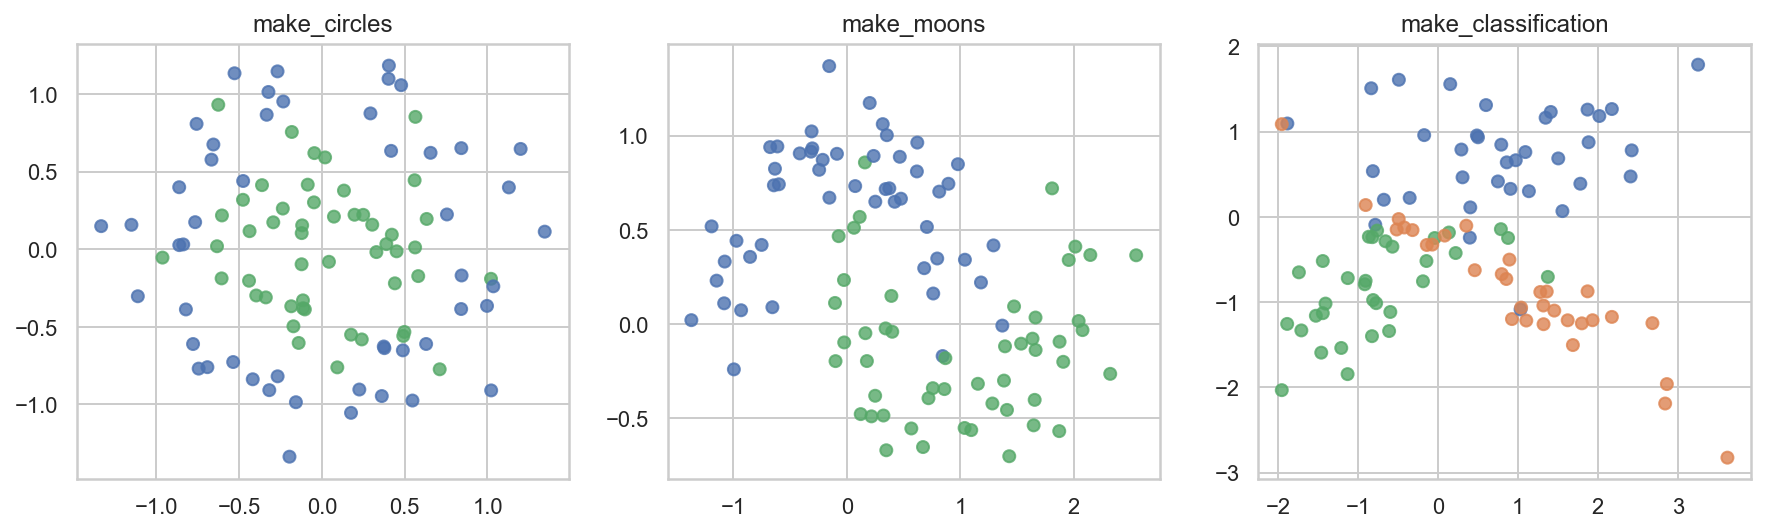

In [8]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.title(["make_circles", "make_moons", "make_classification"][i])
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [9]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

On the dataset 1 train accuracy 1.0, test accuracy 0.8
On the dataset 2 train accuracy 1.0, test accuracy 0.92
On the dataset 3 train accuracy 1.0, test accuracy 0.88


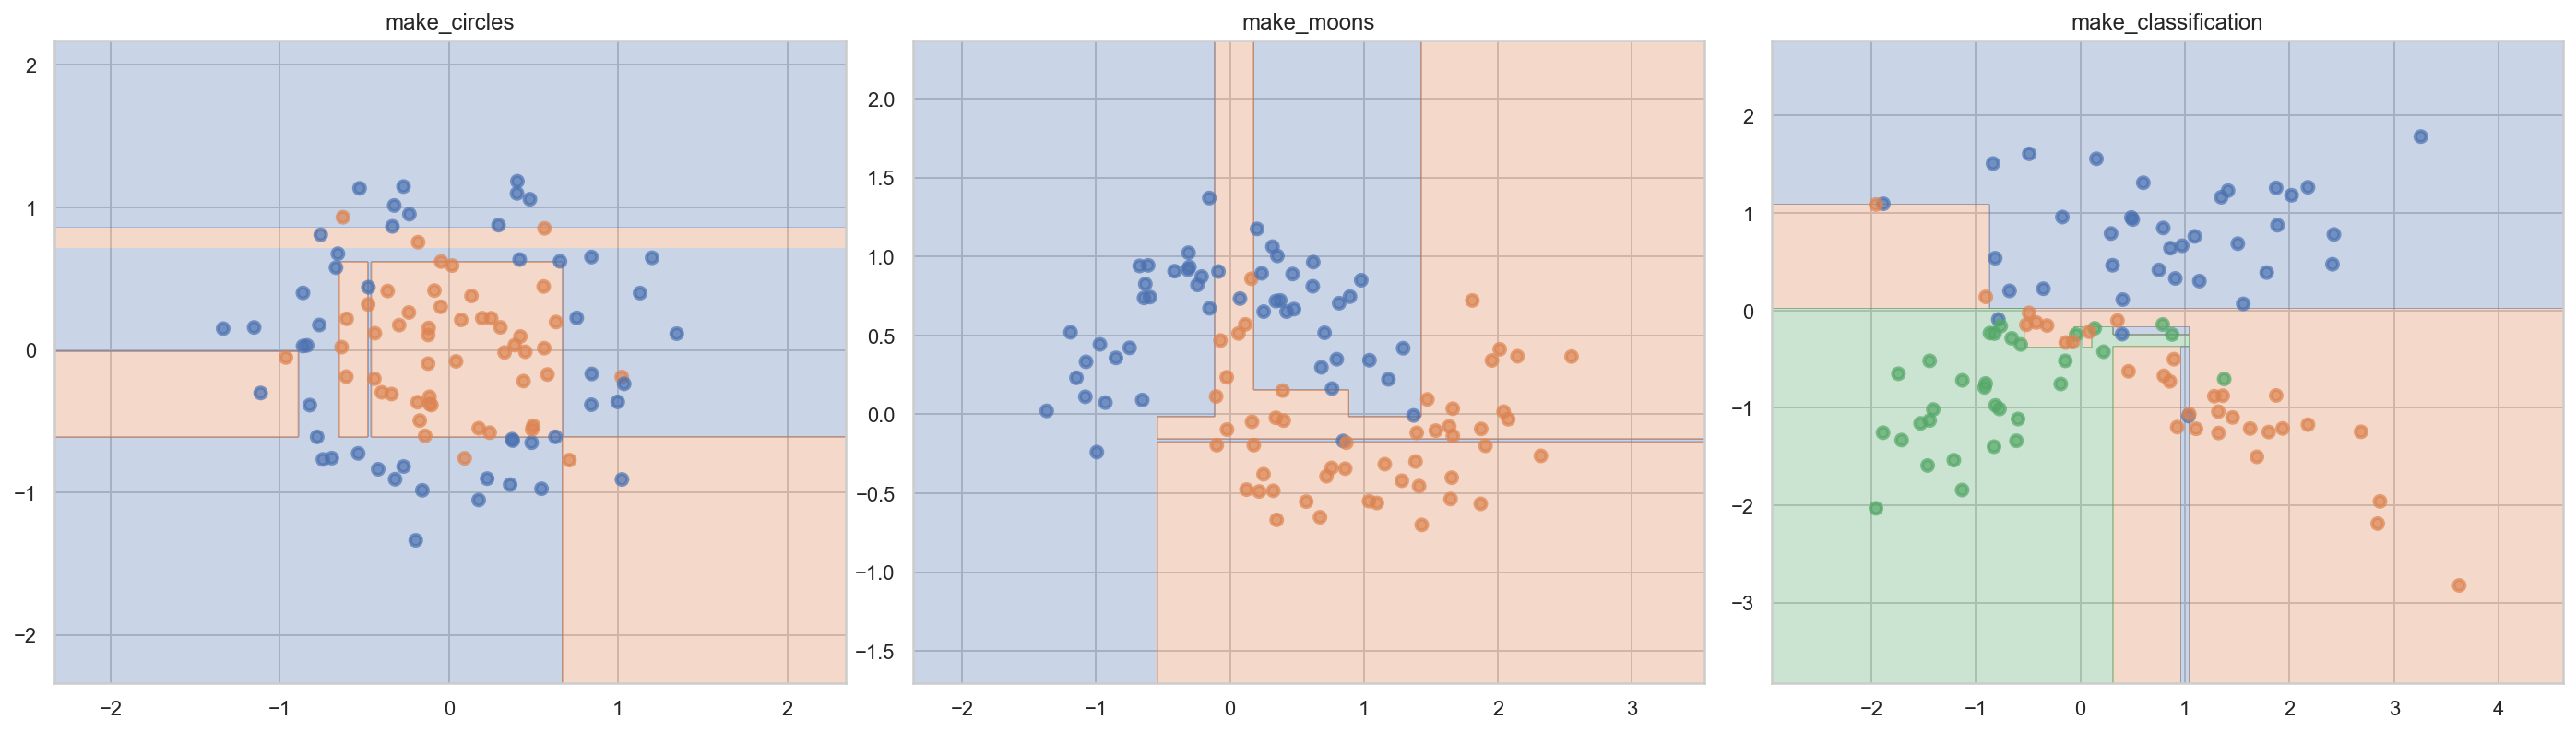

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

titles = ['make_circles', 'make_moons', 'make_classification']
acc_sc = []
plt.figure(figsize=(20, 6))
for i in range(3): 
    plt.subplot2grid((1, 3), (0, i))
    X_train, X_test, y_train, y_test = train_test_split(datasets[i][0], datasets[i][1])
    regr = DecisionTreeClassifier(random_state=241).fit(X_train, y_train)
    #cross_val_score(regr, X, y, cv=cv, scoring='neg_mean_squared_error').mean()
    tr_acc = accuracy_score(y_train, regr.predict(X_train))
    test_acc = accuracy_score(y_test, regr.predict(X_test))
    print("On the dataset {0} train accuracy {1}, test accuracy {2}".format(i + 1, tr_acc, test_acc))
    acc_sc.append(accuracy_score(y_train, regr.predict(X_train)))
    acc_sc.append(accuracy_score(y_test, regr.predict(X_test)))
    plot_surface(regr, datasets[i][0], datasets[i][1])
    plt.title(titles[i])
    #plot_surface(regr, X_train, y_train)

__Ответ:__ Дерево make circles переобучилось больше остальных. Как мы видим, на первом графике круг превратился в несколько квадратов, и значение accuracy не очень высокое, 0.8. Дерево make moons довольно неплохо разделило плоскость с accuracy 0.92, make classification похуже.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

 Make circles: train accuracy 0.7125, test accuracy 0.6,  max_depth=2, min_samples_leaf=25
 Make circles: train accuracy 0.7875, test accuracy 0.75,  max_depth=2, min_samples_leaf=5
 Make circles: train accuracy 0.7875, test accuracy 0.75,  max_depth=2, min_samples_leaf=1
 Make circles: train accuracy 0.7125, test accuracy 0.6,  max_depth=4, min_samples_leaf=25
 Make circles: train accuracy 0.925, test accuracy 0.9,  max_depth=4, min_samples_leaf=5
 Make circles: train accuracy 0.95, test accuracy 0.9,  max_depth=4, min_samples_leaf=1
 Make circles: train accuracy 0.7125, test accuracy 0.6,  max_depth=None, min_samples_leaf=25
 Make circles: train accuracy 0.925, test accuracy 0.9,  max_depth=None, min_samples_leaf=5
 Make circles: train accuracy 1.0, test accuracy 0.9,  max_depth=None, min_samples_leaf=1


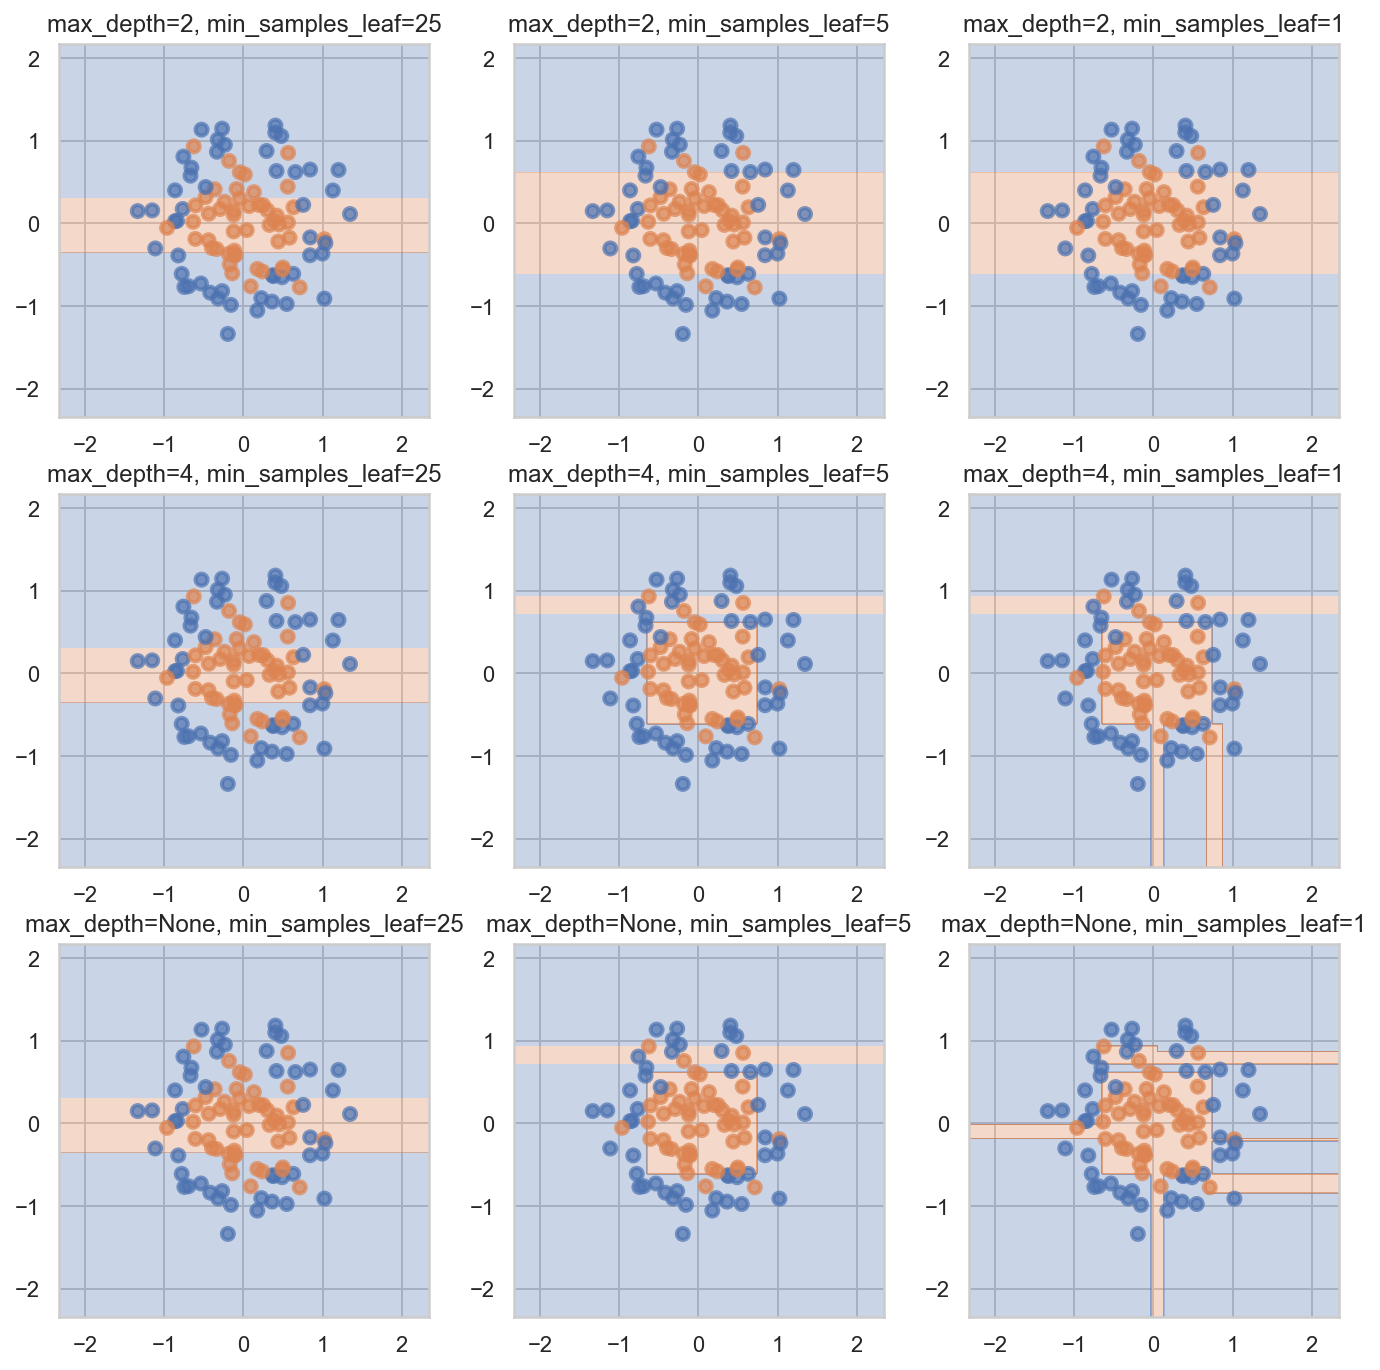

In [11]:
plt.figure(figsize=(10, 10))
for i, max_depth in enumerate([2, 4, None]):
    for j, min_samples_leaf in enumerate([25, 5, 1]):
        plt.subplot2grid((3, 3), (i, j))
        X_train, X_test, y_train, y_test = train_test_split(datasets[0][0], datasets[0][1], test_size=0.2, shuffle=False) 
        regr = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf).fit(X_train, y_train)
        tr_acc = accuracy_score(y_train, regr.predict(X_train))
        test_acc = accuracy_score(y_test, regr.predict(X_test))
        descr = 'max_depth=' + str(max_depth) + ', min_samples_leaf=' + str(min_samples_leaf)
        print(" Make circles: train accuracy {1}, test accuracy {2}, ".format(i + 1, tr_acc, test_acc), descr)
        plot_surface(regr, datasets[0][0], datasets[0][1])
        plt.title(descr)

 Make moons: rain accuracy 0.85, test accuracy 0.75,  max_depth=2, min_samples_leaf=25
 Make moons: rain accuracy 0.9125, test accuracy 0.8,  max_depth=2, min_samples_leaf=5
 Make moons: rain accuracy 0.925, test accuracy 0.8,  max_depth=2, min_samples_leaf=1
 Make moons: rain accuracy 0.85, test accuracy 0.75,  max_depth=4, min_samples_leaf=25
 Make moons: rain accuracy 0.95, test accuracy 0.85,  max_depth=4, min_samples_leaf=5
 Make moons: rain accuracy 0.975, test accuracy 0.85,  max_depth=4, min_samples_leaf=1
 Make moons: rain accuracy 0.85, test accuracy 0.75,  max_depth=None, min_samples_leaf=25
 Make moons: rain accuracy 0.95, test accuracy 0.85,  max_depth=None, min_samples_leaf=5
 Make moons: rain accuracy 1.0, test accuracy 0.9,  max_depth=None, min_samples_leaf=1


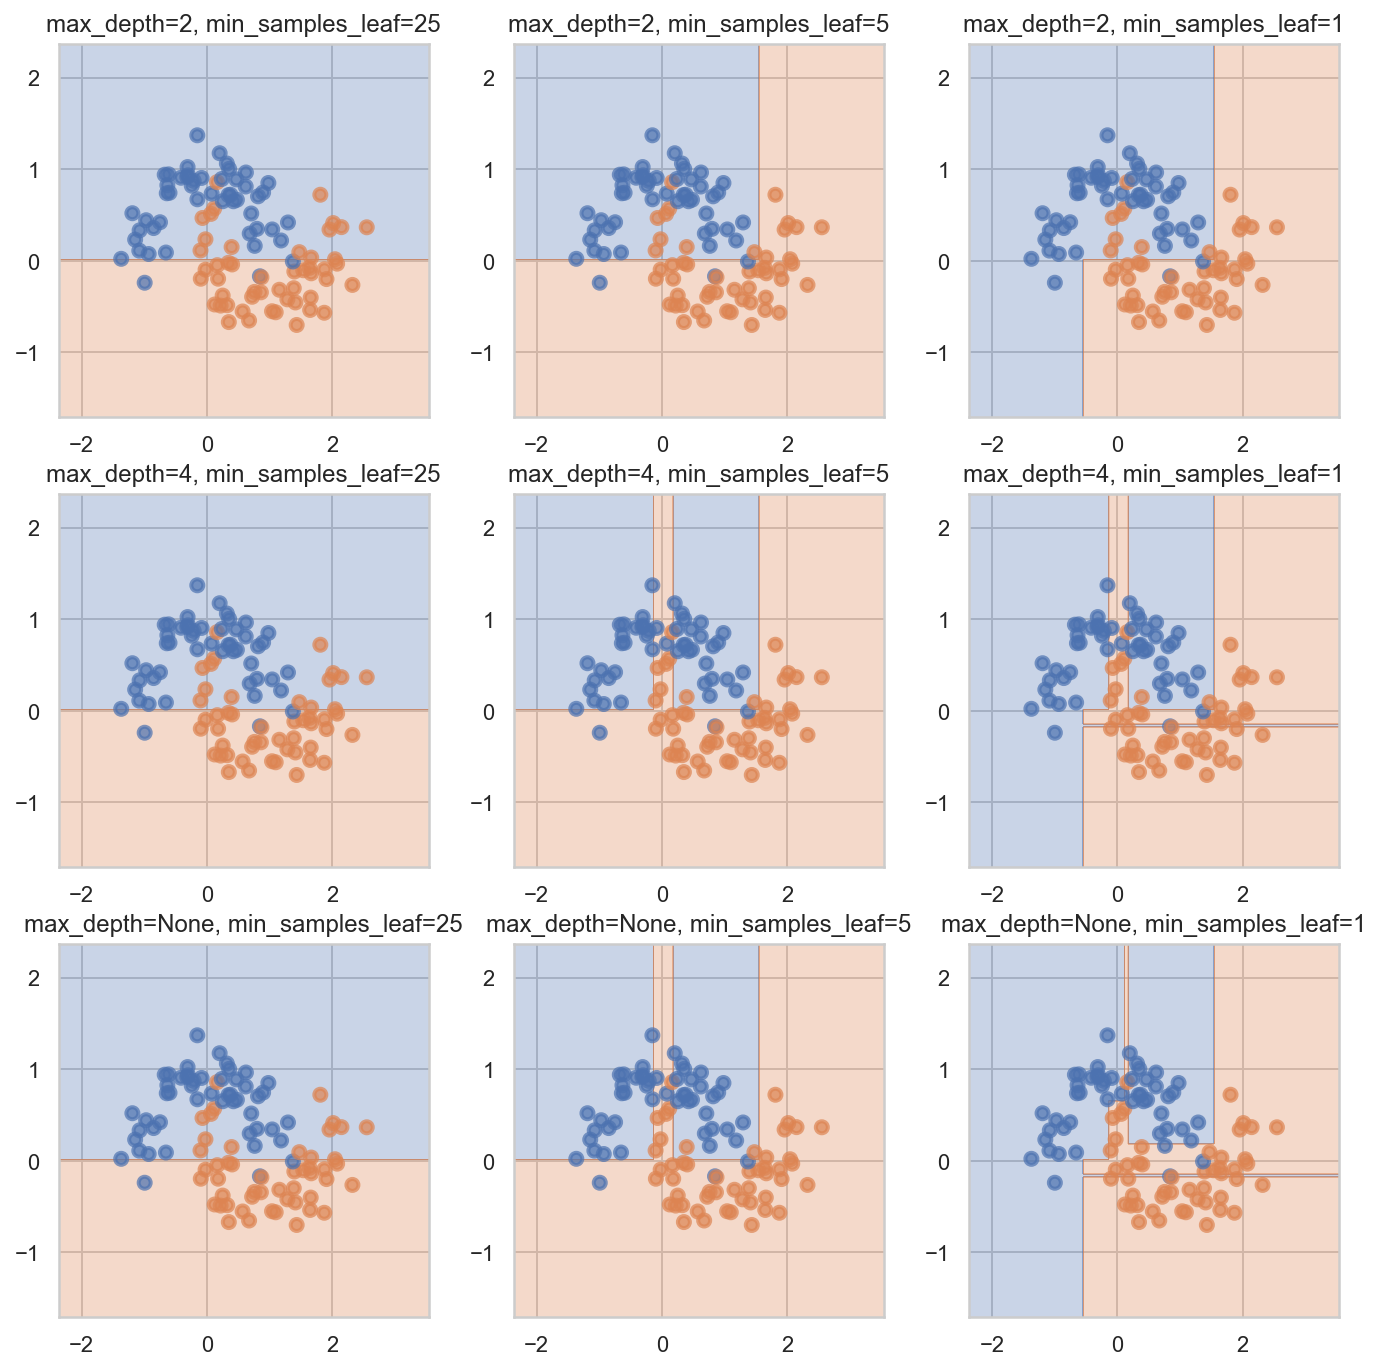

In [12]:
plt.figure(figsize=(10, 10))
for i, max_depth in enumerate([2, 4, None]):
    for j, min_samples_leaf in enumerate([25, 5, 1]):
        plt.subplot2grid((3, 3), (i, j))
        X_train, X_test, y_train, y_test = train_test_split(datasets[1][0], datasets[1][1], test_size=0.2, shuffle=False) 
        regr = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf).fit(X_train, y_train)
        tr_acc = accuracy_score(y_train, regr.predict(X_train))
        test_acc = accuracy_score(y_test, regr.predict(X_test))
        descr = 'max_depth=' + str(max_depth) + ', min_samples_leaf=' + str(min_samples_leaf)
        print(" Make moons: rain accuracy {1}, test accuracy {2}, ".format(i + 1, tr_acc, test_acc), descr)
        plot_surface(regr, datasets[1][0], datasets[1][1])
        plt.title(descr)

 Make classification: rain accuracy 0.8625, test accuracy 0.8,  max_depth=2, min_samples_leaf=25
 Make classification: rain accuracy 0.875, test accuracy 0.8,  max_depth=2, min_samples_leaf=5
 Make classification: rain accuracy 0.875, test accuracy 0.8,  max_depth=2, min_samples_leaf=1
 Make classification: rain accuracy 0.8625, test accuracy 0.8,  max_depth=4, min_samples_leaf=25
 Make classification: rain accuracy 0.9, test accuracy 0.7,  max_depth=4, min_samples_leaf=5
 Make classification: rain accuracy 0.9375, test accuracy 0.75,  max_depth=4, min_samples_leaf=1
 Make classification: rain accuracy 0.8625, test accuracy 0.8,  max_depth=None, min_samples_leaf=25
 Make classification: rain accuracy 0.9, test accuracy 0.75,  max_depth=None, min_samples_leaf=5
 Make classification: rain accuracy 1.0, test accuracy 0.7,  max_depth=None, min_samples_leaf=1


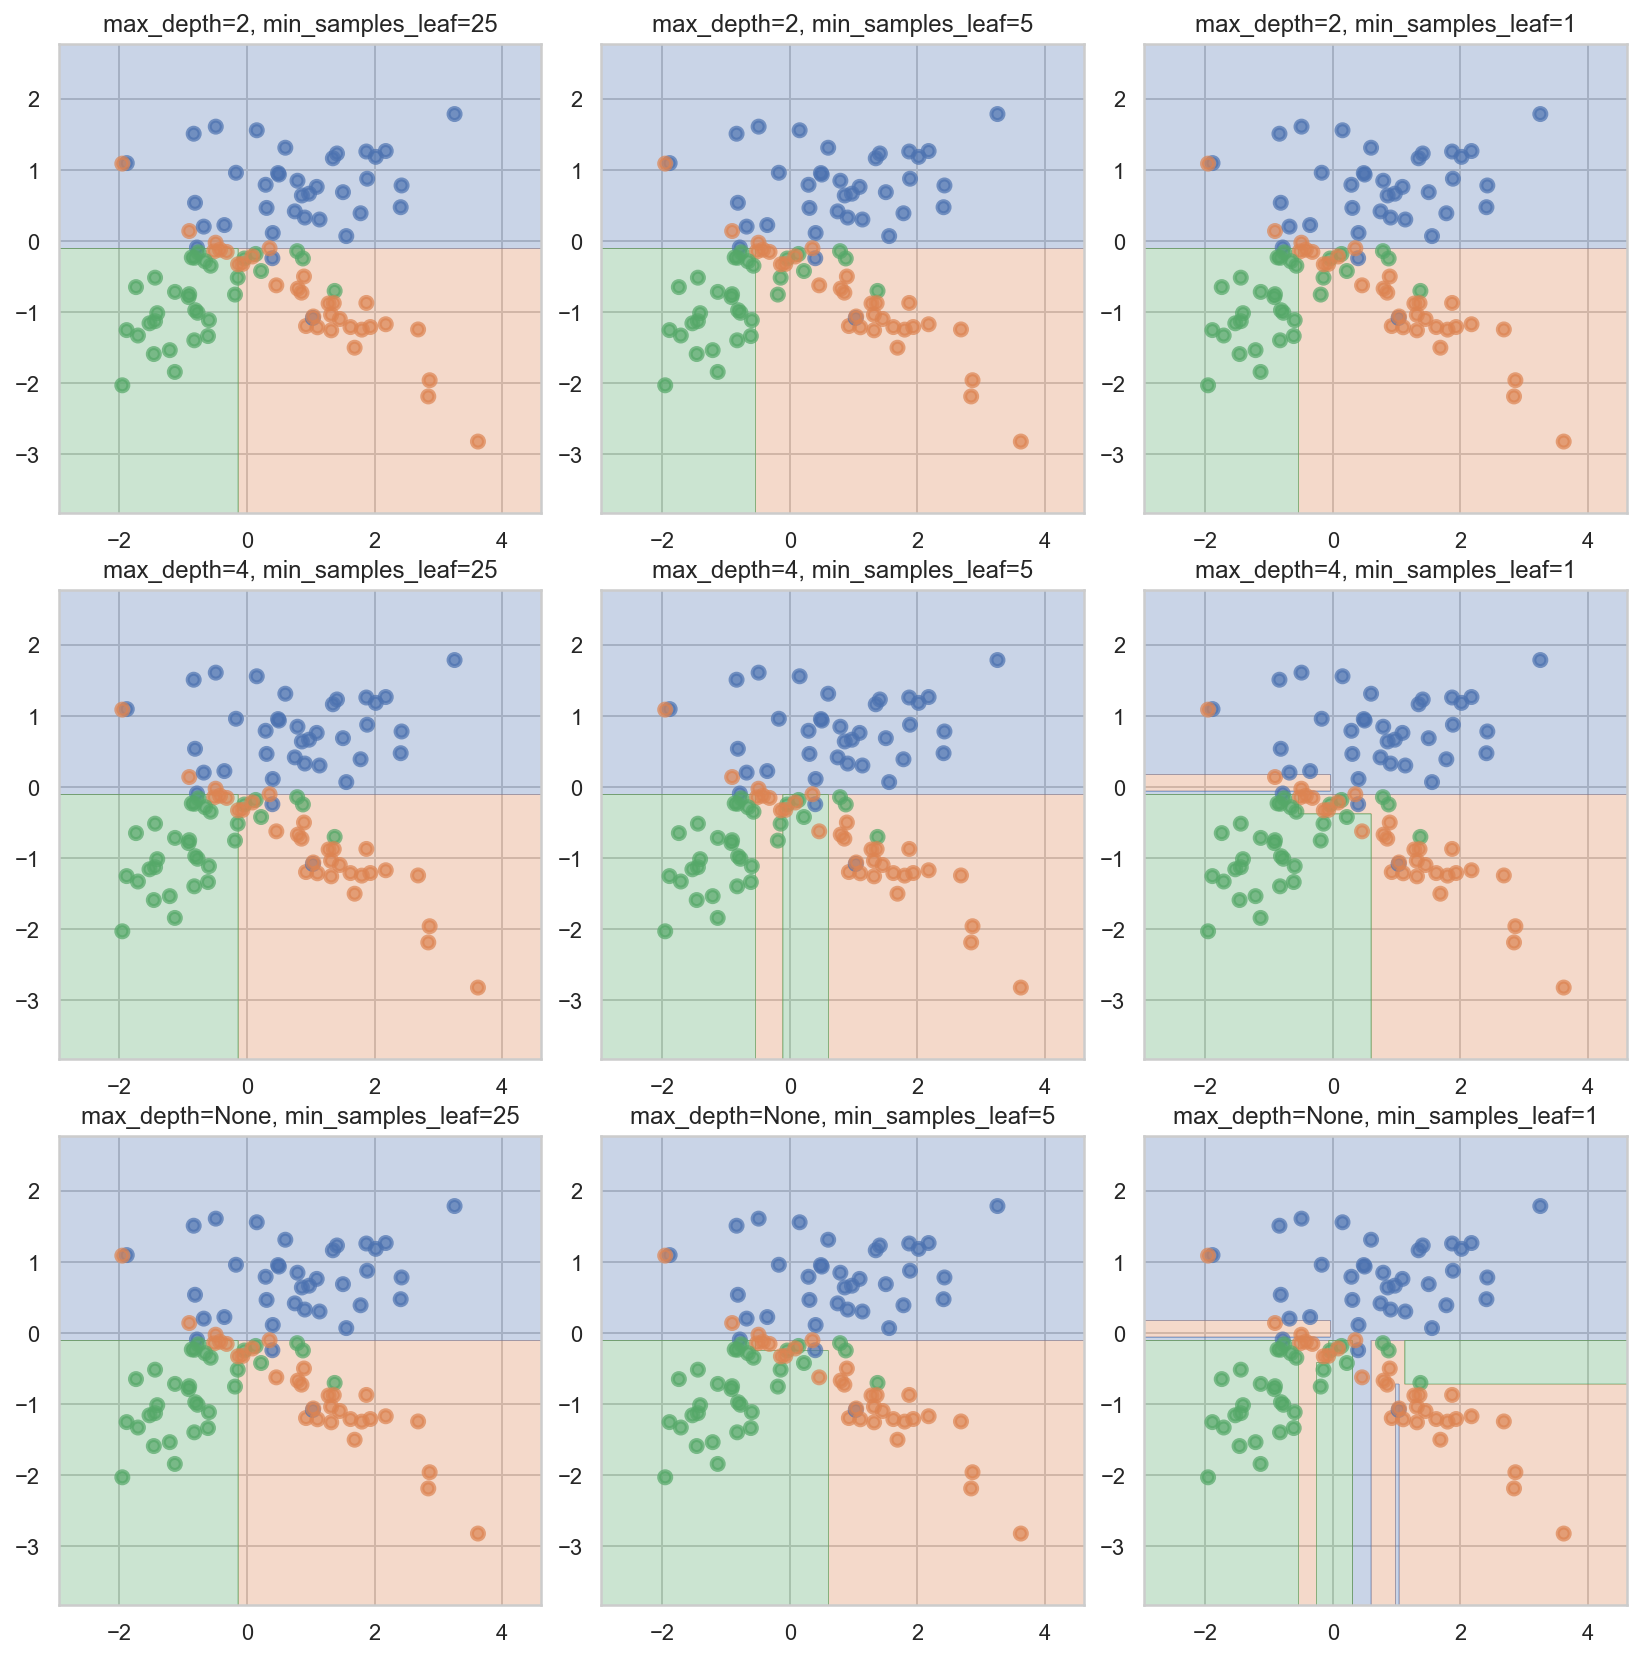

In [13]:
plt.figure(figsize=(12, 12))
for i, max_depth in enumerate([2, 4, None]):
    for j, min_samples_leaf in enumerate([25, 5, 1]):
        plt.subplot2grid((3, 3), (i, j))
        X_train, X_test, y_train, y_test = train_test_split(datasets[2][0], datasets[2][1], test_size=0.2, shuffle=False) 
        regr = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf).fit(X_train, y_train)
        tr_acc = accuracy_score(y_train, regr.predict(X_train))
        test_acc = accuracy_score(y_test, regr.predict(X_test))
        descr = 'max_depth=' + str(max_depth) + ', min_samples_leaf=' + str(min_samples_leaf)
        #print(descr)
        print(" Make cladata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABmkAAAZ6CAYAAAA3pYJ2AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAWJQAAFiUBSVIk8AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOzdeZhkWV3m8e+9see+1V7VVdVV1ae36r2RrRcRBVEEBBURpRVkGW23cXCBUWQUGXVEBAVnHGF0QGYAQQRxQJQGZW+6m15PV3V17XvlGhl73Dt/nBuRkVmRlVmVmRFZGe/neeqJylhPxI0b8cY95/yOF4YhIiIiIiIiIiIiIiIi0lp+uxsgIiIiIiIiIiIiIiLSidRJIyIiIiIiIiIiIiIi0gbqpBEREREREREREREREWkDddKIiIiIiIiIiIiIiIi0gTppRERERERERERERERE2kCdNCIiIiIiIiIiIiIiIm2gThoREREREREREREREZE2UCeNiIiIiIiIiIiIiIhIG6iTRkREREREREREREREpA3USSMiIiIiIiIiIiIiItIG6qQRERERERERERERERFpA3XSiIiIiIiIiIiIiIiItIE6aURERERERERERERERNog3u4GiCyWMeZjwMuB37HWvq2N7dgFHLbWlhvO+yJwF3Cvtfa9LWrHVuDNwPcD24Ay8Bjwv4H3N7ZvtTDGvA34beDj1tpXtLk5a5ox5oPAa4D/Zq391TY3Z0Gr5b1hjPl54F5gOzAFvMta+44l3ufVuH31ecAmIA88BPyltfZv5rnNPwA/eIG7PWat3bqUdonIpVMmOa8dyiQyL2WSS27HsmYSY8wwcHaBq/2etfatl/oYIrJylD3Oa4eyh8xL2eOS27Hsx0Pm3L8PfBXYZa0dWa77XSvUSSOySMaYBPBbwH8CRnAhoF1tuR34f8Bg1I4ngT7gGdG/lxljXmStLbSrjSKXG2PMTwLvif48AEwAh5Z4ny8G/i+QBgrAE8AG4E7gTmPMC4FXW2vDOTfdG51+Dag2uevTS2mXiFzelElE1raVyCTMZItzuDzSzFIfQ0TWKGUPkbVthbLHXL+L20fPLfP9rgnqpBFZvC1A20eWGWPSwMdwgeRTwM9Ya89Fl90BfAT4buAdwK+0q53zeC+ufZPtbohIEz8anX7IWvvqpd6ZMWYD8CFcB83/AH7JWpuLLnsp8NfAq4CvA3/acLs+ZkauPLtJB46IiDLJ0imTyGq2rJkkckN0+rfW2nuX6T5FpHMoeyydsoesZiuRPQAwxni4Tt7fWM77XWu0Jo3I5eflwBXAMeBVtUACYK39MvD66M83RgFm1bDWnrXWPmGtPd7utog0sS46/fIy3d/rgF7g28Abax00ANbaTzITUH55zu1qI10fUweNiKxyyiQiK2O5MwnM5ItHl/E+RURaTdlDZGWsRPbAGLMR+ATwtuW837VInTQil5+7o9PPWmunm1z+OdyU3wxwTasaJbIG1GaXFpfp/u6OTv/OWhs0ufzT0ekOY8xgw/k6iCIil4u7o1NlEpHltdyZBJQvRGRtuDs6VfYQWV7Lnj2MMd+HK0f4EuAkmklzQSp3tsoZY+4BPgC8G/h94O3Ai3FTO58G3metfU80dez1wH8ArgKyuBqd/8lae6LJ/T4XeCPwHNz6CAAngC8Af2Ct3d9w3Q8DP47boa6x1o43XJYC7geuAz5srf2JZXjOLwN+CbgRCIF/YYEd2RjTi5vK+gpgF1ABHsG9dn9lra3Ouf4XcQvbPQtXT/WtuB8uk8BXgHdYa+9vuP4HcYuO1UwZYwB2WmsPzrnvO6L2PgtIABZX6ugvGkfFN7nPC7nPWnt39P/3AvcBT81z3RQQi/6/pH28oY0vA47ipic+F/e8HgLebq39nDGmO7rsx3ALo5/ALdj3O3MWFHwbcxZDM8bswL2XHwVuwm3Hn8JtxxyuF/93rbXfWspzaWjDlcxsn524AGdxU6b/rHG2Q8NtfhD4aVztzHW499cR4LO4/eXknOuHuPqdg7j97I3AHtz765+AN1trTxtjbgZ+B7gDVxLrQdxr+tk593cQV/5qE/BC3Gu0BzgD/CtukdcnL+I1uKj9JbrNy3CfMdcCG4FRXJmuP7fWfm6xj30pos+ZNwE/AVyNG2BggQ8D721WazgaNfUzuJFWe4EB3PvJ4taIea+1thhd94PM3hc/YIz5ANF+1/B5sRj/y1p7T/T//4zbD+Z773Y3/L9xX62VI9FBFFlVlEmUSSLKJMokyiSXWSaJPpevi85XvpDLhrKHskdE2UPZQ9njMssekWuBHuBvcBVE9ja7kTjqpLl8bAcewH0gPob7sr4G+NPoC8EA9+C+DCzujf8TwC3GmBvnfDG8Ffgv0Z8ncF8GI7gP6J8FfswY8wxrrY2u8/O4mp4bgXfiPmBr3oELJEeAn1vqkzTG/AFuITpwX1QTuB7X72GeBauiL7XPA7txH65P4j60nhX9+2FjzEtrH0Bz/CTuw66Ae123Az8MvNgY8xPW2o9G13sSd6D1tujvrwJBdLtGr8IFyAJuO2wBbgHeh/tw+oWG6z4J/Pu8L8ZsD9f+Y619CBcI5vNi3POvAPsWef8L+QHch3Yxus8rcYH2H6OF0d8JXA/sx70XdgFvwb1nXrfIx4jjZha8ADgFPI57zV4CvNAYc7e19mtLeRLGmGtwr/kgMIZbNLUbuB0XOH7YGHPnnP3lL4HXRn8exm2Ljbgvx6uBH432sbkLn3m4YPYq3GvyFG6ffQ1wqzHm13BTPmvv2R3AM4FPG2O+21r7pSZP4a24/WwCFyKuwgW4lxpjfjCa3r3Qa7CDi9xfora+M/rzaeA7uCnmLwFeYoy511r73oUe+1IYY4Zw4e8ZuH3uAC5c3ADcDLzSGPOCxtffGNOP+4F1K1Bl5n25g5nFJJ8PfH90k9q+eCMuQOwDTjOz3z3M4r8v6+Ewer9e6D37kuj0DHC24fxacDlkjHkT7vNvEPfD4O+stX+/yLaIrBRlEmUSQJlkKU9CmUSZhBZmEtx+0oM7yLzeGPNm3MFAcPvwX1prl2sfFVkJyh7KHoCyx1KehLKHsgetzR4A3wBusdY+GLVtkXfTmVTu7PLxUmAcuNpaeyOwFfjL6LLfw43seKW1drO19iZc734Z9yFY2/EwxtyA66mu4up3brbW3m6t3YnbwY8CfcAv1m5jrR0F3hD9+XpjzLOi+7oTN8IjAH6qcUTJpTDGvAAXSIrAj1hrr7TW3oz74D3MzOjyxtvEgL/DfcB+Cthqrb3OWnsNLiw9jutp/6/zPOx/wE2H3WatvQ3YDLwLNzLir4wxm6LX4B3AjzTc7vustc+dO2IA96H+t8AWa+0tuJ7+P4ou+/na/dXuM7qPxfxb1OKeUUCtBc7PLHWbNHgd8PcNz+sKXEiO4YJEH3CbtdZYa3cDvxrd7p7oS2VRzce9b19prd0YPc5OXFhM4WYlLNXbcYHk3cAGa+2t1tqrcV9eZ3Gh4JX1BrnA9VpgGnietXZ7tL9sw02zzuKC52s5Xx9u4bWfstZeYa3dCzwP94PieuAfgI8C66P3+TZc2PVx+1UzP4dbbH6ztfb26LE/Ej3Wh40xXRd68peyv0Tb7+24oH1XtF/ejttX3hJd7fcXeuwl+CAuRHwFuMpauyf6DNyJG1V0K/A/59zmt6LzHwd2WWuvttbeCqxn5rV9oTHmGTCzL+J+SIAbOVbf76y1917EvvqOxTwp4+qyvjn688N29toz1zc89z/HjX55Hi6AftIY84/GmJ7FPI7IClEmUSZZkDLJgpRJlElamUlqA0D6cQe2fg13IPAFuDzyqDHmDYisXsoeyh4LUvZYkLKHskdLj4dYa79iow4aWZg6aS4vP2utfQrAugN6fxCd7wN/Yq39P7UrWmu/CtR6nm9quI/vxYWVj1pr/7bxzq0bkfAX0Z/XzrnsU7jpaR7wF1HP7Aeix/5ja+0Xl/zs3I8FgHdaaz/W8NgHcAcpz5tyiBvlcTOut/bHrLWnGm73GO5LIQDeZIxZ3+T2R4CX26jX2Vpbttb+Cm76bA+wqDDQ4EngnloYsG4dirfgAqWH+9JbEdEXzodwozYKwG8u492PAT9jrZ0EiE7fF13mA2+y1j7QcP1348JljJkDzovxX+a8j0/gprWDC3xLVfuB+kHbMDokavtvAx9n9mig5+P2l/dYa/+18Y6stfcBtbbO2l8afNBa+zcNt/kSLngAHMe9V6ajy7K4A/Iwe59t9C3gp200BTm6zWtwIx22Aq+e53Y1l7K/XAUk3VVmRrNYa6vRF/AncFOjhxd47ItmjLkNNxLqHPDS2udf9PhHcNOTp3CjV25suOnduPD3y9baQw23qVpr383M1Pj5ttuKin48fBI35fgsM+9xjDFXROeDa+cLcJ9Fw7gp5qO4H5ofaGGTRZpRJjmfMklEmWRRlEmUSVqZSWoHdzO4skNX4w76XYX7rE0A7zOupI3IaqXscT5lj4iyx6Ioeyh7tP14iMxPnTSXjwlcz2mjxumuzWog1j5wemtnWGv/Gy6c3zPP49TqTzbrBf4F3AfpXlztxStx0/ze0uS6FyUaFf7c6M//Pfdy66bfN5vu+EPR6SdskzqM1tpHcFPzkrhe+7n+yjZfbK42Kudif6h82lpbmdOGEjMfgsv+wQ1gjInjXrda+aSfj75klsu/WWun5pxXe/9VcHVy66LXoDbdspfF+8cm59V68/su4n7mU9sO7zPG3BW9bu5BrP1za+0r7MyUbqy1v4jbX357nvurvXfmGzXx2Sbn1V63f537XqHJPjvHn9k5C9BH76+/jv5c6P16KfvLQdwPghuNMe80roZt421+2Fr701FIWG619/M/W2vPNGnvaWbee9/fcP6tuO123ueiMSaJC9kw/3ZbMdFn3aeB78K9rq9uDIe4UPhHwF8Bz7XWfs5aO22tHbXWfhD3PAPgFcaYFfuRI7IAZRJlknkpkyyaMomjTOKsdCb5Nu7g873W2jdZp2St3WetfSNujQePmRHvIquNsoeyx7yUPRZN2cNR9nBafjxELkxr0lw+TtjZ5XCw1pYa6vmdt8PierzBBe7G24XGmNAY8zzclL4rcYtu3YybsgdNOvCstePGmJ8FPoObilkAfiL6UFyq7bgRXI1f4HN9B1cLtlGt5/dHjFv8r5mt0Wmz4ofzLb72SHS6e57L53N8nvOz0Wm6doYx5jeBFy3yfh+w80zxjUbl/x9cnVSAt1hr5053XKpjTc6rbffJed4DTd9/l/A4+eg01uSyi/V23JftM4EvAhPGmH/BhYdPzTlYDrjRBsaYdLS/XIubVnoVrrbuSHS1+Tq8L/S6LXqfbbDU9+tF7y/W2pPGmD/FLfL2a8CvGWP24Rbi/AzwhcZROMus1t47jDH/Ns91dja2t8ZaWzTGbIyep4mudw1uVE4tjCxqoIIx5j24z8fF+Ec7T8kzY8w6XAdNrZ7sT1tr/9+cdh9lpg71eay13zDG/DPwfbhRNUuqSyxyiZRJlEmUSZZOmcRRJnFWNJNYaz+NyyDzeQdu3Q1jjNljtT6NrD7KHsoeyh5Lp+zhKHs4LT0eIgtTJ83lo9nohkbhApfXGWNej6tRuKXh7DKupuZ3cDUY5/PvuF7XQdyU1aOLfdwF9Eenubnhq0GzeqK10QRXRv8W8xiNxpqcB27KIEDGGJO4iA/dZovxzecq3GJzizF3hAEAxpgR3GiL26Oz3myt/cOLaMNiXej9t+j33iIsR8Cdl7X268aYW3CjnX4I9554WfTvfcaYjwA/Z62dADDG+MBvAL8CNNaSLeAWQPOZGfHUzHK/bgu9X5u9xxtd0v5irf0VY8z9uBqwz8T9iNmD+zF/1hjzm9ba/7HA/V2KWns3M/ODacH2GmMGgT/GLRaaaLjOKG40Sa2G62LtZfH76v5mZ0Yjbj6Hm35fwdXm/dtm112EB3GdNNsv8fYiS6VMokxyHmWSi6NMokxCmzJJM9baE8aY07h69dtZvsW2RZaLsoeyx3mUPS6OsoeyB6soe8j51EnTYaKRH7U6q3+D+0J7BNgX9bS+nguHknfjAkkAbAT+hPmnCl+M+nQ7Y4w3TzDJNDmv9qH/Cmvtxy/hceeb3lf7MJxcqV5xa+09LOG1M8ZsAz6P6xWvAm9YgREja4619nHg1dE0z2cB34MbdXML7kusGxdSwC06+Ju4UPhe3GiTR4CnrLUVY8w7uHAoWW4LvV/PLnD7S95frLUfAj4U1WZ9Hq6e84uBdcB/N8acttb+/cXc5yLU2vurUWmCBRljPNwihM/Bjc55Dy5APlabgmyM+QoXEUqstXdfRJubtekG3EibjbgSCj9irW02lb12fQ9IWmvn+5FTG1m0oiFeZKUpk5xHmaTDKJMAyiQtyyTGmAQQWGubrWsByhfSAZQ9zqPs0WGUPQBlj5YeD5HFUydN56mV0XmbtfZ3mly+tcl5ABi3kORrcNMtX4pb+Po1xpiPW2v/YYntOoQbdZHCTel7tMl1rmly3j5cL3Czy2rtfhauZ/0pa21+zsXX4r7Y56oturWcdUyXTVQ26Z9xo0+KwCuttZ9sb6tWt2gUyA5gm7X2vmhK8n3Rv98yxvwM8D+BlxpXE7gI/GJ089dZa/9Xk7udd39ZIdfSfGTjYt+vF72/GGO6cME3b619Iqp7+hHgI8aYFK50xvNxi/QtdyipPdcLtfdm3Cicp6yrE/wsXCCpAM+21jYbydGy7WaM2YP7jFmP+/H1A9YtZDrf9d8J/EdcbdkXzHO12kKKjy9jU0XaQZlkNmWSDqFMAiiT1LRkuxljjkSP9SrgvJm8xpjNuANNAE+0ok0ibaLsMZuyR4dQ9gCUPWpavd1kkRZVf07WlB3R6QNzLzDGZIAfj/6Mz7lsEPjv0Z9vs9Z+DlfPEuAvjDGNUx8vmrU2x0w4eF2Ttm3G9VTP9Zno9DXGmPTcC6MSQ1/CLf717Ca3/8mop7nxNh7w2ujPTzRc1LhA2cXUFV1W0ZfrR3GBJI876KtAsrCNuKmX/xK9n+b654b/x3A/VLujv5vtL+uZWZiuVR3er2nSjhTwk9Gfn5h7+RyXsr/8Am6x2T+Ze/1opseXoz+Xo0buXLX2vjyayj6LMaYf+AJu+/xodPaO6HSqWSAxxnwvsC36c0W3WxTo/gHXQXMWuPtCHTSRB6N23WWMOa+cmTHmRtxopwC4lNFyIqvJjuhUmcRRJukcyiTKJC3NJMwc8P2peS7/j9HpfdEBKJG1akd0quzhKHt0DmUPZY9WZw+5SOqk6TxPRqf3GmNqUwIxxuzCHUysLbQ19wPrvcAm3AHEP47O+yPch9cm3BS6pXo77ov/F4wxb6iFhegL5ONN2gRuJNi+qN0fN8ZsbHhOe3A92XHgQWvtF5rc/lbgz2sf0NEH/J/ipmyeAN7fcN1sw//buRbEa4G7ov+/YZ7ndR5jTL8x5mpjzNUr17TVy1p7HDc918dNU60Hk2ikSG1xs69ENVhPM1P391ej90bt+jfhylcNRmc1e2+uhJcZY95qjIlF7egDPoSrp/oQCx+0v5T95f/ipo+/wBjzZmNMvOE21wNviP787FKf3FzW2i/iQtIA8BljTH0hwGj7fRK3DU4AH44uqn3GDRpj3tRwfd8Y8zJmjx5d6e32FtyomwBX4uw7i7jNJ3CLhaaAjxlj6tOQjTG3A5/CvYffZ609sPxNFmkpZZLZlEk6hDIJoEzS6kzyR9HpC40xv29cmRuMMTFjzK/iFkSu4hZFFlnLlD1mU/boEMoegLJHq7OHXCT1mnWe3wI+hpuOd8wY8yTQi/uQ8nAldp4HbDRRLdRoR34V7oPpZ621FYCoBuXrcYvnvcoY8zFr7UI91/Oy1n7TGPOLuFDwfuCtxphTuEWqAtzIku+dc5uiMealuC+IFwFHjDGPAkncyIoYbjG/l8zzsI8CbwReaYypfVgP4soS/Zi1drLhsUaNMUdxUwO/ZIx5CrjHWttsKvJKqo10KwNvMMa84QLXvddaWxv18DLgA9H/2zbypc1eC3wTuBs4aIzZj6u7vQvowS2k9nqov7/fjgvhPwn8oDHmAG7BvNqB838FvpuFF3FbLo/i6sLea4w5hJvu2w0cAX78AjXGgUvbX6y1B4wxv4zbL/8r8OvR69DHzOfGZ5h5by23H8ctbvcM4EljzGO4z6Kro3ZPAi+qTd231n7LGPP30XP4c2PMbwIncT8k1uHWhPk68F2s4HaLQuzPRX/mgN81xlzoJq+w1p6MttHLcZ93t+Ge85O4bVO7g0/jFm8Uudwpk8ymTNJZlEmUSVqSSaK2/LMx5i3A7wG/Drwpes9tB0ZwZVFea639+kq2Q2QVUPaYTdmjsyh7KHu0LHvIxdNMmg5jrf074A7ch9IUcAPQj/vCf7m19nuA49F5dxo3pa42euLd1tpvzbm/rzVc/n7TZAreRbbvvbhQ9E+4hfGuwvUc34GbYtjsNo/h6kr+Lq6G8lW4L5n9uNEtt1hrD8/zkO/HBa6DuPAzhVtI8BZr7ZebXP8VuC+1TPQYuy72OS5F9PrWDtQmcLUmL/Svv5XtW+2stU/jDny/H1f390rc++UY8C7gusaQaa19F24xuC/hfrzegJvh8Enc+/SHcOHwetMw42EF/QZwLy483YD7sv1D4DbrFgBc0KXsL9ba9+C+5D+Lex1uxP2g/zLws8AP1X6sLLdoxM8zgDcD9+PCxTW4z6m/AG601j4452Y/ghsR+iBuH9gLTOBKFNwE/HZ0vRcZN11+JexlZv/rYeF9tT6KxVr7EG77vgv32bQbNz3934Cfwb3eWtRXLnvKJOdRJukgyiTKJLQuk9Ta/w7ce+VTuPfKDbiDcx/Gbbe/XsnHF1kNlD3Oo+zRQZQ9lD1ocfaQi+OFYdjuNoi0nDHmi7gpsvdGQagjGGOeB3zaWtvV7rbI4hljDuK+jF9srf10e1sjIiLLSZlEmeRyokwiInL5U/ZQ9ricKHtIp1CPmUhnuQNY1AgDERERkRWkTCIiIiKtpOwhIquW1qQR6RDGmLtxNahf2eamiIiISAdTJhEREZFWUvYQkdVOnTSyrIwxHwU2XcJNX2GtPbnc7ZFZvgncaa39ZrsbshTGmPcAN1/CTRsXDZQVoG0jIquJMsmqpkyi770VpW0jIu2g7LGqKXvo+21FadvIUqmTRpbb7bhakRcrvfBVZCmstdO4YHK524tbBPBiadHAladtIyKriTLJKqVMou+9FtC2EZF2UPZYpZQ99P3WAto2siReGIbtboOIiIiIiIiIiIiIiEjH8dvdABERERERERERERERkU6kThoREREREREREREREZE2UCeNiIiIiIiIiIiIiIhIG6iTRkREREREREREREREpA3USSMiIiIiIiIiIiIiItIG8XY3oFXuv//+B4CdQBbY3+bmiIiIdJrdQA/w9K233npzuxuz0pQ7RERE2k7ZQ0RERFrpkrNHx3TS4MJKf/RvS5vbIiIi0ql2trsBLaLcISIisjooe4iIiEgrXXT26KROmizQH+KBl2h3W1ZcvpAHIJPOtLkl0g7a/p1N279zreptH5bxCMF9H3eCjsodsMrff7LitP07l7Z9Z1vV21/ZY81b1e8/WXHa/p1L276zrertv4Ts0UmdNPuBLXgJgtS6drdlxR054mY37959RZtbIu2g7d/ZtP0712re9n7xDIQl6JzyGx2VO2B1v/9k5Wn7dy5t+862mre/ssfat5rff7LytP07l7Z9Z1vN238p2cNf/uaIiIiIiIiIiIiIiIjIQtRJIyIiIiIiIiIiIiIi0gbqpBEREREREREREREREWkDddKIiIiIiIiIiIiIiIi0gTppRERERERERERERERE2kCdNCIiIiIiIiIiIiIiIm2gThoREREREREREREREZE2UCeNiIiIiIiIiIiIiIhIG6iTRkREREREREREREREpA3USSMiIiIiIiIiIiIiItIG6qQRERERERERERERERFpA3XSiIiIiIiIiIiIiIiItIE6aURERERERERERERERNpAnTQiIiIiIiIiIiIiIiJtoE4aERERERERERERERGRNlAnjYiIiIiIiIiIiIiISBuok0ZERERERERERERERKQN1EkjIiIiIiIiIiIiIiLSBuqkERERERERERERERERaQN10oiIiIiIiIiIiIiIiLSBOmlERERERERERERERETaQJ00IiIiIiIiIiIiIiIibaBOGhERERERERERERERkTZQJ42IiIiIiIiIiIiIiEgbqJNGRERERERERERERESkDdRJIyIiIiIiIiIiIiIi0gbqpBEREREREREREREREWkDddKIiIiIiIiIiIiIiIi0gTppRERERERERERERERE2kCdNCIiIiIiIiIiIiIiIm2gThoREREREREREREREZE2UCeNiIiIiIiIiIiIiIhIG6iTRkREREREREREREREpA3USSMiIiIiIiIiIiIiItIG6qQRERERERERERERERFpA3XSiIiIiIiIiIiIiIiItIE6aURERERERERERERERNpAnTQiIiIiIiIiIiIiIiJtoE4aERERERERERERERGRNlAnjYiIiIiIiIiIiIiISBuok0ZERERERERERERERKQN1EkjIiIiIiIiIiIiIiLSBuqkERERERERERERERERaQN10oiIiIiIiIiIiIiIiLRBvF0PbIyJAW8CXgNcA8SAA8BHgD+01hba1TYRERFZe5Q9REREpJWUPURERGQx2jKTJgoqfw+8B7ga+BrwRWAz8Hbgi8aYrna0TURERNYeZQ8RERFpJWUPERERWax2lTt7HfADwHeAq621z7fWfj+wB/gq8F3Af25T20RERGTtUfYQERGRVlL2EBERkUVpVyfNPdHpL1lrj9XOtNaexU0FBnhlqxslIiIia9Y90amyh4iIiLTCPdGpsoeIiIhcULs6ac4CTwDfaHLZk9Hp5tY1R0RERNY4ZQ8RERFpJWUPERERWZR4Ox7UWvviC1x8e3R6tBVtERERkbVP2UNERERaSdlDREREFqtdM2maMsZ4uAX0AD7ezraIiIjI2qfsIb+oFYIAACAASURBVCIiIq2k7CEiIiJztWUmzQW8A7gLOAX84Uo8QL6Q58iR/Stx16vS/v2d81zlfNr+nU3bv3Otxm2/bV2SrlSs3c1oZkWzR6flDlid7z9pHW3/zqVt39lW4/ZX9ugcq/H9J62j7d+5tO0722rc/kvJHqtmJo0x5u3ArwNF4EettWfa3CQRERFZw5Q9REREpJWUPURERKSZts+kMcbEgT8DXg8UgB+21n5ppR4vk86we/cVK3X3q0atN3H37t1tbom0g7Z/Z9P271yredv7xTMQltrdDKC12aNTcges7vefrDxt/86lbd/ZVvP2V/ZY+1bz+09WnrZ/59K272yrefsvJXu0tZPGGNMDfBR4ITAOvGQlO2hERESksyl7iIiISCspe4iIiMhC2tZJY4wZBD4P3AocAV5krX2kXe0RERGRtU3ZQ0RERFpJ2UNEREQWoy2dNMaYJPCPuKDyGPACa+3RdrRFRERE1j5lDxEREWklZQ8RERFZrHbNpHk78EzcSJK7tVieiIiIrDBlDxEREWklZQ8RERFZlJZ30hhjhoBfiP48A7zLGNP0utbaV7eqXSIiIrI2KXuIiIhIKyl7iIiIyMVox0yaZwCZ6P+3RP/mo7AiIiIrKgxDTo3meOrYBOcm8pQrAfGYz0Bvil1b+tk80oPve+1upiyNsoeIiKwaQRBy/GyWA8cmGJsqUqkGJOI+w/0Zdm3pZ8NQF56n7HGZU/YQEZFVo1oNOHxqiqePTzI5XaIaBCTjMdYPZdi9dYChvrSyR5u1vJPGWvtPgLa6iIi03dhUga8/cpLxbHHW+eVKQL5Y4cTZabrTCW6/dgMbh7vb1EpZKmUPERFZLU6N5vjGoyeZLpRnnV+uBOQKUxw5NUV/T4pnXreRwb50m1opS6XsISIiq8Xhk5Pc/8RpiuXqrPPLlYCnj5d5+vgkIwMZnnX9JroziTa1Utq1Jo2IiEhbnRnPc9+3j1KpBlSrAdOFCvlihSAI8X2PdDJGdybBdKHMfQ8c49l7N7FtQ2+7my0iIiKXqSOnpvjKwycIw5BKNWA6X6ZQqtazRyYVpzsdZyJb5AvfOsJdt2xl3UBm4TsWERERaeLJw2N8254GXKeMyx4VwhBivkdXOkFXOs7Z8Tyf/8YhnnfbFfR1J9vc6s7kt7sBIiIirZYvVvjyg8eoVN2MmVOjebK5EtVqQBiGrtMmX+b0aI5srkwYhnz1kROMTRXa3XQRERG5DI1PFfnqI66DJptzGWM6X56VPbK5EqdG8+QLFSrVgC8/eIx8sdLupouIiMhl6MTZ6XoHzUS2yJmxHLlCmSAI6wNGJqeLnBrNUSxVKZSqfOmBo1QqQZtb3pnUSSMiIh3HHhqlVHYhZGyyAISkknGG+zNsHO5mZCBDJu0mm05OF5nOuyDz6IFz7W24iIiIXJYePXCOIAjJFcpMTrsyq5l0nJEBlz2G+zOkk3EgZGyqQKFUpVSuYg+NtrfhIiIicll6+KmzAExOl5jOl8GD7kyCdYMZNgx3M9SXJpmIEYYh5yYLlCsB2XyZA8cn2tzyzqROGhER6SjVasCB45MATE2XAOjpSjDcnyaVjOH7HslEjMHeNP09KXe9XIkwhGNnsuTm1JAXERERuZB8scLRM1OEoTtQAtDfk2Kw1x0c8X2PVDLGUH+ani5XYqSWUQ4cm6Ra1YhWERERWbxzEwVGJwsEQUg2745hDPW5YxyJeIyY75FOxRnuT5NJxSEMmcq57LH/6DhhGLaz+R1JnTQiItJRTo3mKJWrlCsB5UoVz/fo7Wpec7UrHSce9wmCsF639ejpbItbLCIiIpezo6ddB02h5Na+i8d8utLNl4ft7Urg+R7lSpVSOaBUqXJyNNfiFouIiMjl7MgpNzA1V6hAGJJKxqIZu7N5nufWoPGgUKxSDUImp0tMZEutbnLHUyeNiIh0lFzB1XYvlasApBMxPM9rel3P8+pBphzVZVVteBEREbkYtexRyxLpVHyB7BGLrl+ddXsRERGRxZjJHtFxj1TzwSEAsZhPMh4DQh33aCN10oiISEc5b9Ju82Mk816sab8iIiLSWsoeIiIisnhzk8MChz3Ov72Oe7ScOmlERKSjZFJudGoi7r4Ci6XqBQNIoeRGnsRjLtZcaASKiIiIyFy1mTG1LFGMskUzYRjWL49HWaVZeRIRERGR+WSi4xa1LFG4QPYIgpBSNIMmoeMebaNOGhER6SgbhrqJx3ySiRjxmD9rIb258sVKfd2aWsjZsq6nlc0VERGRy1wtO2RS8fp6M/OVEZnOl+vr1qSirLJxuKuVzRUREZHL3Nb1Lnt0pROAR6FYqZd8bxSGIZO5UrRuTZxYzKc7nWCwN9XiFos6aUREpKMk4j47NvUB0NudBGBqusT4VLFef7VaDZicLjE2VXTXyyTxPI9Nw930diXb03ARERG5LPV0Jdk00o3nefRmXI4YmyowOV2kUnXZo1wJGJ8qMjntFuqtZZQdm/pIxGPtabiIiIhcltYNZOjrThLzPbozbsDpuYkCU7kS1SAkDENK5SpjU0Vy+TLg0duVAGD3toF5186TlaO5SyLLrFwJODeRp1iu4nsevV1J+nuS+oATWUWu3j7I0ycmyKTiBD0pJrJFcoUyuULZFWttqH7WnUnQE4WVa68cbk+DRUQuoFiuMjpRoFSpEvM9+ntS6lAWWWWu3TnMibPT9HQlCIKAbL5MNuf+4XnQUHq1rydFJhUnFvMw2wfb2GoRkebyxQpjkwXK1YB4zGewNxWN2BeR1cDzPK6/coSvPHycvu4UQRCSL1aYmi4xFQ0Iabgyg70pkokY6WScXVv629PoDqdOGpFlMjld4snDYxw8MVkfEVcz2Jti97YBdm7qx/fVWSPSbj1dSZ5zw2b+7cHjdGcSJBMxpvNl8sWKW5/G88gkY3RlEqQSbvTqbVdvYN1Aps0tFxGZcW6iwL4jYxw+OUUwZ22tdYMZ9mwdZNuGHg0UEVkF1g1kuP2aDXzz8VP09aRIpeLk8mXypSqEIZ7nSqt2ZxIk4j6+5/GcvZvV4Soiq8qp0RxPHh7j2JnseZdtHulmzxWDbBzqUvYQWQWu2NjLeHaIx54eZbAvTaZUYTpfoVhyJVc936Mryh7xmE885nPHTVtIJjSDtx3USSOyDJ4+PsE3HztVP0BSKlepBiEekEzEGJsq8s3HTvHU0QnuvGmLFuASWQU2j/Rw1y1b+dojJ4AKA70pBnpThNGBkppE3Oe2azawfWNf+xorItIgDEMePzjKd/afrZ9XLFcJghDPc9njzFieM2N5Np3o5jl7N9cXDRWR9tm1dYBEPMY3Hz8JQCoRYxDOyx6ZVJxnXr+JDUNai0ZEVocwDLn/idPsPzoe/e2yR+3zK5XwOX52muNnp7lycz+3XbNBA1RFVoG9u0ZIJ+M8tO8M6WScdNIdj4zGptb1diV59g2bGOxNt6mloiPFIkt08MQkX3/U/dDKFVzJglkzaaIR+b3dSUYnC/zrt4/yPbdtU8+0yCqwYaiLH3zuTo6cyvLUsXHOjReo7b2DvWl2beln+6Y+Ejq4KSKrSGMHTTZXZrpQptqQPTzPI5OO09eV5MTZab704DHuvmWrDpaIrAJXbOxl00g3h05McuD4BGNTBcDD9zyG+9Ps2jrAtg09xHxlDxFZHcIw5FuPn+KpYxOEYchUzpWJDoKZWby+79GVTtDbleDA8QmCMOS7rtuoGTUibeZ5HlddMcj2jb0cOD7J08cnmJwu4XkQ8z3WD3axe+sAm9d1a39tM3XSiCxBrlDmm4+5DprJbJFsvgy4gJJMxAgCtxBXvlihWK4y3J9hIlvkoX1nuP3ajW1pc7UacPjUFCfP5SiVq/i+Wxxsx6Z+BnpTbWmTSDvFfJ8dm/rYsamPMAwJghDf9xRQRGRVOjdRqHfQjE4WKBRduYJYzCcR96lWQ8qVKrl8mWKpyshAhtNjOR4/OMp1bVpXq1SucujkJGfG8pQqAfGYWzdn5+Z+ejKqXy+dJxH32b1tgN3bBpQ9RGTVO3o6W++gOTdRoFSuArjySHGfSjWgUgnI5koUy1VG+tMcPDHJpuFutm9qTzWCQrHC0ycmGZ1w6+YkYj6DfS57ZFTZRDpQKhnnmh1DXLNjSNljldInk8gS7D86QTVafCubd4t+9ncn6UrH6x90lWrA+FSRUrnK6GSBDUNdPH1ikhv2rKuvddEKQRDy6NPn2HdkvB6qGj1xaIx1Axluumo9w/2a3iidyfM8YjGFFBFZvfYdGQPcDJpCsYLneQz0pkgnY/XsUa5UGZsqUqkEjE0VGOnPsP/oONfsGGrpbJpyJeDh/Wd56vg41ersNXOOns7y6IFzbB7p5mazXutuSMdS9hCR1c4edtljcroUDfT0o0XGfTzPIwxDSuWA8WyRcrnKRLbEQG8Ke3is5Z00hWKFB/edabpe35HTUzzy1Dm2bejlpqvWqbNGOpayx+qkOdQilygIQg4cc/VYp6MZNH1dCboziVk90fGYz1B/Gt/3qVYDCqUKQRDy9LGJlrW1Wg340oPHePTAOUrlaj1AnZsoMDpZYDpfJghDzozn+cK3DnPs9PmLAIqIiEh7FctVDp+cAmC64LLHQG+KTCo+Zy2tGMP9aTzPo1SqUq4E5IuVpov8rlhbSxX+5VuHefLIGNVqSLFUZWyqUM8euUKZMAw5fnaaz3/9MGcn8i1rm4iIiCzOeLbI2fE8QRiSK7jZu0N9KVINg0M8zyOVjDHU5ypz5IrumMfopPvOb5WpXInPf+MwB09MEoQhhWKFsUmXPcai2cdBGHLo5CSf/8ZhpnKllrVNRGQh6qSRjhUEIWOTBU6em+bMeJ5iqXJRt8/mSxRKVarVgFK5iud5dM1TssP3PLozbpRGPgo2Z8ZbczAiDEO+9uhJTp6bJghCzo7nOTuei8qgVCgUK0xki5w6l3OdNUHIvz98nHM6WCIiIrKsqtWAcxMue5ydyFOunD+z9UJGJwoEYUix7PJHLOaTTjaflRvz/foI0XyxtdkjCEK+/OBxN5unGnB6LMe5iTz5QqWePcanipwczVEoVihVqnzpgWP1srEiIiKyPMqVKmcn8pw8N825icLs9XMX4eyYyw6FYoUwDEkmYvOur5uIx0glYxCGM9ljLLe0J7BIpXKV+759lOlCmVK5yqnRHKOTBVd6vlQhX6wwOlng1Kgr+54rlLnv20ebVhkREWkHze2TjjOdL7P/6DgHjk1QnPOFvGVdD3u2DbBhqGvBuoylsgs31WixvHjMx7/AbZLx2Kzrly7ywMylOjWa48ipqXoHTaUauA6ldJxUIkY1DMkXKpTKVSayRQC6MwkeePIMz7/9ipa0UUREZC2byBbZf3Scp49Pzjo44vseV2zoZc+2AYb7MwveTy071BbqTcT9C+aVRMKHAlQD95itOhBx8MQkZyfyVKuBG30b1bzuSidIxn0qQUiuUKZSCRidLDAUlVl9eP9ZnrV3U0vaKCIispadm8iz78g4h6NjATXxmFuPc8+2Afp7Fl6TtpY9qg3Z40IS8RjFUrX+mKXKxXUKXaonDo2RzZcpV9yAmDAMicV8utJxEjGfcjUgV6i4bDLhSsFmKfPEoVFu2L2uJW0UEbkQddJIRzl0cpJvPHqyHjAq1YBqNcTzXJg4dibLsTNZtm3o5ZnXbSQWmz+AxPyZqb3gDoCEYTjvwZJKdICkdnncb81Etv1HXUm2bL5MpRoQj/kMD6SJNTx+dzrBdL7MRLbIxHSJTCrO2fE8Y5MFBvu0Po2IiMilCMMQe2iMB/edqZ9XrgT1TotE3OfgiUkOnpjkqisGufmqdRfsdJnJHu7vueu8zFW7vDaIJH6BXLNcwjCsr5szmSsRBG7U7VBfetZ6ON3pOFO5EtlcmYlsifRQnCOnprjZrCOd1E8UERGRSxGGIQ8+eaa+jgzMzh7gjhHsPzrOjXvWcfX2wUVlD79+3GOB7DHnuEesBWvhNZain8gWCcOQdCrOYG+q3o400JNJMD5VJF+sMDldZGQgw1PHJrjuyuFZx0dERNpBv4CkYxw6MclXHzkBuLIf2XyZcsOI0toIz55MgiOnpqhUAu64acu8C+z2diXrB1hiMbfeTLFUJd1k8bmwoX5rrSxJf8/KL5BbKlc5diZLGEIuql3f35NqGkC6MwnyRTejJles0JNJ8PSJSXXSiIiIXKLHD47ynf1nATeTdzqaPVJTG+HZk0nw5OExKtWA26/ZMO/BktqI12TC1YEvV6qUK1US8fPLjjRmj1TU6dGK7DExXWJsqkgQhOSLLmcN9KbOy1Oe59HblSRfdKXbCsUK6VScQycmMduHVrydIiIia00Yhnzr8VM8dWyCMAyZzleYLpSpNszijcd8ujNuLd2H9p0hCEKuu3J43vusZY9UdByjUKpSDcKmnS9BEFKIvvvTKXf9gUXM1lmqk+emKURr8NVK0Q/0pM7LU57n0d+TolCqUiq76wOcODvN1vW9K95OEZELUVexdIRsvszXHzsJwOR0ibHJAuXoyzuZiBGL+QRBSDZXqpflOHFumscPjs57n/G4zxUb3Bd5d9qtRTOeLc06+AIuKGVz5frjdaXdgZKdm/tX4qnOks2XCUM3Y8iNnPFJJubf7WttK5ZcsJqa1kJ6IiIil+LMeL7eQTM2WWAiW6RSCfB8lz1836NaDZiaLtXLchw4NsGhk1Pz3mdvV5J1gxl8zyMTfWePTRXro1ZrwjBkIlsiCGbWrYn5Hlds7Fu5JxypZYdSuQpR7fr5ZvB4nkdXNLilVoJ2Kqd1aURERC7F4VNT9Q6acxMFJqeLVKsBfpQ9PN+jUg2YyBYZmywA8PBTZy+4bsyGoS660wniMd8N+ghDxqcKs0qoAQRhyNhUsb5uTTzm1sbbONy9os8Z3DEemMkS6VRs3sG2vu/VO5Dqxz2UPURkFdBMGukI+46MRSM6K2RzJfA8+roSdGUS+J5HGIaUyi6sVKoBo1OuRumTR8a4ZsfQvF/we7YNcPDEJN2ZOIWSm4VyejxHJhknmYgRROu91OrPD0TTbdcPdi2q/utS1aYih6E7jfneBacy155nSDjr9iIiInJx7CE30GMqVyJfrESjN5NkUnG8KHsUS1XGs8VoXbgSA70p7KFRtm/snff7es/WQc6M5enrSlIsValUAk6P5smk4iQSPtWqm0ETBAF4HgO9Lm9s39hHap6FfpdT7aBNLUHMl6GYc3kUVZQ9RERELkEYhjwRDTKdyJYolav4vptRkkrG6tkjX6wwkXXZJJ4r0duVxB4eY91gV9P79TyP3dsGeGjfGfp7kpwdr1IsVTk1lqMrFSce96lUAnLFCmEQ4vkz2WPX1oEFc8BymHvc40JrBQP1yiI67iEiq4lm0siaV60GPH1sEoBsNEKirztJT1ey/uXteR6pZIzh/jSe51GKpsoWS1WOnJ5/ROtwf4bdWwfwPI+h/jSZVBxCouBTZGq6RCUauTLY5y6Px3xuuXr9yj9xIBXNmqlNRS5HM2rmUyoHs67fioM5IiIia02uUK6XG53Ou+wx2JuiK52od754nkc6FWe435UVzRUrBIEbhXouGt3azLYNPWwe6cb3PUYGMiSTsai0WZmJqSLZ3MwMmuH+NKlEjEwqzt7dIyv/xHGl2GAmS5TK1fpBk2ZK0ajXmeyhnyciIiIXa3SyUC83miu6cqfD/WnS0eAQiGawphMMRp0o01HljaOns/Xy6M1ctW2Awd408ZjPyECGRDxGGIRuXduporufICQR9xnpzxCP+Qz0pLj6isGVf+LMHLeodb6U5lQ3mUvZQ0RWI30SyZo3NlWkVHGdLuVKFc/36E43n0QWi/n18iG1kHJ6dP6pvwC3mPVs39iH77mOmA1DXfR2Jcmk3Uwdd163G+Ea97nz5i0tqcsKrixKVzpOLOaTTMYgDMnmm4evIAiZjp5zV1S+bcNQ89E0IiIiMr8z43nCEIpl1/HiSoQ0H/iQiMfq5UPy0UGVU+fmzx6e5/HsvZvZMNRFzPcY6c+wbrCLnq4kmXSc7kyCof4MG4a66h00d9+y1Q0kaYHh/jQxf3Y52drzmqtSDchHpUZqJVc3DK18WRQREZG15lR03CJfrEAYkkrGmq5ZB259mXj0HV0sue/oM2P5ee87FvO56+YtDPSmiMd81g1mGBnI0J1J1LPHyIDLI4m4T393kjtv3kI83ppDjuuj4xaZVLRmX7laL2U2V7Fcra9bU8tG6+eZRSQi0koqdyZrXm2URK1eezLuX7DkVyoeI0e5PuW1Vtd0Pr7v8czrN7JuIMMTh0bJ5sv0ds9emNfzYOu6XvbuHqGve+UX7Z15XI9dWwZ4+Kmz9GSSjJbyZHMlPKA7k6hPPXZlVorR6JcYqaiG7PZNK1+7XkREZK2pZ4+qyxLJROyC2SOZ8CmWqC/sW6pcOHvE4z533byVJw6Nsu/IOFAhEZ+dL2K+x/aNfezdPdKyDhpwz3X7xj4OHJ+gJ5NgIltkPFsiDF1HTL3UW1TijTAknXIDSnoyCTYO60CJiIjIxWqWPeZTW5u3Ug0WfdwjnYrzPbddwWNPn2P/0fGmj5GI+1y5pZ/rdg5f8PGXW193kg1DXZwazdGdSZDNlRidKjDQnSKdmin1Vii54x4A3VEmaVUpehGRhaiTRta8WkeEhztdqN5oNSrJUTuWUpsyeyG1Oq27tvZz8lyOU6PTFMtVfM+jtyvJ9k19LT1A0mjXln4ePzhKOgm93UmmpktM5Upk82UScZ9qENYPCsViPkN9LqDs3tpPokUjX0RERNaSevaIssSFSo3Oujy6QWwR9dt93+PancNcvX2IY2eynBnPUypXicd8+nuSXNGiNWiauWr7IE+fmKA7k6BcDcjly0xki0xOl0jEfSrV0K2Zg5tJVJthbLYPXrAzS0RERJqrr/1ykdlj5rjHwt+/ibjPjXvWcd2Vwxw5NcXoZIFyJSAelVjdtr63ZbNn5rp6+xCnRnP0diWpVAIKpQpjUwX8aY94zKfSUPo9lYzT252KbteakmwiIgtRJ42seb1dbmRpMuFm0FSismfNpv6GYUg+KvlVO7DR25VY9GN5nsemkW42jayeUh3pVJxn793Elx86Rm9XkkTcJ5srU4qm+QKuBFwq7tbpiWrc793Vmtr1IiIia00te9SyRKFcpRoETQd+hA1lzmol0Wq3Xwzf99i2oZdtG3qX2uxlM9CT4lazgW89cYqBnhTJuM90vkK5MpM9fN+jO5OgJ+PW6dm2oZfdWwfa3HIREZHLU61iRyoZI5tzZc/6upNNBz9Ug5BC9H1cP+5xERU/4jGfnZv72bm5fxlavjw2jXRzzY4hHj84ylB/mul8mWy+TLUaUAqiNWhifj17gOug2byup53NFhGpUyeNrHndmQTrB7s4PZajKx1nOl9mfKrEcH96ZrRJJJsvU64EeP5MfdIda6Dk1+Z1Pdxx4xa+8vAJ0sk46WS8PrXZw42IqYW3TSPdPHvvZmIxzaIRERG5FOsGMvRkEmTzZVLJOMVShfGpEkN9qVkHS8IwZCJbcuvWxP16udGt61dPh8ul2r1tAM+D+584TVc6QVc64bJHNcTzvCh7uOteubmf267ZoFk0IiIil2jrul7isdOAK4taqQRMZEv09yTPyx7jU8Vo3Zp4veNi3UCmXU1fNjfsHsH3PR49cI7uTMLN6K24GTS+782qFHLdlcNcf+VwG1srIjKbOmmkI+zZNsDpMTf1tVCqUq5UOTWWozudIBmV/MoV3AhPcCNAa7Niei5iNOtqtnldDz/wnJ08dXScp45NkC9WaJxMtGmkmz1bB9g00q2DJCIiIkvgeR67tw7w4L4z9PckOTNepViqcGo0oDsTJxGV3cgVKlSqAXhevR76jk19a6bc6K6tA2wY6mL/0XEOHJsEqGcPz/PYtr6H3dsGtGCviIjIEsXjPjs397HvyDj9PSnOTRTIFcoUy1W603HiMZ9yNWA6XyEIAjzPo7/HHevYvXVgTRwD8DyPvbtG2La+l31Hxjh4chKYyVQx32P7pj72bBtgsDfdvoaKiDShThrpCFvX97BxuJuT56YZ6U8zOlmkXKmSzZVmXc/zPAZ6UmRSLsTctGddm1q8MjKpONfvGuHancNMTpfcujm+R28mQbpNa+aIiIisRbu3DXDwxCTj2SIj/RlGJwtUqwFT07Ozh+97DPamSSViZFJxrltjozp7upLcdNV69u4eYTJbolQJiMU8+rqSLV1UWEREZK27bucwR09nARjuSzM25bLH5Jzs4daiTUfr2KXYs21tlRsd6E1x+7Ubufmq9UxMl6hU3bo5/d3Jtq2ZIyKyEB2VlY7geR7PuWET9z1wjLPjedYNZiiVq+QKFVfyy4N00h0c8Ty3sNwdN22pj2pda3zfY6C3tc+tWK4yNV2iGoQkEz793anzys2JiIisFfGYz503b+GL3z7K5HSJDUNdFEpV8sUyQQC+59aNSyfjUQ6Jc9fNW+vlVteamO8z2NfaUav5YoVsvkwQhKSTsXlr84uIiKwF6VScu27ZyhfvPwrAhqFuCqUKhWKFIATfh0wqQbphDby7bt5CfI2WOo/HfYb7W5s9pvNlpqN1jtPJOL1dCWUPEVmUtfkrUKSJRDzGd9+ylUcOnGP/0XGApiM4Nwx1cbNZz8Aa7aBppTAMOTWaY9+RcY6dyc66LJWIceWWfnZvHaA7WrhPRERkLelKJ3j+7Vfw0L4zHDwxSToZqx8YqfE82Lq+l5v2rNP34TIIw5Cjp7PsOzLO6bHcrMu60gl2beln99Z+Ukn9DBIRkbVnoCfF933XFTzw5BmOnp4ik4qfNwCkVvbrxj3rSGlW65JVg4DDJ6fYd2Sc0cnCrMv6upPs3jrAzs39a6acrYisDP06kY4Si/ncuGcd1+0c5tCpSU6P5imVq67sRneSnZv7+mJm1gAAIABJREFU6V0ja9C0W7Ua8PVHT3L41BQAYQjlSpUwhFjMjSR5/OAoTx4e4xnXbWT7xr52NldERGRFJBMxbr92IzfsWcfBE5OcG89TrriyGwO9KXZu7qMrrc6Z5VAsV/n3h47XO2fCMKRcCQiBuO+RK5R5+Kmz2ENjPOfGzWwY0lo4IiKy9nSlEzznhs3kCmWePj7J+FSRSjUgEc0s2bG5X50zy2Q6X+bLDx5jPFsEIAhCKlWXPRIxn8npEt+2p3ni0Bh33rSl5RVNROTyoU4a6UjxuM+uLQPs2rK2aq+uFkEQ8m8PHefEuWmCICSbL5MruHIjNYlEjJ5Mgkwqzv9n782a47qytL1n7zPkyRHzQBCcKVFTSSpVqaq6a+rqro6O77PDF7532OHf4nD43n/A9/bVd/GFHXZVd81Vas0TRQmkRIIEiTnnM+69fbFPJgEOUosCAZDcT0QVSWQSOAdJYb+51rve9ZePboOBMydco8bhcDgcTyeVwOPS6Sk4PXXUl/JUkheaf3tnld1eitKG/jBjmBQYc1d7VEKfRjmt9Lt3b/LLN5Zdo8bhcDgcTy21KHjqdt0dJ+K04DdvrzJMcgql6Q0z4lRZhyoAgqji0aiGQM5v3r7Br988/dTG6jscju+Ga9I4HI4D5/JXO+MGzVY7plAasJNMnhTkhSbPFbu5Iq+FtOohf/v0DjOT1XHxxLEfrW10XGeQopQhDDzmp6qPJPC2OwlXb7ZZ3xmS5gop7STZ2RMtzi623DJFh8PhcDxxvP/5BrulU3irHY+NIb4nEaX2SLOCNCuYaFSoVwP+/OEa/81Pzz0w/tZhp6Jvbw/oD3NUuddnYab+rbWaMYaN3ZiVm222ykkyzxNMNiqcPznB8nwDTzrt4XA4HI4ni79+fJthkpPliu1OMjaG+L5EIMgLRZIWJJliulkBfP704Rr/6e/Ouj01DyEvFGtbg7HRplrxWZypf+udjVobbm8NuHrLRtAVyuB7kumJiIsnJzgxW3evgePY4Zo0DofjQNHa8PnqLgA7vYRC2UiXiUaFMJAIIdDGMIxzusOc/jAj8CXVis/K6i6vPz9/xHdwvCgKzZUbu1y91WaYFPc9PjtZ5YUzU5yca3yjyBgmOX/5+Dabu/H+BxRstWO22jEffLHJ68/NcWHZTZk5HA6H48kgyQq+XOsC1oigtSEIPCYbIYFvGzCjyd7+MKPTT8e58F/d7vK8m27aR5oVfHZ9l6u3OmS5uu/xEzN1Xjg7/R+aQmr3U/760e1xDMyIQsH6zpD1nSFR6PPmiwucnG8c2D04HA6Hw/E42e0lrO8M0dqw07UNmkroM9EI8T2rMZTS9IY2VWSnlzLv2/iz21sDlubcmbeXQZxz+asdvrrdHZt8RwghWJ5v8NLZaaZa0Td+ro3dIX/75A6DON/38UJp1jb7rG32aVQDfvzKCeYmqwd6Hw7Hd8E1aRwOx4Fyc6NHminyQpNlCiEEMxMRnnfXISmFoFELQQi6/ZT+MKda8bl2q8v3Lszue+5xJE4Lbm32iVPbNKlWfE7ONb61u+ObGCY5v3/vbr5toTRJpjDG4ElBVPHZasf8sR1zcXmSH7ww/9BGTT/O+c2/3yBOC7Q2DJOCYWKdsULYGJ7Rwup/v7xOnClecaPxDofD4XgCuHargzaGJC1QSiOlzdyXe87E0dSoMYZBnNOPc6YDj5WbbZ47NXns3ZS9oS3qJJlCCqhXA07ONQ58CqjTT/ndezfHxpC80KS51R6+J4lCj9vbA25vD/jehVleOjf90M+13Un4t3dXyQuNUppBUox1iBAQhX6pPQr+8MEtfvzyIueWJg70fhwOh8PheBxcvdkBGJ9rge8x3ars0xOeJ5lohGONMoxzWo0KX9xsPxFNmt1ewsY4fUPSqoUszdXHTaiDYmN3yB/ev0Ve2OZMmivyXGMwBJ4kqvisrve4udHnRy8tfK1WWNvs88cP1tDG7gYaxDlJVqC11YLV0KNWDejHOf/6zio/f/0kJ2bqB3o/Dsej4po0DofjQFnfsct6h4l1LVQj/6FNl3rk0xtk5IUaH8i7/ZTZiePpZtjtJnz65Q43N3vsibgH4J3PNjg13+ClczMHsgwwyxX/9u5NuoOMvNB0BilZtt/NKvoZtcinVQ9ZudlGCsEbL9w/iaSU5vfv3SROC9JcsbNnFBtsZG6c2sJJNfKZbER8fHWLVi3k9GLzO9+Lw+FwOByPk41yQnRYmicaVX9fg2YvjWpg37CnCq0N3UFGkqkDN1ocFOs7Qy5/tcOd7cF9j3me4Mxii5fPzYyNFt+FQVmwSDJFlis6favR9iKkoB4FtOohH13dwvcED2oTpVnBH96/SV5o4rRgt5fCPdpjmFh3caOMvn3r0zs0aqFztTocDofj2HNv3aNRCx5o+BBC0KgGJGnBIC1oNSqs7wwxxhxLg4gxhlubfT77apetTnzf46Hvce5ki5fOTlMJv7t22ukm/O69myhlG1ndQXbfJI3nCRrVkHo14G+f3Hlok6g7SPnTR7ZBM4hzOvdM8Spl6MeafpyPo2//9MEa//KTMzRr4Xe+F4fju3I83404HI4nlrSMxVBlFnzFf7jDUwhBGEjSTKG0JkDe14g4Lly/0+VvH99BG4MxNlolLzQCCHzr7rix3uPmZp+/e+UEpxa+W3Pj46vb4wbNVjsei7go9PA8QZZrslwxiHPyQjMzEfH56i7LC/c7cq7f6Y0/16hBEwYejWpAGHgobYjTgn6cEycFUqRMNCp8dHWLUwvfHKPmcDgcDsdRMorkUspqj6+bLvE8iedJlNIobZBSkOXHs0nz2Vc7vP/FJmCLJnFaUCg7hRL6HpXQ49qtDjfX+/z89SXmpr45fuzrePfKBkmmSDPFdjcBYxBSEIU+Utjvc15o+sMMpTRTrYj3v9jipSWohvsLJp+vtsefa7ebAjYGplENCHyJ0nayZlhG0Nkp64BPrm3zD28sf6f7cDgcDofjcXNv3SP8mr2uYeCBEBhtMMagtdUsvn+83mcbY3jvyuY4vl6XdYK96RsAV67vsrre55ffP/lIO3L3fr23PrmDUoZhktPu2aaKLLWHEJBkCqU0nX6K0mZs6nh5CXxv//fv0y93ys9VjBs01cinHgX4nhxP1sSpfVxKQbXi89lXO7z50uIj34fDcVAcv3cjDofjiWa0+HVU11f3jpzcw0jUCOxfkPJ4CRWwI7N/+eg2YF2mvWE2Xkg8wvMEzVpILQr480e3+aUvWXzEsdm8UFxbs+PTu727+bZTzcq+70+WK3a6CVmu6Mc5zVrIFzfazESGQllBFYU2ygWgH2cYY4gq9nONmi9SCgI/JAo9ttoxgzinUQ3oDTPWd4aPfB8Oh8PhcBwGo7NxrD30w7WHLY6Yfc8/jtpjZbU9btD0hhn9Yb5vChbuxqgA/O69W/z6zdOPPM3bH2bc2uxjjGG3Zxs0tSig1Qj3TSUlWcFuNyVOCypJTi0KWNvJOT1XoR/n+FIQ+HIcA9MbZoChXrXTN3e1h8dkw6MSeOx2E3rDjHrV5872gN4wc45Wh8PhcBxrvHu0hzbmgZOlYJsdo2nSve/Bjxsfrmzx+eouxthJ40FS7JuC7QGB7421x7+9e5N//tFpatGjTfNu7Ma0y+ZLu5cB0KiFNPdMJbVKk0q7n9IfZlRC+11ebxfMT9jYssATGAM31nv2Oof2c7UaFRp7Jo1D6REGHv4wozfI6A4yqhWfr+50ee25uQOPkHU4vi2uSeNwOA6UZt0e2JXAI04K4iTfdzDuJS8URaHHEzXAsXtTrpTmb5/eAexh3xvYA98vs1GNMWN3R7uXorUddX7r0zv8tz89/0ji68adHoWyGfBFoZFSMNWq3BfdEgYek80KO52EQZwjpeDdzzeIPIWUgo9vXUUIaPdSqhWfOLVun71Fkns/X1Tx7Sh2UtCqh6yu91yTxuFwOBzHmmYtZKsdUwk8slzZ+M6HTMako91unsT3JJ4U1KLj9ZYoTgve/XwDsGf4KEolKKdn7FSN1R47nYSpVkS14vPvl+/wzz8680hfc2QOGWXr+75tAN2rF6LQp1U3dPop/TjHGLi9GbO6mdK4cQ2wjbDeMB+/HkJYI8uDtEe14tMPPPLydatFAavrPV465/biORwOh+P40qyFxGlBGHjEqmCYFEw0HlzkH8WxjpoAjWpw7Jo0u92Ey1/tYAzsdFPS7O41h4Fnp2qygrxQbHUSZiYiAN7/fJO/f3Xpkb7mtVtWewzjnNHEbau+vx4khKAWBRTK0C9NK1mgWN9KaFQ96qtWe2htGCQ5nhQopfE8Sf0h+m4UfauUJs0UlXLf3pnF1iPdh8NxUBzv7dwOh+OJ42y5w6Ra8RFSkBd67GTYi97jlqhFPkII5qdqB5KpfpB8dadLu5ey3UnY7iRkhR4XLlr1kIlGhfmp6njMtztIyQvNMCm4udF/pK+5000ASEoxV4uCh2brVwIPIQRxWrDTSchzRaFAa/s9TjIbibaxOyQvFL4vv3bRX7XMlR3tCIrLa3A4HA6H47hybsm+qa5VA0DY5bzJ/eeXUppOabaol67PM4ut8RTwceGL1Tb9Ycbm7pB23+qKSmnMGGmPhekqjdLYsttL0dqMtcqjMPp7I0NHPXpwtj5Y3aaNoT/M2e2l5MqgtP3+jqJR+sOMjd0hhbLX/nXFqKh0xTrt4XA4HI4nhZH2qEf2LB4kBekDotvzQo2NnqNax9mvWXx/VFz+aodBnLO+M6Q3zMiVplomcLTqIZPNCgvTNaqRD8aw200wBlY3eo98bo/qHqO/X68+3DRTj3yUtiaR7iAjLexk9Eh7DJKc3iBjq52gtCEKvYfqGBsjX9Y9yv038QN0o8Nx2Bwv25jD4XjiadRCTszWub01YLJRsREWg4wkVdQiH08KskIzSHKMtk7W0fTMc6cmj/jq72KM4YvVNr99Z5VhufdFa4PnCYpCs91JCHyPVj2kEnrUq0HZnLFLcCcaFa7eanN68dvvphkJhVEcy71Zq/ueW9iJG2PsNWeFIc81Qgp6yQAhGOfXK2UeKBz3cc+X+vqwOofD4XA4jp65ySoT9ZDOIKNZD+gNMtq9hDj1rGlE2L0zw6TAGEPge+NCwMVjpD20Nnzy5Ta/e/cmeaHIco02Bt8TpLlic3dIGNiYkcD3aNYCslyN761RC7h2q83MxLfPVR8t6R1Fqvlfk62fZmrcUNHaRqy2BwWD1C5RRohx5FzxH9Ae96qcb0jKdTgcDofjyDm90OS9z20saS0KGCY5252YqOLv2adS2AaEgUroU634SCG4cPL4NGnyQvP+55u89ekdtDbj2kLgS+LUXn9UsRMuvieZbFTIco1SmiSzk8vXbnV4+fy3n4Ada4ny4A++xkya7NUeymqP3X5BL7lXexjywox3Bj2Ukfgw+35xOI6U42UbczgcTwWvPzeH70mqFZ/JZoQQgrxQdPopO92E/jDDaFskmZ2IkFKwMF1jef7+pfdHgTGGtz69w7tXNhgmBdrY4oUul/wVSmOwrpjtTsygjCEZxaWMnCC75eK7b8tInIjSdVqoB0sG65qNMcYuIMxLN4kRIAVjoVIoPS6+5IWm279/smlEUo41B2VxZjRZ43A4HA7HcUUIwRsvLCCEjR9p1SsgBGmmaPdSdrs2FnS0421mwmqT8ycnmG5FR335gJ1C+f37t/hoZYu8UPb81qX2MFYLGOw+us12QpIVCCHGrty4PL93uo+mPUZTtiPXaVEWQu6lUJrt0j1rjCFXatxUkVJa7aE0eaHHeinOinFk24NIyibO6BoeFlXncDgcDsdxwfMkb1yaA2CyWSnPYzvN2+4l7HYTO51h7PL66ZZN3nj5/MyxOefSrOC3b9/g8lc7Y9OF0gZt7K9KW+2RpAVb7XgcYTqKEUvGdY9Hm+Id1RxGqSEjs+q9ZLmiXX4NbQzZvdoDUIVt4ow+xSDOx5Ft92LMXQPJyJRSrbh9NI6jxzVpHA7HgTPRqPDz10/ie5Ja5LM4U2OiWSGq+FRCn1oUMDtZZW6qiudJZier/PTVpYeOox42H3yxyZdrXbQ2Y4fqaNefNmbsCh01Pjq9lCQrxgf8aF/xwwoc38RUWTAaNUiGST52l+xlmBYUyoooYwBh8KRgsu4x1fA5MVNjummbYMbcdYe0+8l4SmcveaHGY76jhtPywvFonDkcDofD8XUsTNf48csnEELQqAUsTtdoNSpEodUe9WrA3FSNmdIccnKuwQ9fWDjqywZsseCvH9/hzvaAQmmyXJMVumyEjKZVbG66KgXJTjclK9S4sWHGkyuPpj1GzapRkWKQ5OOpmr2MMtxNqT0EAk8KpuoeizM1FmdqTDUrCLF/Ima3++ACTpIW46JPdaQ9jolpx+FwOByOr+PsiQlee842aiYaFRZmajTr4Vh7NGoh89M1pkrj6nOnJnnp3PQRX7VFa8Pv37/Fbi+lUIo0V+RF2fwotUde3NUeWht2ugmF0vfXPR5iKv0mpsrGVVQ2rYbxg5sqvWFOoc1YlwgEgS+Yavql9qjTKuPntbEGEWMebpodJsV4b00U2kjWE7NOeziOHtekcTgcj4WF6Rq//tFpFqZrpdsiYLoVMTMRMdmsEAYegS954cw0v3pjebxE76jpDjI+u75bLsy728wQ5XSK7wlGseqFMmO3R6efkZcjtaPHg6+JCvk6ziw28T1JJfTwfYnWht1uel9jpTvIKMoijhDWgdqsh3cncYSgVg3Grh2MdcIUyrCxOxwvT1ba0Bva/FawTh/fk9SrASdm6o90Dw6Hw+FwHDZnT7T41Q+WmWnZRkyjGjA9YbXHRKNC4Nuz9dWLs/zstaVjs7R3fWfI6kbPnve9FG0M5UDsfdojLzRF2ajp9rOxIWR0L4+qPc6X0SvVio+UNtq108/2mUSMMbZQoswe7SGoRxLPu+uGbdTC8a4+sCaRNNdsteOyAGSbTt1Bxk5ZQGlU7f69uT17/hwOh8PhOO68eHaan722RKse4klBsxaOtccoIqweBbz50gJvXJo/NsbUL2932O4kKKVp97LyXBcIYc93z7O/B8oJFduo6Q2zcezYuO7xNTFlX8eFkzZydjyFlBX0Btk+k0hRKIZxhlJ2slhgtU69IscTOFIKJhoVGtUAgQBs3WOYFOx2k7JmYptO7X5Kp2+1R7M22k/YpHJM6lGOZ5vjMWPneGzI4S4y3kXogr7yuNKusLZbkOaqfBMVcG6pxan55vjNlcNxUEw2KvzqB6foDjK+XOvQG9rDNQw85qeqnFlsfW3m+VFw9WYbgGGak+UKTwo8z8aGKWXHUcLAQ5XOEqUMngSULWbA3ZiO6YlHi1AJfI9zSy2+WG0z1YzYasekWcH6jiIKPTxPkmQFSVrY6RgDSDEWgMU9+auNWmibSIVGCoE2hiSzUW33EoU+k2Vx5OVzM8dGRDocjicEY5CDTWTSAWPopJLPdiusd3OyXON59k3U+aUWS7ONY1Mkdzw9zE/V+Ocfn2Gnm3D9dpd+nKO1oRJ6nJitszzfwJPHS3t8sWq1R7+cUpFSEHiCXJmxQSMMvDK+1FAUGi/0SHM1fnysPR4xvq1ZC1marbO2NWCqGbHdTRgmOXFWUC2z9Yfl1IvBVkmEsNqjEtz/+SbqIb1BhtJmrD0GidVW91KvBjTrdj/hy+e+faa9w+F4xjEGr3cHkfbBGLZTj8s7Ids9u1fU9wTTrYgLy5PMT1Xd+xvHgbM83+TkXIPNdsyNOz2GSY7BJmOcnG+wNFs/Vv/ujDGslNqjO8gwmLH2GE3ySiHwfTGOQCuURkqPOCnG+n00AfuodY/5qSqTjQrtfspkM6TdS+kNMwZJTlTxEVhtlCs7RSOEbcj4niQM7p/emWxWbBS9EUgp0NrQj/NxHP1emvWQWhTgScELZ47HdJPD4Zo0TyNG0+qvMtn7ksZmijKGTi8lywrO4BF4S3zpnacrJxgkOes7Q94LNnn9+TnOLR2fBWaOp4dWPRyPAR9njDF8ebsLwDC22emtRmgjwKRAKTvqK8rRWE+WzRut0UBWaEJfjvPhL5589GXE37swy53tIb1hxuxklU4/JcvVWGCMnK2eFChsAaRRDaiEHsU9se9SCKaaFTZ2YxBQ8b2xwLHFHUEltEuUozJi7dLpqbGr1uFwOL4RXTDZvcZk/0saW9bp3+4l6FxxHp/QO8WX3nkGss4gzlnb7FOLAt58cYETs25iz3HwTLeiY7Nv5utIc8WtzT7GMN7b0qqHJGmBJxlnxAth8DyJ1jaCVZX7XopCEwbeuFByYfnRz+4fvLDA9lvXAZidiEqDhxpflyobQp6QKGwzqVUPEeb+fTOeJ2k1Kux2E4SA0PfwpABRRrMJQRR61KvB2L36xqV5Ft0Er8Ph+I9SpEx3Pmey9xX1LVtcbvdTZKF4jgoV7zRf+efoi4h+nHNjvcdEPeRHL59g5hGLyg7HwxBCMD9VY36qdtSX8o20+6md3NWGOFUI9moPSVHulgt8ieeJcby6LvfUSAGV0NYOpBCcW2o90nUIIfjRy4v85u0b1CI7UdsdZBRKj+sxSt2dGDbG/jrZrKCL+6PMwsCjUQ3oDXM7iRxIfE+O9+gJIahWbARu4EuEgJ+8csJN8DqODa5J87RRJNQ+/384sf0FAEpEdNtdjFYESBIdMJ9fZ9Zc5z39PNe8C+OC8t8+uUOcFrzkHGyOZ5Q0K/fPlFMyCMFEvWJdn8rge/Kui1UphLDNEl3YJokQNovW9ySNasDS3KMXGsLA41c/WOZ3796kM7CNmrzQpLmNCRm5QuzvBb5nCyUPQ0pJGEjKush4cfL9zxN878IsL5yZeuRrdzgczxYi7VP77L/i7d4AoBAh3XYPYTQ+dvJwKb/KvLnGX9T3WA9OUq8GDJOc3713k5+8ssjZE64p7Hg26Q3tFG5eaLS2jZiJekiaKduk8QRKWV0yMuFqY8hK7SGlYKpVGUeFTTUfvfBYrwb86o1T/O69mwDMTVXtfpxyeqZQmmFSoLVBF4IwsMaU4fD+Jg3YKLTQl6OBX6rR3WndvQS+5AcvzLufAw6H4z+MHGxTu/Jf8drrAGSpT7/bxwM0HlIbTmefscAKv1ffpxvOU498OoOM3759g5+/ftI1hR3PLL2B1R5prgCbdNKs2SaN7wm0EeOaiBA2uEMbM94hJz05NsKcOdEcGz0fhelWxC9eX+aPH9wCfKKKT5op8kJjMOS5Js4KlLI6pBr6VCs+gwc0acCmkgT+KIZe0KiGNGr3j/xGoc+PX1l08e6OY4Vr0jxNqJzaZ/8Vv7dOpjVh0YPBBk09WpxlKIxHz1TpU+X78goqN1xOzlCLAiabFT5c2aJRDTm92Dzqu3E4Dp2RQ3SUgSrLaZPJRsR2J8H3QAjbqBk5SUyZiyokVALrCJVS8ONXTnznkeZaFPDPPzrDZzd2yxi2Ypw1r7RhEOd2l0/ZeCmUJvAfnKWapAVSCFp161iNQh/fl2Ph1ayFnFua4NxS6zuJLIfD8Wwh8pj6p/8FmXSQuiDI+4h+SqvcgWWMITM+PVNlSMRP5Qf8LjXciBdo1kOatZC/fbJOvRoyN1k96ttxOA6dUVyZ/S/G6g7Pk0w0KrR7CYEnEdip3ZET9K72sI7QKPQJA48fvbT4na9nslnhX35yhs++2uHamp0uDgOrPbJcEScFUTjSGmK8NPhejDHEaVHqqApC2l01YONjpbBO2HNLE5w90XrkXToOh+PZQ8Ztapf/CzJPkDonyPpQZGPtoY0hMwFdamjgH+Q7/L/xD1gfTjHZtBFHf/xgjX/5yRmatYeb3ByOp5V76x6eFAS+3W/bG2SEviRXNtp9r/ZA2OeOJlEa1eBAElMWpmv8y0/OcvnLba7f6UEIlVJrxGlBkhdUKx5pRjnV82DxYYwhyQo8KZiZiFDaMNmMKJQ1wkgpmGlFXFiecCsfHMcSV4l7iqjcege/tw66oJpuY7RCa8gIyLQgpMAXimk5oCYUbVr8WK6wls7SSerjKYAPVzY5tdA4VpmZDsdhEJZxG1LabXm6zF6thB7TExV2uimeBE96d3fUaBv3UQk8gsDD9yQ/e23pwIqNvi955fwML52d5s7OwC4J1obQl6zcbNMdZHT6KYM4p9PPHjgdk6QFSVYA1kkipeAf3zzN3GQVrU25HND99+5wOL490Vd/tPtnVEY13UFrjTKQEZJrqJATioJZ2WcgDD0a/ML7lP8znqI3sD97GtWAj69u8asfnDrq23E4Dp2R9vDKfPeinKipRT5Qod1L8T2B73njTHjKiZvQlwS+JAp9fvn9kwdWbIxCn9efn+d7F2ZZ2xqM9/qEgeTjq1ukuWa7k5BmBZ1+SijNfTpikBQUhdVI1ShACPjPf3eWejVw2sPhcDw6xhBd/S0yTxB5TDXdKReKC1JCCm2IyKmInHnZpStaDIn4lfyY/yv5e9q9dBx5dPnLHX708ndvbjscTxqVsfYoTRiFxhhjdYSxU76BJ/E9xhM1EoPvSwLPao9mLeQf3lg+MINnoxrw5kuLvPbcHGtbA7vXx0DoS969soEBNnaHFIWmO8jw2K89jDF0BxlaGwJfUgl9Al/y3/3sPJ53NyrN4TjOuCbN04LKCdc/BcAbbKKMIjE+HTlBqiSFsbmRLZnTMl2qJiGXIbFf5YfebX7Tv8ggzmlUA/pxzp2doRv7czxzBL4d293pJlQrdilef5gz2awQhT7zU5L+MGeYFkhhKEph4HsSIQSnF5r805unaVQfsEH3OyKlYGm2wdLs3Y9VKz5/+nCNRjUgLpf5buzG+MIuyEyzgmFa2J06QKMWjDNcZ8tmjhMqDofjURFpH3/7KmDw+hsoo4l1SFe2SAqbX+1JaMmUpunRMANyGSL9kNcam7zVP0lvkFGPfNZ3hnQHKa26y4R2PFu0aiHVik+cFoSBR5YSzoNmAAAgAElEQVQrBklOs2bd3oHv0R9mxKlCinKKRgg8TyCk4OLyJL/4/snHMgXreZJTC/un65UyvP/FJq16yFaurBHEaKJQEBYaVUaiWXOIzbgXAk7ONcYRy057OByOR8Xrb1hjqlHIwSbKGAamQl+2SAuDNhB4gpYY0jADWqZLIQMmgowX5A6fDmfpDjKqFZ/rd7q8/vzcuFnucDwrzExWrdE09PA8iVKaOFXUIp9mPSQMPPpxTpoV46hVIQSetDtqXj43w49eXnwsU7Bh4HH2xP4dN91hxherbVr1CjudmEGcI9BUAqs9CqUZxLmNqUeM30+cOzGBX16j84U4ngTcbNdTQrBzFVGkoFJEkWGQbJkWCn88yhj4HomM6Er7ZqtmhgCcEWuM4qEHZTH3xp3u4d+Ew3EMuLg8CUCjGgKCYZLT6duler4nxw0Oz5N45Z6XmYkqizM1fv2YGjQPY3m+wexkFc+z1zASWINU0xkqtjvJngZNON5Z89pzc8696nA4vjPhxmWEMYhsiNAKJTy2aaLw0GUMge95xLLGQFjjx0h7PC9XCQOJMYbhWHv0juZGHI4jRErB+ZN2F8tIQ/QGGb1hhjbWDTrVipiesJFhvmcnZ+Ymqpyab/CPPzh1qDGlF5cnaZQxJzMTEVIKCm3oJ5rN3SE73WQ8vTvRqFCLArxy353D4XB8V4L1TwBrFBHGkBHSpoEy5e5N7HTAQDaIRYQAqiYG4AX/FlLa90tpplDacGuzf3Q343AcEZXA43Rpwhhpj1E6hzHGJom0Kkw2K2NTaj3ymZ2scv7kJH//6olDjSl98ex0GdnuMdWKEEKQq7vaY7ebjPflTLcqVEKPSujx4rnpQ7tGh+MgcE2apwSvexsAmQ0AyLwIg13UWUZHjjvHCRFaSHxTEJgCj4LF0BZNssIu2BoVTByOZ40zi02qFTsaO9m0TY1BOV221Y7Z2LW/jmI/Fqbr1CKf04utsUP0sBBC8LPXlphsVAh8yfxUjalWROiJca5soxoyP10bN2h++OKCm5JzOBwHgtez2kOU2iMRNUDs2eslxtpjKGoYoGJSpNFUzZCp0GqNvND2OU57OJ5RLi5P2uZLxTpYwTZq1rdL7bEzZKeTgLEZ7QvTVaKKz3OnpsYO0cPC9yW/fGOZWmT34CxM12hEksCzRZzA92jWQxZmauM9fT99dYnJppuSczgc3x2/t7/uEcsq+7SHFLb4AWODyKhJM212qVZG8U6u7uF4trl0egqAejWgFgUYY+j00z11j9jGA2ITPOama0Shxwtnpg/d8FmLAn7+/ZMEvqRa8VmYrlGvyDIOVhIGHq1GhYXpGlFZy/nF68tUKy48yvFkcWyaNJcuXfqfLl26ZC5duvSzo76WJxGhMvsbbcWGEvuLxft+hgpBXibdSWxhJCS3j5X7tx6yh8vheOrxPMlPX1vCk4JaFDAzUaUS+mAMWa4oCo0Q9rHZyeo4j/WHLy4cyfVGoc8//vAUZ0+0kNIKqGbNY7LuMTdVo9UIS+dLwC9ePzmeFHI4HE57fFdEYbWHMFZ7FKX2eJCEMEKixEh72GeMtcfoOQ/8mw7H00+14vPjci9CsxYy3YoIAw8z0h7Kao96NWCunKCdnazyyvmZI7neZi3k12+eZmm2jhCCSiBp1Tzmp2vMTVVp1kI8KZhsVPjHH5xiaa5xJNfpcBw3nO44AEZ1j3u0x4i9ZQ8lfAwCgbGTv2h81L7nP2wBucPxtDPVivj+pXkAJpt2asb3JUZb7aGU3SvXqIXMTkbIMt794vLEkVzv7ESVX795mtkyqi0KJROl9pidrNIojSGzk1X++UenH7ir1+E47hyLtuKlS5f+Dvjfj/o6nmSMLF/Kshvjlc2XkUjRhjLDGjAGrxQnpnxGXNhfR268qOJyWY8Lxhji1O4WEVgXgXMEPF5mJ6r8wxvL/PGDNcC6VpXSFMrO0AeeHOepT7cifv76yfHyvaMgDDx+8soJXr04y9VbHT67mlAow1SzQqMWcm6pxYmZuos4czj24LTHd8d4+7WHLXxIZPlnY8zdcV5jkGPtYRnm5d/zSu1xiJFNjq/HGFNmkdvoiEbVt4YFx2Pj1EKTn766xF8/uU1U8YkqPoXSKGUQwu7NG53jJ2bq/P2rS3je0fntalHAL76/THeQ8Zf3Pqc7VNRqYRkNG3JuaYK5yarTHg5HidMdB8So7oEEND4akGNTqtIGv9QewmhEaQExCDAwzEdxrKO6hzvbjgvGGHrDnDRXeFLQqAZuX9Bj5tLpKQTw3ueb1CI7UZMXGq1H2sMb/7d1fmmCH764cKTn+kSjwq/fPM1ON+Fv76/QixX1WjjeLXzh5ARTLdeccTy5HPmJdOnSpf8e+D8AZ7H6DuiqzVo0QQ3SAYGK8UQFBHhSoLShUJrAkwTk+EahkeQEaAN3EvuDrB5ZJ8pJ53g7cpTSXL/TY+Vmm51usu+x2ckqzy1PcmqheSyWr6ZZwbW1LqvrPYZJjsG6QpfnGlxYnnwim0pzUzX+80/PcfVmm6s3OwySHG+PRpydrHJxeZLTx+Q1AFsw+d6FWaqmDcDFi2eP9oIcjmOK0x4Hg65NQ/c2Oqjh5SmRSRAiQAgbdaaNodAG3xNEJEhjKISPEh6Z8dnNfBCCWmTPCKc9jp4sV3y51mHlZofeMNv32ImZOhdPTY6nJ46aYZKzcrPD2mafOCsQCOqRz6nFJueWJo7UPPGonFpoMjMRsXKzzdVbHcjA33Mbx+01AGjVQy4s2vcRFy+eO+KrcTiOJ053HBy6Oo1M+5iwikh61IjpUEdKYT0h2EaN5wlqZcxZVtZF2rpOXlC68K32WJp1MdBHTZIWrNzqcPVmmzi9Gz8nhGB5vsFzpyaPTdO/O0hZudnhzvaANFN20qQacPZEizOLrUOPID0Inj89xeJMnZXVNl/e7ux7bO9rMD9VO6IrvJ/pVsRzS057OJ4+jqxyeunSpWXgfwX+B2AIrANHkxf0FJDPPU9l9S0IahjpIVXKtDdkRzfwPYnSdjGeR05TdAGIRZVCG67nM8QmJAptdmMl9Dg13zziO3q26Q4y/vD+rXGBRGtjpzgA3xdstWO22jGXr+/wi9dPUosOdxfKCGMMH65sceXGLlobtDakuUJre613tgd8fG2Li8tTfP/SHJ58skRLJfB46dwML56dpjPISNICKQX1KDj0/TMOh+O747THwZLNvUB45xNM2MDEbTyVMukFdHUN35NkhY1p8oyiIexi3iE1lDJczhbQ2CWkUgqmmhUXS3DEbLVj/vjBLZLMTjzp0uBjF8YKbm8PuL09YH6qxs9eWzoyd6tSmnc+2+Dami0kKK3Jco3Shu0OrG0N+PCLTV48N8Mr52eORVHn21CLAl69OMcr52fp9FPS3BaBmrXwiTS9OBzPMk53HDzZ/Av47RvosIlMegQqoekFDKnie5JcaXKlCUxOXdi9NUOqFMrwSWpjJRu1ECGsOeSo3kc7LLc2+vzl49sUyibBKGXP89Gy+tX1HqvrPU4vNvnxS4tHNkGa5oq3PrnDrU2rZwulyXKFNrDVibm12ee9zzd4/bl5Lp568uLFW/WQN16Y57XnZmn3M7JC4XuSVj18Ik0vDseTylEq/f8FK1beBv5n7OivEyyPiAnrFDPnCbZWUPUZaN+maobMmYwhFSJP4umMKinCGBLjs2MiNJrLxTJh4DHVsgs9Xzw7fWwmA55FesOM37x9gzRT5IWmH2fEqRovChJCUK34NGoB7V7K//fvq/zzj04f+ht3Ywx//vA2qxs98kLT7icM4mLcoJHSLq/3fUl3kLPTTfinH5460miOR0UIm6tOwy29dTiecJz2OEB0Y56iuYDfWy+natZpmj6hSYiJKDyBr1OqpDZixIS0TYBBc0WdpFrxadXtz9WXzj15xfSnia1OzL++s4oqc8j7w5wk2+NmlYJaxadRC9nYHfKv79zkn3546tAdo0Wh+bf3brLVjkkzRbufEqf3a48w8OgMMrqDjL//3okn8t+WlMJFdjgcTz5OdxwwxdRZdFhHZgN0dQL620yaLpFJSGSIAgKdEpGhDQxNRNf4KAMraolGNaBRtVO/L52bPurbeaa5udEbx4snWUF/mJPld3cGyXJHbKMWcOOOrTn8/LWTh16rStKC37y9Sm9oTZu7vZQkUxhjI8FGZpbQ9+j0b9JPMl5/bv5Qr/Gg8DzpTFMOxxFylNXSz4D/EfjxlStXPjrC63hqSE7/BB1Uwa+SVKYw0ifyDQ0GTNKjIVMkkJiQTTOBRrDKCYb1JWYm7Pjo2RMtLp2eOupbeWaxjY810kyRZorNdkycFGAMvi/xPYkxhmGSs7kbk+WKYZLz149vH/q1friyxepGj0Gcc2uzT2+Qo7TGGIMxBlW6S5K0oDfM+PTLbX7//q1Dv06Hw+HYg9MeB0xy9mcY6WPCBmk4iRGSqm9omD6T9KjLDIFgaCK2TAuD4DPO4zVnmWpFZZFkhlMLboL3qCgKzZ8+WENpqy+22rFt0JR7UDzPLpEdxDlb7SGF0uz2Et69snHo1/rWp3fYasd0BylrW30G8QO0R6GI04LuIOPty+u8cwTX6XA4HCVOdxw00iM5/0uMEOhokixoIaSk5hU0dZ9J+tRkDgh6usaOsfriQ/EizYkWrdJ098MXFpiZqB7hjTzb2BrGHcCaVHc6iW3QCEHge0gp0drQH2ZstWO0NtzeGnD5q51DvU5jDH/8cI3uIGWnm7C2NbDmEGO1h9ZWe6S5YpgWtPspf3h/jSs3Dvc6HQ7H08GRTdJcuXLlfzuKrxsnMaurK0fxpQ+FSu0Vltf/gu+FDOUsnk4RIiXLNDmCWEQo4eEZWGeOD8RLGJ0TD3OWZ0NmKn2uXr161LfxzLLbL7h5Z4g20O4XGCD0BbWKxJPWJao0DFNNVhg2dvpM1n0GgwFT4ZBGdf8o6srK4/m3nhWad6/0SXLNbl8x2g29j/JjWhm0Lgh8wTuXb1MTfWZabqz8MHhcr7/j+HMcX/tTcyG1ytGOyx+F9njadQdArfYyJzffQvoRhRfhqwTISHNNgWQoIrSQ+Aausczn4gIUKbFKObcQUTW7rKy0j/o2nllu72Rs7SQUytAdKgwQBZJqKJCl9igUDFJNmhnWt/tM1j0+WRnQ8LqE90zTPK6fP/1YcfnagDjTdIZqNGC8H2MHj7XWKKUJfMHv3rlBqNpH/vPnWeA4nj2Ow+M4vv5HrT1czePx0YqeZ3H7fURQI/er+CrBiIw0NxR4DEWE8QSBgU/ERVY5CXkCWvDciQiTbLGysnXUt/HM8uV6SqebkhWGXmynZ2qhpBKCFLYBMtIeSapY3y5o1Tze+XRIUOzcN03zuH7+bHVzrt+KGSSaXqz21TxGO5D2ag+rPxT/95+voeMtgicwReRJ4ziePY7D4zi+/t9Fe7hg46eMNJzk+ol/YLZ9mdbwFkpUwKsgQhCFQeaanor4QpxmhdOEvmRhMuDEdEg1dAfIUbO2Y3fQJJnGAIEnaERyX0yHJ+3HurGmUIY010ShZG0n4/mTh+MGurObo7ShN9S2QWMAYYUKgBD2z8aALv+nlAFP8OFXMb961TVpHpUk0yS5/b4HnqAWSeQTGOPicDieHobVea4v/pLZ9mUa8W0KPwI/QlaAwiAzTUfXuCLOcZ0TVEOPxamAxangvgK/4/BZ28kB7NkCRIGgHu1/XXxP0KpK2gO74zArDKEvuLObc3rucKJA10rt0Y+VrYqYUm8ACBsPYITVHGP9UcagffhVzE8uuX3dj4IxhjizehPumoeexAg5h8Px9NBtnCbz68x2rlBPNih8myjiVaDIbd1jU7e4LM5zhznqkeTEVMjCZIDvuZ9fR4k2htu7tu4RZ/ZsqVXkvnqUEILAh5a02iNXxtYTgK1uwfzk4dQT1nZycmUYpGrckBkdf+IB2kNpkBLSXHN5NebVs/VDuc6nDWPM2JgMpXmo4t4zOJ5+nrkmTTWqcvHi6aO+jMfOykqVDfUKlyYUXtwGXRD4FSqtk1Rby8xo+KkQeJ5wb7KOEe/f+IJ6XdNLBvieYHqiSiV8cAfWCwp2uwkKSb1eQ3kBFy+eB+52ky9evPhYrnNl6yuEZ9DEwP4sVk/e/TdljCErbDNJaQhDj0EGU3PLLuv0W6C1YXWjxxerbbbaMXfbYVCLJBdOTnJheYIotD/SH/fr7zi+HOfXXqabYLKjvoxD51nRHQArK038Iub5lkImXTCKIKhSmTxNrb7IvDb8SooncjfZ00qaK97+coVazdCJh/ieYXqyhv+w10jaPS8Gn3o9gqDGxYungMf788cYwwerKyA1BsVe7RH4Eln+fvTcNLeLh5WGIPBoD+HkqbOHvr/vSUYpzZe3u1y92abdS9mrPZo1n4unJjm/NEHgy2N99jgeP8f59Xfa42nnIisrMwR5n+eaCpn1wRiCsEZl6iz12hwnlS7fozrtcVzY6SaEX11H+hqGQwJfMD1Ze6jxUIuUQZxjZEC9XsGrTnDx4iLweH/+ZKVG0sZgjEJgQIJAEPpy3zSPMYYkU9acWtY9tvqSc+fOO937LchyxbVbHVZutunHmrvawzDdCri4PMmZE0086bTHs85xfv2/i/Zw71SeYrQXki9eJL/n4xJwiQ/HD60NhdLlqKx1DITBww/0SmBfxJGjJM3UQ5970AyTgkGSo7XBYAsjnhT3FXVGxROlrPNEKY1AsrK6y8zEia/9GkWh6QwyCqXxPclEPTz0BcXHgSQr+OP7a2x1YsA6j/JCg7HO5mFS8NHVLT67vsPPXjvJwnTtiK/Y4XA8yxR+lWzpfrHstMfxZKQdVGkB9Tz58AYNEJbao9DW+bp3we/jpFCGLFcM4mI8wSvkXXPIXkbaQ2dqrKmU1ly71eHl8zNf+3WyXNEdZihlCH1JqxE+k4W93jDj9+/doje0bzC1LrUH4PuS3jDjvSsbXLm+w89fP3mUl+pwOBzkQYNs+SHaQzrxcdxIS+0wqmNYs8XDjcNh4NkddKO6xyFpj2FS2H19aYHB1j0kpTnkIdojyzVGG7SxumV1o8fZExNf+3WStKAX29pKJfRo1cL7Pv+zwHYn4Q/v37J7EbG1o0IZuyPRk+x0E9769A6f39h12sPx1OKaNA7HMWHv2Owo4dTsjfK4B1U2ckaP31ukeJxorSnKN+uja3zY2LgQAiFG478G34PtbvLQz73bS/jiRpvrd7rjewTwPcmZxSbPnZ5isnE40SpHTZYr/vXtVTqDDKU0vWFOnBaYPUH8YejRrIYA/O7dm/zDD5aP6nIdDofD8YQx0g6jE1xrgzHmoVPW2oy0h338sIoINpveFj3uFkoern3u1R7GwHZpdngQG7tDvlhtc3Ojv/+MDTzOL7W4eGqKRvXZiGodxDm/fXuVOC3IC01/mBGndnppRBT6NGohUPDbt1e5OKepR64Q6nA4HI5vZqw9yiNc7zl3H4S+t+5xSEkwBkNeqNEfbNSZhIdJHyHEeFHNqI6x3Uke2KQxxnB7a8AXq21ubw/2PVat+FxYnuTiyQmiZ2QCeLeb8K/vrFIoTZYresOctGzWACAE1YpHsxbS7qf89u1VLszqrzU1OxxPIs/Gf/EOxxOAEIJmLaQ3zAhDSZYphmnx0KJAnNpDazRR06yFh3atIyetuDt9+vCCzkhUlX8WUlAofd/zjDF8dHWLT7/cGX8sLzRam3ER6OqtDldvdXjlwiwvn5t+6qP63r2yQWeQkRea7U48/l76pdsoKzRZptjOYiYaFerVgD99uMaLi8ZlLTscDofjG6lWfDxPABLPkyilSTL10FiwONmvPRq1w2lcBL5ESKslxN1Vvd+oPUZP9aQkK+7XHlob/v3yOl+udQDb1MkLjcGMi0ifXd/l8xttfvjiAudPfr0b9mngr5/cJk4L0lyx00nGTavA90BAXiiSrCDJFdPNCuBzeTXmBxdd7r7D4XA4vplRfSPw7X6zotDkhbLnzAMY1T3CQ9Ye1Yq/zzQ7qmp8nZFFYHfUGGONLPkDtEdeaP784dq4OWPKpAwD+FIQpwUfX93is692+PtXT7A0+3Tv1NPa8KcP1yiUJk4Ldrspo+U/oS9LbaaIk4IkVePY/Cu3Ur531qWIOJ4uXJPG4ThGnD3R4qOrWzSigJ1M0RtkVAKP4J6YryxX9GMbZFcrRc7ZpdahXefyfIOV1TaeFBTKum61MfeNKRsYN2RGD1VD/4FRKh98scln13cxBgZJXo403xU1viepVwPq1YCPr26htebVi3OP7R6PmjgtuH6nizE2t1drQxh4TDQq438PWhv6cU5/mNHpp+OPb3QUS9OH17RzOBwOx5OJlIIzCy2urXWoVwO6/ZTuICP05X0Z6klajAsl9ci+hTj3DREeB4UQgqWZOhvbQzwpUGWUyDdqj/L/oopHcM/9GGP4y8e3WV3vYYw9Twdl3MiIwPeoVwNqkc9bn97BGMOF5cnHfLdHx3YnYXPXmkJGDZqo4tOqh2PtprSmN8gZJjk7vZQFX5Kkmt3+4cXuOhwOh+PJpRYFLEzXWN8ZUot8BnFOu5cxMxHdN6Hbj3OyXCGEoDbSHodU94hCn8lGhd1ugpQSrTRaawySe9s02tj4tlEUvBAQhd59dQ+lNL977yZbbXvW9ocZg7TA6P1TvI1aSBTCH96/xS9eX+bE7NNrhLi50acf5+SFHjdoatWAZi0cG2YKpen0M9KsYKebsDBdY2dQMEic9nA8XbjZMIfjGHHh5ARSCKKKTyX0Mcaw2Y5p99JxcWS3l9jl8cZQjXwqgT38zy4erFgxxtAbZmx3Etr9dN/0y6XT03ieLeBIYQsiaaZspAj2z0rbHNbx9LIQSCmoVwMmm/vjym5t9scNmp1uQrefopRGSkEYeMhy+qbTT8uiAXz65Q537hkNfpq4equDMXYnjVIaz5PMTET7GnZSClr1kHrZqBs17tZ27t1E5XA4HA7Hg3nulG061COfwPdQSrOxG9PppyRZQZwU7HQSdsqo0kYtxPMkjWrA4szBOhi1NnQHKdudhE4/3dcwefHcDEIIfF+Oo8yyXD9Ee9iPUe7Mq0X3a48vVtusrvfQ2rDVTugNsnJ6VxIGHkII8kLR7tlrAXj7s/Xx759GVm62AZvDb4w1h0w1K/uKTJ6UTDRCotAHYxiU01VrO8/ecnaHw+FwPBoj7dEsNUVeKDZ2h3QHGUlWMExyttox3fLMbTVChBDMT9Vo1Q82+lyVdYbtTkJ3kO2LPX3x3BQAgW/neLWxhllt7mqP0d680d8TWINpteLfpz0+vLrFVjtGKc1mO6Yf5xhtdwIGgQdCkOWKnU5Mf5hjDPz5o7XxnpankZH2GCQ5YOz3rVHZF2nre5LpljWram0Yltrj9q6rezieLtwkjcNxjIgqPi+fn+Gjq1tMtyq0e3aiYphYx+JealHARLmb5fXn5vD9g+m5xmnB1Zttrt7qjB2zYLNjTy+2eO7UJNOtiHNLLVZW2wS+VwoVxi6XEcaYMpvEipp6FBD4kgsn97tQP7tuI866g5Q0K5BSMNGoEIW2SGKMIU4VnYEtGPWGGa16yGfXd1mceTpdJRs7Q4CxAKlXg4eOVjeqAYM4J0mtYIwT9cDR6oNi1Dzc7iTkhcKTkqlWhcXp+jO55NDhcDieZKZaEedPTnDtVoeZiYidXkKWKQblZMldBI1aQKtuJzXfuDR/YLGjvWHG1Zttrq11yfYsBA58ybkTE1w8NcnidI356Rrr24Pxcl5dNmXu0x6UTlYYOzH3RpUZY7hyfReAdj+1Z5knmWyE4waNKRsQ3UHGIM7HE72f39jlzZcWD+S+jxt3tYd93RsP0R5C2H8Lo0JaM4L24PG6WbU2rO8M2ekmKK3xPcnsZJW5yepTH3/rcDgcTxsn5xrjaZrZiYidbjLeg7YXIUpTYhTgScHrzx9cksZuL2Fltc1Xd7ootXfvmsf5kxNcXJ7kuVNTNOtr9AYZvi/JC41SBq0fpD3sBI0QMFGvEPgepxea4+fkheLqTRuvutO1ptTAl0w0KuMot71JGd1BOq7xXLvV4aVzMwd278cFrQ2bbas9RpG6jYfE+AthDb/tXsowLagF0O4/3uaVUpq1rQHdQYbSmtD3mJuqjSPXHI6DxjVpHI5jxkvnponTgpWbbaZaEU2lGcQ5udIIBIEvqUf+OIbk/2fvPbvjuPJr730qh45o5MRMUYGSqDRjyTPj8Yz9rOX7Te/r+8732pPtGY9EiUokASbk0Km6u3KdOs+LU1VAI1AE2WAAzm8tLUpqAF3oBnF2/cPe715u4OrCaKw3Vrb6+OsPm4VIoTRFWviwSni04eDRhoNrCzX8+qMFrG4PgChByriPPWN7jRluMbIXSGxoMsYqBiq2hsm6WTynMwi5tQbbm4gYqxiFUOFfhq83yxJBy/Hh+jHKloqtlou+Fz1THg+lKaIk287J/G9fZ/IiFU15s0V7ShMu32qiNC2mjuN9QnNUMMbwYM3B/dUOeu7hiVnLUHBlroYbF+qHbHIEAoFA8PryyY0phBHF+u4A41UTccK1R5Jy7aGpEmxDLRrxn749hdmJ0Xik33vSxtdLzaK5ktAUaQpI2TFyf7WD+6sdvH91HL/5ZB7/+/8u8enVlJ+Rh7RH9i8E/FyqljTMNOwhrbDZcuEGMRKaIggTgBA0qsbQxgghJGtSAE4/hOvHsE0VT7b6+PD6xLHe+ftJkhQxTSFLpPDef50JC+3B34v9Wuwg+61XgcyCbl+O4KigNMW9lQ6W17qFTtxP2dJwfbHOt9HFoIhAIBC8ERBC8MX7s/j97TW0nAATdQthROGFMShlIITA0GSYugJJ4luxX7w/i7HKixfHGWP4ZqlZDIoCXHswBkgECCLu2nHvSQefvD2FX3+8gP/zp4dQFQmMscxyFSBg+3THXt2jbGkoWSouzlSGzg3kF4EAACAASURBVNHHm30kNEUYUcQJhSQRNKrm0NmVO2UA4FZofgxDk/FgzcHbF58tkzdOKBLKoMjSIdv81404e93TlFvoE0Kees3560lpCqhAfErzIVFM8ePjNh6uO4U22s9YxcBbF+pYnCq/9tpO8Gbx2jRp7t2790+v+hoEgtcBQgg+vjGJWlnH9w9b8MOk2JjZT8lUcfPKOC7MjMbm7MlmD//13SYA7juf+7/myDIv0NimgqXVLuIkxW8/XcB//H0VDAkkwld9C3ezfV/bMhRM1i0oioTP3pkeOsi2s6nNINyz1jiuKKBrMlRFzkJrebDxTts7tklDaYqV7T4erDloOv7Q17k0U8XV+eqxkxqvmlys5a/VfsuXgzDGisfzV/agR/+LklAecLjR5BZzlKbwI8oLMoTA0GV4QYJvHzSxvjvAL2/NcSsUgeA1RmgPgYAjSQT/+MEsL0qs8A2TgxYdAFAr6fjg+gRmRrTF+sOjFu4sNwHw7Q3XTxAne9pDUXLtoeLOchPvXBrDFx/M4r++5XqF0D0PeGDvDCSET2KOVw3omoKPbkwOPe/2gW1VUz/sG59j6Qr6boSEpoUuajnBsZu8cULxeLOHB2sOuvus0WxDxeW5Ki7PVWHqr+f5KMsECUVhJ0ef0nTZkyV7halR1ymCKMEfb6+jlVnt8aYa3xqWJAJTk9H3Inx5dxsbzQG+uDk7ss1ygeA0ELpDINhDU2X888cLuLPcxIN1B9D4ffpBxmsmbl2fHMn2AmMMf/9xu7AW97Is3P3W7prK8+hMXcFfv9/CJ29P4tb1SdxZ3gUAxAkfjDysPQhqJQ31ipHVaoY3X7bb/D7aC7Ns4X3DLwcpmSoGfowwsz53gxgDPz627hFECR6uO3i47hQW6ABQsTVcma/h0oGG0euCXNQ8+H/ndY1jtUe6ty0NsGKgZ5T0vQi//2qteB3jJEUQJWCMX6+pK2j3AvzXt5vYbnn45O0pMSQiGBmv5x2CQHDOIYTg6nwNl2er2GgOsLYzKKzHLEPF4lQZ0w1rpDYjf/1+CwDQc6O9NWNCoMp8OpLSFL3MbqxRNfB4s4fx6hR+/ckC/ueHbbhBDD9I+AQsYyAgMHW5WN9VZAlfvD+L8Zo59NzF1Cb96alN/jj3rM0//qjJBgBoOj7+cmejKMAwhuy6eH7O3Sdt3H3SxjuXxnDzyvhrNwFRsTW0ewF0VUYcU3hhAuOYok4QcQ9cJduokSUCTR3d98MYw399u4mNpos0ZegOQgQhBbDXOOq5gKbJqJV0tHsB/nB7Hf/8ycKxRS+BQCAQvF4QQvDu5QZuXKhjZbuPzZaLIOSTniVTxYWZCsarxsjOy52OVzRoOv2gsLkghECRCRLKkCTcJz6MKeplAz88auOXH87hH27O4PuHLbh+DD+kfAIWfGjAMrglm6pI0DUZv/xw/lBR4/C26vHagxCejxeESbFhcpz22Ngd4L+/20KUNZoY49O2EuFe698+aOL7Ry3cuj6Bawv1F3j1ToeKpWE38qFrMvyAW5kdNSgE7Fmi8YIahamPdlOI0hR/uL2Odi9AQlN0ByGiaPh174EPidRKOjabLv7y7QZ+8eHca6fpBAKBQHA0sizh1luTeO9KA483+9huu4hivoFasTVcnK2gXh6dtdSTrV7WoGFo9YLiXCESgSIRxFm+TBRTRCa3l//y7g7+5bNFyDLB8poDz48RREmmPfhwZMnk2iPP7PvVR/PQDwwsHqx76Orx98mSxOswccI3d2SZf375iI99uO7gy7vbhUbZrz16boTb93bw3YMmPntnGgtTR32FVwfPDVTgBQk0ldvo+2FSZO4eJK/tcO2RwNJGW2sIogS/+2qNO9kkXHvEBzSf40awdL6p/XDDgSQRfPL21EivQ3B+EU0ageA1RpII5ifLmJ883cN0aaWb2Y1x/1MQvqabW5swxhBEFM4gQhRTdPsh6hUDd5+08b++uJQVTlrYbntDXvAAFy3zUyW8e6lx5I1+EQiX/fG0jZH9j+f33/IRUwu7XR+/+3IVNGWFZYsXJrxTA0BVZNimAlNX8cOjNsKI4pO3p16rm/pLs1U83uzBNhQMvBhBmMALEljG8K/thKZwBryplouZqZo60k2aJ1t9rO8OsnBln08aEcDQFKiKhCThWzVRRNHs+hivmWj3Atx90sF7l8+ed65AIBCcZWRZwqXZKi7NVn/6g1+Au1kmTN+L4AdJ4TtvGcq+PLoEziBCECboy3t5dP/8yQIm6xbuPm6j1QsOaQ9ZJrg4XcG7lxuwjMM3+vkZWWyrsmfUHtl/H6U9Vrf7+POdDQC8kJJnxeUDDZomo2SoMHQFX97dQRSnePc1OyMvzVax2/VhGyr8IIEbJDA05dBkcxRTDDzepLFNBTSmmK4dXVB5Xu4+6RQNmmbX5+8B4dszeS5AECUIwgS7SYqJmomNpovHm71T/9kVCAQCwWhRFRnXFmq4NiIb96NgjOHuY649nEGEKKKHsnBTxuD5MXpePJRHt7zq4Iv3ZzHTsHFvhVt/78+hAfiw6eXZCt651Dhy8FTO1j5y7UF/wimDpge0zRH39/eetHH7Pt/wCaIErp8gjPasQQ1NKWoEf76zgZ+/N42LM6/PGUkIwaXZKr5/2IJtqohiip4XQVPlQ7ZneQ4ewLeTozDBdH202uPOchOuHyOKU7Qcv7Bgy2334oRyW77MMrdRNbC81sXidBmTdWuk1yI4n4gmjUBwzkmSFI82eYBdvtJZsXWU9k0v5AeTKkvY6XrwwwQVmmLgx9hqeZgZtzE1ZqHnRtjYHSCIkixHRsXCZOnYDRAAxXSroXE7ET9MUClpRzYZ0pQ3i4C9jZuyPTwdG8YUf/p6HTTlTaduP0JeIJEkLrzihKLb59spjYqBB+sO6hUDV+dPTxSelMm6iYqtoedGKNsq+m6Ebj+AF2bevIRkvr28+aSpctHAmRkbrVhZWuVitpfZvSiKhLHKsHd/JWXo9IKiiTdeM/FgrYt3Lo6J9V+BQCAQDOH6MTZ2B2CMwc20R72sD+mFXEfIkjSUR7fT8dBzQyxMlbEwVUa7F2Cr5SKK860fDfOTpadu5ubaQVdleH4ML0iy/JnD51Vhc5Zt1AA4tJnT96LCMrbvRejvy22TJII0ZYgiinZEYRoK6mUD3z5oYqxiYGZ8NNZxo2Bxuoyvs2KPZajwghgtx4ehKzA0GQBBGCXFdjf//wr8JMLUCAslacqwvNYFAHQHIdKU65x6xRhqkCU05Y2cJIXjhqiXDSytdkWTRiAQCASHaHb94kzJNzIaVWMoY04iBCVLgyQRdPshBkUeXQ8fXp/AlfkaLs/xgYbdjo8ooZAlCdWShvmJ0lNzWSuWhq2WC12Ti7P0qEESAIjitLD9UmS+qXpwu2Sn4xUNmm4/LBoYwJ72CKIEQZSgZGmo2Br+9v02aiXjSEvbV8WVuSp+eNSCqSvwNAVhlGC368HUFRiqAgYGP6RF88k2Vd7AoQSNyuhK2mFM8WSzB4BveDPGYOgKaiV9qJ4RJxQtJywGVsq2hqXVrmjSCEaCaNIIBOecVi9AnKSI4hRJkkKSCGzj6F8NiiLB1BT4IZ+urNgattpuUWCo2Boq9tiJnn923C6KHmpm7eUMQtRK+lCxhDFus5Xn1qiKBFNXMD02XNx4sNZFGFOEWbMA4IWGkqVCkSWk2WRu3+XTM/lW0I+P2rgyV31ttmkIIfjorUn8/vYaypYGAoKex6/5oN2HoSmoVfjrdW2hhpLSH9l1dPshWk7AxWxWlKmXjUM2ZrJEMFYxsN32EMUUcZICSLDZdDE3OZpwaYFAIBCcDYo8uizbTMmsyY5C1+QhCwzLULHV8lCxeYFhrGKcOEj4wnQF3yw1YeoKHImA0hR9jzeB9uuANGWFljB1GVJ21h3cDL77uJ0VfeKiQWObKkqmClmW9h7zuDWsLPGtoB8etV6rJo0iS7j11gT++v0WamUdEgEGPt9WCcJk6GMtQy1eh4tTGrQRZsFstlz4IbeSiSIKQsihBk1+vfWygd2OBz+kqNoM7V6ATj8YqT2OQCAQCN58toby6FjmCnG09jB1BT03BqUpwohC12Tsdn3MTZRACMFk3TpxUf7ibAX3VzuwdAU9N0IY8a3bg80XmnKrV4CftYTgyOGTHx61AfDhEC+IAUJQttTCDYWmKVw/wcDndvayxBs9d5+08fP3Zk507aeJZah49/I4vnvQxFhFR3cA+EFS/FOwz1YOAK7OGKN1D9nsgWZDwZSmkCQJ9bJ+qD6kKjJqZQ1tJ4AbxChZGtZ2Bgij5JDFnUBwUsRPkEBwzgmjw77sT2tUaJoMP0yKjw+jo33ZnxVZlnBlroofH7dRtTU0He5LH8UpLIPbacVJCi/goXmEkKIocHmuOjTVwBjDg7VsK6iw4VCHiikSIbANFZrChZYfJihnYXybTRezE8/XUKA0xcp2/0B+kMInfSfLz7VNMt2w8bN3Z/DX77dQslTu1xomfKKXAYpMYJlq0TBZnC7j1vVJPHw4uiZNp8/DesOIFhs7B1ePcySJwNAV+AH36VUVDe1+IJo0AoFAIBjisC/7T2iPrEmT/EQe3bNi6goWJktY2e4XWWoDL0IYJdn2DkGUpPCCuJhkrWTbMwetWOKE4skWP3dz7VEpDW8kSxKfzFUVudgKKlkqdrs+uv3wuSdao5ji8WYPm00XQUQhSVz3XJyuYGbcfq7Bk0uzVQQRxTdLu/z7sDS4QZwNX/DGiG0oxbTw2xfHYKH7XNd/HO0e1x57GzvykRZzAKAqUvHzEWTvX6cXiiaNQCAQCIY4VPc4ZjgE4AOTuirBD9Ps4+UXrnuMVQw0qgZaToCqrcEZhHAGIfwwgWkokAlBGFN4QVLkzeZa4qDjR9+LsNVywRgrtMfYgY1kWZKynBwCZ99W0MpWH7euTzx3QyEIEzxYd7DT4cOZsiShbGu4NFvBRM18Lu3x7qUxhFGCpdUu6mUDZYvXf5KE26xrCncNyWsqH701CSlqPdf1H0de9wj21XKO+150VYYsS6A0RZRQ6KqM7iDC1JgosQteDPETJBCcczJr1MJn/dl92bPMmRFYWd24OIaVrMAxXjXQ6Qd8qnWfXQjAGzr1sg5VkVC2NLy1yEN3GWPouRG2Ox5avQAA4+uwhByyJMnhmzh5MC7fClrfHZy4ScMYw90nHfz4qF0EBee0e8DazgBfaTt47/I4rs6ffFPn4kwFtqHgm6Ummo7PhdqBaRtTV3DjQh3XF+sj3wTKizL5z8XBDZqDqDKBD4BlPydJ9vkCgUAgEOQUcXR5Ht2zag+Sf/6Ln3U3r45jq8WnausVg4fDJnvTqzm5xacsSxivmbgwXQGwt+G7stWH68egaYqEPn0jeWgrKODBuBvNwYmbNGnKcGe5iaW1TtHoymk5AVa2+rANFR9en3iukOC3L46hYmm486AJZxAeqaVKpor3rjRwcaaK5WXnxM/xNCjl2oFlEuKntIeiSIhimkcP8uw8gUAgEAj2cbBu8ZNZuAezdkdQ97j11iT+439Wi+2Znsszf6MDwyeaKmOsYkCSCBanypism8U1d/ohllY7CCPuXsEYg6rIx1rMWzrPuKU0RRBRGJqMrbZX6JlnJU4obt/bxePN3iHd1nR8PNpwUC3p+OitSUyNnWzLKHcRqZcNfP+wBTeIi42Z/dTLOt6/OoGZcRvLy6Nt0hysexw3mJpfr5I1afJcRFH3EIwC0aQRCM45pezGW1NlgJBsUjU98oY4D/EFUNiSlMwX9yDXVRm/+mgev/tqFQAwWbeLMNiU8WKOqSuF8LANFb+6NQdJIlha7WJ5rQtnECKMErSdADRlSGgKXX36rzhDVeAHSXEzH5xwOoYxhr9+v4XHmXdplE2+xNnEh6pIsDOf2S/vbqPvRrj11sSJGykTdQu//WwRnV6AJ1s9DPwYKQMMTcZMw8bcROnUcl9ycZJ//Z8qfMTZ4yT7eGWE9icCgUAgOBuU92sPAEFIkdrsyLOMMQY/8yHXi0yYF9ceZUvDL27N4Q+31wDwzBU/TBBEvNgvSYClq4XeqZd1/OKDWSQ0xYMVB8trXbg+DxZ2BiGSlIHS9Fh/+RxdkwutBZxce1Ca4g9frxeWcXsBtgyEAJoiwTJVuEGMP9/ZwIfXJnDj4smsaAFgbrKE2Qkbu10fq9v9wr/f1BXMTZYwPWadmkWsktnPkExC/FThI388//l5WmFFIBAIBOeTvG6hazJcP+aOGtbReXSUpsXWbm7nWRqB9hivmvj8/Rn85c4mbFOFafB6RBhRMACyTGDpKjSVPyd31phGEFEsrXbwcN1BEFH0XG5hFtMULOV6irG9YZb98K0gGR5NsyEI+ZCF6U8RRgn+86u1wgI2CPmgK0259tA1GZahwhmE+N1Xa/j5e9MnbgIRQnB5ropLsxVsNl2s7w4QRBSEcEu0xekyGhXj1LRHbn2Xa4k4SWEeM0PDGCuaOvngkKh7CEaBaNIIBOecqq2hXtbR6YfFZkl3EB55AA78uMitMbL12IszJzt8j6Nia/iXzy7g6/u7WNnuw9QVmPumQRLKbUfqZQNzkzaebPXxYL1bFA3SlCGKU9BsIoYxIIwT7HQ8NKrmkTfsKYYnQE563n/7oFlMknR6YRFmlxPHFJ4fw9AV1Ms696A1lOcqlgB80rd+Qt/9F6VR5c+na9yKJp/0OSqQmdIUfsjFbP7e5Z8vEAgEAkHOdMMumh/5ZonjHp1H5wwisJRPieaWm89rTXqQiZqJf/nsAm7f38Fm04VlqENNljhJ4YcJGlUD0w0b91e6WFrrFhOvlKaIk0x7MK49/DDBbsfHWPVwfhv/nvif+UbySbXH337YxnbbA00Z2k6A+MAWbxTTwtKkWtLx9dJuUdw4Kc/ru/+iNDKtY+oK+m4EP6Ko0PTIQOY44bqEEFL8TJ00o0ggEAgEZ5/F6TK+vr8LQ1MKq6qj8uj4pmwEMMDQ+ceWLa04m16U+ckyfvOpgtv3d9Hs+rBNdSiXJrfvnKxbaFQMfPuwhaWVTlHnSPZrD/DND9fPLM+y7ZuDsEN1j2cXH4wx/PGbDXT7IRKaouUExcbr/mvuu3z7pWSp+Ot3W7AMFRM185mfZ/+1zU6URqb1npVG1cCjDQempsDzY3gBt6Y9anubZypyXaKpMiRCUH9O61qBYD+iSSMQnHMIIbi6UMP//LCNsqUhzILpt9s+bFOBpsigKfcEzYsS1ZIOQoC5idJPToyeBFNX8A83Z/Dh9Qk82nDQ7gVwBhHavSDzGVcQxhQ/PGqj2fWRMj5Vy8AQRSlSxgULA+OTJOAiptn1MV473KjJJ0i0bGriYGjf0/CCGD8+boMxoO0ERYHAMpSigRVECdyAbwR1GDBWNfDtwyYuz1WPbHK8jlRsHRN1E7sdH5ahwPVjdPohxir6UNBiQlN0eiHAGHRNgSJLsAwVM43XJxBZIBAIBK8HkkRwZa6KHx61UdmXRxfHKSxThSpLSLK8OL4lQVAp8e2by7PVn7S/OgkVW8Ovbs2j70V4tNGDMwjR6Qfo9EMkSQpTV+AFCe4s76LZ5X7lfGKVIYop0pRl2oMXMljKGwctx8d41RxqLDDGCu2hZlOy9gl0VMvx8WSLD4e0uv6evZqpQldlpNnGsx8kRcGGN2p2sDBVOrXp01Ez3bBgG3wbSNcUvindC1Gv6EPvfZxQtHt8qtc0FEiEYLxmDmURCgQCgUAAAIbG82KfbPVQtbW9PLqYwjIUKJKEOKFw92XhFiH1C7WRnqGNqonffrqIbj/E400HPZfXPDr9EIwxmLqCnhvhy3vbaDsBJIlAVeRMc/Bg+5iyQnsg5dsuTYfXPfY3FlLGiq3dvAZxkrrH6vYAza4PmtVV0pRBzvLpNFUGTbn2CMIEPTcECN9a+mZpF7/9dHFkr9lpcyFr4kHjWzFJkqLTC1ArG0O5eGFEC2tcK7O3XZwuvzH1HcHrjdjHEggEuDRTxViFT3w2soJCmvJMmJbDQ23zJkStrMPUeRH+/avjp3I9pq7gnUsNjFdN9L0IqsJD88JstXen7fHpEcq943uDCOm+5kA+nZqmQBSnSNO0CKHN8UO+VoyssQLgRCu5D9YdMMYbMVFMIUkEE3VeGNA1Gbomo1rSi/C8IOLPRykr7NHeFK4v8Oyfis1DjylNsdvx0ez6cAYhWo6fvScUsiwV3vrXRixmBQKBQHB2uHFhDLahQlNlNKp88jOhKXrZueIMwmJ7d6xqQFdlmLqCt59zG/WnKFsabl5pwDZUeEFSPJ8fJnAGYba9wnNnnEGIvheBMb5pKkmZ8mB8szemKb+5P5Bv42YWq/lGMiHkRJkxy2tdAIDn868jyxIm6hbKlgZNlWFoCuplA40qn1x1/TjbRE6wseuO6qU6dQghuLbAQ5JrZR2yzAtnO22v+Nlodn3sdnjRSFXkopCWaxaBQCAQCA5y80oDWpbfUs+cQ+KYwulz7dFzI9DsfB2vmVBkCdWSjqtz1VO5nlpZx82r45AlCUFEYeoKdI0Ph3QHIXY7fDA1inljYODzzF5DV7J8P77JS1OGmDIkSYreYC/XlzGGvru3kawqfPNj+gSZMUtrHQBA34+RpgyaKmOibqKUaQ9TVzBWMYoaQN+NkKYMza6PTj942pd+rVAVGZdmeT2oXjZAJIIwothue9nwMH8/Wg5vVOmagpLJtUeuWQSCF0Vs0ggEAkgSwS8/nMN/frkKx40wNWYhiLjPaJoyEEJgaHIxpajIEv7xg9lTnVRcXuvi66VdAEDfizDwYjDGuK1Zvi2TcpsQWZYgEaBW0mEbCjp9Hv6brwGHcYo0ZRj4EVRZhhfG8DObtLKl8gJQxTiRPcaTrNGST6qWLe3IyV5VkVCyVPTdKJsIlfF4s4fri29OEWF+soQL0xU82eqhUTPQG0TwwuRAyCGBofPGlJw1rK4vCrEiEAgEgqPRsjy6//yS59FNjdkIwgR+mCBlXHuYOr/5z62sfnVr/thg3FFwZ7mJ+6sdMMbQcyO4QQIwxosf+7WHBMhEgiRxaxFDS+C4EeKEIqEMccLAWIqUJfCNBIQAXrZZC/ChB0L4+Wo+4/eTpgwrW30AgBtkWzK2NjTdmZN7w3sBz8yplnQ83uxhbvLlWoe8CNcX69houtjpeBivmegNQvghRRhRhMi0ByGwdAWVkgaJECxOl7Ew9eZ8jwKBQCB4uZSOyKPzgjyPjmfj7bddL1safnVr7ki7zVGQZ9yu7vSRpgxOdtYBPGM3oYxv6TKe+apIBLJM0KiZUBQJrs/vyWnKinw26kWwDAU05TZo/H59byvo8mz1mb8fL4izRhEr6ifVkn6kBZiVDblEMYUfJrBNFU82e6iX3xwL0ptXxrHd9tBzI0zUTDiDCGGUDGX4EMI3mMsW13JvXxwrhmMEghdFNGkEAgEAPo3xm08X8fX9XTze7MHQ9my79jNRN/HRW5Onetj6YYKv7u0AALr9EF5WjFAz6zXKGJIk81ZlQF6f6A5CjFeNonHCGAOlDCljiCnQ7AZF8B/ARVoeXnySrSDGGAbZc+RNiqcVWXJP9fxj8899UyCE4GfvTgMAnmz1UCvrqNgagihBmgUUGppSFIom6xb+8YNZyJJY1hQIBALB8fA8ukV8dW8HazsDmIYC0zh8ns5OlPDxW5Mnsuc4KZ1esGdjui9nLs/MSSXCiyUA1x4yAWNAz41QLelwA96MYYwXS9KUIWYpdjoe1KIYQlAtabAMFbJM8N7lxjNfnx/ygF6aBf/uz2A5ClOX4QUxopgXbd407SFJBL/4cBZ/+mYD220P9YqBSsoQZtpDyrRH7r2/OF3Gz96dFhu8AoFAIHgqEzVuNfbVvR1st71DmTAAv/+9MF3GresT0I+oiYyK9d0BVrb63MbU8Yswei2zMJUY9mkPBkmSQSnDwItRtjQEIYWuyVlGCtcIaUqw1XKLAVKS5aXomgxDk3HjwrMPi+baIU5SMMagKNKRWb85pqEgiinCmMI21TdOe2iqjF9/vIDf315Dtx+iUTWQ0BRhRMEAyBIfXs61xo0L9VNzlxGcT0STRiAQFGiqjM/encb718bxaKOH3Y6HKEkhSwS1ko5Ls9VijfU0ebDuIE25b7sXxAAhGCvrMHQF221e7EhTyqdZwYWLLANxTBEnKcYqBppOwDdvGG+MSIRwYSFL0DUZtqkWwuXTd6YwfYLsFMYO/7+n1QTyQzz/vDQ94gu85kgSwc/fm8bcBA9Objr+oTyiqq3h2kIdl+eqRwYWCgQCgUBwEMtQ8Y8fzMH1YzzccNB2AsQ0hSJLGKvouDxbRSkbqDhNlla5lZgbxAijpNiyVRUJmy0XiiKBpgwEDARAHKeQNBl+mKBia2hUdbScAKoigSUUBASE8EaOokgwNAW2qUKWCCSJ4Iv3T7aRnGYiIlcQhJCnNiQK7ZF9BjtKvLzmqArfnnq44WBptQtnEB7SHo2qgeuLdSxOlUWDRiAQCATPRLWk49cfL8AZhHi04aDTD0FTBk3hNmeXZqvPvOn6Itxf4dqj70aIE26zNlYxIBFgu02hKgQ0ZUCuPZIUuirBDWKULRVjFQPtXgBVJojBMu3Bv7aq8G1ky+ADDZoi4xcfnmwjuahbZH8ctUGzn+LxvO7x5kkPmLqC3366iKXVLpZXu3CDGIo53Jiabth4a7GOmXGRvysYLaJJIxAIDmFo3PP9tHzfnwZjDA/XuVjJJy8qllqIiVwoMMYLEBLh/04pgyITeEGCWlnHeM2EMwiLCVJVlUDAN4Hym3jLUPHJjUnMTpzMGiMXOVGWwUJpiiimx07Z5Bs0isyf13jK5OvrDCEEi9MVLE5X0M18e+OEF9JqFR2NzNdXIBAIBIKTYpsqbl55NdOISZLiydawjWm1pPNJ1pTtdUbACxAk0x5pyiBLBF6YoGxpGK+Z6PSCYhJW/xVATgAAIABJREFUVyVIEsFkfc/7vWpr+PSdaYzXTmaNoWeBtLJEAEKQZvk4R1mtAkBYaA/++JsaaCtJBFfna7gyV0WrF6DbC5HQFKrCcxRfxvCQQCAQCM4m1ZKOD69PvpLn7nsRdjoeGGPwMiuxelmHqvAcNoDXRgj4WcgYsiFUQEoZ/JDCMhQ0qrxRk1BuFaurElSF58bkjNdMfPbOFCr2yc7M3FlFzuoYUcJt5I8byAwjOvTxxhuqPRRZwtsXx3DjQh07nb2sojyPp/wShocE5xPRpBGce4IoKfw1TV05Va9zwU8TxbTIwsmbG/unJvPCCIBCsFDK/eIVmRSFkXz7xwtiUMqgKXxluFrSUbY0XJ6tYnbCfu6mwvS4hZWtPiyDW5n1vRiaKh/6eowxDLxo6Ps4ydbO60qtrIvCiEAgEDwHjDH4Ifc/JwAsUy0K8IJXg+NGRe4MpSmkzM4COHpTViIAzYJ6ZWlPe+QBw7kthqJIkCUJVVtDrWzg8lwVk/uGRU6CpspoVA20nACWrsALYvTdCLWyfujrpZkPPQBYmX3cmz7tSQjBeNXEuPB9FwgEghPDGIMbJAgjClnimRpPs60SnD7dfgiANzYYY1AVuRioIMjP9T1HDkkC0hSgaQpJzhs5CjRVRsXWeCYN4dpDUyXUSjrGqgauzNXQqD6fVX3F1mAZCrwgKexfB35c5NvsJ6EpvCy75azUPQghmBqzMDVm/fQHCwQjQFSjBeeSNGVY3eljebWL3a4/9Nh4zcS1+RoWpsrCsukVkNBhWw5JkobeB0WWEKVcXNKU7bMe4/+S7rPzcIMYEiEwLRWNqoGypeHfPr80kuu8Ol/DylYftqFi4PFAvnYvQMXWoCpcXEUxRS9bXZYkUvjsX12ojeQaBAKBQPDmkNAUTzZ7WF7ropPdmOfMNGxcW6hhZvz5hwcEz09CeZMl1xCKLBXvAyGk2JqVCEHKWGY6sqc39msPL+RWaZapolbSMd2w8U8fzY/kOq8t1NBytmCbKrwwgR8mAOHBxoosgTGGKE7huCHSlBU2a5JEcHm2MpJrEAgEAsGbQxRTPFx3sLzWHcoHIYRgfrKEaws1TNSeb3hA8GIc0h7K3nsgy3xrloDtDamyTHvkDmT7tnz9THuUbZ65e2Wuik/fmX7ha5QkgstzNXz3oImSpaHt+Bh4ERhjKJkq5Ex7BBGve4Ax6JoCNdMf85MncywRCM47okkjOHe4fow/frNeTC4wxorGgCwTNLs+ml0fPzxu45cfzp1qSK3gMEo20UOyxkyaDq/UWlkYnSyTIkAXACQiZX9mq7gxxcDjQtQ2+a+6SyMsUEzUTIzXTDS7fjHZGkYUu5EPSZIAsMKaTZIIGlUTEiGYHbdRO4EHvUAgEAjefLr9EH/8eh1uwM+lNGWZxzi3wtxsudhsuZisW/jig1mxWfOSyaeJcw0RUx6Qu2ePyrdmZZkgTfa0Rz7hmn9eECXwsiKYnU2RjrI5sjBZxrdmC64fo17W0emH8AO+EZ4XSnLtIcsSGhU+OXtlrnqqwccCgUAgeP3Ybnv4852Nwp1iWHtIWN3uY3W7j4WpMn7+7jTkY+wzBadDbkea1znyrVyAN9HyrVlZIkgoA03T/EH+eVlPx/VjbjNGSKE9Ls1VR3adV+eruPekDYDbwzmDEK4fw/VjyLKENGXFgK2qyKhnbhs3LtTF0LNAcELEb2HBucIPE/y/v6+i2+d+1t1+iK2Wh90O/2e75RWPOYMQ/+/vKzy4XvDS0BQJJVOFREhRUHD3vQemzidCJUIgZ96sKeMTKJSmYGBo9wI0uz4YYzB0ZW+KdIRihRCCz2/OwDKUwpvUNlWQzCc+TRmIRFAyVUzUTKiKhLKl4WfvzYzsGgQCgUDw+tPN9IQbxIiTFJ1eMKQ9ttoeegMeWLvT8fCff18tCiqCl0PF5psoqiLxjZSUW9LlWLoCEML1xz7twXLtkQItx0fbCQCgsJExNBnzk+WRXacsS/jFB3NQFQmmrmCiZvItXUJA6d5QS9nWMFEzIcs8APnDaxMjuwaBQCAQvP5stz38/qs1RDFFGFO0nABbLXev7tF20Xcj7jCy3ccfvl7fC4kXvBTGskEKXZVBJIIkSYs8OWDPrlSWJRCS1zyyPN6UIUkZml0fzoAPH1dtDZJEUC8bxZDGKDA0BV+8PwuJcJu8Rs3MIgK49mCMQZYlVEo6xmsGJIlgYaqMty7UR3YNAsF5QTRpBOcGxhj+8u0GvIBbU+12fHhBXBwq+QSiF8TY7fhFNspfvt0sJgMEpw8hBFfmuR1YvsXU9+LivSKEoGrrYMg2fbPhDAYgptzmI9jnhVovc4Hy/pXxIvhuVFiGit98soh6WS986KcbFibH+D/TYxYqJb0okvzmkwUxHS0QCATniDRl+NPX64gTfjbtdv2s+M+g5NojZRj4MXY7Hh8gGYT48u7Oq770c4UiS7g4wzdecu3hDCIEUVLoxLK1b7OacPnBGNceQZwUU6wlS0M125j9+MbUyKdIa2Udv/lkEbbBG0H1sjGkPabGbJQtXqiZmyjhn27Ni+logUAgOEeEMcWfv9lAyng+WavrI4ySIq9EkgjSlKHvRWh2faQpw3bbw3cPm6/60s8VtqlipsFtbvMNmE4vLAZ1NFXm2S55Hm+mPdIsQ88PE0Qx5fWRkg47G3T96MbkyO3rphs2fvXRPHRVhq7KGKtw7TFRz7WHhVI2sHp1voZ/eG9GWOgJBM+B2HsXnBvavQC7HS5CWr0ALPPL5Bki/OY1TlL03AhhlKDlBJgas9Ds+mg5AcZr5zOolDEuAhRZemnrqpdnK/j+YQuGxsWL68fo9kP0vRi6Jhd2HmnKIBECVeUNNiIRWIYCRZZgG0pRlHj74tipTXLYpop/+ewC1ncHWFrtYqfjQZH3XqezljMQRgkebvSw0/G47ZwkoWJruDRbfe5AQoFAIDirrO0MMPBjJDRFux8CjME0lCJDBOD2nI4bIc4mXSfrFp5s9fDBtfEiePW8kaYMCU2hKtJLOzuvLdSwvNaFbaoIY4ogTNB2AqiKBE2VkdAUlA5rj5QxqDLfalEVGZahFFrp4xuTWJga3RbNfmplHf/2+UWsbPextNpFuxdAkves1+YnS7h6hnIGvCDGg3UHLSdAnFAosoR6WcfluSoqtrCQFQgEgv08XHcQJRRhRIstC9tUUbK0zIkiyy8bcAeRdo/XOpZWu3jnYqOwHz9vvArtcX2xjs2Wi7KlIoopopii2fWhqTJUhefhcQtWDGkPTZFhaHLWyFFAsm3fz2/OYOKU6lZTYxb+1xeX8DjLV+y5UaF5ZJngwnQF1+ZrqI9wi+dV0nMjPFznOZL850JGo2rg8mxVRCIITg3RpBGcG5bXugAAL0jAUgZNlTFW0YcOYFWRMFbR0XIYopjCDWKULQ3La91z1aShNMXKdh/La120MusOgK/QXp6r4tJsFdopboTomoJP357Cf323iWqJb6kM/AiUpvB87sUqSwSKzn+F8QaNhImaWRS9AB6k+97lBi7MnG5Ybr7SuzBVRhRTBFECgMDUZajK2diciZMUX9/fwaPN3qFV+J2Oh+W1LhoVA7duTGK8en7+rggEAsHTWFrrAAAP680sOGulYe2hqfymb7fjg9IUQZTA1BUsrzl4/+r4q7r0l04UUzze7OHhuoNuVlQCuB3I1fkaFqfLQ2f8qKmWdLx/dRx3lpsYqxjouVFhUZf7xCsygaoqPLeXMWiyjImaOTTEMlYxcPPKOGbG7VO7VoDbn1ya5ZosjBIEEYUkEZi6cqqv08vEDxN8dW8Hq9v9Q49ttz3cfdLB1JiFj29MoWJrr+AKBQKB4PWCMVbUPQZZRlrJ0oZ+RxJCoGsyGjUTO22vaA4AwMp2f6QW4a87QZjgwbqDRxtO8XoRQjBRM3F1vob5ydKpDqpONyxcmaviwbqDRpVrDy9Iht4TVSaQNRks0x6GomC8Zgxpycm6hQ+uTZz60KSmyri+WMe1hRqCiGZDmwSmoUCWzob26LkRvrq3g62We+ixrZaL7x+2sDBZxkc3JmHqoqQuGC3iJ0pwbthqeQD28k3ydcyDEEJQslS0HW53VrY0bB7xC/qsstVy8d/fbSKI9vxQU8anRh03wu37u/j2QQsf35jEpdnTE3AXZipI0hR//3EbtqnCNlUEUYKEMhCgmC5h2bXNTZZAQMDAYOoK5iZKmBqzXvoEqabKp9rAehWEMcXvvlxFp8+LZkGUwAsS3qwhgKEqsAwFrV6A//j7Kr54fxZzE6VXfNUCgUDwaqE0xW7HB2OAH3AbzrKlHXkuSYRnmDmDEG4Qw9QVbLdc4Jw0aZ5s9vA/P24joXuhubn2aPcC/O2HLXyztIufvzdzqs2Pty+OgaYM3z9soWJrKFsqgoiCplx76JrMM2sYt6ubnSjxQREQWKaCxakyGq9gUEHXlCLH76ww8CL855drcIMYjHHt4QcJ0sz61tD49PB228O//+0JfvXRvBgSEQgE556+xwPdacoyizOuL45ClghsU8HAi+EFCTRVxmbLPRdNGsYY7j3p4M5yE2lmbc8YwMAggQ8h7nQ82IaKz9+fPbXmByEEH9+YAmPAww0H1ZKOsq0hCBOkKbc4MzS5sOY3NAXT4zYoTbl2tFRcmK4UNqsvC0L4UMhZa1K0nIBnOSU0i0LgQzC57b6lKzB0Bas7fbR6Pn798QLKlhgSEYyOs/U3SiB4CmHWdKDZFoCmHV9Iz3NDKGXF5+a/mM8y67sD/OmbjWIF2g0i+CHligU8NM42VUAD/vr9FqIkxVuLpxcId2WuhnrZwN0nbaxtDw5lymiqjMuzVdy4WB953oyAk6YMf/x6vVjzbTvBUBENAKKIoudFqNoabFPFX+5s4DefLhZhiAKBQHAeibLti5SxwpJTfYqFiHZAewT7wmPPMsurXfz97jYArrfcIEYQUgAMIHwrNfdq/8PXa/j85uyp2YgRQnDzyjgm6xbuPWljo+keKkBYhoIrczVcX6w/9f0UPD9xkuL3t9fhZjmS7V5waIs3jBL03Aj1sg5AwR9vr+Nff3ZBWJAIBIJzTR48T7P7NfUnLMu59oiRpPzjw+h8aI87y038+LgNgG/TDIIYUfa9E8I3Q2xDhRvE+I8vV/BPHy2cmo2YJBF8+s4UZids3FvpYLfjH7K7LVsari3UcHW+9tIs6M8bXhDjD1/zBk0QJuj0w0PZ1GGUQHJJUef4/Vdr+P9+fuHMuKcIXj2iqik4N0gSQZptYTDw4rMkH33AFTeC2cOyRM58g6bvRfjLt7xBM/Bj9PZZjRDCvWuDKEEQJbBMFbWSjtv3dlAr6Zgas174+Rlj2On42Gq53LKD8NXsC9NlfH5zFv71BNttF0HI7TxsQ8V0wxJhuKfM6k4fzS634MmDJSVJgm0q0BQZacrghfEhz+Nvlnbx648XXvHVCwQCwasjv4fO1UNuU3GcnsgnOfNH5XNwE77b9YsGjTMI4WZWI8Ce9vADvkFRtjWULS2zQtVGkkWSpgybTRc73eGctQvTZfzy1jxcP8ZOx0MYUcgyQcnSMFW3RIHklFla7aDvRYiTFC0nKDaXLFOFqkhIaArPTxAnvIEzlm3QfP+whc/enX7FVy8QCASvDinTGLnWKAZFjtMeaa49smyRc3C+Pdnq4cfHbTAGdPoBgjDZezDTHp4fw/MT1MoaLEPFn75ex799fnEkW6uUpljbHRzIWTOwMFXG/GQZziBE0/ERxTwXuFbSMH5GMuZeZ75/2EIYUQQRRbsXAmA8b9DkNrJxksLLcibzzOqBH+P+ShfvXm686ssXnBFEk0ZwbihZKrr9ELoqc8uEMDl2NdHLDup8o6Z0DlYY7z3pgFIGP0yKBo1lqiiZKhRZAk35DXHfj+H5MWSJoGxp+OFR64WaNIwxPN7kQqnnRocev7O8i7mJEm5eGcfFmbO/ev26sbTKPY37Xow0z3KqGsUNAACYhgLXj+EMQvTcqLAf6bmR8IgXCATnFk2VoSkyooRCUSQkSQo/TA5NR+bklmh6tul7nD3JWeKHRy0AwCCzZ8ltWWxDgSzzYrzr88f6bgRZIrAMFXcfd16oGJ+mDPdXO7i/0oEXJIce/3ppFxemy7h5ZfxUrV0Fh+F5Cg4A7gvPsiynenkvy0lXZVi6wnODMv1hjFl4stXDh9cnzpztrEAgEDwrJYtrB0XmQfKU8ly1434v+ofqHmdbezDGLU0BwHFDBGECQgjKlgrLUCFJBHGSYuBH8IME3X5YZK0srzkvVIxPaIofHrXxYK1bbDzt56t7O7g8W8V7Vxq4Mld77ucRnJwopni81QOAbPCUwTZVVGxtSHvYhoJOn//cOG6I8aqJB+tdvH1xTAzwCEaCaNIIzg0XZyr4ur8LK8s2GXgxDO1wsHucUAw8Pslpm0rxuWeZOEnxeJMfSv2sUVKxtaHmlCxJKNsaVEVCuxdg4MUomWpWjA+fa6KVMYa//7iNB+v8ZpzSFF6YcKsXwg9CQ1OwtjPAVsvDP34wi+nG6QbxvmrCmOLxhoOmEyBOUigyQa2k49Js9aVbeAz8mG/PMFYI+GpJH2rQ5NimCi9MEMc8y8k2VTze7J2r0GuBQCDYDyEEF2cquL/agW2oRSNbU+VDwe5hROFlmXl5E+esDyYMvAibTReMMfR9rj3qZX3IXkyRJVRLOmRZQm8Qou/FsAz1hYrxlKb4850NbDR53mBC0yJnjRDeJDM0BY82ethsuvjVrXnUz7h9pxfEeLTRQ6cfIKEMqiyhUTVwcbby0u1kdzo+vIBPquZ5CrWSfmiCmBCCiq3BDykoTRFGFLomY21ncC7yFAQCgeAodFXG7EQJG7sDWIaKgRehO+DF5INFZC/gbgggBJaR1z3O9u/P3a6PnhuBpgyez+9vG1VjSE+oCt9skQjf8O37EXTtxYrxYUzxh6/W0OoFAHj9ZS9nDTAy7XN/tYPNlot/+mj+zNt39twIjzac4v3QFAkTdQsXZ8ov3T5sfXcAShnCiGsKSSJDDZockmmSrYgiimihIXc63pmvUwleDqJJIzg3XJqt4tvlJgxNhqErCMIEu92Ah39pMkCAIKR8iyYLZTM0BZJEcHn2bDdpdtoeEpoiivlBI0nkWFFg6Ao0VUYU02IieH3Xfa4mzZ3lJh6sO2CMoTsI4QeZB32G58eQJIKqrcM0FPzxm3X89pPFM1ksiWKKb5Z28Wizd8h3fW1ngO8etjA3UcKttyZf2nT1wONFszhOwRiDqkhP9d83dQVxTBHFFLapYuAf3owSCASC88SV+Srur3ZgGUrRyOZe4wp0TeaB6GFSNMLtzM7J1BXMT5Ze8dWfLnmTxA8pWMotJYxj8gJtgwcb7y/Gb7U8LE6fLJuGMYb//n4LG00XacrQ6Ye8EbAP148hyxJqWQjv726v4V8/O5tZJ14Q4/b9Xazt9HHAdh2rO33cWW7iwkwZH16bGInFy7OQa4comzI2NPnYghjJMotcP0UY85+Lvie0h0AgON9cm69hY3eAkqnCDxMkSYqdjgfLUKGrMtIsED0//yqWBkniORuN6tm7z97P+s4AALLBGFbUNo6ibGlwg2SoGN/phyd+jfKM11aPZ7t2+2FxxuW4fgwlaw71vQi/+2oN//LZ4pncDHUGIW7f38VWyz302Mp2H98s7eLKXBU3r4xDeUnZf7l2yDecTF051l5OkggMTUYQJghjblc32GfXKxC8CCLMQXBu0FUZN6/wqf56mRf9wRi8IEa7F6DtBPywZgymrqBe4Tfn711uvLQb01eFnwm0OAs51jX5qZ6nuRVLkn38kI/rM9IdhIUXbMsJMpsXLpSqJR1lW4OiSFkRhb83lDJ8eXfnxM/1uuOHCf7v/6zgwbqDNGUIIopOP0DLCdDuBfCCBIzxCY9//9sTdLIJnNMmz0fI6zbkJ6aG8g2b/OMPNpsEAoHgvFEt6bi2UAMhBI2KAV1TwBiD68doOwE6vWCoQVPNGgMfXp8487YJ+fed0J/WHoSQooGTf3wQnVx7bLZcrG73kaYMTccvNjVMg2uPkqVBliXQzG88jCjCiOKb5d3n+RZfa5xBiH//20r2evD3o9Pj2qPT4x79KWN4tNHDv/9tZSgv6DTJsquLptFR27v7Kf6e5JrlYLdJIBAIzhnTDQuz4zYkiWC8akDNckQHXoSW46PTC4rzr2LrKFkqCCH48PrEq770UyeveyT76h7HIUkEuspLpoX2eI66x4N1ZyjjNYopCCGwTBXVsg7b5DZrScIfj5MUfS/Cj4/bJ36u152djod//9sKtlp8k9rNanEtJ8gGZ3hD7N5KB//x5eqhZtZpkWuPnJ/S4IU2YfnnC+0hGA1nu/IsEBzgrQt1+GGCeysd1MsGyhb3Os+bE6oiwTLUYlvg+kIdb18ce5WX/FLIzxgyfJ97LMXjRTDhyZ9zOcs68YIYUUwhSQSNqjm0qVEyVQwyH/ruIIKhKWg6Pg+JPSPbNJSm+P3tNfRcHpDb7gWgdFglBGGCnktQK/Pv+fe31/CvP7twbK7BqNBVfkQoMn+D4zhFytixBZNcRCmZb69+Bid/BAKB4KTcuj6JIKRY3emjUTUQxWlh5wTw7Jo8gwUAPrw2gQvTZ3uDFzhKOzxdfLCfePxZyHPWBl6MJOGBvI2qUbz2AFC2VDhuBM+P0R0EmBqzsbY9gH89GbJie5MJogS/v70GP0wQZoMhBwsMfphAliWMVQwM/Jhrj88unPpUa64d8vckjOlTQ69z7ZF//FmcOhYIBIKTQAjB5zdn8bvba2h2fUzUTW6rGsZDtuJ2lsFCCMHP35vGZP35c2bfFAjywkf2P5617oHnq3swxrC02gEAOG60l/FaMYYaAWVbQzfLOukOQkzUTDxcd/DelUaRifOm03Mj/PHrdSSUZzR2++GhwQo/iLndXMVAuxfgj9+s458/XnjqAPEoyJt1cvaehBFF+Zi/DoyxYuNGzuokT2v2CQQn4WzcaQgEz0g+IVKxNXz3sAU/TIqp1f2YuoJ3LzVwZb566gfC64Cl82J/7v0ZRvTYYjxjrJhezRsq5gmbBWnKigycfDKzauuHrLR4iJ+GMOIWWl6YoGSquL/Swcy4jSCikAifPp4as95IAbO81kW3HyKhKZqOD5YySJIE21SgKhISyre9kiRF2wmK9ervH7bw6TvPH5r8LNTLOhccEQqLO9ePUd6XVZSTZHlCAGBlWU7Cl1UgEAj4NN7n78/gh0c67q3wG3VNPaw9SqaKD65NYGHqZBZebyr5oIGWnf1+SFG2ji7Gc+3Bb4hzrWKfUHv4YVJk4Lgh1x61sj7UoAG49qjaWuFLHoQJDF3B/SdtVEp6NlgioWJrmKybb6RO/OFRG16QIIop98dnDIoswTJVKDIPTfaCpJj6Ha+Z6LkR7q10Xig0+VmYHDMhZZtTskyy94DyDfgDRDEt8hTyBprQHgKBQAAoioRffzSPOw+aeLDmANrRheR6WcettybPRYMGQJG9oykyfCTwo+RYO1NKU0QJBUD21T1OVkJt9YIicyUIuY6plfVDmxpSlnWyHVHEMS2GiJdWu9AUGXFCuRVrWUejYryR2uObpV2exZNt7gJc01mGAlkiiBI+xBQnKVqOj/Gqid2Oj5WtPi6cckb0dMPCN0u8Dui4EaLMwv2owY8g04eyTGBo3BbtvPz9EZw+okkjOHcQQnBlvoZLs1VsNAdY2e4XlhumrmBhsoy5idKZtxnZz+SYWYi2vBjfd6Mjw9K8gPvaci9OBYQACyf0zXezCeL8H0IIDP346QPLUIsGQRxTtBwfjao59DG6JuPKXBVvLdbfGHs6xhiW1xwAQG8QgaUMusYna/a/7rahoOdGcP0Y3UGIqTELj7d6+ODa84UmPys8j6mKHx+3UTJVtLOfC8Z4MVGSCJ8kiSgcNwIYg64pUGSepzA3cbbzFAQCgeBZIYTg3csN3LhQx8p2Hxu7LvwogUQIbFPB4nQF02PWG3nT/bzMT5Tw1d0dGLpSWIy5QXIod40xhp4bFbk1mipBU2RMNU52Q+wMQgBAFKdgKW9KHHeGkixEue9GGPgx3CDBX77bQr083FyzDRVX5qu4vlB/ab7pL0qSpHi0wbWHMwgBxmAZKqqlPc1naPyc72RTvT03QqNq4MG6g3cujZ3qz6mhKZifKmFlqw/b1NAbhOgMQlDGYBkKJMK1hx8mXHuA6yS+kW2cmU1rgUAgeFFkWcKt65N491IDjzd72G57CGMKiRCULRWX5qpvbMH/eVmcKuPHx+29YnzEc3YPbsoyxrL7W8DQZchZkHztiAHfp5FrD57/s3evfBSSxAcOXD9Czw3BGPCH2+uo2MMDkhVbw7WFOq7MVd+YmpXrx1jfHYCxvdekbGtDw5+GzrVHqxcgjin6XoxaWcfSWvfUmzT1soHxqomm48M2FLh+jFYvQNXWinyaPMupl2sPk1/7wmTpzGxaC1494idJcG6RJIL5yTLmJ8/HxOrTkCWpKMaXLQ0tJ4Dr80aKndm/5RsdeUOLN3CAuYnSiW23couXfLtVztasj0PJJinDOAVVeXh9PsEA7Flb/PCojUcbPfzq1jxq5cMCijGGVpY/FCcpFJmgXjEwUXs1k7CtXoC+F/Ep0cwXuFbSD10LIVwU+mEyFJq8tjPA5bnqqV7jtYUalla7MHQFZVvjBSuPF60UmSBNWWGRoipyUcB660L9jRGNAoFA8LKQZQmXZqu4NHu6v7vfBAx9rxhftlR0+yF6Ax6maxvZRgfltrRhtkVTzgoVl+cqxxY5joPSPGeN/3lwg+YgMiFIaIooSaEpEgxN4edwykDAh0PcIMad5SYeb3LtcdQ0LmMMOx0f3X6AhDKoioTxmvnKmgnrzQHiJEWUTepKEhlq0OSQTJNsRRRhlGShyTG2296pb6vcuDCGla0+SqbKn9dk22kWAAAgAElEQVSP0RuE6LlRpglZYZGiawoqtl58nkAgEAiG0VQZ1xfruL5Yf9WX8sqpV/aK8WVLRd+NeEaPoQ5tdAyy4dDc2QPA/8/em/XGmeVpfr/z7rFHcN+0r5nKPbMyu9bumqru8fQ0BhhjDMPAXPjKvvIX8CcwfGP4zvCNbz0XgxmMPcAM3DO9VE9Wd1Xlrlyo1C5S3Bl7vPt7fHHeCIkiKWUqRYoSzw8QqMwIBt9QkDxP/Jfn4fxC/XvXDJKh9hjWPcwn5aypz+n5Mbap6h5D7WEIdeZ1+hEffbPG3dUOP39rfs+BkyyTrG71R1s8rm0yNVbc1fA5LO6sKheVIErIMollGbuGckDV6Opll43mAD9MqJYdNls+3UG0p5vHs+SV02P85rNlqiWXJJWEkbJka/ciTFOo1zJ/IYuePbr+S1p7aJ4hukmj0WgAVVS/mU9WjlVdtvPgtmFh5GGqZZeiZ2Ma4qlsLxxrp+dnkhf69yvqd/2YOFW3J6kkTpPRCvDoMW1zJDr+6uN7/PpHJ0cHucyDb6/dbdLKJzd2PJ+Sw4UTdc7N1w+1sdDNpzCGnqaube5bNBJiOFkTE8aqSdMdRAd+jUXP5sevzfKbz5apFB1sy8wLZglJ8qDQVfJsSgU1ZXJiqsIl/SZAo9FoNE/gyplxljd6FD17NF0ZhMnuYF4haFRcPMfEsc2nekNs5+G/hlAf4+TxWSddPyZJJaahmjU9Px7ZvQ5RDQKHTj/irz9e4tfvnxxlqqRpxrdLLa7fa9HLrV0fZqzqcfFkg1MzlUMdFHlUe3j5hOheqK1pkyDPrrEKBt1BzMzBOp4xVvV49/IUH32zTr3s4tpKe0RxOtIeljXUHsMiSePYWAVqNBqN5ul5/fwEf/XRPSpFBymhN4gYBDGDYOdZLYRgrOph5w2Fs08xYDO0dB3WGOI4e9zd6Q1i0kyOBlU6/WhUM1FEeK5JreSw0fL520+X+eU7C6MaQhSnLN5tcmOpvUuzAEw1ilw+3WBu4nAdL4Z1i2FtqfgY7WFbBnZu8RbFGZ5j0hvsbbn+LJmfKnP51Bjf3NlmvObR92PlAJNkI+3h2Calgj3anHnn0tTIjl6jeRboJo1GowGUvcQv3lrgrz++B1jM2GpC1A/VtIMQgoJjUSyoFV1DCH78+iyNyvc/lIqeRcmz6QcxrmMRRgn9YO+DN00zOsPGioQkUxswpmng2ubIpz6KUzbbwWgy9fdfrfGP3jtBkmZ8+MUK9zd6gJoq8cNklLnjOWY+jbLOvbUeP3tz7tBCZ9Ns52TNkyJ1hgJtOD06nAo+aOanyvzirXl+e3UFAM8xSfPGmhDsmGY+N1/j3cvTx2ptXqPRaDRPR63s8tPX5/i7z+5TKth4jkk/SPDDBJmf0wXPGg2GWKbBL96afypbiUbFwzQFDgaWaYyCa/faBo4iZbEqkWRS5FZrAstSFmlZprRHGCVsxikT9QLdQcRn1zZ4/8oMYZTwt58us9VWnutqYzbP+zOUntruBPz91RXub/b4oyuzhzYk8qj2MJ9wXg+va6g4suzxBaZnxYUTaiP3o2/WKbgWBdciTTMyyS7tceXsOK8dcFaORqPRaF4OpseKvPfKNH/4eo1qbmfVD9TWrpRqOKPg2RRda2RB9sfvLDyVrelEXVm0e46JEII4SdXA5R71hr4fE0QpEkgz9Z7fsAW2beLkziZhpAZZ4iRVG0Etn6/vNHnt7Di9QcTffLI8aojESUYYP/ScXIv15oD15oDLpxq8eWHy0N6zP9Ae6uOTNM/o9mHd45C0x5sXJrAsg6s3NikV1CBIkmZICYZ4sIVtCME7l6c4v1A/lOvSHB90k0aj0YwYr3n8+kcn+YcvV9nuBFSKzp6Nk3LB5kevzjA99nQBaSoXqMbn1zcpFVSTpjuIEEJQ8h5MVaRpxnrTHxUSUqksRsaqhdHWBkAmJZ2emoBpdgKmx4usNwc0uwFXb2xxf6NHlknavRA/THlQaoA2Kg+nVnZZbw74u8/u8yfvLBxKsWQozh5MvmSPneoN88mb4f2dPcIfD4q5yTJ/8dMz3Fhuc2OpTT+IR00jwxCcmqlwfqGhJ0k0Go1G872Ymyzzy3cX+N1Xa3QHKg9vLzuORsXlgyuze9qZfhdsy+D0TJUby21KBZt2T1lYiFwHDM/eOMlYb/kACER+LsNE3RsFxIIqOLS7IUGUsN0JRnlxV86O818+v892JyBNM1q9KPeif0BbRBRdi2rZ4e5qF0MIPrgycyjFkpH2yM/wMEnZb/9ESkmUb9wM739YgywA5+brzI6XuL7U4sZymzCC4Ve3LYMzszXOLdSofc+MAI1Go9Ecb84v1PEck4++WQeSfbNmphpFPrgys6ed6XehUnSYGS+xutWn5Nn0fGWvVq+oLdHhua8GTofaI2/QGILpRnHHuZukGc1uSBynNLshE/UC1++1ODtX5a8+XlIZvklGO7ePfZh2L6LkWVRKLt/caWIYgjfOTz7V8/q+7FX3KO5TNpBSEiXpjvsflvYQQvDa2XFOTpe5fq/NrZX2jtuHOcjn5utP/T2h0TwO3aTRaDQ7qJVd/vT9k2y2A24stdhs+cRphmUY1Csu5xZqzI6XfnAh4ex8ja9ubeM5FuWiQ28Q0emF9AbRaEo1jBKi3NZMCECq1dhyceeBaAjlpx6nGXGc4gcJpYLN779aY7sTkGWSzZY/ysJxHUvl7CQZQTycRsmYqBdYbw749l7zULxFJxuF0TaPmefuBFG654RwnKR5kUdQzG9/2ibZ0+I6Fq+eGeeV02MMgoQwTjENQalgf+9sAI1Go9Fohkw2ivz5T06zujXgxnKLZjckSTNs02C8VuDcQu2Z5MddONkYNWmiROmFZjfAHCjf9zSTRFFCFGcj3SFRRZaCu1N7mIagUXVZ285G2XKeY40aNEmasdnyVW5bftZbppGf5ymDQBVSxuset1c6LEyVDyUncagdHg5NjuJ0zwJIGKckeW6N5yjtMdU4XO1R9GzeOD/J6+cmVEZAkmGZynpGZ99pNBqN5mlZmKowN1Fmab3HrfttOv2IJMtwLJOpRoHzC3UazyA/7tLJBqtbfSolmyhNiaKU7XaAmWfOpKnKiUtTNRQyHFCtl91dZ7NlGoxVPda3B6NsOUj4zafLuS1oxlbbHw1+eq6JaQjCWNVJermN/FjV46tb25yYqjyT5/gkpseKfHuvRdGzlL1cmFAu7l1DGAQJMs+tsfM/Y0/h3vJDqJZc3rk8xVsXJ+nlWc1D2zvtGKI5SHSTRqPR7EIIwWS9wGS+nnsQeI7FB1dm+C+f36dacrBMoQ7AJHvIi14ghMC2xKhgMrHPNQ23cFpxih+qJs3tlQ7VkkO7r4o9Vn7AP7yqnKQZzU5InKS0uyFjNY9v77W4eLJx4Aew51gsTJW5u9al5Dl0+iGtbkgm5cinVUpJGKWjLJ2CZ40C9Sae09aKEGK0/qvRaDQazbNACMHsRInZiYMLpa+XXd6+OMkn1zZoVDxsK6bvx6SparQASASmITAMQZxkmIZgrLr3hK06Dy26/Qg/THBtizsrHSolR53nmcSxTRoVd0fmXJykbOfao9uPqJVdrt1tHUqTplH1GK95bLUDSp7KutvuBNTK7siORUplDdvuKcuUUsFGCLX19LzO/ofDmzUajUajeRYYhuDkTIWTMwd3/s5OlLh4osG1e03Gq8oedRA8oj0kmKbAEEp72Jax7+bw0LpskFvTm4bN3dUulZJDsxsgpcRzLepld8cwQxilNLvByGq+XLD59l6L96/MHNhzHzI3UabgWkor5Xb3W+2AetnByTeKMikZBAmdPDuvnOuNM7O1p7KaexYYhthzu1ujOSh0k0ajOUSyTHJ/s8fN5TatXkSad+QnGwXOLdQZr3rHqjN/YrrCj1+f5R+urlL0bIqeraZIMmVrJgzBVssf+Y97jvXYA9q21KRJlkniRHnNlwt2bnGm/Ogf/Xw1jeKy1vQJooQ0Dwde2x4wM35whaIhl06NcXetS7loE6dqqrfdDen0IrXtk2ZqChe15lsvO/nnHXwTSaPRaDQvPmmacXety637HXp+RJpJXNtkeqzIuYX6vhYfLyuXTo0hJXz67Qblgk25YBPGqcpZQ23ONDsBaaYycYqejfGY0Dg7b75kGQRRQpSoydYoTkehw49ufNiWatxstnwGQUK15LDeHNAdRIfSiLh8amw0JBOnGVGU0uwEGHnuT5xmyFx7eK41uqbLpxoHfm0ajUajefGJ4pTbKx3urnXp+zGZlHiOxdxEiXML9VEB/rjw9qVJhIDFu02qJWUpH8Uqq04IpdXaPaXRDEM88d/HzmsamZQMwoQ0k6NahmkaNCrurlqB6yiL92YnoO+rJs2d1Q5vX5oaPd5BYRiCSycbfPrtBo2Ky1Y7I04ytvKNIjMfjBlm1pQLqjZkCMGFkzr3RXN80E0ajeYJDP1BozjFyKf46nscek9iZbPP779eZRDs9CUP87XTW/c7jNc8Prgye6y69admqoxVPa7dbXLrfmfHbWkmsUyDgmfT6YcqwDcXLnsxtDMThhi9XkGUgJS4jrmv+DBNA88xCcIEP0opFwy2O8GhNGnGax5vXZjMBYuHa8cjL9mRD7xpUPSs0Xrt2bkap2erB35tGo1Go3k+BKGaMIySFMs0qJUdqqXv30y5vdLm48WNXb7kYZTS6Ud8e6/F7HiJ96/M7Gm1+bJy+fQY02NFrt1rcme1uyPAd2j95dgmvUFEmj0+L26oPQyh8myEEPj5RnAhDx3eC8c2sS2TOElHVqfDPMCDZmGqzIUTdb6912K8WqAfPNgoijL1vWJZBiXvwdbsa+cmDt3qTKPRaDSHR9+PaXaD0SZHo+J97+1JKSXf3Gny5c2t0fk4JIxS2r2Qr29vc2qmynuvTB94c+CoIITg7UtTzE2W+fZek6X1Hu5D+bLDDRPLFPT9mCSTj3m0h7WHII5TDOOB9ig+lPH7KJ5jYhjKZj1OMrAM2v2QidrBOagMuXSqwUbLZ3mjx3i9QG8QP7RRpO7j2Calgj3SpD96dVpv0WqOFcfn3ZhG8z1p9UKu3WlyZ7VD+sghWS+7nF+oc2a+ivmY6cohd1Y6/PbqCqAO1L4fE0TpKBCu4FqUPJutdsBf/v4uv3x3gcYh+24+TypFh3cvT/Pm+Uk22z5h3mApeRa/+ew+fpiofJo4Vf6l+4jFfhADUHAspFQTJlmuDZ+UmWJbBkHIaGslTrLH3v9Zcvn0GIYh+OTa+mijKE4yMqmmeB8WrxdPNPJJHL1Fo9FoNC8bGy2fa3fVm/fhNOGQiXqBCwt1Ts5UvtMZ8NWtLT6/vgmoM63nx0Sx0h6moZr/Bc9iZavPX/7uLr/60QmK3vGZbG1U1WDMWxen2G4HRHGKaarct7/8wz2yTFl+PS4vTkpJPx++8VyLKE5z7aFeuyfZc9iWyqjJ5OFqDyEE71yawjINvr69Pdoo2k97vHF+gldOH3xWn0aj0WgOFyklq1sDrt1tsrLV33X7zHiJiyfr3ymTVkrJR9+sc32pBaimTD+IiZMUKdX78aJnUXAt7qx26A4i/uSdhUMLhT8KTI8VmR4r4ocJzU5AlKj8PcsU/NXHSyPLrzhOiZN05BTyMFmmtmdAOY10BxGuZY6aNPZj6h5CqI3ZKEsPve4hhOAnb8zy+6/WRrb0laKjnEOkxMy3eUFt3rz/6jSnZ2uHcm0azVFBN2k0mj24vtTio2/WRqFt4UNBbq5t0uqF/OGbNW7eb/Pzt+YfO3261fb5hy9XAegOIrq5x+aQLJN0k4jeIKaRe57/7SfL/JMfnz5WggVUMePR7ZWz8zW+vLmlQn5j5d1umQ8CbEEJwu4gJopSEIKip/xOi541mjJ5dJLnUYbixMjF52FP9Vw82WBmvMT1pRa37rd33GYYgpPTFS6cqDN+CFMuGo1GozlcpJRcvbnFlze38v8mt//MMITAsU02Wz6bLZ/bKx1+8sbcY8+ppfXuqEHT6oYM8iGGIVmW0u6ldAcRY3lg7N9+usyfvX/q2IWxu7a5Kwfn1EyFW/c7lPJN3nYvxDTEDl0mpVTWJGmGYShdkiQZRdcaNW6SJxQ+nqf2EELw5oVJTkxXuH6vxZ3VDjz09S3T4MxclfMLdWrHzBJPo9FojgNZJvnD16qmAepcG9p/GobAtU1Wt/qsbvU5M1flR6/MPFYjXLvb5PpSCyklzU6oHC0eIspS9X5+EDNe89juBPz26gq/eGv+2A0gFlyLwmR5x/+bbBTYaPoU87y4Zkfl5T48bJplkmY3RGYS2zJxbAPbMii4JmGs/r3jNGO/cV8p5YMtHOPwtYdpGPzRa7OcmatxfanF0noPWzz4+q5tcna+xvmFus6/1RxLdJNGo3mEm8tt/vD1GqBWfnu5/cMDBAXXpFJy2O4E/NVH9/j1j07u21C5emOLTEr6fjxq0BQ8m5Jnjbw3h9Ot252QiZo6LL+91+LK2fEDfa4vAufma3x9a5uCaxF4Fn6QsN0OsG0T1zbzcNuULF+ZaeQBeVONIv0gVqJGRIRRSpJke061DqdkAQqueh2HRavDpFpyeOfSFG+en6DTj4iSDMs0qJbsPadoNBqNRvNy8HCDpjuIlH/7w1u8Qm14VEsOK1t9fvPpMn/yzsKexRIp5ahB0+7lDZp8O7XoWRhCEMUZPT8a+YFPNgq0uiF317raThM4v9BQTZqCTRAnRFHKZsvHdZQNWppJgjBRr5EQNKoeQsD8VJlOP6LgWvQGEX6o8mb2ep2ifEpWCIHnPD/tMVb1eP/KDO9cmqLdj0jyvMRaycF8whayRqPRaF5MpJT87qtVbq901MBjP6IfJqM8MlDN/JJnUSk53LrfIcvgj16b2bOhkqQZX97cBqDZVQ0aIcTIukqI3OZ9oGorW+2AyXqBlc0+m/nfjzsXTzTYaPpUig5hrGoX69sDPNfKs2qV9pBSIgxBvaIGKE5OV2j1QgqOqpUMgmRkk/4oQaSacKapmjumIag9hZ3uD2W4UaSadhFJqvIS99NMGs1xQStvjeYh+n48atC0e2pyUk1IGniulTdilP3FZssnTjI6/YjPvt3Y8/G6g4iVrT5SSjoD1aCpV1waFRfHNlUWimsxXvOUxchD97ux3NpZoDmmFD2bty9NAtCoeJSLDiL3Xu2NClkqIG+s6lHwLCzT4KdvztGouLmdnCp+bHeDXRs1aZqx3Q3z3BoL0zQoF2ymx56f77ppGjSqHtNjRcZrnm7QaDQazUvMZssfNWi22wHdfjR6A11wLWzbBCkZBDEbLZ80k6w3B3x9e3vPx1tv+nT6asOj76upyvGqR63sYltKexQ8i4l6AddRww69gdq0GVqUHHfGax6XTzUQQv3bFQs2CEEYqY3eQd5Esy2DiZqHa5sUXItfvDU/ysBz8kGS7U5Amu3UHnGS0eyGwAPv+KlG8bn6rluWwXhNaY+xqqcbNBqNRvMSc2+tO2rQbLYDen6MzCSWlWsPy1D6wI/ZbAVIKbmz2uHuanfPx7u72iVK1KZMEKoGzUS9QLXkYFsGlqlyziYbBWzLUBol3/K9fk9rD1B5cSemKhiGYKJWyN1aBEGY0O1H+EGMlBLHNpmsq3/HWtnlp2/OYQiB56paRpoqjfFoLSmKVSYQQCm3tz05U32uuUCObTJeKzA9VqSe1240muOM3qTRvPykMfbmNeyNRUy/BVmKtD2S6jzx9BXS8hTkUwbXl1pkUjVh+r6aPK2XnXz6Q90nSTPavZAwStnuBEyPFbm10uGNC5M7gmdBiR9QQXDDldS9/N6FEFRLDoNQTWsmacYgSNhs+zqkFbhwokGcZHx+fTP3LrXxw4QkVcLDsc3RFKptGfz8rXnGqh4XTjT43Ver1EoucZyNplFcZziNkm/QSFUMG06jXDhRP3Yr1xqNRqN5dog4wN74BnvzW4ywCzJD2gWS+kmi6StkxQf5Hot3m4Aa7AiiBGEIGmUX1zFHZ1GcZLTyMN9mN2CiVuD6UotX8kyzh7m72gHILbcknmvtCKcdXaNQ05Pr0YBBvvGx2fIZBPGxyqbZjzcvTJKkkutLLepll2rRURk12QP72+EWddGz+OO3FygXHc4v1Pny5hb1istmyyeKU9a2fTzHxDJVBk2Yb+/alkGlpBozF0/Wn9tz1Wg0Gs2Ljwh7OOtfYW3fxAh7AGROiWTsDNH0FaRbGd138Y7SHu1eRBynakgwHyQdEsUpzW5InKS0exH1isvi3San9ti4vZvXPYaNl6Jn7Vn8N4RQjiTtgEEQUyk63Fvv8kH2eCu144AQgj96bYbsC8nyRo9G1aOa5+NlufbwnAf/rvWyyy/enqfo2ZycqXB7pUOj4rLVDgjChLUoxXNNTMMgilUDDcB1rJGV2IUTWntoNEcJ3aTRvNTY61/j3fkQkezMgRFhD2djEWdjkaQ6i3/+V6R2mRvLyo+15ytxUS05uwoVVr6xsbbt5zZZCZ5jcet+m8undoaqDnJP8qHnuOfuvxEx9H0No4Q4t7nyg2Tf+x8FpJSH1sx49cw4Y1WPr29vs7Y92PW6mIbg1EyVV8+OU85Fx5m5KkvrXe5v9pmoF2j3QvwwJYwSwoe+JTzHolZxMQ3BZKPAhRONQ3lOGo1Go3nJkBJn+WPc5Y8QWbrjJpHGOKtXcVavEo+dJjj7S3xpsbTeQ0q1zQvKttN7JOvOtgzGah7r2z5RlOa6ImF5o8eJ6cqO+w7DZIfao+DsL/cty8CyDJIkI0kzHMOkHyRHuklzWNpDCMG7l6eYahRZvLPNVifY5Y9uWwZn52q8cmZslJX3yukxVjb7bHeCXHtEhFFCECYPPzgF16RWdjGE0i/zj3jTazQajUbznchSvDsfYq99iZA7tydMv4W5/AnO/U+JJy8RnPk5zV7CVifYEUA/VnV3uTc4tslY1WWj6Y+GObY7AdudYJc95zD7bqQ9HpPZ69pqCCVNJWm+7RHG6WM/53lzWNrDNA1+9uYcN5bbXLvbpNOPRrWNIZ5jcm6hziunxkZW7m9dmGSj6QOM6h5RnO6oJ4k8u7dachFC6ZXnYbOq0Wj25+j+FtRofiDO0kd4936n/iMJMMIuIglUGq9hkjllpFvG6qxQuvpvuH/6z4litcUSx+noENsL5a9q5Wunqkmz2fLh1N7XMpRKTzrWh+f+UFtJjpbdmZSSjZbP9aUWa1sDwjjFMATVosPp2Spn5mu7tomeJTPjJWbGS3T6ESubPYJIff2SZ7MwVd6VCySE4Cevz/HhF/e5v9kfTaMEYUImpVoLdsyRpcdUo8jP3pw79lM8Go1Go3kKpMS7+Tc4618DIGIfEXYRqbLUxLRH2sPevo0R/FuWp/4UKSVR/MAjfK+tF1BhqwXXYhDE+GGCbTlstv1dTZpd0uEJR9qum+XR0x4rm32uL7XYyK1mTVNQL7ucmatxeqa6Z97cs0AIwcmZCidnKmx3Ata2B0QPaZ/5yfKur22ZBr94e56//WSZ7U7AeM0bbe7KXHsUXGukNU5MV3j/yrTe4NVoNBrN9ydLKS7+B6zWXUAiogFG1IU0BiQYDplbAaeIs/4NRtDh2/LPAAiiRA2X2Oa+9tq2ZeI6JmGU4ocJpYLNZsvfv7j/nQsf+X2lBATyiGmPLJPcW+9yY6nNdkdZpg+Hdc8t1Ea2ZAeBEILzC3XOzdfYaPkjm33TNKiXHeYmyru+tuda/Mm7C/zNx0v0/JiJeoE4yQijFInENMQOd5hLJxu8cX7iQK5fo9E8PbpJo3kpsbZujBo0xmATI+zvvEOaYPotZNghLU1iAMa1vwb52si707IMjMe8YR6umaa5oIjibNd9RhZceRMgjFP2m5OUUu6wv1Cff3R+RPt+zIdf3GerHez4/1kmafVCPv12gy9ubPL6uQkunWocaLGhWnKolsaefEfU6/jzt+a5mU+jtPvRrknYStHhwok65xfqukGj0Wg0mqfCWfksb9BIzN4GIvZ33iGJMJNtZNAmLU9hDpqI278Dzo60h20Zjz0/h/pgeP89tYc71B6CEAij/adT0zTLp14FVq5VHt3ieZ40OwEffrFCd7BzIzpNJVvtgK12wGffbvDu5WlO72G/8iwZq3rfeeLUcyx+9d4Jrt1rcf1ei34QUy7sbOY0Ki4XTzY4PVvVDRqNRqPRPBXenQ9Vg0ammL31XQ4iZCFmEiIDm7Q8jdW5j2xfBWZGWyyPDjo+im2pJk02rHske9U9LDr9SG3npqo54OzT+ImTDJlJDENgGMbIQvSosLrV5x++XMUPd7qaJGnGenPAenPAp+4GH1yZYWa8dGDXMcyr+67295Wiw599cIpv7myPHGIetZybbBS4fGpMb+9qNEeUo/MuTKN5VkiJO2zQ+NuqQSMEmVshc8pgmIgkwAg6iCTE7K2TVmZx0zYi6iNMdQimafbYtdY0z0Mx8jERy9x9v/nJMldvblFwLdr9iDBSPuR7Tcn2fBUEZ1sPAmcn64Vn8k/yQ+kOIv7T7+8RRMqLfRDEDIKENM1AKJu2UsHGc0w+/XaDIEp46+LU877sEUIIzi3UOTtfY7MdsN32iVOJZQrGqh6T9YIukGg0Go3m6Ulj3OWPATDyBo0UBplXRTolQOTao41IY6U9qrO4/gYinkUINTww1Bb7fpm8oDI8svbTHrfudygWbHp+zCCffH30jbqUks5A2ZN4rolhCGolZ5etxvNis+3z1x8tkaTKim3gJwzCOPdlV5uww6GLv7+6QhSnXDx5dOxKTdPgldNjXD7VYG17QKsbkmQS2zKYqBUYq7pae2g0Go3mqRFhD3vtS9RwiGrQSMMk82pIuwAIRDx4SHuskVZn8XrLiGx8NJCapLubLg+T5rcPzyxrj6HG+ckS601lSR7k+b5Fz8I0dmuP4eBF0bURQrllDJ0tnjfL6z3+7vP7SCmJk3z5RzYAACAASURBVIy+H+NHKl9YGILCKM8l4W8+Weanb8yyMFV54uMeFo5t8sb5SV47O8HKZp/OICLNJK5tMNUoUiu7z/sSNRrNY9BNGs1Lh9m5j+m3QKaIUAXYJeUpsB5MP0q7SGoV1JZNNMAI21Q9BzvqIMtKJKT5BMheE6VSylHezHBida8Dr1H1mKgV2Gz7lAs2vUHEViegUrQpejamIUiSTBVRch/XSkkVHM7O1Y6EWEnTjN98ukwQJYRRynYn2LmOLGWe8ZLguRaNisc3d5pUSy5n52vP78L3QAjBZL1w4M2vLJMsrXe5db9DZxCRZWqNfLpR5NxCTYsjjUajecmwt24gkhDSECP2QQjSygyYDxoe0imR2oW8kBJihF0atofR6eGUJhBCECcpcZLuaTuitEfeVMk3bfc6T+YmyhQ9i0GQUHAt/DBhs+1TKToUc5utKE7p+bHKSRGCSlGF158/cbCbsN+VIEr4zafLJGmGHyY0OyEP+7hJqYJ0h9YrtbLLx4vrVEvOgU61Pg1CiJFd60GSJBl31jrcWenS92MyKfEck9mJEufm67u2iDUajUbzYuOsf4WQyuJs2KBJK7NgPNAQ0q2Q2kXM3ioijRFRn4ZdRHR6uK56rx5EKWmW7WqogBoO8XO3j6FLSK2yW3ucmavx+fVNPMfEsU2iOGWzpeoew23eKM7oDiKiOEUYyj4ejk54facf8uEXqkHTG8R0+uGO2+VoWDWmWnIpF21++8UKf/aBc+Te3xuGYH6qzPwBf50oTrl1v829tR6DUGnUgmMxP1Xm7HztSDnDaDQvAvonRvPSYW/fANRkiZCQOcUdDZoRQpAVGhjRABENsAspZ5xtFrNJSp5Npx/S6kWMm8aO6VM1/RETJyq3Zig69mtIXDk7zt98skS15JBmGX6Q0O1HdPuRGoV9qOFRK7t4joVtGVw8eTTEyp3VLp1+RJxkowaNY5tUijaObY4CB3sDVexpiYBGxePLm1ucmTt+Fh731rp89M268vh9CD9MaPdCrt1rMjtR4oNXZ46UpYxGo9Fonh57S2kPIx8OydzKjgbNCGGQFeqY3TVE2KNWqzNjbLPMBAXPYuDHNLsh41Vvx6CGlMpa9OHcGtMUnHw0jwb1xvzV0+P84Zs16hWXTEIYJXR6IZ1euFN7CMFYxcW2DIqezZkDtgz7rnx7rzXaPh42aDzXopxvBA23enu+mtY1hKBScvjy5taRa9IcNFJKri+1+Pz65iiweYgfJjS7IV/d2ub0bJX3Lk8fWH6PRqPRaA4Xa/smgMqgATKvtqNBMyLfrjH7Wxhhl9lymYrs0DYbuI5FGCW0uiGNirfD+jvLJK2uyvR1HQvLVFphZmy3/ZZjm1w82eDr29uMVT222gFxktLqhrS64YMMGkAYYqRzxqoes0fk3P7q1vZIXwwbNEXPplRQzz1JM/p+MrrdMNTtX9/e5o9em33OV3+4SCm5enOLb25vj7a8hwyChK1OwNUbW1w4UefNC5PaUl6j+Y7oCqHmpUPk+TMiVQertB/j4WlYSNNBpBGkMa+W21zzU0oFlyBKiOKUjeYAz7VwbVNNkoTJaOW3XnFHE5LDKdRHmZ0o8cb5CT6/vkmj4lFwU/p+TJgH9Q0bPUMrEkMIfvrGHEXvaEw8Xl9qAdDzI6SU+bbMA4sO01QTuJ5jstHy8YOESjGjH8SsbPaZO0Z+p9fuNvl4cR1QXrv9IFZhfVIV1YquRdGzWNns8//9/i6/eu/EkXmdNRqNRvP0iCjXHrkXfGbvv7EpTRdpGIgshSzl1XKL5SSlWnQIo5QkyVhr+hRcE8cySbOMQZCoHBohaOQTrKdnqvv6yJ9bqNHqhVxfajFe8/Bz65EoTpX2MATFXHtY+TDKL96aPxIF/CyT3FhSXurKEkWOtmWGWKagWnJxLJPtTkDPjykVbTZaPq1uSH2PKd+XESkln327wTd3moCaaO0HcZ5VJDENVVAruBa3Vzp0+hF/8s7CE/MHNBqNRnP0McKe+kuqtId8nPawi8AWpBGGgFeKW/w9p6iVHTZbaihibXtAwbOw84bEIEiQUmXH1Mr5xu1Cbd8hzNfPTdDuhdzf7DNRH2qPhDhJQaohEtX0UI4iRc/mZ2/OHYmhzjBKuLumml3d3Aq2WnZ3WMDalkm9YmJZBp1eSHcQU/Rs7q52efviJO4x2RqRUvLhFyvcy/+9gihl4MfEeY3MMg1KnoXnWizebdLpR/z8rXndqNFovgPH47eI5pjxeD/3XYzOCsmkG3KhVuDapmS85tHqhvhhQpD/GWKaBrWSg+eqrZd3Lk0+9ku8emYcxzb55No6nmOOVoUzKUdesAAF1+LHr89+53C4g2YQxGx3ArJM4odqzblacvYUUrZlKluVIGHgJ1TLDvfWu8emSbOy2R81aNq9kL4f77g9y1LacUp3EDFWLQAxf/vJMn/6wck9V8s1Go1G8yLxqPb47m9ETxf6zDkF7jdjJusFmt2QMErwgwSfB9rDMg3qFRfHNil6Nq+fn9j3MYUQvHt5Cs8x+fKWysYruFa+QLMzb69acvjpG3NHxqpjs+0TRAlxkilLlIfs2B7Fc62RrYofKOuze+vdY9OkubHc5ps7TaSEVjfYFXKcpilRnNIdGIzXPLY7Ab/9YoVfvD1/JIpiGo1Go3mWfPff669UOlwTLtvdkIlce8SxKrY/jG2ZNKoulmnQqHiPzX4zDMHP3pzn48V1ri+1KHrK4n0v7TFRK/CTN2aPzMDiylafLJPK+i3NMPNGw16UPIu+H5OmGUGU4DkW9zf7nJk7WlbvB8Xn1ze5t9YlyyTbnUANAD2Eig1IsC2T8ZrHypaqk7z3yvRzumKN5sVBN2k0Lx0qoBcwHMBX4b3OPiu0WYJII6QQI1uSdy5OEtkBt1c6NKoe1TRjECakqUQIcG1zZFPlWCY/f3ueaunJxYDzC3VOTFe4tdzm5v02nX6EIQRCKJFyfqHOwnT5SBXsB/mb/STNQEosy8B6TE6O56gmzXCKYpjb87IjpeTz6xsAdPrRqEFTLNg7/P/7fkycZGy1fSYbBVq9kLur3WMj6DQajeZlRTolGGzn27kxRjwgs/bRBmmEyDKkYYBhgBD85I15fvPFOmvbA8Zr3miCNcuU9vAcCzcf8Ch5Nn/8zsITfb6FELx2boKz8zVuLLe5fb9DP4gBgSEE02NFzp+oMzdROlIFe/9h7YGyUHnc9KXnWkRxOrL6CsLjoT3SLOOLG5vAQw0aISgXbAquiRCCMFLZQ2masdUOmKwXWNnqs9Hyj8xAkEaj0WiejswpqSxew4EsRMQDpLt3iL2IffUXQ9U8TKfAL15b4G8+WaLZDZmsF4gTlQOXZWp7xnMsHFu9969XXH7x9vxjawGgGjXvvTLNpVMNri+1uLPSIYhSQGCagrmJMucX6kw1CkdKewzrFnHyIH9nv+sTQuA5Jn0/I04yPOf41D2CKGEx394dNmiEobSH51iI/D49X8UDbLUDJuoe15daXD7VoLzP0I1Go1HoJo3mpSMeO4Oz9hWZW0aEbYyor7zhHy2WSInht0CCdAogTNLiGBTrfHAFJhsFvrndpDuIdk1wGkJwYrrC6+fGv9dB49oml0+Pcfn0GFkmSbMMyzSOlEDRfH822wHNrsoK6OXr0WM1b0cBzTINCq7FdkdNSHcHMY2Ky/V7Ld2k0Wg0mheceOwMVusemVvGiPqIsAduBYxHpLaUmIGyEZVOGRAk9ZNYjssfv73A4t0m395rMggSqqWd+sIyDU7PVnnt3Pj3CmItejavn5vg9XMTufaQWKZ4ebTHKF/n+V7GYbO01iOM0lFRDSGYrHvY1gMrM6tgUPAstlr+yIa1UnT49l5LN2k0Go3mBScZO4O5/AmZW8FMQoygTWoXd+fSyAwjUDaiWd7EScbO4LkWv3rvJF/e2uLGsrrdtnZqD8c2OTdf49Uz4ztyep9Epejw9sUp3r44RZpmSKls0o+69hDHTUx8T24stcmkJAhVNIBhCCbqhR3Nu7LlUPAsNpoql8gPE4qezY3lNm9eeLwDjUZz3HmuTZpLly79GvifgTcAB/gI+F8WFxf/4/O8Ls2LTVo7QebVMII20ikjwh5Wb43Uq6mCiDAQqRIxIg6QQqiQPSCavgJCHc3n5uucnaux3vRZ3eoTximmoSw3Ts5U9i+QpDHmYBvSEAyLrNDY0x/WMATGXsF+R4hivjFkmWrSN0kykjTbd4ImiNQEyVDAFfdZEX7ZuLeq/FjVhLLEc6w9vz+EUH6+69sJfphQKzlsdQJ6g0hPlWg0h4TWHpqDIJ64iHfntyoX1/YQcYDZXSHz6vk2r0AkvtIeSYQ0DDK3CkA08xqgdMErp8e4dLLBymafjdaAKFZnbq3icHK6sqMAv4MkxPSbypfedEgLY2DtPleU9jjaBYih9hhqiShOR1O9e6EmdMHOtUnBPR7a407uBT/c3i151p7fH4ZQ+T1bbZ++r5o0y+u9kZ2LRqM5eLT20BwE0fQVnPufglNEBjYijTF7q2RebZTLK+Jce6Qx0rSQbjn/XKU9LMvgzQuTvHZ2nKWNHtvtgDjJsC2DsarHwlR537NCxD6G34QsAdNVA6/mbvuyF+GsGdYthtl8QZRSlXLPppKU8oH2yM/dY1P3GGqPfHOoXHT2rA2ZhkGlZNPuhvQD1aS5s9rRTRqN5gk8t98kly5d+u+B/wsIgf8MmMAvgf9w6dKl/3FxcfH/fF7XpnnBEYJw4T0K1/8TWXFMTY5EA7UK7Ld23FUKQVqeBNMhcyvEk5ceeShlBzI99uRpQ8Nv4qxexd5YRKQPvFylECRjZ4imXyOtzT+b53hIFD2b8arHVieg4Jr4QUKnH9GouLsEy9APXn2e+tVyYnrvdeuXDdWcYWS14rn7N9+GAc1xkhGnGa5hMggT3aTRaA4BrT00B4ZpE869hXfv96SlScz+OiIO1dDGYHvHXaVhkJanwTBJKtOktRM7bjcMwfxUmfmpJ2e6Gb11pT22riOyB57g0jCJx88TzbxGVp56Ns/xkBivFVTGXZiM8ma6g2jPTLzhJKcQgsIx0x6DkfbIrVke05xybANhCLVJlWZgGgRRSqlw9AtnGs2LjtYemoNC5vULZ/0b0vI0Zm9NNWr6W8DWzvualtIeCOLxc2TFndkypmlwaqbKqZnqE76oxOws46xexWreRsgHmXzStIknLxHNvE5WqD+jZ3k4zE6UMQ1lY2aaBmma0Q8SyoXdTad+kIwGHTxHWbIelxzeYd1jmENTcPavexRci3aedQTKEk7u0/jSaDSK56LML126NAv8H0AbeG9xcfHPFxcX/zHwU6AD/O+XLl16sarZmiNFPHmRcO4tQJCVJkkqU2R2QWXPoIoXmVcjrc6DVSCzPQaX/+mekx/fBXv1C0qf/Suc1auqQZNGkPiQhgiZYW/dpPTVv8O7/p8hS5/8gEeI8yeUwKoUVXEkCBO22gFBlJBJSZJmdAcRW+0AUI0dyzQoeTaz4/tkAb1kyEf+8kThMbw9v798NG9ao9E8c7T20Bw00fy7xBPnQagmTFqaQNouUqD+mBZpoU5anVPDIV4V/+I/fnAmfB+kxL3795S/+Nc4G4uqQTPSHhEiS3E2Fil/8a9x7/79C3XQGIbg3LzacK6UHEDQ92OanZAwSpFSEicZ7V7Idldpj3LRxhCCyUaBWvnJOYEvBXLHh8catAix28BFvkDfExrNi4rWHpqDJjjzc5LqHBgmaXWWtDSOtJyHtIdNWhxT2sOwSMtT+Od++XRfLEvxbvxnSl/9P9jbtxAyU+4hQ+2RxjirVyl99n9jr159tk/0gHFtk5Mzasijmg9Pdnohza7KXZFSEsUpzW5IpxcCUCmq2tHJ6QqufbQdUp4Vu6TDYzSsbsVoNN+f5zU+9T8BLvC/LS4ujn57Ly4u/h74XwEP+B+e07VpXhLCk39EcOonSMNSjZjyFGn9JEnjFGltQU13GCZpaZzBlX++a5rku+KsfE7h1t8hpEREPczOfazOClZ3HauzitlexghagMTZWKRw/T+9UMWSkzMVqiW1xjpW8xBCEMUp2+2A1c0+69sDuv0IKSWea42KI6+dGz82UxJePkHyYD16/+DANJOjjRvLFDs+X6PRHChae2gOFiHwz/+KcO4tpDCQTom0PENaP6X+VOeRXg2ESVKbo3/ln+dWaN8f986HuMufABIRdjA7yw9pjxXMzjIi7Kj7Ln+Ce+e3z/CJHjwXTtTxHBPXNmlUXRCCIErYavvKCq45UDZfEkoFe5Qd+NrZied85YeHm2uHoc1bGO0/BBQnyjJOiAd2d98n10ij0Tw1WntoDhbDYvDKPyWavAQIpFMmrcw+pD3mkG6F4QZN/9V/9nSDqTKjcP0vcTauARIjaGG2l7A6qw9pj/uIqIeQksKt3+CsfPGMn+zB8srpcUxTbeZW85qGHyRstpT22Gz5+PkmSbXsUvRszNyq9rjwaN0jfEzdY2gJN7S7cx3z2NSHNJqn5Xk1af6r/OO/3eO2f5N//CeHdC2alxUhiObepPfOvyQ49WPS4hhSqG95abnEY2fov/IX9F//b556Hdfob+Le+VD9fbCF2d9Sfq+GgbQ9pGkhshTDb2N2V0Fm2Fs3sNdenMkS0zD4xdsLFFwL1zaZHitSKTnqsBUq/M9zLcZrBcaqHkLAK6fHODNXe96XfmjM5+vNQ5s3P0xHjZhH6Q4ikCq3xjQNygV7Vzi0RqM5ELT20Bw8wiA89WN6b/9LwoV3ybzqaIs3sz2iyYv0X/uvGbzyz5DO0wW3W83buCufAxKzt445aCLSBGmYSnsYJiJNMAdNzN46IHFXPsNq3nl2z/OAcR2Ln7+1gG0ZFFyL6UaBcjHXHgiEoYooE/UHmzPvXp7+Tva0LwsPtIcqtvWCWFmZPYKUkk4/zu9rIYRgqlEcFVg0Gs2BorWH5uAxLILz/4jeW/8d4ewbZE4JKYTK3nVKRDOv0Xvzv8W/+GdP7RzirH6JvXUTZIbZXcXw24gsUzk3toc0jJHVmjFQVmvunf+C0d98ls/0QKmWHH76+hyGEJQLNlNjRUoFOx9uUEMOpYLNZKNIuaA2eH/y+tzx2eCFkRVvKa97dAcx2R4DyFJKeoNI3Te3jJufOB6WcBrND+HQR6guXbokgFeBDPh6j7tcy2+7cunSJbG4uPjirBxojiTSLhDNvUU091a+wSJB7Hxj6ocJ9zd6+Hm3v+RZzE2Wn7i26qx8rjZowi5G2AMhSAtjajJWCJASkYQY/hYiiTAGW2SlSdyVz4mnX3s6i5PnQLlg86fvn+TDL1bYbPlUis5oavVhTFPwxvlJLp54sTxofyhzEyVKnk0/iEc++pttn2rRoeBaGIYgTlJ6gxg/TABBOV+PPn+iridKNJoDRmsPzWEj3TLhifcJT7y/r/boDiJWtwYEUaIKAkWb+YnyE4vnzv3PADD8FiIOkIZBVhhH2oUH2iP2lfaIfQy/RVZo4Kx8RtI4dVBP+ZkzXvP41Xsn+e0X92n3VSbNXkMNjm3y3uUpTj7JR/8l4/Rslc+vb4LDKLtnsx1QKdoU8nyaOFGWtGGkcnuGhZILx0ynaTTPA609NIdNVqgTnv4p4emf7qs9mt2A9aZPFKeYhqBWcpmdKI22LPdEZjgrufYYqLqGNC2lPSz3gfaIeph+EyPsIU0H3ArO6hcET2uv9hyYmyzzx+8s8A9frjIIYmpld88mTNGz+ODK7LEaDgE4v1Bn8U6TgmvRHajhkM2WqnsMN3zDOKXbj4mTDMMQFHNNcl5rD43miTyPPfcGauV3Y3FxMXr0xsXFxeTSpUubwBRQQXm1PjP8wOfevevP8iGPNNevH5/n+jR0/ZS7GxFb3XiXA5lhCCarFicnHYp7BMEbacT55c+Is5RiuI3MEkKnRpIK8Ac77iuMMsV4C/wuA+kiB33uX/2QQWH6IJ/eM3v9zTSk2rvLT+JtEjuiFQjWojI3s1l8o0jBMZhp2EzXbcxoixs3tp78oC8ZNTdifSvANiAkI4olW221/pvrVvV3oFwwiaMAkQkItrh+fXv/B/4B6J//48tRfO1P7PO79JB4btrjuOkOOJrff0eJZi/h3mZEs7fbIsIyBdN1mxMTDq69u1njRF3OrH5LKCWloEUmM3xrjCyRkOzUHoZRphBvw6BFP7NhcI274hMiu3Jgzw2e3etvJQNqvbv8sWwRWTGtQLASV7mZzZKYHkXXYLZhM1kziHrrXL++/ky+7otEzY24uxHiWRDFGWGUEkbxyAd+lFcjoFIwCQMfyzPxO6tc76498+vRP/vHm6P4+mvtcXw4it9/RwUpJZudhKWtiM5gtzWmbQlmGw4nJpyRHffDlPxVFpqriCylGHTJBAzsBjJOIX5YexhYRhE3aiP72wwSg+zOp9xMpsnMg3WOeFavvxN1qfXv8mujQ2jEbIcm95M6t7MZMtOhUjCZbdiMVzO62/fpHszb+CNNyYpYb8cUbOgmGUGYEoS7tYchBGXPwPcHjJUttteX2D4AqaZ/9o83R/H1/yHa43k0aYbm24PH3MfPP5Z5xk0ajWbIajPm2n1/VDyPEkmaShBgGQLbgrVWzGYn4dUTBcYqO39cCuE2QqYYWYTIEqQwSUxvn68mSIWNlQXYSZ/IrlAKNg+8SfNDMdKIqeZVqv0lBA8sNBo2nLE3+YA79AvTrDdeJ7aPt2XXbMOmH2Tc346oFE2iWBLEGXEqkVIVSFzLwHMEpqH+vHaquKcQ1mg0zxytPTRHgrsbIbfWVOCslEp7ZJnSHnZ+HixvqTe/r58qUinsFPjFcAMAKw1AZmSms3fhQ0qViyNMRBZjJ31iu0wx2DzwJs0PxUoGTG1/QdlfRfBggmbcgXPOJj/lNp3SPBuN10gPuOhz1Dk15dAPUra6CdWCSZhkhJEkydS/myHAtQ08x8AQ4FgGV04WMPQGr0ZzGGjtoXnuSCm5vhJyfzvK/xuiJCPLAAGOJSBR+mSjHfP6aTWA+TDFQFmWWakPSBKzgDT2KEBKSSpUzUSkEUYagPAoRE36R7zu4UZtpppXKQYbo/9XASZcuOhukImbtMun2Ki/qjKPjzEX5z38KKPrp9SKJkGcEcaSNNcephC4jsCzDYSAomtweaHwnK9ao3kxeB6/XYaV3set84pHPj4zCl6B8+dPPuuHPXIMu4nnz59/zldyNFla77J06z7FYom+H9MdREqo5N9yEWCmgmrJwXMtbm8LzpyZZ7L+4HCxNzIK/RIiAjOxyJwipdJDPptSIuI+RthFJBHIBCETzKSHZ0g8q0/tzEk4gALDs3j9Rdij+PW/w5RtKBYQ8QAR9REyU4Ufu4B0ipTpMtn/mMErf0FWmnxWT+GF5Px5ydWbW3x1a2vU/JNSNWkeXiEvF2x++sYcjep+Tb0fhv75P74c5dfeCDdA7hokPSyem/Y4LroDjvb331Fg8W6T9d46pZJFpx/RD4ZbvLn2SMCylPWI45jc2jL50/dP7rAXdZZaeEEJESSYqUXmlSkVSg++iMwQUa490hhQ2sNKukgjw/ECJs6egb2KKz+QZ/H6G/0til//HYbwlfaIBkp/DLWHU0LaBcpym5nBp/Rf/Wd5IPLx5fw5yUffrHFjuc1Qhe6lPRoVj5+9OTeyPHuW6J/9481Rfv219nj5Ocrff0eBTxbXaYdNisWh9khAPvh2ixJwbINa2cWwDO5sW/z6/ZN4zoNSoXfjHk5SwhgEGJmFKFSw3Ie0R5Yiop7SHlkKpAiZYiUtpFHmTDEhOHvuQKzen8Xrb7aXKC7+NcKIoVhEhD1E4iOkRBommVMCy6OSrjEbZgwu/wXSPpj38S8KZ89m/P3VFZY3eiPtMcymeXgQZHqsyE/emHtijMDToH/2jzdH+fX/IdrjeTRpevnHx7VSh7/x+gd8LZpjSJJk/O5LZfHQ6UejQDPLNEY+mkGUkqYZzU5AVnYpFWx+9+Uqf/6T06P8EGnkEyb5f4s0RgQdhEwgyxBRDyGHPrASZMpQo4s0xm7eovzZv2Jw8R+TeTUwrAMpmjwVaUzxm3+P6bchjTD7G4j0gS2LAIgGSL9JVpzAAIpf/3v6b/wLpPPDAuEymbEyWOJe/zb9pEdGhmt4TBdmOV0+h7vvttLzRwjB6+cmODdf4/pSm9srbQZBghDq22SyXuTCiTrzk+XH+/5qNJpnjdYemudK34/57Jqazmx2gjyfDGzLxHVMskwSRAlJkrHVDhirKf/zP3y9xi/fPfHggYbTm8M3wEmICNqqKCJTVVggP3SQkD2kPZIIZ+0rjMhncPHPVIbNEdIeIhpQ/ObfY8Q+JD5mfxORPdjiHWkPwyItT2IEHYpf/7/0X/8XTx2EPCTJEpYHd1nq38VP+0igYBaYLSxwonwaxzi6GzuGIfjRqzNcOtXg+lKbOysdwjhFCFUomZ0ocX6hzsx4UWfgaTSHi9YemufKRstn8W4TKSVb7YAoVlZnjm3i2CZpJgnCRGWatXzGawV6xHz+7SbvX5l58EBDnTDKvQsQMlMaI0vUIOdIe2TqthwRB7jLf8AIW/jnfo00LXVmi8fn7x0WxqBJcfE/qFpO1FeZOw/54AvACPtI0yYtT2H2Nihc+48MXv3/2XvTJjuu9M7v95yT291qww4C3IAmuDR779a0ZGnskWbkCYccipBthf1iPoA/gP0J/BE8Lxx2+I1GIcsOjXukkTUatZZRq9Xsbu5ssEECJIi1CrXdPbez+MXJulUgC2yQ3STYYP4igLq4dW/mycxC5f8+y//5nZ/7GCpXcX36LrfyGxS2QBA6usuZ3qOc6T6G/ozos8OII8Wvf+URtkcFV24MubYxwdhw3SOtOHO8z/kzKxxZzlrt0dLyEXgQSZoxQbAcvXDhQnTp0qW7DLkvXLgQAUeB4tKlS8MHsL6Wh5yr62Mq/yrwQAAAIABJREFUY6lqu0jQrAxS0sxRpZuYaEoHS10JxbjDcLZGlgwWA35PHQ1VIy5bBZrQhy1R9RwxJYggplgMIfE0gQXvAI+4Gu8dmIR46zLLd97E9k+CjnHZMtXxC9THnsEnD24IXbLxE/R8B2yNnm4gzoUqknQQOn+cWVTpqtkdbP84CkhvvEjx5D/92Pu9PnuP13dfprD5Xc9PmLBVbvLm8A0e6z/B86tfI/oMtxl3s5gvnT/K8+eOYF1o/Y21ahMzLS0PjlZ7tDxQLt8Y4rwnLwx5aRARVpdS4sxQJrexOqeLpSwU1bjLzniNU0f6bOzMGU3LxdBa12mGrnoQU6JNjm80h9jybu2xNzQYj9ga7xxSFyQbb5Dcfg27dBJEY7tHqI8/Q3XsKYg+OBz30yK9+SKqmoEp0NPNUMGqY1zaBxWDrVDVFLEGPVnHDk6i8yHJ+utUj3ztY+3Te8+VySV+OvoJlbu74m1Sj7lTbPCT4aucGzzFMyvPoz4jQaXDWOqlfO3Ccb761DGs9VjvSSLVBkdaWh4crfZoeaC8fX0XgGleU9UWpYS1pQyVFZTJOqIKut5T5IKZDNiZwMm1Hu+tj/nyU8cW3Q8uWw36woPYEp2X+CgN3bu2vLtXzHtCE5kE7YGFak56/cekN17EDk7iRWH7x6lPPEt95Px+AcoDIL32jwcSNFuIBx+luKQPSiOmRKoQ99CTdezSKaLxLaLtK5ijX/hY+3Te8ebwdS5PLmH93TOCxvWIjeI2r+++zDPLX+TJwVOf6fv4keWMI8sn+eazJ6hNSNLErfZoafnYfOqfNC5duuSBi4AGnjrkJRcI63r901xXy+eHd26OgFDVCtDpOeyRK+yu/pBZ9x3K5A5Vso3vbyHHr+LPvsJufBmP5fKNff3sumt40USzTfY61MWWSJ2Dc42QCa2++100CrwgzqDzYbDwcBY9vQN4VDEiu/ZD+i//AcntV/enzf+C8d5jnMEdqHI58E2SjYsAqHwXcQ4Xd7BLj+Cz5WBzlg6wg1O4dIB4QkIHiLfeAlN+rDVdGl3kR1vfp7A5xtWMqyFbxR22ig12y21Km+O85d3pFb638dfUrv7Yx/9pISKhQyvWbYKmpeUB0mqPlgeJ9553bjXaowj3rv6SoVr7KbvLP2TeeW+hPWRpEznxDu7MKwz1VTxuoVsAzNIZqOfofJcQSfCIKRBziPYgFIcgKrzO1eh8J1TAuho9DZ09er5NdvV7DF7+A6Kttz/R82CcwR+mbWxNvHmpWc8O4j0u7WMHp/DpUtAe2TJ2cBqXdBHvwzkgFJZwmJ65j/W8svNjXtt9mcpV1K5iVO2yVWywVWwwLHeobInxhkvji7yw+b3DddNnDBEhioL2aIMkLS0PjlZ7tDxIytpyYyM0c833tMdqSb72BsOlF8mz65TJJnW6hV7ZhBNvY069wljdxDjH1dv7I5LqI08ixS6qnIQnvGu0RwHOL7QHC+1B6KpxDnE10XwrxElMuehUiSYbdC7/Df2X/w16dPMTOw8fpj2knBANrwEele8gHmxnJSSS0j4+7uA6KyEOEqWIs6g8xIOSjZ98rPU473hh8++5NL6IdYbKFgzLnYX2GFW71K6ichWv7r7Ea7svHq6bPmOIyKJDq9UeLS0fnweVsv4L4FvA7xKEy0F+t/n655/qilo+F3jv2RkXAOSVxcdz7MkrWB2Ei1MVTir2EiraJzjnKbs3GcmMzuQri21FO++iylFTriohQPAzbqBe6dD+K6qpgi0AQciRnRKf9EK3Stwlu/p9pC4oH/2VX8ixO+9Yz2/x7uRtNos7uEZA9aM+j/af5PH+OTKdoSfrqGIUWpdNDgKue+SDHrIiuM5qSDRZA6ZAyIh33qE+/sxHWtuN2Xv8ZBiSUuN6xNzc3fFvMJS2IFIRq8kRdqptfrT1fb597DdaEdDS0nK/tNqj5YEwLwxlZbHOU9UWn00oj78DEgo4rKrwUgMeQaF8gvM1ee8qyk/ZGn99sa3kzk9QNugUjwRN8aHaQ/AqCnZooprASg4IUueIyXFJPxRdAN23/4rc1tQnnv2FHLt1lpvza7w7vcxOuY1vym2X42Ue75/jbP8JEpUQ77wbZuiYIlTeKoXrrN1De6w1lmhF09k7RY9vY5cf+Uhre3v8Ju9OL+O9Z1jtUNriru8bDIXNSVTCSrrG7fwmr+++xJfXvvFznZOWlpbPFa32aHkgjKYlzgfdYa1HBrsUa1dDgQceq0q8hOYuQaGiBEvJLHkbsTN2xktAcA5Jbr3cWJj5plP3Y2iPOmgPbQqkmjVxjyVUBd2f/nvyp34bs/rYL+TYa1dzfXaVq9PLjKrhwtlkNTnCE4PzCyuxePMtxPsw/845vE7w6dIhh6Ow3TWi8W2kmkFnNTwuRvhs+SOt7bWdF7md38J5y265Q/2+Ll7jDLmZk+mM5WSNK5O36UY9vrD00eIrLS0tv5w8qJ79/xMogP/5woULi0+eFy5c+AbwPwE58K8f0NpaHmKsbWxAvMerEn/yLdA1TmqqeBejJzhVhmSNKrDJGNIJXiwmmrCZvhaqKG1N9u7fhQG2jY1I8CT9sIRB6KBBBK/iJqnTVLk235M6WHyoWahuTW++RLR95ec+7lE15Lu3/pwfbP49G8U6Dhcs17xnaqZcHL7GX9z4DpdGF5GmMlVMgXhwUefefvUi+CTYv6k6BDdUMTr8tffAe88bu68A7CdoBDpRj7X0KEeyYwziZZRojDPsVFs4b1nPb7FV3vmYZ6SlpeVzSKs9Wh4Iex7dznl8nMOJt0EsTpVU8RCrpwvtYRfaY4bHU8e7bKg38N4j5ZT02gu4dCl0y+wFPz4UaTSK4EU31a772gNrUNWcaLKBau7/2bv/CT3Z+LmPe7PY4D/c+lN+vP0DtsstPH6hPUb1iFd3X+IvbnyHa9N3UUWoTJWmG9fHvXsPGFYaF3eQRbELi/ffL5WreHP0BsAiQSMidOM+a+kxjmTH6McDRBSVq9gtd0JH1ORtZvX0Z2y9paWlZUGrPVoeCKaxnnLe47Mx/ugVEI9VOVW8i9WzRnuUWJXj0hEkczyeMl3ntg3drWq6QXr79TBD19b7Baf3RNjXHuqD2sOH+byqnKEnt5FyjDhL5+3/iBTjD9nu/XFjdo2/uPkdXtn5McNqGOI+3oVi3WqbF7df4C9ufoeN/PYB7RGs1l3yIdpDJ/goCVayNmiVjxr3mNYT3mmKQ3bLbWpXIaLoxwOOZMdYS4/SjfsgQmELhlVwK3lz+MYvhYtIS0vLz488qNa5Cxcu/I/A/wrUwHcJv83/GaG7519dunTpD36R+3vxxRf/Fvind6Yb/PW7f/2L3PRnEmuDt6XWn91hYw8C7+Hme8/igao3Qi1to+IKktAxghOwMXgBcRCZUPPpBakyBDgWl3xhXvP8bETsPGumInIeK6C9R7Gf/VzMo2HfqtUg6L0hvoSG4EopvPfMdEzPGQTIlWYSRUx0zPeW764mfbIY0JN7e6BOpyGA0O/3mcuMHXWJni0RHHPtuZkIu43HbOw1iU+IvQaEr04UX57sEPmSzM6pJaHUvXvuK3YFqcupVEqlumynp9nInrjva7KrJ7ydXcPhGOvQQdO3HaL3Nfp5PFM1x4ojcwmZT1kzS5wvzx622c81B69/y+eLz/K1f/zCWXqDLsDfff3rX//PH8QaPk3t8XnTHdBqj3thTMztG18AL9Qrd5DeBBUXkDT2oE6BjYL2UBav7eJ5qVOUcpxQhudmOefzKZl1LNuayHmMQOw9CkF43yy8A48tGsXejJrwt5UEh2BUSuJCsqNUHWqVMYnXuN79aFWbB3//jNWICW/TdTXgmGrHjVQxifa0R0Tq4sW9/teHcG4+JHE5iSuoVEal7j1rO7VzYl9Sqi61SlnPnmAnPX3fa92ItnkvXcdgmOocQejbDpq7f3Ydjqme4/B0XUbiY07VRzlbnfhI5+Zh57N872n55PksX/9Wezz8tNrjcMqiy531x3FOYY9fR5ISleQQN50bVoc/vF97aKRK0ZHhJI6vTSY8UuV0rWVgDJEPcY/Ye+Qe2mOPD2oPwUqMReEkJvZBB+W6h5WE7fQUG9mTH+k4D/7+2VFblPIOHWtxWCbacy3T5FohQOxjUhej0Qjw29uWk+WEzM6IfEWhuhh179l8HTtBe0Ou+1iJudZ9hmm8dt9rvZassx5vU0nNXBUohL7tot5XO2+xTPUcz35c5LHyFCfM/e/r88Bn+d7T8snzWb7+P4/2eGATui5duvSvL1y4cI1QQfLrQAl8D/hfLl269N1Par/HVk/y++f/1Se1+c8MV65cBuDcufMPeCWfPf70766xMdtgN9kIFZ1JqJ7ULkXTRfT+TbIsLcQzJDLozDOIB5w5+Si/uT0nGu+gJztImeOyLpEo9Hg7ZIJcEDmiVFM5EkQMSog9oapEa8RaNJAlKSDER06BMUSjTTJgsHYSlObsN34Lt3IMgMvbVymuvcHvPXXvJM2VK1fAWY7HOZfeeRFVVlgcpTWA56vAdprwVr/DjY7CSkWqE46nS5h0Rl9H9HyEmZRkWlhZ6t7TVsxOSlyt6Xa7qKzHE4+dJTt7/0P0/nzjNabTHjvVlMpo+jrjWDo49LW5TVgvR2jxnOp0UeL4rx9/kvhenT6fU65cCd1X586de8Arafm0+Sxf+/fmQm5/9us+SR6E9vi86A5otce9cM7xf//lVcZ+g2EcOjJIKpQIymVoOvvaw3vK0uKTGRJZIi0sZ8ucO32aX3/vBlLm6NEmUlfY7oDYGmS0FeaeuaYARKkwn4YmYCKKCB/+oWJwBhCiWCOiiFaP4qocOx2SiSFa6XFSKr7xjdOo7N5FGu/nypUrYCpW1ZB33nsZZS3GWyoX7FS+MYWNLOWngw53Mo2hohtpjiR9SrXLSpqQ1IKd12SxIhocvm/vPXY8x1tNr99DkpRzTz1Ocvz+bVL+6OYuVdFjoxyTWc1K3GM17h762omJ2aomxMpzKuvRjxy/99jHGxb8sPJZvve0fPJ8lq9/qz0eflrtcThlZfnjv7zMLNpgrCeAR5IqxD1sDy0pRM3ne+8pSgPJFIkckVKs9Vf54unH+eali+AsencD0RbbWyaucpjsokQWtmdy4DEIiHxQe4giijQSxURLR3H5FJtPyLQlWu5xSuf82reeQPT9hymvXLmC1AUdt87Nmz9BOU/lDaaJx3xzJtzsBO2xmzpqSvpxj5W4S+63OFJm6MJhC0sn1ejeh2iP4RTvNb3lPqIjvvClc0RLR+97rf/b1Vucsj1uFrtkTnM0GTCIskNfu1trhvWcVAvH0x5HM8XvPdJqj4N8lu89LZ88n+Xr//NojweWpAG4dOnSnwF/9iDX0PL54fbkDm9tv8Nub5OJm+D1DLAgwVvVKIuTGu1TlEuwRuOdQNVFojFOKjodYVRMGM9GrAFUofLUdQagI6ScI3Ud2mDxIBqvmnZf39SXeAeiwx/2/uc2AkkE4gSXZKiqQJVzXGdAtHmTqknSvB/nPTfyHbaqKcZbUhXjyhHHNq6wTY6qK8QZIlORePBKYaOEs0Y4M8x518D3BilzW7FVTUmyDrtmk366iiiNtwZfF0gSKlor45kUjtIEm7eBKVBKkKiDAqKV4x/puozr0F5cNEGcXnTv6pUIhfWe2tVsVVNSFbNdTTn5Eb1gW1paPr+02qPl08J7z7XRLS5vv8t8dYdJPsarnD3t4QCnHE6qoD1sijEK7xTUHUTPsFLS7SyxPl6nLOdk3iF1qIL1nT5eBDfdJVIRfs/XXDRoDdYcXEywJzlkxguAxBmiowP3/Ix6d5301OEffIx3vDffYljPcd6T6RjJd1nZeJsdKVDWItaQmIqUMJPPRjFP1PD4zpyLy4ofdyPGJkeLotftMhyuczJdwuVjfF3iTYVECQBFHbRHbT3alvRMjdIKHSUIQrR8uEa6F6NGe5SNfUhfJ/d8bSya2lkqZ9mt50xNQWErsg95T0tLS8tBWu3R8mnhvOOdnWtc3rlKuTZiVg1BlYDDS5hn5/UU6wu0S1Eupa4Bp8F0EJ3jVEm3M+Daznt821m0qRFr8Urjsx42yXDzMVo0mLpJxERAU6y6l6vxHlQoCLnbv6fRHlkPKWZ4W+NNuB+b8Rbx6slDj61yhqvzLcamwHtPL0qR2RaDjbcZqRLlHGJqskb/eB3hdMxTpedcOeOltSUuZordekYkiu0sYzQdciTtQDHFVTkq6yNNV1ZeBe1hrCe2czrWouKYSEVIlKD7q/d9XYyzzG2Fxy+KV3r68LiH956o0R4jnxOrCI/Heof+mTa3LS0tv8w80CRNS8ungfeei5tv8dPNZraLLjF6GuzM9uRC8DTDSY3DgSpAUiAjjjSOGJQBbYCIkTOsoZtkDPszW3QMzuF9GJTnlQTB0nSwLNRJM0Bv8Rjwumk3BnyShQSQCTdwVeUfOK7aWV4ZXeO18Q0mZn/YbWQtz9+8ijLh+JaqCmVrPAQ7FPFQ55RRxCxJeHJaoFXM3/YVU1OQd7rc7nQ4airSrIedj7GzEaZ2bJUJuQG8J6Gi7ydY75n5jNmuJe4POJ+sfKRfLG7R/hy+qkPm+hS2Zmjm5LaicgaPZ1TnKCn4wxs/4ItLZ/jW6hOs3KMKtqWlpaWl5dPEecdLt17nveHN4IceFRg1Wwzshb0v7n3aowOkxCrCoRDt8GLxXpiII2u6ZbzSC/1glQQdoqMwq0YpvEioWvXs72+vu3fvMTRBlVABK3EakjQ22K66al9b7JHbmheHV/nJ5Ba53R92m9U1z9+8inUC3rBc14g1d2kPbyxFFJHHMc+NZii9zA8zGNVzlrtH2Ig1R7xDJV18OcNOdjHpElt5RGkB70kp6PoZ1nvGZBTbhmjtNM81hSL3i19oDxbH/37mtmRU5+S2pvahqGa3niHA//He93hu6TTfXHniQ4tLWlpaWlpaPi2MM/zj9Ze4M90KnR/RHGv34gh72sPjsXhxODmgPSQhVglWcpRyYS6erSnw9Pa0g9ahuEMH83bREd45wIXizr0kzcH9icLvuYw0umWvUyZojwRfFUF7RDHukLjHxBT8eHiVNye3qNx+efqgKPjizWvUKPA1y1UdYjA02sPW+NqQxzFFFPPNnQkcXeVi4tit5wx6q+xsbbGmNCpOcXWJnWxTxkts55ragXhHRkHsZlg8wzqj3q6JTz7OkhwWuTgch3/fM/KB93rvmdmSkckpGu0hHob1jLHJ+d/f+3ueX3qEr688TqraUG5Ly8NIm4Zteei5tP0OP928gsezNd9lc74N6kCCBpr5dj4kbqRJqMQlOivQGpRXxJEs3mEjBQh+L8hhQ+WHy5okQVN9IdYeECoHb8MeWVR4hNf69ECCYU8IyeLVdx1T5S1/fOtH/MPOZSamoPaWsckZ1nNObW3QqWuMrenlM5Q1OCDXmiKOMU1CKTWGpaIEPI+NJ5xtZtFNTMH1lRVmtkZlPVTaxVlPPhnSrbZYdrusum16doR3jtzHjOjhPbxcPsofvjBhUrj7vj7dphI1lqZixVV3fX9c59wuh+S2wvlQQeK8x3iH9UHuXJzc4g9v/IBr8+373m9LS0tLS8snxSu3L4YEDZ47s212i92frT3EQ5ITZSVaK4Q97RG6YCwsEjPi9vVFtRfsaO7v3poD2uMA7qAda3itSu899+X90YPtasof3vgBPx5eXRRNjOqgPR69c5vEWpwt6Rc5ylosQXuUcYxVCvGeTl3TryrA8/TuiFUnODxTU3JjZYW5rdDdJVScYqylHO/Qq7dYtrusui26doJzjplPmfou3sMPpmf4ox+OKeufQ3vY/YG8YbjwjI1yTOHqhe5wPhTIeO+pveWV0XX+8OYLbJaT+95vS0tLS0vLJ4H3nh9cf5k70y2ss6zPNpnU47uLQ+Bu7aEa7ZHOidMarRQKRRQBePye9tiLeRizcAepmhlze10n3tYLq9W7F+bA27DjPe2RfFB7yCGPAG7mu/yb6//Iq6PrVM5S2JpRPWdUzTi3cRvlHc4U9IoC5RxWhHkUBe0hQXt0q4pu04X81Z0RqQfjLXNXc31lmdxW6P4qomPq2mDG2wzMNst2hxW3TWanOO8Z+y45KcYp/mb7JN95eYp19zfjOxZNrDSCNN0wnsLdrT22qimb1YTKmYX28I32ECC3FT/cfZf/6+YPF24kLS0tDxdtkqbloWZazbh45y0AtudDptV0X6Lcq+xBPGgTCk6jCqcqdGqw3jItp2znu1xMFO+omroJbqg8DLz3SQcvKlSMNCJETLXfNbOHbQSOUgux4g74vi86Z6I4bDfbT+AYZ3m7GrNZTqidZb0ccSPfYbuaMi0nHB0PKb1hUFfhZq6E22nMOInJk5RxljFKM7wIkbN06iAOLsxCxWzlLNMsY/3EqWZdy2y7PoYYvEO5GrzDeM3I9dh0yxQGXi9Oc82dYGdm+X9+PMHY+xMsj3eDj+ueH+u4LrDN+Zqagu06DASrD7QIQxBWtbPcKobMbEnlLP9u/RXWi9F97belpaWlpeWTYHO2zbu71xYJmrnJm4G68jO0h0UpcFGB1zU6MRhnGJcTtosRr6VwXTlsEu6Xe9qj1LqZe6eC1Zl3BwIpe/ims8YF3SEKEbUIlHjv8U3njDTaQx0oHpmYgj+5/RITU1C6mlvFkJvFLjv1lHo+Ymk6ofSWQRWCIBMdtMckSZgnKaOswyTN8AiJMaQ2VIdemIXX186w1esxPHIcBOp0hR3bwxKOR/lgG1v5iF3XZ8sNKIznhfIcW6xwa2j4d69Ow7yf++D92mPU2LYBDE3OyMzxPmiiwtWN9vBhxo633Cx2yW3FzJT8ye2XFvZpLS0tLS0tD4Jro5tsTDdx3nFnvkVhyv1v3lN7hESNUoLVc0TXqNhinGU3H7FdT3klNtyOFE5HiHdIOQeg3Jsbs9fZ691+jEPY7+RtnhMVunBER0gcCiW8d7i6Wech2mOznPD/rr9M4QxzW3Ej3+V2OWSnnhFNh0TFnNobBk08Yxgp1pOIWRI32iNjmoRu16yuiZwlco7zRSiWrb3lxvIK+fIREKFIVxm6Lk40eIvyYe2lj9l2S+y6Lnnt+U/lM8yky9sbFX91cX5f10dEeKxzBNjXHsN6vtAtW9WUqS3wHkpnFtrDEQpDchu0V+UMO9WMf3v7pbsKTFpaWh4O2iRNy0PNOzvX8N4zr3PmzQdoLftD5kXuFTDxeLEo5bDxmMqVOO+wzlLZmu004vu65E+WNW90NFLOUfMxAK7fzEfREV44ECTxTbJmb/4MeB3EiOsOFskaKXOkroLPfCNSzIn9YbjXR7fIvaFyhltNh4kg9HTKM6Un9kLqPNp5rMBOrHHCXYELq/VCsKQmdA4dn+ek1i1Ox+jISbpPfpXtmSMnC0EQu8qmW2bTr7Kr1qijLrEW3nKP8Y/1BW6NLJX1bE4Mr904IAw/hGf6p4iVpqOTME8Hx61iyKTO2apCgqZ0hrKxOYNQiRKJIlUxxlvulGMmpsB4x3/cvHjfQZqWlpaWlpZfNFd23gNgWs0pTNlUTd6P9nB4cSjlMNGQ2gWrUuMsxhpupzF/FxX8yWrC5VSh8glSzHCA6vTDJnTEgehI+HrwnigKabSH6i7td+wWM7yziIqQOEWUJl47vXjb321dYmZKcltxuxhRuhqF0NcZzxYOJYpOk3ipRBhFGi/7tmIAtdbM47DvrAmonJnO9q1jRRiffoLszNNBe0iXO36N9T3twSojvYqNOsRa8Yp9ilerx7i1a7AO3t2seWfz/gIWX1o6A0A/SoPvu7fcLoeM65zdaob3ULj6Lu2RSEQkikQiKmdYL0fktiK3FX+79dP72m9LS0tLS8svGu89l7evAjAqJlS2Rkno2Ngz1bqn9hAH4lDaUUVDjAuxgdoZnPdc7ST8VZTznbUON2KFno2QMseI7CdU1Pu0x9583j0aS1YBdHd5sWY3n4QETpQgOkIlHaKlo4vv/+XmT6idZWoKNsoRtTdoUQyijGdzg4jQMw485EoxiULcY//YhCqKKKI97RGSM49N5ne9Zvb4M8THHmN76phLj3W/xrpdabTHGhO9go9StNb8g3met6oT3B4avIdXrxdsTg7MAPwQvrx8FoClqINCKFzNRjlmVM0XCZrCVYuZNYKQqAgtikTpRZFM5Qy79Zwf7F65r/22tLT88tAmaVoeWpx3XB3eAGBWzXHehsG6TZeGEhV8UPcqW9/3x4vFEjpo8B6RMKzOecfEW2qtKER4canD3/djmE/QO+tIVeCVQuoydBcrFWbVNFUmXkdNQkYQU+OiOCRj6go12UVPdgDw3UGwN1k9tkj8GGe4M9sCYLOa4LyjoxLOdtY4ni5xyioyFdNvGndmWoVEEWBxd3mh1krhRFDeEzmHc5bl2pA0/qaDKKNee5K/ll/jWvQYUxNh0HidEMUxSms24jO80v1VdlaeoZcqrIOdWbBSeflacV/JklTHfHkpCJYT6RKJRBhvuV2OmNmS2YE5NAqho2JSHdHVKY93j7Aahw6krWqC9Y7tasqNYvdj/MS0tLS0tLT8fJSm5NZkA49nWs1w3oX5Ms1Mk3trD2m0hzmgPQA8lQ0za8bKY0SYKeEflju81I1Q0yErZYl3JmzIVM0A30Z7SFPhquPGKs3jTY1KMiROgv/6dBebB8su3Q3JnvjoGVQcijnGdc6V2R08ns1qgsfT1xlnO0c4lg44ZbhLe0yjZiYOYLy7K1FTBg8VtHMo71DW0LWOpEkc9aOM4eoz/Cf1T7ihz5BbRY2GKCGKYtAxt5LHean7nzFfeZI0FmoLu/M97XF/BSIrcZen+icQhJPpMlo0lTPBXtVVzG2F8RYa7dHVKYnWDKIOj3ePMohCB9Kd5nxcnW8xrO+vmralpaWlpeUXybAYMyzGOO+YmxznPZFgdVXqAAAgAElEQVREWB8KMPe0B3Co9nBS36U9PATt4QwjLVhgFCn+eiXjUqrQkx2WyzIkY7wP1u93aQ91t/ZoOnxV2gOtcVWBnezgynkoZOkMAEhOPIE01mq3iiGbZfh8v9kUbi5HXc5maxxNBhw30FEx3cZubKr3szPGhfv3HkWjPZJmTnC/LBHvF3NdBkmXm8tf5ofRN7klJymNYIiQKCGKIqxOuZac58Xeb8DKI8Qaitozbize71d7nMlWOZkto0VxIltGIeSu4nY1Ym4rZrbENLEqjaKrExKlWYt7PNo5QlenoUu7DMXBFye3KN39JYhaWlp+OWinTbU8tMzrnNrWWG8pm1ZQIXifK1FoURhvg2DxB0MI++w96xaVqB7QzE3BXAsd71hD824voyOKb05KpAwdOz4K9mDIvqWZF0G8xzsXBtkpjTI1anfjrv267gDXGYTqjye/BN6jxjvkV1/lK+sb+CondZ7MOlYkQrOJVYrEGLRzaO9RAkaksVgJK6+dacSIgAhWKZS1eOew4oi8J2vab5/qn+Cn6yUzOrzinuJO+QRHohln++AkYi5dnDQ++MCxvmZeGWalxzjYnlo2xpaTyz/718y3186xWU14b77N6c4K47rgdjkM56xJ9Ox1zigRFMKJdAklipW4S+lq5rZibHJW4x5vjG9ytrN2vz8qLS0tLS0tvxBGxSTMLLE11lmEMFPGA1pplAjGBe1xdyGDP/Bob6i9w3kVtuBhZgrmsdCtLas64vWBkFFyflTgGu0hOsJ7H4IcokIAZm8/TuGtRVQIkLjG3gyCPlK9JSTpIDoiO/sM3nvM6A7Xrr/G0+N1altzvsrJnGdFIpTfwChNtyrxIijC7kzTQSPNsdTekkgoTkEEKwrddCd7HKmHnk4Q4Av9E7zwVslULfFD8wy75TlOJDmnOmCImEsv2MoCGjjWV9zYtUwKx5Ge5t2tinnp6KY/uw7tN489y249Z7Oc8Ei2wqies94EPhwhSBKJJlURSoRIdKM9hCNxrxnqa5iZkn6UcXFyi19dO/8xfmpaWlpaWlo+PqMi3LtKW+G8Q4ta3Md0E4ewPnS9urts2A/THh7nHYJgvWdqCmaxMDCWpSjmB0tCx5ecrAtclS8szIKVu24SP+m+3bsTvHOgFLacQTlb7FNEwiyYOEElHdLT5/HeUe/c5vb1l3lmtktpSi5UBV0PSzJGvKfWmqWioFYaDcEmVe138lg8tXeLuXNO7WsC4yweT1c0qYpJVcSjnSP86aU5Q73G2/ky8+oLnOqUHOtATUwu3YX2iDQc6WnWx5ZRblnuKN68XfJbz3ZRsp8oOgwR4b868SX++OaPwMAjnVV2qxlzW4d814HO3URFiECiIo6mAxTCsWTAjaKm9mE2D8Bb03Web7qDW1pafvlpkzQtDy2mGY7rmuSKiCxufEoErTTehUH0IqpJ1Bze+bFnVdJPuvTiDqWtmNcFeeS5YwwrCK/0Ux6P+qzVzbDeKMZHMVJXiKmojz4COiLauAZa46MEVebB19VZEMEnWZhNo2MQKJ75FlhD90f/ATXepS7HPDkfMyhKFKAQnNLkcUwVRXSqmtQapBnalziY7ykXfKhodYZYdHi/c3jvKX3YfxaFmTrH0gEn02XemIeq0Lz2OBQ2XWas9SFnCCItdGJhXnmK2tFPFcP5/SVptCh+58SX+e7Wm7w5uc0gytipI5z35K5GEDIVIweCJHsdPwCDqMPcVsxNxWrcW1SXtLS0tLS0fJqYpmPGNakZ9X7tIRonIQCiROG9u4fy2Ncey2mfNEopTEluCmYRGGNYVooXlrsslxVPpMvhHVEcEjVVifeW+Mgj4Bz19g0kSoP+KPMQWGkKSVSSBcsSpRGl6T39bexkh9nFf8DmE3Qx4kw5J6tC1axCsFozjxNEQ6c2RM6iXAgJxQ4qxSJBVTuLF0+kNMqD8kF7VN6BQC/pIghP9o4xiDJGTVdPXjssGpstM1KHJ12yWBFrS22htJ5MhGF+f0maVEX8N6e+zp/feZ335tv0o4yOybHeUViDCGQqQiTYjZxMl5phvyHQshRlbNdTZjYkaTZa7dHS0tLS8gCom24K511TlyGL+gwlKugNV+O8PyRRczeCECnNSrpMrDW5KSmAMWCMpa81f7/W55/XFf0saA8VJyAaX+UgivjIaVxdYHbWkSQLbiLlLMyf2dMeaQeVdEEpJEroPvNrVHfeo7z1Nq6ck+a7PFrmJFXoUtEi1CpiniSID7apXV8ttEfiPIUOxZxuz65NPJFSRC7Eg5yHqtFpgyR0Dj87OE2sNMPGDSSvHDUxNs3uqT16qaAEKgPWQ1l7isrTTT88SQPBreS/e+Sb/Nn6q2yUY3pRRseWWOconUGJkCiNCHR0wvEkJGjCtQw2syMzZ2ZLMh23cY+WloeMNknT8tASN0F81Xyg9ntD7Ag1FiJCpCJwZtEKfK9ASaQ0a51lenE3vE+HBMKoLCkUlCpYd/xRp+ZLScwFF3PUa3ycUD32DPXZC/gseLZKPiO7+I/o3U1cpw97PvIH8FmX4ulvoOYTsosvNE9aOrMJy0XZWLaF8Id2jo6pMUpRKb3wdo+dY2BhFMm+tQpBvJXekVoHzlKLUClBqQjdX8EA3149h4hg3Z6vbPiif0bMY0/H7J1He2/9d+g5/u3jX+Qry4/y4913uZZvLzqxATKdsBR3mmrbuwXQXpWMbfZcN+KrpaWlpaXl02ShPRpHYec9urlneQ+ihFhFjdf73py6w9VHpCOOdtboxKHDVSuN846xmVJoyAHtLH9ypMOv+ohnbcSqV6ikQ/Loc2SnzyNRGM5rZ0Nmb/0IOxsinf7+DJsD6M4SnfNfp96+SXnrrfCks3TmU6K6wjddxwpP6hzduqZWCqNUsHcFYu9Zto6ZDl0ze4EF6x3WOrrG4ryjVoIVgo1ZNkCL4ldWnwTANNpjP8D04edcK6G2fnEaF9rlPkh1zO+e/Co3iyHf23mbm8UuIIiEQphulLIUdejq5APvjZvqZNcstHat9mhpaWlp+fTZswxdxD3wi8/Le3GPWMXUTaJmr4jiXts62l0jbfSDEo11lqkJcY8ZoLzh3651+FWJedpoBih01id58sukp84hzf2xHt5hfvnHuGKGdJcOnbUQDY7QOf91yutvUm1dD2u2hsFsQmTtXdojsRW9uqJUGq9kESuIvWdgPYXec3Lb0x4Way1pbbDekzfBjKLTpROlZCriayth9q95X9xCf4j4EAk6YWG2Ivva5X4YRBm//8i3uDrf4m+23mSjHDXbbRIxUcZS1CFrrutBFtqDVnu0tDyMtEmaloeWbtwhjVJKU5LomNqZhbWIb6o49xI12jsqVx8aJ9GiWE6X6Cdh9sm8zhmXk2BdIhrnDTVAnDDxwuVujysinFs6zfNPfAsV3X1z9Z0e+dd/CzXeIb55Gb17BzEVaI3trWBOP4k5+gjRnWukb70MeNR8jJpN0FWBxyEe5K72ZIicA+eIaGzOREid41ht2Ymbf+s4VNBYw4qxCMEfPtMJ2/0BRmt+48hTPNk7Fs5hstfWG0RKXnmWO4efb+89Rd0kiBpR00l+djXJ+zmRLvHbx7/IW7MNrHdcm++AwPF0QCSHd/HUPlQP6abF+GCXTUtLS0tLy6fFchasOBMdo0Vj2P/w7A5oj1gFr/jaHj7oPhLNWraySNBMqhnTKliEaKUwzmIEJE4Y4nkr6/E2wj9ZepRfOfUl1Pu6XnVvhcFXfgs73qJcfwc72cFbg+gI3V8lOfkE0fJxyhuXQoLGg52PcPmU1JQhyPO+OXNehNg58J7Ye+rGWq1jLWtGGEcHtIdzaGtYbrRHEcVkOuHmyhpKKf7L41/keLoEQDcO2iPWIQKS155eevj5ts5TmjA3MGoOeU+73C8iwpnOKv/i2HPcLoaU1nCz2EWL4niydE/7ksrtzRna0x6Ha5SWlpaWlpZPktXOCgBplKBEqJ1dfG523uK9WiRqrLPU/nDtEUvE0e4qaZTg8YzLCfM6WKMqUVgcRoRIJWx6eKPT5U3R/LPV83zxxNP7c2/2trdynKWv/0vM7jrlxrvY2RCsRaIYPThCeupJdH+N/MpLIUHjPXY6xJUzEhM+3x/UHqFJSEidxXgharSH9p6BMVRKmGqFEiHTCcYZEmPo2VCQW8UxHR1zc3mNWGl+5+RXGDRW791EGM4hUkKFJ68dSXT4fb0yHuuaETyhJoXOR9QeSkIHsRJhbApmpmSjHJOoiGPJ4APncrHvpmtqrwimjXu0tDxctP+jWx5aRIQnVs/y083L9JMeuSmwft8f3jgTOmkA25RAhPbY/TIKQUh0Qj8JXTCzJkEDYJ3FLCphwVtPjTBR0E+7XK5GVBsX+cbpLx16k3VLa5RL3zp88daSXnoRADUbofJZM8NG4ZxHv6/2xSmFQ1B4rPdEzmGUoB30rCPzllwJYkOHTeRC9W4dRdRJikLYWjvKvzzxPBf6JxfbfexIzA+u5Awyxc7MMqtCMCSNPng848JjLCQRZLEQR8IjKx/vV0ykNMeSAVvVlH6UMrMl47pgrUmUHcR7z6gRjz0dojgn0+WPtd+WlpaWlpafh0THnFk+xbXhTQZJjyqvG+1Boz0s0d6cOu+auXjcdVcXhDRK6cahKmJSTZlWwX7UOot1oRvF+aaLQ2CqFUtRhxfKLRhd5dtr5z6wNhEhWj5GtHzs0LW7Mqe49pOwn+kuri7wzuAbaxTF3X0/tikIUd43NmehQyZyniXj6DuYK0E32kO7YHFSRREuTkGEydoxfvfkV3i0e2SxjsePxrx5u2TQUYxyx7hwrHQV0SFVrcN5sHbpJkKkhKWOZq330QIleyzHHTpNt26mYypnmJqCpfiD1SneeyYmzAHqNQGeE632aGlpaWl5ACylfY50V9me79JLuoyKMbaJUTgf7N0XSRuC1bt4z0HDVYXQiTOSpnN0WIwpTAmNdrHO4XB478K2lWceRfR1yndnN1CTJZ5beuQDaxMR4rVTxGunDl27mexQrr8D3mMm23hT460JFmnNMexrDwnaA0Eau9jI+4X2WKktA+cpRKFtTWINKrQxk8cx6ASrFfbISf7bk19aFIdA0B63hoaljmJeWYZzxyBTHyjU8N6zO28s01KFCDyyGjeFJR+d482c3X6UslNrjLfkrj60g9d5x9QE+7d+1MQ9slZ7tLQ8THy8TzEtLb8kPLF6FqUU3bhDJ+oQ3Eh9GIbrLKUpKU2JcQaa6lZoBuhKqDhJoxStNLUziwRNbU3ozGG/pXYvADOpZuzkQzyea8ObvDe88ZHXHW28t5hlo/JZmJejNMQJiiBSKqUoVOinUU2QxihFqSOcCOI9lVKLNuCBF9ackPkglqo4Ic9CQGLl7LP8/tO/fVeCBuDRtYgjfU2kYJApvIfbQ8O0cIuuJOeCUNmaBrGy0g0C8NlTKWn88X/F7A3AW4pCcGRk5kxMcdegZec9O/WMwlUIsqiEef4QgdjS0tLS0vJpcG4tWGf00x6pThrtQaM9zAHtYcHv25Mc1B7dOENEKGzZJGg8ta0bmzS/eP1e4GK7mi5moryw+w7X5tsfed3lxjuh07gqcHURPDx0hI7i8IFBhEIpykZ76MaCxIqi0hFeQDzBQpWgPVa8sOIg9YAoiiShSDt0o4Sj57/B/3Duv7grQQPw9KmELFZkkdBJBOfg1tAwr/a1h3We7alld+4Q2dceX3k0vWf16c9Ci+LZwWkAlhvtsVPPmJnyLu1hvWOzmlB7ixbV2LDCF1vt0dLS0tLygDh/5HEAVrIlIhWF4g8f4h61rSnqgsKE2Sc08QAIyZmgPRTdJFi7z+qcwpR4PJU1GGcPFJPsa4/Ncsx2NQXgu1tvLh5/FMrbVwBw5QxvGmeTKEHpKPSKiJArRaXCXrX3eBGs0pRaB63ioW60h/aw6oUV54mRkKBJU+o0oxelnH72N/jvH/21uxI0AF8+G3RXL1XEGmoLt4aWot7XHrX1bE4skyJ08C53g3776tl7tPveB12dcL57DJBF3GOrmlC8r9PaeMdGOcHhSFREqmJSFfGF3omPve+WlpbPHm0nTctDTTfu8JWTz/HSrdc51l3DzgylqUEa25HmdULoU93zb010jG1sSfZaSGcHq1ibqthgZRICEYkObcFaFJWtGRUTVrIl3tp+h8dWznykoEF8+52wrjxYm/goRqxBbDOQWAj9td5hJFSQiHOh00Y8hYSAiABWaWZJwlrcJVKaWHQzwC+sJz11ns6TXzl0fSLCt57o8P+9PuVoX1NbT1551scWrZp2YOsXvvGrXcVSptBK+Prj2Ue5VB/g6cEpvr9zGYCVuMuwnrNVTRjKnI5O8N4zt9Wi8+lYGjztT6RLbSdNS0tLS8sDY62zwtPHzvHTzSsc6x1hY7YZbM1EDtEe+97xqY4X3uKxClape9rDWLuYn6eVxnrXDJeNqUyJQpjbkt16xmrc48XRex9IfnwY3nuqjasA2CLsU3QMzoA1QU+IIEqwHqyEJI3yDiOKSgAREu+xorCimKYpx+MeWoRERUicsdxIjc7jz5OdefrQtcRa+NpjKd+/nHNyKeLmsKYyIVgSqTAfr7LNjB+Bo31NNxHSWPjSmY8fKAH48tIZXhldox9l5K5magruVGNiieg02nBuq8U1O54sIQjne8cXhSItLS0tLS2fNo8MTnJ2+TTXR7c40T/K+nQT68LN0r0/xSLNrBqEJEqobY0IJAvtEWIQxgbXEEHQSmG9Q4siUhG1KRGEsclJVMQgynhldI3fPPbsfa/ZW0PdzKFxRehOFa3BWXDhM76VMF/XAlY8ynvEO5wIRaNLguWqxokwzTJORL2gkXSExCnLEJJQX/gGyfHHDl3LIFM8dzrhjZslp1Yibg0NRe25sWuJddAb9QHtcWJJk2hhpat56uQHu14+Cl9ZfpS3Z3dYjjvktqZwFbfL4SIRYxrtAR7VWLECPLf0yGJGTUtLy8NBm6Rpeeh5YvUszjteWf8Jx7tH2c53FwN7wyC6PYkCkYroRBmFLREfIgmFLem6DoUJllqmCaBo2Tcd06IRETKdspT22ZzvkJuCge8zKWdsznc43rv/YImahWpYaWy8vA5JGggiyTVBDiUKK5bI09iNeLSHXCmUc9goQntPVydk3bsTF9HyMbLTT1EtrfGj4btcmm6EThU8PZ3wZO84zy+d4YuPdLg5zHjtesHplYhx7hjllsrsD+ftJMJKR9FLQzXJv3iux9H+zycYUhXxz48/x79ff5XVuEckimGdY7xdWIxA8GFdi3t0dELSvOfjVtG2tLS0tLT8Inj22FN47/9/9t70uY4rzdN7zsn97lgJkOAiSpRE7Vttqq27ume6He6eLs+Mx5/8xeE/zXbEhD+Mx56Yjpl2j7tr1VIllURtFEWRIAEQ68Xdcz/HHzLvBUEAXCSSEqnzRFCCePNmnpuAcH75Lr+Xi9tfMl+ZoR11yPK8tArZrz1cy8GxHJI8xSn3r1EWYkuLJE8BTa4L7WFLe/K1JYqogS0E816D9bhLLw1pORWWRzt00hEtp3J3C1Y5Kh4V1mullQaWBeU8P4kgE0VvriWKQImlC694JTRSQywlKEVuOdhKUXcCnKB+00UEzvQC/olnGFZq/GHnEpeHmwzyItBTsz3OVY/xYuMEP3oy4EY348pWytKUQ7fUHlleDPcVAqpeERwJHIElBX/3Sv2e59HcStOp8LOZp/mn7YvMuXUcYdHNQlKdkZb++AC+dJh2q3jSoW77/Hz28ISTwWAwGAwPAyEEb5wobNavdVaZr8zSjjrkZReM1jcnasC3i87TwobVRgrJMB0R4E+KVcfFIY60SdV4BmwR93CFZNqtspMM6KYj6rbPZ4N1fjLzNN5dzklR8QitcnSeo1WGEBJdzlpBaaxSewghsCgSNntJGonQ5SxeILNt3Dyn5dWx3T3tI4TEmV3CX3qGXcfmw61PuRruEOYJEkHDCXi2tsBz9RP85XNVNvs5m72s1B45vVCR5uNzFcmcVkXi2QLXFvzytRrWIXas98KJYIpXm6d4v3uNBb/BbjKkn0XEKiVWex01geUy49ZwhMWcV+eHU2e/1nUNBsO3D5OkMXwneHL6NFNBk0s7VxBC0o3HHqsFUhSWaFU3QGmNChV1r0Yn6pKpnO1wd+LrWrQOgxZ6X1UrFJ07trTxbY8oiwnTkJpbZWu4fU9JmnHHzKRF5ZaNf2xipspqCiGKwb3jAXJ22bYc2g6uV+X4mZexgjoohbAd7OYcIqjzu/YXvH/9k3Imzx4dFfJeZ5n3Oss8U1vgF+efxbMF714JaQaSZiAnHTTjjhoA2xL89QtVnjv+9SpZxzxVneev5l/gH7Y+pm4H1O2AME9IVI4QRSLHKyt+fMvh7xZeZdat3ZdrGwwGg8HwVRFC8MKxZ5mrzvJF+wqiJ+lFfeI8mRxjCYuqG1BxAtI8Y5AMqblV2mGHJE9pRx2U1oUFGUVKJ9cKpfXEGg3AQU4KFRKVMcwTapbH9bB910kaXRagTFzfy6DIRB0IcKVFXM6fEUIiRM54nh+l/pBCMnQcqn6NubOvIx0PtELYHk5rHuX6/Lftz/h0+0/sVx7QTjLeTr7knc4VXmmc5F+98hT/9eOQT9dipipFUCQttYctBVaZj/Fdyd+9UuP0jHOP36XDeaV5ikwrfrNziZZToekEjPKETBXWar50Jl3WDSfgf1h4deINbzAYDAbDN4UUkjeOv8RifZ4vdq4WQ+njAclNgX5H2lScQnuEWUScJQSOz27Ymfx3kaDJiyINYZHpDI0urdGKAhMLQd3y6YgRqc4nyYSNqHvXnbwT7TGJechyfnCJKAoyY50X/aul9hCl9rCFxCo7i0euh+/VmD33Q0qTWaTrY7cWiC2L/7T5EVdG2wfWsBX32Yr7/L59mR9MneV/+t4p/u8/DVneSZmpWkxXCjcRTRHrGI+eaQSSf/1anfn6/Qmp/mzmaRSaD7rXmXZrTLlVhllcxJuEoGK5k7lC816dXy68OtEiBoPh8cH8X234zjAdtPjB0qu8vPAcW8MdetGA7dEOYRbjWA6OtGn6dc60lvh06wtWe+tMBS3aYWfiAw9MWn73KkucYhivtPDKAW+udIiIJ4mdOEuPWtahaMctOmekBXkG5XnGY6Sk1riWQ6ZyMr1X2jHuIHHLAE7Lr1PxqrgzJ3Cm9ubNKK35+80LXBpsADDMY/ppUa2hKQIxdTugZntcHKzTSUf8m6df5/njLu9fi/l4bS/BBVDzJS+f9Hh5yafm399RV8/WF5l1a/yxu8zng3UCyyW4qUnHkzbP1Y/zeuuMCZIYDAaD4VvFsdosx2qzDJMR26M23ajP9qhNmmc4lo1j2Uz5LU63TvDu6gfshl2mgia7YZckTyfdu2PtMZ5D41h2MTfPclF5oU98WQy7z1QOFgf8zG+HsBwoLVCEEIX/ehklKf4bUBrPLrRHrsdmr3sJHUcVa5wJWgSOhzd/Gquy5/meqpz/cOM91qJibt8wi+llEYkq7NRcadNwAqqWy/vda3TSEX/z0su8esrj/eWYzzcSbi5ZaVUsXj3l8eKSh/81ZuAdxhutMyx6Tf7YXebKcIuq5cFN2qNqe7xQP8FrzVN41v1JDhkMBoPB8HURQrDUWGSpsUgvHtAOO3TCLtujXZQuumZcy2G2Ms1SY5FfLb9NmEY0/QbdqEecJyidl6NeNEoXBRkCgWM5IASB7ZPmWaFDpMMoj8m0wgNCdQ/awy5iJ0IWe7jOc4Rd7qlSgCo6dn3pkOqi26YUKghRJGokReHIQtDCs1y8xbMIay/MOcoT/s/Vd9hNRyg0gyyin0WkqrCv9y2Hhl3M6f1t+wv6WcT/+MYzXNnJ+NO1mC+3EtybXDrmGzavnvJ47riHY329Dpp990II/mzmGU4HM7zfXeZ6uEvtFhvVlhPwUuMkLzWWsI3NmcHwWGKSNIbvHL7tcbJ5HG4ztuS14y/Siwf04wGzlSk6UY8sHuwbHGsJC0tayFIgTPnNSZJElUmV8bYt5b0FD7KpeZwbV9F+BTHsIbLSANWyIC8G86KKgbUWCo1AS4krLLQQCKUQ0sH3qkjbw27O7Tv/W7uXuTTYQGnFetzb10YLEKuMOOnTSUcs+E024h7/ZfMj/nbhFf7qBZu/OF+hEyrSXOPbglZFPlCLsVmvzl/Nv8BPZ57m2miHUZ4ghKBu+5wOZowXq8FgMBi+1VTdClX39l0tP1h6lX+68nsAZitTtMMOuQpRt2gPWxZWI5awaHoNdsu5NePjxvuxJe5eewgpsZuzZN0thBug49FegYgs/eF1jlAWtpDYCDQCZVm4QjIOmmB5BI6HVWki91mdwT9ufcJa1CHTOetRl3RcZEKRD4pUShSnuNJmwWtyZbTNb3Yu8fPZZ1iackgyTS/MyVRhs9rwH6z2OBFMcSKYop9FXA/bhHmCJSQtp8LJYPqe7q/BYDAYDA+bhlej4dWgtXTkMT86+Tq/uvoWge1jVSx2RrvEWb5vio1dxj2EEDjSpu7VaccDgElR6ng3vpe9UXoVpFdFxUOk46HSvUJQIa2i00bliHKuLuTFqmSpPURRXIIT4FkOzvTCvgSN1pr/tP4Bu+mIRGWsx93JeqHQHqM8YZQnBJbLMa/Bh70Vptwqr86d4sk5lyhV9CKF1lB15X0vSL0ZIQRnq3Ocrc6xmwxZjTpEKsURFtNulSV/yti6GwyPOSZJYzAcgms5/PzMD/j99ffYGe3S8GokWYLSetIufHOQZCpoYpftplprwtJKzS2rQ2p3CMzcSnriHM6Nqyivghj1EaUnPRqUtJB5hs4SEBK0RgiQ0kIrBVKiEGgnKNZw7AzipiRGmKe811kGYKNM0EghadkVqpaLEIJRntBNi9bl9ajLCb/F5eEWG3GPY14D2xJfe+bMV6FiuSnS1WsAACAASURBVDxbX3zo1zUYDAaD4UFTdSv8/Ikf8rtrf6QfD2h4dTKVo7QiLbtN7JuCJFN+E6ssAlFaMcwL7RGUNqB3PY+mxFs4S9bdQvpVdBwWOkMXhSBFomasPUSpPQoNhMrBslBaopyi6tNbfHJfIGEnGfDZYB2NniRobGHRcipULBeNZpQldLIikLIRdznut/igd33SKevagtn7ZCtyL9Rtn+fqxx/6dQ0Gg8FgeNBMBU1+euYH/P76HyEtEjvd0u4sU4W1mC2LGXie5dLyG8hyf09VYXMmEBML8nvRHkIIvIWzhMsXkH4VlcaFzlAKLQQIC3SOTuMiGaMptYcstYeDEhJVdpx4C0/uO/9yuMNa1CHXapKgcaVN064QWA5Ka4Z5TDcdEeYJm3GfY16Dt3e/5MX6CWxp4Tvyvnfr3g1TbpUpt/rQr2swGL5ZTJLGYDgCz/b4+ZkfcmOwyeWd5aKbRuVYWpae8Iopr0nFCSaBCK01/WRIrosuF9/ykEJysnFviQXVnCFvzmB1d1CNaaxeu2j3zeKiSmVcVTupQpXoPAUkQlhox0dbDsJ28Y6f23fuT/trZFoR5gmRSpFITnitfS2zddunanmsRR1SndHPYppOwIfd6/yL+ee/2g29T6g0JttdRyUhANINsKcWCt97g8FgMBgeYWpulb84+2NWeutcbl+lG/cQWpDrfNIp0/Lq+La/T3tsJwM0ejIvpWK5nL5LT/gxzsyJSUWrVW2SDzuF3MjHiRmK7ppJY48sX5NIaZE7AUgb6Vdx50/vO/eF3gpAYTFSJmiO+619FbcNJ6Bie6xFu8TlbJ2q5fFxf5UffMPDcVU8Iu1soJMYhED6FZypxX0VuwaDwWAwPIpMBy3+5ZM/51p3lc93vqQXD7CFRa4UUBRltLwmnu3eoj36QGEBagnJvFdnxrm3xIK7cIZo5TMArKBOHvYBDVl6G+2RgrSQlkVmBSAkdn0G+yZ7d4APS+3RTUNyrfCkw6LXvKnjGFqyKBZZizqM8piktLi/NNzk/DdcHJqHfbLuVpGkkhIraGC3jk3s4QwGw+OHebIwPFC01nTjPmEaARrf9mn5jUemTVMIwfH6MY7XjzFXneFPNz4i04pu1Cv81NMRGo0j7SLxkYaT2TUNv7D5WGou4t3rrBQhiJ5/k8of/isAeXMWMepDqCBPC0szBKKsKClafQVWpYEMGqRRsZHXzr+J9IJ9p/58WMyh6WVFkqPpBId6mkohmHIqbCY9ellI0wm4NNzkL/Vz38j3Lx/1iFY+I91euWnAcYGQFu7cSbylZ7FusVcxGAwGw3cLpRWdqEecxYCg4vg0vPojoz0saXG6dYLTrRO0/Aafb39JqjK6UQ+EYJCMUFpjS5tUZYQ6hzxGIJh2awC82Fi6ZzsuIS2qz/6QwYV/Bi/AkhZ52CeP82LfFSCR7N3GUntUp7CCGkkYoS2H2nM/OZC8GM/A62cRAFNO5dD12ULStCu00wH9NKJqeVwabHxjSZqsv0O8cpFkZ42bIkRA4aXvzp/GX3oG6QaHn8BgMBgM3wlylRfaI0+QQlJ1KtS9R6cTwrFsnpw+zdmpU/z22rusdG8Q5wm9eIAGBukQhcISkmSsPVSKJSRTZffMy42T96y1pONTffr7DD79HTKoISybLByg1Ait89LRTBaFquN/SAurNoXlV0lGIdrxqZ5/c9+1U5VxZbSNRtPPC+0x7VQPXZ8rbeq2Ty8L6WUhs26dS8ONbyxJk+6uE69+TtrZOPCadHzchSfwTzw9meljMBgeH0ySxvBASPOMq53rfLl7jUE83PdaxQ14YuoUT7RO4j1CG8u5mTOs9tfphF2cyhS7UZdM5fST/Z9PCkHTb+BbHq7t8NzcuSPOeHt0pcbo9b/Eee//JY4HjCwFgYdMBVJlaCGxkdQRVISFXZueDNrTbkAy//SBWTQAw9KKLS4THRXr6O/B+LVMF760icpIdY4rHu6vjmRnldHFtyfJGZ3GZeeQKAJBjke8cZVka4Xqsz/EmTaWaAaDwfBdI85ivty9xpXd62VxyB51r8bZ6VOcaZ18pIatPj//DBvDbUZJiC3tQnvonF4ymByjKWbVHPPqeNKm6QS81jz1la5n16epvfBT2h//il6S0LdBSB8rz9B5TibAK7VHIG2s2vQkIaP8GumxZ7AqjX3nLKzYEoBJhWrFOrp4pWq5tFOIdXHsII+PPPZBEt+4zOjy+4ztZnUaTYYWjwMj8dol0q3rVJ/7MXZ9+htZp8FgMBi+OYbJiC93r3G1c50k2z/ndbrS4uzUKU42jyMfkTlmQgheWXyedtjFyR0sadGN+kWxSNyfHKcBR1gc85rYwmLBb35lW3Jn5jjV8z+i/elv6emUoQPS8pFZilKKXAgCBDUt8G0PqzY16SZRlRbJsWeQrr/vnMM8QWs9cUCxhMSTR8cwKpZLLwuJS50yyKIjj31QaK2Jlj+adBahNTqJykIZgXA8FBHR9U8L7fH8T7GC2kNfp8FgeHCYJI3hvtOLB/z22ruMSjuqXOeT7hJH2oySkI83LvLFzlXePPU600Hrm1zuXWNJix+feoNfL79NLxowV5khzhPCNEJpVXiq2h6B7SEQOJbDmyffuOOg4Nuxko94b9pnQVY52UmpqJzYtkCBLyy6UvCJ75K7Pr8QFWqNWbyFJ2m3h3BEFYu+tRL0jqsQk3eNG3ceJmlng9Fnb6G1Qschedg/pJPGxqrUwA0Yfvo7ai/87NAElcFgMBgeT7ZHbX5//Y+TAEmmczKVlV7qNv14wAc3PuFye5kfn3qD2iPi8+3ZLj859T1+vfwOAPPVGaIsJspidDkXRmQpp4IpQFC3fX65+Bqe5Xzla36kR/x2tspCN+V4N8PRitS2wbaRSrFtCf7ke/huwJ+JKl5zHm/xSdpb3SO1x63cU52tftjKA+KNq4wuvweAioaocIC+adgwgLAcrEoDBQw+/jX1l/78QILKYDAYDI8vq7113l39U2kLVnRv5DovYwE27VGH9qjDl7vXePPk6/furvENUXOrvHnqdX577Q8E+Pg1jzCNiMvEhxQSmaUsBUVxwqxb418tvHLPHbxjtNa8w4gP5+qc6CoWehlSK3Ac0CC14oYtWfFdZu0qP7IqeFOLuItP0t5o3/V1btflI25RJg9feUB0/dNJgkaN+qh4dFB72C5WpUEeDRh89CvqL//iQILKYDA8upgkjeG+MkiG/OrqW8RZQqoyBsmQKNtfAelZ7iQ48uvld/j5mR/S8h+Nh1rf9vj5mR/x0cZFrnVX8HDxDulEWajP8dKx89S9r17ZsNpb562VIkBwsebznlOnErt4WQp5jnY9sqAYKGcJi//Pa/Bvj7+OI23YvXzkeauWxyCLcaVFmOeM8oTmEVUloUoBjS0sJAJHWrji4VUga5Uz+vxdtFaoaEg+6gGFJYtw/aK6JI3RKiMbdLAqCulXGX7+Lo03/hrxiFQsGQwGg+GrszPa5TfL75ArRZwnDJMhcb6/mtW3PWpulUE85FdX3+bPnvgRFefRsKiqezX+/Ik3+XDjU1Z76wS2T2DvPZBvx0OkkJyrHuOnM09T+xpBoD91r/FP2xdBSj6pB7zlaapJjJ8XQ3wj20Z7FVpuFSkkv6nM8rcLLxcVwtu9Q88phSSwXMI8wREWqS60R/WIdY7Krpux3qg85KCWSiPCy+8DkA97qLIjXFg2wvH2KlvzlLzfxqoVxUajL/5I/aU/f6hrNRgMBsM3w1p/o3hW1xBlMYNkOClMhaIYIXB8am6V9qjDr5ff4Wdnfoj7NYooHiazlelCe6x/wsZgm4oT7NNN2/EAW0ieqx/nxzPnbtulcid+tfM573evoW2L9xsBwwBqcYynFEoIQtvBCmo0nYA2Aq9xgl/Mni+SLkckaaqWiwAsIZEIcq2IVYonD7//E+1Rfo7qbTp+HwT5sEN07ZPi6/4uquwIF3YxZxilio7eLCHv72DVZ1AMCa9+SPXp7z/UtRoMhgeHSdIY7htaa95d/YA4S4jzhN2wM+m+cEoxkuYZcZ6QhAlNv0GAz9sr7/Mvn/zZI+MV71oOrx1/gefnn+Zad5Wd0S5JnmJLi6Zf53Rr6WtX6EZZzB9WPwAN/WTIoLRU67sOPddBZTGOZUMeM4pSFv0WG3GP37S/4M9nn73tuZ+qzrMR92jYPmGe0M1CarZ/oPJFac1uWly3XgaDnqrOP9TvU7qzikpCdJ5NEjRWpYHwKvuGFup4SD7qk496CMdHxUPS9g3cmRMPba0Gg8FgePjkKuedlaKKNcwiOlGZzEfgWg5aaxKVEmUxcZZMunf/uHaBn55+dB5qA8fnB0uvMkpDljsrdKIeaZ7hWDaq3+Z/OfXTr5WcAdiO+/zz9kUAtpL+xOoj8zwiYZPpnFTnkEcT7XFltM373Wu83jpz23M/VZ3jQm+VhhOwkwzYTUcElou8RVPkWtHJRgDUy2DQueqxr/W57pVk/SpaZeg0LhM0AqvWRDj+nvaoNFBhvyggGXawnWNkvW2ywS52beqhrtdgMBgMD5c4i3m3fFYfJMOJ/bks3TSUVqQqY5RGRFnCTNCiG/W5sPEZrx9/8Rte/d3T8Gr85PT36ccDljsr9OIBmcqLRFO/zf96+mf4XzPpNNYRGs1G3CMskyVd38ctCzsynUM6JMwTFvwmF3qrnApmOFc7Wh840uZUZYbl0Q61ct5MOxmx4B2cj5yqfDKvt1HGPc5V57/W57pX4huXAY2KRqg0QgiJrLWQzp6201qhhl1UEpEPdrFb86Rb11FnXjLdNAbDY4JJ0hjuG+2waOdVWrEbdtFAYPvU3SpW6f+utKKfDBmlId2oh1N1GMRD1gebLNYf7kP418WzXc7NPMG5mSfu+7mv7F4jUzlRHk8SNHW3RtUJGGUhSilm/Cm2kwGxStmIeiwFU3zcW+VHU0/e9tzPN07w1u5lKpaHK20SlbEa7TLlVMuKE8EoT+hkIxKVYQk5SdK81Dh53z/r7UjWrwCF1QiA9CpIf38CTAiB8GvoLEMlISoeYlUaJOtfmiSNwWAwPOas9TcYpSGpyiYJmqpToeZWJv7vuSpmuERZzG7UYa46w+Zgm27Uo/mIdPKOqTgB52+ZdfeP619+7QQNUAZJoJeFDLIIgWDGrVGzvElAI8pTtpM+qc7ZSvoseE3+1L3Oq3eYgfNS4yQXeqvUbJ9uGpLqjLWoQ8upTObfDfOYTjoi1wpX2IUmEYIXGg9vL9daE298CdykPYIa0t3fdSWEQAZ1dJaiswQVj5B+lWT9CvZTJkljMBgMjzNXOitkZfFp/5Zn9fF+mZUzXJI8ZTfqMleZ4VpnlRfmn35kbM/G1L0aLxzbXwj6j+uXv3aCBuC9zlUAdpMiCSOFZNapUSk1gNaaUBXaI1IpO8mQWbfGe93l2yZpAF5qLLE82qHpBAzymEgl3Ii7tJwKgXRQaIZZzG42QqMJLBdPOnjS5unawtf+bHeLzjOSzWsAk+5dWWnsS9AAReKm2kJnW2iVo5MIXJ9k8yr+0u0LdQ0Gw6OB8QIy3De+3C02llEaotG4lkPTq08SNFBYXjTcGr7toWEyt+Zy+9o3seRvJVprruxeB4pBhAB1t0rNreyr+nClzYLXwBKSVGeEeUKmFZ8Obtz2/BXLnSRbFrwmrrTJtWI76bMc7nA13GYz6ZUJGosFr4klJKcrMyx4DzeYlQ2K9mWdFNW80jt6vo/0K/uOzfu7D3h1BoPBYPimuVl7QFEc0vBq+wb0WtKi5TVwpI3SmrC0kBi/1wBxnnJxsA5At7yXs26Nuu3v0x6+5bDgNREIwjwhVTn9LOLKaPu255/z6jxVnUciWPCLIcOpzthKeiyH2yyH22wnfTKd4wibBb+4xgv145NCkYeBzpIiOaM1Ki3seo/SHkKIifZQY+0xuHtvfIPBYDA8ehTP6oV+GD+r1w55VrelzbTfwhJyUnyptOJqZ+UbWfe3kd1kyPVwF42mV3bvHnMbVO294hAhBBXL5ZhbxCEGWTEP+EbUZTM+3GZ1zBOVOY55DWxhseA1kEIWBa5xl6vhNtfCHXbSAUorfOkwX8Y63midwZEPz+K9mLmbofPijxCysHY/BCHERJcoE/cwGB47TJLGcN/YHhUPpmG5wVadyqHWWEIIqk6lPDbc915D0TIdphG5zknyFAFH+uZLIanbxWv98r6vhHe+lz+ZOceZygyWkBz3W8y59X3+rI6wmHZqLPktXGkz41b56/kXH6rVmdYanWfl1+XAPOs2zX/jSp7yWH3LPAKDwWAwPF4orfa0R5l4qblHB9Sr5WvjY7eGRnuMWY97ZFoR5SmZzrGEPNKP3ZbW5LVBPtYedw4Q/Iv555n36jjC4kQwxYxbwxF7+7orbWbdOieCIqh1Mpji53ewcL3vlLpjrCWEtBDy6MclcUB7ZEceazAYDIZHn1EaMkrCYsZJniCA6hHP6kKIyXP8WHuYuMceK1GhHYZZjEbjSefI7hzPcvClg0YzzIsiitWoc9vzSyH424WXadg+nnRY8qeYcqrYN83YHSdnFv0mEsGztQXeuIOF6/1mErdQezGP28ZdxjERE/cwGB47jN2Z4b6RlJtDXm4utxuK55QD2ZTWaDS5yslVvq/r5rvK5D6Wm64t7X0Vwbfil/dyfHyk7hwgsITkbxde4Z+3L3Kht0LN9qkdUan6RGWWv5p/4UjBpJKQZOsaatRDK4WwHezmHM70idsGNu6EEAJh2ZNqEq1VETyxj/i5GouTcdXNIzKU0WAwGAxfjTTPQINCodEIBPZtBte6ZTHCeL9MzUPthEiV2oPi3njSuW2AwLccBnlENtEeKXd6rPCkzb85/gb/sPkxXww3adgBDfvwwNZz9eP8YvZZ7CP0Tx4OSLeukUdD0ArheDitY9hTC1+voGQc+Civq1VeaJsj9MwkMFIeL25XTGIwGAyGR57xs7oq9z/rDs/q45jI+PjEaI8J0S1xD+82Gg6KhEqk0j3tkafcyeejZvv8uxPf5+83L7Aa7tJyKrScgwU9Qgheb57mzemnjtQR+bBDsr2CikegNdL1caaPYzVmv5b2mMQtxlojz9BaH33OcUHIRHuYuIfB8LhgniQM9w1LSDKYeIfmSiGtwwWL0nrytUCA4Lbi5rvEOFElKDblXKvbbtJjkTJ+/aiAxoHrCMkv5s7zeus0F3qrXBysM8iiYpaQ5fJkdY6XGkuTtt9byaMh0dULpDure50uJfGNy0jHxzv+FN6JZ75yssaqTZN1NxGuj45HqHiEZTcPPVbFRbu5KH3jrbrxhDcYDIbHGfuW/VKjUVodqSfGQYDx8fJrFBI8boy1w83a43ZkOt93/N1qD0/a/M3Cy2zHfT7srXB5uMmwrESu2T7nasd4sbHE1CEBFCgCJOHVC6S76wdei9cuIb0q/tIzuAtnv1LARNgu0qui4iHS8VBpjI5HiKB24FitiwG/wGRgr1Uz2sNgMBgeZ/ae1QuUym/7rD4uYB3vl5YwRaljJjpO3K32KF6X+7TH7d8DULM9/u3i66zHXT7srXBltE2UpwghaNo+z9QWebFx4sii1bS7SbT8MVnvoLVrtPo5VqWJf+o87uxXm99rBXVEmaAaF6nqNJrENW5Gaz2Je0y0h4l7GAyPDSZJY9hHnCUsd1ZY629MbMsC2+dEY4HTraXbdsc0vBpbWRvPcgmziDALcaz6oceObc68clhsw6s9VCutbzNVpxh27EgbS0hyrUjy5MgBg4Py+zQevDvtVO/pek2nwk9mzvGTmXOFxRhFa/DtyPpthh//BpUVrcY6iQrvdq0RUiK8CoqIcPkjsu4W1fNvfqXqUm/hCbLuJtKvosokjbBshLdnpae1LhM4xc/U2KPVPfbEPV/PYDAYDA+fMI24snuN9cEWcZZM7EFONY+z1Dw+eYi/FUtaVNyAURLiWg5JnhKm0cTW7OB1Su1hj7XH4Rrlu8hYO/jSRiCIVUqiMtxDqlq11gzK/b9S6sIppwrcvdXXrFfnF3Pn+cXceZTWCLijDkzbNxh+9nu0yosOqiREZ0mhPSyr0B7xkNHl98j6O1TOfe+etaUQAm/hCcLlj4pkTRqTR4PCesTx9mkPFfbR5c/rRHssnL2n6xkMBoPhm6EfD7mye42t4Q5xObC+7lU53VzieOPYkQUfVSfAkhKwsYRFrnPiPME/4ll9HFMZa4+6dzDp/11lrD0CWdybUZ6Qa4V1yL3PtZrYnAXjuIdbBfp3dS0hBIt+i0W/BXDX2iNev8Loiz8CuphXF4dlF61GSBvpVchHXYafvUW+1ME//cK9aw/Lxp0/Rbz+ZXm+HmrYAyGRzt7PldYKNeyhVV7Ysbo+Qkjc+TP3dD2DwfDtxSRpDEDRfvvJ5ud80b46qfYYM0pCdka7fLx5kXMzZ3lu7tyhG8/p1hJbwzZVNyDMIoZpiGu5BwRLkqcMyiF740DK6ebSA/pkjx6OZXOiscD17hoVJ6CfDOnGA6alfSBQ1U1DIpUiENRKf/jn6sfpdTe/0rWFENxJUuTRcJKg0WlMPuwWAZObiYoKVKvaIu1sMLz4dpGouQfBorMEhCgqSbIE6fnkUUg+6iGi4WSYnk6iyfWtSgNhFWLJmTl+Lx/dYDAYDA+ZTOV8sP4xy51V9E0dtlAM490a7vDhxmc8N3+OJ6dOH7qHnGkt8cnmJSpOQJKn9JMhjuUcKCqJsojRZGZeMHmvoWDKrXLcb7EWdajZHv0sYivps+A19wVLtNa00yGZzrGFRcXysITg2foiN3auf6Vr36kwBMrikDJBo+KwsFi9teI2HCDdAKvaJNlcRtgulbOv3NNaVBohHK/QFlohbLdI1Ax2EZaDcFzQGp1GhQ0aYFVbIAR2YxbbdNIYDAbDt5o4S3jvxgXWehsHXhsmI9b7W/iOx8vHnmOpuXjgGEtaLDWOs9xZKZ/VB/TiPra0DliuDpPRZG5N4BTPrkZ77HEymKJu+/SziEC6hCphK+kz7zb2aQOtNdvJYDK3xpU2geVypjLL1btM0tzK3WiPdGdtkqBR4QAVDQ7oVRUOEF4Fq9ogWvkM4Xj4J56+p7WoeIT0KkV3rpCTbpq830bZLsJ2QCt0EhfaRAisWpFscmaXJh01BoPh0cckaQworXh75f2JUInzhGESkpX+5I7lUHECPFw+2/qCfjzgB0uvHgiWLDUW+XDjM8iKAMgwDdmNung3JWriLCbKE6Do0PEsF0tKThuxso8np09zvbtG1a0QZTGpytgetQlsD4Ui1zmr0S5JOX9mxq0hheS432LOq9PjqyVp7obo6oW9BE2/jaao/pBuAFKisxSVhIVFSH8Huz5D2l4ja9+4q8RJHvaJVz8n2byGVhmoHDXsFtcBUKqofImGk/cIaRVtwl6AEJLK099DGPs8g8Fg+NaS5hm/ufYO7VEHjSbKYsI0IlMZIHBL7QHwwY1PGCYjXjp2/oD2ONM6yWdblwlsn8iOibKYnXAX3/bwLBdNkaAZe8DX3Aq2tAkcn8X6/EP+1N9uXmossRZ1mHKqhHnRSbMStqnZPp60ybRikEWkpdXZrFtUAz9dW5h08z4owsvvlwmaEfmwC4CwnUJ7CIFOE1QSFd01KseuzxCvXcKdP4NdBjJuR9ZvE69dIt1eQZc2s5PrQKk9EsRNswSEZRfFIY5XJISeev1BfHSDwWAw3CfCNOJXy28ziIdoNGEaEWYRucoRQuBabqE9Unh75X3CLOLczEF3hrPTp1jurFB1A6I8Js1TtkdtfNvHtRy01oRZRFo+qze8OhLJdKXFVHC4dfd3ESkkLzZO8Lv2ZabdKjeilDBPWIna1C0fR9qkOqOfReRaIRAT7fFi48ShHTf3C60Uo8vvARo16hddtZS2qK5fao8YlUTouJiPZ9VaRFcv4M6duqvESdrZKLRHe52iU0eRj8qkky47d9IYkSWT9wjbLbSH7SC9CsETLz2AT28wGL4pTJLGwIWNz1jrbaC0YjfqHhhml2dF0MO1HKaCJqu9dT7avMiLx57dd5wlLV5ZeI53Vv5Ew6sjhGSYDInzhDi/aWMBAiegWdqMvHjs/KT911AwU5nidGuJ5c4K05UWnbBHnCeMShFZDLLNkEIy41Sp2T62kPzZ7DMPdF0qCUl3VgCKDhpA+lVkUN8LnHkgg1qRwMkz8miAVWkQ3/jijkmaZOs6o0vvTjpjdJoUlapepRA/QkDZ7SO9SmFvYjmIsg1YSIvqMz/EaT64wFuuFYnKcYQ80oLHYDAYDEejteYPax/QHnXIdU477JDd0pEZZjlhFuHbHi2/wRc7V6m5VZ6cPr3vuMDxeW7+HB9tXKTlN+jFA0ZpSFRqlzECQc2tUHOrIODVxefNLLxbeLq2wMf9Na6HbRb9Jptxn1il9EqL2jGWkMy5dQLLJbBcfjT15ANdV9Zvkw3aRaJk1CvWUGkg/ZvsXb0Ksqw61VlSzJTxqyTrl7HvkDyJVj8nvPIhUFTH6rT4uZGOj0rCifaQQiDcCsKSCMstumoAaXtUn/8xVuVO44u/OhPtIa27nv9jMBgMhj2UVvz++h8ZxENSldEOO6ibOzI1ZCpklIZUnYCGV+fD9U+pudUDRR3TQYuz06f4sn2N6aBJN+oXxSZZNLE3g6Jbo+7Vqdg+lpS8vPDcw/q4jwyvNk9xcbDBTjJg0W+xGfdIdU4nG+07zhYW814DV9pMORVeb54+4oz3h7S9WhR+lPEMKObO7Uu+eBVklpD126gkRCYBuB7JxlX8k88eceZCB0dXPyRa/bz8i1J7CImw3fLrMu4hZBH3kBJhewi7COFKv0rt+Z8WxSoPiEzlpFrhSuuBJsQMBsMeJknzHWeUhnzRvopG0466pHmKFIKqUylmoGiI85hhMiLJU3bDLtNBi0s7V3hq+sykbXfMyeZx4jzhg/VPqLvVwvosjUjzc/D9KAAAIABJREFUoorElhaBE0x+yZ+fe+pAwOVOaK0nVSmOtB/bWTavHX+BTGWs9taZDlpkKmOURYSlxcasW6dmewgEjrT474+9xLz34AIEAMnmcjEDprQYE5a9P0FTIqSFVW2S9XbQcQhBnbSzMWnlPYx0Z43hxbeBwutVRQN0fpO/vZ78o6xciZD+TDGjRlo4s0v4S88+kCBJpnIuDTe50FvhRtQZr4KmE/B8/Tgv1E9QOcKH2GAwGAz7aYedojgExU6ZqLGELLWHW1agxpNkSyfqMeU3+WTrc860liZDe8c8PXOWJE/5fPtLml6dmlslTMNJ4sexis4ZiQQBry++yGL92D2teaw9BAJbWo+l9pBC8DfHXuI/rv+JtajDcb9FrFIGWVxUsApBxXKpWi4gCCyXXy6+SsN5cAECgGTjKlDOoNEa4Xj7EzQlwrKRlTr5oFPoDb9KsnmN4OwriCOKKuK1LwivfFCcPxqiouEtFq56Ij00QBYjg5kiWGI5uPOn8ZeeOVLbfB0SlfFp/wYf9VfZivfsXGbcGi82TnC+toh3m1mRBoPBYNhjtbfObtgti0N2UVpjS5uqE+BaDqrsfhmlIcM0RAhB3a3x0eZFFmpzB/b9lxeeI8lTVro3mPKbZDqfaA+BwLVdgvJZ3ZKSHyy9xnRw587Om1FakeYZlpRY4vHUHo60+eXiq/yHG+/RToYsBdOEecIwj1FaF7Epy5vMoWk5Ab9cfO2B738T7VG6d0ivcmh3jLBdLL9GHvZR8RDL9Ug2rtw2STNJ0GhQUR8VjW6xcN3THqAK6/f6dDEDz/Fxj53BW3oG+QAKncM84eP+Gh/3VtlNi0SZAI75TV6sn+CZ2oIpVDUYHiAmSfMd58ruNdAUllp5ihSS2WBqXwDEsWwC22c73CXJU+KsGIx3tXOd83PnDpzzqekz1N0qH29eYjfsUHUqcMse2vTrnJ87x4nGwl2tU2tNO+zw5e411nrrk8CLLS1ONBY4O32aKb/5WAkXKSQ/WHqVSztXuNS+QpRCw61hCYnKc+p26WtbmeEn0+eYfQgDkPOyglWNq0zd4Mh7Lmx34qeqsxThuORh/9BAhsoShpfeZez3modFMGJcMYLW5GkESgEa6VQQto10PIInX8OZXtw3VO9+shZ1+PuNC/RvqopSZbCqm4b8rn2Zt3e/5MfT53i1eeqx+hk0GAyGB8Hl9jJQzLzLdY4tbWaC1r7OFsdyCGyPnbBT2n6mkMFKb53TrRP7zieE4MVjz9L0GxNb1pp7MIg/U5ni+fmnmavO3NU6tdZsDre53L7GxnALVc7sc22Hk43jnJ0+TeMxGwDsWQ7/evE13ulc4cNe0TnruftFnBSCJ6vz/HT63ANP0ADkYaE9dFJqD+/oawqnGKKr82ySbFHxCCs4qJHysD9J0OTDLiougxHSQjguWilUEoHWRUGrExQWZ0Gd4MwLONOLiAcUJLo83OQfNj8mUuNiFV1YvQrBTjLgn7Yv8rv2Zf5i7jzP1O5OSxsMBsN3mbH2GCQjlNZ4lnsgfuBaDr7l0Y46DJMRFadCL+qzM9pltjq973xSSL5/4hVmgiku7VxhlIbU3YOa4FhtjheOPUPLv7tCQqUVN/qbfLm7zNawPZmB4jsep5tLPDF1cjLX93Ghbvv8u+Pf43ftL/h0cANwJ0mZMbaQPFtf5MfTTx147UEwjntMumtvpz28CoR9VBpjAXk0KNxA5MHuk7S7OUnQ5IP2JK4iLBthO+g8L/6u3PMLS3kLuz6Df/JZnKmFIwtPvi4Xeiv88/ZFsjJhpNForZFCsh51WY+6/Lb9Bf/dsRc5GUzf4WwGg+GrYJI033Gud28ARUcNQM2tHqhQhcLKrOZU6CUDRukI3/a43r1xaJIGCjFyrDZHO+yw2lsvuj/QBLbP8cYxZoKpuw5mJ3nKOyt/YmOwNfk7hQIEmcpZ7qyy3FlloT7P9068fGBY8KOMEIKnZ8/y1MwZbvQ32Rxus9bbIE8SfjB1lvP1RVrOQxRpZYCK8cC8OwkEaUGeMSkFyfNDD0s2rqKzBJ0mkwSNVWkUgidLUfEQAWidFzNqwh7C8SbJugeVoLketvmPN94n04pEZfSykEEWo8vPE0iXhuNTsTx+tfM5kUp5c/qpB7IWg8FgeBxQWrHWXwf2tEfDrR5qPVbMxPMZpoX9SNNzuN5dO5CkGXOqeZyTjUW2Rm1u9DeIshiBoOL4LDWP33WAZLy2t66/x27Y3Vs7hR96kqVcbi9zub3MmaklXll4/lDt9KhiS4s3p5/i+60n+Hy4wVrUIcpTHGkx7VQ5Xz9O7WF2j5baQVNoECGOvtdCCJAScrWnVdTh2iO+cRmtVdG9G49ACKxqE2wP8hSiUnuoHK1zdJYhXI909waVc288sATNZ/0b/JfNj4p5SnlhNzfM96z7KpZHoyzU+fuNCyQq48WGme1oMBgMRzFKQ3ZGuygUYVoU3jW82qHxCM928S2PKI8J05CaW+V6b+1AkgaKPeepmTM8OX2a9cEm64NtkjxBCknVrXCqefzQopGj6EY93lp5n0G8N3t1rD2iNObi9mUu7lzm2dkneW7u6ceqONC3HH4xd54fTz/FZ4N1NuIeicpwpc28V+fZ2iL+w4zz3EPcQ0hZ2JOVc2QQAlQG8mAyKV69VJw+GhTzZqREVltgOZDG6HxUao8MrRV5niEdj3RntZi7+4D05ru7V/ht+wsARnlCLwsJy5EFAkHV3tMe/9eN9/ibhVd4ojL7QNZiMHyXMUma7zBa64lIScs5NMFtHrp926OXDEhKC6owDY88dsx00Lrntt6bSfKUX119i27UR2nFqAzU5GV23xIWFcen4gas9zf59dW3+dmZH+DctIFrrVkfbHGtu8owGaG0wrNd5quznGmd/FbPw8lUztZwhzCLEMBCbZ6qUyEZhfxo+sF6wB+GsMv7WlaF6DwFDq8q0VpDVs43KoNvk/ffQrJ+BQBVClLp1xBeBRX2Jy3GUARmNEXgRec5Konof/CP5E+9TvDEy/dVqA6zmP+0/gGZVvSzkO1ksLcORDFsUiWEcULV8pj36ryze4U5t8652r3Z6BgMBsN3hThLyJUi12oyBNa9TUWkbxdJmon2yG6vPYQQzFdnmL/LbpnDGKUh/3Tl94RpRK7zUntEE+96W9pUnICK43N1d4UwjXnz1Ov7Ek1KK1Z766z0bhTJKA2e7bFYn+dU8wSO9e2V4FGeshLtEuYJEsEztQVO+K1vbIbPWDsIaaFJ0Xk6mQdzK1qpiVWqmGiPg8dqlZNsFlXVY51hBQ2E46OGnaKDpjhJcd08B60gz1HRkN4f/jPVZ3+Id+KZ+6o9tuM+/7D1MRrYTYd00j1P/rH2GOUxozymaQdMuzX+29anzLp1Fn0zjNpgMBgOYxzzyPIcTWFzZsuj92HfLpI041m9ozQ68lgotMdi/dg9W6neTCfq8c9X3yLLMzKVMUzDSaErFF0+FSfAtz0+27pMlCW8tvjCvj0oUxnXu2us9TeI0hgEBHbAicYCS42Fb3VByTCLWY12ifIUW0heaJxg0fvmnFKE7UAalUWnqnAGcQ+/fzpLJ50vxRwZUSRdbkHFIWn7RmlzVsY9qi2E5ZAPdtFZOcdZlJonU6CLecT5sEPv7f+H2vM/wZ2/v/N4ro62JwmaraTP4CYHkbH2GGQRgyxi2q3RtAP+88aH/M9LP3ooHdUGw3eJb+8TouGhoBi3MhYUI9kP59YNUu0ZZT4w/rD6Id2oT1YO9xsnZ8YryXVOPxkySkOmgyk6UY8/rl3ghydfA2Ctv8EH658wSg4GdTYHO3yydYkzrSVePHb+W+WtOUpDLu1cYbmzOkmgjYnzhKk0YpDFD7eSFbCbc8TrXyLdSuHbHo/QfvXQig6dhGitJq27wrKxalMHj8uSwsqknHUDILwANepNrEd0npWVsKU/q1aQJ2gcdJoQr10CpQiefPW+CbkPeteJVUaYJ5METc3yaTkBjrTJtWKQReymI4Z5zE4imXFrvNO5wlPV+ceqsslgMBjuF3qiHYp/F8+zt9EeN70TQOkHqz201vz+2h8J04gkT2mHncmaxw+qmcroxX3CNGQ6aLEx2OKjjYu8tHAeKKxkP968RJzFB86/Mdjio82LPDV9hufmzn2r9oqdZMB7nWUuDtYnVhdjarbHi40lXm6cfLiVrBTaI+1sIN0AlUSoaIjwKofeu0mxh+OBlEi/ijhkqG4+6hcdvHlWJH2EBNdHDXZL65GiGGRPexR/dJYUdiRZQnj1AgD+0tG+8/fKHzpXybWmn4WTBE3TrtCwfWxpkemcfhrRyUK6WYglLJpOwB86V/jbhVfu2zoMBoPhcULdsqfdaee9dX/Rt7z/fpPmGb+79geyPCPMIrpRb198RqNJ8pQkTwubtqDJ1d3rtPwGT06fRmvNxe3LfL5z5UDsoEOPG/0NPtz4tJgHPHX6W6U9bkRd3usuc3m4eUDjtZwKLzWWeKmx9NBjNXZzrrRqD8hHaaE9HO9w7VEmXMZ6w2ocnGEEkA3agEZn8SROgmWTD9qTRI9W2cTifaw/dBoX2iONGH7+DgiBO3fqvn3Wd3aLgtl2MmSQRQgELadC3faxhCRVOd0spJ+FtJMBtpBU8Xi/e42fzz5z39ZhMBjgmymJM3wrEELgl0H+8aYX5wcDCmPiMrM/PtZ/wAmCblQICoWaJGgcaTPtNzlWneNYdY4pvzkJmLfDXTSa1d46vXjA5fYyv7/2x4nnfS8ZsD3aZXvUZjfqEuUxSim+bF/j18tvHxA03xSbg23+4fKv+WLnKmmekqh00kGUqpRMZWzkIf/b9d+xGu4+1LU5MyeQjoewbUQ53Dnv7xaiokRrjYpHEx/X8XBfd/50IURuYfJeXaT9RGmRNknQZEnRLly8OuniQQMqQydFhXK8fpl0Z/W+fM5cKy70inPt3hQkmfPqOGXVlSUkTafCgldUrvayosNrK+5zI+4efmKDwWD4juNZbvGrXEgEAqX1bfffOB9rj+J374PWHuuDTTpRrxwsXCRoPMtlJpjiWHWWheocLa9RPrRmtKPi9/2Xu8vEWcKFjc94b+0j4iwmVRnduM/2qM32qE0n6pHkCVme8dnWF7y18t6BwNE3xWf9G/wfK2/xcX+NTCvCPKGfhfSziFTlDLKY37cv87+vvMXOTZ2lDwP32BMIIRGuj5B2UVE6aE86ZqDUHuEAFRZrG2sPb+HsoYESXf5cTexMLBuScOIDr9P0Ju0hYWyxpjU6T1FxUfwTXr1A1m/fl885yhMuDTcA2C271WfdOtNudaK9bWEx5VaZK+cedLMRGs2Xwy16d9HhbjAYDN9F/NKmadxJkqqM/AgrTHj4cY/lzkpRHKLSSYLGtz1mg2kWakXco+nVkUIQ5wmdqHjOvrh9mVzlvLP6Jz7e/LyIHeQpnag30R7duEeqMpIs4YMbn/DB+ieTOTffNH/oXOXfr77DpcFG4ZpSao9BFpHpnE464lc7n/Pv195lcEjhy4PEXTgLgPQqxay7LEENO5N5d1B07+ajHioJEYg97bF49tBzjuMeutQewnLQ0XAvQZMle8UhQk7cSIrCkT3tMbr0h0ms5OuyFfdZizooreiV3erHvAYtp4JVXt+RFrNujSmn+HzjIpJP+mukKjv8xAaD4SthkjTfcRZLW6ZK2aY4SEaHbtpaawbpcN+xi7X5B7q2y+1rAKXdiCoHC0/h2UUFwzjJNB1M8f+z9x5Nkl1pmt5zzrnSZeiMSIkUQEIVUECJLt1iZnqMtDHjbPgPuOKeCxoX5B8YMy655YI7kkMzLqiN013VrOquRlWhIBIJILUMHS6vPOdwca57REoUEBEZWYH7lKUBFXHT/Xh4wP31T7yvJxXa7nrM/v7Bx/zhwSdYbJWLs8rWeIdhPmSYjxlkQzbH26yPN10hZrzDP9378MgFy+Z4m3+446ZoUp2xMd5ic7xNLxtUhZ5t+tmQwhpSU/K/PPw9q1n/hZ1PSEWw4mzWvNasK5bogrK/QdnbQA+20L019KgH1iLDRiVsBOHKM7Ja1GQqxhVRrNGY1BVZrC7d1gzVyrAXIKTnRq+lBMRUHAFuo+YAeJj2SHRObkoyU0ynSZ5GpHwalVXPZDX4+mj9qdfW1NTUfNtRUrHUXJhmxQAM8tFT33+1NYyqwvOL0x7OAmuUJ9MGzWzUJVD+VHvEfsR8Yw4pJIUuyLSzcPvHu7/n843rWCwbVS7OdtJjmI8Y5mP62YD18RabybbL5um7bd+j5ovhKv/H2sfVBkfKnWSLh1mPjXzIRj7gbrrFg3SHzBQMypT/6f4HL7QhIIMIv5oYVe1ZVywpcsreOmW/0h47a7uZdnHbTbsqn+DE+afeppjY3Ihd+1ZdTcK65o8BJKgA4QcIpR7VHrqcTs4elPa4Nd5EW8tY52ir8YSipZ5eGGyqEF+4IaWxzrE4u5KampqamidpBQ1aYRMl5LThMsyfXuQuTTm1Vp1qj33YmH0V1lqub0+0xxgLNLyImbAztUaVQtDwY5frC6Rl5s5ZpPzD7X/mbu8B2hpWRxvTYZOJ9uilQ9ZGm2ynPSyWa1u3+GLzxqE9nj+V3+3c4leb7v1zpxhzO9litdIe6/mAO9X/L4xmPRvwPz/4gPQFDtV6rVm87qLLq2u5PGWTp5Q7a5T9TcrBFmVvzW3YALLZRSgPGTbx556enSiqusdkeMToYs9gasG0OeMFzqpVVtpDKEBgyhybp1ijyR5eP5DHeX3s6hZD7XJ3I+kTP8OGuOPFSOS0RpKZknvpzoGco6amxlE3ab7lXJhzH3pjP5pOhW4m22RljrUWay1ZmbGZbFMajRKSuCqqXJg7WC/Mx3kwdNOEEw/YVvB0awspBK2qqz8JIf5i8waFKXkwWKOXDTBWI4XAVz6+8hBCUuiSUZ6wPtrEWMPDwRpro81DfUzPw1jDP937A8a47J3tpEdhSqQQxF5I5IVIBNpoRqZkWE23/u+rH73Q5lJ0+nW87hJIideZR4ZNhBBuuqPIsMat7qpm1wXwAvGF76IaTw9sFl6IDGKQstrOMZXtmd0N+1U+Qip3P0ZPPeJRPkiBzcdgrSvWjPYvFMbVhG1h3f1Hykc+Zy08rkIB8+r6yd+vqampqXmSi5V+aAYNBG4qdDvtketiqj2SMnUhv9UWbagClJScmzm8gHRtNKujDZc5VhVo2kHzqdpDCUmzKt6MC9fQ+WLzBpnOudd/yCAfYaxBCrlHewgKXTLMR2yMt9wGxNZtBtmL3UzZS6KLRzJQNvIBpXV6r6UiGip0gcWm4EE1wDDWOf/3+ottLsUX3kU1Ok5fdBeQYew0QVlpD2sQno/XmkXGLUDQfO2HzvbsKai47bZzPK/KnCldjp61YDUgwPNdGDA46zMhptYkQohpk6bYuFtZpO2PcbXNPplKjVXwTEsaIcR0QKSotNKo1h41NTU1T0UIwYVZV/do+g0EMC4TttMeRbWVaa1lXCRsJjvTTRZPekS+y5M7LNwA6QhtDWm1LdJ6hvbwpEdcbQWNq9y8L7ZukJQp9/oPGRcJxlqU3Ks9oNA5/WzIVuI+J3+6/sU0b+co2MpH/HLLNWjW8wHbhXv8vlC0VFQ1CQRjnXM/2yE3JVv5iF9tHcxQxJ9K89UfIIMI4Qeo9oL7d5zTh602b6UXotrzTpdIj+brP5pqh8dRTZfVPLFNs3nm6h3G4IZD3GDqJFOPSd3D86CqhUwGSvKHN6YbOfthWveotETjOTmRUgjiyvJ2cn1d96ipOVjqJs23nJmow0p7CYlkLp7ZY9+xw+pog9XROlupaxYo4a4RCE51lumErUM7l7V2KlLK6sNq9IxpQoCwCoUtjSbTOUmRsjHemtqkCCGxWApdOiFmLb50oiUts+nK8GSK5Sh4MFhjnCeUlT0KOIG21FhgJuoyG3VZai5Mp3/Wq0LKdjHmVvLimktCKlpv/gR/dgWkRDU7eDMn8NpzbuKks4DXXZxu0DQuvvfsLRqcaA5OvAKAippgbOURX9mMCLkrdHS5WzyRCiEl0o+czUmVZ1P2Dm6LZSKNv6oHtusZ/Og/a2pqamqeZKW1xEzUQQnFXNydNmo2k203BTpan1qOedJjNnYfai/Mnpu+3x8Gmc7dfIA1GGunwx3PIlQT7eGmWdOqsTQpskskxhqKKgQYwJce1rrGzqDKT7m+ffvQHtNX8engHrnRJDqv7CsE80GLM9Eci2GbE2GHM/EcLRVhsaxlfSyW28nWC7U9k15A6+2/xGvNIaRCNWfwukuV9pjD6y7idRYqSzRF840f48+ffObtCc/HXzzjbjtqTG3MphZqQk4LZLubNaKaaq2GSozGFjnWGvRg/zpMPKYidvObns7j33/eMElNTU3Nt51XZk4T+SGB8ulGnelGykayxepwnYej9Wq40xAon5nIDRhenr+IFIdXNpvk103s13zpTW3ZnsZu3aNkXCSkRcbmeBtdDQsKBNrsag+BwFM+1loG2YhxmaCN5vbOwdiEfxM+7N9x56mszQSCpaDDqWiWxbDNctjlTDxLLAOMNaxVziGfDR6QvMDmkoyatL7zV6iohfBcvu5u3WMOr7uE6swh/ADphbTe/jlee+6Zt6fiNl5nwTVegtjZvZflroVa1YhxuTXVZg3O9kwoD6RX5elpTJFikv07qjyuHL5q9Pdx7fG8TOuampqvT92kqeH7p96lE7XwpMdCY4524FaBbfUSrISkHTRZaMzhSY9u1OH9k9859HNNXvCnhfLnvGXs3SQZ5wm5LiirZoy1dlpwmfyvtJq8srGy4CzETMGDwdqRZdNMijQTa5fYi56Y4J3YrPiVUOxXW0Z/7N99oWcVyqf55k9pvv5j/O6SExp+6Iojno9QHuHyBdrv/e1zGzQTnGe8nP59sK4hY6qwPF26QkhV5BLKqyZa/d1A4Erc7M3H+aa0qwmloLJDSU2Bfk5uwKiafg2r61vV36+pqampeRIhBD86835VLAlYbM7RChrISnuA84HvhG0WGrMoIVlqLfD2icMNJ32iSG557qbq7ncEo2JMpnNKo6faQ2OmusNYS2k0hSmQwmmPnbSHtoY7vftHYrdqrZ3mr/WqzaEZP6bjxY9oDyUkC0GLQHoYnCUawMf9F1vgkUFE652/pvHqD/Bac24D1w8RQegsRryQ6NRrdN7/1wTzT7ca2ctEn8iw5bZzsS6HxriwXqc9siqbxmkOABXECL9qFk61x/4nSSfaI6zsbcY6f+bvhbV2ujkz0R7tWnvU1NTUPBNf+fzkzPfxlNtGWWjM0fBjl49XvaP7VXNmMph6bub0dPv3sHh8Y+Yri+R7LhjmY3Kdo62ZbiKbx7RHYUpKPdEelq2xy9u73TuaJk1pNFcG94HdWsZ80KJZWdpP8IRiaZIBaN0wSWnN9O++KFTcpv3ev6Jx4buouP2Y9lDIICY++xbt7/2ta8B8BeHJS9PbRQjAPFb3KLBFPh1MdbUR1zASXmXVag++7jHREiOdPVN7aGumTbJQunO1Djmvqabm28aTKd413zoC5fOLcz/in+79gbXhBq2gSStoYnBFabmnl3eitcgPT3+X4DmTpQeBqHxXR/kYX/nkuiAts6kv7ONMtm585ZGUKUK4NxGDRSBQQqJEZZeFRRuNtobS6OnX+tmQ+XiWpEifOzl7WGyNt6vH4sRK8xmPFSAUkhLnHTpHkwfpiw+qF0IQLJwmWDiNSUfoZIDVJcIPXF7N1/gZyrBB9Mp3SG58iIpb6DLfnVy1piqYgCuS7K77qmZ3ajfCRNQ9Z/LoT8WF5cXsFAkNFTDWOZv5kMWg/YSQHpbpNLdm0py53Fre9xlqampqjjPNoMFfvfJjfnP3d+wkfdpBi3bQwlgDQiD3TOadmznFeytvH+okK7jpVCUlGNeY0NaQ6+KZ2zuT9+tAefSzESDQVu/RHgolpRsIsRZtH9Ue2hpG+ai6L40nXqwsT03JTjHGWENSFfw73tO1hxCCrhezng8YlRkdL+bBEfiQCykJT7xCeOIVF9abjrDWIP3QecZ/DQ3gtecIT75Kdv8LZNREj0tXKJnYrYrJcMZkglUihEQ2O+hh9dgPUHu80pifDocEwiO3JdvFmLmg+cS1vTKZ5tbEKsATkguNxX2foaampuY4Mxt3+ctXfsRv7vyOUT6mG7bphm2MNS53bqI9BFyev8BbS5efaTt5UEys5D2lEAhK4zZgPPl0TbBb9/AZ5MNqc0Zjn6o9DKU1GGvcpo4QlEaTFCkj78Vly+1lsxiRG01uSnJbIpHPzF+TQtD2YnaKEUOdEauAB9kR1D2UR3jyVYKVS+hRD5uNsVhkEKNaM7v2ZH8C/vxp/LmTFFv3UWGjsi+baI9yV1cI6eopQiCky7rRlXPIdIz5ALTHq80T/GrzC5peWD03JQOdPqEHrbVsF6Npbo0vFS0v5FQ0s+8z1NTU7FI3aWoAV5j42dkfsJXscG3rFvcHD6l6NCipONVZ5sLsWTdV8oLsFM50V/hs/RoNPybXBYN8VHnSP/pmpI1mWLjAtUljR1a2bQBKqEeaLgKBVBJpNIUpsdYihCAr82lj50VjqwlbAGMnU8TP/s9TIShxliwAefVYjwoZNZHRk0WEr0N48lWsLhhf+73ze5cuGNhZnilXeKlsz0QV4IdUmGoCR1S+88/Kvvk6CCF4p3OGv9/8nFm/SaILRjqjzAwdLyaSHqU1DMqUoXb3P+u7bIUz8exTCyoHhbVV8Wi6Dl1TU1Pz50kzaPA353/K6miD61u3WB3uBp/7yudMd4ULs+foRu0Xch4pJCfby9zp3afhxwzyEf18yLyaeaJBVOhympkXeiE66eNJia6GCnzp4and93EhBNIKhNEUdld7jIuUdtiavve/SHLjpiEnukcJhXpOoWHSQJhslmZHrD1Uo7Pv9/z4/LugS5IStMtSAAAgAElEQVRbH1fFELk7mfqE9pCo9pybdC1zV9CrGngq3r/28KXHm+0V/tC7w2zQZDXr0SvH5Lak48UEQpFbzaBMp/k1E71xubVMdIgDRtZUQzO19qipqfkzZybq8LeXfsH9/irXt2+xPt6aDqVGXsi5mVOcnz1LM2i8kPM0/Jj5xiyb421iP2RcpPSzIbNR94nX26zMSXWGAHypMNbiS4XFvR8H0kep3VqJEIrAurpIad2mrxDOueNFaavHmdQtJloi+Ir3lbCq/eiXoO4hhMBrzUDrmzcmhBA0L/8Fo89+jR73EZ6PFQJ0AbiGDNJZnIFrEKn2nNvuNdrl9Hout8Zl8O2Pjh9zvrnI9dE6c36DjXzIZj4k1QVtL8IXisyU9MuE1Lgzzlba4zud04c6QOUyd+wjFrQ1NceduklTM0UIwXxjlvnGLNbaaZhcoPwjeVE8P3uWzzauEXkhvvQpTMFGsk3Tj6e5LGmZMcrHGKw759Qibfe8z/LoVkJSWqYTr5PbC58TlnZYCCFQUqKNqSzY7HOnal1BRUwfm38AUxRHjRCC+OxbqOYM/X/+3zDZ2AmUSpDZarJaBJETJFJhhjtObHqV1UkQ482c2PdZyuE2rw1T1npDhqZgCYFOBixmBaExGCEYeoqbjZBRHNINmnT9BlIIfjz31fZuXxdTZORrN8lXb6LHzntWCInXWSBYuYA/d+qZAYU1NTU1LzNCCJZbiyy3Fqf5LUKIKjfuxWuPi3Pnpk2acZFSmpKN8TbNoEFYebqnZcaoSNw0oReijXY2IlWfRfCMbDIh8KSiNOVUe9jqMfvPGcw4LHzhtMNEA+k9WTxPYxISO/lAfmy0x6XvoVpd+r//f5xtmdCAAVFpj8o7XsUtLAI93HJ/N4hBSrzWHKrZ3dc5rLXo/gbvjkuG2zskApatQIwHLOY5vrEYIej5ihvNmHHosxB2aKqQQCp+MHv+AH4aj2KyMdnDG+RrtzBVfpKQCm/mBOHKRbyZE3XRpKam5s8SKSSnuyuc7q5U2qNACoV3RI3oC7Nn2Rxv0wyapGVGpvNp3SNQLpclKVPGlS16I2iQa5cZPBnyEAiEfMrZhcCTHuVk20ZIl1VzRK/fXqU9JkMhhdXTwZWnUZiJu0tV9xDHQHsoj+abP0XGbUaf/gNgq1yaiemvQAqJDGNk3MYagxm5DSIZuuahP38Kuc+cRmsN5c4af5GC2d4iR7BiLeF4yFy+hWctWgi2Ao8bzZgs8FmKOkTSp+WFvNM5s6/7fxo6GZA9uE6xcXuaOSyUjz+3QrhyEdWer7VHzbGmbtLUPBUhxKGG8/4pNPyYi3OvcG3zJnNxl620R1Ft1Azy0SPXBspnNu6SFM4SLS0z9+JtXdFBPe2NXwhXRbFVQUUIQuVPG0Avmm7UYWu8Q+SFlQhL6YRPn47IrEEiaVQNpcVg/1MULwvB/Clab/6U8bU/YLIRJhlU5rsWEcYIL8BkCTYfY41xk61NN8EaLF/4xs0Kay3Fxh2ye19QVgWY93RBv7+OXxYYIRgrxUAJjIBOqTmTlZhBwY2FmA0f/uXim5w84JXf7ME1khsf7gYKAliwGIreGkVvDRk2ab7+o+cGFdbU1NS87Eghj1x7zMUzrLRP8GCwynxjhq1kh9Jo+tngiWsjL2Qm6jDIR8R+TFqmlawQaAzyKdpj776MFAKEoB22juQDZ6wCml7IqMwIpU9mCoZlSucZdquTLJpd7XE0U7gHjRCCcOVVGsMe2b2rmHTstAeAABE2EcpDpyNslmCtQUjl/OSBYOXiN75vaw35wxtk979EVwHA3ytSRoMNPK3RQjDyFEMpsJX2OJ+WFEHEl4sthr7k35x4lxn/4Ca+rbWktz8lu3vlUV96C9Zoiq37zqal2aX5+o+nP4eampqaP0ec9jjaXI3T3RW+2LrBTtJnLp5hK+lRmpLeU7RHw4/pBC220x6xH5EUKROjttJofCmeqylEtTXUDfe/AfpNmPMbKCEIpIcnFKXVJCan8RTLM2stgyozr1E9R4vh8XjPEULSuPBd9KhHsXEHnYww2aiqS0nnUiKVs3bNEzeYqvype0m4H+2hS7L7X5I9vIbJxgTA97OUdLiJZwyllAyVZCRdvWymNLyalKRRzOdLHXTg858sv0d8gBu81hiS678ne3j9sW+A1QX5+m3y9dt43SWal/8CGdQ5fDXHk7pJU/NS886J1xnnYx4M1liIZ0l1xjhPKKs1V0/6NIN4uv0y35hhlIU8HK0BTPNmcl3gSc9NQwoxtRebTJ5MpkIXm0fXmT8/c4at8Q4NPyYpU0bFGL8KNpxgrSUrc3JriNj1jn+7c/pIznxYhCdfJV+/gx57zid+uI3VpduuycbT64TynAe98lCNDtGpV7/R/VljGH/5z+Rrt9wXjEHnY8SoT8docgRSG2ZLzYyAXCkKpUg9idaG76yvM9M5y9n2yYN4+FPSO1dIbn3szlhkznu/yNweVTXZK6MmJhsx/Og/0Hrr53jd2pO+pqam5psihOAHp97ll7f+ie1kh4XGHGmZMS4S5+cOBCqg4cfTfL6lxjyDbMTDMnXe4VCF9TrtIXDaY+IJPyl7T7THcutoXreFELzVPsk/bd+g48esZwVbxQhfupyTCdZaemVCYnJATENm3+6cOpJzHxbxubcotx8ivAAZNtCjHazRmHT4yHXCC5zdiZR43SWCpbPf6P6sLhhd+TXFzqr7gjHodIQa92lbSw4orYnKklkhnPbwPFJP4hcl31tdY/GN11huzO/zke85k7UkX35AtnrD/f88dc2p0mUWCSGRYQMZNdCjHsM//r+0vvNXB3b/NTU1Nd9GpJD85Mz3+bubv2GUj1lqzpMUKeMyxRgXIB96TntMNm+XW4sMsqFr0lT1C2MNhSnxpEIKibUWy66tOuxusJzqHE2Gaqh8Xmstc2XwgLYXsV2M2MiHLIdqaqsK7v1osxhRWI0SkqYKEMCbB/x5+6hpXPgug+EWwg+xeYwe9bHWoJNHG3TSD1HNGRCCYOncN/7Mb/KU4Se/RI9ctp7VTucEyQDPQg6EZUlcWOaFIPc88qru4Wc5P364xso77zB/gM0yawyjK/9Asf3QRfPkCSYbTe1nhVROe4QNyt6a0x7v/PWB3X9NzctE3aSpeamRQvKjM+/zydrnfLl1k4iQKH5yykJJyaW588xEHf7x7u9peBG5LirLEYHBFUsmlh52zyyrrNZJlZCcbO/fKuubcrp7ko/WPgOcT/8oH7OT9hnJ8XS6JyuzaVjgjN8gkB5NFXCxuXRk5z4MhPJovfUzhh//0vn8dxexRT6dIkEIZBAj/IkXfJvWWz93fvJfE2stybXfuQaNtW5aJRu7goQ1YCGwBnAbNNZCWGo8Cw1tUGGTqDGHuH+DvLNMsHAwDbNi8/60QaNHO5hsb7ijazTabIzNEmSziwxjRld+Tfv9vz2Q+6+pqan5tuIrj1+88kP+8OATbvXuEXvRIwMTEzzl8ebiq1hr+Wj1MyIvZJiPp1rDVNaxT2oP62wshMSXHitH1KQB5yf+wc5NWipkrEJGOuNh1iOSPrEKMNa6TDbrCjyLQQslJEthm+VwfxZfLxsyiJ32+ORXGMCbWcLmmcu+sxakdNrDc1rDa8/TeuPHXysweIK1ZrdBYwx63MNkadUM2dUeFrdBI6wl0hrfQqvUqLhDFHURNz+l7CzhtQ+mUZM/+NI1aKxFD7cxRfbEuXU6xGQjVGsWA86qpXtpmt1TU1NTU/P1if2Ivz7/Yz64/zEPBqs0/JjGUzZbQy/k3eU32Ex2+HLjBr7y0WVW2a5ajDXk2jxTewghiFTAfGP2BT66R3mnc4Yrgwd0/ZhE56Sm4F66TawCIumjrWGks2kOzWLQRiC42FyaDoocF1SzS/ONnzK68v9BAJ4fY/MEU+Zue0Yq5yZS5Rz6cydpXPreN7ovqwuGn/w9etRzzZlxD52nULocYGEhfEx7hGWJbyzt0uC1ZgiDFuLL36Nb86h9ZhJPSG995Bo0xlAOtrBV7ML03EajkwEmHaHac+h0yOizX0PjjHPHqak5RtRNmpqXHikk3znxOq/NX+DWzl3uDR6SVGG9sR9xurPC2e4pQi+oNmYUM1GXYTGmNG7yQgpRTa9OXD7dBKmp/t2Tipm4y+nu0U1meFLx/sp3+M2d39EJWkgko2JEYUqKfDcgTwhBJBWzfhMB/IvFN/EOMbDtqJBhg9a7f0166xPytZsAKP9RGxyhPIKlc0Rn30L632xNvdxZnRYkysEWtswrazEBQoGdTB5ZFypZWfEEysNaA0WGSfqoRof01sf486f2vY1lrSW98ykAZtx3DRohkFELGcYIqbBlgUlHmDxBj3YQUmFw9mhwvMRrTU1NzYvGkx7fP/Uuby69xo3tOzwcrpFVYfENP+Zs9yRnuifxpMcwH/HR6mfMxTOMixRjDb70XM6INY9oD/fe4nSJJz0WGnMstRaO7HG2vYifzr3K329+zlLYYSsfTcNhXUCsQwnFfNCkqUJ8qfgXi28eS09w1Zyh/e7fkNz6mGL9DgQhKnhUX0gvJFi5QHTmDcQ3zOXJH96YNmjK/ibWlFhTVsUGBdXGuMA6a5qJ9vB8p1GyMUa5beP01ie03v7Fvh43uEnW9K4bFtKjHUyRTYOJRRgDLtjYJENMkaGH26jOAjodotQ6unN0g041NTU1x4HQC/nJ2e8xyIZc377N+miTTOcooWgFDc7NnOZUZ9lZtKmAa5s3mY9nuD9Yw1i7R3vsrXtU79XVUKqvPJbbS3SP0DZsJery3e4Z/tC7w3LUZSMfMixTEp2T6Hx6nS8U80GLWAXEKuAX868d2ZkPE39myWmPmx9RbD1AhDEqfLRBJ4OY8NSrhCdf+8b6K73z2bRBo/sbrpZhNExqSXu1h1DgBShrkH6I1SWMB9hq2ym7c4XGq9//5g+6whQZ2f0vASiHrkEjpELGbURlaWbLHJMMsGWBHmzhdRcp+xtI0cE0DtZqvqbmqKmbNDV/NoRewGsLF3ht4cIzrwmUz5nuKW5s32Y+nmVjvEVpNQqFr7wqpNdNmOiq+O4rn/l4ljPdk7SCg/P0/iac6izzvZPf4XcPPqYVNGgGLl+n0CUI8KWHNgabDlBC8K8W3+JC8/jaW0kvoHHxPeJzb5Nv3EEPtrC6nNqcBYtnEPvML8jufwGASYbYMnfTKsrD6tKJEQGIyUulAVNO71O1Zp0VWzqCqIlOBpS9NfyZ/RUq9HCbcrgNxjiLt+q+9jaihOejWjMwlph0hE4GeP48+ep1mHt9V2zV1NTU1HxjGn7MW0uv8dbSswsDraDJidYCq8MNZqMu26nzkldCTS3RJg2bifYIVMB8PMuFubP4B+jp/U14r3uW3JT8Zvs6c0GTmaDBqEwpqoGFSHlTr/hAKv7NiXc5cURe9i8CGTZovvZDzPl3yNduo0c9MBrh+XidefyFM9+4OQOVde0DV5DQ475rzkivsqYxzt5DVoMixoKw0/tHCFSzix71MMkQGTYodlbRyWDf2TDF1j1Mnjp72TwFBKozP53eBcALkK1ZGO1g8hSTDlHNGVT/Qd2kqampqTkg2mGLd5fffO41i815WmGTYQbdqE0/GzjtIT0C6T6rWmsq7eE2UiIvYj6e5bX5C0c+aPGL+csURvPJ4D6LQZs5v8mwdJu7UojpRi9A0wv5t8vvPTMz7zigGh1ab/4Uk47I1287uzNjEH6A113Cnzv5jbN3wW2jTPJe9GjbNWi8YNLCwxb5Hu1hAIswGpTn6iNBhEmGruYQROTrt4nPv7PvWky+esNpnyLDlgVCSqc99ugs4YcIL3C1oDLHZGNk3EL1H9RNmppjR92kqTl2vLZwntu9uzT8mLl4ll7WRxtDUa1N7nrBC1p+g/l4FiEFry9cOrpD7+GV2TO0wxZX1r9kdbRe2azsfn9UJHRlwH968gcsR8fLauRZCM8nXL4Ay89u0H0TTDam2F513qdVM0TGHfRou7qg2qLxPJdlVEws0IzLhbEWGUSuUJGNkXGbYv32vps0xdZ9d/d5grUW4YfP3BSScWtqzzYprIh0iI2PbwGtpqam5mXj9YVLrI426IQtjDWMijHaaPJqInRvDk0nbDETdvCUx6vz54/u0BVCCH40d5ETUZffbt/gfrpD23u0EKKE4FLzBD+avcBscDD2Fi870o+ITh381K4ebKLHfTAGm7vNcBW3nD+8tdUGrwDlu4XeMqu0h3WDKtJDeL7bqM1TZBhTrN9BnX1+Qe+rKDYr7THRQ3vsVfYihEDGbdfQyVNoWGQ6hDJ74tqampqamsNBCMEbi6/y27t/YCbqYK1lXKRoq9HVRoTFzRsqIelGHTpBi9iPeGX2zJGeHVwt5l8uvsnpeI4Pdm6ykQ/pPtaE8aXijdYKP5y9QMv7Zq4Zf27IqEl05o0Dv91i466rF5SFa4YIiQjjylbNwMRjRvkIabHauYsI5WGKDK/RwWaJG2QtcvADiq37BEuv7O9cWw8AMOlEezSfOgjjtEcLPdjabdKMtimsfeLampo/Z+omTc2xoxU0+eHp9/jNnd/RChqEns8oT0iKZFokibyQpu+sG3rZgPnGLB8+vELo+Sw1Fzg3c3o6/XoUzDdm+dm5HzDMxzwYrD5i75aVOdz/4lvToDlM9HAHsNgyw1qDUB5CVaLAugkSELt+87KyIDEGlMToAhHEkKfTYLuJwNgPNnf5M1Y7gf08KzchJNILnG+8Lt20i86p5UpNTU3Ni2OhOcd3l9/iDw8+YSbqEPsR4yKZvn8DxF5EM4gx1tLLBpxoLfLbex8SqpCT7SVOd0/i7WNDY7+cbyxwvrHARjbgxniDsc6RQtDxYl5tnaCh9jctWeMoh24QxOQpFuve4ycTzZNigxC7U84T61VrQCisLpBBjC4Ll2ETxtPGyn6YNIyotId4nvZQ3qNbx4Ao82deX1NTU1Nz8JztnqSX9vl84zpz8QyNIGOcJ6RlNvkUS9OPaPgxpdH08wHNsME/3P4tDT/mVHuZk50TyCNyYBBC8EZ7hddbyzzMetxOtkh1gRKSWb/BpdYJQlmXLA+CcrgD7L7XizBGTDTHVHu4zCKEAC1xLiLGZc7pEhFE2HTk3Ef84EDqHuaxuocInqM9vACEcLavxg3OTizaamqOC/UrXs2x5GT7BD89+wN+e+9DKGEm8t2ECRaBICtz+vkAbQzdqI02mu3EvXE9HKzzydpVzs+e5e2ly6gjLJi0gsYTU7Zfbt4kfcb1NV+PaSidcSvgbmL08fbG7iq4EAIL1e8RTtBURZSpxjmQ9sjXWz+vGzI1NTU1R8/FuXN40uMPDz8BIFQBs1F3qj2SImUn7WOBmahDVmZk1fbBg8Eqf1z9jFfnX+H1hUtHakOyELZZOEKv+mNPVYigsp/hK7QHQrhv7y2mPPb7YSe3daQcv4yimpqampedt5cuE6qAT9Y+J1IhUeyK3BYLFsZFwla6g0AyG3cZ5wnjPGGLHe72HhB5IW8sXuL87Nkj0x5CCFaiGVai2rrq0Ji4ylR6QUhvV4dMNMjep3+iPXiskbMHewBbLOJx7VAXNmq+5dRNmppjy4nWAv/Rq3/F3f4Drm/fZivZQVjBuEgYFwkNv0GofJIyYzPZxljr/E+9kFAFfLFxg+2kx0/P/gD/KXYPNX/+iMm2VOXvanWJnU4SieqPdZZjQkyFyG4Ao8AWWXVbrpkn/Wj/56qCAifnM3mKjJ5uL2ONcSvHOFs4APstWQevqampedk4N3OKlfYSt3v3uLl9h146QCAY5CNyndMOW3jSIylShvkIYy1KSCIvJDCaT1Y/p5cO+OHp7x7ZZGvNITPRlJPnV5cw0Q5Tc3gz1R57t2sm/5y+70+0R3AQ2qNR3aYPReambZ9xu7YsnPWaENWAS4Hdpy99TU1NTc3XRwjBawsXODtzips7d7m5fYdRPgYLg3xIaTTdsIOUknGRUJoSay1KKiIvRBvN7+5/zCAf8c6JN448q6bmkKjqChOHEKuLPXkylR4xFisf0x6VMLFwSNojhnTobFzzElOkKO/pjja2yMBa12CS0rmc1JtWNceMl+I3+vLly/8N8F8DZ65evXr3iI9Tc8BYa1kdbXBr5+60IBEqZyv2yuwZokMsKCupODdzmnMzp7HWcn+wxm/ufEDDjxnmI9bHW1WYr0Ybg8XSz4ZIIQhUQD8foq3hb87/pBYsxxDVmgEEwgsRQk5tOyYWHgjpLEZ0iZVqN6OmauoIIdHp0H0pdE0Uf25l3+cKFk6T3v4UGcaYpO8C8vIEGTzq02utxSR9mNilSIWMmtiwte8z1NQcd2rtcbwx1nC/v8qd/n3GeYLFEnohK60lzs6cOlRL00D5XJp7hUtzr2Ct5drWbT58+AmWBv1s6LZpHtMevWyAEpLACxjkIwSCvzjz3qGdsebo8FqzgCtumHEfU2SouO10CFTawzjNIdVuRs2epp0pUgQCGbjGij97MNojX7uJiBqQDp3uKBtPhAJba12gMTjLVyEwcRfqJk1NzXOpdcfxpzQld3oPuNd/SFqmgCD2Q053VjjdWTlUh47IC3l94SKvL1zEWMMna5/z+cZ1LJadtE9aZhhr0MZgrJm6PyghCb2Q0YMxSijePnH50M5Yc3R47VkyQAQRpENsnlbDGaKyMxNAZSFmq3+ffA/c8Iiusmyq2AB/dnnf5woWzlD21pFhw+XxpiNs8GQmnrUGU2kPGTnto1vzT2wW19T8uXPkTZrLly//W+C/Oupz1BwODwZrfPjwUzfN8Rjroy2urH/J2ZlTvLv8Bt4L6IJ/uv45AMN8xCAfoY2eTrFKJTHGUFr3tazMsdZyZf0LIhXyk7Pfqxs1xwwZNvDnlim2HiDDBjodYsd957eqS4RS2FK7QonRbqJEKmdcYwwmHYF1DRLheUg/xF84ve9zqUYXr7voBEvcQo8H6OEONsyRYezOUBaYiSdsFeILEC5fgKz+Pa2peR619jje3Ny+wydrn5M+EWQ+YG24wcdrV7k0d443l1479G0VYw1XNr4AoJ8NGBcppdFuilVIpJRoa1zDxppKexh+e/9DYj/ineWDD4+tOVpUex7V6KLHPac38gQz6iH80GXSSQWlcQMiunDjq0q5fAFrMYkbDhFhDFKiml1UZ2Hf5/Jml5FRE5OOXLEkG1P2t5BRww2JSIktcqc9qkKNjN1QSNndf5OopuY4U+uO4421ls83r3N14zrFxE67opc6O/UPH17h9YWLvDp//tBrClmZ88XmDQC2kx5pmaGtgUp7KCGnusNpD9fA+ftbv6EZNDg/e+ZQz1fz4vHnTyG90LVevMANgSZ9hB+4DRXlQVlAWUyt8oTnVVu9Ej2uGiRxE4QbTH2W08fXIVg8S3Lzj+62/RBTZOj+JiJquk2dyrnEJEOs0QjpIavN37JTa4+a48eRNmkuX778nwP/7VGfo+ZwuL59m98/+BgsaKsZFQl56QLNlZA0/JjIC7m5fYedtM/Pz/3wUCdbN8fb9NMB2hqGVYNGAL7yMMagjRMq4Dr1FigMBNLnysYXxH7Eeytv1Y2aY0a4csk1aeI2psydYBkPXAidNdO8milGQ2Gwyvm4Ci9AVVOx4anXEAc0IRWffYvhx3+HjFpgLToZYrLxE+HAQghUaxbh+ciw4Zo0t+4cyBlqao4jtfY43nyydpXP1q8BUJiScZFQ6AILeFLR8GNCAq5uXGcnHfDjM+8f6mTr3f5D8jKnMAXjIkUbjRQCKeS0OGIq7WEqi6sC8KXHB/f/SOAFvL5w8dDOV/PiEUIQnrzE+MsPUI0OVhdYXWCKzFmfWbPHJ75Cl05/eD7WCmQQoRpdAKLTrx+INhVCEJ97m9HVf0Q13W2bbIxJR24o5ZFrJao9h5AKrzWLac7t+/5rao4rte443lhr+ef7f+T2zj0Acl1MbcUAPOnRqNwQPlr9jEE+4v2Vtw+1pnBz5w7WWtIycxs0RqOkcnnw1WCIqeyszB57TU96/PLWP6KE5OzMqUM7X82LR0hFsHye9O5nqOYMur+BLXKsMS6vxtontIfVhdMfXgBSIsOmq00giE4fzMaV8Hyi02+Q3PrI1VSG25giwyaD6ebM9FrlodpzIAT+3ElsULuH1Bw/jkQoXL58+XXg3wH/MbABhECdUHqMeDhcnzZoBvmQ4WObNCWQ6RxPKmbjGXaSHv9493f87OwPD02w3O7dByApErS1GGvxlUepS0rrbKwE7kOqQWKsoTSVxUSZcm37JvONGc7N7H9TouZwsUZTbD/EjPtu4sIL8LpLeK0nwwi9mROEJ86Trd7Aa89Rjnaw4/7u5syTtz4N8FVRy22wCLeqG546uPVwr7tIfOl7jL/4ABm3EUHsplcrL1YnlGJndSIl0g9pvfmzJ2xJampqHLX2OP7c2L7NZ+vXnH1YOiAp00e+X5qStMzwlc9c1GV1uM4fHn7C906+c2hnut1zRZtxkUwLIUpICqPRj2kPrMBgq8KOYFykfLJ6lbl4hqXm/KGdseZgsLqk2Lrvpj2tRfoB3uwyKn7yZSY48QrF5j2K7Yd47XnK4TY2GTprs6/SHo3OdHo1OvUaweLZA3sMweJZdDIgvf0pqtmtNmpGzofeWlAKGTTcVq8QqKhF882fwp37B3aGmprjQq07vh18uv45t3fuYbDsJD0ynT/y/cKUJGVKqEJm4w43t+/Q8CPeWHz10M40qXuMi7EbBBEuUbUw5XQoVSBcNrwVWCyFLsFCUqR8cP8jZuMu7dpC+6XHFBnF1oNqkNMigxh/dnm6bbKX6MwbFNsP0aMdVGcBPdzCFqNqOOQp2sPaaVae15p1VmlA4+J38Q5gg3dCePoyOhmQr91EteeQRYbJxtgyr7aJPVTYqCxWwWvN0bz8Q7h5+8DOUFPzsnBU0xz/HfCXwP8F/GfA31MLlvepQKoAACAASURBVGODtZaPVq9UDZrRtEETexGxFyKFJNcFo2JMaTRb423mG3OsDTd5OFxnpb10KOcaFW4KMNfFdJJVG01p3UaNkgollAuIN4ZMFxjchGuhnW/81Y3rnO2eqrdpXlJsmZPe+5z84Q1MkT7xfa89R3jqNfz509PnUAhBfOl9wJI+uAalC9GzutydaN2LkK4RIiUmGyPCmOjMG8Tn3znw34vwxHmkFzK+9jtMnkwnW598XPM0XvshKq6FdE3Nc6i1xzFGG83Ha1cBpg0aAcTV1q5AkOmccT6m0AVbyQ7zjVlubt/l0tx5utHh/CpM7F4n2kNJRWldg0bgJmylkE57CEOqcywur6YwYDB8vnG9btK8xJg8Ib3zGfnaLTd1+hj+zAnC05fxZ05MvyaEpPn6jxl99mvyjbugSxeaa+RXa4/Kjiw+/86BDodMiM++hQxikpsfAaC8JwdcwOXgNF77PtLff3BwTc0xpdYdx5ykSLm6cR2A7WSHXBcIxNQxBCAtM8ZFQqYztpMec/EMn21c48LsOcJDGK6z1k61R1bmaKvxpV8NhxgEAk+qqfYwwpBV2qO0mkznGGv4cusm7628feDnqzkYdDIgvXOFYuMudpKbWyGqTZPw9Ot47d1NV6E8Wm/9nNGnv6LYXp0Os1pTgtZPag+pnPYQAp0O8aMm8cX3CU+8cqCPRQhB49Xvo6Im6d3PwA9R/tNyqwXB0lkaF99/IrOmpua4cFS/2b8F/t3Vq1f/V4DLl+twsuPExniLfjpEW8Mod42R2ag7FSoAvvKJ/ZitZJvClIyKMZ2gxfXtW4fWpNm70musQQmP0u6uIe+1OxFSIq3AGld011VBZZAN2RhvsVgXS146dDpk9PEvGQ8G9BNDmuUokyOwbr03junoLcrBbwiXLxBffH9Po0YSX/o+RW8dPdxxK79GV5MjApBUI6wgqLzYA0QUo6JW1aA5nFwDf/4kndlliq175Ks30aMe1mikF6A6C4QrF1CtubpxWFPz1dTa4xhzt/+AvCwoTDFt0MzFs4/YqAbKp+HFbFbaY1ykNP2Y69u3Dq0QMbEymwT1KhS6+jDtSR8ld987hJRIIzDVMKOusmtWR+sM8zGt4MmpyJqjpRxsMfz0V4xHKf3UUGQZ0uRIAOURxTFts0qxs0p89i3CM2/sag/l0XjjJxS//vdVaG+5R3s8pikm2kNGiDDGa88TnX790B5XuHyBYPEs+cYd8tVbmHQIxiD8wG0gr1yY2q3V1NQ8k1p3HHP22orlukAKwXw8h7enrhAon4YfsTneJtM5qc6ICLm1c5fXFi4cyrnspO6B3VMD2bV635vHJ4RwfyrtUVYa5fbOPd5eeh2/Loa/dBTbDxle+TXjpKCXaHSeoWzhNrOVR9yMaZt7FFv3iS99/5Gmigwimm/9nJ1f/Y8IIbH2Me0hcGUPACy2zJFBjAwi/PlTB96gmSCEIDr7JsHJS+SrNynW77jtIGsRQYQ/t0K4fOFAcnBqal5mjuQV9+rVq//FUdwvQJom3Lu2elR3/8K5du3LF3+fozuMshGpzihNiS98dF4yyssnrvWNItUpg2SIKgXXxyPmsza+PPhfzeFwwCgfUZQF1prKo969A1lj0HtWPK11hRUBCAsWy2A8RKuSj65/wrnGyQM/35/Kg3QdbzDk2rVrX3ntn3LNsUAXeLc/ZGeQUZaaNiPa7Pl9M2AHfdYHITZo0B19jN7cotwjjEU+JtxcBxUhsxSBxEqJ9SJQPlb5oDWiSBA6A20oS0O+dofh//nfg1AgBMaP0e0ldHsJDjpjKTrp/uxlbcf9eQrfmue/5glexue+nDkFR1hkPirt8W3THXA02uOTwZeMihFjnaBNSShDiiynIH/iWt8qcp3RH/fBN1xJPqc9Cg+l2Z0OE0Z6TKlLlzdTBbIKBHZPFh6Asa6wsld79Ed9Ahnw4Rd/ZDl6urVEkiQv1X/zL9NZDhORJ8g7H7I91Fhd0GZMyJ5pVgOm6LPaj1BhRHv0W4r1DfQen3853iYYjkDFe7SHwvohVgUgPdAlMh+Dcd7wZaHJb39Gb/UuwlVkMEED3T6Bbi/CQWcsNc/A4zWRBxs496ZH+bY89zVP52V8/o9Se9Q1jxfLUWiPj3tXSHTGoByhbUkgI7I0JXvKtZ5VJCalN+qjvQYf3f4U1TNPuXL/5ElGYUu0dhaaLhfYTh1DNHu1hwXrqiLCWow19EZ9PKH48Is/Mut3nnoftfY4GkTSR9z5mK2xRZmcFmPUnucTA+VOn/vEhHFE4w9/R768imntakjVe4ifl67ukWcIFFZ5WG+iPRSUBbIYgykxWmPzkvzqb9m+/TnCGqxQ2LBF2VnGtObhQAdWFbRfeXTvUAP3Hj716m/Lc1/zdF7G538/2mPflfDLly//D8D3/oRL//3Vq1f/y/3eX83LT2qcLCmqLZVAPrtQ7UkPqSUGF2CnhCIz+aE0aWa8Npv5Dj4eKRmmatDIanpkL4a9Xq3CWXRWTZzU5NxP19nKe+TVxEIoA+aDGRaCWdQhbVTUPIf1m2z0MjCaWXpgobSCsQ0wSAJREouCWGQUuWbLdJjjPrq5gI2d8FR996YvyhywWM/HhB3Y+7uhFFY2IbPIIkEkPaxUCGMwURusRWYjZHYDf/MWxdxZV4ypt1xqag6UWnvUPE5aecAX1QRoIJ6tPXzhAQKN21Qpcdan7usHy4zfZqjHeEJRUDxTe7jhEF19r9IRdncLODEZd5OHbBcDClsgkEQyYDGcnQ6c1LxYzMNrbPY1ni2YYQAWikp7WCSRKAhFSUMkpJlmx7bobt7ENOexlUWY6j0AQJSpG/TwAheE+4j28DBRG5n2EGWGSPpYKZH5CBs0wWpkOkCmA7ytm5QLF9ygSE1NzYFR646ax7HWTrXHJN/2eXWPQPokJp06eaTmySGSg6Lrt9nIt/GEQlu9qz149DOptUyHRTyhMDg7NJdjoxiVCf1iSK8cUtoSiSRWEUvhXK09jgJr0fe/YHsEkc1oM8JYyK0ksc46LxYFvtA0xZhRYtC2QWv9S7LG7HSIQ/Uf0x5+5PTEXjwfozrIZBtRZm7bV0pkNsL6McJqRNIjSHrYzYBi6VVMY/aF/jhqao4jB/Fp9Bzwp+zurhzAfe2bKIq5eOrSUR/j0JlMkly8+OIf692bGxQjQzJ2Ww2l0JRV00MJSeiF02wagGScUZiSKI4JpM/pM2eYP4QX+HPmFTY+7yMzxWiUYoyuxIV0VmdCuGKNqYSMEPjKr+xJBEEYYIRlzWyTkEMAEvdGl6N5YDfZKPu8sXiJS3OvHJr9lN30SPNNLl68+MxrJt3k511zXNB5yqdXPsAKxQw9rIWxDdi2bexEiFrwbcmi7BOIktJkZLRZ9jKa1c+o37uGbjYo+wlWKVRzxgXjPo7RFPkAW+2ECyzoFJUahBQIL0BGTYQfQrpGKLvE5999oXZk36bnv+ZRXubn/tZYkOivvu5P5M9Ge3xbdAccrfb4/Is7qNxjOEwwxlDIkpzSGVYKSexFLpumei0eDRMMlkajgRSSV86ff8SW9aBYzk+y/eV/wGaQjnPsZHNG8Jj2KN0UK057lEbjKUkYhpTWcF9v0PTjSns4+Z5Rctess+1piqUGr7eP9tf9ZX79OWiyQY/PPh4jpaKrd7AWBjaiZ5tMUnb7FkKbsyAHxCJnUJZo0WQlMsSvuJ/Rztofsc0G5fYAqxReexbhP5lRYMuCMgMrAAwSgS0SpHUWJcKPkGHD/d3hXeLFOaJDyKt5Ft+m577mSV7m5/8Atcefje6AWnu8CKy1fHjlC7DQGzir91yU00aHkorYiwhV4LJfrGE4ShAImo0mSspDO3N3NMff3fwNearJ02JqfyaERFX2Zcaaqf2qQOJ5HoUu8aRHGIZkOueOXiX2oke0R0LOLf2QnqfxVmY41zhaG/iX+fXnoBms3ufLcYknoGVdg2bHNBkSMdEePWtp2Ix5OaIlUnp5RKcZcbqlCFcuYoqM3oPfgYops77THt05xFO2cG2RUSZOewhRWb/nI6TJXVZeELm6h/IQ/Zs0Vk4QLJx5YT+Pb9NzX/MkL/Pzvx/tse8mzdWrV3+239uoOV6EKmCUj0nLlKLyU/cqMVACmc4ZZEOaQYNYhRSmyoUR7o3hMIok4LZ2Ls2d46OHn+FLj9xaTJU1k5YWKcR0ygTAl56zI7EWJRVZWaCtph20XPhwkVBWZ/elT8N3Bf0/PrzCIBvx3spbdU7IC+D+jZtkeYlvc4TVlFayQ4fQEyhZTQgZyLXHpmmxKPtENmVn3GBm/S7xxQzph9iiWkyfiNWnFEmwzn8ebBVR41bIEc6WBuvEjCkypB+hWrP8/+y955Mkx5nm+XP3kKlKtZbobmgCJEHNIWdIzuzsjO3dma3Nh7X7L2/vbO927eZsyCEBggQBLqFBNNCiWpUWKUK7+33wyCjZDYBozXjMSHR3ZWVGZFZlPPm+j8hvX0Z1BoQnHkzmcIsWf41ouUeL/Qikz3K+Sq5zpwqt2NM1l+sCWQh6Qa9Wi7rIsWlxbnC/4ylrdIMOZwenuLx+lUD5FLpAW+MEIaaOHmG69HedfUATiZaUKdoaZqNBUz6srQbcMXf9GI3hf6x8wKjK+P7chQdyHi32YvHTzyi1JTQZ1hpy6zGmR7SLe1QGCh2wZTrMywmxTdmcRMwsXSU6/wpYg9WV4w7T5Z13yM+htejxpvspqblHHUyzwz2KFFOkyLCD6s6QXn0P1ZnBnzvx8J6UFi2eYrS8o8V+CCHwpcfaZJPSlJi6m0bWXXOlqciqHCUkg7DXTBmm3CRUD2bmAbDQmWOhM8ekSPCVT1GVGAylKdFG7+MewvXOuI+0CAGjYoKxhq4fk1YZSZnWUfCC0Avo+DElhv9654/8x2Ov8NIjFon8tWDx8mW0gdimjTA1kx1iBVI47lEaQaojhlYzECmRzdiYhPSWrhCevNTMPKwxjmtKdfiCRmvHPYRw3MNokAaErPmIweYJJk9QcR8Z90j+/BYq7qO6sw/1eWnR4mlC2wLW4r6g0CWLW7fYSLf4bOMa6+km4BQmpa3Q1iAEjapECsm4mDBmgrWW2I+QQtIPu82y40HgpaPPsZ5ssZUPQUBRWbR1Fyht3aJGCtkcozYaJVWtNHELmbRKGRV716KV0aRVRqhC5uIBVzcX6QYxLxx5/La6Txtu315DAV4ds5cREfuCqZpECPAUKAlp6VNZSWA1ylSMUo/BZBs5e8yV9u6GMQdy3W2ZYnWFNQYaNbREKA81d8KNS/IUk40xZQaTLVRvlmzxI4JjzyD2P0aLFi1atPiLkZYZi9u32MqGXN+6yXY+Bmruod0gAuEUokpKQDLMhkyH2906K/hYd2FPie79xrdPfoOtbJvtbEigAnJdYGruYRvuoZqiYWM1vvQc97ACAYzy8Z7+GoDKVM3gBOCNjc8Y+DEv9NrB/IPG2soaPru4h4iJvL3cw2+4R4QhQdkSYzTjSUY/T5BhnVW9W89j7YGIVJNNsEY73tFwD4XwfLy5E2A0Jk8wmRuWCCGRnT7Z4oftkqZFixYt7jPGxYTFrVtsZyPujFZIyqxetlsKXSKNAAGyTuvQGDbTbffNQtCp4y6P944+sGMUQvCDM99mmI8ZFmMCL6CoXNz7bmGIEqpZGmlr8KSHMS4dQgrJZrq9R8QKUBYV4yLBWveVf139kIEXcTpuo64eJLSxjDY28AC/5h65jAnVDmcQAgIFSsC4iujblICcUWlIt7foW9vMNxqqYR0XPRD/n42dA6uZewiQyglRZ46Crhz3yBN0OnJRaGGH7MYndF/80UN4Rlq0eDrRLmlafC3kVcGHK5+yuH0TbQzjImFUjDDWYOwOCdBWI51PEq2Ny2JH1GRA0fXdB9WLc+cfqPtECslPzn2PcTHhyuYigQoodNFEjCgpkUK6AY+pUFI6N00tLdHGgtFIBJ2gQ6QCLDTq1lznbKbbzMezfLz6GRfmzj0wdW4L93psjnKO4NQgCLDSdQ3shxACX0kqo/CtQWCY5Abq5ZuK+2644YdOFVKkqH2KVp0l9R/K+k4lwg8QUjWqKRH3EH5INVx3qlbdwxQp5cZtgiNnHtRT8ZVgdUWxdoNqcxlbObuyjPsEx87j9VrlS4sWLR5vJGXK+8ufcGu4hLWW7XzEpHaY2Jp7WNyyQ1oJQqO1dq4Z3CDClx7dwIlCLs2ff6DHGyifnz3zY4b5mKXxau2ocdeR3dxjurhRQjleUkehaWtR0kXGdv0OgQqwGNKae1TWsFaMORL0eH39Ms91jyNbJ+8DwzDVZHnpPkRZxz2cCvXgcy6FQEpJZSVSaIS1jnvoEiEEKuqhszHSCzFVji1SRLQ3F97kNfeoqvpOJcLzEZ6L0EF5qM4A4Yfo0QYmnyCjLtVog2q0gdeff6DPx5eFqQqKlevo7TWsLkEqVHeG4NgzqLj3qA+vRYsWLe6J7WzE+8ufsDxeBWAj3SLXhet8qRfoFouxbkFj0FRao+rZgsESqoC4XtJcmj/3QI+348f8w8Wf8H98/D/Yyob4ym8STGQtnBXCzWOok0MstpmFVLZsBCRdv+Ni4I0hrVLSKqe0hu0yYcbv8MbGZ/yX099/oOfz147bWxVWV66r0E5tT4ePc5UUlMKro9/d/49zzTFTIYMYIWueKT2sqbBljgiinTuwFluk7s9myj0UQu3iHp6P8mYQno+ebGPSMTLsUK7fcjOQ4MEJr78KTJFSLF+jGm+6Xh3l4fXmCI4/89gcY4sWu9EuaVr8xUjKlN9cf4txPgEgrTI2062anOwsaKYwWOoaD6raLivqZY0UksgLOT97+oEft5KKf3r2Z/z3y79kebwGOCeQxfXRSGFQQuEphUTgSb+2MDs3kBKShXhuT4xKoHw6fsRaskmuC3JdEBKwuHWLZxeeeeDn9NeKtLSUVrlIM9ySJBAV1V1ur4TFQ7vhHdLNVuolWnDsPOXWMjLsNIpU4YdIv7aiG4Ot6j4BUytZ6xg/se8CLzwfGcaNukR1BpTrtx75ksYaQ3bjI/I7n7vlzG5s3iG//Sne4AjxhW/i9R9tvnCLFi1aHIatbMjr1/9AXuVYLJMiZTsbQe1KOcg9DMKKmpuYmnPUMWdIZqI+J3oPvmQ99AL+1+f/gf/26b+xmW4BUO7hHhYlJJ5UtfNHUZkKY52wxZce8/HsHsdPoAJiL+ROucSoSpnxY0ZVxtVklUvdtjj+QWGcWyq8eujmXg9PaO4WPe1PuYcFKwSVsXu4R7r4ITLqYMY5Jh078cc09q4qsUbXTpo6jlW5ONb9vXnSDzF1fKspUmTUpVy/9ciXNLYqSK9/QLF8zZ3HLpQbt8lufIw/d4L44rdRcf8RHWWLFi1a3B3L4zV+d+MdqrrTdpiPGReTWhBiDtx+yjf2cg8nyBBWcGJwlJlo8MCPuxt0+N9e+A/898u/ZJiPocwct8BiTIUSEiUUUrn/ghOyaGOQQhKqgLloZkdEKx2fCcuMlTJjs0zoexG3sy1W8xFHw/Y9/EFhnBk0CmHBIJyjRmhKDkaVAQTSCUOMFVhc/DvScxG/R8+RL19FRh10MsQkQyf+qOdbtswdp66qxkUjavGq2Mc9RBAjsolLGykyCCLKjTuPPOrdFCnp1fco127uRMrWKNdvObfxkbPEF77ZLmtaPFZolzQt/iJUpuL1639gnE8oTcVWtk1eFVT1B8jdQxJZ51juHptMtYaedBbbrMr5D5d+2mSxP2goqfj7iz/h19d+z7iYUBlNXuXkumjsnpEXEvsRa5MNBAJPeBgMvaC7Z0EzhSc9ukGHcTEhKVNCFbC4fbtd0jwAmCKjWL7KeOk2G6nkuMhJjU9PZoQ2I7HdA3EhAAEFnnAEpxIeHgLZnQHAP3IGefVdDDSLGj3awAYRIoiw2jjlp9a40F6BqJc0TWTJLgg/hDxx5AZHFB4lrK6YfPQG5faK+3tVYPK07uARCD9Ahh2q4Rrj9/+dzgs/JFh48EvTFi1atPiySMuMN+oFTa4LtrIhReVUrOxb0Ejknr83rljc9dqpRyt+dPY7D60/LvIj/vHST/nN9bdIqwxtNFmVO6GIdXwp8kJCL2Rlsla7YdwSoB/0Do1kC1SAVx//qEyZD3p8Ml5qlzQPADobU9y5wvj2OpsZ9EVBYnwiVRDblJzoUO4RkSGAAh+DopIhouYNwYkLZDc+hiByS5Yyp9peR4axc/aWObYqm748hHROmrqwdz+kH6LL3HXd8Oi5hykzxh/8Gj1xUT/TBRLGOB7lR8ggptxconr33+i9/BO8wZFHeswtWrRosRvb2bBZ0KRVxjAfkVeuX87a3TzDxavejXv4ynNuWaX43qlvPbTjn4kG/P2Fn/DmjXcodEk15R6mhJp7xH6ELz1Wkw2UkCDcZ91B2DuUI8V+hKrPbaxzBl7Mn8dL7ZLmAUBPtsiXrpAsjtnMFUcpSQnwRUpkU0pxSI8u0MFd/zNCQJAHs81rGZy85JY0YQdTpNiqpNpeRYYdhBdg83Qv95CymX0Ib+/jCSEcX9HO6SPAzRgeIXQ6YvzBrxsnsi0yTJHV7meJDCIIIorVRarhGr1X/q4VibR4bNAuaVr8Rbi8fo1RPqY0FevJZuOe8aRCm6lLxjkxjbVNxIiqLbPGakqjMdYpRwdRj4XOw80x7fgxv7jwN7y79BE3h3fwpUePvRETzvKrmI16Tc9O7B38UDxF7IWMi0kTY5KUj/YC9bTBGkN67X2KO59hrcGzsGou8bwSlNantJLQVvTNFmM5g60HWsIaunZMbCcInPI1sinb8SVkTTSEVMQXvsXk07dQ3RkQAptN3AW9yOof5qkCVLhBCSCjHkIdrmBpjttaTDZh8snvXAGfrlyPTX+e4PgFvJmjX2lIOI0rK5avoZMhGI3wAryZo061si/T3lpL8ulbbkFjDNV486CTpsww6QgZD5BRh+ST3yG/+fPWUdOiRYvHBh+tfkpWL2icc9e5dD3poU1VzxRE7XAwzVLDqzPXtdVUxsWShDJgoTNHL+je+0HvM2aiAb+48Df8zzsfsjxexQ8OilMqowlVQDfosJFuIYW8Z3SqVy9ysjqSYlRlD+bg/0phdUny2R8pVm8AlrjyuKXP8ox3m9QGaDvBNwVdsc1EzjTXX2kqeoyJrBsSVMIjtBmT3nPNNV8GMdHZl0gXP0T15mGyhSlSN1jIkzoLfrqgEU1/nuz0EV/Qo2StRU+2GX/0Onoy5Qo+3uAIwclLeL2vxrttVZCvXKdcuY7OJu7+/BB/9jii9LHh3sgyawyTj95AT7axumr4zx4UGSYZOt4FjD96g/63/wEVtfFnLVq0eDzw3vLHzYJmKxsyDVX1pKLStcMRJ0i1mOa92ZceUkgq4/p5jTFEQciJ3lFC7/DB+oPCsd4Rfnbhx/zpzoesJ5uHcopCl0ReSOSFLh5Nenjy7uNCVV/HMl0y8GKGVTv3uJ8wRUZy+Q+Um0sAxDrmpjnKMbnBxIT0RUpgUmIrSWWv4R7KlPQYE1r3epRCE9iMcnYnXs/rzREev0C+fBWvN4+ebGHKHJNNAHd9P5x7DL5wZmGtpdpedQKNdATGIPwQb/Y44cmLX3kZMhXnFqs36qWLRfoR3vwpRKGw+1wwpioYf/gbTJ5gqwI93jrg4jVFipAK1ZvFAOMPfkP/2/+wk6DSosUjRLukafGVYazh6uYiAKN8hMUSqaBRimhTOBul9NFWN0W3gqkdWCGFqmPFJEe6Cxhj6kiPh1usHnoBPzjzbV4tX+Ta1g3Wkk1KXaKkYhD2OTdzil9dffNAfMrdIPblkVsO2p9b/GWwxjD5+LeUm3fc34sM8oTTYsDtcpaTapMN0+OoGBKQM69XKUWAT4VPicS4PQsSTxh8M6Zv75B8/kei868gvYDg2Hlnjb32PqozgKiLydM65sxijUZI6ZQlWBeHdpccdVu6Qj8E6OEaZrK9kysPUNaq3NVFVHeGznM/+FJ9MMXqIunnf8JU+d7HK1KK1UWK1UUCLSmPvdB8rdpeoVi/BdZSjdbdkkhIRBg7NYw1zXnqxKldZdQhvfIu/W/9/Vd4lVq0aNHiwaDQJTe2bwMwzEdYoONHtfsVKuMWNKH0KXflwwtc5JlC1VEjFl95HOnMU+4fGD8kdIMOPz3/fUb5hGtbN9hMt6lMhSc95uIZFjrzvLn4NlW9dJnGw34RplzlsOiVFn8ZbFUw/uDXLsvcug/2UZ7QtXOsVT1m5IQN0+eoHBKREZqCkoCAkoCi0VBrJCEVoRkxV10nvRYRnXsZIRXh2ZcwZUZ+53NUbxap+9i8jg4xGmtNzT0KsBYZdg918AKYKfewFr29ik3HyM6ugUiZodORG8wMjtJ5/vuo6N6LSmst+e3LZNc/xJq9vzM2T8iXrxJOEkxnFnP2tFOoAsXKNarRBhiNHq435yFqpS662lHwjjfxei6WLbv+Id0XfviXvWAtWrRocR8xysesjNex2DpaFbp+h4TUDaOFRiIJpEdp676QGsYalHRzD3Bzh4V4jny/UO4hYTYa8PMLP2YrG3Jt8wbb+QhtNL7yWejM0fFj3rn1Hrl2x/dFvGP/V3efe4uvB5MnjN7/lVuaWIvJExayNdJqnonn41OxabrMyzEdJsQmo8InoMCnbLhHhSKiJLCabnqZ7JYiPPU8QgjiS9/BlDnlxm1Ufx5ZlW5WYbQTVFgLQmJ1AcYg+4NDlxjW2mbuYU2F2VrBFulenlJm6GSb/Pan+POn6Dz3vS9ciFhrya69T3778oG4Mq3H6NufEk4SdP8o9plzTUxsfutTTDbBVqVLRbEWoTwXEat8xz3yxIlHRhuo/gKGCfmtT4mfefXrvXAtWtwHPBZLmj//+c/PPOpjaPHlsTJZJ63zTHNdIhDMRANWJuv1LdwFWog6IqzOXPeV724b9on8sLn9Sk3+3QAAIABJREFU9AJvpwVojwCxH/HS0ecO/Lu1Fk95VNpltmprKHR5V/XLlNRM49BC1W7j7xfSq++6BY0xVOONelECLwd3+H9GLzInx3hoVvSAOZkQy4Iukx1l067IPQ9NKjssxD75nc+ptlfpfePvkGFMdOZFZNQju/4BOh3tWcJUQzewEcpl0XMXMmqr0i09jIGatMiwi0lHzpljDEiJDGJk2HFK1/d/Se/ln+LNHG3uoxqtO9IjJDLuUW2vkl59d9djTLBF7s5QKGTo7k9mCcGtd9HnzqK6M+R3PgfAZOM9Lh6xK7aviXibbGPSITKMqUbrVOOtL7U8+qowZUa5frtW7FiEH+HPn2ytxi0eGlru8WTh5vAO2hhyXVAZV8TbC7okZUbDO3DcwxceRX09Dur+jrl4Fk9K1pLN2t0rHvlAoR92efX4iwf+fTrAUVIhELUDqLqrolVjkYBfD4I66uEqdJ9WWGuZfPqWc59q7T7s10uKl8M7vDk5zw+Dy1RIVvSAWZUQU9AT4wPcQwAKTar6zASW7OYnLmLj5Z8iPJ/44muozgzZjY+dwrOz01VQba3UIhEPK9w9T6N5d8OUueMMxuzEnHk+OhnWXMHscIUgphquMn733+i9+jMnTMFdm/Vowy2EpELGA8qVa2S3PnXPSVk47lEW7gylagYxMtli9N6/0X/1F4ggariHTkZuQeMFqP7cjgPId7FvJh1jsjE62cYLjlGu3cRc+Faz7LmfMNmEcuO242K4Xh9//vSBfp8WLR4EWt7x5OH61k3Axa1aLL706fgxSZk2nysFIKTEsx5FPRuZOlUWOnNYa9hIt5HTvo8vKf58UJiNBnz75DcO/Ptm6oR60zlGqat7img1FoVzK0PLPe4XrDGMP3pj36LBIICXwiXey87xff9zEhtgTJ9ZmRBREIl6UcIO95DCyUQKr09AQXr1PfRog87zP0RISfelvyG/+Qn5rcsYQHkz9UFYqq3let7hgZCIu8098tQtdYwTfQoEQirnoi3rOYX0Gu5Rbtxm/N4v6b368+Y6b/LEiWF0CdJDdWfJrr9PseZ+/2yR1c4YJ5RFeciwC1jUaJXx+7+m98rfgZQUS1cBHPex1s1burt6labcY7KNKVJ0MsQbLFAsX2vEM/cbOhlSbt7ZmeuEXfyFU61zp8WheCyWNC0eDrayIVc3F1lPNilqt8hM2OeZubMc7x750nFLo3wM7CwkQi9AComSkspohJBYa3apRyTa6joOzeW0Tq3Bqh6UeMo7tOflUUMIwYneUW5u36Hjx4yKCeNiQqD8gx+OrWVSOKdEx3cf9k70jj70Y34aYfLEfdi3NAsaISUy6nHGCzllLe+kL/BtdZkQWDddTogKYZUrY2ZHUS3rTpquLDCjVURvDp0MGX/0G/rf/HuE8giOnMFfOE2xco3s+oeYdOwyhDt9N/jwO9ixG2Lo0QYy6roOmqkjJRs7MmUNIJ2itXaoNNAGnY4w6djFfIQx449/S/eFH1Gu36RYWdyjWLVljk6GbpmiK+xuVw6Ardz9ZWOEcj9/449ep/fKzynXbzsFcOa+R3YGhxIQt6hJ676aBBl1KVau4fW+fb9eSnQyJLvx8aElfunVd/FnjxOefRF/pu1TaNHiSYe1lvVkk6v73CLz8QwX5s4xH89+de5RLzAiL0IJVQ/DxU5BL3XEqpCYXVwEaxvnjFe//0UPOW7kyyL0AuY7s2wkW8R+SFJmjIoJs+HBmAltDJU1+EC/jmN9ptN2etwP6NEG5YYTh+jRuluUKA8ZdXlhRvD+ks87xfN8W31GgceG7nJcVXXG/+Hcoy9TqqHB681SDdeYfPIm3W/8rXOBnbzkOmpuXSa/+Qk2TwGL7AzcAER52PFWo3QVUdc5UozG5AkmS7BmF/cA9Hhz31kZdFJi0hGqN+9iPj58nc5z36NYvnrg2mzyxPGBoIsp0x2XcPMkVY6bGIMJ+y7a9eM3iJ/9LnqyBcY45zOgujMHItqEEMi4hy1S5xqqS4eL1UWi08/ft9eyGm047rFxB/YNSMWVP+HPnyY8+9IDEaW0aNHi4cJay9J4letbNxu3SFC7RS7OnWMmGnzxndQY5hNgZ+7R8aNmaSHE1K1bL853cRFbcxEsFLWwcLrMCB/TZcZM1Cf2I9IyI1A+hS4ZFwmD8GBqRGUqKmsJgIHfco/7iXL9JnqytSMOsQbh+cioy7f6mo+XevypepZX1RUy6zfcwyJQGGQjmAaJocJjwAQ9qlC9OYq1mwgvoPPsd10P89mXCE49R774IfnSVWyRghDIeFALqAV6soVOR1hdIaPOHkeKyRPHj+rjt1jnot0NU6Crws09evPodMTk4zcIz71Mcedzyo0ldl+bTTrCVCUyiF28al0l0KAq0dUW0lhM1KcabzC5/AfCY89gysw5kSuX7iO7B7nz9N9d71+BrSoMGeXm0n3t5C03l5woZ3v1wNfEFYV/5CzRuZfaiNcWe9Auaf4KMCkS3rn9PquN02UH43zCreES3aDDd069yrHuF/dPTGM0pkV5qiYqoQqoTIqqByPaapSViKmcsH7jtdYyLhzheRKWGRfnznFz+w6xHzMpUwpTspFt0Q96+LWqtdAlo2JMZZ26N/bcVvzi/Ll73XWLL4l86QpgsWVaL2gUarDQLBr+49Hb/J8r53m7eJkz5jbf8G4gXSowPjt5qjkBmYiIAkVfugu4Hq6jBkfQk23ypc+JTr+AnmyRXnufcnMZp9Zwg0As2HIbihwRRHWpXoEeH7StCwQob1fZr0IGkYv5UJ4jD1mCKTOqyRaelJg8ZfiH/4asFa22KkBrEKIhRk7Ja8ALUHEdeVJHsJlsgi1zRD7GRn1MnpDd+sQ9d7qso0bUgcK/3ZBhjK4KN4iJuph0fN9ex3JzicknbzaZ9LbInYXa4hQxQUS5tUy5tUJ84Zv3dUDTokWLh4utbMg7t95jKxse+NooH3N96xaz8YDvnfrmlxqYaFNzD/ZxDy8kq/JGKFIZTSD3h486IUVSPjlCiotz59hItuj6HdIyI6tythjSC7r40rk5c10wzMdYIJQ+sQrwpeKl/qlHffhPBfKl2oU6HUAoHzWYRwiJBP7T8Vv81+XzvFW+wjlu8YpabBw00wWNFYKCkFTE9ELwcAOBariONzjirnnrtwiOnHFu2esfUA3X3AHUfXdSKqpk6Ep7wxiK1MWa7V+YUMfTSA9MBUjn2g1jZNABpXa4QlWgxy7mo0qXGb79fyPrIYEtC8ddhMDULpgqX3XSXC9AxT1kELsYlKrAZGPIM2Q+wna7VOPNRslqqwKLRXgBQh3+sVPU52XTMaYsUEHk7vN+vY7L10g/e7tWBFNzycrVCyof/Ihi/Sblxm06L/yA4MjZ+/bYLVq0eLhYGa/xxzsfNMLJKdIyYzsbcWVjkaPdBb576lW6weGxkbth6l6O6dxDCokSEl96lKZCip2+O195TS/eFNropqP2ceceUkguzJ3lo5XL9IIuG+kWkzLBYun6HTypsNaSVk44AtBVIZ5QDLyoXdLcJ+xJwLCuz0X15lxEGfC/HLvF/7Vyjrf0y5yzt3jVX8TiyqCdcwaskGSE5CJiJgJpM+e2Ha3j9RfIl664Xtz+PMX6LbLFD9GTWlBaX6uFH6KHq/Vn9A6mSFxnXrG3e8g5e6XbCukKpHJukahzgCu4WYabveRLVynWb7nbWLCVcwJbQNfzhyodAcI5cTt9RBABAlvmjifoHJmNoNujXL/lRLPsxM6LILprf58QEhGE9TwnR3jefZ17ZDc+Jr3+wfRJcg5eXXMPLwA/pFi5Rrlxm95Lf9OkqbRo0S5pnnIM8zG/vvZ78irHYEjLjLTMMNa4zbkX0vFjJkXC69ff4odnXuP04MQ979Ov7btT50tRD1w79RLDDUpcjEhhyiYRykWLGCZlWqtLBHFNVi7NnX9Az8DXx5HOPAudOdaTTebiGTbTLQpdsp5uIusxkNk1NJqPZxEIzsycfOiFxE8rytrqqqdOkKi7xwkSKcN/Pn6dX66f5Nr4BJdYQtqYGZmgkZQyZMgAo3xmO5K5rsLaAWa86Urykm1Uf57izhVkPCD55HfOxVLnz09z4IVSqM6MK9fLE6Qfgec55afW9UU3RISRIzq2DjmREhn3Ubui04RU4IeQOPeLHm26QYYQWOk1efQAWOOOQaimxE9IgYx6iLrIT/ghwgswyTY6GSPKFBhQrizWj1j/Ikp5b+X6fofNvqK9vxTVaJ3Jx7+tlbKpiz/ZX+KXSGTURcY90qvvIjyf8PiF+/L4LVq0eHhYnazz28W3qYzrpUvLlLTKsXVsxpR7bKVDfnX1TX5y/vsc6czf8z6n0SHT5UxhSro47pFVOUooNK6LpqhjVqHmHsYwKmpHpFBEXggCLsw9vkKKM4OTfLz6GZMiYTaeYSvdJqtysipHCukywOtzlAiOh27R9a3BWcJ7FP22+HKw1jTcY9onJzv9PR/2B17Jvxy/xv+3fpqbk2NcUksYK5mVEzSSXMaMRB+kx3xPMYgl1hh07QjW6RjVHVDc+RyrS9LP3mmiVE2eNiIGoTxUdwZdu2hkGDvX+jQ+VQjHAfygHrJYpgsa1Z3dE+UlAoXww52Yj9G6G7BI5eJR6oWUO3GD1SUI2SxtpFSOe9Q8QgQRwg+pyhUwJSadoLqD5rlrogjlvTsnd55X2zz2/UCxfovk8tuAxWQT54ze5+IVNUeTYYfkz79HKB9/7t6fhVq0aPH44eb2Hd669SestWirmZQpeZW7yCOhiP2Q2I9Ynazzq6tv8nfP/JD+IS6R3diZe0jQTpg55TDb+QglFUZrtNXYymKaPlrHPbbr/t5A+QTKx1Me52bvn1L/fuPi3Dkur18DYCbss52PSMqUpExr7jGdeoBCcDR0MdXfm30G+SWd0S3uDlOkTqhhrXO0AKqz1wlyLMz4l+PX+Nf10yxnC1ywq4RUjnsIRSK6JNLNCI72Fd1Q7gg9694ZGXUplj6n2lwiXfywfnCDKZJm/iCUj+rOOu5Biaz762ye1n01wnEA5aGTYdNhgxCu48bfEYUKFSOCqIlT1cNVxz10BVXdETO9Nk87cYTc4The4ISuU+4RxoggpFpfBqubc6o2XHfxzgDyC/qup1+f3v4+zT2y25ebBY1JRi4mdl9cnJAequ4MHH/0Ov1v/gLVbd28LaZe+BZPJSqjeWPxD+RVTq4LVsbrDPMxpanQ1lAZzbhIWJmsMy4SrLW8dfNPTR7p3XC0HqREXohAUJqSQhd40nODjzqHVSDQxtRRZ4bKVBS6RFuNQDAXzaKEZKEzx0Jn7iE8I38ZhBD88MxrdIKYQPoc6czTDTpIITF1tIoSkn7Q5UhnHk96zEYDvnPylUd96E8NpgOSqdVVHJJTHkrDPx+9xf9+9GPmVIJ0mhIqFBN/gdl+xPkFn/muW0I4m+sMIJwi1WhnlX3/313pXZ5SbS03CxlTpOh0TDVaRyjPLURKNyDxZo7izZ/AmzuB6s+5hQ44ZYiUCKkaYrMfMnbDjul92ap0AxxducFBENUEQjjiYHYi1EyyV6HuYkPcxV7o0kWglFnjPgKwVeWcOHeBy5mnWdaI+5CVaq0lufw2to5kqcZbdb6+apYywvOx1kXATZU86ed/2ilBbtGixROBTBe8eeOPVEaTVhmrkzVGxYSq5h6lqRgVE1Yma6RVRmU0v118p1Ga3g1Ha6dvXMdq5FVOZSpCFeBLp1513XegrUFbg7WW0pSUpnSxZ7uEFGcHp76UivZRQUnF35z9Lr7yiVTIkc48HT9uBC8WiycVg7BHJBRKSM53Fvjx/KVHfehPBWxVuGWFMe6/9ZBgP3pexX8+fp1/WfiErsxRGCyCEp8smGN+EHJ+wWcmrgUVUqI6LvPdFglYS766SPLnt7DWYrKx4x7JNiZPa+4xQo82GzeKyVOEkHizx2rucRzVm3XXVSF3uIcXHNq1IoRAdvq1sjNtFJ56sr1zbW54lnWuHGucGtboAy4XIQQmiPecU5UO6/69KfcoDwwo9j/f7vmpucd9iCK0uiK9/A5gMcmozqc3COUj455bNinPLc4m27VqecpX7s+SqEWLFg8Ho2rCH2692yR2rEzWmRRJIxYpTckwH7MyXifXBVmV8/riH5oY1LthmjISe+49Li1TjDXEfoQSEikEnvRq7uFmHtZaSl1QGtfp4kmPuci97z87f/6u/XKPA0Iv5Mdnv4OUko4fs9CZI/YiF+tWL2h86TET9gmF6837Rv8Urw7OPOpDfypgcseFra6awvvDXKjzQcF/OXGVfx5cJpYlntAYnHtGhzMcGficX/DphjX3UF6T1DGNP09vfEx63S1odDKk2lpBJyPHPXLX1aInW4ggREiFySYIz8ebO77DPbozWF3u8IZp565/8BouhHD9d8Y4V8mU86R1b53ykEFccwXrXCfWdd/ZKm+WVjv3JxvuMT2narzlvtZwj4NpJ7txgHvch7mHyROyq+8BoMdb6JpbCC+ouYcTG1tTuc7DutMn+eyPX/uxWzwdeHyvEC2+NpbyNRLh4rk20y0sEEifThDjS9/Zb6uUrMoZFWOkEHT8mI9WL/OTc9+76/32wx5HuwusTtZr90zCZjZkJuwzCHtURlPqEk8qSmPcUh3h4h+EpB/06AYxSig6fswPz7z2pTPpHxViP+Lnz/yYN2/8kc10i0HQox90m9JhtWtLf7x3hB+cea1R3rR4ELj7z0tfZnRU4lbQwl105xYOfy2EVEg/xJTOAuwUqh2oXPYqOBWJDGMQou5qcbcVXoDXX8AUiSvTA0dMoi6qP4/eXmuWS85qe/gxCyHqJYx1gyCrQfqozoxTiQgBky20tVDldRugGx6YIkWa/h5XkZCqiTqxugIvcNFrgvpcc0w+QdXLnN2wxjRdN9PBjjf79bthqu1Vp7AxBjNxiyUV912e/vR5ifv1kKhWCgcR+FCsXCM6/cLXPoYWLVo8HNzKlilVSabzJuosVAEdP8aTHpWpSMqUXBdsZUNE7N4D/rx2hdcOKbKd4lh3gW7QYVIkRHXE2Ua6zUzYZzYasJFuYa1zylhbNUpPC3jSox/26PoxUkhmowGvPQFCikHU5+cXfsybN95hnE8anuViZ0XDPVKxxUv9k/zD0Zf38JEWXwP79glfxFIHIqHnTdz3CRCeYn7+LtzD8xHKx+oSUxaYZIjozmDzoon4EF5QizTqWI8iw5YZMohQnYFb1Eiv5gweqjNAxX03VKkFHPIQQUtzDLt4g9UVWI0QnotU8UPn6jUGW7ITqzaNO84S7C43jXswVyxsrW2i4abn0US8FikiPLgYtbrCFJkTt9xH7lGs3cBUuRO/1Isl1Z3dw8msdX04erKNTkYIP8IUKeXGbYIj7dCxRYsnBTfSJYzvEjumUVyxFxJ7MUoqSl0yKVNKU7KZbrPQmSUp4OrmIs8fuXjX+z07c4r3lj8BaCLONtItZsI+c/Es68kmUkikUBhbOxCgnrt4zET9RmBxvHeUl44+96Cfiq+No90F/vbcD/j9zf8JFQSRj6XvklgQTSdPIrb43uwz/GT+2cd+lvPk4O5ihv0QAmZkgvWShnt0wxBv9i7Ron7oXLimwpQlerKNGASYbNQsh6QfIYLQLVDK3HW2FJmbb3iBE0/GA4SpQPl43VmkH7nP8GPXQ3OYmLY5hlqU6aLYnQBECInqzzm+MJ23VBJM7p6Pet5msgkiiPdxD8c1XAKKSz3BWnedT+o4+DJHHrJ8MaXjBy72zB3z/eAe+dJV5zgrMieEEQLVm9tzDDbuY7IxJh2jk208P6QarVONNvD6904WaPH0o13SPKWw1rKcr6Ein3E+wQKxFzET9ps3Nk8qQi8gKVO28xGjYkLsRyyNV5gUCZ5ULI3XyCv34azjxxzvHcFXPs8tXGB1sk4/7FKZilwXbGbbKCFd5EidzQoCT6qmu2UuniGui21n4xl+fPY7jSr2cUfsR/ziwo9Znqzx+cZ1lser9erJZbieGhzn4tw5jnTmW6JynyGCCJtNXEZqVbrelUPUoeDUmnu/WR16uwZ1BIetSve9vmlUoqoz2OuACTvIqGqsulaXqO4s4bHzdJ7bWWxmix+R7i/MuwcalUc9AJFB5Er5mhu4ZY4VEqY2emNcF02eIuL9Vv2dnz8hBP78acqNW8io65Y09RBIhl2EdEMVqhKdbNflhEE9WPEJjn79OKBi2WXTm9zlGssgQh44ZnfeVvdcWWA2QfkhxdLVdknTosUTgspqVosNojhmlLv3mZ7f2RMn4kkXNzbKx4zLhFE+IeqELG7f4tXjL1DokpXxGrkukELSDToc7x5BScVzCxf4050PmYn66ES7YUm2hRIKKSSVydHWRSP4QjVq1SOdOYK6qHdHSPFkUOBB2OMfL/0tt4ZLXNlcZC3ZQOGua55UnJ05RTwZ8k/HHv+l05MENyyQWOncL9YYqEo4RB0KOMXnbnxBvBd1dI4tcxcDqqtmQaN6s84NM0XYQVYFerSBKTJkEKN6s0RnXiA693Jzs+TyH9Dp6MudoK0dMlBHmVHnx+/l5EJIxz2sdt9TK6ltkd2Vh4F7zvy5E5SbS8io65YgExeHMo0ssda6BVS9VBJBDFKhoh7e7PEvdx73wLQXx9TF3zLqHnAWuT6cTi3CSTFZ4iLolq60S5oWLZ4QpDpnsxzS8TsN95gJ+00HDOxwj+185DpV8gnz8SxXNhd5buEC42LCarJBqUukkAxqUaonPS7OnePTtSvMxTOsJ5uUpmIt3cSTHkoq8jLHWBdZ7Qv3b0IIjnUWmnj4c7On+c7JV5oFx+OOI915/um5n3Fj+w5XNq+zlQ5R9WfqwPM5P3OGzmTITxce/6XTk4TptV/UP0NWO9Hl3Trdmut4cwd3//lynXUStMGWzkVry8wtaIRA9fZGlMmoWy9fNjHZBDmIUd0ZupdeIzi2U1Uwfv/fXSLIl9gvWV3txJnW3EN1+geWKEJKrBA1V9FgndgDXcI9nLZCeXiDI1TDNWTYQWdjzHgLOoNGoGGtdQuUqaAl7LjPDbPHDxWxfhVYa5u5h84c91DxIecnBCruu3lSWTjhbdSlWL7aLmlatEuapxWjakJmCkIryXWBQDAIe4cuD2IvIilTSlORVTme8PjVtTcpqrJWa+7Ak4pzs6d5fuEizy1c4PL6VebiGSZFSlImTcSIJz086SERTV9Lx4+JvJDjvSNcmj/Pid6xJ26ZkVYZ68kmSZniSYW2htiLODtzikvz5+u4txb3G/78afLbnyLDLrrawmRjZ73dR3StNU1RHLLub7kHGbbWNguSpsy+juQQfnBoRNnULuwIS53purpIfOm1HatsPeSYEipb5nWp3sGfd1PVjhcL9TbmwOCjuV+pardNrVSVElMVe3IrrTE7hK1+/ODERartFfdPnQE6GWLSsVOkKG8nzqU+Zq/n4gfDk5fuTgq/AvR4051rbVM+TEk7hQw7bklT5igLOh3dm5y2aNHiscFmsY22hkIXVEYjhbxrN1sv6JJUWROFWuiSf/38Ny72bN8HvcDzeWb2LM/NO4HIreESC505xsWEpMzQVqMt+MojQAACi3Ob9IMekRc90UKKSZGwkW413TsIS8fvcGH2LOfnzrB565NHfYhPHYSU+PMnXalt2EGnY3Q6QnkHf36s0TsCkZp77Haq7MdUGAE7Io0pd5FhvHdBMz0eL0DWThmTJaggIl++tmdJI/yD3IO7RK2asnB8ofldEwj/IPew4IY6U+WrMQjlSoDZzVWMrhWxXnPu4ZkXqLaWkWEHW1WYfOJcPumo5h66iRUTXoDqujig8PTz9+V3dOqItkUG1IOYu0CGHdcDVGbAYKdAuUWLFo891gv3OSOrciwWX3p7FjRTCCHohz2yKiPXBdpq1pNN/t/Pfs24dt/sRuxHXJw7x/MLF1hPNllPNlnozDMuJqSl4y9AHfNei/7qN9XZcEDgBZydOcnFufPMxTMP6vQfGEb5hM10i1JXzbKpH3a5OHeeczOnWL3xwSM+wqcPIohdD8xkC+FH2CLFpCNkd/Yg99AVVtcdKvV1WtxDnDoVhMDOddFMr49R79CIMhlE2KjrOt3yBOXNkC9f27OkaZwzyoPKuW+4i5vGPZ7d4R67XCw7D1r34EkFpo4+swaEwpbF3jjU+ndQSOVmKMojPPMi1UevIzt95xqqkzpEIt0x6qrpv5F+5OJfcdzj68I5n9M6wr4ADs519pxq2EGXhRPgRF10HdfW4q8b7dTrKUVu3Ie/su7wCJR/V+WGEILICymLqs5urUiqlJmwT64LSl0hBLUbJuDKxiI3tu/wwzOvIYXkz2uf0ws69IIOhakH3HUvDTiycn72DC8deZbIDx/rHNa7QRvNe8sfc3XzxoFM7UmR8MnqZ3y6doVL8+d55fgLT4xK5klBePKiW9IEESZzSgo9XHddJvVQwpY5Jh3Vr4908RpVPVSoSoR3MHbEuWGqPcseax3ZkffoKthtF56SI5NNXM4q4M+dcETKj5wSRFd3VZ3aImG6nJmW8B1QsgYRZOOdbhpM47ph1yLVWotJR+7+lO/i3MIu/txxui/+iMlHr7scVOU5slXbfMGpZWXYcYspKfFmju0Z/nwdNCXEdlogfHcCKaR0z601uzLw2yVNixZPAqbco6i5R+SF94x6jFRIUqV1X55b1HSDmLxySx4hHH+hgk/XrnBj+zY/PvsdPKm4vnWLftCjF3QpdeVcekLgyx3u8fzCRS7OnXPZ8fd433lcUeiSP95+n1vDpQNfG+Vj3lv+mA9XP6XSdxcCtPjLEZy8VC9pupgscWW3o3Vk3G+GBG6AMsYK3LBBKWxl3HXfHL6ssXna5K+7oYpoBif35B5BDMkQUzkRg8knex7DXzhFdvMTZBA3YgdRFocOXmw+oeEeWKfa3Xc7GYRQpCTTAAAgAElEQVSYwsWq2Wk2/JQD7+MeopzGu7p4WG9wBH/mGPGl75B89g6qO0D6Prp+HhvuIVXNPXogIDh6juDE3aOHviymsWvTP7sTusd7wJRjTCPddHn327Zo0eKxwkHucfeUDiUkgQrIqpytdOhmF9gmRlUbjRCCUAWkZcaHK59yY3ibH5x+jfeXP2Z5vNZEj5a6bOLcp/MNIQSvHHuBMzMnibzwiZwJJGXK27feY3WyfuBrW+mQP6bv88HKJ1Tm3n0fLb46hBCEJ58l+extZNxzTpciA7vprpOe78SaNfdw13DlRBW6dP+rI8T2w9TODuEF2Kpw1/b6WnxYf90UMogx2aQRk+zvxPXnT1GsLiKjDiafNK6Q/Z/drbV1rPou7qH8A4JaGUTouk93GmNmrUGgmuXK9P5k3Wc5TSDxF04TzJ9En32J7MbHLsI1Sxxf0hVMO2iUhwy7zfdFZ17Enztxr5fmS6FZgjGdechDX4sphNzHPfY7o1r8VaKdej2lsPtkqOIL0rQFAm0MlcnwpOfiRiZrLjZkFzypmtiSN2+8w98980NODY7z+cZ1bg7vELAzCJdCcnpwgkvz51nozN2nM3v40Ebz2xtvszJex2LJqpykTOs4Nxq1TuSFXF6/yrhI+NHZ155IUva4QsV9gqPnKFYXXd/LcMMtag5RGwjlu7xTo5vyNz3eRHYGOznr+22uURdTZkg//FIf5nfbhacDi2YRgVNF+POnKdZvIqNeU7xndblTFqe1IzJ1vIlTi9QLo30/O7vz6xG1otW4IZDLdnWqXLd4qZUxtYIsPHnR2e/nTtB9+adMPvmde079EGV0fdyiJknu8fz5U3Rf+OE9lylfBQ1JExLQ93TGWKNrIiaa50G0/U4tWjwR+MrcQ7hrbGUqPKHIqoxJmRxw8frSZ1BzjzcW3+bnz/yYczOn+XzzOrdHy40oBHYcv5fmzjOIvl5swaNEXhX85vrv2c5GWCxpmZFUGdpUUAthOn5MSMC6yfjl2if84siL7aLmPsKbOdbEZqj+fB11WqIPiTMVfogwunbi1txjtIHqzIDn73CPPEEnLpJMRj1MOkQEndrBAagvEjGInVJd3HJneq1WvXm83hzVeNNFeGUTlxEf9VzEWC0aMdm4yZ9vhiD1fe89pxghhrUrzV2/MRUY6SLPajeySccIXQLCDZFwTlyA8MRFEIL0sz9CEOMFsRO3WA1IhLfDBcITF50r+T78DAsh3ACq5lXWGhdJd4hgB3ZF5U55x11u16JFi8cPO9yjHox+we0FoK0mrTKUkC76vb7W7kaoAgZhj2E25nc3/8jPzv+I9XSTK5uLrIzXmhhV2HH8Xpw7R/cey/bHHZMi4d+v/Y60zDAYxz3KbM/yqhPEUMGaTnl76xrfm33mUR/2U4Xg2Dnym5+gszGqN+fSO8rc9cHsg6zjOgGEDLFGo0ebqM6guY5Za9yMIJtGf/bQ4w1kFDd85F7JI81M5JCZB7jFiPQjDK43zxTZjpg2jN01uCow6aRxlzRzjzrWbc/DBR1MMsbKqTjVgt5JR2miUtOx4yRCNgKXKfeIzn0DISTp4kcuyjXqNB04TlAz5R6C+NzLhGdf+qKX5UthymmmixlbO4bFXWLoGkFIO/NosQvtkuYpRVArSb36TbXQxT1VllmVuyGJVFSmqv/soYTrrcFCpnMqo9lMt5mNBsRexNu33uMfL/0t3z/9Lb514mWG2Yiyvp+ZaLBncPKk4k9LH7IyXkdb4yy/+zbcuS7IdYGvfOajGe6Mlnl/+RO+deL+uBBaOHSe/S4mG7tCtZkjLjt8qopgqojouMiKIsPkE7zePNV406lfx5tukKE80GUTsTHtR7FV4QYmdYcTVXHX7HlrTOOgmV50xb581PDMC00PDMa4TNQpQZq6ZqC25vognTrESoktM6dG3QUV96nGG46rCBfng6lcPEe1o7IWQmDDHkgPGUR7FKn+3AkG3/tniqWr5EtXMHmyaxEj8OdPEp68hDd7/L4O+rz+AjoZIsMInbhl0nRhth+NyieIXE5td/a+LYtatGjxYLHDPRy9zHWOtd1Df9ettaSl4x6+8imNRluDkq5LJlQ+xlryKqc0JRvpJnPxLAB/WvqIn57/Psd6R8irnGE+pjKaQPnMRP0n0rG7G9Za3rr1P9nORlR1SfFe0YwTjGRVTqgCrIX3hjeZC7q8NvP1e8RaOAgh6L74Y8bv/RKdjfFmjmLyxPWrTSNCPd+pMYMYnY0RVYHszqJH61hdUY3W3TBAyL0RG3U/iskmLuJCFy7+qyoOXP+nsLra4fI1D9i9TBBCEJ59ierj3zpnrzGYInU9NeloL/eQAoFfD0oMFlfWu4fLCJBxj2qyXc9J6ihBXWLTcROXUj84NuwhlEJ1Z/AXdvpcwuMX8GeOkS9doVi6iiGHuldJCIl/5AzhqWfx+gtf9yXbA68/T7m94noNc6ekVd7sobd16t6dPgB1n4+lRYsWDw6+cNd8Jabco6DL4YsSa20993CcoTQVprJIIfGlT6A8tDXklft8v5ZsunjVfMLHa5d57eQrnB6cIClTxkWCNprQC5gJ+0+kY3c3tNG8sfg2aZlR6JLNbAuzK0HEWktaZaRVRsePsRZeX7/MnN/hUvfrF663cBBS0X35J4zf/xUGHPfIau4x5RBeiIw6iCBq4jll1G16c6vhWsM9rC6ba7/qDJxLViq3DEkntYjh7l0vTXeuPFzEIKQkPPMC6dV3Ud1ZMJuYKnfxpslw39xD1sJQgTUaU0eu7/msLyUy6lBNhaz12tXqso58nex+cEzUh7oHT/Vcn4sQgujcy/hHTpPf+Zxi5freY1YewbHzhCcvOTHNfYLwQlTUQ2djpB+65Vo+ObTrxlqLablHi0PwZH+KbXFXDLwunlD40seXHqWpmJTJodnwhS5IK5cPKRCUpnKDjrBP7EXNcGVge4zLhHExYTsbEnR9RvmY1ck6x3pHCJTPke6TU3Q1KRIWt28xzMcYawhUwNHOPKcHJxqSNS4mXNu8icWykW5RmQolJN2gS6QCLJBXOeMyodQlG9k2C/Esn29c5/mFi8T+3e3WLb4ahPLovfIzkstvU6zdaFQRwFRQ2mDapVKsLuL1F2rVaD1U2dW90sR74Xpb9GQLaW295EkQ0eHDRVPHhEg/dESiXg7thtefJ372uySX30Z2+gg/dMdQZE0koAii2hqcupzXeIApncNHSG8vCfID56Yps4bgWKMRatpX41QkIupQpDlWKrov/xS5j3BJPyI6+xLhmRddPFyZg1RuYOQ/mE6l4MQF8uWrNRkc12qakYuMqZ/fqcJ4R+VTK2LuQ+xJixYtHg5m/T4CQegFSCGpjCar8kOvhVmVUxinqLPWoq3GVyFz0QyhCpr3BmMto3xEUmVsZdsc6x5hebzKKJ/QD7uEXsjRJ6gPbpiNWNy+zaRMsNYSegHHe0c5uaunbzXZYGW8jrGmWdB4UtHzuwTKd86aKmdSJE2uPsDvN6/wav90I9Bp8fUhg/+fvTtrjvM6F/3+X+ude8YMkMTASaRGS7Ity+P23ufsU7tyk4uk8gnyDXKZb5GqXOQunyFV5yapc/bkbcvyoHmgJM4jAALo+Z3flYu3uwkQIEVZJAFQz6/KZZlogKthCP30eiaf2ht/z+DSH8k6G+ighg5q++IOgGDtdYp4SNZex27Mlrvf4uGkmATKyw3Lq07Gn3onzpIPOmWSJxsXMfiPKGIoLyzGSRy7MbtvjIY7c5J85RWiG59j1VroNJiMN2WU4FFuUHYQD7vlXrtKHZPG5IMOVm16ElcAZQdOOKow17tij/Fon9G4sjRnVM0aUHv5l/uqRrVfJVh7HX/lVYqwW3auWDaWX3tmXSvu4hnSzkb5XOMhRVyObtsd2xljyhgxiVAoiT2EOIam3Sa3onUqjk8/6RPnCUmeHlgsOkiHpEWGVprCFBSmwNMuU35zT2dMYQraUZc4T2hHHeYqM1xv3+bV+QuTTtaD9t4cRcaU9xi3u/cIs/J9qO/4nKgvMLdrT9/Nzh16cX9SHFLu93GouQGO5VIUBWEWMUyHDNNw1GUJv9/+hjOVOenkfYqsSqOMPb78QxkjVOrl7pSHYg+lNJWX3iFrr5MP2tiNGfKwj0nCh2IPFyuoTUa2u4tnyh2/XoAZFZFatQNGoxrz4L35OPZozu17nHfiPPmgQ7JxDas+jU7DyXjTMvbQaC9AedWyw7coUEGt7E7ut8uxZLviBuXXythDAXo0zm3Xzp3xPU6aAyisSpPKhZ/t+xm0Kk0qZ98mOP2jsmsoT8FysCr1Z1IEqpTCXTxNeO2T0aSWmCIclB1DbrAr9igohmUsNP7eAHiLp5/6mcTxI0maF5RWmnlvmg5lYmYn6tBLBuSmoOpUsLVFYQqGaUR/9OeWsshNgVaKulvdF3io0Z9neUaUxwzTiLpb5Wr7JvO12UN6pt9dL+7zyfqX3O1v7FtOfG3nJh+tf8HZ6VUuzp7lyvYNgMlyQEtpZivTe0aZ2W4F3/a4H+6Q5ml5IWX7XGvf5OW588/zqb3wlGVTvfgu/uAi8b0rpPdvlRcPqqwocWZP4i6exa61JiNH4jtfTy5VTJY+aHOdXAqUba7O4hl6f/qv4HrlPps8K0eVVJsPlvAag9k1omyc4PEWzx4YmHoLp1GWzfCbvwJgjTtzzHgWa8m2PXLHQzs+9LYpspisex/t+uXcWFOUyZ08m1SflJchPnZjf8WFcSskCxewa48eM6iUmuzQedas2jR2fYast1UuQ+y3y9m2cViOhVFg0mRSmWyN5v0r28Wdl6pwIY4LT7tMu00iUmpuhW7cpxN3yYqMilPB0pq8yEcVqAPyokw+lDGIpuHW8B9KuGilaHh10iIjLTLCtKzgvNa+yesLFw/pmX53W8MdPt24xP3B/lFZV7ZvEDg+L82e4ezUKle2y4q/QRqSmwJH28wEU3teZ+qujW97bA13yDGTmfxfDdZ5pX7i+TypHwjt+tRe+w15b4v47mXSnXuTylLtBrhzy7iLZ7GCGqbIGV56vxx3WqmjgzomT8p4Uz8YsaGUJjj3NnZtiu4H/1/ZBRz2MVlKMWiXI1pHFwimKCYjyspEwij2WDo4kRCsvIq2XcJrn4DjleNNDTyYA1+yatPoLEHZDln3ftn509kcxR5O2TWchOUFy67YwwqqZbXsboMhhV+n/qN/2Fe0spvSev/nPiPOzMny+xoPsSpN8mGHPOyh4rKbF1PuM5xUJleboC2soI7dWnguZxRCfH81q0LVCkBpAidgmIZsh23qbpXA8SdFI4N0yCApR6ra2iYrcixt0fQaexI0UN6lTPlNNoZbZEVOnCd4uNzs3OHs9OojTnL03O1t8PnGV7Sj7r6PXd66Rt2r8vLceU41lri8U8Ye/WRY7umxPFp+YxJ7WJbGsWp4lst21CY1Bbkp2EoG3I7anAqO73j7o8gK6tTf/Eey9jrx3ctk7Y3JzhLLr+HOr+Iuni53xqQxgy/+QNbdxKo2odJ4MMZTWw+KOi2H6sV3oSjof/EfaK+KiYbl3pthF+3XJskSU+QUw17ZZavU5LXdWzy776xKKSrnf4J2faJbl1Cj8aYcEHvYjdmy2EMpsu5WOfGks1EmMSyn3Pkbh7u6bjQohRU093ekDIbk1Wlqb/x2X2HqnvNpC7v2fGIPd2GN6OYXAFh+lTwakA86qLA/ij2KUexRFs5YtRYohdNaeG53M+JokyTNC2zJm2eQ38S3vXKeatxnmIYM0xCNohhlKMqq/nI02nhsV8V59BusihMQ5TFRViZptsP9e0GOqs3BFr+/+Rey0ZLhKIuJswSDwRoFdmTwxcbXbA136IwCmuFoKVnNrR64a8bSFjWnQjcpv8eB7XOzc1eSNM+IVW1ROfs2nH17Mrbs4apNpRSVM2/izp4qL1Xu39ozi1xpC3duBe/EucmFgTu/Srx+tZz/Ogoass5mmdBRGrJ08mbeCsruGGU5uItrjzyrO7uM01ok2bxBfO8K+aA9CVTs2hTu4hncuRWiG58R3f4Kqz4Fwy4mDsuAadc4EaWtstLE8TBpjK5NweiCQVkOdnMOb+ks21v9PcHQYRsHbr2P/xmgnO0flkGfScIHj7NstF8bVZMoqi/9VGazCnHMnPTnuZLfoepUyIucQRqWXbjpcG/sAVhao5UmLTI8yy1fgw+glKLiBHTiHlEWU3GCYxV73Orc5U+3Pyqrdkf7ZZK8vOS3tUVgB4RpxEd3P2druMPt7j0MZhJ71L3agYUA5U48nzgN6WYRc67DV31J0jwLSinsxix2oyxKmuxzezj20BaVi+/itteJ735Dun1vzwixsvhgrRyxEZT7W5zWAml7fTR7frvs5k2i8vOUmlSiQplIGFeQOjMnH3le78R5nLllkvVrJOvXypFn5bxU7MYs3tIZ7OkThF/9iWTrVjmWdNAuqz6TEB56bbbqM5MCFqvanCQ3tO1hTy2w03Ixfv2xCZrnTWlN9aV36H/6b+VYGK3L2CMfXQCNHzeuqnU8lLapvPSOVIQLcYwopVgOFrlZbNDwahSmIMpiukmfbtJ/KPYw2Noe/TtucC0Hzzr4clcpRcX26afDyXjRnbANHI8kzddbV/n4XnlZXBbnhpOx7Y62CZyAXjzg/Vsfsj61xc6wM7ofKd97Pir28GwX3/JI0oheFtFyKnzVvydJmmdgvFfWmVos99GZohyV/tB9lHY8aq//Hen9W8T3Lpf3F7vGtms3wF04jbd0Bu0GGGOwgjp52MOqPSigLOJhGXsYM0ryjBMJU6A1dn0Gq37w5BylFMHa63iLZ4jXr5JsXB+N8yrPa7fm8ZbOYTXnGXz6r2XxZmOGvN8u7wRGo78mX892sKpzk1182q9P9vdpx8OZOcFOYmO82mMTNM+bdnwq537M4NIf0ZUGaJsi6pf7aXY9R2W7Zexhu2jHJzj340M8tThKJEnzAvMtl3eW3uIPN/9C1angWA7DJCTKokmg4lkOgR3QjrvlL2ttYSnrsaMy7FEV4Hixb/bQjpajqhv3JwmaMIsmY852G6QhruXQ8pts9O+zE3VoeY1JQOPbjx5f5tse3aRPOmotDbPokY8VT8+jFrGNjS9VirNvlW2lo6X1ZYfM3gRAcPoNst42+bCD3Zx90C48rkRhFDD4tXJnCorKSz8tO2Aed0bbwVs6i7d0tkwqFRlY9p4Ay197A5OlZZKo2oSgTpEMy903SqFtd/R3lhcK9Tf+Hrs5N1ogzN4gevvyk3zrniur0qD26q8ZfP4f5XxdZwaTZZMKY2XZk2BSKU3lwjs403LRKMRxU7ervDX/Kn+98ykNr45newySkDiPJ7GHb3u4ljN6HTY42sbRNvoxF6PjPTPHLfbYHGzx/u0PMcYwSIf04sG+5cT9ZIhvezT9BtfbtxgkQ6puhcIUaNRk189BxnFJMvp+9CX2eC4eNyZj96VKkUTlaNEiL9+QV5v7Prdy/if0PvrvFIDVmC0fn8QP5sAzmj8f1FCOW86rv/jut47q0I6Pf+oi/qmLu2IPZ0+8ULnwDuaLnHTnbjmiJM/LuKcYxR6OP3lt1m5A7dVfl0mah2IPc/noxR1QjmWpvvJLBl/+AVwf2/XLzt3xPkPbmXRWK9ul+vLPsR9xASWEOLpm3BbVep0vNy8z5TeJsphBOiTJU8qtW+XrpaUt+smAwhQ4loOjnccmZW3LhnR37JE/8rFHyY3OnUmCppf0GSTDPZFHREwvGVBxAhpeja/vXybNMxzLxlAmcR53H+TbHl2YdPH28/1L7cXTVe6je3zs4c4t484tU8RD8qhfjhVzPKxKc+84MaWoXHiX/if/Am5ZQFlEfYo0LkehMyrrcMrdvcp2yuTDExQxaL9KsPoaweprD0bNPxR7VF/5JYPPfkfW38ZujO4EknA00qwcyzp+bbYqTWqv/hrtBccm9nDnVjBFQfjNXyYj+k0aj+51ynhj3FmtvQq1V36F5e9fSyF+mCRJ84Jbqs/zq5Wf8v7tDyED13cw1CftdWo0C17FirpXo5f0MRjyUfvvQbLxGxvKX/S2Oh4/Rp+sfzlJ0Ixbfh1tE9j+qJI3ZThalLcd7jATTJWdNvaDN8mPfUl6+AXLmIMfJw6Ftl104/Fj+ZTtUnv9Nww+//1oNFeZLCkX7gGW9WBUibaovPQO7mMqWQ/8O7QGvb/aQylFcO7HWI1Z4tuXyEctx3sfo3FmTuKvvjpp9z1O1Z52fZr6W/9IfOdrkvWrFICyH/z+mHQ3nXxJ2n2FOMZOT61gaZsP7nwCuHiBi8HsiT2yIkcxoOWXnb65KSiMeWSiZpyUGXezjpM2R5kxhg/vfYYxhn4ypJeUozJdy8G3fTSKOE+IsogoiynCNk2vziAN8cZVgUp9p9/zEnkcLdr10e7jCzm0V6H2+m8ZfP67UVXrFBRFGXsAaHsyqkTb3iiR8N2Wyz4y9tAW1Vd+QXznG+I7X5dVtEFt32Pc+VX8lVcmM+mPU+zhTC2WscftrybLg3dXGI+7m/yT549UJ5AQ4rt5Ze4lXMvl0/VL+LaHb3v7Yo84T9BKl/ceo/0r448fZHzvMY5NHnU/cpTkRc5H9z4DoBP3Jl25nuVORsqWsUfMMA0pTEHFCeglA1r+/gXnT8LIvceRctC+3IfZtRa1134zKaC0nGl0kcP4rs+yYfTzrr0qtVd/NekAflJKW5Ovsed8o86f6NYlkntXKIhQ9t6fPWW7eAtr+MsvTzqSj1Ps4S2sYddaRLe/It28CY6H2lVzpR0fd/E03onzz2wvsDiejv47XPG9zddm+afzv+VW5y5Xdm6wE3Ymv+AqbsBaa5lGp04v7pMW6ajyJKThHfxLeJiVL/TB6JfJVNB8Pk/ke+gnQ+71NzAYunEPKEeX1ZzK5HsR4FN1qmxHbbIio58M0UozTENsbZULkPNy38xB4qysOnBGl/j+t3RXiKNJOz61139LsnmD5N5lst42Sj944dS2h7uwird0bjIX/mlRSuEtrOHOr5J1N8l21stKWqXRfhV3bnlyQXJcadcfLQ9+hay9UbZBG4NyfezmnAQpQrwgVponWKzNcb19i6s7N+nF/cnrbd2rsdY6xZf3vyHNM8IsJs1TwiyiesDIM2MejP4aXzBM+Uc/9rg/3KYblQmocYKm6dX37PwLHJ+sqLAVtknylGjUPRFlMVopClM8cgEy7Io9RtWV1UeMbRFHmxXUqL/5n0nWrxHfu0w+7O6NPdwAb/EM7tKZb+3e/a6U0vgnX8I7cZ5s5x5ZZ7OMPSwbq9LAnT21Z2TbcWT5tXJ58NrrpO2N0ahVhXYD7Nb8pABHCHF8KaU4P3OaU40lrrVvcq19i2ESTmKPqaDJcuMEH298CcYwTIbkpiDOk3378KCMPcaTMcZdq8ch9rjVvUuSpSRFyjANUcCU33pQ/EE5vr4sTG0TZTGu5WAwJKML+rTIHlu0G49GtrqjgpnqAd8/cfTZ9Wnqb/8XkntXie9dLt+X7/r/3ArquItn8BZPP/UR5MqyCVZfxV++SLp1h6y3DXkKlo1da+HMnDr2r81WtUX1pXcoTr9RxlZJBNpCexXs5vy3ToQRP0zH+6dePDFb26xNLbM2tUxe5KRFhj0abaaUwrNdPrjzKVWnMmkPLuek+w/aCUejOqLRhcD4kmFtavnQnteTutG5Daa89BiPVtmdoBmztKbp1dkKdwizEN/2GKYRNbdCPxnST4Z4lrev0rcwBf2knDE5/r6cqMvS0eNKaY23sIa3sEYe9splvqZAO165E+YZV1EppXCa8zjN+Wf69xwmpS2c6aXDPoYQ4hlyLYfzM6c5P3OarMjJigx71wiNJE+4dP8KVSegnaf04j620ni73uwbY+glfdIiQ6EIRhfUp49B7HG9fQt4sNfOt7w9CZoxW9s03BrtuEuYhXiWS5iWRSHDLKSfDJjym/tilrzIJ1+7YZdf92z1xX3deNEpy8Y7cQ536SzFsEMRh6MiBg+rOvXM38wrpXCml17o12ZlOd+5A1oIcbwEjs/Lc+e5OHuOrMjJTY6j7UnCYTtqc6tzd9I90ol7aKX3FEMUpqAT98hNga0tPMvF0pqV1tH//TGJPUa7xSpOsCdBM+ZaDjW3Qi8ZEGfJaD9xjG97RFk5Dq3p1ffFHuOiGoD6KHl1TmKPY0s7Hv7yRbxTF8j7O2UiQYFyK+WI1mfcvVJO0ijHtL2otOPjzr64z088XZKk+QGytLWvKmKleYJP1y8BTBISnbjHIC2TEmCIsph8NI+16dWxlEXNq7JQffwIqaOgF5cVrPGoQnV38ulhruVgK4vM5DjaASIcy8ZSmqzI2Ap3qLvVyZLBKIvpJwNyk2Nrq6zEUeW4F3H8WUF9MlrsaTNFTj7oYPIUpS10UJdOEiHEC8nW+/fdnZ5a4autqwS2T2wnhFnEdtTB0Tae5VIYQ5THFKZAAa2ggUIxX5ul/ohu36OkGw+AMhkFTBJMB/FtDxWXY+CqXoU4TwgcjzCLiPOE7bBNza2Oql0hyiJ6yYACg4XCtxwcbfFy/cW9YP+hUEphVVtY1dYz+fomT8l37+gLGpPZ70II8aJQSuFYNs5DV17npte41blL1S1fa5M8ZSvcwbUcXO2Qm4IoizEYFIqmX45gXm6efGRX61HSHd97jGMP+9FTGIJRoirOExpujW7Sp+HVibOYMIswpqDqVnG0jcEwTCP6SRnb2GhsZdFwAlaD7zaCUxw9SqlnupOtSOMHO/os58AdfUIISdKIEVvb/PjE67x366/U3RpaafrJcFT5Opw8zlIWda9a7nHRmp+ceONYzIbMizK5NF7Wq7+lGlFrDXnZ4uvbHsoopoMptsMdsiJjJ+rs+xxbW0wHLRSK1eZJaq7MtRYHy8Me8d3LJBvX9ywGLqtYT+IuncVpSUWSEOLFVrHtaSQAACAASURBVHUrvL5wkY/vfUHLb2AlFoNkSFpkpKMdNDDqNPFqeJaLazu8ufjqIZ76yRWmXDA8ntU+3qdzEKUUWmlyk+NaDo620UozHbTYidokRcp21N73ea7lUGTl9+rt5upk9IgQD8v6OyR3vyHZvFku8x1R2sKZXcY7cQ67NnWIJxRCiGdvpjLFuZk1vtm6xnTQohv3CUd7aZPxLjDK19eGV8fRNlW3wmvzFw7x1E9uXFQ7jj2sx9x76F0bdwPHZ5AOcbVDK2jSDjtEeUIUJvs+z7c9slHs8e7UmWNxHyQOR9rZILl7mXTr9p7dRcpycBfW8JbOPrOCWCGOI3knJyZONhb5yYk3+MudT6g6FSpOQJwlk2W9juVMukdsbfGz5beZqRyPN3PuaJ7l+IIkzdNH7pYxxkyWBFpK0/TrVOyAKIuZrU4TphHDNCQbvcG1tU3FCag4PgrFTGWKN5deew7PShxH8d3LhFc+xIwD6DyDogClwHJItm6RbN3CnV+jcu7HMqtUCPFCOze9Rl7kfLbxFXW3Ss0tx67mo9dY13Inlaue7fHLlZ9Q957uPrBnZXzu3bHHo6pw89FIFigLRaaCJhU7IM4TZiszhGnIMA0nly+O5VB1AnzbYysJOVed52dTZ57DsxLHjTGG6MZnRDe/ePBnWQrGlLGHDcnGNZKNa/inLuKvviYXbkKIF9obCy9TmIIr2zdoenXqXpUoLaeGKMp4wxkVPdS8Kr9a+emBI8OOItdyyPIMS2uyIifJ0wN37gCTghitNFppZivTOJaDUoq56gyDNCRMI4pR7OFZLhU3wLc87scD3mqu8HJNOnjFfqYoCC//hXj92oM/G8ceo/uN+M7XJHcvE5z5Ed7SuUM6qRBHiyRpxB6rrVM0vDqX7l/mTm999IL+4EXd0ppTjSUuzJ57ppckYRpxrX2T9f59kjxBK03NrbLSOslibe6x1agHmavOcL19m8DxGY6CjZpbPfDrDNOQgnJvja1tHMvhH878kg/ufsbd3jpVp0LVqUy6ctSuCpRTzSV+fOL1fSNdhACI73zD8MoHABRxSBENMLsqttRokZz2qyQb1yDPqFx8Vy5LhBAvLKUUF+fOMR20uLR1hY3+/X1FFLZls9o6xYWZM48dGfZ99ZMhV3ducH+4TZKn2Mqi7tVYm1pmrjL9nX8Xz1Zn2BxsEzg+cZ4wSEMqTnDg1xmkZdeyb3toNHW/xq9X3+GPtz5ga7hDza1Sc6uT8SsTClra439YeH3fvjwhAKJrHxPd/gqAIhpQREPMrk41pW20X8Ye0a0vMUVB5cyPDuu4QgjxzCmleHPxVeaqM3y9dZXtYXvfzjjPdjk9tcz5mTPPdMxZJ+pyZecmO2F7tDfYZspvsDa1zHTw3cdezlWmuZ7cJrB9esmAQTLEs9x9sYcxhsFop+447jrRWOD1hZd57+Zf6cV9Gm6NhlvbF3topZnRPr+ZeUnep4p9jDEMv3qf5P5NMKaMPeLh3i5ey0H7VbQXMLz8ARiDd+L8IZ5aiKNBkjRin6mgybvLbxOmEff6G0RZDJRL5xZr88+0iiQrMj669znX23vbIQE6UY/b3XtUnIA3Fl/mZGPxib/uqcYSH90rKwhdyyHJU7bDNg2vPgm6jDEM05BeUs5xrY7Gla21ThE4Pr9Y+THtqMuV7evc7t0jycrLdc92OdlY5OzUKg1fWjXFwfJBm+GVD0f/3KGIy6BYKQ2WDUVe7qgJexRphF2fIdm6hX33GwlYhBAvvPnaLPO1WXrxgI3BfeIsRitN1a2wVJ/HfoZjvKIs5oO7n3Kntw57Qw/aUZebnTvUvRpvLZUXOk/qdGuZLze/wbc9rNEos+2oTdOrT55PYQoGacggLRf8Vp0y9jgzvULg+Pzd2rtsDXe4vHOde/3NSadv4PisNE9wemqF9z76r9+5eEX8MKTbd8sEjYG8v02RljG90hq0DUWGKbJyR00aY9Wmie98hdOaw5k+ccinF0KIZ0cpxanGEqcaS7SjLpuDrbJAQ5cFGn9LYeh30YsHfHD3UzYHW/s+1g47XN25yXSlxdtLr0324jyJM9OrXG/fpuIE9JMhSZHSjrs03NpkL3FuCvrxgCiPUUDFLRNUZ6ZWaXg1/vHsr7nX3+TKzg02B/cno+NrXpXV5klOTy3zuw/+H0nQiAMl965MEjRZb6vsoKEsSEVbkGflfrxBG5MlWNUmwysfYTXmsGvPZh+fEMeFJGnEIwWOz+mplef29yV5yr9ff5922MFgiLNkNNojR6FwLYeKU2GYhrx386/8aPEVzs2sPdHXtrTF2elVvtz8hpbfZGu4Q1pkbIU72NrCUhZpnlKMbmeqTlDu3VGaM9Ork6/T8hu8feJ13uZ18iKfzJAX4tvEd74GDEU0LBM0SpXLer2yqtoYg8kSikEHk5VBi1WbIrrzNe7SOQmChRA/CHWv+lzHmQ3TkH+99h7DJMRgiLK47Kg1BQqFZ3tUnIBe3Od31//EO6fefOIikcDxWW6e4Eb7NlNBi+2wTZKnbA63cbSNUoo0zyaduQ2vVi4uth1WmieB8hJptjrNbLVc5iqxh/gu4nEHTdilSGOU0uhqA+X4D2KPNKYYdMqPh110pUF0+ytJ0gghfjBafoPWd0iEfF/tqMu/X/8jSZZSUBCmEVEWl7GH0viWR8Xx2R62+Zdr7/GrlZ8+8Zj5Kb/JTGWKreEOU0GTnbBDlMVEWYyjHRSQFikGUEDLb446h6ss1uaAMvZYqs+zVJ/HGENhCrTS8n5UfCtjzCT2KJMwaTktpNpE2e6D2CMJyYddiniIsmy0XyW+8zX2Sz895GcgxOGSd3jiSDDG8MdbH9AOO2Qm5/5wm52oQ5wnZEVOWmQM0pDN4RbduAfAR/c+L6ten9DF2bPMVqexlGa2MkXVCVAosiInzpPJiLOW36DhlR0xb594jdqoo+ZhlrbkkkQ8kSJLSDZvlv8cDQCwKk20X5kEu0optONh1acBRZFEmCKniAZk7Sf/ORdCCPFk8iLnP278iWESkhQpG4Mt2lGXJE8nsUc/KTt7BumQwhS8f+tDtsP2E/8dP1p8hbpXw9E2s5Wp0f66cg58kqcYDK7lMBU0qToVtNL87ORbjxytIrGHeFL5sEva2ShHjYy6d3VtCu0Ge2MP18eqlZd/RTwsK187m+TD7qGdXQghXlRxFvMfN/5EkqVEecxGf4tu3H8Qe+QpvaTPxuA+YRaR5Rn/cePPk9Fk30YpxU9P/gjf9vAsl5nKFL7tTZIzyShB41ku00H5Mduy+dmptw5MwiilsLQlCRrxRLL2OnnUhyKnSCJAYdWn0Y63N/bwKliVJgBFVP5sp/dvTjp+hfihkk4a8Ux04z5Xdm6w3t8kzhK0UlTdCivNk6w0T+A8dPmwPrjPRv8+uSnYHu6QmwJLaapOBddyKIwhzCLCLCpHgihFw63xyfqXLNXmnyhosLTFL1d+wh9vfci93gYNr07dq5HmZaCilZ4sCNRK8/aJ11htnXoW3x7xA5P3tjFFjkkTTJGhtIVyD96roCwb7foUSYiJQ1RQI2uv40w9+Xg/IYT4IdoO21zZvsHmcIs0z9BK0/BqrLZOcqqxNBnzMXatfYtu1CcrMraHbQwGW9tUnQBHO+QmL6tb85hu3AcUVSfgs42v+PXqO090Jtdy+M3az/j9jb+wE7Zpeo1R7FGOLbOUNdljN74kma/NPtXvi/hhyjqbAJgkwhiDsl20c/DIYuW4KNstO3qTCO0FZJ0NrMrzqywXQojjxhjD5mCLq+2bbA/LnTKW1rT8BmutZZbq8/sKK77aukqUxiR5MpogAq52qDgBtmWTj4pTkzylHXVRQXnPcen+Zd4+8foTnavqVvjN2s8myZ0pv0luCrLRPrLxJBEA3/H4xfJPvtNINSEeJetsAOX+XQDt+ijr4Gtn5fqo0MIUGSZNwHHJe9vo6aXndl4hjhpJ0oinKs4S/nLnE+4e0OESZwnbwzafrn/JK/MvcW56bZJcubx9HSgX5+amwNE208HUniW4nu0SZD7bUZtBMqTqBPTjARuDLRae8ELD1ja/WP4xd/sbXN6+zkb/Pq714A2rYzmstk5ydnqVmvv8xq2IF5sZV4SYclmesp3HJhaV7UASTpbrjee4CiGE2G+QDPnznY+5P9je97HNLGZzsMXH61/y5uIrLDfLEU7GGK7s3ACglwwwGDzLZcpvTn4/O9j4tscwDenEPXpxn4rjs9G/Ty/uU/dqT3Q+3/b47el3udm5y5Wd62wP23i7Yg/f8VhrLXN2ehXf9r7vt0MIAEyWlP9dPIg9HkfZTvk549gjTZ7tAYUQ4hhrR13+fPsjOlFvz5+nOdxLN7nX26TiBPz4xOuT4ou8yLnWLqcrdOMBhnLvb8OtPYg9tI1nefSTAf10SC/u41c8bnTu8NrCxUd22j6s7tX4z2d/xfX2ba7sXKcb9bF2xR5Vt8KZqRXWppaf+GsK8W3GscOTxB5KqTL2SPIHsUcmsYf4YZMkjXhq4izmX6+9Ry8uLzvCNJrslGG0U6bqBIDLx/e+YJiGvLHwMmmRca+/MfkcgIZX35OgGfNsF9/2RjPjI+pulZud20+cpIHyxeBEfYET9QWGaUg/GZIXOa7l0PIb+ypthfjeJj9T5c+0GS1ffBRjxh8f/TugZbSNEEIcpBcP+Ldr701muQ/Tsus2L3K0Uni2S8UJIIP3b31IlMWcnzlNN+7RjXrkpiDOykR606sfmECvOAHDNCItUsI0ouIE3Oze5ZW58098Tq00q62TrLZO0k8GDEY7cMaxh4wwE0/dOHYY/0x/S+zBOPYYP17iYSGEONDWcIffXX+frMjJTcEwDYmyiLwo0Erhj/bZDdOQ3934Ez879RYnG4tsDO6TZClpUf5Ho/YkaMaUUtTcajnubDSa3cPlbm/9O036sLXN2elVzkyt0EsGhGmIAQLbo/GImEeI72UcO4x+th7caxxsci+i5N5DCJAkjXhKjDH84eZf6cUD0iJjJ2yT7/mFbCYL63zbo+U3+GbrGnWvxkzQAgNZkVOMxpyNx44dJLB9oqxsEYYqwzT8m89dcYLy8kaIZ8gKyh1Hk2V5WYLJswNbf40xmEl7sLfn84UQQjyQjXbKRFlMnCfshB0MZvLx3BiGacRwlFhpenU+vvcFda9GMYpRxstzXct5bJFGYHukSXmpAgHDJ5wNf5CaW5VuXfHMWUE5ukY5ZSxh0ghTFKgDLkBMUWCSaM/jJfYQQoj9wjTi9zf/TFbkhFlEJ+ruijzK2GOQhgzSkLpbo+ZWeP/2h/y9+wsGSfkeL8nLKQme7T0yUaJGyZ5BGpLmKZ7llmPf/wZKKRpejcYTdgAL8bcaxw7a8SiiASYOMf7+RCSAyTNMlow6atw9ny/ED5WkKcVTca+/ydZol8z2KEFja5uW12C+MsNcZZqaU0GhiLJ40hb8xcbXZKPWxjGl1ONHQbH3Y4Uxj3ikEEeDrjSwa1Og9WQXTT7o7KssMcZQhD1MkZd7axwPpTTO3PJhHFsIIY606+1bDJLhqDikTNC42mHKbzJfnWU2mBp18MIwDeklfQA+27hEMa7cG4UQD8cWD1OTisDyf0vsIY46u7UwmQWvbLeMMYYdzEM/u7v/XNluuRvP8bFlF54QQuzzzfY1kiwlzhPaowSNZ7lM+y0WqrPMBFMEdvl+r5f0GaYhRVHw5eY3ewpJgG/tZBnHJuPP+rauBCEOmzO3/OAeQ1uYIi/vN/bFHgX5oAOUu2nQGqvaQleah3FsIY4MSdKIp2I8132QDilMgasdZoMpAsfH0ha2tiddMwoIs4i0yIiymJ2o/OVsKY2irIzNH0rc7Bbn5ZzK8aJdmd8ujjqlFO7SOaCsDlHawmQJeXuTfNijSCKKaEDevU8RDVCAVS0DFGf2FNrxD/H0Qghx9JQ7Zcp9dv3RThnf9pgOWvi2V3blWg4Nr860X/4+HSRljNIOu5NYYtw9k+bpvjeQu0nsIY4bpTXuwhkArEq5a6lIIvLOJnnYL/857JN3NimSCKUUVqXsvnEXTx/YcSOEED9ku3fK9OKy8KPqVJgOWni2i1Z6Msa06ZUdAeO9d3d665NCj3HskWTJd4o9PEtiD3G0acfDmS1H8lnVJgq1556jSCLyYY+8vVl20Whr0j3jLZ2TEXziB0+ib/G9pfnunTJlC27dO7il0bEcgl1VrQCbgy2afh2tNN7o0qOXDA78u/Iin3xeYJdfZ7E293SfkBDPgDu3gt2YBW1h1WdQloMxBUXUJ+/vkA+75Qg0pbHq0yjHQzseweprh310IYQ4cnrJgG7U37NT5qC57lCOE/EsFwMMR7vvenEf13ZxtI1jORQYBunBI8zSvCwqASYxjMQe4jjwT54vi0Nsu4w9dlW15v2dPd27Vn0GZTtYfg3/5EuHfXQhhDhyNgZbu3bKZGgU9UeMLw1sH1tbFKYgymKMMWQmK8eYWWUxSWbySXzxsCiLSYsMhZoUhizWJfYQR1+w+hra8VGOh1WfQimNyTPyYbeMPaI+xhQoy8Gqz4C2sOszuPOrh310IQ6dJGnE9xZlERjIi4LCGPS37JTxRxUgaZEBEKYxZ6ZWAKi6lUmnTTvqko0eY4whzCK2wp3Jol3XcnAsh1PNE8/2CQrxFCitqb78C+zaFMqysJuz2PUZtFdBOz7aDbBrLezWQpmgsT2qr/wK7cveAiGEeNi4YCMrsnKnjH78TpnxBUe5U6asTj09Wr5bcyvAKPET9ybdvMYYhmnIdrgDlBcultLUvCpz1Zln8ryEeJqU7VJ9tYwllO1gt+ax69NoLyhjDy/Ark9jt+ZRtoP2q1Rf/fVkNrwQQogHwqws9Ejz8o7CG+0bPcg4GQNM7jTyIudkoxwlWR3FHp24Sy8ZTHblFaagnwxpR12gjFEUioXarOyzE8eC9ipUX/kl2vZQjofdWsCutdDuOPaoYNdnsJuz5b1IbYrqK7+UDl4hgEffpAvxnZWtuopvma86/tCks9ew0jrJl/cvQwpNv0En6hJmEWEWoZUul6mPPsHRNlOj0SXnZtYm7b9CHHXa8ai9/lvC65+RrF8BwHIevghRODMnCNbewApkuaMQQjwLxhjOTK9yefs6Ph4Nr0Y37k+W/VpKU5hiEqp4lkvTL8cxXJw9K+MYxLFh+TXqP/oHwqufkG7eAMfDcvaOzCn3360QnH5dRqwKIcSj7BtN9i2xgHp4p4zhpZkz3O7eo+pUyIucQRrSTwb0kwGW0uS79s4Etj9JzFyYPfuUnoQQz55dn6b25j8QXf2YZOsOyg2w3GDPY5Rl4y6cJlh9DWXJ1bQQIEka8RSMR5RZ2kKhyE1Bmmc4j/hFG2f757rb2ubnyz/m367/kQAfu2IzTIeEaTypKrG1RcUJqDgBCsVSfYGLEqyIY0ZZNpUzPyJYfYVk8yZZ9/5oHquNVWngLqyhvcphH1MIIY60cWfMOJZIi5TCFGh1cBXeeK77uNPXd3wqTsDPlt/m9zf+TNWp4GiHQTokzuLJJYmjbapuBd/2UCjOTK+y0jz5rJ+eEE+VdnyqL/2U4vTrJBs3yPs7mDwtR43UWrjzq5KcEUKIb+GPfk/ao1gizsudMo8q3BiPYx3HHoHjMxU0eWvpVf5651MaXh3XdhkmIXGeTGIP13KoOpVJrPP6wkXp4BXHjuXXqL78C4J4SLJxnXzQwRQZynbL8WZzKyjbOexjCnGkSJJGfG+u5TBXnWZzsE3g+AzTkF7SZ8pv7gtYsl07ZSqjTPqJUcvvVNDk79be5Q83/8IwCWl6DRqeGSVpFNaui5e1qWXeWnr1kZcxQhx1ynLwFs/gLZ457KMIIcSx0/TqVN0Kg2SIZ7nEeUIvGRy4lybJ0307ZU7UF4Byt8wvV37K+7c/BMC1mhjK2EOhHsQZCi7OnuOVufPSRSOOLe34sm9GCCH+RnOVmUlxiK1tsiJjkA4PHEMWZVG5t0Y92CmzVJ8H4PTUClpZfHj3U3w8/MCjoJgkfPRoK4HWmjcWXubstOzqEMeX9ir4yy8f9jGEOBYkSSOeijNTq2wOtqm6FcI0Is4TtqM2NaeKazkYDGEW008GGAye5eLq0U6ZxtLk67T8Bv/l7G+41b3HlZ3rbA/bWGocCFksN09yZnqFlt84rKcqhBBCiEOmlOLM1AqfrH9Jza2ShAnDNKQoCqpuBddyKEzBMA3pJ0MAKk6ApTR1r8pcZXrytRZqs/zTud9yo3Obqzs36ES9Sezh2g6rzVOcmV6RWfBCCCHED5hj2ay0TnJl+wY1t0I7KvfJ5EVB1Q2wtT0ZYTZMy9ij6ox3ysztiSNWWydZrM1xrX2TKzs3GCbhZHpa4PicnlpmrbVMIF2OQgjxgyFJGvFUnGgs0PTrdKIe00GL7bBNkqds5+19j3Uth1ZQJlkuzJ7Zt1PG0harrZOstk6S5ilJnqKVxrNd6ZwRQgghBFB21X69fRV4sM8uymOiMN73WN8u984AvHxAN4xj2ZydXuXs9CrJKPawtYVnPXopsBBCCCF+WM7PnOFG+zaB7VN4Bd24zzALGWYhil1rd4GqE5SJGQUX5/aPafdslwuzZ3lp5gxJnpIWGY62cCX2EEKIHyS58RZPhVaany//mMDxR+PPZqi51T0jylzLoeU3mA5aaDTLzRO8NPP4UU+O5VB1KwSOLwkaIYQQQky4lsMvln+CbdkEts9sdYaqU0HvutjwLJepoFmOYEVxYfYMy80T3/p1a+M9NHJJIoQQQoiRmlvhnVNvoZWm6lSYrUxTcXwUCkPZDOPbHjNBi4ZXB+CtxVeZ3dXB+zClFJ7tUnMreBJ7CCHED5Z00oinpupW+O3pn/PezQ/YCdvU3Sp1t4rBoNgVaCh4aeYMr81fkABECCGEEH+zqaDJb9fe5b1bH9CPBzS8Gg2vti/20Frz2vwFzk2vHd5hhRBCCHHsLdXn+eXqT/nT7Q8hhabXoOmxL/ZwLIe3ll791uIQIYQQAiRJI56yihPw96d/zv3hNpe3r7Pe3yQr8snHVlonOD21QmW0uFcIIYQQ4vtojvbZ3e1vcGX7BveHW+RFAUDNq7LWOsVa6xTeaHGvEEIIIcT3MV+d4Z/O/Zbb3Xtcbd9ka7jDuJWm5TVYm1pmpXkSx5IrNyGEEE9GXjHEU6eUYq46w1x1BoC8yFFKybgyIYQQQjwTSilO1Bc4UV/AGENhCrTS0rErhBBCiGfC0hYrrZOstE5ijCE3BZbEHkIIIf5GkqQRz5ylraf69coAKEcrLYkfIYQQQuyhlMJSEnsIIYQQ4vlQSmE/o9jDUpYkfoQQ4gdAkjTiWDDGsDnY4srODe71N8lHI9QCx2elWY5Qq7qVQz6lEEIIIV4UhSm419vg8s4N7g+2KUw5Qq3qVsoRalPL+DJCTQghhBBPSV7k3Ore4+rODbbDNsYYAJp+nbXWMiutk7iWc8inFEII8SxIkkYcecM05L2bH7ATtid/ZiiDlTCNuHT/Cpe2rnBueo3XFy5KhasQQgghvpdO1OW9Wx/QjweTPxsvBB4kQz7b+IovNr/hlfnzvDRzRipchRBCCPG9bAy2+NPtD4nSePJn49ijE/X46N7nfLZxiTeXXmO1dfIQTyqEEOJZkCSNONIGyZB/ufYHojQmNwXDNGSYhpNqVsdyqDoBvu3xzdY1oizmnZNvymWJEEIIIf4mO2GHf7v+R7I8IytyhumQYRpNCkQ8y6Uyij0+Xb9EnCW8sfjyIZ9aCCGEEMfV3d4G7938K4UpSIuMYTokTONJ7OHbHhUnAFz+fPsj0jzl3MzaoZ5ZCCHE0yVJGnFkFabgDzf/QpTGJHnCdtiZBCljaZ7SzlNcy2EqaHKrc5eGV+PlufOHdGohhBBCHFdJnvL7m38myzPCLKITdSeRhwIMEOcJcZ7g2x4tv8HXW1dp+g2pahVCCCHEdzZIhrx/6wMKUzBIh3Tj/uRjCoXBEGUxURZTcQKaXp2P1j+n6deZq84c4smFEEI8TTIXShxZd3sbdKIemcknCRrXcpgOWixW51isztH06milSfKUdtgB4Kutq2RFdsinF0IIIcRxc23n5qg4JJ0kaHzbYzaYYrE2z0J1loZbQ6GIsphu3APgy/vfTObGCyGEEEI8qa+3rpIVOWEWTRI0FTtgrjLNYm2O+coMNaeCohwF308GYODL+5cP9+BCCCGeKknSiCPr8vZ1oKwsMRg8y2Xab+FZLkoplFJUnIDZYAqFIs5TkjwlyzNudO4c8umFEEIIcZwYY7iycwOAfjLAABUnoOU1cEZLerXSVN0KM0ELgGEakZucfjxgY3D/sI4uhBBCiGMoKzKud24D0E+GANTdKk2/jq3LwTeWtqh7NVp+c/I4g2Gjf5/erq4bIYQQx5skacSRlOYpm4MtDIYwjQCou7UDd81Y2qLqBEBZWQJwt7f+/A4rhBBCiGOvG/cZJENykxPnCQqoudUDYw/HcvBtDygTNQB3JPYQQgghxHewOdgmy7Oy2LTIymIQp3LgY33bw9HOnjuSu72N53lcIYQQz5AkacSRFGUJALkpMBgspXGsR69Q8mwXYDLmLErjZ39IIYQQQrwwoqyMHbIiB8DRDpZ6dKjsW97o8dmezxdCCCGEeBJRViZbxrHEeGrIo/iTe48yVglHny+EEOL4e/SttxCH6OG4xFCOIXlUwLJvDPxjAhshxPFSpDHJxjWyzn1MlqIsC6vSxF1Yw6o0Dvt4QogXlOHxO2Ye/rhCYg8hXhRFPCRev0be28bkGcqysepTeAun0d7BVe5CCPHd7Y0dvjX2GF98qPF/SewhxIsiH3ZJ1q+RDzuYPEfZDnZjFndhFe34h3088RxIkkYcSb7toZTCQqOVpjAFaZHhjmbCPyzKy+rV8cz4ivwCE+LYM1lCePVjko3rGFPs+Vi6c4/o9iWc5jzBf/PN0gAAIABJREFU2TexKs1DOqUQ4kUxjh0cbaOAtMjIixxLWwc+ftw544xmxgcSewhx7BVxSHjlQ5Kt2/DQZWm6c5foxhe4MycIzrwpyRohxPc2iT1G9xhJllAYgz6g6NQYQ5SXE0ck9hDixZEPu4RXPiRt7x+dnG7fIbr+Ke78Kv7pN9CjbjrxYpJxZ+JIsrXNYm0ehZoELt24/6ByZJc0TwlHu2gqo900pxpLz++wQoinrkgieh//C/H6VYwpMGlM3m+TdbfIe9sU0RCMIe1s0Pvon8k6m4d9ZCHEMVdzqzT9BlppvNG+mUfFHnEWT/bWSOwhxIshH3bpffTfSLZugTGYJCTv75SxR38HE4dgDMnWbXof/XfyYfewjyyEOOZmK9N4toujbRzLocDQTw6OPcIsmuytGRe1nmwsHsKphRBPS9a9T++j/14maIyhiIfkve1R7NHGJDHGFMTrV+l//M8USXjYRxbPkCRpxJF1dnoFgIpTQStNWqTcD7cZpiF5kZMVGb24z1bYxjBepGfj2a4EK0IcY6YoGHz+u1Gbb0bW2STrbVMkISZLKNKYfNgha69jkhCTp/S/+D152DvsowshjjGlFGdGsUfdraJQRHnMVtgmyiLyIifNU7pxj+2oA0DVLWOUlt9gOmgd5vGFEN9Dkcb0P/tdGWukCVlnnazfpkiiMvZIIrJBu4w90oQiCel/9u8UsgdTCPE9WNpirbUMlLEHwCAN2Yk6xFlMXhQkeUo76tKJe5PHKRRL9flJoYgQ4vjJwz79z/8Dk6eYJCJrb5APOhRpPIo9QrL+Nll7E5Nn5MMu/c9+hxntpBIvnkMZd3bhwoUA+N+A/wU4R9lL/iXwfwP/56VLl4pHf7b4oZivzjJXnWFzsMVM0GI7bJMV+SQ42c23PVp+uZvilbnz6Mcs+hVCHG3JxjWy/g6myMm7WxhToLRVjhWxHShyiniIyVKyfhu7Vo4DiK5/RvXiu4d8enFUSewhnsRq8yTfbF2lFw+YHsUeaZGyE6X7HltxAupuDYBX5l967KJfIcTRFt/+iiIeYLKUvL9d7sK07DL2sGzIszL2yDPy/jZWfZoCiG9fIlh747CPL44oiT3Ekzg/s8a19k0AWn6DTtQlzhPi0Wiz3epulYoToLXm5bnzz/uoQoinKLrxGSZLygRNfwcAZTtl7KEtyNIy9igy8u4WVmOWfNAmWb+Gt3T2kE8vnoXnnqS5cOFCDfhn4CfANvCvgAu8C/wfwH+6cOHC/3Tp0iVJDX5PUR7z+ebX9OI+eZHjWg5z1RlONpawHzFf/ShRSvGzU2/xb9f/SDfqMVedIUwjhqNqVkU5u7XqBLhWOZfx3Mwap6dWDvfgQoi/mTGG+O43ABTDXpmgcTys2tSeC1DlBhRRnyLskw+72K5PunWbIgnRrlSUib0k9nh+BlnIJ+tfMkiGFMbg2Q4LtTlO1BeORQGFpS1+sfJT/u3aewDM18rYI0wjclOgAM92qTiVyTz4NxZfZqk+f4inFkJ8H6bISdavAeXIM2MM2g3Q1eaD2MPxUF6FYtihiMMy9mjMkty7hr/yKuoYvLcSz5fEHs+HMYZePuSje58TphEGg297LNUXWKjOHosCCs/2+MXKT/j36+8T4ONWXcI0JMwiCmNQKPxR7GFrC6UUPz35o0mRqhDi+CmSiPT+LYDJ+FTt19BBbW/s4VfLkatpTBH2sGot4ruXcRfPHIvfb+K7OYxOmv+dMlD5b8D/fOnSpTbAhQsX1oD/F/gfgf8V+L8O4WwvhF7c54veZXbSLpW0uudj19u3+ejeF5ydXuHi7LlHLsM9Kjzb5e/W3uWvdz7hdvceFSc4sKXX1havzL/Euek1+UUlxDFWDDvkgw4UBSaJALAqjX3/Xiul0H4Nk0SYPCsf6/okmzfwT144jKOLo01ij2dsa7jDJ92v6WZ9qtne2OPazi18x+P89GnOz5w+8q/TNbfCb0//nD/f/pjNwRZVp0LV2b8g3LNdfrT4CsvNE4dwSiHE05LtrFOkESbLMFmCUhpdfUTsUWmU8+GzFJOlFEC6fRd39tThHF4cZRJ7PGP3+pt81L3EIA/3xR5Xtm9QdSu8PHeO1dbR//dzOmjx27Wf8+fbH9GOutTcKv8/e3ceJtl91/f+fc6pvbtn14yk0WhGo5GOZcmWbckblhds9lyDL9yYBHJj5wZsyA1rgMRAEkISQgjLTcIa1ktCIJfkAnlCbgghBoNNsC0cL5L9075Z24xm7aXWc+4f53SrZ6Z7NCN196muer/mmae6q05V/apOLZ8+398y25i5aLtOo80d17yC/bP7KmilpI3SP/F4sfZuv0uejYrRu6sLNKUoikhmdjI8/WxxzCPLGC2eYbRwmtrs7opar81SRZHmPeXp+5aDCkAI4ZE0Tb8b+G3gL2FYeVFOLJzkI4/fzelBUYldGnbpDnvkOSRxTLvWAuBzxx/kxOIpvuDQndSTSma9u2yNpM4bDr2Gc70FHj71GE/PH6c36hNHETP1DtfvvJZDOw+O/eOQ9MJGS/MAxbBfcqJag2id93YURUSNNvnSObJBj6TRIlta2Mrmavswe2yiJ84+xcee+CTnhvPk5CwMFumPiunBkiihU2/RHcCnn/kcp7pneO3B28d+VE2n3uYtR17P6e5ZHjr5GMcXn6M/6pNECXPNGQ7vvI6DO64e+84ukl7YqFtMpZwPi/VlokaTaJ3PqCiKiRpN8l6xTl5Uq5N157esrdpWzB6b6IHnHuGTT9/LwmiJPM+Z7y8wyIZA0YGzU2+z0F/k45//FKe7Z3nlgVvGvpPIztYcbz/6Jp5bPMVDpx7juaVTDLMhSZSwq7WDI7sPcc3s/rF/HJJeWFYe98iGxbSGUaO17ns7ihOieoN80C+yR6NVXN8izcTZ0qPa5ZDf+4HHQwgPrbHJfeWpXRJfhHO9eT7y+N0MRgP62YDFUZc4W/UHxggWB0s0kjq7Wjs4sXCSP3viE7zp+ju3xRf9XHOGV159C6/klqqbImmz5MtTc+cARPGlD+Re9NmVO2OEzmf22FwnFk7ysSc+SZZn9LI+S6MucXZ+4WJhsEgzabCrvYMnzjxFPa7zmmtvq6jFV2ZXa8e2aaukFykrs0deZA9eqIi8fPny9pnLiuh8Zo/N9fiZJ/nk0/cCsDTq0s36JPn52WO+v0in3mJHc44HnnuEVq1Jum/813CIooh9M3vYN7On6qZI2kz5+dljvc4hy6IoLo6QLGcPj3tMpC0t0oQQ5oG3XmKT15anT2xBcybOp58JDEYDusMeC6NFAOpxg3atRRLH9EdDlgZL9EcDnls8zb7Obp6ZP86T557h4I6rK269JEFUK9aXolzrIR/2i8V71ykk58s9T8re7FGtufmN1LZi9tg8eZ7zP5++lyzPWBgssjhaAooRsO1a0RusPxywNOzSG/U5uXiGvZ1dPHzqMW7YfYjd7Z0VPwJJgqheZIcoKbLEcrZYz0XZo2720PnMHptnlI1WCjRneufoZsUIuGbSoFVrEhHRG/VZGnZZHHQZZTl72ju599n7ObzrOlr+rSBpDCwf91jOEkW2uHiKQyj+5lrJJh73mGhjMz9UmqZN4PvLX//DZt1Pt7vE5x98ZrNuvjLdUZ8HzzxEDpweFEP2W3GTVt6AYc6IEQkRnajF/GiRft7juflTdJIWdz/0P+nOHav2AeiyPdU9Tu3cPA8++OALbns522hybcv9nw1pLfUgGxFnwGjA4Owp8nKqxvO3HRF3i+nNBiNgYZHT8wOy7fi4N9g47vvhroPQuHhdjyptRfaY1NwBcHYwz5PnniLPc04Pi+zRSdo08wb5ICMHasRF9hgu0B0tcWoemnGDj95/N8dmrq/2AUyIpaWlsXrPj1NbtLW2676PBks0FxaBnDjLoNelf/YMJPWLNx4NiHtdiCIGwwyGi5w6vUS+uD0f+0Yax/1v9pg8x3snOblwilE+4txwHoiYTTrU89pK9qiTEJXZY3G0QDzKqcd1/sfnPsahtp1TN4LZQ+Niu+77eLFPY2ERcohHI0ZLC/Ty2koRZrVo2CMaDCBKGPSHMMw4eeIsnFqsoOXjZRz3/0vJHi+5SJOm6a8Bd1zGpr8VQvjAOrcRAb8I3AR8tvxZV+BE/yQ50M8G5GQkJLTi5kW9z+MoppO0OTecp5/1aSdNTg/O0Rv1aSaNahovScviGqO5q0jOPE1ebxH1F4j6RXjJa02IomKI72hAPChCSV5rQBSTN9pk9syfCmaP8fBs/yQAvawP5NSjOs344iyRRDHtpMXCaJHuqE8zbnC8f4qjnevGfm0aSZMvr7fJOruJF4tOIdFgibg3T97okCeNlewRjfpFJqHMJERknV3kjXa1D0BbwuwxHs7PHkXHj3p88WGtWlQcD1nKiunQ6nGdZ3snLdJIGgtZeyd5o03UXyKvNYmGPeLeObJ6p+gkspw9hj2i5eMe9aLj6mj2KnBN7om0EXv1MJBexnbXrHVmmqYJ8AvA1wOngK8OIfQ2oF1rarXa3Hhw8kaNPPfEPDPRDIPuWRJqNPIaURQx01l7uFx/ccgwG1JvNmgmDfZeu58Ds/u2uNV6MfLnanT7z3HjjevPqbtcTb7UNppc233/j665inOf+H3yvEO2mDDqLkDWg0GfKKnBaESeZxBHRLU2tbk9EEV0jt1B8+qjVTe/UuO87x9djFjauKlzt032mNTcAfD4w8eZSWboLvVJRjUaFL3O18oenTynvzAgI6fZblGLEq4+dJC55to5RZfvkZOfGIv3/Dh//mhzTcK+H+ydY/4zfwR0GM2fJusvwahLlPWKAyHL2SOJiRstknKx3tlbX09993Qf9B3n/W/2mDzhvseYGcywsLBEEtVoROtnj3bepr9wghzodDpERNxw9KgdRDaA2UNVm4R935tLWLz/49BpMzx3knzYJxktldkjIR8Niw6qSULcmiHp7CCKIuZu/wKSzo6qm1+pcd7/LyV7vOQiTQjhrhd73TRNZ4BfB94JnAS+JITwuZfapmmUlYtO5eVi2y8UPJIoZrhq+8xFpySNiaSzg/axO1i8/2PEnR1EtQaj7kKxPs1wAEAU14hbHeLmDETQ2H+YxoEbKm65torZYzyMlrNHuYBlzNprR0GxEG4cxWT5qNg+MntIGh/1XftpXX8r3cfuIZndRdRrknUXyEcDWM4eSb3MHsUUFq1Dt0x9gWaamD3Gw6jMDuXS2ZfMHnFUXJqvOm+UZcSJRRpJ1WvsP8Lo7Al6zzxCbW4vWW+BrLtInhVTmkGxdk3SmiFqFKNo2sfumPoCzSSrbHxUmqYHgN+lGDL8BPBlIYR7qmrPdtcopypLyuLMMB+u9Gi9UJ7nDEaDcvvkvOtL0jhoHjhCFEUsPnA3NFrUGi3IRuRZBlFUjKhZ3vaaY7SP3n7R9I7ShcweG6tRrteQxAmDbMgwH1FbJ1qOsoxheWBlOauYPSSNk9ahW4jimO6jnyFutombbfLRCPIMopgoWZ4nPqJ9+Daa113OoApNO7PHxmokDfrDAUkUk+VFtmis00F1MBqQA1H5L45iamus9yBJVYiiiPaxOyGp03vyfuLWDHFrZmUETRTHK2vURHFC+8bX0DxwpNpGa1NVUqRJ0/Qw8EHgBuDTwFeEEJ6ooi2T4qqZPTx86jHa9TYLgyV62YBW3Fxz28Vhl4ycelwr/id1drasxEoaL439h6ntvIre0w/Tf/ohskGXaFVIaVx1iMbVNxbTnUkvwOyx8fbP7OXZ+RO06y26wx69rL/mmjQAC+Vcys2kSRzFzDZnaNXWzimSVIUoimhd9zLqew/Se+pB+s8+CvSBMnskdRoHjtC8+qi9WHVZzB4b76rOXuZ7C7TrLQa9ebpZj3p08WGtPM+ZL7NHp1zHYd/MHjt1SRorURTROfoqGvsP03/qQfrHHzvv8rjeonH1DTSvProykleTa8uLNGma7gH+G0VQ+RDwlSGEM1vdjklz7dwBmrUGDKGZ1FkcDTk3XKQ5alGPi/Vp8jxncbDEuf48ADON4g1+eNdBe5RIGktRrU7SnqF+4Ah5bxGiiNrO/dT3HiSurT1aULqQ2WNzHNl1Hfc+ez+tpEktTuiNhsyPFmlmrZVFfLM8Y6G/uFKkmS0X2D66+3oPlEgaS1GtQdLZQePAEfLeEiQ16ruvpr7nmpXOItILMXtsjqN7ri87p7aY7y8wyIcsjJZoZe2VYxqjPGO+t0B32CMCOvXiuMeNu6+vsOWStL643iSZ2UkjvoF80IVag/re66jvuorIdbSmRhUjaX4aOAZ8gmKo71IFbZg4SZxw454j3Pvsfexq7aTX7zNixHNLp6hFCXEcMxwNycoZWWfqbdq1FnEUc+OewxW3XpLOl/W7dB//LP1nHy3mg1+l/+yjJE/eT+vgzdSv8kCvLovZYxM0a02u33Utj5x6gt2tnTwzOMEwH3Ji8SS1uEYcRQxGw5X173Y0Z2kkDRq1Ood3XVdx6yXpfKOlebqP38vgxBPk2flrZvWfeZjajqtoHXqZ69Docpk9NsGu1g72z+7l2fnn2N3axfH5EwzyAccXnys6pxIxyJanOYOdrR3U4oTZ5gxXz+2vuvmSdJ7h/Cm6j3+WwXNPcv4KWtB/+mHqe66mdegWanN7q2mgttSWFmnSNL0FeHf56zng59N0zbl8j4cQvmPLGjYh0n1HObF4kmfnTzBXm6Gb9RhF5Rzwo+IPjXpcY6bRoV0rhvy+5trbmG3MVNlsSTrPaOE08/f8CVm/+Fs2H/TJhz3Ic4gT4kab0cJpFu77KM0zx2kfu8NCjdZl9thcrzxwC6eWznKme5Ydy9mDnGE2XNmmkdSZbczQTBpEUcTrDr56ZT0bSRoHgzPPsnDvR1Y6huSDHvmgX1yYFNljePY48/ccp339rTQP3WL20LrMHpvrzmtv54MPfwSAudos3VGPjIzBquzRTJrMNjo0kjq1pMYbrns1sb3RJY2R/vHHWLzvY+R5Bjnkgy75sMghUVIjarQZnHyK4amnaR+7g+aBGypusTbbVo+keStFhwaAt1xiu0cBw8oViqOYNx66g49//pPct/gg7aRFp9NZ6cWaRDG1cvqROIp5zbW32ZNV0ljJeovM3/PHZP0u+aDPaPFMsXDe6m2WzhE12iSdnfSeeRiSGp2jr6qoxdoGzB6bqJ7UefPh1/Gnj9/NwuICnaRNu9NhWC7Wm8QJtaiYfqSW1Hj9da/mwOy+ahstSasM50+zcO+HyUdD8n6X0eLZi0bSZItniZszxJ05lh67B5IarYM3V9RibQNmj03Urrd465E38OHHPs7C4gIztTbtdnulSFOLE5Iye7TqTb7g0J2uwStprAxOPc3ifR8lz3Oy7iLZ0rmiWLNKtHiWuD1L3Jph8f67i7Xx9nkMd5JtaZEmhPCzwM9u5X1Om1qc8PrrXk1tAZ7uHqcXjc7rrVpP6hzZdR1H9xxmtuGiU5LGy9LDn3q+QDN/kjzPieKYqNEmimLyYZ9s0CPvLZKPhtTm9tJ78n4aVx1yCLDWZPbYfM1ag7ceeQMf7X6cp7snGJLTSBorl7fqTW7YfT1Hd19Pq9assKWSdL48z1l64O6iQNNbYrhwGoAoTogaLYjiYlTNsM+oO0+ejUhmd9F95NM09l3nIr5ak9lj8800Orzj6Jv4s899nKe6xyGKaa7KHjONDjfuOczhXdc5elfSWMmzjMX7P14UaJbmGS2dA5ZHzxSzHuX9HvlowGjxLGRZ0UnkgT+nvvtqoqSKlUu0FdyzEyiKInbXd7C7voODhw9xrjfPKM9oJHV2NudIXPBS0hjKeksMnnsC8mLKszzPiZsd4s6O86YUiYeDooAz7JP15olbs/SeetAijVShKIrY19jNvsZurj50LQuDJfI8o1lrsqM56xQjksbSaP4Uw/mTkGWMFos13Yteq7PPZ4/2LNmgRzZ/iqy/RNxvQqNN7+mHaR++tcLWS9MtiRMONPeyv7GHA4euYWnQJQdaZfZwSkJJ42hw8vNk/SXy0XClQJPM7Cw7phafW3lrthjdu3CaUXeeqNEiA/onHnfaswlmkWbCtWpNe61K2hb6zz5CnufFXKzZiCipXVSgAYhqdeLOTkbzp8i6i8StWQbHHyc/+mqimj3lpKrNNDrMOFpX0jbQf+ZhALL+YjF6t94kac9dtF1cb0J7jtHiWUbdRWqNNv1nHqZ1/cs9ECxVLIoi5pqzzDVnq26KJL2g/tNl9uguABQdUy8YmRtFEVGzTT4akHUXyHoLJLVd9J9+2CLNBLNboyRpLIzKKUayfheAuNle98BHVG8SxTF5NiIfDsjzjNHS2S1rqyRJ2v5G88vZowdwyenLomYbgHzYhywresEOepvfSEmSNDGWj3ssZ4hLZY/ly/LyGMnydTWZLNJIksZCPhqWP5QL5sXrD/aMouj5y/P8/OtLkiRdhjw7P3tEl5gWOorilctzzB6SJOnKXXTcI7nEkhTLuWP5mEc2WvlZk8cijSRpLETLi3ouB5HRYN1t8zyH5XATx+dfX5Ik6TKsZIdy3axLZo8sI89Gxebl9k6zKkmSrsRF2WN4iQ4f5TGPldyR1JxmdYJZpJEkjYVkx14A4kYLgLy3tG4vkbxfLEoeJbXyf52ks2PL2ipJkra/ZG45exRTmWW9xXWzR9Yr546vNyGKSFqzRLXG1jRUkiRNhOePe5TTqJb5Yi3L2SMqt62VuUWTySKNJGksNK66nihOivVmkhp5NiKbP7XSaxWKETRZv0u2WKw/EzdniuvuP0yUrD89miRJ0oWaVxeL7xbr4MXkwwHZ4hny5SlIKLNHb5FsqSzStMrscc1Re7NKkqQr0rz6KABxq0NERNbvMlo8d14nkTzPGS3Nk/WWVrYFaJTX1WTyiJYkaSzE9SaN/YfpPf0QyexuRmefIxv0yE4fJ643IE7Ih/2VOVzjRrsMKxHNa26stvGSJGnbSTo7qO86wOD0M0X2mD9J1lsi63dXRszkg/5Kh5GkNbvSmaSx/0i1jZckSdtObdcBkvYco6VzJDM7GS6cJuvOk/cWiepNAPJBb6XDSNLZSZTUiJsd6nuurbLp2mSOpJEkjY3WkVeQtHcQJTWSHXuJ6y0gL4o1vUXy0ZAojknacySzuwBoH3mFU51JkqQXpXPsDuJ6i6jeIJnbW0xhtjxyt7dEno2I4hrJzE7izlx5nTuLIo4kSdIViKKIzs2vI4prRM02tbk9RLU6eZ6R9ZfIVk3tXpvdXYy4iWJmbn4dUexh/EnmSBpJ0tiIaw1mb3sL8/f+MaOFMyRzu0myEdmgD3lOlCREtSaUs4u0D99G8+DN1TZakiRtW3FrhtlXvIX5e/6EjEVqO/aSj4bkw0GZPWpE9WLtmSiK6dx0B42rDlXcakmStF3V5vYwe+tdzH/2I8Xv9Sb5cEA+GgAU2aNc9y5Kasy87I3Udl5VWXu1NSzSSJLGStxsM3f7O+g99SD9px5k1J0nbrZXLo+iiPqegzQP3kRtx74KWypJkiZB0tnJ3Ku/mN7n76f/zMNk/aXz1rqL4oT6vkO0Dt5EMrOrwpZKkqRJUNt5FTte/cX0nryf3jOPABDV6iuXR0mdxoEjtK69aWU9PE02izSSpLETxQmtgzfTvPYmRueeY7R0DrIRUa1BbedVxI32C9+IJEnSZYprDdqHb6V16BaGZ4+TdReKkTT1ZpE9nN5MkiRtoLjZoX3D7bSuv5XhmeNk/SXIc+JGm9qu/ed1GNHkc29LksZWFEXUduxzxIwkSdoSURxT33Wg6mZIkqQpESU16nuuqboZqpgrDkmSJEmSJEmSJFXAIo0kSZIkSZIkSVIFLNJIkiRJkiRJkiRVwCKNJEmSJEmSJElSBSzSSJIkSZIkSZIkVcAijSRJkiRJkiRJUgUs0kiSJEmSJEmSJFXAIo0kSZIkSZIkSVIFLNJIkiRJkiRJkiRVwCKNJEmSJEmSJElSBSzSSJIkSZIkSZIkVcAijSRJkiRJkiRJUgUs0kiSJEmSJEmSJFXAIo0kSZIkSZIkSVIFLNJIkiRJkiRJkiRVwCKNJEmSJEmSJElSBSzSSJIkSZIkSZIkVcAijSRJkiRJkiRJUgUs0kiSJEmSJEmSJFXAIo0kSZIkSZIkSVIFLNJIkiRJkiRJkiRVwCKNJEmSJEmSJElSBSzSSJIkSZIkSZIkVcAijSRJkiRJkiRJUgUs0kiSJEmSJEmSJFXAIo0kSZIkSZIkSVIFLNJIkiRJkiRJkiRVoFZ1AyRJmnT5sM/g9LPk/S5EEDc61HbtJ0r8GpYkSRsvG3QZnn6WfNCDKCZuzVDbuZ8otp+mJEnaeFlvkeGZ42TDPlGckLTnSHbsI4qiqpu2LXh0SJKkTTJamqf3+UD/+GPko+F5l0W1Bo39R2gdvIm42amohZIkaZIM50/T+3xgcOIJ8jw777K40aJx4CjNa48R15sVtVCSJE2SwZln6X3+PgYnnwby8y5LWrM0rjlK8+ob7aT6Anx2JEnaBIOTT7Hwuf9BnhXFmXzQXynURLU6AL0n76P/7CPM3vIF1HZeVVlbJUnS9td7+iGWHvxz8rw4QJIPeuSjEURF55Cs36X7+L1F9rj1zSSdHRW3WJIkbVd5ntN97F66j99bngH5oEuejYpRvPUGo+48Sw9/iv6zjzL78jcTN9vVNnqMWaSRJGmDDU4/y8JnP0KeZ+T9JUZL8xePpEnqJJ05AObv/RNmX/E2arO7q2iuJEna5vrPPsriA3cDkHUXyLoLxUGSVaJag6Szg4xF5j/9R8zd/nbi1kwVzZUkSdtc74nPrRRosqX5InusGsU7AuJ6k7izk9HCGebv+RCzr/xC4lqjohaPNyeklSRpA+XZiMX7PkqeZ2TdBYbzp8lHQ6I4Jm62iRttoigmHw0YnjtJ3lsiHw3L6+QvfAeSJEmrZP0Bh6EcAAAgAElEQVQuiw/8OQCjxbOMFs+SZyOiOCFudogbLYgi8mGf0bnnyAd9skGXxQf/vOKWS5Kk7Wi0cJqlR+8pfp4/xWjpHHmeESW1InvUW0BENugxOnuCfDRktHiW7qOfqbbhY8yRNJIkbaDBiSfI+kvkwyKEACSdOaLmzMqCeXmelz1N5hktnKFWbzBaPMvwzLPUdx2osvmSJGmb6T/zMHk2JO/3yLoLQEQys5Oo0VrJHnGekS2eJestMZo/RW3Xfgannma0dI6kPVftA5AkSdtK78kHgLwYvdvvEkUx8ewuolrj+eyRjRgtnCEf9IrssfMq+s88QvvwbUSOprmII2kkSdpAvacfBiDrLQAUvUhasytBBSCKIpLOHHG9RU5O1lsEoP/UQ1vfYEmStG3leU7v6SI/LGePpD1L3GxfkD1i4s5OoqRejPbtdwHoP232kCRJly8fDegffwxg5VhG3NlBXG+enz3ihGR2N1Eck4+GxTq92Yj+s49V0u5xZ5FGkqQNkuc5o3PPFT/3lwAuOdd71OoAkPWKAyXD+ZOb3EJJkjRJ8kG3OECSZWSDHgBRs7PmtlEUEZfZYzmnDM+ZPSRJ0uUbLZwhz0bkw8HK1O5Ro7XmtlEUreSSbDl7eNxjTRZpJEnaKHlWLJSXs7K+TJSsP7NolNRXrgeQDweb3kRJkjQ5lrPDSu6IE6J4/T/zl7NHnpXZY2T2kCRJly8fDcsfiixBUj9vBM2FVo57ZB73uBSLNJIkbZQoLsJJxPPrzywHmLVk5WXltpcq6EiSJF1oOTus5I6s7DCyjpVcspw9YrOHJEm6fFGcLP9QnI6GK51F1rScPWKPe1yKRRpJkjZIFEUkM7uLn+vFcN/lOVrXknWLy5aHBiczuza5hZIkaZJEjTZxvQVxXC7Cm5P3ltbcNs+fXwcvXs4es2YPSZJ0+eLODqIoJqrVieKkmPqsnHL1Qudlj3ob8LjHeizSSJK0gRpX3wCwMud71l0g6y2d17Mkz/Pi/OV1a5oz511XkiTpckRRROPAEQCS5Tnfl86trE+zLM9zsqV58mG/WJum3LZx4OiWtleSJG1vcb1Jfd91xc/L2WPx7EXTmOV5TrZYrF8TxQlRo0kUxTT2H97yNm8Hji+SJGkDNa66nqVHPg1A0ppl1J1ntHCaqFsnajSL9WoG3ZXpRpLODqIkIW7OUN9zTZVNlyRJ21Dz6qP0Pn8fNNvEgx5Zf4nRuZNktQZRvQF5Tt7vkmcjoOzBGkXUduyj5kgaSZJ0hZrX3Ej/+GPErVmyQY982Gd49gRRvVmM7M1GRfbIs2LGkTJv1PddtzKaV+dzJI0kSRsoSmp0jr0GgLgzVxRhoph8NCBbmifrzpOPhkRxQjKzi7g1QxTFdG66kyjya1mSJF2ZuDVD68htQDF9WdKaJYoi8mG/zB4LRS/WpEZtbg9Ro0WU1Onc+JqKWy5Jkraj2o59NK85BhHU5vYQNztF9hj0ihG9vcWiQJPUSeb2EtUaxM0O7RteWXXTx1YlI2nSNG0D3wN8HXAEOAt8GPiREMJHqmiTJEkbpbHvEPlNQ5YeuJu4NUPcnCEfLK2MnomS+so6NFGc0ElfT33X/iqbPPHMHpKkSda89mby0YjuY/cQd+aI27Nk/W6xWG8UES2PqgGiWoPZl7+JZGZnxa2eXOYOSdKkax99FWQjes88XGSK9lyRPbJRkT3qTaJaHSimeJ+99S7iRrviVo+vLe+ym6ZpDfhPwA8Au4HfAz4LfCXwx2mavmer2yRJ0kZrHriB2Vd+IfU91xYBpdEmbs8Rt+eKHqxRTGPfIeZufzuNvQerbu5EM3tIkiZdFEW0r385s7e+mdrOqyCKiJvtlYJNVG8QxQnNAzew41VfRG3HvqqbPLHMHZKkaRBFEe1jdzCTvr6YSjWOiVud57NHrU5Ua9C89mbmXvUOks6Oqps81qoYSfOdwNuBDwH/SwjhHECapl9IEV5+Mk3T3wkhnK6gbZIkbZja3F5mX/4msu4Cg5NPFr1KKBbXq++91l4kW8fsIUmaCvXdV1PffTWjxTMMTj1DPuhCFBO3ZqjvPUhca1TdxGlg7pAkTYUoimhcdT31fYcYzZ9keOY4+aAPcULSmaO+51qipJKJvLadKp6lv1KefttyWAEIIXwwTdPfB74CeBPwuxW0TZKkDRe3Zmhee1PVzZhmZg9J0lRJOjtJOk5nVhFzhyRpqkRRRG1uL7W5vVU3ZduqokjzBuDmEML/XOOyufJ0uIXtkSRJk83sIUmStoq5Q5IkXZEtL9KEEBaB88JKmqYR8NcpepM8AfzhVrdLkiRNJrOHJEnaKuYOSZJ0pSqdFC5N0+uBfw7cDtwA3AN8bQiht1n32e0u8fkHn9msmx87Dz74QNVN0AZ7qnuc2rl5HnzwwRfc9nK20eRy/0+vcdz3w10HodGpuhlbnj2mLXeA2WOrLS0tjdV7fpzaoq3lvp9u47j/xyF7eMxja5g9tpbZQ+PCfT/dxnH/v5Ts8ZKLNGma/hpwx2Vs+lshhA9ccN4twLtW/R4Dt1EEF0mSpIuYPSRJ0lYxd0iSpM22ESNpDgPpZWx3zRrn/RmwE2gBXwX8KPAbaZpGIYTf2IC2XaTVanPjwWObcdNjZbknyY03Tv5jnTb5czW6/ee48cYb191muZp8qW00udz/02uc9/2jixFLow27uW2TPaYld4DZoyqPnPzEWLznx/nzR5vLfT/dxnn/b2D22Da5A8we2nxmD1XNfT/dxnn/v5Ts8ZKLNCGEu17CdU+XP54Ffj5N0zPAvwP+AbApgUWSJG1vZg9JkrRVzB2SJGmzxVU34AL/AegCN6dpOlN1YyRJ0sQze0iSpK1i7pAkSRfZiOnOLluapruAvw+0QwjftMYmGTCgGAq8pW2TJEmTx+whSZK2irlDkiS9GFs9kmYR+Ebg/WmavnyNy+8C5oCHQghntrRlkiRpEpk9JEnSVjF3SJKkK7alRZoQQh/4lfLXX0zTdM/yZWmavgz4pfLXH93KdkmSpMlk9pAkSVvF3CFJkl6MKobXfi/whvL/A2mafhjYCbwOaAI/H0L4mQraJUmSJpPZQ5IkbRVzhyRJuiJbPd0ZIYSzwJuBvwc8DXwJcDvwP4B3hxDet9VtkiRJk8vsIUmStoq5Q5IkXalKFqoLISwB/7D8L0mStKnMHpIkaauYOyRJ0pXY8pE0kiRJkiRJkiRJskgjSZIkSZIkSZJUCYs0kiRJkiRJkiRJFbBII0mSJEmSJEmSVAGLNJIkSZIkSZIkSRWwSCNJkiRJkiRJklQBizSSJEmSJEmSJEkVsEgjSZIkSZIkSZJUAYs0kiRJkiRJkiRJFbBII0mSJEmSJEmSVAGLNJIkSZIkSZIkSRWwSCNJkiRJkiRJklQBizSSJEmSJEmSJEkVsEgjSZIkSZIkSZJUAYs0kiRJkiRJkiRJFbBII0mSJEmSJEmSVAGLNJIkSZIkSZIkSRWwSCNJkiRJkiRJklQBizSSJEmSJEmSJEkVsEgjSZIkSZIkSZJUAYs0kiRJkiRJkiRJFbBII0mSJEmSJEmSVAGLNJIkSZIkSZIkSRWwSCNJkiRJkiRJklQBizSSJEmSJEmSJEkVsEgjSZIkSZIkSZJUAYs0kiRJkiRJkiRJFbBII0mSJEmSJEmSVAGLNJIkSZIkSZIkSRWwSCNJkiRJkiRJklQBizSSJEmSJEmSJEkVsEgjSZIkSZIkSZJUAYs0kiRJkiRJkiRJFbBII0mSJEmSJEmSVAGLNJIkSZIkSZIkSRWwSCNJkiRJkiRJklQBizSSJEmSJEmSJEkVsEgjSZIkSZIkSZJUAYs0kiRJkiRJkiRJFbBII0mSJEmSJEmSVAGLNJIkSZIkSZIkSRWwSCNJkiRJkiRJklQBizSSJEmSJEmSJEkVsEgjSZIkSZIkSZJUAYs0kiRJkiRJkiRJFbBII0mSJEmSJEmSVAGLNJIkSZIkSZIkSRWwSCNJkiRJkiRJklSBWtUN2ELHABjm8Nyw4qZsvoOtA8UPU/BYp83B4T6yPa/l0cVo3W2Guw4CXHIbTS73//Qa533fG638eKzCZmylqcodYPaoyh1X3TUW7/lx/vzR5nLfT7dx3v9mj8ln9qiG2UNVc99Pt3He/y8le0xTkWYWIMqBQV5xUzZfO2kVP0zBY502HZrQbLI0usRGjQ7ApbfR5HL/T6/tse9nq27AFpmq3AFmj6rsbu0bj/f89vj80WZw30+37bH/zR4TyuxRDbOHKue+n27bY/9fcfaYpiLNw8ANwDzwQMVtkSRp2hyjCCoPV92QLWLukCSpWmYPSZK0lV509ojy3B4HkiRJkiRJkiRJWy2uugGSJEmSJEmSJEnTyCKNJEmSJEmSJElSBSzSSJIkSZIkSZIkVcAijSRJkiRJkiRJUgUs0kiSJEmSJEmSJFXAIo0kSZIkSZIkSVIFLNJIkiRJkiRJkiRVwCKNJEmSJEmSJElSBSzSSJIkSZIkSZIkVcAijSRJkiRJkiRJUgUs0kiSJEmSJEmSJFXAIo0kSZIkSZIkSVIFLNJIkiRJkiRJkiRVwCKNJEmSJEmSJElSBSzSSJIkSZIkSZIkVcAijSRJkiRJkiRJUgVqVTdAmy9N0zbwt4B3A8eAHPgc8CvAT4UQsupap42WpukXAd8LvBJoAHcDPxxC+L1KG6ZNlaZpAnwz8B7gFiABHgJ+A/hnIYRuhc3TFkrTdA/wGeCaEEJUdXs0ncwe08XsMZ3MHlpm9tA4MHtMF7PHdDJ7aNkkZo8oz/Oq26BNlKbpLPBB4E7gJPBRii+wNwAd4HeArwkhjCprpDZMmqbvBX4Z6AH/neIL6wuBOvD+EMK/qq512ixlUPkd4C8A88CfAQOK9/mu8ve3hxAWK2uktkyapr8BfC3ApIQVbS9mj+li9phOZg+tZvZQ1cwe08XsMZ3MHlptErOH051Nvu+jCCp/ANwYQvjyEMI7gFuB+4GvAr6hwvZpg6Rpeg3ws8AZ4M4QwleEEL4UeBNwFvjnaZoerLKN2jTfQBFUPgW8LITwRSGELwduAv4UeD3wdytsn7ZImqZ/mTKoSBUye0wJs8dUM3sIMHtobJg9poTZY6qZPQRMbvawSDP53lOevi+EcHr5zBDCI8B3l7/+pa1ulDbFtwBN4CdCCJ9ZPjOE8DHgR4AW8L6K2qbN9d7y9NtDCJ9fPjOEcIJiKDD4Pp94aZpeC/wk8BHAXoKqktljepg9ptd7y1OzxxQze2iMmD2mh9ljer23PDV7TLFJzh4WaSZYOeT3fuCjIYSH1tjkvvL02q1rlTbRl5Wnv73GZb9Vnn75FrVFW+sExXzLH13jMt/n0+MXKf4oec8LbShtFrPH1DF7TC+zh8DsoTFg9pg6Zo/pZfYQTHD2qFXdAG2eEMI88NZLbPLa8vSJLWiONlGaphHwciADPrvGJveVl92apmkUQnAxqgkSQnjnJS72fT4F0jT9Zoo/WL4lhPBAmqZVN0lTyuwxPcwe083sIbOHxoXZY3qYPaab2UOTnj0cSTOl0jRtAt9f/vofqmyLNsRuiiG/z4UQ+hdeGEIYUvQ66ABzW9w2VaQMsT9Y/ur7fEKlaXoj8M8oFs38qYqbI63L7DFxzB66iNljOpg9tF2YPSaO2UMXMXtMh2nIHo6k2WbSNP014I7L2PS3QggfWOc2IorhYTdR9D74xY1roSoyU54uXmKbpfJ0lmJBPU2+H6LoVfYMxZeZJkyapgnwqxQ9xv6avcW0GcweWofZQ2sxe0w4s4e2gtlD6zB7aC1mjwk3LdnDIs32cxi4nPFc16x1ZvnC/gXg64FTwFeHEHob1zxVJCtPL/VBFV1wqgmWpukPAn8H6AHvDiEcr7hJ2hzfA3wB8A0hhMeqbowmltlDazF76Dxmj6lh9tBWMHtoLWYPncfsMTWmIntYpNlmQgh3vdjrpmk6A/w68E7gJPAlIYTPbVTbVKn58rR9iW1a5enCJrdFFUrTtEYx9PN9QJfiD5IPVdsqbYY0TW8HfgD4zyEEewZq05g9tA6zhwCzxzQxe2irmD20DrOHALPHNJmm7BHl+USOENIF0jQ9APwuxZDhJ4AvCyHcU22rtFHKodxnKcJKq5yLdfXlNYqeBf0QwqUCjbaxNE1ngd+kWEjtNPBVBpXJlabpfwL+AvD7wLMXXPx1FL3Hfq38/dtDCCe2sHmS2WPCmT0EZo9pY/bQuDN7TDazh8DsMW2mKXs4kmYKpGl6GPggcAPwaeArQghPVNsqbaQQQp6m6b3A64CbgXsv2CQFYor9rwmUpuluii+tO4DHKd7nn6m2Vdpks+XpF19im68vT7+fYhFNaUuYPSaf2UNmj6lk9tDYMntMPrOHzB5TaWqyh0WaCZem6R7gv1EElQ8BXxlCOFNtq7RJ/gtFWHkXF4eVd5Wn/3lLW6QtkaZpg2Lf3kGx77/UP0gmXwjhbetdlqbpEEhCCM7FrC1n9pgqZo8pZfaYTmYPjSuzx1Qxe0wps8d0mqbsEVfdAG26nwaOAZ+gGOprUJlcv0wxF+ffTtP0juUz0zS9k2KRrSWK14Mmzw8Cb6DoSfI2g4qkipk9pofZY3qZPSSNE7PH9DB7TC+zhyaaa9JMsDRNbwHuoZif70MUH2RrOR5C+I4ta5g2TZqmf4Ni8bQB8AcU+/7tFKPm/moI4d9U2DxtgrLX2BMU8/L+OfDZ9bYNIfyVrWqXqjVpPUq0fZg9po/ZY/qYPbQWs4eqYvaYPmaP6WP20FomLXs43dlkeyvFlxXAWy6x3aOAYWUChBB+Ok3Txyh6kLyZYtG8PwH+cQjhDyptnDbL6yiCCsBryv/rMaxI2mxmjylj9phKZg9J48TsMWXMHlPJ7KGJ50gaSZIkSZIkSZKkCrgmjSRJkiRJkiRJUgUs0kiSJEmSJEmSJFXAIo0kSZIkSZIkSVIFLNJIkiRJkiRJkiRVwCKNJEmSJEmSJElSBSzSSJIkSZIkSZIkVcAijSRJkiRJkiRJUgUs0kiSJEmSJEmSJFXAIo0kSZIkSZIkSVIFLNJIkiRJkiRJkiRVwCKNJEmSJEmSJElSBWpVN0C6XGma/nvga4B/EEL4gQrbcSPwWAhhsOq8PwTeCnxLCOEnK2rXUeDTQCeEEFXRhheSpumvAO8BfiyE8F0VN2eijcNr8kqMw2sjTdME+LvAe4FrgFPA94QQfvUl3u7rgL8FvBnYB5wDPgb8yxDC765znU8Dt13iZj8cQrjrpbRL0otnJnnBdplJtGIcXpNXYhxeG5uRSdI0vQP4+Ats9o0hhF94sfchafOYPV6wXWYPrRiH1+SVGIfXxmYdD7ngPmaAe4ATIYQ7N+p2J4VFGukypWlaB/4e8N0UB1oHl77G1knTNAJ+AehU3RZpG/te4O+XP98LjIDHXsoNpmn6fuCngASYpwgkh4AvBb40TdMfDiF84ILr1IEUGAJ/ts5Nf+qltEvS9mYmkSbehmcS4BXl6ZPAw+ts8/RLvA9JE8rsIU28zcgeK8r36c8Bh4ETG3W7k8QijXT5DgLfX3Uj1vF+4AurbsRl+ADww8BzVTdEWsO7y9N/HEJ4ye/1NE1v4/kCzT8A/lEIYVhe9o3AzwB/J03TPw0h/MdVV70FqAOfcbSMpHWYSV46M4nG2YZmktIry9MfDyH82AbdpqTpYfZ46cweGmebkT2AlSLvTwNfv5G3O2ks0kjbXJqmh4B/CiwB7Yqbc0khhKeAp6puh7SOq8rTP96g2/s2igLNb184JUEI4efTNL0Z+C7gO4DVRZrlnq73bFA7JGlLmEmkDbPRmQTMF5ImkNlD2jCbkT1I0/QY8CvAmzbydidRXHUDJL1kPwfs4PlhiZJenOWOC70Nur23laf/fp3L/1N5+poLzvcgiqTtykwibYyNziRgvpA0mcwe0sbY8OyRpul7KHLHm4D7gH+yUbc9iRxJM+bSNH0v8MvAP6d4Mf8g8E5gN8Vcwj8TQviX5dx+7wP+BnAzxdoHvwd8d1mtv/B27wK+ieKNcqA8+yngD4AfCSE8sGrbfwv8ZYo5im8JIZxedVkTuBu4Ffi3IYSXPHQtTdP/Ffh24HYgB/47xbDQS11nDvhO4H8DbqRYy+EzFM/dL4UQRhds/4cUi4i9kWI+1e+n+MPlLPAR4IdCCHev2v5XKBbxWnYuTVOAG0IIj1xw228u2/tGiimLAvDzwM+FEPJL3Oal/FEI4W1rPO73AF8O/Bvg/wN+5DJv77Ksep5eTVFV/wBwJ8XclB8Fvi+E8PE0Ta8C/iHwlcBe4BHgZ4H/a53HvLIYWpqmbwM+CPwu8LXA91EMs7wOOA38N+AHQwj3bdBjehXwPcAdFHNhLlIsMPhrFK+V4QXbJxSv/79McTB9L9AFHgJ+h2LKiDOrtj9C8d78JPA6ipES7ynv6zjw/wLfG0JYSNP07eXjfS0QUaw/8n0hhPPWIUnTNKf4ouxQjLp4P8W6Jk9RPG//JITw5BU8B/vL5+CdwPXl4/lzis+TiwoK5efL/wH8FYq1UvYAzwJ/AvxECOFjl3vfL8aVvr/L6+yg+Dx8J/AyiuB+jmJf/+vyelm57R9SvM6XfbB8f//fIYT3pmn6CMX+uxyrF/L8JuAI8KF1tp0pTy/8Ll6ejsSDKBorZhIzSclMYiYxk2yzTFK+Lw4A50IIj1/2A5YqZvYwe5TMHmYPs8c2yx6lV1Ps25+g+Jx591pXUsEizfZxGPgExRfDvRRf1rcA/yJN0xmKD4r3UnxIBYov2K8HXpOm6e0hhJVF3dI0/X6KLxDK7e+h+GK+AfhG4GvTNH1dCCGU2/xNivk9r6aYP/ObVrXrhygCyePA//lSH2Sapj9CsRAdFB/sZ4CvAt4BPLrOdY4Avw8co/iwuo9ilNgby/9fnabpu0IIa1WD/3fgmyk+lO+leJ6/GnhnmqZfH0L4zXK7+4CPU3whA/wpkJXXW+3rKAJkl2I/HKT4IvsZ4OXAt67a9j7gw+s+Gef79BqP+wDw4xRfdN9BsX82y/vL/6eBByheb18C3JWm6ZdTfKFfTfGYRxTB+McpDkL/o8u8jzmKL7lXAU8An+X51/FXpGl6ZwjhoZfyINI0fStFWG9SfKl+muIL9i3l/y+h+OJb3r5OMQ3Vl5VnPVi27RBFaL4deFeapq8NIfQvuLtGeV9vo3jOHqF4Xr4VuDlN09+kWNzwLM8/p+8AviBN01etE8L+FfDXKfb5PRTvvb9J8Rr/ohDCZy/jOXgNRYDdTxF0AsV+ejvw9jRNfxn466vDJMXr9/0Unzv3Uyw4e5QiqL07TdOvCSH8zgvd94vxYt7faZpeTxF0j5aP8UGKBe+O8vy+vpPnP8s+TfF9+Pry9DMUnz3L++BjFPv9cqwsrBdC+IMX2ParytN7Lzh/uafrM2mafhfwZop99CDw6yGEP7zMtkibxUxiJrnwcZtJrpCZxEzCFmYSVnUASdP0TorPm5cDfYoDjf9qrQPZ0hgxe5g9LnzcZo8rZPYwe7C12QOK5/onlwvfZfFH63C6s+3jXRRfCC8LIdxOUVX/hfKyf0zx4fCXQgjXhhBeBdwFDCiCy5cv30iapq+kWMB6BHxduf1rQwg3UFQ4n6CosH7b8nVCCCcpPpAA3pem6RvL23oLRQ+PDPirq3uUvBhpmn4pRSDpAX8xhHA0hPBqig/yx3j+j4vV10koKvHHKL48rgsh3BpCuIXiA/uzFF8o/3Sdu/0bwH8FDoUQ7gSupajw1oFfStP0mvI5+CHgL6663peEEO4KITx9we29Efh14GAI4TXANcCPlpf9zeXbW77N8jYu5/+3rNH2n6b4Qv22EMKJdR7fRvkm4CeBa8rHdRPFa6VD8eF/HEhDCLdR9ET4F+X1vqPsdXA53kIRbL4ohHCo3Pe3UfRY2g38rQ14HD9KEUi+q3wsrw0h3EgRRrrA15Q9f5Z9E8Xr5xng9hDCsfI6V1P0ABhRvC7ftcZ93ULxxfelIYSbQggv4/meQl9G0Zvox4Cryuf0KMWXZ5vzg/+yJkUg+WHg2vL1uvzley3wqy/0XKdpuhP4bYpA8gvlfd8eQjhG8ZnxJPDXWPX+T9P0Vor3/3HgFSGEtLzvayhegwlFAN1wL+H9/RMUz+eHKN7bt5avp/08/358X5qmVwOEEL4lhHAXRRAB+JbyffdD5eV/8Qreq790mY/tNoreOFCE+uXzd1F8vgP8F+CfUfTIegdF78APpmn6S2ma2slCVTKTmEkuZCa5cmYSM8lWZpLlDiC3URxs+Vbgi4CvAH4AuC9N06/ciOdK2iRmD7PHhcweV87sYfbY0uMhIYTfC6tGJurSLNJsL98YQngQIBRV3eWhnDHFMMp/t7xhCOFPeX6KnVetuo0vpggrvxlC+PXVNx5C+CTFfJ5Q9HJYfdl/pBgSFwE/V364/XJ53z8eNqZn998uT384rBpiGIreAl9D8QVwoa+mCFP3AV8bQnhm1fXupfjiyIBvLoc0Xuhx4GtCCM+V1xmEEL4T+CNgFlgrDFzKfcB7lwNaKIYPfh9FoIyAN1zh7a0pTdN3Uzz2371wP26S+4BvD2V1PhRDSX+1vCymCLgPlZflFAeWoQhNh67gfr49rBp9EEL4HPBT5a9vfPHNX7H8B+ovlvtm+X5+n+L99O8oAumyt1O87v5+COFTq28oFL2K/rD89bz3yyo/HEL4r6uu86+Bz5e/fiyE8N2h7NVVvnZ/pbzsVaztt0IIHwjlEOQQwnGKni6nKALQF69zvWXvo9gffwS8L4RwblXbPgx8Q/nrB8peM/D8c/aREMI9q7bvUfwR8fvAf0/TdPYF7vvFuOL3d5qmLYoeIDnw/vI5Wt3mv0Pxh09EMex3y5W9vn6bopfKfRRD4Zet/uPrYxRTMHQoQuB3UoTnv4Zzuap6ZpKLmUnMJFfCTGIm2X0Od6sAACAASURBVMpMspwvWhQHtI9QHPC6neIA0Czw/5Q9jKVxZfa4mNnD7HElzB5mj8qPh2h9Fmm2jzMUc4Outnq463/lYstv4LnlM0IIP0ZRmX7vOvezWJ521rjsWykqy6+gmCvyKPApii/dl6T8QLur/PXfXHh5COF+1l7XYbnH12+FEC4cavv/s3ffwZHm+X3f30/o3MiTw87M7sw+G273dvduebw7HvfEI0VLJC3SpDIlUjZJS2WJkl1ilWUr+UrFP0QryyoqUGWXbIpV8lGSRcmUj0dejnub07MTdmYADAaD3Lmf6D9+T/cAGGAigMYAn1fVVA86/hpPhw9+4fvD9/23MEv38pgvmPX+pe/7zQ3O783K+dE7NH293/LX1fD0zbLPi9mPE/d4f7fwPG8C+EeYepJ/7kHv7y7959Vf4pne628yCw+rza76/xB3J8UshVyvt8x8+C7v53Z6x+FfeZ730dUzLXzf/xu+7/8x3/d/d9V5P4F5v/za+jvKZjX0vtQ3er/Axs+nt/zzrt6z6/zD9Wf4ZmbXb2Y/3un12nu//Ia/dvluz29jAs4hTI1auPk7+xHP837J87xjqx675fv+7/d9/+d932/c4bHvxz2/v33f7/i+fwKobPC6BNM5sZT9f7Pjtm2y2Sq/g6kl2wD+yLrntgj8fcx7/Id83/+67/tt3/ev+77/9zB1cAH+kud59xL4RbaSMokyCaBM8oCUSQxlEmO7M8nvYV47P+37/l/1ff+K7/uB7/tv+L7/k8BvYQZtfnmb2yFyv5Q9lD0AZY8HpOxhKHsYO94fIrencikPj5n1HyK+7wer6vnN3XoTenVX1yz5830/9Twv9cwmXU9jwsU5zAht7wPnlgE83/eXPc/7eczGXB5mRvef9G+tPXk/TmFG7Fd/ga/3BqYW7Gq9Efs/7JnN/zbSKx20UfHDlze5zVvZ6dlNLt/MZpuV9T6wi70zPM/7nzAlBu7Gq/7NJb7/EPOl8d/5O7fx5/QG5/WO+y2vPd/3w1Wvzbtd3tvwfb+2wfnt7NS5y/u5nf8Z+Bzmy/tHgTnP8z6PCQ+/5W+wRD17LmPZst8nMLWKn8DU1u0Fpc0GvO/p98Ym79lVHvT12nu//KLneT+9yXXy2akHfNP3/e94nvdvgZ/AzK75257nvYGpL/tbwFc3CKxb5b7f377vt7P6rZ/AfL6dwXzePcvN53hXExWyerlH73hF41/6m5Q88zzvMUzwO4v5/Pxx38zYW93utzA1lTfk+/7nPM97H1P2oLdMXGSnKZMokyiTPDhlEkOZxNjWTOKb2cv/6jbX/WXM6/AHPM8r+77fus11RQZB2UPZQ9njwSl7GMoexo72h8idaZDm4bHR7IbVNhoF3pDneb8A/HXMJm49IWYjvje4uSnYRr6GGXUdwyxZvdvNo+5kJDttbTKiTfZ46/W+FB7N/t3NY6y2tMF5cHNGQMnzvJy/aqPBO9hoM77NPI4pZXQ3IgDP834Usxnf1zCbl+2U273+7vq1dwd3Crd3G2425fv+v/M875OYJZ4/jNl48k9k/7qe5/1T4C/3jne2VPSXMTVIV88yqGNmch3BlInYzFb+3qLbzM7ovV43eo2v1nu/PHkXj7f6vv4wZpbSz2Ge77PZv18Crnie9xf97dko777e357ZKO8fYDbZXP26uQ7835i61GP30I4XMX843Y3f2ehMz2zS+58wr7kG8F/6vv9799CG1V7DfH7cbZtEtpoyiTKJMskDUiZRJmFAmWQTr2WnOUwnterHy26j7KHsoezxgJQ9lD3YXdlD1tEgzT6Tzfzo1Vn9V5hOw7eA877vd7PAcrtQ8g8wb+YE84H899l8qfC96C+38zzP2iSYlDY4r/eh/1O+73/uPh53s+V9vQ/D2j0Eknvi+/7Pcu+/u5/KTj8JJKtmZ6zheV7v9/f7/K2pj7tn+L7/TeDHPc8rYzbn+wzwY5iZB7+IeW33VjL8GiawNDF7gHwdsznbB77vJ57n/Tq3DyVbyb1NQO69Xu+0YWIT8+X9Ud/3v3u3D+z7fozZKPEfZyW2PoPZXPBHMF/Wn/M872P3cp936Z7f39lx/QJmFs0HmPD+MvCun21s6XneZjO8NuT7/ul7uf4GbfoB4N9j6jrPA3/Q9/3v3Ob6NuDeZlZeL2htxaw9kYFRJrmFMsk+o0yiTLKTmcTzvAIQbPKZtroTR/lC9ixlj1soe+wzyh7KHjvdHyJ3T4M0+88vZad/0/f9/2WDy09scB7Qn7XwM5jllj+O2fj6ZzzP+5zv+//hAdt1BTProoBZ0vf2BtfZaLT7POZLYdORcM/zPo4ZWb/o+3573cVPYTb6Wq/3RfPO7Zu9497HzBrZSBmzRJtV11nZ9hY9JDzPczH7gIz5vv/NrIzDb2f/fsnzvM8Cfw2z58d/73neceCPZzf/Ed/3v7TB3W76ftkmTwGvb3D+3b5ez2M21HsS2DBAeJ73acwMi0tZCYFhzHLmWd/UL5/EbOj3v3tmw8yvAh8C/thm9/kA7uf9/eOYQLIAvOhnm2Cuun6RLaiFfLc8z/sE8B8w78+rwO/3fd+/zfV/HbMB4K9hZixtpHe8393CpooMgjLJWsok+4QyCaBMsmOZxPO8Mczn2hCm7Mk3Nrhab5PmGhuXpxHZK5Q91lL22CeUPQBljx3vD5F7c1f152RPOZ2dvrr+As/zStz8EHbXXTYG/LPsx7/p+/7/B3w2+/mfep43/iCNyr4geuHg5zZo2zHghza46X/MTn8m+7BZf7tHMRvsvYn5o2S9P+Wt2iwtu40F/DfZj/921UWr60w+8FLT++H7/i/7vv99G/0D/vSq6/XOv+U472MfBd4D/t+NXivcXJbZq/V6ipvHeaP3y5PAx7Mfd2rA+2c2aMcBzBcxrH29bqT3fvmF9a/77L4+hdlY9h1uLmf925iNMf/K+uv7vr8C9FaEbEWN3PXu5/19Oju9uj6QZP4UN2uwbutx8zzvMGYFTRlTW/r7bjdAk3kD87v8Q1noW3+fP4YpDVDH1MEVeZidzk6VSQxlkv1DmUSZBHYok/i+v8TNfSJuOW6Z/yE7/bfZjGGRvep0dqrsYSh77B/KHsoesIP9IXLvNEiz/7yfnf6FbEQY6G9o/R+4udHW+g+Af4zZKOo14O9m5/2vmA+Do8A/2oK2fRbzxf+Lnuf9t70PzSyQfG6DNgH8a8zo8lnMEsMjq57TOUwHqQu85vv+Fza4/UeAf9L7wMvKAPxD4PuAGeBXV113df3Lh24vCM/zDnie90R2rPejbwGXgFHMrId+DU7P8w5i6hKD2TQPTC3uXhD9K57nOauu/2nM0vjel9pGr83t8Bc8z/uvV7XjCPCbmCW7/9H3/W/f4fb/BLME+FPAr60eBPDMnim/kf34733fP5/9/9ez05/zPO+nV4cZz/NewtRnhZu/t610P+/v3mfcs9mARu/6Oc/zfg5TkqBnu4/b3wUOYJYp/6h/dxtb/hqm3MFh4F97nneod4HneT8M/B/Zj5/1N95YUuRhokyyljLJ/qFMokyy05nkV7LTX/A878+v+kwrep73d4GfxHyu/M1tbofIoCl7rKXssX8oeyh77HT2kHukQZr9569jNuj6QWDa87zvep73PuaN/xngd7PrHVkVCn4CU4cyBn7e9/0IIDv9BcwH95/IrnfffLNHw1/EjNb/KnDV87yXMXUUn2ODZbi+73cxo+ZTwB8EJj3Pe83zvHcwpYA+lF32hzZ52LeBPwvMeJ73bUwQ+fOYTtI/uroT1Pf9RW5uDPhlz/O+43ne0w/ynHfYn8f8TjYKZ3teVtf3jwMd4I9iXv9veJ73JqYM1WeAy2RL4H3fv4EJ42A21ruWHfNpzOyKE5hZC2A2WN2Rp4EJE5PZe+MKJmC8Afz8HW9sntNPYjad/DPAdc/zXvY87zxmBsix7L7+zKrbfBnzh4iDqdt8Pfs9fAB8EbPPyj/zfX+jZfIP5D7f3/8Os8zYAf4fz/MuZr+rG8A/x5QneCO77rYdN88sD/+j2Y9t4F94nvfVzf6tes5z2e2amA39rnqe97rneZcwS9HHMHW0/852tV1kBymTrKVMsk8okyiTsIOZJGv/r2Hyg4XpTL7hed53gFnM3gMt4Cd837+8ne0Q2QWUPdZS9tgnlD2UPdjh7CH3ToM0+4zv+7+J+RD7z5hyOc9iRp0/D/yk7/ufwSyHHwG+3zNLB3uzJ/6B7/svr7u/b666/Fez6z9I+/4x8AOYzsgSpqzPl7M2v7LJbd7B1Gn8W5jlm49jam1ewMxuecH3/aubPOSvYgLXZeAZzO/kn2a3+coG1/8pzId3KXuM/ToL46GUzaz4GPB/AnOYzfFOY2YbfBb4sO/7qzdR+0uYJbXfBnKY90sI/F/Z/fxCdr2XPM8b2oGn8KeBvwFEwNOYElp/FVNGa+Zu7iALGc9gNr2czO7nBGYW2N8APun7/vK6m/1lzKaOX8TM1HgOE0Z+G7OJ3WZ7pzywe31/Z38sfRpzPN/GbOj5JOYPjr+Dee7/JLt6f2bJNvg4N5c8H8Bsbnm7f31ZwHsO+BeYzpMnufk5/RO+7/9Zf+PNREUeKsokt1Am2UeUSZRJ2LlM0mvPn8V0Tv0O5nf3LKYj9p8DH/J9/3duc3ORPUHZ4xbKHvuIsoeyBzucPeTeWGmqfh7ZfzzP+yLwEvAXsiC0L2RLQ/+y7/tPDbotcvc8z+t9UD/j+/5bA22MiIhsKWUSZZKHiTKJiMjDT9lD2eNhouwh+4VW0ojsL5/CLIsUERERGSRlEhEREdlJyh4ismu5d76KiOwFnuf9SUzt0ZcG3RYRERHZv5RJREREZCcpe4jIbqdBGtlSnuf9G+Dofdz0p3zfv77V7ZE1fhd43vd9f9ANeRB6je1eOjYispvoM2lXUybRa2xb6diIyCDos2dXU/bQa2xb6djIg9IgjWy1F4FT93G74lY3RNbKNlK7q83Udjm9xnYvHRsR2U30mbRLKZPoNbYDdGxEZBD02bNLKXvoNbYDdGzkgVhpmt75WiIiIiIiIiIiIiIiIrKl7EE3QEREREREREREREREZD/SII2IiIiIiIiIiIiIiMgAaJBGRERERERERERERERkADRIIyIiIiIiIiIiIiIiMgAapBERERERERERERERERkAd9AN2Cnf/e53XwXOAA3gwoCbIyIist+cBarABx/5yEeeH3Rjtptyh4iIyMApe4iIiMhOuu/ssW8GaTBhZST7d3zAbREREdmvzgy6ATtEuUNERGR3UPYQERGRnXTP2WM/DdI0gJEUC6zcoNuy7dqdNgClYmnALZFB0PHf33T8969dfezTEIsUzPfxfrCvcgfs8tefbDsd//1Lx35/29XHX9ljz9vVrz/Zdjr++5eO/f62q4//A2SP/TRIcwE4jpUjKRwcdFu23eSkWd189uwjA26JDIKO//6m479/7eZjb3fnIA1g/5Tf2Fe5A3b360+2n47//qVjv7/t5uOv7LH37ebXn2w/Hf/9S8d+f9vNx/9Bsoe99c0RERERERERERERERGRO9EgjYiIiIiIiIiIiIiIyABokEZERERERERERERERGQANEgjIiIiIiIiIiIiIiIyABqkERERERERERERERERGQAN0oiIiIiIiIiIiIiIiAyABmlEREREREREREREREQGQIM0IiIiIiIiIiIiIiIiA6BBGhERERERERERERERkQHQII2IiIiIiIiIiIiIiMgAaJBGRERERERERERERERkADRIIyIiIiIiIiIiIiIiMgAapBERERERERERERERERkADdKIiIiIiIiIiIiIiIgMgAZpREREREREREREREREBkCDNCIiIiIiIiIiIiIiIgOgQRoREREREREREREREZEB0CCNiIiIiIiIiIiIiIjIAGiQRkREREREREREREREZAA0SCMiIiIiIiIiIiIiIjIAGqQREREREREREREREREZAA3SiIiIiIiIiIiIiIiIDIAGaURERERERERERERERAZAgzQiIiIiIiIiIiIiIiIDoEEaERERERERERERERGRAdAgjYiIiIiIiIiIiIiIyABokEZERERERERERERERGQANEgjIiIiIiIiIiIiIiIyABqkERERERERERERERERGQAN0oiIiIiIiIiIiIiIiAyABmlEREREREREREREREQGQIM0IiIiIiIiIiIiIiIiA6BBGhERERERERERERERkQHQII2IiIiIiIiIiIiIiMgAaJBGRERERERERERERERkADRIIyIiIiIiIiIiIiIiMgAapBERERERERERERERERkADdKIiIiIiIiIiIiIiIgMgAZpREREREREREREREREBkCDNCIiIiIiIiIiIiIiIgOgQRoREREREREREREREZEB0CCNiIiIiIiIiIiIiIjIAGiQRkREREREREREREREZAA0SCMiIiIiIiIiIiIiIjIA7qAe2PM8B/hzwM8ATwIOcAn4DeBXfN/vDKptIiIisvcoe4iIiMhOUvYQERGRuzGQlTRZUPn3wD8CngC+CXwROAZ8Fvii53nlQbRNRERE9h5lDxEREdlJyh4iIiJytwZV7uzngB8B3gCe8H3/B33f/wPAOeAbwMeAvzagtomIiMjeo+whIiIiO0nZQ0RERO7KoAZpfjY7/Uu+70/3zvR9fx6zFBjgj+10o0RERGTP+tnsVNlDREREdsLPZqfKHiIiInJbgxqkmQfeA769wWXvZ6fHdq45IiIisscpe4iIiMhOUvYQERGRu+IO4kF93/+x21z8YnY6tRNtERERkb1P2UNERER2krKHiIiI3K1BraTZkOd5FmYDPYDPDbItIiIisvcpe4iIiMhOUvYQERGR9QaykuY2fhl4CZgFfmU7HqDdaTM5eWE77npXunBh/zxXuZWO//6m479/7cZjf/JgnnLBGXQzNrKt2WO/5Q7Yna8/2Tk6/vuXjv3+thuPv7LH/rEbX3+yc3T89y8d+/1tNx7/B8keu2Yljed5nwX+R6AL/BHf9+cG3CQRERHZw5Q9REREZCcpe4iIiMhGBr6SxvM8F/jfgF8AOsB/5fv+l7fr8UrFEmfPPrJdd79r9EYTz549O+CWyCDo+O9vOv77124+9nZ3DtJg0M0AdjZ77JfcAbv79SfbT8d//9Kx39928/FX9tj7dvPrT7afjv/+pWO/v+3m4/8g2WOggzSe51WBfwP8F8Ay8Ie2c4BGRERE9jdlDxEREdlJyh4iIiJyJwMbpPE8bwz4PPARYBL4g77vvzWo9oiIiMjepuwhIiIiO0nZQ0RERO7GQAZpPM/LA/8JE1TeAX7Y9/2pQbRFRERE9j5lDxEREdlJyh4iIiJytwa1kuazwPdiZpJ8WpvliYiIyDZT9hAREZGdpOwhIiIid2XHB2k8zxsHfjH7cQ74e57nbXhd3/d/eqfaJSIiInuTsoeIiIjsJGUPERERuReDWEnzPUAp+/8L2b/NKKyIiMi2StOU2cUWF6dXWFhpE0YJrmMzOlTgseMjHDtQxbatQTdTHoyyh4iI7BpJknJtvsGl6RWW6l2iOCHn2kyMlHjs+AiHx8tYlrLHQ07ZQ0REdo04Trg6W+eDazVqzYA4Sci7DofGS5w9Mcr4cFHZY8B2fJDG9/3fBnTURURk4JbqHb711nWWG90154dRQrsbMTPfpFLM8eJThzkyURlQK+VBKXuIiMhuMbvY4ttvX6fZCdecH0YJrU6dydk6I9UC3/v0EcaGiwNqpTwoZQ8REdktrl6v8d33btAN4zXnh1HCB9dCPrhW48BoiY9/6CiVUm5ArZRB7UkjIiIyUHPLbb70yhRRnBDHCc1ORLsbkSQptm1RzDtUSjmanZAvvTrNJ545ysnDQ4NutoiIiDykJmfrfP3NGdI0JYoTmu2QThD3s0ep4FIpuqw0unzh5UleeuEEB0dLd75jERERkQ28f3WJV/wbgBmUMdkjIk3BsS3KxRzlosv8cpvPf/sKP/DRRxiu5Afc6v3JHnQDREREdlq7G/GV16aJYrNiZnaxTaMVEMcJaZqaQZt2yI3FFo1WSJqmfOOtGZbqnUE3XURERB5Cy/Uu33jLDNA0WiZjNNvhmuzRaAXMLrZpdyKiOOErr03T7kaDbrqIiIg8hGbmm/0BmpVGl7mlFq1OSJKk/QkjtWaX2cUW3SCmE8R8+dUpoigZcMv3Jw3SiIjIvuNfWSQITQhZqnWAlELeZWKkxJGJCgdGS5SKZrFprdml2TZB5u1LC4NtuIiIiDyU3r60QJKktDohtaYps1oquhwYNdljYqREMe8CKUv1Dp0gJghj/CuLg224iIiIPJTevDgPQK0Z0GyHYEGllOPgWInDExXGh4vkcw5pmrJQ6xBGCY12yKVrKwNu+f6kQRoREdlX4jjh0rUaAPVmAEC1nGNipEgh72DbFvmcw9hQkZFqwVyvFZCmMD3XoLWuhryIiIjI7bS7EVNzddLUdJQAjFQLjA2ZzhHbtijkHcZHilTLpsRIL6Ncmq4Rx5rRKiIiIndvYaXDYq1DkqQ02qYPY3zY9HHkXAfHtigWXCZGipQKLqQp9ZbJHhemlknTdJDN35c0SCMiIvvK7GKLIIwJo4QwirFsi6HyxjVXy0UX17VJkrRft3XqRmOHWywiIiIPs6kbZoCmE5i971zHplzceHvYoXIOy7YIo5ggTAiimOuLrR1usYiIiDzMJmfNxNRWJ4I0pZB3shW7a1mWZfagsaDTjYmTlFozYKUR7HST9z0N0oiIyL7S6pja7kEYA1DMOViWteF1LcvqB5kwq8uq2vAiIiJyL3rZo5cligX3DtnDya4fr7m9iIiIyN24mT2yfo/CxpNDABzHJu86QKp+jwHSII2IiOwrtyza3biPZNOLtexXREREdpayh4iIiNy99cnhDt0et95e/R47ToM0IiKyr5QKZnZqzjVfgd0gvm0A6QRm5onrmFhzuxkoIiIiIuv1Vsb0skQ3yxYbSdO0f7mbZZWNypOIiIiIbKaU9Vv0skTnNtkjSVKCbAVNTv0eA6NBGhER2VcOj1dwHZt8zsF17DUb6a3X7kb9fWt6Ief4wepONldEREQecr3sUCq4/f1mNisj0myH/X1rCllWOTJR3snmioiIyEPuxCGTPcrFHGDR6Ub9ku+rpWlKrRVk+9a4OI5NpZhjbKiwwy0WDdKIiMi+knNtTh8dBmCokgeg3gxYrnf79VfjOKHWDFiqd831Snksy+LoRIWhcn4wDRcREZGHUrWc5+iBCpZlMVQyOWKp3qHW7BLFJnuEUcJyvUutaTbq7WWU00eHybnOYBouIiIiD6WDoyWGK3kc26JSMhNOF1Y61FsBcZKSpilBGLNU79Jqh4DFUDkHwNmTo5vunSfbR2uXRLZYGCUsrLTphjG2ZTFUzjNSzesDTmQXeeLUGB/MrFAquCTVAiuNLq1OSKsTmmKtq6qfVUo5qllYeerRicE0WETkNrphzOJKhyCKcWyLkWpBA8oiu8xTZyaYmW9SLedIkoRGO6TRMv+wLFhVenW4WqBUcHEcC+/U2ABbLSKysXY3YqnWIYwTXMdmbKiQzdgXkd3Asiw+9OgBvv7mNYYrBZIkpd2NqDcD6tmEkFVXZmyoQD7nUMy7PHZ8ZDCN3uc0SCOyRWrNgPevLnF5ptafEdczNlTg7MlRzhwdwbY1WCMyaNVynk8+e4yvvnaNSilHPufQbIe0u5HZn8ayKOUdyqUchZyZvfrRJw5zcLQ04JaLiNy0sNLh/OQSV6/XSdbtrXVwrMS5E2OcPFzVRBGRXeDgaIkXnzzMd96dZbhaoFBwabVD2kEMaYplmdKqlVKOnGtjWxaffOaYBlxFZFeZXWzx/tUlpucat1x27ECFc4+McWS8rOwhsgs8cmSI5cY473ywyNhwkVIQ0WxHdANTctWyLcpZ9nAdG9ex+dRzx8nntIJ3EDRII7IFPri2wnfeme13kARhTJykWEA+57BU7/Kdd2a5OLXC9z93XBtwiewCxw5UeemFE3zzrRkgYnSowOhQgTTrKOnJuTYfffIwp44MD66xIiKrpGnKu5cXeePCfP+8bhiTJCmWZbLH3FKbuaU2R2cqfPKZY/1NQ0VkcB47MUrOdfjOu9cBKOQcxuCW7FEquHzvh45yeFx70YjI7pCmKd997wYXppazn0326H1+FXI21+abXJtv8uixET765GFNUBXZBZ557ADFvMvr5+co5l2KedMfmc1N7Rsq5/nEs0cZGyoOqKWinmKRB3R5psa33jZ/aLU6pmTBmpU02Yz8oUqexVqH33tlis989KRGpkV2gcPjZX70+84wOdvg4vQyC8sdeu/esaEijx0f4dTRYXLq3BSRXWT1AE2jFdLshMSrsodlWZSKLsPlPDPzTb782jSffuGEOktEdoFHjgxx9ECFKzM1Ll1bYaneASxsy2JipMhjJ0Y5ebiKYyt7iMjukKYpL787y8XpFdI0pd4yZaKT5OYqXtu2KBdzDJVzXLq2QpKmfOzpI1pRIzJglmXx+CNjnDoyxKVrNT64tkKtGWBZ4NgWh8bKnD0xyrGDFb1fB0yDNCIPoNUJ+c47ZoCm1ujSaIeACSj5nEOSmI242t2IbhgzMVJipdHl9fNzvPjUkYG0OY4Trs7Wub7QIghjbNtsDnb66AijQ4WBtElkkBzb5vTRYU4fHSZNU5IkxbYtBRQR2ZUWVjr9AZrFWodO15QrcBybnGsTxylhFNNqh3SDmAOjJW4stXj38iJPD2hfrSCMuXK9xtxSmyBKcB2zb86ZYyNUS6pfL/tPzrU5e3KUsydHlT1EZNebutHoD9AsrHQIwhjAlEdybaI4IYoSGq2AbhhzYKTI5ZkaRycqnDo6mGoEnW7EBzM1FlfMvjk5x2Zs2GSPkiqbyD5UyLs8eXqcJ0+PK3vsQuHF/QAAIABJREFUUvpkEnkAF6ZWiLPNtxpts+nnSCVPuej2P+iiOGG53iUIYxZrHQ6Pl/lgpsaz5w7297rYCUmS8vYHC5yfXO6HqtXeu7LEwdESzz1+iIkRLW+U/cmyLBxHIUVEdq/zk0uAWUHT6UZYlsXoUIFi3ulnjzCKWap3iaKEpXqHAyMlLkwt8+Tp8R1dTRNGCW9emOfitWXieO2eOVM3Grx9aYFjByo87x3Svhuybyl7iMhu51812aPWDLKJnna2ybiNZVmkaUoQJiw3uoRhzEojYHSogH91accHaTrdiNfOz224X9/kjTpvXVzg5OEhnnv8oAZrZN9S9tidtIZa5D4lScqlaVOPtZmtoBku56iUcmtGol3HZnykiG3bxHFCJ4hIkpQPpld2rK1xnPDl16Z5+9ICQRj3A9TCSofFWodmOyRJU+aW23zh5atM37h1E0AREREZrG4Yc/V6HYBmx2SP0aECpYK7bi8th4mRIpZlEQQxYZTQ7kYbbvK7bW0NIn735au8P7lEHKd0g5ileqefPVqdkDRNuTbf5PPfusr8SnvH2iYiIiJ3Z7nRZX65TZKmtDpm9e74cIHCqskhlmVRyDuMD5vKHK2u6fNYrJnv/J1SbwV8/ttXuTxTI0lTOt2IpZrJHkvZ6uMkTblyvcbnv32VeivYsbaJiNyJBmlk30qSlKVah+sLTeaW23SD6J5u32gHdIKYOE4IwhjLsihvUrLDtiwqJTNLo50Fm7nlnemMSNOUb759nesLTZIkZX65zfxyKyuDEtHpRqw0uswutMxgTZLytTevsaDOEhERkS0VxwkLKyZ7zK+0CaNbV7bezuJKhyRN6YYmfziOTTG/8apcx7b7M0Tb3Z3NHkmS8pXXrpnVPHHCjaUWCytt2p2onz2W612uL7bodCOCKObLr073y8aKiIjI1gijmPmVNtcXmiysdNbun3sX5pdMduh0I9I0JZ9zNt1fN+c6FPIOpOnN7LHUerAncJeCMOZLr0zR7IQEYczsYovFWseUng8i2t2IxVqH2UVT9r3VCfnSK1MbVhkRERkEre2TfafZDrkwtcyl6RW6676Qjx+scu7kKIfHy3esyxiEJtzE2WZ5rmNj3+Y2eddZc/3gHjtm7tfsYovJ2Xp/gCaKEzOgVHQp5BziNKXdiQjCmJVGF4BKKcer78/xgy8+siNtFBER2ctWGl0uTC3zwbXams4R27Z45PAQ506OMjFSuuP99LJDb6PenGvfNq/kcjZ0IE7MY+5UR8TlmRrzK23iODGzb7Oa1+VijrxrEyUprU5IFCUs1jqMZ2VW37wwz8efObojbRQREdnLFlbanJ9c5mrWF9DjOmY/znMnRxmp3nlP2l72iFdlj9vJuQ7dIO4/ZhDd26DQ/XrvyhKNdkgYmQkxaZriODblokvOsQnjhFYnMtlkxZSCbRDy3pVFnj17cEfaKCJyOxqkkX3lyvUa3377ej9gRHFCHKdYlgkT03MNpucanDw8xPc+fQTH2TyAOPbNpb1gOkDSNN20syTKOkh6l7v2zixkuzBlSrI12iFRnOA6NhOjRZxVj18p5mi2Q1YaXVaaAaWCy/xym6Vah7Fh7U8jIiJyP9I0xb+yxGvn5/rnhVHSH7TIuTaXZ2pcnqnx+CNjPP/4wdsOutzMHubn9fu8rNe7vDeJxL1NrtkqaZr2982ptQKSxMy6HR8urtkPp1J0qbcCGq2QlUZAcdxlcrbO895Binn9iSIiInI/0jTltffn+vvIwNrsAaaP4MLUMh8+d5AnTo3dVfaw+/0ed8ge6/o9nB3YC291KfqVRpc0TSkWXMaGCv12FIFqKcdyvUu7G1FrdjkwWuLi9ApPPzqxpn9ERGQQ9BeQ7BtXZmp8460ZwJT9aLRDwlUzSnszPKulHJOzdaIo4VPPHd90g92hcr7fweI4Zr+ZbhBT3GDzuXRV/dZeWZKR6vZvkBuEMdNzDdIUWlnt+pFqYcMAUinlaHfNippWN6JayvHBTE2DNCIiIvfp3cuLvHFhHjAreZvZ6pGe3gzPainH+1eXiOKEF588vGlnSW/Gaz5n6sCHUUwYxeTcW8uOrM4ehWzQYyeyx0ozYKneJUlS2l2Ts0aHCrfkKcuyGCrnaXdN6bZON6JYcLkyU8M7Nb7t7RQREdlr0jTl5XdnuTi9QpqmNNsRzU5IvGoVr+vYVEpmL93Xz8+RJClPPzqx6X32skch68foBDFxkm44+JIkKZ3su79YMNcfvYvVOg/q+kKTTrYHX68U/Wi1cEuesiyLkWqBThAThOb6ADPzTU4cGtr2doqI3I6GimVfaLRDvvXOdQBqzYClWocw+/LO5xwcxyZJUhqtoF+WY2ahybuXFze9T9e1eeSw+SKvFM1eNMuNYE3nC5ig1GiF/ccrF01HyZljI9vxVNdotEPS1KwYMjNnbPK5zd/2vbZ1AxOs6k1tpCciInI/5pbb/QGapVqHlUaXKEqwbJM9bNsijhPqzaBfluPS9ApXrtc3vc+hcp6DYyVsy6KUfWcv1bv9Was9aZqy0ghIkpv71ji2xSNHhrfvCWd62SEIY8hq12+2gseyLMrZ5JZeCdp6S/vSiIiI3I+rs/X+AM3CSodas0scJ9hZ9rBsiyhOWGl0Wap1AHjz4vxt9405PF6mUszhOraZ9JGmLNc7a0qoASRpylK929+3xnXM3nhHJirb+pzB9PHAzSxRLDibTra1bas/gNTv91D2EJFdQCtpZF84P7mUzeiMaLQCsCyGyznKpRy2ZZGmKUFowkoUJyzWTY3S9yeXePL0+KZf8OdOjnJ5pkal5NIJzCqUG8stSnmXfM4hyfZ76dWfH82W2x4aK99V/dcH1VuKnKbm1LGt2y5l7j3PlHTN7UVEROTe+FfMRI96K6DdjbLZm3lKBRcryx7dIGa50c32hQsYHSrgX1nk1JGhTb+vz50YY26pzXA5TzeIiaKEG4ttSgWXXM4mjs0KmiRJwLIYHTJ549SRYQqbbPS7lXqdNr0EsVmGYt3lWVRR9hAREbkPaZryXjbJdKUREIQxtm1WlBTyTj97tLsRKw2TTdxWwFA5j391iYNj5Q3v17Iszp4c5fXzc4xU88wvx3SDmNmlFuWCi+vaRFFCqxuRJimWfTN7PHZi9I45YCus7/e43V7BQL+yiPo9RGQ30Uoa2fPiOOGD6RoAjWyGxHAlT7Wc7395W5ZFIe8wMVLEsiyCbKlsN4iZvLH5jNaJkRJnT4xiWRbjI0VKBRdSsuDTpd4MiLKZK2PD5nLXsXnhiUPb/8SBQrZqprcUOcxW1GwmCJM119+JzhwREZG9ptUJ++VGm22TPcaGCpSLuf7gi2VZFAsuEyOmrGirG5EkZhbqQja7dSMnD1c5dqCCbVscGC2RzztZabOQlXqXRuvmCpqJkSKFnEOp4PLM2QPb/8QxpdjgZpYIwrjfabKRIJv1ejN76M8TERGRe7VY6/TLjba6ptzpxEiRYjY5BLIVrMUcY9kgSjOrvDF1o9Evj76Rx0+OMjZUxHVsDoyWyLkOaZKafW3rXXM/SUrOtTkwUsJ1bEarBZ54ZGz7nzg3+y16gy/Buuom6yl7iMhupE8i2fOW6l2CyAy6hFGMZVtUihsvInMcu18+pBdSbixuvvQX4AXvEKeODGNbZiDm8HiZoXKeUtGs1DHnVcwMV9fm+58/viN1WcGURSkXXRzHJp93IE1ptDcOX0mS0syeczkr33Z4fOPZNCIiIrK5ueU2aQrd0Ay8mBIhG098yLlOv3xIO+tUmV3YPHtYlsUnnjnG4fEyjm1xYKTEwbEy1XKeUtGlUsoxPlLi8Hi5P0Dz6RdOmIkkO2BipIhjry0n23te60VxQjsrNdIruXp4fPvLooiIiOw1s1m/RbsbQZpSyDsb7lkHZn8ZN/uO7gbmO3puqb3pfTuOzUvPH2d0qIDr2BwcK3FgtESllOtnjwOjJo/kXJuRSp7vf/44rrszXY6Hsn6LUiHbsy+M+6XM1uuGcX/fml42OrTJKiIRkZ2kcmey5/VmSfTqtedd+7YlvwquQ4uwv+S1V9d0M7Zt8b0fOsLB0RLvXVmk0Q4ZqqzdmNey4MTBIZ45e4DhyvZv2nvzcS0eOz7KmxfnqZbyLAZtGq0AC6iUcv2lx6bMSjeb/eJQyGrInjq6/bXrRURE9pp+9ohNlsjnnNtmj3zOphvQ39g3iG6fPVzX5qXnT/DelUXOTy4DETl3bb5wbItTR4Z55uyBHRugAfNcTx0Z5tK1FaqlHCuNLsuNgDQ1AzH9Um9ZiTfSlGLBTCiplnIcmVBHiYiIyL3aKHtsprc3bxQnd93vUSy4fOajj/DOBwtcmFre8DFyrs2jx0d4+szEbR9/qw1X8hweLzO72KJSytFoBSzWO4xWChQLN0u9dQLT7wFQyTLJTpWiFxG5Ew3SyJ7XG4iwMKd3qjcaZyU5en0pvSWzt9Or0/rYiRGuL7SYXWzSDWNsy2KonOfU0eEd7SBZ7bHjI7x7eZFiHoYqeerNgHoroNEOybk2cZL2O4Ucx2Z82ASUsydGyO3QzBcREZG9pJ89sixxu1Kjay7PbuDcRf1227Z46swET5waZ3quwdxymyCMcR2bkWqeR3ZoD5qNPH5qjA9mVqiUcoRxQqsdstLoUmsG5FybKE7NnjmYlUS9FcbeqbHbDmaJiIjIxvp7v9xj9rjZ73Hn79+ca/Phcwd5+tEJJmfrLNY6hFGCm5VYPXloaMdWz6z3xKlxZhdbDJXzRFFCJ4hYqnewmxauYxOtKv1eyLsMVQrZ7XamJJuIyJ1okEb2vKGymVmaz5kVNFFW9myjpb9pmtLOSn71OjaGyrm7fizLsjh6oMLRA7unVEex4PKJZ47yldenGSrnybk2jVZIkC3zBUwJuIJr9unJatw/89jO1K4XERHZa3rZo5clOmFMnCQbTvxIV5U565VE693+bti2xcnDQ5w8PPSgzd4yo9UCH/EO8/J7s4xWC+Rdm2Y7IoxuZg/btqiUclRLZp+ek4eHOHtidMAtFxEReTj1KnYU8g6Nlil7NlzJbzj5IU5SOtn3cb/f4x4qfriOzZljI5w5NrIFLd8aRw9UePL0OO9eXmR8pEizHdJoh8RxQpBke9A4dj97gBmgOXawOshmi4j0aZBG9rxKKcehsTI3llqUiy7NdshyPWBipHhztkmm0Q4JowTLvlmf9PQeKPl17GCVT334OF9/c4Zi3qWYd/tLmy3MjJheeDt6oMInnjmG42gVjYiIyP04OFqiWsrRaIcU8i7dIGK5HjA+XFjTWZKmKSuNwOxb49r9cqMnDu2eAZf7dfbkKJYF333vBuVijnIxZ7JHnGJZVpY9zHUfPTbCR588rFU0IiIi9+nEwSFc5wZgyqJGUcJKI2Ckmr8leyzXu9m+NW5/4OLgaGlQTd8yz549gG1bvH1pgUopZ1b0RmYFjW1bayqFPP3oBB96dGKArRURWUuDNLIvnDs5yo0ls/S1E8SEUczsUotKMUc+K/nV6pgZnmBmgPZWxVTvYTbrbnbsYJUf+eQZLk4tc3F6hXY3YvVioqMHKpw7McrRAxV1koiIiDwAy7I4e2KU187PMVLNM7cc0w0iZhcTKiWXXFZ2o9WJiOIELKtfD/300eE9U270sROjHB4vc2FqmUvTNYB+9rAsi5OHqpw9OaoNe0VERB6Q69qcOTbM+cllRqoFFlY6tDoh3TCmUnRxHZswTmi2I5IkwbIsRqqmr+PsidE90QdgWRbPPHaAk4eGOD+5xOXrNeBmpnJsi1NHhzl3cpSxoeLgGioisgEN0si+cOJQlSMTFa4vNDkwUmSx1iWMYhqtYM31LMtitFqgVDAh5rlzBwfU4u1RKrh86LEDPHVmglozMPvm2BZDpRzFAe2ZIyIishedPTnK5Zkay40uB0ZKLNY6xHFCvbk2e9i2xdhQkULOoVRweXqPzeqslvM89/ghnjl7gFojIIgSHMdiuJzf0U2FRURE9rqnz0wwdaMBwMRwkaW6yR61ddnD7EVbzPaxK3Du5N4qNzo6VODFp47w/OOHWGkGRLHZN2ekkh/YnjkiIneiXlnZFyzL4pPPHuVLr04zv9zm4FiJIIxpdSJT8suCYt50jliW2VjuU88d789q3Wts22J0aGefWzeMqTcD4iQln7MZqRRuKTcnIiKyV7iOzfc/f5wvvjJFrRlweLxMJ4hpd0OSBGzL7BtXzLtZDnF56fkT/XKre41j24wN7+ys1XY3otEOSZKUYt7ZtDa/iIjIXlAsuLz0wgm++N0pAA6PV+gEEZ1uRJKCbUOpkKO4ag+8l54/jrtHS527rs3EyM5mj2Y7pJntc1zMuwyVc8oeInJX9uZfgSIbyLkOv++FE7x1aYELU8sAG87gPDxe5nnvEKN7dIBmJ6Vpyuxii/OTy0zPNdZcVsg5PHp8hLMnRqlkG/eJiIjsJeVijh988RFePz/H5ZkaxbzT7xjpsSw4cWiI584d1PfhFkjTlKkbDc5PLnNjqbXmsnIxx2PHRzh7YoRCXn8GiYjI3jNaLfD7P/YIr74/x9SNOqWCe8sEkF7Zrw+fO0hBq1ofWJwkXL1e5/zkMou1zprLhit5zp4Y5cyxkT1TzlZEtof+OpF9xXFsPnzuIE+fmeDKbI0bi22CMDZlNyp5zhwbYWiP7EEzaHGc8K23r3N1tg5AmkIYxaQpOI6ZSfLu5UXev7rE9zx9hFNHhgfZXBERkW2Rzzm8+NQRnj13kMszNRaW24SRKbsxOlTgzLFhykUNzmyFbhjztdev9Qdn0jQljBJSwLUtWp2QNy/O419Z4pMfPsbhce2FIyIie0+5mOOTzx6j1Qn54FqN5XqXKE7IZStLTh8b0eDMFmm2Q77y2jTLjS4ASZISxSZ75BybWjPgFf8G711Z4vufO77jFU1E5OGhQRrZl1zX5rHjozx2fG/VXt0tkiTlq69fY2ahSZKkNNohrY4pN9KTyzlUSzlKBZdvvDkDKZw6qoEaERHZmwo5B++RMXhkbNBN2ZPCKOGL351kqd4lTlIarYBWJyJNb2aPQt6lmq1W+tIrU7z0wgkN1IiIyJ5VLub23F53u0m7G/GFlydpdUKiOKHeCmh3YzNDFQCLYsGhWsoDIV94+So/+OIje7asvog8GA3SiMiWe/fyYn+AZn65TRQngFnJ5NgWYZQQhjFLYUxYzjNcyfOtd64zMVrqd57IWkliSsetNLvEcUo+53BorHRfAW9hpcPFqWVmF1t0wxjbNivJTh8d5vSRYW2mKCIiD53X3r/BUjZTeH653Z8Y4jo2VpY9ukFEN4gYqRaolHJ8/Y1r/Mgnz2xY/lbMquiZhSaNVkic7etzeKJyz1ktTVNuLLW5MLXMfLaSzHEsRqsFHj0+wolDVRxb2UNERB4u33xrhlYnJAhjFlY6/YkhrmtjYRFGMZ1uRCeIGR8qAC5fe+Maf+Djp7VPzSbCKObafLM/0aZUcDkyUbnnPRuTJGVmvsnFaVOCLopTXMdmfKTI2eMjHD1Q0TGQXUeDNCKypZIk5f3JJQAW6x2i2JR0GakWyOdsLMsiSVNa7ZBaK6TRCsi5NqWCy4XJJZ57/NCAn8HuEkUJ/tUlLk4v0+pEt1x+YLTEE6fGOH6weseQ0eqEfOOtGeaW2msviGF+uc38cpvXz8/x3LmDPHZCq8xEROTh0AkiPrhWA8xEhCRJyeUcRqt5cq4ZgOmt7G20AlYa3X5d+MszNR7X6qY1ukHEe1eWuDi9QhDGt1x+dKLCE6fH72oV0nKjyzffnOmXgemJYphdbDG72KKYd3nxycMcP1TdsucgIiKynZbqHWYXWyRJymLNDNAU8i4j1TyuYzJGHCfUW6aqyGK9yyHXlD+bmW9y7KC+81ZrtkPevbzI5Zlaf5Jvj2VZnDhU5anT44wNF+94XzeWWnzr7es02+Ga86M44dpcg2tzDaqlHB/70FEOjpa29HmIPAgN0ojIlpq6UacbxIRRQhDEWJbFxEgRx7k5Q9K2LKrlPFgWtUaXRiukVHC5NF3jmccOrLnubtTuRkzPNWh3zaBJqeBy/GD1nmd33EmrE/LlV2/Wt43ihE4Qk6Ypjm1RLLjML7f56nKbsydG+cgThzYdqGm0Q77wnau0uxFJktLqRLQ6ZmasZZkyPL0Nq7/z7iztIOZDWhovIiIPgUvTKyRpSqcbEccJtm1q7turvhN7q0bTNKXZDmm0Q8ZzDhemljl3cnTXz6ast0ynTieIsS2olHIcP1jd8lVAK40uX3p1qj8xJIwSuqHJHq5jU8w7zCw0mVlo8sxjB3jqzPim97Ww0uGLr0wSRglxnNDsRP0cYllQzLtZ9oj4yuvTfOzpI5w5NrKlz0dERGQ7XJxaAeh/r+Vch/Hhwpo84Tg2I9V8P6O02iHD1QLnp5YfikGapXqHG/3qGzbD5TzHDlb6g1Bb5cZSi6+8Nk0YmcGZbhgThgkpKTnHplhwmZytM3Wjwfc8dfi2WeHaXIOvvn6NJDV7AzXbIZ0gIklMFizlHcqlHI12yO99d5JPPXecoxOVLX0+IvdLgzQisqVmF81mva2OmbVQKrqbDrpUii71ZkAYxf0v5KVGlwMju3M2w1KtwzsfLDI1V2dViXsAvvveDU4eqvLUmYkt2QwwCGO++MoUtWZAGCWsNLsEwdrZrFYjoFx0Ga7kuTC1jG1ZvPDErSuR4jjhy69O0e5GdMOYxVVLscGUzG13TcdJqegyWi3y1sV5hst5Hjky9MDPRUREZDvdyFaItrLJE9WSu2aAZrVqKWf+YO/GJElKrRnQCeItn2ixVWYXW7x7eZHrC81bLnMci1NHhnn6zER/osWDaGYdFp0gJghjVhomo61m2RaVYo7hSp43L87jOhYbDRN1g4ivvDZFGCW0uxFL9S6syx6tjpldXM1K3377netUy3nNahURkV1vfb9HtZzbcMKHZVlUSzk63YhmN2K4WmB2sUWaprtygkiapkzPNXjv8hLzK+1bLs+7DmeOD/PU6XEK+QfPTou1Dl96dYo4NgNZtWZwy0oax7GolvJUSjm+9fb1TQeJas0uX3vTDNA02yEr61bxxnFKo53QaIf90rdfe/0aP/y9pxgq5x/4uYg8qN3514iIPLS6WVmMOKsFX3A3n+FpWRb5nE03iImThBz2LQMRu8WV6zW+9dZ1kjQlTU1plTBKsICca2Z3XJ2tMzXX4OMfOsrJww82uPHWxYX+AM38crsf4op5B8exCMKEIIxptkPCKGFipMj7k0ucOHzrjJwr1+v9++oN0ORzDtVSjnzOIU5S2t2IRjuk3YmwrS4j1QJvXpzn5OE7l1ETEREZpF5Jrjg22eN2q0scx8ZxbOI4IU5SbNsiCHfnIM17lxd57fwcYDpN2t2IKDarUPKuQyHvcGl6hanZBp967hgHx+5cfux2XvFv0AliukHMQq0DaYplWxTzLrZlfs9hlNBoBcRxwthwkdfOz/PUMSjl13aYvD+53L+vpVoXMGVgqqUcOdcmTszKmlZWgs6sss7x9qUFPv3CiQd6HiIiItttfb9H/jb7uuZzDlgWaZKSpilJYjKL6+6uv7PTNOVVf65fvj7J+glWV98A8K8sMTnb4KXnj9/XHrmrH+/bb18njlNanZDluhlUsbPsYVnQCWLiOGGl0SVO0v6kjqePgeus/f2988Fidl9Rf4CmVHSpFHO4jt1fWdPumstt26JUcHnv8iIvPnXkvp+HyFbZfX+NiMhDrbfxa69fP16/5GSdXqixMDew7d0VVMAsmf3GmzOAmWVabwX9DYl7HMdiqJynXMzx9TdneMm1OXKfy2bDKObSNbN8eql+s77t2FBhze8nCGMWax2CMKbRDhkq5zl/dZmJYkoUm0BVzJtSLgCNdkCaphQL5r56gy+2bZFz8xTzDvPLbZrtkGopR70VMLvYuu/nISIishN634397JFsnj1M50i65vq7MXtcmFzuD9DUWwGNVrhmFSzcLKMC8KVXp/nBFx+579W8jVbA9FyDNE1ZqpsBmnIxx3A1v2ZVUieIWKp1aXcjCp2QcjHHtcWQRw4WaLRDXNsi59r9MjD1VgCkVEpm9c3N7OEwWnUo5ByWah3qrYBKyeX6QpN6K9CMVhER2dWcddkjSdMNV5aCGezorSZd/Tf4bvPGhXnen1wiTc1K42YnWrMKtg7kXKefPb74yhQ/9D2PUC7e32reG0ttlrPBl+V6AEC1nGdo1aqk4WySynKjS6MVUMib3/LscsShEVO2LOdYpClcna2bdrbMfQ1XC1RXrTTO2w75nIPbCqg3A2rNgFLB5fL1Gh8+d3DLS8iK3CsN0ojIlhqqmC/sQs6h3Ylod8I1X4yrhVFMFCX9FTXArvujPI4TvvXOdcB82deb5gvfzWqjpmnan92xXO+SJGap87ffuc6PfvLR+wpfV6/XiWJTAz6KEmzbYmy4cEvplnzOYXSowOJKh2Y7xLYtXnn/BkUnxrYt3pq+iGXBcr1LqeDS7prZPqs7SdbfX7HgmqXYnYjhSp7J2boGaUREZFcbKueZX25TyDkEYWzKd26yMqbb29vNsXEdG8e2KBd3159E7W7EK+/fAMx3eK+USi5bPWNW1ZjssbjSYWy4SKng8p13r/ND33Pqvh6zNzmkV1vfdc0A0Pq8UMy7DFdSVhpdGu2QNIWZuTaTc12qVy8BZiCs3gr7x8OyzESWjbJHqeDSyDmE2XErF3NMztZ56oz2xRMRkd1rqJyn3Y3I5xzacUSrEzFS3biTv1eOtTcIUC3ldt0gzVKtw7uXF0lTWKx16QY325zPOWZVTRARRjHzKx0mRooAvPb+HJ949th9PealaZM9Wu2Q3orb4cra/iDLsigXc0RxSiObtBLkYmbnO1RLDpVJkz2SJKXZCXFsizhOcBybyib5rlf6No4TukFMIdtv79SR4fs7kJmgAAAgAElEQVR6HiJbZXfvzi0iD53T2R4mpYKLZVuEUdKfybBasmq2RLnoYlkWh8bKW1JTfStdvl5jud5lYaXDwkqHIEr6HRfDlTwj1QKHxkr9Zb61ZpcwSmh1IqZuNO7rMRdrHQA6WZgrF3Ob1tYv5Bwsy6LdjVhc6RCGMVEMSWJ+x53AlES7sdQijGJc177tRn+lrK5sb4+gdtYGERGR3erMMfNHdbmUAyyzOW/n1u+vOE5YySZbVLJZn6eODPdXAe8W5yeXabQC5pZaLDdMrihkEzN62ePweIlqNrFlqd4lSdJ+Vrkfvdv1JnRUihvX1geT25I0pdEKWap3+f/Ze7PmuLIrbe/Z+wx5ckRiHgiyOBZrUs0avi5JLam7oyM+R/jC9w47/FscDt/7D/ja9tUXjg47/LW6pVa3utVVqlKNZBVIFgkSnDDknGfae/tinzwAOFWLBRIguZ8IiQQyCZxEonK/uda73pUpg9L25zuJRhmMUu7sjMiVvfZHFaOiwhXrtIfD4XA4nhUm2qMe2bN4GOckD4huz3JVGj0ntY6Tj1h8f1h89e02w3HG7e0R/VFKpjTVIoGjVQ9pNyssztSoRj4Yw04vxhhYv9N/7HN7UveY/Pt69eGmmXrko7Q1ifSGKUluJ6Mn2mMYZ/SHKZudGKUNUeg9VMfYGPmi7lHsvxk/QDc6HE+bo2UbczgczzyNWsjyXJ2bm0PajYqNsBimxImiFvl4UpDmmmGcYbR1sk6mZ84dbx/y1e9ijOGb9Q6//midUbH3RWuD5wnyXLPVjQl8j1Y9pBJ61KtB0ZyxS3CnGhUu3ehwYunP300zEQqTOJZ7s1b33Te3EzfG2GtOc0OWaYQU9OMhQlDm1ytlHigc93HPt3p0WJ3D4XA4HIfPfLvKVD2kO0xp1gP6w5ROP2aceNY0IuzemVGcY4wh8L2yEHD2CGkPrQ1fXNniN3+8TpYr0kyjjcH3BEmmuLszIgxszEjgezRrAWmmysfWqAVcvtFhdurPz1WfLOmdRKr5j8jWT1JVNlS0thGrnWHOMLFLlBGijJzL/wPa416V8x1JuQ6Hw+FwHDonFpt8/LWNJa1FAaM4Y6s7Jqr4e/ap5LYBYaAS+lQrPlIIzhw7Ok2aLNd88vVd/vDlLbQ2ZW0h8CXjxF5/VLETLr4naTcqpJlGKU2c2snlyze6vH76z5+ALbVEcfAHjzCTxnu1h7LaY2eQ04/v1R6GLDflzqCHMhEfZt8fDsehcrRsYw6H47ng7XPz+J6kWvFpNyOEEGS5ojtI2O7FDEYpRtsiydxUhJSCxZkaqwv3L70/DIwx/OHLW/zx4h1GcY42tnihiyV/udIYrCtmqztmWMSQTOJSJk6QnWLx3Z/LRJyIwnWaqwdLBuuaHWOMXUCYFW4SI0AKSqGSK10WX7Jc0xvcP9k0IS7GmoOiODOZrHE4HA6H46gihODdVxYRwsaPtOoVEIIkVXT6CTs9Gws62fE2O2W1yeljU8y0osO+fMBOofz2kxt8trZJlit7futCexirBQx2H93dTkyc5gghSlfuuDi/t3uPpz0mU7YT12leFELuJVearcI9a4whU6psqkgprfZQmizXpV4ap3kZ2fYg4qKJM7mGh0XVORwOh8NxVPA8ybvn5wFoNyvFeWyneTv9mJ1ebKczjF1eP9OyyRuvn549Mudckub8+sNrfPXtdmm6UNqgjf1Taas94iRnszMuI0wnMWJxWfd4vCneSc1hkhoyMaveS5opOsX30MaQ3qs9AJXbJs7kSwzHWRnZdi/G7BpIJqaUasXto3EcPq5J43A4DpypRoWfvX0M35PUIp+l2RpTzQpRxacS+tSigLl2lfnpKp4nmWtX+eDNlYeOoz5t/vTNXa5s9NDalA7Vya4/bUzpCp00Prr9hDjNywN+sq/4YQWO72K6KBhNGiSjOCvdJXsZJTm5siLKGEAYPClo1z2mGz7LszVmmrYJZsyuO6QziMspnb1kuSrHfCcNp9XFo9E4czgcDofjUSzO1Pjx68sIIWjUApZmarQaFaLQao96NWB+usZsYQ45Nt/g/VcWD/uyAVss+NfPb3Fra0iuNGmmSXNdNEIm0yo2N10VgmS7l5DmqmxsmHJy5fG0x6RZNSlSDOOsnKrZyyTD3RTaQyDwpGC67rE0W2NptsZ0s4IQ+ydidnoPLuDESV4WfaoT7XFETDsOh8PhcDyKk8tTvHXONmqmGhUWZ2s062GpPRq1kIWZGtOFcfXc8TavnZo55Ku2aG347Sc32Okn5EqRZIosL5ofhfbI8l3tobVhuxeTK31/3eMhptLvYrpoXEVF02o0fnBTpT/KyLUpdYlAEPiC6aZfaI86rSJ+XhtrEDHm4abZUZyXe2ui0EayLs857eE4fFyTxuFwPBEWZ2r89Y9OsDhTK9wWATOtiNmpiHazQhh4BL7klZdm+OW7q+USvcOmN0y5cHWnWJi328wQxXSK7wkmseq5MqXboztIyYqR2sntwSOiQh7FS0tNfE9SCT18X6K1YaeX3NdY6Q1T8qKII4R1oDbr4e4kjhDUqkHp2sFYJ0yuDHd2RuXyZKUN/ZHNbwXr9PE9Sb0asDxbf6zH4HA4HA7H0+bkcotfvrfKbMs2YhrVgJkpqz2mGhUC356tb56d46dvrRyZpb23t0es3+nb876foI2hGIi9T3tkuSYvGjW9QVoaQiaP5XG1x+kieqVa8ZHSRrt2B+k+k4gxxhZKlNmjPQT1SOJ5u27YRi0sd/WBNYkkmWazMy4KQLbp1BumbBcFlEbV7t+b37Pnz+FwOByOo86rJ2f46VsrtOohnhQ0a2GpPSYRYfUo4IevLfLu+YUjY0y9crPLVjdGKU2nnxbnukAIe757nv07UEyo2EZNf5SWsWNl3eMRMWWP4swxGzlbTiGlOf1hus8kkueK0ThFKTtZLLBap16R5QSOlIKpRoVGNUAgAFv3GMU5O724qJnYplNnkNAdWO3RrE32EzapHJF6lOPF5mjM2DmeGHK0gxzvIHTOQHlc7FTY2MlJMlW8iQo4tdLi+EKzfHPlcBwU7UaFX753nN4w5cpGl/7IHq5h4LEwXeWlpdYjM88Pg0vXOwCMkow0U3hS4Hk2NkwpO44SBh6qcJYoZfAkoGwxA3ZjOmamHi9CJfA9Tq20+Ga9w3QzYrMzJklzbm8rotDD8yRxmhMnuZ2OMYAUpQDM78lfbdRC20TKNVIItDHEqY1qu5co9GkXxZHXT80eGRHpcDieEYxBDu8i4y4YQzeRXNipcLuXkWYaz7Nvok6vtFiZaxyZIrnj+WFhusbf/PgltnsxV2/2GIwztDZUQo/luTqrCw08ebS0xzfrVnsMiikVKQWBJ8iUKQ0aYeAV8aWGPNd4oUeSqfL2Uns8ZnxbsxayMldnY3PIdDNiqxczijPGaU61yNYfFVMvBlslEcJqj0pw/9ebqof0hylKm1J7DGOrre6lXg1o1u1+wtdP/fmZ9g6H4wXHGLz+LUQyAGPYSjy+2g7Z6tu9or4nmGlFnFltszBdde9vHAfO6kKTY/MN7nbGXLvVZxRnGGwyxrGFBitz9SP1e2eMYa3QHr1hisGU2mMyySuFwPdFGYGWK42UHuM4L/X7ZAL2ceseC9NV2o0KnUFCuxnS6Sf0RynDOCOq+AisNsqUnaIRwjZkfE8SBvdP77SbFRtFbwRSCrQ2DMZZGUe/l2Y9pBYFeFLwyktHY7rJ4XBNmucRo2kN1mn3r9C4m6CModtPSNOcl/AIvBWueKfpySmGccbt7REfB3d5++V5Tq0cnQVmjueHVj0sx4CPMsYYrtzsATAa2+z0ViO0EWBSoJQd9RXFaKwni+aN1mggzTWhL8t8+LPHHn8Z8Q/OzHFra0R/lDLXrtIdJKSZKgXGxNnqSYHCFkAa1YBK6JHfE/suhWC6WeHOzhgEVHyvFDi2uCOohHaJclRErJ0/MV26ah0Oh+M70Tnt3mXagys0Nq3Tv9OP0ZniND6hd5wr3mmGss5wnLFxd0AtCvjhq4ssz7mJPcfBM9OKjsy+mUeRZIobdwcYQ7m3pVUPiZMcT1JmxAth8DyJ1jaCVRX7XvJcEwZeWSg5s/r4Z/d7ryyy9YerAMxNRYXBQ5XXpYqGkCckCttMatVDhLl/34znSVqNCju9GCEg9D08KUAU0WxCEIUe9WpQulffPb/AkpvgdTgc/1HyhJnu17T731LftMXlziBB5opzVKh4J/jWP8VARAzGGddu95mqh/zo9WVmH7Oo7HA8DCEEC9M1FqZrh30p30lnkNjJXW0YJwrBXu0hyYvdcoEv8TxRxqvrYk+NFFAJbe1ACsGpldZjXYcQgh+9vsTff3iNWmQnanvDlFzpsh6j1O7EsDH2z3azgs7vjzILA49GNaA/yuwkciDxPVnu0RNCUK3YCNzAlwgBP3lj2U3wOo4MrknzvJHH1L7+f1ne+gYAJSJ6nR5GKwIksQ5YyK4yZ67ysX6Zy96ZsqD8b1/cYpzkvOYcbI4XlCQt9s8UUzIIwVS9Yl2fyuB7ctfFqhRC2GaJzm2TRAibRet7kkY1YGX+8QsNYeDxy/dW+c0fr9Md2kZNlmuSzMaETFwh9u8C37OFkochpSQMJEVdpFycfP/9BD84M8crL00/9rU7HI4XC5EMqF34O7ydawDkIqTX6SOMxsdOHq5kl1gwl/m9+gG3g2PUqwGjOOM3H1/nJ28scXLZNYUdLyb9kZ3CzXKN1rYRM1UPSVJlmzSeQCmrSyYmXG0MaaE9pBRMtyplVNh08/ELj/VqwC/fPc5vPr4OwPx01e7HKaZncqUZxTlaG3QuCANrTBmN7m/SgI1CC305GfilGu1O6+4l8CXvvbLgXgccDsd/GDnconbx7/A6twFIE59Bb4AHaDykNpxIL7DIGr9V79ALF6hHPt1hyq8/vMbP3j7mmsKOF5b+0GqPJFOATTpp1myTxvcE2oiyJiKEDe7QxpQ75KQnSyPMS8vN0uj5OMy0In7+9iq/+9MNwCeq+CSpIss1BkOWacZpjlJWh1RDn2rFZ/iAJg3YVJLAn8TQCxrVkEbt/pHfKPT58RtLLt7dcaRwTZrnCZVRu/B3+P3bpFoT5n0Y3qGpJ4uzDLnx6JsqA6q8Iy+iMsNX8UvUooB2s8Kna5s0qiEnlpqH/WgcjqfOxCE6yUCVxbRJuxGx1Y3xPRDCNmomThJT5KIKCZXAOkKlFPz4jeXvPdJciwL+5kcvceHaThHDlpdZ80obhuPM7vIpGi+50gT+g7NU4yRHCkGrbh2rUejj+7IUXs1ayKmVKU6ttL6XyHI4HC8WIhtT//K/IOMuUucE2QAxSGgVO7CMMaTGp2+qjIj4QP6J3ySGa+NFmvWQZi3k3764Tb0aMt+uHvbDcTieOpO4MvtfjNUdnieZalTo9GMCTyKwU7sTJ+iu9rCO0Cj0CQOPH7229L2vp92s8Lc/eYkL325zecNOF4eB1R5pphjHOVE40RqiXBp8L8YYxkle6KgKQtpdNWDjY6WwTthTK1OcXG499i4dh8Px4iHHHWpf/RdkFiN1RpAOIE9L7aGNITUBPWpo4BfyI/6/8XvcHk3TbtqIo9/9aYO//clLNGsPN7k5HM8r99Y9PCkIfLvftj9MCX1Jpmy0+17tgbD3nUyiNKrBgSSmLM7U+NufnOSrK1tcvdWHECqF1hgnOXGWU614JCnFVM+DxYcxhjjN8aRgdipCaUO7GZEra4SRUjDbijizOuVWPjiOJK4S9xxRufERfv826JxqsoXRCq0hJSDVgpAcXyhm5JCaUHRo8WO5xkYyRzeul1MAn67d5fhi40hlZjocT4OwiNuQ0m7L00X2aiX0mJmqsN1L8CR40tvdUaNt3Ecl8AgCD9+T/PStlQMrNvq+5I3Ts7x2coZb20O7JFgbQl+ydr1Db5jSHSQMxxndQfrA6Zg4yYnTHLBOEikFv/rhCebbVbQ2xXJA99+7w+H484m+/Z3dP6NSqsk2WmuUgZSQTEOFjFDkzMkBQ2Ho0+Dn3pf8n+Np+kP72tOoBnx+aZNfvnf8sB+Ow/HUmWgPr8h3z4uJmlrkAxU6/QTfE/ieV2bCU0zchL4k8CVR6POX7xw7sGJjFPq8/fICPzgzx8bmsNzrEwaSzy9tkmSarW5MkuZ0BwmhNPfpiGGck+dWI1WjACHgP/+nk9SrgdMeDofj8TGG6NKvkVmMyMZUk+1iobggISTXhoiMishYkD16osWIiF/Kz/m/4r+g00/KyKOvrmzzo9e/f3Pb4XjWqJTaozBh5BpjjNURxk75Bp7E9ygnaiQG35cEntUezVrIL95dPTCDZ6Ma8MPXlnjr3Dwbm0O718dA6Ev+ePEOBrizMyLPNb1hisd+7WGMoTdM0doQ+JJK6BP4kv/2p6fxvN2oNIfjKOOaNM8LKiO8/SUA3vAuyihi49OVUyRKkhubG9mSGS3To2piMhky9qu8793k7wdnGY4zGtWAwTjj1vbIjf05XjgC347tbvdiqhW7FG8wymg3K0Shz8K0ZDDKGCU5UhjyQhj4nkQIwYnFJn/1wxM0qg/YoPs9kVKwMtdgZW73c9WKzz9/ukGjGjAulvne2RnjC7sgM0lzRklud+oAjVpQZrjOFc0cJ1QcDsfjIpIB/tYlwOAN7qCMZqxDerJFnNv8ak9CSyY0TZ+GGZLJEOmHvNW4yx8Gx+gPU+qRz+3tEb1hQqvuMqEdLxatWki14jNOcsLAI80UwzijWbNu78D3GIxSxolCimKKRgg8TyCk4Oxqm5+/c+yJTMF6nuT44v7peqUMn3xzl1Y9ZDNT1ghiNFEoCHONKiLRrDnEZtwLAcfmG2XEstMeDofjcfEGd6wx1Sjk8C7KGIamwkC2SHKDNhB4gpYY0TBDWqZHLgOmgpRX5DZfjuboDVOqFZ+rt3q8/fJ82Sx3OF4UZttVazQNPTxPopRmnChqkU+zHhIGHoNxRpLmZdSqEAJP2h01r5+a5UevLz2RKdgw8Di5vH/HTW+U8s16h1a9wnZ3zHCcIdBUAqs9cqUZjjMbU48o30+cWp7CL67R+UIczwJutus5Idi+hMgTUAkiTzFINk0LhV+OMga+RywjetK+2aqZEQAviQ0m8dDDoph77Vbv6T8Ih+MIcHa1DUCjGgKCUZzRHdiler4nywaH50m8Ys/L7FSVpdkaf/2EGjQPY3WhwVy7iufZa5gIrGGi6Y4UW914T4MmLHfWvHVu3rlXHQ7H9ya88xXCGEQ6QmiFEh5bNFF46CKGwPc8xrLGUFjjx0R7vCzXCQOJMYZRqT36h/NAHI5DRErB6WN2F8tEQ/SHKf1RijbWDTrdipiZspFhvmcnZ+anqhxfaPCr944/1ZjSs6ttGkXMyexUhJSCXBsGsebuzojtXlxO7041KtSiAK/Yd+dwOBzfl+D2F4A1ighjSAnp0ECZYvcmdjpgKBuMRYQAqmYMwCv+DaS075eSVKG04cbdweE9GIfjkKgEHicKE8ZEe0zSOYwxNkmkVaHdrJSm1HrkM9eucvpYm794c/mpxpS+enKmiGz3mG5FCCHI1K722OnF5b6cmVaFSuhRCT1ePTXz1K7R4TgIXJPmOcHr3QRApkMAUi/CYBd1FtGRZec4JkILiW9yApPjkbMU2qJJmtsFW5OCicPxovHSUpNqxY7Gtpu2qTEspss2O2Pu7Ng/J7EfizN1apHPiaVW6RB9Wggh+OlbK7QbFQJfsjBdY7oVEXqizJVtVEMWZmplg+b9VxfdlJzD4TgQvL7VHqLQHrGoAWLPXi9Rao+RqGGAikmQRlM1I6ZDqzWyXNv7OO3heEE5u9q2zZeKdbCCbdTc3iq0x/aI7W4Mxma0L85UiSo+545Plw7Rp4XvS/7y3VVqkd2DszhToxFJAs8WcQLfo1kPWZytlXv6PnhzhXbTTck5HI7vj9/fX/cYyyr7tIcUtvgBpUFk0qSZMTtUK5N4J1f3cLzYnD8xDUC9GlCLAowxdAfJnrrH2MYDYhM85mdqRKHHKy/NPHXDZy0K+Nk7xwh8SbXiszhTo16RRRysJAw8Wo0KizM1oqKW8/O3V6lWXHiU49niyDRpzp8//z+eP3/enD9//qeHfS3PIkKl9i/aig0l9heL972GCkFWJN1JbGEkJLO3Ffu3HrKHy+F47vE8yQdvreBJQS0KmJ2qUgl9MIY0U+S5Rgh721y7Wuaxvv/q4qFcbxT6/Or945xcbiGlFVDNmke77jE/XaPVCAvnS8DP3z5WTgo5HA6nPb4vIrfaQxirPfJCezxIQhghUWKiPew9Su0xuc8D/6XD8fxTrfj8uNiL0KyFzLQiwsDDTLSHstqjXg2YLyZo59pV3jg9eyjX26yF/PUPT7AyV0cIQSWQtGoeCzM15qerNGshnhS0GxV+9d5xVuYbh3KdDsdRw+mOA2BS97hHe0zYW/ZQwscgEBg7+YvGR+27/8MWkDsczzvTrYh3zi8A0G7aqRnflxhttYdSdq9coxYy146QRbz72dWpQ7neuakqf/3DE8wVUW1RKJkqtMdcu0qjMIbMtav8zY9OPHBXr8Nx1DkSbcXz58//J+B/O+zreJYxsngqi26MVzRfJiJFG4oMa8AYvEKcmOIe49z+OXHjRRWXy3pUMMYwTuxuEYF1EThHwJNlbqrKL95d5Xd/2gCsa1UpTa7sDH3gyTJPfaYV8bO3j5XL9w6DMPD4yRvLvHl2jks3uly4FJMrw3SzQqMWcmqlxfJs3UWcORx7cNrj+2O8/drDFj4ksvjYGLM7zmsMstQellFW/Duv0B5PMbLJ8WiMMUUWuY2OaFR9a1hwPDGOLzb54M0V/vWLm0QVn6jikyuNUgYh7N68yTm+PFvnL95cwfMOz29XiwJ+/s4qvWHK7z/+mt5IUauFRTRsyKmVKebbVac9HI4CpzsOiEndAwlofDQgS1Oq0ga/0B7CaERhATEIMDDKJnGsk7qHO9uOCsYY+qOMJFN4UtCoBm5f0BPm/IlpBPDx13epRXaiJss1Wk+0h1f+t3V6ZYr3X1081HN9qlHhr394gu1ezL99skZ/rKjXwnK38JljU0y3XHPG8exy6CfS+fPn/zvgfwecxep7oKs2a9EENUiGBGqMJyogwJMCpQ250gSeJCDDNwqNJCNAG7gV2xeyemSdKMec4+3QUUpz9Vaftesdtnvxvtvm2lXOrbY5vtg8EstXkzTn8kaP9dt9RnGGwbpCV+cbnFltP5NNpfnpGv/5g1Ncut7h0vUuwzjD26MR59pVzq62OXFEngOwBZMfnJmjajoAnD178nAvyOE4ojjtcTDo2gz0bqKDGl6WEJkYIQKEsFFn2hhybfA9QUSMNIZc+CjhkRqfndQHIahF9oxw2uPwSTPFlY0ua9e79EfpvtuWZ+ucPd4upycOm1GcsXa9y8bdAeM0RyCoRz7Hl5qcWpk6VPPE43J8scnsVMTa9Q6XbnQhBX/PwzhqzwFAqx5yZsm+jzh79tQhX43DcTRxuuPg0NUZZDLAhFVE3KfGmC51pBTWE4Jt1HieoFbEnKVFXaSj62Q5hQvfao+VORcDfdjESc7ajS6XrncYJ7vxc0IIVhcanDvePjJN/94wYe16l1tbQ5JU2UmTasDJ5RYvLbWeegTpQfDyiWmWZuusrXe4crO777a9z8HCdO2QrvB+ZloR51ac9nA8fxxa5fT8+fOrwP8C/PfACLgNHE5e0HNANv8ylfU/QFDDSA+pEma8Edu6ge9JlLaL8TwymqIHwFhUybXhajbL2IREoc1urIQexxeah/yIXmx6w5R/+uRGWSDR2tgpDsD3BZudMZudMV9d3ebnbx+jFj3dXSgTjDF8urbJxWs7aG3Q2pBkCq3ttd7aGvL55U3Ork7zzvl5PPlsiZZK4PHaqVlePTlDd5gSJzlSCupR8NT3zzgcju+P0x4HSzr/CuGtLzBhAzPu4KmEthfQ0zV8T5LmNqbJM4qGsIt5R9RQyvBVuojGLiGVUjDdrLhYgkNmszPmd3+6QZzaiSddGHzswljBza0hN7eGLEzX+OlbK4fmblVK89GFO1zesIUEpTVpplHasNWFjc0hn35zl1dPzfLG6dkjUdT5c6hFAW+eneeN03N0BwlJZotAzVr4TJpeHI4XGac7Dp504RX8zjV02ETGfQIV0/QCRlTxPUmmNJnSBCajLuzemhFVcmX4IrGxko1aiBDWHHJY76Mdlht3Bvz+85vkyibBKGXP88my+vXbfdZv9zmx1OTHry0d2gRpkin+8MUtbty1ejZXmjRTaAOb3TE37g74+Os7vH1ugbPHn7148VY95N1XFnjr3BydQUqaK3xP0qqHz6TpxeF4VjlMpf8/Y8XKh8D/hB39dYLlMTFhnXz2NMHmGqo+C52bVM2IeZMyokLkSTydUiVBGENsfLZNhEbzVb5KGHhMt+xCz1dPzhyZyYAXkf4o5e8/vEaSKrJcMxinjBNVLgoSQlCt+DRqAZ1+wn/993X+5kcnnvobd2MM//LpTdbv9MlyTWcQMxznZYNGSru83vclvWHGdi/mr94/fqjRHI+LEDZXnYZbeutwPOM47XGA6MYCeXMRv3+7mKq5TdMMCE3MmIjcE/g6oUpiI0ZMSMcEGDQX1TGqFZ9W3b6uvnbq2SumP09sdsf8w0frqCKHfDDKiNM9blYpqFV8GrWQOzsj/uGj6/zV+8efumM0zzX/+PF1NjtjklTRGSSMk/u1Rxh4dIcpvWHKX/xg+Zn83ZJSuMgOh+PZx+mOAyafPokO68h0iK5OwWCLtukRmZhYhigg0AkRKdrAyET0jI8ysKZWaFQDGlU79fvaqZnDfjgvNNfv9Mt48TjNGYwy0mx3Z5AsdsQ2agHXbtmaw8/eOvbUa1VxkvP3H67TH1nT5k4/IU4VxthIsImZJfQ9uoPrDOKUt88tPNVrPCfD22QAACAASURBVCg8TzrTlMNxiBxmtfQC8D8AP7548eJnh3gdzw3xiZ+ggyr4VeLKNEb6RL6hwZA2fRoyQQKxCblrptAI1llmVF9hdsqOj55cbnH+xPRhP5QXFtv42CBJFUmquNsZM45zMAbfl/iexBjDKM64uzMmzRSjOONfP7/51K/107VN1u/0GY4zbtwd0B9mKK0xxmCMQRXukjjJ6Y9SvryyxW8/ufHUr9PhcDj24LTHAROf/ClG+piwQRK2MUJS9Q0NM6BNn7pMEQhGJmLTtDAILnAarznHdCsqiiSzHF90E7yHRZ5r/vlPGyht9cVmZ2wbNMUeFM+zS2SH44zNzohcaXb6MX+8eOepX+sfvrzFZmdMb5iwsTlgOH6A9sgV4ySnN0z58KvbfHQI1+lwOBwFTnccNNIjPv2XGCHQUZs0aCGkpOblNPWANgNqMgMEfV1j21h98al4leZUi1Zhunv/lUVmp6qH+EBebGwN4xZgTarb3dg2aIQg8D2klGhtGIxSNjtjtDbc3Bzy1bfbT/U6jTH87tMNesOE7V7MxubQmkOM1R5aW+2RZIpRktMZJPzTJxtcvPZ0r9PhcDwfHNokzcWLF//Xw/i+43jM+vraYXzrp0Kl9gart3+P74WM5ByeThAiIU01GYKxiFDCwzNwm3n+JF7D6IzxKGN1LmS2MuDSpUuH/TBeWHYGOddvjdAGOoMcA4S+oFaReNK6RJWGUaJJc8Od7QHtus9wOGQ6HNGo7h9FXVt7Mr/raa7548UBcabZGSgmu6H3UXxOK4PWOYEv+Oirm9TEgNmWGyt/Gjyp599x9DmKz/3x+ZBa5XDH5Q9DezzvugOgVnudY3f/gPQjci/CVzGQkmSaHMlIRGgh8Q1cZpWvxRnIE8Yq4dRiRNXssLbWOeyH8cJycztlczsmV4beSGGAKJBUQ4EstEeuYJhoktRwe2tAu+7xxdqQhtcjvGea5km9/gzGiq8uDxmnmu5ITQaM92Ps4LHWGqU0gS/4zUfXCFXn0F9/XgSO4tnjeHocxef/sLWHq3k8OVrRyyxtfYIIamR+FV/FGJGSZIYcj5GIMJ4gMPCFOMs6xyCLQQvOLUeYeJO1tc3DfhgvLFduJ3R7CWlu6I/t9EwtlFRCkMI2QCbaI04Ut7dyWjWPj74cEeTb903TPKnXn81extUbY4axpj9W+2oekx1Ie7WH1R+K/+dfLqPHmwTPYIrIs8ZRPHscT4+j+Px/H+3hgo2fM5KwzdXlXzDX+YrW6AZKVMCrIEIQuUFmmr6K+EacYI0ThL5ksR2wPBNSDd0BcthsbNsdNHGqMUDgCRqR3BfT4Un7ud5YkytDkmmiULKxnfLysafjBrq1k6G0oT/StkFjAGGFCoAQ9mNjQBf/U8qAJ/j02zG/fNM1aR6XONXEmf25B56gFknkMxjj4nA4nh9G1QWuLv0lc52vaIxvkvsR+BGyAuQGmWq6usZFcYqrLFMNPZamA5amg/sK/I6nz8Z2BmDPFiAKBPVo//Pie4JWVdIZ2h2HaW4IfcGtnYwT808nCnSj0B6DsbJVEVPoDQBh4wGMsJqj1B9FDNqn3475yXm3r/txMMYwTq3ehF3z0LMYIedwOJ4feo0TpH6due5F6vEdct8mingVyDNb97irW3wlTnOLeeqRZHk6ZLEd4Hvu9esw0cZwc8fWPcapPVtqFbmvHiWEIPChJa32yJSx9QRgs5ez0H469YSN7YxMGYaJKhsyk+NPPEB7KA1SQpJpvlof8+bJ+lO5zucNY0xpTIbCPFRx7xkczz8vXJOmGlU5e/bEYV/GE2dtrcod9QbnpxTeuAM6J/ArVFrHqLZWmdXwgRB4nnBvso4Qn1z7hnpd04+H+J5gZqpKJXxwB9YLcnZ6MQpJvV5DeQFnz54GdrvJZ8+efSLXubb5LcIzaMbA/ixWT+7+ThljSHPbTFIawtBjmML0/KrLOv0z0NqwfqfPN+sdNjtjdtthUIskZ461ObM6RRTal/Qn/fw7ji5H+bmXyV0w6WFfxlPnRdEdAGtrTfx8zMsthYx7YBRBUKXSPkGtvsSCNvxSimdyN9nzSpIpPryyRq1m6I5H+J5hpl3Df9hzJO2eF4NPvR5BUOPs2ePAk339Mcbwp/U1kBqDYq/2CHyJLP4+uW+S2cXDSkMQeHRGcOz4yae+v+9ZRinNlZs9Ll3v0Okn7NUezZrP2eNtTq9MEfjySJ89jifPUX7+nfZ43jnL2tosQTbgXFMh0wEYQxDWqEyfpF6b55jSxXtUpz2OCtu9mPDbq0hfw2hE4Atm2rWHGg+1SBiOM4wMqNcreNUpzp5dAp7s609aaCRtDMYoBAYkCAShL/dN8xhjiFNlzalF3WNzIDl16rTTvX8Gaaa4fKPL2vUOg7FmV3sYZloBZ1fbvLTcxJNOe7zoHOXn//toD/dO5TlGeyHZ0lmyez4vAZf4cPTQ2pArXYzKWsdAGDz8QK8E9kmcOEqSVD30vgfNKM4ZxhlaGwy2MOJJcV9RZ1I8Uco6T5TSCCRr6zvMTi0/8nvkuaY7TMmVxvckU/XwqS8oPgrEac7vPtlgszsGrPMoyzUY62wexTmfXdrkwtVtfvrWMRZnaod8xQ6H40Um96ukK/eLZac9jiYT7aAKC6jnyYc3aICw0B65ts7XvQt+nyS5MqSZYjjOywleIXfNIXuZaA+dqlJTKa25fKPL66dnH/l90kzRG6UoZQh9SasRvpCFvf4o5bcf36A/sm8wtS60B+D7kv4o5eOLd7h4dZufvX3sMC/V4XA4yIIG6epDtId04uOokRTaYVLHsGaLhxuHw8CzO+gmdY+npD1GcW739SU5Blv3kBTmkIdojzTTGG3QxuqW9Tt9Ti5PPfL7xElOf2xrK5XQo1UL7/v6LwJb3Zh/+uSG3YuIrR3lytgdiZ5kuxfzhy9v8fW1Hac9HM8trknjcBwR9o7NThJOzd4oj3tQRSNncvu9RYonidaavHizPrnGh42NCyEQYjL+a/A92OrFD/3aO/2Yb651uHqrVz5GAN+TvLTU5NyJadqNpxOtctikmeIfPlynO0xRStMfZYyTHLMniD8MPZrVEIDf/PE6v3hv9bAu1+FwOBzPGBPtMDnBtTYYYx46Za3NRHvY259WEcFm09uix26h5OHa517tYQxsFWaHB3FnZ8Q36x2u3xnsP2MDj9MrLc4en6ZRfTGiWofjjF9/uM44yclyzWCUMk7s9NKEKPRp1EIg59cfrnN2XlOPXCHU4XA4HN9NqT2KI1zvOXcfhL637vGUkmAMhixXkw9s1JmEh0kfIUS5qGZSx9jqxg9s0hhjuLk55Jv1Dje3hvtuq1Z8zqy2OXtsiugFmQDe6cX8w0fr5EqTZor+KCMpmjUACEG14tGshXQGCb/+cJ0zc/qRpmaH41nkxfgv3uF4BhBC0KyF9EcpYShJU8UoyR9aFBgn9tCaTNQ0a+FTu9aJk1bsTp8+vKAzEVXFx0IKcqXvu58xhs8ubfLlle3yc1mu0dqURaBLN7pcutHljTNzvH5q5rmP6vvjxTt0hylZrtnqjsufpV+4jdJck6aKrXTMVKNCvRrwz59u8OqScVnLDofD4fhOqhUfzxOAxPMkSmniVD00Fmwc79cejdrTaVwEvkRIqyXE7qre79Qek7t6UpLm92sPrQ3//tVtrmx0AdvUyXKNwZRFpAtXd/j6Wof3X13k9LFHu2GfB/71i5uMk5wkU2x347JpFfgeCMhyRZzmxJliplkBfL5aH/PeWZe773A4HI7vZlLfCHy73yzPNVmu7DnzACZ1j/Apa49qxd9nmp1UNR5lZBHYHTXGWCNL9gDtkeWaf/l0o2zOmCIpwwC+FIyTnM8vbXLh223+4s1lVuae7516Whv++dMNcqUZJzk7vYTJ8p/Ql4U2U4zjnDhRZWz+xRsJPzjpUkQczxeuSeNwHCFOLrf47NImjShgO1X0hymVwCO4J+YrzRSDsQ2yqxUi5+RK66ld5+pCg7X1Dp4U5Mq6brUx940pGygbMpObqqH/wCiVP31zlwtXdzAGhnFWjDTvihrfk9SrAfVqwOeXNtFa8+bZ+Sf2GA+bcZJz9VYPY2xur9aGMPCYalTK3wetDYNxxmCU0h0k5efvdBUrM0+vaedwOByOZxMpBS8ttri80aVeDegNEnrDlNCX92Wox0leFkrqkX0Lceo7IjwOCiEEK7N17myN8KRAFVEi36k9iv+LKh7BPY/HGMPvP7/J+u0+xtjzdFjEjUwIfI96NaAW+fzhy1sYYziz2n7Cj/bw2OrG3N2xppBJgyaq+LTqYandlNb0hxmjOGO7n7DoS+JEszN4erG7DofD4Xh2qUUBizM1bm+PqEU+w3FGp58yOxXdN6E7GGekmUIIQW2iPZ5S3SMKfdqNCju9GCklWmm01hgk97ZptLHxbZMoeCEgCr376h5KaX7z8XU2O/asHYxShkmO0funeBu1kCiEf/rkBj9/e5XluefXCHH9zoDBOCPLddmgqVUDmrWwNMzkStMdpCRpznYvZnGmxvYwZxg77eF4vnCzYQ7HEeLMsSmkEEQVn0roY4zhbmdMp5+UxZGdfmyXxxtDNfKpBPbwP7l0sGLFGEN/lLLVjekMkn3TL+dPzOB5toAjhS2IJKmykSLYj5W2Oazl9LIQSCmoVwPazf1xZTfuDsoGzXYvpjdIUEojpSAMPGQxfdMdJEXRAL68ss2te0aDnycu3ehijN1Jo5TG8ySzU9G+hp2UglY9pF406iaNu43tezdRORwOh8PxYM4dt02HeuQT+B5Kae7sjOkOEuI0ZxznbHdjtouo0kYtxPMkjWrA0uzBOhi1NvSGCVvdmO4g2dcwefXULEIIfF+WUWZpph+iPeznKHbm1aL7tcc36x3Wb/fR2rDZiekP02J6VxIGHkIIslzR6dtrAfjwwu3y788ja9c7gM3hN8aaQ6ablX1FJk9KphohUeiDMQyL6aqN7RdvObvD4XA4Ho+J9mgWmiLLFXd2RvSGKXGaM4ozNjtjesWZ22qECCFYmK7Rqh9s9Lkq6gxb3ZjeMN0Xe/rqqWkAAt/O8WpjDbPa7GqPyd68yb8TWINpteLfpz0+vbTJZmeMUpq7nTGDcYbRdidgEHggBGmm2O6OGYwyjIF/+Wyj3NPyPDLRHsM4A4z9uTUq+yJtfU8y07JmVa0No0J73NxxdQ/H84WbpHE4jhBRxef107N8dmmTmVaFTt9OVIxi61jcSy0KmCp2s7x9bh7fP5ie6zjJuXS9w6Ub3dIxCzY79sRSi3PH28y0Ik6ttFhb7xD4XiFUKF0uE4wxRTaJFTX1KCDwJWeO7XehXrhqI856w4QkzZFSMNWoEIW2SGKMYZwoukNbMOqPUlr1kAtXd1iafT5dJXe2RwClAKlXg4eOVjeqAcNxRpxYwTiO1QNHqw+KSfNwqxuT5QpPSqZbFZZm6i/kkkOHw+F4lpluRZw+NsXlG11mpyK2+zFpqhgWkyW7CBq1gFbdTmq+e37hwGJH+6OUS9c7XN7oke5ZCBz4klPLU5w93mZppsbCTI3bW8NyOa8umjL3aQ8KJyuUTsy9UWXGGC5e3QGgM0jsWeZJ2o2wbNCYogHRG6YMx1k50fv1tR1++NrSgTzuo8au9rDPe+Mh2kMI+7swKaQ1I+gMn6ybVWvD7e0R270YpTW+J5lrV5lvV5/7+FuHw+F43jg23yinaeamIrZ7cbkHbS9CFKbEKMCTgrdfPrgkjZ1+zNp6h29v9VBq7941j9PHpji72ubc8Wma9Q36wxTfl2S5RimD1g/SHnaCRgiYqlcIfI8Ti83yPlmuuHTdxqtu96wpNfAlU41KGeW2NymjN0zKGs/lG11eOzV7YI/9qKC14W7Hao9JpG7jITH+QljDb6efMEpyagF0Bk+2eaWUZmNzSG+YorQm9D3mp2tl5JrDcdC4Jo3DccR47dQM4yRn7XqH6VZEU2mG44xMaQSCwJfUI7+MIXn99Cxnjx9M9Ma1W33+7cubpUhRSqPLHFbJlY0uVza6nDve5pfvHmf99gDSHG1sjr0xu40ZGzGyu5A4Cj1mWhGtesjCdLX8nt1BYqM1zK4jYqYVlULFfhk73uxJwVZ3zHCc0awF3Noa0h+l/6F9PEpp0ryYzinyb48ykyKV0rbZEj6iCTeZalJKl67jbI/QPCiMMVy63uXr9R16w/sds7XI58yxNq+8NH1fTI7D4XA4ji7vv7JIkipu3B0wN1Uly632yLXVHmEgqUdB2Yj/4auLrMwfTEb6xavbfPLNZtlcyZVGa5DFMfL1+g5fr+/w5tk5/ur9Vf6P//qNda9qe0bepz2KvwjsuTTVCFmere/TCje3hgzjjFxp4iQHIZidivZNjAghiiYFdPsJw3FGvRpw9Vaft1+ef2h2/l7yXJMpjSdFmb1/lElK7WGfi71a7F72Rq9CEUG3Z4/gQaGU5uK1Hdaud0qduJdmLeTlE9N2Gt0ZRRwOh+OZQAjBB2+u8JuPr7PVjZmfrpGkilGSoZRBCEEUelQrPlLaqdgP3lxhpvX9i+PGGP70zWZpFAWrPYwBKSBObWrHxas7vP/qIr987zj/9+8uE/gSY0wRuQoCs0d37NY9mrWQRi3g5HJr3zn67c0+udIkqSLLFVIKZqeq+86uSVIGYKPQxhlR6HHpepdXT/7HdvJmuSJXBt+T98XmHzWy4ueutY3QF0I88ponP0+lNASQPSF/SJopvvp2m8s3uqU22stMK+L8S9OcWGweeW3neLY4Mk2aixcv/uKwr8HhOAoIIXjvlQXazQpfXN5inOTlxMxeGtWAH5yZ46Xlg4k5u3qzx+8/vwnY3PlJ/usEz7MFmnrV55v1Dlmu+esfHufXH65jyJHCjvqW6WZ7vnYt8lmYruH7kh+9trTvILtduDbjZDda42FFgUroEfhesbTWLja+sz16aJNGKc21230uXe+y2R3v+zqnlqc4uzr1UKfGYTMRa5Of1d7Il3sxxpS3T36y92b0f19yZRccbmzaiDmlNONU2YKMEEQVj1Gc89mlTW7cHfDzd47ZKBSH4wjjtIfDYZFS8NO3VmxR4pqdMLk3ogOg3ajw1svzLB/QFOuXV7b4dG0TsNMbw3FOlu9qD9+faI+AT9c2ee3UDB+8tcLvP7N6RajdDHjYPQOFsE7MuamISujz7isL+77v7XumVauV+3PjJ9QqPv1hSq50qYu2uvFDJ3mzXPHtzR6Xrnfp7IlGq0cBp49NcfrYFNXK0TwfPU+QK8o4OfWIpsuuLNktTB10nSJOc/7p4xtsFVF7tqlmp4alFFRDj/4o5aMLt9nYHPDBD1YObLLc4XgSON3hcOwSBh6/eu84n65tculGF0L7Pv1e5tpV3nl54UCmF4wxfPjV7TJafFTswt0b7R4Gdh9dteLzb1/c4v1XF3jn5QU+XbsLQJZbY+T92kPQboRMt6KiVrN/8uX2tn0fPUqK3cJ7zC/30qgGDMYZSRF9PowzBuPsoXWPOM25fKPL5RvdMgIdoFUPObPa5tQ9DaOjglfWPOzHk7rGQ7WH3p2WBlMaeg6S/ijlN3+8Xv4cs1wTpznG2OutVny2ezG//+wmt7dGvP/qojOJOA6Mo/kOweF4wRFCcHa1zemVKTY2B1y/Myijx2pRwInFJkuztQONGfm3L24B0Bumu2PGQhB41h2plKZXxI3NTkV8e7PH3NQiv3z/OP/+5W2GccY4zq0D1hgEgmrFK8d3fU/ywZsrzLWr+7536dpU3+3atLfbzNrJ/R/kbADY7I75l083ygKMMRTXZffnXLi6zYWr27x2aoYfnJk7cg6IVj1kuxdTCTyyTDFKcqKHFHXi1Gbg+sVEjScFYXBwj8cYw+8/u8nG5hCtDZ1BQpwoYLdx1BtCGHq0GxW2ezG//fgGv3r/+EOLXg6Hw+E4WggheP30LK+8NM21231ubg2JE+v0bFQDXlpuMTcVHdh5eWdnVDZodvpxGXMhhMD3BLky5LnNiU8yxXQz4ssr2/z87WP8px8s88XlLYbjjHGirAMWaxqoRTaSLfAlldDj52+v3lfUuH9a9eHaQwi7Hy9O8nLC5GHaY+PugH/9/BZp0WgyxrptpbBZ659d2uSLK1u88/I8545Pf4+f3pOhVQu5m46phB7j2EaZPcgoBLuRaLagpqhWDnZSSCnNbz++wXYvJleaziAhTff/3HtYk0i7UeHm5pB/+WyDn7197MhpOofD4XA8GM+TvHN+gTfOzPLtzT63t4ekmZ1AbdVDTq60mG4eXLTU1Vu9okFj2OrF5bkipMCXgqzYL5NmirRq4+U/unCHv/nRCTxPsHa9y2icEad5oT2sObJRtdpjsrPvL99dpXKPYfHeukclePj7ZCltHSbL7eSO59l/33zAfS/f6PLRhdulRtmrPXrDlI8v3uHzS5v86LUlji8+6CscHnZvoM8ozgkDG6M/TvJy5+69TGo7Vnvk1MKDrTXEac4//vG6TbLJrfbI7tF83WFKrWIntS9vdJFS8P6riwd6HY4XF9ekcTiOMFIKVhearC482cP0m2udIm7M5p8i7JjuJNrEGEOcKrqDlDRTdPoJ062IC1e3+W8+OFUUTra4vT3alwUPVrSsLjZ4/dTsA9/olwvhij8eNTGy9/bJ+2/vAa6Fu50x//jROkqbMrJllOS2UwMEvke96lOtBHx5ZZskVbz/6uKRelN/amWKb2/2qEc+g1FGnOSM4pxatP9lO1ea7sA21SZiZrEdHOgkzdVbfW7cHRTLlcfWaSQgCn0CX5LndqomTRWbnTFz7SrbvZgLV3d44/Tzl53rcDgczzOeJzm1MsWplanvvvP34EKxE6Y/ShnHeZk7X4v8PfvocrqDlDjJ6Xu7++h+9f5xFqZrXPh2m61efJ/28DzByaUWr5+epRbd/0Z/ckaW06rmP6g9io8fpD3Wb/f55083AFtImeyKmxgawtCjEQVEFZ+PLtwhzTSvH7Ez8tTKFHc7Y+pRwDjOGcY5Uejf52xOM8VgZJs09aqPyhRL7QcXVB6XC1d3ygbNZmdsnwNhp2cmewHiNCdOcu7mmvl2lY3NId/e7D3x312Hw+FwHCyB73HueJtzBxTj/iCMMVz41mqP7iAlTdV9u3C1MYzGGb1Rtm8f3dp6lw/eXGF5ts7Fazb6e+8eGrBm09MrLV47NftA46lXjH1MtIf6jqQMpe/RNg94f3/x6jYff20nfOI0ZzjOSdLdaNAo9MsawT9/usFP3lji5PLROSOFEJxameKLy1vUqwFppuiNUsLAuy/2bLIHD+x0cprkLE0frPb4dG2T4TgjzTRb3XEZwTaJ3ctyZWP5isjc2amItesdTiw1WZiuHei1OF5MXJPG4XjByXPNlZt2gd1kpLNVr9DY416YHEyBJ7nTGTFOclpKMxhn3NoasTxXZ3GmRm+YsnF3QJzmxR6ZgOMLjYdOgACluzUKbZzIOMlpNcIHNhm0ts0i2J24adb3u2OTTPG7T26gtG06dfopkwKJlFZ4Zbmi07fTKbOtiEs3uky3Is6uPjlR+OeyMF2lVQ/pDVOa9YD+MKXTjxklRTavEEVur20+hYFXNnCWZw5WrHyzbsVsr4h78X3JTGt/dn9LG3Z6cdnEm2tXuXS9w2snZ9z4r8PhcDj2MRxnbNwdYIxhWGiP6WZln16Y6AhPyn376O7sjOgNE44vNjm+2GS7F3Nra0iaTaZ+QlYXGo+czJ1oh0rgMRpnjOK82D9z/3lVxpwVEzXAfZM5/VFaRsb2Ryn9PXvbpBRobUhTxXaqqEY+082Izy5tMtOKWJ47mOi4g+DEUpNPimJPLQoYxRlb3TFRxScKPUCQpHk53W0/7zPOUxYPsFCitWHtegeAziBBa6tzplvRvgZZrrRt5OSa7jBhuhnxzXrHNWkcDofDcR+bnXF5pkwmMmanon075qQQNGohUgo6/YRBuY+ux9svz3Nmtc3pY9bQcHdnTJorPCmZaoSszjceuZe1VQu5tTWkEnrlWfogIwlAmuky9sv37KTqvdMld3ZGZYOm00/KBgbsao84zYnTnEYtpFUP+cMXt2k3ogdG2h4WZ45N8eWVLaoVn1Hok6Q5dzsjqhWfKPAxGMaJKptP9WpgGzhKMNs6uJJ2kimu3uwBdsLbGENU8Wk3KvvqGVmu2OompWGlWQ/5Zr3jmjSOA8E1aRyOF5ytXkyWa9JMk+caKQX16MEvDb4vqYY+48S6K1v1kFvbw7LA0KqHtOozf9b3X5mrl0WPoIj26g4S2o3KvmKJMTZma7K3JvAl1YrP0sz+4sal6x2STJEUzQKwhYZGLcD3JLpw5vaH1j0zmQr66so2Z45NHZlpGiEE755f4DcfX6dZCxEIeiN7zffGfUShT7tlf17njrdp+P0Du45OP2GrG1sxWxRlppvRfTFmnhTMtCJub49IM0WWayDn5uaQYwsHs1za4XA4HM8H5T66YreZX0STPYhK6O2LwKhFAbe2RrTqtsAw04r+7EXCLy21+NM3m1QrPl0pUErTH9km0F4doLUptUS14iH/f/be+zuO49723dU5TMQgR5JgkihKomRJtnxsH1/7nLfWee8/9rvHQbbvcZBEykrMJHKaPJ27qu4P1d0ACIAkQAAkgfqsxUUtzQDTwICo3d+wd3bWPbsZ/OOTVlb0SYoGjWvrKNk6VFXZfswX1rCqIraCvn/cfKOaNJqq4Na1EfztuzXUyiYUAgwCsa0SRumu5zqWXnwfLowZMI4xC2a16SGIhJVMHFMQQvY0aPLrrZctbLZ9BBFF1eVo9UK0++Gx2uNIJBKJ5O1nbVceHc9cIfbXHrapoecloJQhiilMQ8VmJ8DUSAmEEIzWnUMX5S9MVnBvsQ3H1NDzYkSx2Lp9tvlCmbB6BcRZSwj2HT75/nELgBgO8cMEIARlRy/cUChjp22WrwAAIABJREFU8IIUg0DY2auKaPT8+LSFn743cahrP0kcS8eNS8P49uEWhiomOgMgCNPiT8EOWzkAuDxhHa97yGoPNBsKppRBURTUy+ae+pCuqaiVDbS6IbwwQckxsLQxQBSneyzuJJLDIn+CJJJzThTv9WV/XqPCMFQEUVo8P4r392V/WVRVwfxUFT88aaHqGtjqCl/6OGFwLGGnlaQMfihC8wghRVHg0lR111QD5xwPl7KtoMKGQ99VTFEIgWvpMDQhtIIoRTkL41vd8jA5crSGAqUMC+v9Z/KDNDHpO1o+0jbJeMPFZzcm8Lfv1lBydOHXGqViopcDmkrg2HrRMJkdL+PW1VE8enR8TZp2X4T1RjEtNnaeXT3OURQCy9QQhMKnV9cMtPqhbNJIJBKJZBd7fdlfoD2yJk36gjy6l8U2NcyMlrCw3i+y1AZ+jChOs+0dgjhl8MOkmGStZNszz1qxJCnF0zVx7ubao1LavZGsKGIyV9fUYiuo5OjY7ATo9KMjT7TGCcWT1R5WtzyEMYWiCN1zYbyCiWH3SIMnFyerCGOKO/c3xdfhGPDCJBu+EI0R19KKaeF3LgzBQedI138QrZ7QHtsbO+q+FnMAoGtK8fMRZu9fuxfJJo1EIpFIdrGn7nHAcAggBiZNXUEQsez56ivXPYYqFhpVC81uiKproDuI0B1ECKIUtqVBJQRRQuGHaZE3m2uJZx0/+n6MtaYHznmhPYae2UhWFSXLySHo7tgKWljr49bVkSM3FMIoxcPlLjbaYjhTVRSUXQMXJysYqdlH0h43Lg4hilPcX+ygXrZQdkT9J02FzbqhCdeQvKby0bVRKHHzSNd/EHndI9xRyznoazF1FaqqgFKGOKUwdRWdQYyxIVlil7wa8idIIjnnZNaohc/6y/uyZ5kzx2Bldf3CEBayAsdw1UK7H4qp1h12IYBo6NTLJnRNQdkxcG1WhO5yztHzYqy3fTR7IQAu1mEJ2WNJkiM2cfJgXLEVtLw5OHSThnOOH5+28cPjVhEUnNPqAUsbA3xlbOC9S8O4PH34TZ0LExW4loY797ew1Q2EUHtm2sY2NVyfq+PqbP3YN4Hyokz+c/HsBs2z6CpBAIBnPydp9vESiUQikeQUcXR5Ht3Lag+Sf/yrn3U3Lw9jrSmmausVS4TDptvTqzm5xaeqKhiu2ZgbrwDY3vBdWOvDCxJQxpDS528k79oKCkUw7srW4NBNGsY4vnmwhftL7aLRldPshlhY68O1dHx4deRIIcHvXBhCxTHwzcMtdAfRvlqqZOt4b76BCxNVPHjQPfRrPA9KhXbgmYR4kfbQNAVxQvPoQZGdJ5FIJBLJDp6tW7wwC/fZrN1jqHvcujaK//7HYrE90/NE5m/8zPCJoasYqlhQFILZsTJG63Zxze1+hPuLbUSxcK/gnEPX1AMt5h1TZNxSyhDGFJahYq3lF3rmZUlSiq/vbuLJam+PbtvqBni80kW1ZOKja6MYGzrcllHuIlIvW/juURNemBQbMzupl028f3kEE8MuHjw43ibNs3WPgwZT8+vVsiZNnoso6x6S40A2aSSSc04pu/E2dBUgJJtUZfveEOchvgAKW5KS/eoe5Kau4lcfTeMPXy0CAEbrbhEGy7go5timVggP19Lxq1tTUBSC+4sdPFjqoDuIEMUpWt0QlHGklMHUn/8rztI1BGFa3MyHh5yO4Zzjb9+t4UnmXRpnky9JNvGhawrczGf2yx/X0fdi3Lo2cuhGykjdwW8/nUW7F+LpWg+DIAHjgGWomGi4mBopnVjuSy5O8s//osJHkj1Osudrx2h/IpFIJJKzQXmn9gAQRhTM5fueZZxzBJkPuVlkwry69ig7Bn5xawp/+noJgMhcCaIUYSyK/YoCOKZe6J162cQvPphEShkeLnTxYKkDLxDBwt1BhJRxUMoO9JfPMQ210FrA4bUHpQx/ur1cWMZtB9hyEAIYmgLH1uGFCf7yzQo+vDKC6xcOZ0ULAFOjJUyOuNjsBFhc7xf+/bapYWq0hPEh58QsYrXMfoZkEuJFhY/88fzn53mFFYlEIpGcT/K6hWmo8IJEOGo4++fRUcqKrd3czrN0DNpjuGrj8/cn8NdvVuHaOmxL1COimIIDUFUCx9Rh6OI1hbPGOMKY4v5iG4+Wuwhjip4nLMwSysCZ0FOcbw+z7ERsBanwKcuGINQ9FqYvIopT/P6rpcICNozEoCtlQnuYhgrH0tEdRPjDV0v46Xvjh24CEUJwaaqKi5MVrG55WN4cIIwpCBGWaLPjZTQq1olpj9z6LtcSScpgHzBDwzkvmjr54JCse0iOA9mkkUjOOVXXQL1sot2Pis2SziDa9wAcBEmRW2Nl67EXJg53+B5ExTXwH5/O4fa9TSys92GbGuwd0yApFbYj9bKFqVEXT9f6eLjcKYoGjHHECQPNJmI4B6IkxUbbR6Nq73vDzrB7AuSw5/2/Hm4VkyTtXlSE2eUkCYUfJLBMDfWyKTxoLe1IxRJATPrWD+m7/6o0quL1TENY0eSTPvsFMlPKEERCzObvXf7xEolEIpHkjDfcovmRb5Z0vf3z6LqDGJyJKdHccvOo1qTPMlKz8R+fzuHrextY3fLgWPquJkuSMgRRikbVwnjDxb2FDu4vdYqJV0oZkjTTHlxojyBKsdkOMFTdm98mvibxd76RfFjt8ffv17He8kEZR6sbInlmizdOaGFpUi2ZuH1/syhuHJaj+u6/Ko1M69imhr4XI4gpKpTtG8icpEKXEEKKn6nDZhRJJBKJ5OwzO17G7XubsAytsKraL49ObMrGAAcsUzy37BjF2fSqTI+W8ZtPNHx9bxNbnQCure/KpcntO0frDhoVC/961MT9hXZR50h3ag+IzQ8vyCzPsu2bZ+F76h4vLz445/jizgo6/QgpZWh2w2Ljdec19z2x/VJydPzt2zU4lo6Rmv3Sr7Pz2iZHSsem9V6WRtXC45UubEODHyTwQ2FNu9/2tshUFLrE0FUohKB+ROtaiWQnskkjkZxzCCG4PFPDP75fR9kxEGXB9OutAK6twdBUUCY8QfOiRLVkghBgaqT0wonRw2CbGn52cwIfXh3B45UuWr0Q3UGMVi/MfMY1RAnF949b2OoEYFxM1XJwxDED40KwcHAxSQIhYrY6AYZrexs1+QSJkU1NPBva9zz8MMEPT1rgHGh1w6JA4Fha0cAK4xReKDaC2hwYqlr416MtXJqq7tvkeBOpuCZG6jY22wEcS4MXJGj3IwxVzF1BiyllaPcigHOYhgZNVeBYOiYab04gskQikUjeDBSFYH6qiu8ft1DZkUeXJAyOrUNXFaRZXpzYkiColMT2zaXJ6gvtrw5DxTXwq1vT6PsxHq/00B1EaPdDtPsR0pTBNjX4YYpvHmxiqyP8ysXEKkecUDDGM+0hChmcicZBsxtguGrvaixwzgvtoWdTsu4hdFSzG+DpmhgOaXaCbXs1W4epq2DZxnMQpkXBRjRqNjAzVjqx6dPjZrzhwLXENpBpaGJTuhehXjF3vfdJStHqiale29KgEILhmr0ri1AikUgkEgCwDJEX+3Sth6prbOfRJRSOpUFTFCQphbcjC7cIqZ+pHesZ2qja+O0ns+j0IzxZ7aLniZpHux+Bcw7b1NDzYnx5dx2tbghFIdA1NdMcItg+obzQHmBi22WrK+oeOxsLjPNiazevQRym7rG4PsBWJwDN6iqMcahZPp2hq6BMaI8wStHzIoCIraU79zfx209mj+17dtLMZU08GGIrJk0Z2r0QtbK1Kxcvimlhjetk9raz4+W3pr4jebOR+1gSiQQXJ6oYqoiJz0ZWUGBMZMI0uyLUNm9C1MombFMU4d+/PHwi12ObGt692MBw1Ubfj6FrIjQvylZ7N1q+mB6hwju+N4jBdjQH8ulUxoA4YWCMFSG0OUEk1oqRNVYAHGol9+FyF5yLRkycUCgKwUhdFAZMQ4VpqKiWzCI8L4zF61HKC3u0t4WrMyL7p+KK0GNKGTbbAbY6AbqDCM1ukL0nFKqqFN76V45ZzEokEonk7HB9bgiupcPQVTSqYvIzpQy97FzpDqJie3eoasHUVdimhneOuI36IsqOgZvzDbiWDj9Mi9cLohTdQZRtr4jcme4gQt+PwbnYNFWUTHlwsdmbUCZu7p/Jt/Eyi9V8I5kQcqjMmAdLHQCAH4jPo6oKRuoOyo4BQ1dhGRrqZQuNqphc9YIk20ROsbLpHde36sQhhODKjAhJrpVNqKoonG20/OJnY6sTYLMtika6phaFtFyzSCQSiUTyLDfnGzCy/JZ65hySJBTdvtAePS8Gzc7X4ZoNTVVQLZm4PFU9keuplU3cvDwMVVEQxhS2qcE0xHBIZxBhsy0GU+NENAYGgcjstUwty/cTm7yUcSSUI00ZeoPtXF/OOfre9kayronNj/FDZMbcX2oDAPpBAsY4DF3FSN1GKdMetqlhqGIVNYC+F4Mxjq1OgHY/fN6nfqPQNRUXJ0U9qF62QBSCKKZYb/nZ8LB4P5pd0agyDQ0lW2iPXLNIJK+K3KSRSCRQFIJffjiF33+5iK4XY2zIQRgLn1HGOAghsAy1mFLUVAX/9sHkiU4qPljq4Pb9TQBA348x8BNwzoWtWb4tw4RNiKoqUAhQK5lwLQ3tvgj/zdeAo4SBMY5BEENXVfhRgiCzSSs7uigAVaxD2WM8zRot+aRq2TH2nezVNQUlR0ffi7OJUBVPVnu4Ovv2FBGmR0uYG6/g6VoPjZqF3iCGH6XPhBwSWKZoTKlZw+rqrBQrEolEItkfI8uj+/2XIo9ubMhFGKUIohSMC+1hm+LmP7ey+tWt6QODcY+Dbx5s4d5iG5xz9LwYXpgCnIvix07toQAqUaAowlrEMlJ0vRhJSpFSjiTl4JyB8RSBlYIQwM82awEx9ECIOF/tl/x6GONYWOsDALww25JxjV3TnTm5N7wfisycasnEk9UepkZP1zrkVbg6W8fKloeNto/hmo3eIEIQUUQxRYRMexACx9RQKRlQCMHseBkzY2/P1yiRSCSS06W0Tx6dH+Z5dCIbb6ftetkx8KtbU/vabR4Hecbt4kYfjHF0s7MOEBm7KeViS5eLzFdNIVBVgkbNhqYp8AJxT04ZL/LZqB/DsTRQJmzQxP369lbQpcnqS389fphkjSJe1E+qJXNfCzAnG3KJE4ogSuHaOp6u9lAvvz0WpDfnh7He8tHzYozUbHQHMaI43ZXhQ4jYYC47Qsu9c2GoGI6RSF4V2aSRSCQAxDTGbz6Zxe17m3iy2oNlbNt27WSkbuOja6MnetgGUYqv7m4AADr9CH5WjNAz6zXKOdI081blQF6f6AwiDFetonHCOQelHIxzJBTY6oRF8B8gRFoeXnyYrSDOOQbZa+RNiucVWXJP9fy5+ce+LRBC8NmNcQDA07UeamUTFddAGKdgWUChZWhFoWi07uDfPpiEqshlTYlEIpEcjMijm8VXdzewtDGAbWmwrb3n6eRICR9fGz2UPcdhaffCbRvTHTlzeWYOU4golgBCe6gEnAM9L0a1ZMILRTOGc1EsYYwj4QwbbR96UQwhqJYMOJYOVSV471Ljpa8viERAL82Cf3dmsOyHbarwwwRxIoo2b5v2UBSCX3w4iT/fWcF6y0e9YqHCOKJMeyiZ9si992fHy/jsxrjc4JVIJBLJcxmpCauxr+5uYL3l78mEAcT979x4GbeujsDcpyZyXCxvDrCw1hc2pt2gCKM3MgtThWOH9uBQFBWUcgz8BGXHQBhRmIaaZaQIjcAYwVrTKwZISZaXYhoqLEPF9bmXHxbNtUOSMnDOoWnKvlm/ObalIU4oooTCtfW3TnsYuopffzyDP369hE4/QqNqIaUMUUzBAaiKGF7Otcb1ufqJuctIzieySSORSAoMXcWnN8bx/pVhPF7pYbPtI04ZVIWgVjJxcbJarLGeJA+Xu2BM+Lb7YQIQgqGyCcvUsN4SxQ7GqJhmhRAuqgokCUWSMgxVLGx1Q7F5w0VjRCFECAtVgWmocG29EC6fvDuG8UNkp3C+9/89ryaQH+L5xzG2zyd4w1EUgp++N46pERGcvNUN9uQRVV0DV2bquDRV3TewUCKRSCSSZ3EsHf/2wRS8IMGjlS5a3RAJZdBUBUMVE5cmqyhlAxUnyf1FYSXmhQmiOC22bHVNwWrTg6YpoIyDgIMASBIGxVARRCkqroFG1USzG0LXFPCUgoCAENHI0TQFlqHBtXWoCoGiEPz8/cNtJLNMROQKghDy3IZEoT2yj+D7iZc3HF0T21OPVrq4v9hBdxDt0R6NqoWrs3XMjpVlg0YikUgkL0W1ZOLXH8+gO4jweKWLdj8CZRyGJmzOLk5WX3rT9VW4tyC0R9+LkaTCZm2oYkEhwHqLQtcIKONArj1SBlNX4IUJyo6OoYqFVi+ErhIk4Jn2EJ9b18Q2smOJgQZDU/GLDw+3kVzULbK/9tug2UnxeF73ePukB2xTw28/mcX9xQ4eLHbghQk0e3djarzh4tpsHRPDMn9XcrzIJo1EItmDZQjP95PyfX8enHM8WhZiJZ+8qDh6ISZyocC5KEAoRPw3pRyaSuCHKWplE8M1G91BVEyQ6roCArEJlN/EO5aOn1wfxeTI4awxcpETZxkslDLECT1wyibfoNFU8brWcyZf32QIIZgdr2B2vIJO5tubpKKQVquYaGS+vhKJRCKRHBbX1nFz/vVMI6Ypw9O13Tam1ZIpJlkZ3+6MQBQgSKY9GONQFQI/SlF2DAzXbLR7YTEJa+oKFIVgtL7t/V51DXzy7jiGa4ezxjCzQFpVIQAhYFk+zn5WqwAQFdpDPP62BtoqCsHl6Rrmp6po9kJ0ehFSyqBrIkfxNIaHJBKJRHI2qZZMfHh19LW8dt+PsdH2wTmHn1mJ1csmdE3ksAGiNkIgzkLOkQ2hAgrjCCIKx9LQqIpGTUqFVaypK9A1kRuTM1yz8em7Y6i4hzszc2cVNatjxKmwkT9oIDOK6a7nW2+p9tBUBe9cGML1uTo22ttZRXkeT/kUhock5xPZpJGce8I4Lfw1bVM7Ua9zyYuJE1pk4eTNjZ1Tk3lhBEAhWCgVfvGaSorCSL7944cJKOUwNLEyXC2ZKDsGLk1WMTniHrmpMD7sYGGtD8cSVmZ9P4Ghq3s+H+ccAz/e9XUcZmvnTaVWNmVhRCKRSI4A5xxBJPzPCQDH1osCvOT10PXiIneGUgYls7MA9t+UVQhAs6BeVdnWHnnAcG6LoWkKVEVB1TVQK1u4NFXF6I5hkcNg6CoaVQvNbgjH1OCHCfpejFrZ3PP5WOZDDwBOZh/3tk97EkIwXLUxLH3fJRKJ5NBwzuGFKaKYQlVEpsbzbKskJ0+nHwEQjQ3OOXRNLQYqCPJzfduRQ1EAxgDKGBQ1b+RoMHQVFdcQmTREaA9DV1ArmRiqWpifqqFRPZpVfcU14Fga/DAt7F8HQVLk2+wkpQx+lt1yVuoehBCMDTkYG3Je/GSJ5BiQ1WjJuYQxjsWNPh4sdrDZCXY9NlyzcWW6hpmxsrRseg2kdLcth6Iou94HTVUQMyEuKeM7rMfEf7Addh5emEAhBLajo1G1UHYM/NfnF4/lOi9P17Cw1odr6Rj4IpCv1QtRcQ3omhBXcULRy1aXFYUUPvuXZ2rHcg0SiUQieXtIKcPT1R4eLHXQzm7McyYaLq7M1DAxfPThAcnRSalosuQaQlOV4n0ghBRbswohYJxnpiPbemOn9vAjYZXm2DpqJRPjDRf//tH0sVznlZkamt01uLYOP0oRRClARLCxpirgnCNOGLpeBMZ4YbOmKASXJivHcg0SiUQieXuIE4pHy108WOrsygchhGB6tIQrMzWM1I42PCB5NfZoD237PVBVsTVLwLeHVHmmPXIHsh1bvkGmPcquyNydn6rik3fHX/kaFYXg0lQN3z7cQskx0OoGGPgxOOco2TrUTHuEsah7gHOYhgY90x/To4dzLJFIzjuySSM5d3hBgi/uLBeTC5zzojGgqgRbnQBbnQDfP2nhlx9OnWhIrWQvWjbRQ7LGDGO7V2qdLIxOVUkRoAsAClGyv7NV3IRi4Ash6triV93FYyxQjNRsDNdsbHWCYrI1iik24wCKogDghTWbohA0qjYUQjA57KJ2CA96iUQikbz9dPoRvri9DC8U5xJjPPMYF1aYq00Pq00Po3UHP/9gUm7WnDL5NHGuIRIqAnK37VHF1qyqErB0W3vkE675x4VxCj8rgrnZFOlxNkdmRsv4l92EFySol020+xGCUGyE54WSXHuoqoJGRUzOzk9VTzT4WCKRSCRvHustH3/5ZqVwp9itPRQsrvexuN7HzFgZP70xDvUA+0zJyZDbkeZ1jnwrFxBNtHxrVlUIUspBGcsfFB+X9XS8IBE2Y4QU2uPiVPXYrvPydBV3n7YACHu47iCCFyTwggSqqoAxXgzY6pqKeua2cX2uLoeeJZJDIn8LS84VQZTif/9zEZ2+8LPu9COsNX1stsWf9aZfPNYdRPjf/1wQwfWSU8PQFJRsHQohRUHB2/Ee2KaYCFUIgZp5szIuJlAoZeDgaPVCbHUCcM5hmdr2FOkxihVCCD6/OQHH0gpvUtfWQTKfeMY4iEJQsnWM1GzomoKyY+Cz9yaO7RokEolE8ubTyfSEFyZIUoZ2L9ylPdZaPnoDEVi70fbx+38uFgUVyelQccUmiq4pYiOFCUu6HMfUAEKE/tihPXiuPRjQ7AZodUMAKGxkLEPF9Gj52K5TVRX84oMp6JoC29QwUrPFli4hoHR7qKXsGhip2VBVEYD84ZWRY7sGiUQikbz5rLd8/PGrJcQJRZRQNLsh1predt2j5aHvxcJhZL2PP91e3g6Jl5wKQ9kghamrIApBmrIiTw7YtitVVQWE5DWPLI+XcaSMY6sToDsQw8dV14CiENTLVjGkcRxYhoafvz8JhQibvEbNziIChPbgnENVFVRKJoZrFhSFYGasjGtz9WO7BonkvCCbNJJzA+ccf/3XCvxQWFNttgP4YVIcKvkEoh8m2GwHRTbKX/+1WkwGSE4eQgjmp4UdWL7F1PeT4r0ihKDqmuDINn2z4QwOIKHC5iPc4YVaLwuB8v78cBF8d1w4lo7f/GQW9bJZ+NCPNxyMDok/40MOKiWzKJL85iczcjpaIpFIzhGMcfz59jKSVJxNm50gK/5zaLn2YByDIMFm2xcDJIMIX/648bov/VyhqQouTIiNl1x7dAcxwjgtdGLZ2bFZTYT84FxojzBJiynWkmOgmm3Mfnx97NinSGtlE7/5ySxcSzSC6mVrl/YYG3JRdkShZmqkhH+/NS2noyUSieQcESUUf7mzAsZFPlmzEyCK0yKvRFEIGOPo+zG2OgEY41hv+fj20dbrvvRzhWvrmGgIm9t8A6bdi4pBHUNXRbZLnsebaQ+WZegFUYo4oaI+UjLhZoOuH10fPXb7uvGGi199NA1TV2HqKoYqQnuM1HPt4aCUDaxenq7hZ+9NSAs9ieQIyL13ybmh1Qux2RYipNkLwTO/TJEhIm5ek5Sh58WI4hTNboixIQdbnQDNbojh2vkMKuVciABNVU5tXfXSZAXfPWrCMoR48YIEnX6Evp/ANNTCzoMxDoUQ6LposBGFwLE0aKoC19KKosQ7F4ZObJLDtXX8x6dzWN4c4P5iBxttH5q6/X06azkDUZzi0UoPG21f2M4pCiqugYuT1SMHEkokEslZZWljgEGQIKUMrX4EcA7b0ooMEUDYc3a9GEk26Tpad/B0rYcPrgwXwavnDcY4Usqga8qpnZ1XZmp4sNSBa+uIEoowStHqhtA1BYauIqUMlO7WHoxz6KrYatE1FY6lFVrp4+ujmBk7vi2andTKJv7r8wtYWO/j/mIHrV4IRd22XpseLeHyGcoZ8MMED5e7aHZDJCmFpiqol01cmqqi4koLWYlEItnJo+Uu4pQiimmxZeHaOkqOkTlRZPllA+Eg0uqJWsf9xQ7evdAo7MfPG69De1ydrWO16aHs6IgTijih2OoEMHQVuiby8IQFK3ZpD0NTYRlq1sjRQLJt389vTmDkhOpWY0MO/t+fX8STLF+x58WF5lFVgrnxCq5M11A/xi2e10nPi/FoWeRIip8LFY2qhUuTVRmJIDkxZJNGcm54sNQBAPhhCs44DF3FUMXcdQDrmoKhiolmlyNOKLwwQdkx8GCpc66aNJQyLKz38WCpg2Zm3QGIFdpLU1VcnKzCOMGNENPQ8Mk7Y/g/366iWhJbKoMgBqUMfiC8WFWFQDPFrzDRoFEwUrOLohcggnTfu9TA3MTJhuXmK70zY2XECUUYpwAIbFOFrp2NzZkkZbh9bwOPV3t7VuE32j4eLHXQqFi4dX0Uw9Xz829FIpFInsf9pTYAiLDezIKzVtqtPQxd3PRttgNQyhDGKWxTw4OlLt6/PPy6Lv3UiROKJ6s9PFruopMVlQBhB3J5uobZ8fKuM/64qZZMvH95GN882MJQxULPiwuLutwnXlMJdF0Tub2cw1BVjNTsXUMsQxULN+eHMTHsnti1AsL+5OKk0GRRnCKMKRSFwDa1E/0+nSZBlOKruxtYXO/veWy95ePHp22MDTn4+PoYKq7xGq5QIpFI3iw450XdY5BlpJUcY9fvSEIITENFo2Zjo+UXzQEAWFjvH6tF+JtOGKV4uNzF45Vu8f0ihGCkZuPydA3To6UTHVQdbziYn6ri4XIXjarQHn6Y7npPdJVANVTwTHtYmobhmrVLS47WHXxwZeTEhyYNXcXV2TquzNQQxjQb2iSwLQ2qcja0R8+L8dXdDaw1vT2PrTU9fPeoiZnRMj66PgrblCV1yfEif6Ik54a1pg9gO98kX8d8FkIISo6OVlfYnZUdA6v7/II+q6w1PfzPt6sI420/VMbF1GjXi/H1vU3862ETH18fxcXJkxNwcxMVpIzhnz+sw7V1uLaOME6RUg5wAZnyAAAgAElEQVQCFNMlPLu2qdESCAg4OGxTw9RICWNDzqlPkBq6eqINrNdBlFD84ctFtPuiaBbGKfwwFc0aAli6BsfS0OyF+O9/LuLn709iaqT0mq9aIpFIXi+UMmy2A3AOBKGw4Sw7xr7nkkJEhll3EMELE9imhvWmB5yTJs3T1R7+8cM6Urodmptrj1YvxN+/X8Od+5v46XsTJ9r8eOfCECjj+O5RExXXQNnREcYUlAntYRqqyKzhwq5ucqQkBkVA4NgaZsfKaLyGQQXT0Iocv7PCwI/x+y+X4IUJOBfaIwhTsMz61jLE9PB6y8fv/v4Uv/poWg6JSCSSc0/fF4HulPHM4kzoi/1QFQLX1jDwE/hhCkNXsdr0zkWThnOOu0/b+ObBFlhmbc85wMGhQAwhbrR9uJaOz9+fPLHmByEEH18fA+fAo5UuqiUTZddAGKVgTFicWYZaWPNbhobxYReUMqEdHR1z45XCZvW0IEQMhZy1JkWzG4osp5RmUQhiCCa33XdMDZapYXGjj2YvwK8/nkHZkUMikuPjbP2LkkieQ5Q1HWi2BWAYBxfS89wQSnnxsfkv5rPM8uYAf76zUqxAe2GMIKJCsUCExrm2DhjA375bQ5wyXJs9uUC4+aka6mULPz5tYWl9sCdTxtBVXJqs4vqF+rHnzUgEjHF8cXu5WPNtdcNdRTQAiGOKnh+j6hpwbR1//WYFv/lktghDlEgkkvNInG1fMM4LS079ORYixjPaI9wRHnuWebDYwT9/XAcg9JYXJggjCoADRGyl5l7tf7q9hM9vTp6YjRghBDfnhzFad3D3aQsrW96eAoRjaZifquHqbP2576fk6CQpwx+/XoaX5Ui2euGeLd4oTtHzYtTLJgANX3y9jP/8bE5akEgkknNNHjxPs/s1/QWW5UJ7JEiZeH4Unw/t8c2DLfzwpAVAbNMMwgRx9rUTIjZDXEuHFyb47y8X8O8fzZyYjZiiEHzy7hgmR1zcXWhjsx3ssbstOwauzNRwebp2ahb05w0/TPCn26JBE0Yp2v1oTzZ1FKdQPFLUOf741RL+n5/OnRn3FMnrR1Y1JecGRSFg2RYGhyg+K+r+B1xxI5g9rCrkzDdo+n6Mv/5LNGgGQYLeDqsRQoR3bRinCOMUjq2jVjLx9d0N1EomxoacV359zjk22gHWmp6w7CBiNXtuvIzPb04iuJpiveUhjISdh2vpGG84Mgz3hFnc6GOrIyx48mBJRVHg2hoMTQVjHH6U7PE8vnN/E7/+eOY1X71EIpG8PvJ76Fw95DYVB+mJfJIzf1Q9Bzfhm52gaNB0BxG8zGoE2NYeQSg2KMqugbJjZFaoxrFkkTDGsbrlYaOzO2dtbryMX96ahhck2Gj7iGIKVSUoOQbG6o4skJww9xfb6PsxkpSh2Q2LzSXH1qFrClLK4AcpklQ0cIayDZrvHjXx6Y3x13z1EolE8vpQMo2Ra41iUOQg7cFy7ZFli5yD8+3pWg8/PGmBc6DdDxFG6faDmfbwgwR+kKJWNuBYOv58exn/9fmFY9lapZRhaXPwTM6ahZmxMqZHy+gOImx1A8SJyAWulQwMn5GMuTeZ7x41EcUUYUzR6kUAuMgbtIWNbJIy+FnOZJ5ZPQgS3Fvo4Malxuu+fMkZQTZpJOeGkqOj049g6qqwTIjSA1cT/eygzjdqSudghfHu0zYo5QiitGjQOLaOkq1DUxVQJm6I+0ECP0igKgRlx8D3j5uv1KThnOPJqhBKPS/e8/g3DzYxNVLCzflhXJg4+6vXbxr3F4Wncd9PwPIsp6pV3AAAgG1p8IIE3UGEnhcX9iM9L5Ye8RKJ5Nxi6CoMTUWcUmiagjRlCKJ0z3RkTm6JZmabvgfZk5wlvn/cBAAMMnuW3JbFtTSoqijGe4F4rO/FUBUCx9Lx45P2KxXjGeO4t9jGvYU2/DDd8/jt+5uYGy/j5vzwiVq7SvYi8hS6AIQvPM+ynOrl7SwnU1fhmJrIDcr0hzXk4OlaDx9eHTlztrMSiUTyspQcoR00VQTJUypy1Q76vRjsqXucbe3BubA0BYCuFyGMUhBCUHZ0OJYORSFIUoZBECMIU3T6UZG18mCp+0rF+JQyfP+4hYdLnWLjaSdf3d3Apckq3ptvYH6qduTXkRyeOKF4stYDgGzwlMO1dVRcY5f2cC0N7b74uel6EYarNh4ud/DOhSE5wCM5FmSTRnJuuDBRwe3+Jpws22TgJ7CMvcHuSUox8MUkp2trxceeZZKU4cmqOJT6WaOk4hq7mlOqoqDsGtA1Ba1eiIGfoGTrWTE+OtJEK+cc//xhHQ+Xxc04pQx+lAqrFyIOQsvQsLQxwFrTx799MInxxskG8b5uooTiyUoXW90QScqgqQS1komLk9VTt/AYBInYnuG8EPDVkrmrQZPj2jr8KEWSiCwn19bxZLV3rkKvJRKJZCeEEFyYqODeYhuupReNbENX9wS7RzGFn2Xm5U2csz6YMPBjrG554JyjHwjtUS+bu+zFNFVBtWRCVRX0BhH6fgLH0l+pGE8pw1++WcHKlsgbTCkrctYIEU0yy9DweKWH1S0Pv7o1jfoZt+/0wwSPV3po90OklENXFTSqFi5MVk7dTnajHcAPxaRqnqdQK5l7JogJIai4BoKIglKGKKYwDRVLG4NzkacgkUgk+2HqKiZHSljZHMCxdAz8GJ2BKCY/W0T2Q+GGAELgWHnd42z//tzsBOh5MSjj8ANxf9uoWrv0hK6JzRaFiA3ffhDDNF6tGB8lFH/6agnNXghA1F+2c9YAK9M+9xbbWG16+PePps+8fWfPi/F4pVu8H4amYKTu4MJE+dTtw5Y3B6CUI4qFplAUsqtBk0MyTbIWU8QxLTTkRts/83UqyekgmzSSc8PFySr+9WALlqHCMjWEUYrNTijCvwwVIEAYUbFFk4WyWYYGRSG4NHm2mzQbLR8pZYgTcdAoCjlQFFimBkNXESe0mAhe3vSO1KT55sEWHi53wTlHZxAhCDMP+gw/SKAoBFXXhG1p+OLOMn77k9kzWSyJE4o79zfxeLW3x3d9aWOAbx81MTVSwq1ro6c2XT3wRdEsSRg459A15bn++7apIUko4oTCtXUMgr2bURKJRHKemJ+u4t5iG46lFY1s4TWuwTRUEYgepUUj3M3snGxTw/Ro6TVf/cmSN0mCiIIzYSlhHZAX6Foi2HhnMX6t6WN2/HDZNJxz/M93a1jZ8sAYR7sfiUbADrwggaoqqGUhvH/4egn/+enZzDrxwwRf39vE0kYfz9iuY3Gjj28ebGFuoowPr4wci8XLy5BrhzibMrYM9cCCGMkyi7yAIUrEz0Xfl9pDIpGcb65M17CyOUDJ1hFEKdKUYaPtw7F0mLoKlgWi5+dfxTGgKCJno1E9e/fZO1neGABANhjDi9rGfpQdA16Y7irGt/vRob9HecZrsyeyXTv9qDjjcrwggZY1h/p+jD98tYT/+HT2TG6GdgcRvr63ibWmt+exhfU+7tzfxPxUFTfnh6GdUvZfrh3yDSfb1A60l1MUAstQEUYpokTY1Q122PVKJK+CDHOQnBtMXcXNeTHVXy+Loj84hx8maPVCtLqhOKw5h21qqFfEzfl7lxqndmP6uggygZZkIcemoT7X8zS3Ykmz5+/ycX1JOoOo8IJtdsPM5kUIpWrJRNk1oGlKVkQR7w2lHF/+uHHo13rTCaIU//8/FvBwuQvGOMKYot0P0eyGaPVC+GEKzsWEx+/+/hTtbALnpMnzEfK6DXnB1FC+YZM//9lmk0QikZw3qiUTV2ZqIISgUbFgGho45/CCBK1uiHYv3NWgqWaNgQ+vjpx524T8607pi7UHIaRo4OTPD+PDa4/VpofF9T4Y49jqBsWmhm0J7VFyDKiqApr5jUcxRRRT3HmweZQv8Y2mO4jwu78vZN8P8X60e0J7tHvCo59xjscrPfzu7wu78oJOkiy7umga7be9u5Pi30muWZ7tNkkkEsk5Y7zhYHLYhaIQDFct6FmO6MCP0ewGaPfC4vyruCZKjg5CCD68OvK6L/3Eyese6Y66x0EoCoGpi5JpoT2OUPd4uNzdlfEaJxSEEDi2jmrZhGsLm7U0FY8nKUPfj/HDk9ahX+tNZ6Pt43d/X8BaU2xSe1ktrtkNs8EZ0RC7u9DGf3+5uKeZdVLk2iPnRRq80CY8/3ipPSTHw9muPEskz3Btro4gSnF3oY162ULZEV7neXNC1xQ4ll5sC1ydqeOdC0Ov85JPhfyMIbvvcw+keLwIJjz8az7Isk78MEGcUCgKQaNq79rUKNk6BpkPfWcQwzI0bHUDERJ7RrZpKGX449dL6HkiILfVC0HpbpUQRil6HkGtLL7mP369hP/8bO7AXIPjwtTFEaGp4g1OEgbG+YEFk1xEaZlvr3kGJ38kEonksNy6Ooowoljc6KNRtRAnrLBzAkR2TZ7BAgAfXhnB3PjZ3uAF9tMOzxcf/AWPvwx5ztrAT5CmIpC3UbWK7z0AlB0dXS+GHyToDEKMDblYWh8guJrusmJ7mwnjFH/8eglBlCLKBkOeLTAEUQpVVTBUsTAIEqE9Pp078anWXDvk70mU0OeGXufaI3/+WZw6lkgkksNACMHnNyfxh6+XsNUJMFK3ha1qlOyyFXezDBZCCH763jhG60fPmX1bIMgLH9n/eNm6B45W9+Cc4/5iGwDQ9eLtjNeKtasRUHYNdLKsk84gwkjNxqPlLt6bbxSZOG87PS/GF7eXkVKR0djpR3sGK4IwEXZzFQutXogv7izjf30889wB4uMgb9ap2XsSxRTlA/45cM6LjRs1q5M8r9knkRyGs3GnIZG8JPmESMU18O2jJoIoLaZWd2KbGm5cbGB+unriB8KbgGOKYn/u/RnF9MBiPOe8mF7NGyr2IZsFjPEiAyefzKy65h4rLRHiZyCKhYWWH6Uo2TruLbQxMewijCkUIqaPx4act1LAPFjqoNOPkFKGrW4AzjgURYFra9A1BSkV215pytDqhsV69XePmvjk3aOHJr8M9bIpBEeMwuLOCxKUd2QV5aRZnhAAOFmWk/RllUgkEjGN9/n7E/j+sYm7C+JG3dD3ao+SreODKyOYGTuchdfbSj5oYGRnfxBRlJ39i/FCe4gb4lyruIfUHkGUFhk4XiS0R61s7mrQAEJ7VF2j8CUPoxSWqeHe0xYqJTMbLFFQcQ2M1u23Uid+/7gFP0wRJ1T443MOTVXg2Do0VYQm+2FaTP0O12z0vBh3F9qvFJr8MowO2VCyzSlVJdl7QMUG/DPECS3yFPIGmtQeEolEAmiagl9/NI1vHm7h4VIXMPYvJNfLJm5dGz0XDRoARfaOoakIkCKI0wPtTClliFMKgOyoexyuhNrshUXmShgJHVMrm3s2NZQs62Q9pkgSWgwR31/swNBUJCkVVqxlE42K9VZqjzv3N0UWT7a5CwhN51gaVIUgTsUQU5IyNLsBhqs2NtsBFtb6mDvhjOjxhoM790UdsOvFiDML9/0GP8JMH6oqgWUIW7Tz8u9HcvLIJo3k3EEIwfx0DRcnq1jZGmBhvV9YbtimhpnRMqZGSmfeZmQno0N2IdryYnzfi/cNS/ND4WsrvDg1EALMHNI338smiPM/hBBY5sHTB46lFw2CJKFodgM0qvau55iGivmpKq7N1t8aezrOOR4sdQEAvUEMzjhMQ0zW7Py+u5aGnhfDCxJ0BhHGhhw8WevhgytHC01+WUQeUxU/PGmhZOtoZT8XnItioqIQMUkSU3S9GOAcpqFBU0WewtTI2c5TkEgkkpeFEIIblxq4PlfHwnofK5segjiFQghcW8PseAXjQ85bedN9VKZHSvjqxw1YplZYjHlhuid3jXOOnhcXuTWGrsDQVIw1DndD3B1EAIA4YeBMNCUOOkNJFqLc92IMggRemOKv366hXt7dXHMtHfPTVVydqZ+ab/qrkqYMj1eE9ugOIoBzOJaOamlb81mGOOfb2VRvz4vRqFp4uNzFuxeHTvTn1DI0TI+VsLDWh2sb6A0itAcRKOdwLA0KEdojiFKhPSB0ktjIts7MprVEIpG8Kqqq4NbVUdy42MCT1R7WWz6ihEIhBGVHx8Wp6ltb8D8qs2Nl/PCktV2Mj0XO7rObspzz7P4WsEwVahYkX9tnwPd55NpD5P9s3yvvh6KIgQMviNHzInAO/OnrZVTc3QOSFdfAlZk65qeqb03NygsSLG8OwPn296TsGruGPy1TaI9mL0SSUPT9BLWyiftLnRNv0tTLFoarNra6AVxLgxckaPZCVF2jyKfJs5x6ufawxbXPjJbOzKa15PUjf5Ik5xZFIZgeLWN69HxMrD4PVVGKYnzZMdDshvAC0UhxM/u3fKMjb2iJBg4wNVI6tO1WbvGSb7eq2Zr1QWjZJGWUMFBdhNfnEwzAtrXF949beLzSw69uTaNW3iugOOdoZvlDScqgqQT1ioWR2uuZhG32QvT9WEyJZr7AtZK551oIEaIwiNJdoclLGwNcmqqe6DVemanh/mIHlqmh7BqiYOWLopWmEjDGC4sUXVOLAta1ufpbIxolEonktFBVBRcnq7g4ebK/u98GLHO7GF92dHT6EXoDEabrWtlGBxW2tFG2RVPOChWXpioHFjkOgtI8Z038/ewGzbOohCClDHHKYGgKLEMT5zDjIBDDIV6Y4JsHW3iyKrTHftO4nHNstAN0+iFSyqFrCoZr9mtrJixvDZCkDHE2qasoZFeDJodkmmQtpojiNAtNTrDe8k98W+X63BAW1voo2bp43SBBbxCh58WZJuSFRYppaKi4ZvFxEolEItmNoau4OlvH1dn6676U1069sl2MLzs6+l4sMnosfddGxyAbDs2dPQDg8nTt0DWDNNceed1DfVHOmviYQZBAV0XdI9ceChFnXs+L8eWP61hY6+EXH07tO3DCGMda0yu2eExdxeiQs6fhc1o8XRMuKmGcgjEOTVP2DOUAokZXK5nYbPsIohSVkoGtToC+H+/r5nGcvHNhCF/cWUbFNZFSjigWlmzdQQxVJeK9zN5Ix9KL678mtYfkGJFNGolEAkAU1R9lk5VDFROtLLgtL4zspFIy4Vg6VIUcyfbC0HZ7fqZZof+gon4/SJBQ8XhKORKaFivAxefU1UJ0/P6rRfz2k9niIOdZ8O29hTY62eTGrq/HNXBlpob5qdqpNhb62RRG7mlq6uqBRSNC8smaBFEimjR9Pz7xa3QsHT97bwJf3FlG2TGga2pWMEuRptuFLtfS4dpiymRmtIxr8iZAIpFIJC/gxsUGljcHcCy9mK4Mo3RvMC8hqJdNWIYKQ1ePdEOsZ+G/ChF/J+nzs076QYKUcqiKaNYMgqSwe80RDQIDPS/GH75awm8/nS0yVShluL/UwYPFDgaZtetOhioWrs7WMTdePtVBkWe1h5VNiO6H2JpWEWbZNZqtoO8nGD9ZxzMMVSx8fH0UX/64gVrJhKkL7REntNAempZrj7xIUj83VoESiUQiOTo3Lw/j918uouwY4BwY+DH8MIEf7j6rCSEYqljQs4bCpSMM2OSWrnmNIUnY856OgZ+AMl4MqvS8uKiZCGJYpoqqa2CzE+BPt5fx64+mixpCnFDcXWjj4VJ3j2YBgNG6g+sX6pgcPl3Hi7xukdeWnOdoD11ToGcWb3HCYBkqBv7+luvHydRoCdfnhvDj0xYaVQtekAgHmJQV2sPQVbi2XmzOfHRttLCjl0iOA9mkkUgkAIS9xC8/nMYfvloEoGFcFxOiQSSmHQghsA0Nji1WdBVC8LObE6iXD38oOZYG19LhhQlMQ0MUp/DC/Q9eShl6eWOFAykTGzCqqsDU1cKnPk4otrphMZn6j+/X8b9+MoOUMvz1X6tY2RwAEFMlQZQWmTuWoWbTKBtYXB/g3z6YPLXQWcp2T9a8KFInF2j59Gg+FXzSTI2W8MsPp/B/vl0FAFiGCpo11gjBrmnm+akqPr4+dq7W5iUSiURyNKolEz+/OYk/31mBa+uwDBVemCKIUvDsnLYtrRgM0VQFv/xw6ki2EvWyBVUlMKBAU5UiuHa/beA4FharHByMk8xqjUDThEUaY0J7RHGKrYRiuGaj78e4c28Tn94YRxSn+NPtZTS7wnNdbMxmeX+K0FOtXoj/+XYVK1sD/PTGxKkNiTyrPdQXnNf5deWKg7HnF5iOiyszYiP3yx83YJsabFMDpQyMY4/2uHGpgfdOOCtHIpFIJGeDsSEHP3lnDP/8YR2VzM7KC8XWLudiOMO2dDimVliQ/eqj6SPZmg7XhEW7ZagghCBJqRi43Kfe4AUJwpiCA6BM3PMrOoGuqzAyZ5MoFoMsSUrFRlAnwA9P23jvUgMDP8Yfv14uGiJJyhAlO74mU8NG28dG28f1uTo+uDJyavfs29pD/P0izVM8ntc9Tkl7fHBlGJqm4NuHW3BtMQiSUgbOAYVsb2ErhOCj66O4PF07leuSnB9kk0YikRQ0qhZ++8ks/vbdGlq9EGXH2LdxUrJ1fPLuOMaGjhaQJnKBqvjmwRZcWzRp+n4MQghca3uqglKGjXZQFBIoFxYjQxW72NoAAMY5egMxAdPuhRhrONho+2j3Q3z7sImVzQEY4+gOIgQRxXapAehC5OFUSyY22j7+fGcF//7R9KkUS3Jxtj35wp471Rtlkzf58419wh9PismREv6/n1/Ew+UuHi514YVJ0TRSFIK58TIuT9flJIlEIpFIDsXkSAm//ngaf/9+HX1f5OHtZ8dRL5v47MbEvnamL4OuKbgwXsHD5S5cW0d3ICwsSKYD8rM3SRk2OgEAgIBk5zIwXLOKgFhAFBy6/QhhnKLVC4u8uBuXGvjLNyto9UJQytAZxJkX/TZdEsMxNVRKBhbW+lAIwWc3xk+lWFJoj+wMj1KKg/ZPOOeIs42b/PmnNcgCAPNTNUw0XDxY6uDhchdRDOSvrmsKLk5UMT9dRfWQGQESiUQiOd9cnq7BMlR8+eMGgPTArJnRuoPPbozva2f6MpQdA+MNF2tND66lYxAIe7VaWWyJ5ue+GDjNtUfWoFEIxurOrnM3pQztfoQkoWj3IwzXbDxY7ODSZAW//2pJZPimDN3MPnYn3UEM19JQdk38+LQNRSF4//LIkb6uw7Jf3cM5oGzAOUec0l3PPy3tQQjBe5camB0r4cFiF49Xu7sez3OQ56dqR/6ZkEieh2zSSCSSXVRLJv7j01lsdUM8XOpgqxMgoQyaoqBWNjE/XcVEw33lQsKlqSq+f9yCZWgoOQYGfozeIMLAj4sp1ShOEWe2ZoQA4GI1tuTsPhAVIvzUE8qQJBRBmMK1dfzj+3W0eiEY49jqBEUWjmloImcnZQiTfBqFYbhmY6Pt4/5i+1S8RUfqdrHNo2a5O2FM950QTlKaFXkInOzxozbJjoppaHj3YgPvXBiCH6aIEgpVIXBt/dDZABKJRCKR5IzUHfzX5xew1vTxcLmDdj9CShl0VUGjamN+unos+XFXZutFkyZOhV5o90OovvB9p4wjjlPECSt0B4costjmbu2hKgT1ion1Fiuy5SxDKxo0KWXY6gQity076zVVyc5zCj8UhZRGzcKT1R6mR0unkpOYa4edoclxQvctgEQJRZrl1liG0B6j9dPVHo6l4/3LI7g5PywyAlIGTRXWMzL7TiKRSCRHZXq0jMnhEpY2Bni80kXPi5EyBkNTMVq3cXm6hvox5Mddm61jremh7OqIKUUcU7S6IdQsc4ZSkRNHqRgKyQdUayVzz9msqQqGKhY2Wn6RLQek+OL2cmYLytDsBsXgp2WqUBWCKBF1kkFmIz9UsfD94xZmRsvH8jW+iLEhB/cXO3AsTdjLRSlKzv41BD9MwbPcGj37M3QE95ZXoeKa+Oj6KD68OoJBltWc295JxxDJSSKbNBKJZA+EEIzUbIxk67kngWVo+OzGOP7yzQoqrgFNJeIATNkOL3oCQgh0jRQFk+EDrinfwukkFEEkmjRPVnuouAa6nij2aNkBv3NVOaUM7V6EJKXo9iMMVS3cX+zg6mz9xA9gy9AwPVrCwnofrmWg50Xo9CMwzgufVs45opgWWTq2pRWBesOvaWuFEFKs/0okEolEchwQQjAx7GJi+ORC6WslE7eujuDre5uoly3oWgIvSECpaLQAAAeBqhAoCkGSMqgKwVBl/wlbcR5q6HsxgiiFqWt4utpD2TXEec44DF1FvWzuypxLUopWpj36XoxqycS9hc6pNGnqFQuNqoVmN4Rriay7Vi9EtWQWdiycC2vY7kBYpri2DkLE1tPrOvt3hjdLJBKJRHIcKArB7HgZs+Mnd/5ODLu4OlPHvcU2GhVhj+qHz2gPDqgqgUKE9tA15cDN4dy6zM+s6VVFx8JaH2XXQLsfgnMOy9RQK5m7hhmimKLdDwur+ZKt4/5iB5/eGD+xrz1ncrgE29SEVsrs7pvdELWSASPbKGKcww9T9LLsvFKmNy5OVI9kNXccKArZd7tbIjkpZJNGIjlFGONY2Rrg0XIXnUEMmnXkR+o25qdraFSsc9WZnxkr42c3J/C3b9fgWDocSxdTJEzYmhGFoNkJCv9xy9Cee0Drmpg0YYwjSYXXfMnWM4sz4Uf/7MeLaRQT6+0AYZyCZuHA6y0f442TKxTlXJsbwsJ6HyVHR0LFVG+3H6E3iMW2D2ViChdizbdWMrKPO/kmkkQikUjefihlWFjv4/FKD4MgBmUcpq5ibMjB/HTtQIuPs8q1uSFwDty+v4mSraNk64gSKnLWIDZn2r0QlIlMHMfSoTwnNE7Pmi+MAWGcIk7FZGuc0CJ0+NmND10TjZutTgA/TFFxDWy0ffT9+FQaEdfnhoohmYQyxDFFuxdCyXJ/EsrAM+1hmVpxTdfn6id+bRKJRCJ5+4kTiierPSys9+EFCRjnsAwNk8Mu5qdrRQH+vHDr2ggIAe4utFFxhaV8nIisOkKEVusOhEZTFPLC74+e1U5cJIwAACAASURBVDQY5/CjFJTxopahqgrqZXNPrcA0hMV7uxfCC0ST5ulaD7eujRaf76RQFIJrs3Xcvr+JetlEs8uQpAzNbKNIzQZj8syaki1qQwohuDIrc18k5wfZpJFIXkDuDxonFEo2xVfb59B7EatbHv7xwxr8cLcveZStnT5e6aFRtfDZjYlz1a2fG69gqGLh3kIbj1d6ux6jjENTFdiWjp4XiQDfTLjsR25nRhRSvF9hnAKcwzTUA8WHqiqwDBVhlCKIKUq2glYvPJUmTaNq4cMrI5lgsWDqSeElW/jAqwocSyvWay9NVnFhonLi1yaRSCSS10MYiQnDOKXQVAXVkoGKe/hmypPVLr66u7nHlzyKKXpejPuLHUw0XHx6Y3xfq82zyvULQxgbcnBvsY2na/+Xvfd4jmvL8/w+5/qbFh4gQO/wvK96Zbqquqa6q6d7WqMeqbVR9EKhhbTSVorQX6DQRqGNQqHNrCcUHWOknqgOtZnqqnhlnyWfAQl6GMKlz7z+Hi1OZoIgAfKRjyBA4nwiEAB5L27em5nI870/8/21dwzwHVh/ObZJpxeT5Q+fFzfQHoZQ82yEEAT9jmC/P3R4NxzbxLZMkjQbWp0O5gHuN8enSlw4McLVOw3GKz7dcLujKM7Ve8WyDIredtfsa+cmnrnVmUaj0WieHd0god4Oh50co2XvsbsnpZR8davO59e3huvjgCjOaHYivrxZ49RMhfdent735MBhQQjB2/NTzE6WuHqnztJ6B/ee+bKDDhPLFHSDhDSXDznavdpDkCQZhrGtPQr3zPi9H88xMQxls56kOVgGzW7ERHX/HFQGzJ8aZaMRsLzRYXzEp9NL7ukoUvs4tknRt4ea9FuvTOsuWs2R4ujcjWk0j0mjE3HlVp1bd1tk9y2SIyWX88dHODNXwXxIdeWAW6stfnV5FVALajdICONsOBDOdy2Kns1WM+TvfnebH797nNFn7Lt5kJQLDu++NM2b5yfZbAZE/QRL0bP4xacrBFGq5tMkmfIv3UMsdsMEAN+xkFJVmOR9bfiomSm2ZRBGDLtWkjR/6P5Pk5dOj2EYgo+vrA87ipI0J5eqivde8XrxxGi/Ekd30Wg0Gs2LxkYj4MptdfM+qCYcMDHic+H4CCdnyl9rDfjixhafLW4Cak3rBAlxorSHaajkv+9ZrG51+bvf3uYn3zpBwTs6la2jFVUY89bFKWrNkDjJME019+3vfn+HPFeWXw+bFyelpNsvvvFcizjJ+tpDvXaPsuewLTWjJpfPVnsIIXhnfgrLNPjyZm3YUbSX9njj/AQvn97/WX0ajUajebZIKbm71ePK7TqrW90Hts+MF7l4cuRrzaSVUvLhV+ssLjUAlZTphglJmiGluh8veBa+a3Hrbot2L+YP3zn+zIbCHwamxwpMjxUIopR6KyRO1fw9yxT840dLQ8uvJMlI0mzoFHIvea66Z0A5jbR7Ma5lDpM09kPiHkKojtk4z5553EMIwffeOMbvvlgb2tKXC45yDpESs9/NC6rz5tuvTHP6WPWZnJtGc1jQSRqNZhcWlxp8+NXacGhbdM8gN9c2aXQifv/VGtdXmvzgrbmHVp9uNQN+8/ldANq9mHbfY3NAnkvaaUynlzDa9zz/p4+X+dPvnj5SggVUMOP+7pWzc1U+v76lhvwmyrvdMrcH2IIShO1eQhxnIAQFT/mdFjxrWGVyfyXP/QzEidEXn8+6qufiyVFmxossLjW4sdLcsc0wBCeny1w4McL4M6hy0Wg0Gs2zRUrJ5etbfH59q/9v+vafOYYQOLbJZiNgsxFwc7XF996Yfeg6tbTeHiZoGu2IXr+IYUCeZzQ7Ge1ezFh/YOw/fbLMT7996sgNY3dt84E5OKdmytxYaVHsd/I2OxGmIXboMimlsibJcgxD6ZI0zSm41jBxkz4i8HGQ2kMIwZsXJjkxXWbxToNbd1twz+NbpsGZ2Qrnj49QPWKWeBqNRnMUyHPJ779UMQ1Q69rA/tMwBK5tcnery92tLmdmK3zr5ZmHaoQrt+ssLjWQUlJvRcrR4h7iPFP3872E8apHrRXyq8ur/PCtuSNXgOi7Fv5kacf/TY76bNQDCv15cfWWmpd7b7Fpnkvq7QiZS2zLxLENbMvAd02iRD3fSZazV7mvlHK7C8d49trDNAy+89oxzsxWWVxqsLTewRbbj+/aJmfnqpw/PqLn32qOJDpJo9Hcx/XlJr//cg1QLb+dvv3DNgLfNSkXHWqtkH/88A5/9K2TeyZULl/bIpeSbpAMEzS+Z1P0rKH35qC6tdaKmKiqxfLqnQavnh3f12t9Hjg3V+XLGzV81yL0LIIwpdYMsW0T1zb7w20z8n7LzGh/QN7UaIFumChRI2KiOCNN812rWgdVsgC+q17HQdDqWVIpOrwzP8Wb5ydodWPiNMcyDSpFe9cqGo1Go9G8GNyboGn3YuXffm8Xr1AdHpWiw+pWl198sswfvnN812CJlHKYoGl2+gmafndqwbMwhCBOcjpBPPQDnxz1abQjbq+1tZ0mcP74qErS+DZhkhLHGZuNANdRNmhZLgmjVL1GQjBa8RAC5qZKtLoxvmvR6cUEkZo3s9vrFPerZIUQeM7BaY+xise3X53hnfkpmt2YtD8vsVp0MB/RhazRaDSa5xMpJb/94i43V1uq4LEb043S4TwyUMn8omdRLjrcWGmR5/Cd12Z2TaikWc7n12sA1NsqQSOEGFpXCdG3ee+p2MpWM2RyxGd1s8tm/+ejzsUTo2zUA8oFhyhRsYv1Wg/PtfqzapX2kFIiDMFIWRVQnJwu0+hE+I6KlfTCdGiTfj9hrJJwpqmSO6YhqD6Bne43ZdBRpJJ2MWmm5iXupZk0mqOCVt4azT10g2SYoGl2VOWkqpA08Fyrn4hR9hebjYAkzWl1Yz69urHr8dq9mNWtLlJKWj2VoBkpu4yWXRzbVLNQXIvxqqcsRu7Z79pyY2eA5ohS8Gzenp8EYLTsUSo4iL73amcYyFID8sYqHr5nYZkG339zltGy27eTU8GPWjt8oKMmy3Jq7ag/t8bCNA1Kvs302MH5rpumwWjFY3qswHjV0wkajUajeYHZbATDBE2tGdLuxsMbaN+1sG0TpKQXJmw0ArJcsl7v8eXN2q7HW68HtLqqw6MbqKrK8YpHteRiW0p7+J7FxIiP66hih05PddoMLEqOOuNVj5dOjSKEeu4Kvg1CEMWqo7fXT6LZlsFE1cO1TXzX4odvzQ1n4Dn9QpJaKyTLd2qPJM2ptyNg2zt+arRwoL7rlmUwXlXaY6zi6QSNRqPRvMDcWWsPEzSbzZBOkCBziWX1tYdlKH0QJGw2QqSU3Lrb4vbd9q7Hu323TZyqTpkwUgmaiRGfStHBtgwsU805mxz1sS1DaZR+l+/iHa09QM2LOzFVxjAEE1W/79YiCKOUdjcmCBOklDi2yeSIeh6rJZfvvzmLIQSeq2IZWaY0xv2xpDhRM4EAin1725MzlQOdC+TYJuNVn+mxAiP92I1Gc5TRnTSaF58swd68gr2xgBk0IM+QtkdamSOZfpWsNAX9KoPFpQa5VEmYbqAqT0dKTr/6Q+2TZjnNTkQUZ9RaIdNjBW6stnjjwuSOwbOgxA+oQXCDltTd/N6FEFSKDr1IVWumWU4vTNlsBnpIK3DhxChJmvPZ4mbfu9QmiFLSTAkPxzaHVai2ZfCDt+YYq3hcODHKb7+4S7XokiT5sBrFdQbVKP0OGqmCYYNqlAsnRo5cy7VGo9Fonh4iCbE3vsLevIoRtUHmSNsnHTlJPP0qeWF7vsfC7TqgCjvCOEUYgtGSi+uYw7UoSXMa/WG+9XbIRNVncanBy/2ZZvdy+24LoG+5JfFca8dw2uE5ClU9uR736PU7PjYbAb0wOVKzafbizQuTpJlkcanBSMmlUnDUjJp82/520EVd8Cx+9PZxSgWH88dH+Pz6FiNll81GQJxkrNUCPMfEMtUMmqjfvWtbBuWiSsxcPDlyYNeq0Wg0mucfEXVw1r/Aql3HiDoA5E6RdOwM8fSrSLc83HfhltIezU5MkmSqSLBfSDogTjLq7YgkzWh2YkbKLgu365zapeP2dj/uMUi8FDxr1+C/IYRyJGmG9MKEcsHhznqb9/OHW6kdBYQQfOe1GfJLkuWNDqMVj0p/Pl7e1x6es/28jpRcfvj2HAXP5uRMmZurLUbLLlvNkDBKWYszPNfENAziRCXQAFzHGlqJXTihtYdGc5jQSRrNC429/iXerQ8Q6c45MCLq4Gws4GwskFaOEZz/CZld4tqy8mPtBEpcVIrOA4EKq9+xsVYL+jZZKZ5jcWOlyUundg5V7fU9yQee4567d0fEwPc1ilOSvs1VEKZ77n8YkFI+s2TGK2fGGat4fHmzxlqt98DrYhqCUzMVXjk7TqkvOs7MVlhab7Oy2WVixKfZiQiijChOie55S3iORbXsYhqCyVGfCydGn8k1aTQajeYFQ0qc5Y9wlz9E5NmOTSJLcO5exrl7mWTsNOHZHxNIi6X1DlKqbl5Qtp3efbPubMtgrOqxXguI46yvK1KWNzqcmC7v2HcwTHagPXxnb7lvWQaWZZCmOWmW4xgm3TA91EmaZ6U9hBC8+9IUU6MFFm7V2GqFD/ij25bB2dkqL58ZG87Ke/n0GKubXWqtsK89YqI4JYzSew+O75pUSy6GUPpl7j5veo1Go9FovhZ5hnfrA+y1zxFyZ/eEGTQwlz/GWfmEZHKe8MwPqHdStlrhjgH0YxX3AfcGxzYZq7hs1INhMUetFVJrhQ/Ycw5m3w21x0Nm9rq2KkLJMknW7/aIkuyhv3PQPCvtYZoGf/DmLNeWm1y5XafVjYexjQGeY3Lu+AgvnxobWrm/dWGSjXoAMIx7xEm2I54k+rN7K0UXIZReOQibVY1GszeH91NQo/mGOEsf4t35rfpHGmJEbUQaqmm8hknulJBuCau1SvHyv2Xl9J8RJ6qLJUmy4SK2G8pf1eq3naokzWYjgFO7n8tAKj1qWR+s+wNtJTlcdmdSSjYaAYtLDda2ekRJhmEIKgWH08cqnJmrPtBN9DSZGS8yM16k1Y1Z3ewQxurxi57N8anSA3OBhBB87/VZPri0wspmd1iNEkYpuZSqLdgxh5YeU6MF/uDN2SNfxaPRaDSaJ0BKvOs/x1n/EgCRBIiojciUpSamPdQedu0mRvjvWJ76Y6SUxMm2R/huXS+ghq36rkUvTAiiFNty2GwGDyRpHpAOj1jSHtgsD5/2WN3ssrjUYKNvNWuagpGSy5nZKqdnKrvOm3saCCE4OVPm5EyZWitkrdYjvkf7zE2WHnhsyzT44dtz/NPHy9RaIeNVb9i5K/vaw3etodY4MV3m269O6w5ejUaj0Tw+eUZh4WdYjduARMQ9jLgNWQJIMBxytwxOAWf9K4ywxdXSHwAQxqkqLrHNPe21bcvEdUyiOCOIUoq+zWYj2Du4/7UDH/19pQQE8pBpjzyX3Flvc22pSa2lLNMHxbrnjleHtmT7gRCC88dHODdXZaMRDG32TdNgpOQwO1F64LE91+IP3z3Ozz9aohMkTIz4JGlOFGdIJKYhdrjDzJ8c5Y3zE/ty/hqN5snRSRrNC4m1dW2YoDF6mxhRd+cOWYoZNJBRi6w4iQEYV/4TyNeG3p2WZWA85IZ50Gaa9QVFnOQP7DO04OonAaIkY686SSnlDvsL9fuH50+0GyR8cGmFrWa44//zXNLoRHxydYNL1zZ5/dwE86dG9zXYUCk6VIpjj94R9Tr+4K05rverUZrd+IFK2HLB4cKJEc4fH9EJGo1Go9E8Ec7qp/0EjcTsbCCSYOcOaYyZ1pBhk6w0hdmrI27+Fjg71B62ZTx0/Rzog8H+u2oPd6A9BBEQxXtXp2ZZ3q96FVh9rXJ/F89BUm+FfHBplXZvZ0d0lkm2miFbzZBPr27w7kvTnN7FfuVpMlbxvnbFqedY/OS9E1y502DxToNumFDydyZzRssuF0+OcvpYRSdoNBqNRvNEeLc+UAkamWF21h9wECGPMNMIGdpkpWms1gqyeRmYGXax3F/oeD+2pZI0+SDuke4W97BodWPVnZup5ICzR+InSXNkLjEMgWEYQwvRw8LdrS6/+fwuQbTT1STNctbrPdbrPT5xN3j/1Rlmxov7dh6DeXVf1/6+XHD46fun+OpWbegQc7/l3OSoz0unxnT3rkZzSDk8d2EazdNCStxBgiaoqQSNEORumdwpgWEi0hAjbCHSCLOzTlY+hps1EXEXYapFMMvyh7a1Zv15KEa/TMQyH9xvbrLE5etb+K5FsxsTxcqHfLcq2U6gBsHZ1vbA2ckR/6k8Jd+Udi/m7393hzBWXuy9MKEXpmRZDkLZtBV9G88x+eTqBmGc8tbFqYM+7SFCCM4dH+HsXJXNZkitGZBkEssUjFU8Jkd8HSDRaDQazZOTJbjLHwFg9BM0UhjkXgXpFAHR1x5NRJYo7VE5hhtsIJJjCKGKBwbaYs+H6QdUBkvWXtrjxkqLgm/TCRJ6/crX+2/UpZS0esqexHNNDENQLToP2GocFJvNgP/04RJppqzYekFKL0r6vuyqE3ZQdPHry6vEScbFk4fHrtQ0DV4+PcZLp0ZZq/VotCPSXGJbBhNVn7GKq7WHRqPRaJ4YEXWw1z5HFYeoBI00THKvirR9QCCS3j3aY42scgyvs4zIx4cFqWn2YNLlXrL+9sGaZe1S1Dg3WWS9rizJw/5834JnYRoPao9B4UXBtRFCuWUMnC0OmuX1Dr/8bAUpJUma0w0SgljNFxaGwB/Oc0n5+cfLfP+NYxyfKj/yuM8KxzZ54/wkr52dYHWzS6sXk+US1zaYGi1QLbkHfYoajeYh6CSN5oXDbK1gBg2QGSJSA+zS0hRY29WP0i6QWb7qsol7GFGTiudgxy1kSYmErF8BsltFqZRyOG9mULG624I3WvGYqPpsNgNKvk2nF7PVCikXbAqejWkI0jRXQZS+j2u5qAIOZ2erh0KsZFnOLz5ZJoxTojij1gp3tiNL2Z/xkuK5FqNlj69u1akUXc7OVQ/uxHdBCMHkiL/vya88lyytt7mx0qLVi8lz1UY+PVrg3PGqFkcajUbzgmFvXUOkEWQRRhKAEGTlGTC3Ex7SKZLZfj+QEmFEbUZtD6PVwSlOIIQgSTOSNNvVdkRpj35Spd9pu9t6MjtRouBZ9MIU37UIopTNZkC54FDo22zFSUYnSNScFCEoF9Tw+vMn9rcT9usSxim/+GSZNMsJopR6K+JeHzcp1SDdgfVKteTy0cI6laKzr1WtT4IQYmjXup+kac6ttRa3Vtt0g4RcSjzH5NhEkXNzIw90EWs0mheXXqvBzYVLB30az4ROpwPAV3dvH/CZPHsmw9uIaANLxnhZF4mgZ/rIbgRE2ztKh0LWxkhiwmQFL42Je6ukRpE0EXSTGCvpsJuhRC6hExlIIOtFdAJJfXGVr5Z2JnbSHHp1l1wCmUGcwOpahG9JHEOt36mEIDVI874bmhHSicEWq3z1yyuPde2r/gV+/O6Jx/qdR9HqRnxwSSVoOr2EVjfasV0Oi1UTKkWXUsHmV5dW+en7zqG7vzcMwdxUibl9fpw4ybix0uTOWodepDSq71jMTZU4O1c9VM4wGs3zgP6L0bxw2LVrgKosERJyp7AjQTNECHJ/FCPuIeIetp9xxqmxkE9S9Gxa3YhGJ2bcNHZUn6rqj4QkVXNrBhYieyUkXj07zs8/XqJSdMjynCBMaXdj2t1YlcLek/Collw8x8K2DC6eHHmKz8qTc+tum1Y3JknzYYLGsU3KBRvHNocDBzs9FexpiJDRssfn17c4M3v0LDzurLX58Kt15fF7D0GU0uxEXLlT59hEkfdfmTlUljIajUajeXLsLaU9jH5xSO6WdyRohgiD3B/BbK8hog7V6ggzRo1lJvA9i16QUG9HjFe8HYUaUipr0Xvn1pim4OT982hQN+avnB7n91+tMVJWAZMoTml1IlqdaKf2EIKxsottGRQ8mzP7bBn2dbl6pzHsPh4kaDzXotTvCBp09XYCVa1rCEG56PD59a1Dl6TZb6SULC41+GxxcziweUAQpdTbEV/cqHH6WIX3Xpret/k9Go3m8DAx4vPujy8c9Gk8E65dU+vvuXPnDvhMnj2tj66T9YqkrQiZmpiFCmVv9zUwj0yybhPPyhmbyLm8lhAUCxjNlF4kEZZgqmJi3pOpyXLJWivDySUFRzA7YlHxDf7bH43sags/s9DjN9cDpnJYaaZEiSRFJXAG0sM0wbHhWNXCswUzVYu/+m7loTbzu/HX/3gVeLpJmi9u1Ib6YpCgKXg2Rd/CMpWNWzdIh9sNQ23/8maN77x27Kmey2FHSsnl61t8dbM27PIe0AtTtlohl69tceHECG9emNSW8hrN10RHCDUvHKI/f0ZkamGV9kM8PA0LaTqILIYs4ZVSkytBRtF3CeOUOMnYqPfwXAvXNslyVbk5aPkdKbvDCslBFer9HJso8sb5CT5b3GS07OG7Gd0gIeoP6hskegZWJIYQfP+NWQre4ah4XFxqANAJYqSU/W6ZbYsO01QVuJ5jstEICMKUciGnGyasbnaZPUJ+p1du1/loYR1QXrvdMFHD+qQKqhVci4JnsbrZ5f/73W1+8t6JQ/M6azQajebJEXFfe/S94HN7745NabpIw0DkGeQZr5QaLKcZlYJDFGekac5aPcB3TRzLJMtzemGq5tAIwWhZVWuenqns6SN/7niVRidicanBeNUj6FuPxEmmtIchKPS1h9UvRvnhW3OHIoCf55JrS8pLXVmiyGG3zADLFFSKLo5lUmuFdIKEYsFmoxHQaEeMlA9XRet+IaXk06sbfHWrDqiK1m6Y9GcVSUxDJd981+LmaotWN+YP3zn+yPkDGo1Gozn85FF/9l2mtIdw9p6bJhwPuk1IUwwBrxQ2+JBZJksmS0lKL5bcrqWUXAPHEsSppBPlZDmYBkyW1brx1klvz4TKDy74bHYyrq3HHB+xaEc5zSAnSiRSgmVCxTOo+CaWARXf4C/eLj12gmY/iOKU22uq0Kbdt4KtlNwdFrC2ZTJSNrEsg1Ynot1LKHg2t++2efviJO4R6RqRUvLBpVXu9J+vMM7oBQlJP0ZmmQZFz8JzLRZu12l1Y37w1pxO1Gg0X4Oj8SmiOWI83M/9AYZrhWTSjbhQ9bmyKRmvejTaEUGUEva/BpimQbXo4Lmq6+Wd+cmHPsQrZ8ZxbJOPr6zjOSZefyZNLuUOUeK7Ft99/djXHg633/TChForJM8lQZQBUCk6u3bH2JapbFXClF6QUik53FlvH5kkzepmd5igaXYiukGyY3ueZzSTjHYvZqziAwn/9PEyf/z+yQe8ejUajUbzvHG/9vj6N6Kn/S6zjs9KPWFyxKfejojilCBMCdjWHpZpMFJ2cWyTgmfz+vmJPY8phODdl6bwHJPPb6jZeL5r9Rtods7bqxQdvv/G7KGx6thsBoRxSpLmxInqWt6rEMZzLRzbJE4yglBZn91Zbx+ZJM215SZf3aojJTTa4QNDjrMsI04y2j2D8apHrRXyq0ur/PDtuSPX6azRaDQvHo8T9xh85qvfeaNUZ8m0WGulzI1arLcywkTSDHZ2ZHq26rCxTcF0xeLdU3snggxD8Bdvl/j7L3t8cjtUCRlPWaVJyQ47tdkRi//87TJl73DcB69udclzSRhnZFmO2U807EbRs+gGCVmWE8YpnmOxstnlzOzhsnrfLz5b3OTOWps8l9RaoSoAugc1NiDFtkzGqx6rWypO8t7L0wd0xhrN84NO0mheONSAXsBwgEAN73X2sL7IU0QWI4UY2pK8c3GS2A65udpitOJRyXJ6UUqWSYQA1zaHNlWOZfKDt+eoFB8dDDh/fIQT02VuLDe5vtKk1Y0xhEAImKj6nD8+wvHp0qEK2Pf6N/tploOUWJaB9ZA5OZ6jkjSDKorB3J4XHSklny1uANDqxsMETcG3d/j/d4OEJM3ZagZMjvo0OhG377aPjKDTaDSaFxXpFKFX63fnJhhJj9zaQxtkMSLPkYYBhgFC8L035vjFpXXWaj3Gqx5ptt09I4RaX91+gUfRs/nRO8cf6fMthOC1cxOcnatybbnJzZUW3TABBIYQTI8VOH9ihNmJ4qEK2Af3ag/UENyHVV96rkWcZEOrrzA6Gtojy3MuXdsE7knQCEHJt/FdEyEEUaxmD2VZzlYzZHLEZ3Wry0YjODQFQRqNRqN5MgzHJwvaKo6RxsgkQri7f7bLOFQ/mP04hufyl2+W+b9/32a9lXJ81CK6r3um6Bp4llp/pyoW/+V7ZWzz4XrBNAQ/fbXIe6c9PrkT8sVKTC/KEUJ1wZ6bsnn7hMeJMetQaY9B3CJJVcLBc8w9z08IgeeYdIOcJM3xnKMT9wjjlIV+9+4gQSMMpT08x0L09+kEajzAVjNkYsRjcanBS6dGKe1RdKPRaBQ6SaN54UjGzuCsfUHulhBREyPuKm/4+4MlUmIEDZAgHR+ESVYYg8II778Kk6M+X92s0+7FD1RwGkJwYrrM6+fGH2uhcW2Tl06P8dLpMfJckuU5lmkcKoGieXw2myH1tpoV0Om3R49VvR0BNMs08F2LWktVSLd7CaNll8U7DZ2k0Wg0muecZOwMVuMOuVvCiLuIqANuGYz7pLaUmKGyEZVOCRCkIyexHJcfvX2chdt1rt6p0wtTKsWd+sIyDU4fq/DaufHHGsRa8GxePzfB6+cm+tpDYpnixdEew/k6B3saz5qltQ5RrJJTgwTN5IiHbW1bmVm+ge9ZbDWCoQ1rueBw9U5DJ2k0Go3mOccenyNb+grTLZCmMXnQQdge4r6iTylz8rADgOEWh79bcA3+6/cr/Pp6wCd3IiDHtXbaYXqOwZvHXb57zsexvv5CO1Y0+WcvFflnLxVJM0kuwTY59NpDHDUx8ZhcW2qSS0kYgXlu6wAAIABJREFUqdEAhiGYGPF3FPKWLAffs9iohyRpRhClFDyba8tN3rzwcAcajeaoc6BJmvn5+T8C/mfgDcABPgT+l4WFhb89yPPSPN9k1RPkXhUjbCKdEiLqYHXWyLyqCogIA5FFGGETkYRIIcg9FSSPp18FoZbmc3MjnJ2tsl4PuLvVJUoyTENZbpycKe8dIMkSzF4NsggMi9wfRe7iTW8YAsM43J7ghX7HkGWqSt80zUmzfM9umjBWFSR239O+sEeL8IvGnbvKj1VVKEs8x9r1/SGEoFpyWK+lBFFKteiw1Qrp9GJdVaLRPCO09tDsB8nERbxbv0IA0vYQSYjZXiX3RvrdvAKRBkp7pDHSMMjdCgDxzGuA0gUvnx5j/uQoq5tdNho94kStudWyw8np8o4A/A7SCDOoK1960yHzx8B6cF1R2uNwByAG2mOgJeIkI8/lnucdxqrq1e5rE989GtrjVt8LftC9W/SsXd8fhlDze7aaAd1AJWmW1ztDOxeNRrP/aO2h2Q/cmbOESwsIx0eEHWSWkrU2MfwywnEBgYxD8v42YVgYropLuMfOAeBYgh9eLPC9cz5X12JWmylRKnEtwUzV4uK0g7VH90yeROS9FjLPEJaNWagizAfX4L1+/zAxiFsMZvOFcUZFyl2TSlLKbe3RX3ePTNxjoD36nUOlgrNrbMg0DMpFm2Y7ohuqJM2tuy2dpNFoHsGBfZLMz8//N8C/BiLgHwAT+DHws/n5+f9+YWHh/zqoc9M85whBdPw9/MW/Jy+Mgcwx4h5m0ICgsWNXKQRZaRJMh9wtk0zO33coZQcyPfboakMjqOPcvYy9sYDItueRSCFIx84QT79GVp17Otf4jCh4NuMVj61WiO+aBGFKqxszWnYfECwDP3j1e+qj5cR0+Zmf80GgkjMMrVY8d+/k22BAc5LmJFmOa5j0olQnaTSaZ4DWHpp9w7SJZt/Cu/M7suIkZncdkUSqaKNX27GrNAyy0jQYJml5mqx6Ysd2wxDMTZWYm3r0TDejs660x9YiIt/2BJeGSTJ+nnjmNfLS1NO5xmfEeNVXM+6idDhvpt2Ld52JN6jkFELgHzHt0Rtqj741y0OSU45tIAyhOqn6PjZhnFH0dZJGo9lvtPbQ7BeGV8SdPk20dgOrPEbarqlETbcB3Z37CsPCrIyBEDgTJzALlR3bLVPw8qzLy7MPt3GXUpI214lXr5HUVpByey6OMG2cqVO4s+cx/edrLT42UcI0lI2ZaRpkWU43TCn59gP7dsN0WOjgOcqS9ajM4R3EPQZzaHxn77iH71o02xFJf99emCL3SHxpNBrFgSjz+fn5Y8D/CTSB9xYWFv5sYWHhT4DvAy3gf5+fn3++otmaQ0UyeZFo9i1AkBcnSctT5LavZs+gghe5VyWrzIHlk9sevZf+xXAuzeNi371E8dN/g3P3skrQZDGkAWQRQubYW9cpfvEf8Bb/AfLs0Qc8RJw/MQJAuaCCI2GUstUMCeOUXErSLKfdi9lqKp/bgmdjmQZFz+bY+B6zgF4w5H0/PFJ4DLb395ePM/NRo9E8EVp7aPabeO5dkonzIFQSJitOIG0XKVBfpkXmj5BVZlVxiFchuPgn22vC4yAl7u1fU7r01zgbCypBM9QeMSLPcDYWKF36a9zbv36uFhrDEJybUx3O5aIDCLpBQr0VEcUZUkqSNKfZiai1lfYoFWwMIZgc9amWHj0n8IVA7vj2UIMWIR40cJHP0XtCo3le0dpDs9/4597Gqk6CYWJVJjCLIwjLHn7mC9PCLFSxqhMIw8QqjVG48N4TPZbMM3pXf0fn8j8Rby0jc4lME2QSI7MUmSVEq4u0P/pbotXFp3eRzwDXNjk5oxJLlX7xZKsTUW+ruStSSuIko96OaHUiAMoFFTs6OV3GtQ+3Q8rT4gHp8BANq1MxGs3jc1DlU/8D4AL/28LCwuXBfy4sLPwO+F8BD/jvDujcNC8I0cnvEJ76HtKwVCKmNEU2cpJ09BRZ9Ti5PwKGSVYcp/fqvyIvjD7R4zirn+Hf+CVCSkTcwWytYLVWsdrrWK27mM1ljLABSJyNBfzFv3+ugiUnZ8pUiqqNdazqIYQgTjJqzZC7m13Waz3a3RgpJZ5rDYMjr50bPzJVEl6/gmS7PXrvwYFZLocdN4PWb+8hFSgajeapobWHZn8RguD8T4hm30IKA+kUyUozZCOn1FdlDulVQZik1Vm6r/6rvhXa4+Pe+gB3+WNAIqIWZmv5Hu2xitlaRkQtte/yx7i3fvUUL3T/uXBiBM8xcW2T0YoLQhDGKVvNQFnB1XvK5ktC0beHswNfOztxwGf+7HD72mFg8xbFexcBJamyjBNi2+7uceYaaTSaJ0ZrD82+IgyT0qs/wJk6BUJguD5WZQJr7Bj22DGs6iSGVxh20JRe/9GulmSPQkpJb+G3xOu3QEryoE3aWCNtbZK2t0ibG6TNDfIoUPte+5ho5eo+XPH+8fLpcUxTdeZW+jGNIEzZbCjtsdkICPqdJJWSS8GzMftWtUeF++Me0UPiHgNLuIG1quuYRyY+pNE8KQeVpPnn/e//bpdt/7b//U+f0bloXlSEIJ59k847f0V46rtkhTGkUG95abkkY2fovvzndF//r1TC5gkwupu4tz5QP/e2MLtbiCxBGgbS9pCmhcgzjKCJ2b4LMsfeuoa9dvkRRz48mIbBD98+ju9auLbJ9FiBctFRi61Qg4c912K86jNW8RACXj49xpnZ6kGf+jNjrt/ePLB5C6JsmIi5n3YvBqnm1pimQcm3HxgOrdFo9gWtPTT7jzCITn2Xztt/RXT8XXKvMuzizW2PePIi3df+C3ov/0uk82SD2636TdzVzwCJ2VnH7NURWYo0TKU9DBORpZi9OmZnHZC4q59i1W89vevcZ1zH4gdvHce2DHzXYnrUp1Toaw8EwlBBlImR7c6Zd1+a/lr2tC8K29pDVfJ2wkRZmd2HlJJWN+nvayGEYGq0MAywaDSafUVrD82+IwyT4sVvU3n3n+POXsRwfFQfg8BwfNxj56m881OKL33niRI0APHqIvHWEkhJ2toiCzpImSMME2E5CGEMrdaybhOA3vVPlfXac0Kl6PD912cxhKDk20yNFSj6dr+4QRU5FH2bydECJV918H7v9dmj08ELQyveYj/u0e4l5LsUIEsp6fRitW/fMm5u4mhYwmk034RnXkI1Pz8vgFeAHPhyl12u9Le9Oj8/LxYWFp6flgPNoUTaPvHsW8Szb/U7WCSInTemQZSystEh6Gf7i57F7GTpkW2rzupnqoMmamNEHRCCzB9TlbFCgJSINMIIthBpjNHbIi9O4q5+RjL92pNZnBwAJd/mj799kg8urbLZCCgXnGHV6r2YpuCN85NcPPFkSa/nldmJIkXPphsmQx/9zWZApeDguxaGIUjSjE4vIYhSQFDqt0efPzGiK0o0mn1Gaw/Ns0a6JaIT3yY68e09tUe7F3N3q0cYpyogULCZmyg9MnjurHwKgBE0EEmINAxyfxxp+9vaIwmU9kgCjKBB7o/irH5KOnpqvy75qTNe9fjJeyf51aUVml01k2a3ogbHNnnvpSlOzlR2OcqLy+ljFT5b3ASH4eyezWZIuWDj9+fTJKmypI1iNbdnECi5cMR0mkZzEGjtoXnWmH6Zwtk34eybQ0vL++8z11spt2spYZJjGYLxksnZSdURshdSSsJl1RWTdRvILEEYJkax2k/QCKSUyDgg67XIox7CtDG8AtHKVQoXvrV/F/2UmZ0s8aN3jvObz+/SCxOqJXfXJEzBs3j/1WNHqjgE4PzxERZu1fFdi3ZPFYdsNlTcY9DhGyUZ7W5CkuYYhqDQ1yTntfbQaB7JQfS5j6JafjcWFhbi+zcuLCyk8/Pzm8AUUEZ5tT41gjDgzp3nyx/zm7C4eHSu9UloBxm3N2K22skDDmSGIZisWJycdCjsMgjeyGLOL39KkmcUohoyT4mcKmkmIOjt2FcYJQrJFgRtetJF9rqsXP6Anj+9n5f31F5/M4uodG7zvaRGasc0QsFaXOJ6fozAKOA7BjOjNtMjNma8xbVrW0/lcZ8nqm7M+laIbUBETpxItpqq/bcfM1M/AyXfJIlDRC4g3GJxsbb3gb8B+u//6HIYX/sTe3yWPiMOTHscNd0Bh/P9d5iod1LubMbUOw9aRFimYHrE5sSEg2s/mKxx4jZn7l4lkpJi2CCXOYE1Rp5KSHdqD8Mo4Sc16DXo5jb0rnBbfExs7+8w36f1+ltpj2rnNj+SDWIroREKVpMK1/NjpKZHwTU4NmozWTWIO+ssLq4/lcd9nqi6Mbc3IjwL4iQnijOiOBn6wA/n1Qgo+yZRGGB5JkHrLovttad+Pvpv/2hzGF//o6o9wiDg2ury0zrcc8G1a9cO+hQOLVLC7abBFxsGG90HtYVnSS6M57w6lbGbC7fRreHUNkDmGEEXgNwuQZxBHOzYVxguIu6SdRrkGfRufsWqrMATdvDsRafT2fGZ87Q+f5y4TbV7mz8yWkRGQi0yWUlHuJnPkJsOZd/k2KjNeCWnXVuhvT+38YeaohWz3kzwbWinOWGUEUYPag9DCEqeQRD0GCtZ1NaXqO2DVDuMa4/m2XEYX/9voj0OIkkzMN/uPWSfwSd9iaecpNFoBtytJ1xZCYbB8ziVZJkEAZYhsC1YayRstlJeOeEzVt755+JHNYTMMPIYkadIYZKa3h6PJsiEjZWH2GmX2C5TDDf3PUnzTTGymKn6ZSrdJQTbFhqjNpyxN3mfW3T9adZHXyexj7Zl17FRm26Ys1KLKRdM4kQSJjlJJpFSBUhcy8BzBKahvl47VRjOpdFoNPuK1h6aQ8HtjYgba2rgrJRKe+S50h52fz1Y3lI3v6+fKlD2dwr8QrQBgJWFIHNy0yE3d1l/pVRzcYSJyBPstEtilyiEm/uepPmmWGmPqdolSsFdBNsVNOMOnHM2+T43aRXn2Bh9jWy3az9CnJpy6IYZW+2Uim8SpTlRLElz9bwZAlzbwHMMDAGOZfDqSR9Dd/BqNM8CrT00B04u4XfLJgubSk9ICb0EMikQSJRrleDSmsmthsFPziaU72scMQJlXybSvn4xHTB2CUBKqXQHQJ4isgiJixG1n3j+77PCjZtM1S9TCDeG/1cGJly46G6Qi+s0S6fYGHlFzTw+wlyc8wjinHaQUS2YhElOlEiyvvYwhcB1BJ5tIAQUXIOXjvsHfNYazfPBQXy6DCK9D2vnFfd9f2r4ns/58yef9mEPHYNs4vnz5w/4TA4nS+ttlm6sUCgU6QYJ7V5MnsPgLRcDZiaoFB081+JmTXDmzByTI9uLi72R43eLiBjM1CJ3ChSL9/hsSolIuhhRG5HGIFOETDHTDp4h8awu1TMnYR8CDE/j9RdRh8KX/wFTNqHgI5IeIu4iZK4CP7aPdAqUaDPZ/Yjey39OXpx8WpfwXHL+vOTy9S2+uLE1TP5JqZI0xj0t5CXf5vtvzDJa2Sup983Qf/9Hl8P82hvRBsgHCkmfFQemPY6K7oDD/f47DCzcrrPeWadYtGh1Y7rhoIu3rz1SsCxBtejiOCY3tkz++Nsnd9iLOksNvLCICFPMzCL3ShT94vaDyBwR97VHlgBKe1hpG2nkOF7IxNkzuwdXviFP4/U3ulsUvvwlhgiU9oh7Sn8MtIdTRNo+JVljpvcJ3Vf+JdI93Emn/eb8OcmHX61xbbnJQIXupj1Gyx5/8Obs0PLsaaL/9o82h/n1P6raw/N9To2fe5qHPLQMOmjOnTsa1/u4/MOXXZZ6IQUfNrsZ7SAnv+cd2UnAdwQTJZPMFPx2w+SvvlOh4G533PTyOlFSJ+sm5LmJWShheNs2XzLPkVGPPOoh8wwpc5CZih24klFP4J89+1Qtvj+5fZXz588/lc8fs7lEYeE/IYwECgVE1EGkAUJKpGGSO0WwPMrZGseinN5Lf4609+c+/nnh7NmcX19eZXmjM9Qeg9k09xaCTI8V+N4bs48cI/AkHOa1R7P/HObX/5toj4NI0nT63x+WSh184nX3+Vw0R5A0zfnt58riodWNhwPNLNMY+miGcUaW5dRbIXnJpejb/Pbzu/zZ904PxYU0+sKl/2+RJYiwhZAp5Dki7iDkwINegswYaHSRJdj1G5Q+/Tf0Lv4JuVcFw9qXoMkTkSUUvvobzKAJWYzZ3UBk27YsAiDuIYM6eWECAyh8+Td03/hLpPPNBsLlMme1t8Sd7k26aYecHNfwmPaPcbp0DnfPbqWDRwjB6+cmODdXZXGpyc3VJr0wRQj1NpkcKXDhxAhzk6UdgRONRrPvaO2hOVC6QcKnV1R1Zr0V9ueTgW2ZuI5JnkvCOCVNc7aaIWNVVcb6+y/X+PG7J7YPNKjeHNwApxEibCLyTAVEog6C/qKDhPwe7ZHGOGtfYMQBvYs/VTNsDpH2EHGPwld/g5EEkAaY3U1Evt3FO9QehkVWmsQIWxS+/H/pvv6XYH6zxEOapyz3brPUvU2QdZGAb/oc849zonQaxzi8HTuGIfjWKzPMnxplcanJrdUWUZIhhAqUHJsocv74CDPjBT0DT6N5tmjtoTlQlusJv78ZIiWsNFOCWOkB3xF4tiDLJJ1YEsSS5UbK7IhFo5fx8ys9/vT1e+7p74l7SCnJ0wgZ5CBzZJYiowAphFpjpASZD1OTMokI73xBFnYoXPw2hmmCaSHEw+fvPSuMXp3Cws9ULCfuYvS2VAynjwCMqIs0bbLSFGZnA//K39J75T97YNbg4xLnMXc6N1gJlgizEIHANwscL57keOEU5iHRZ7thWwY/eGuOrWbItaUGt9fapJnSbJZpcHyqxPnjI4xXPa09NJrH4CCSNC2UYJmYn5+3FhYWdhhyz8/PW8AEEC4sLDQO4Pw0Lzg377aI04w4yYYJmpGyi+vlxO4GqdXBJyOJBWHLp9Edw3PKwwG/xyZUxWruqZZdCZBFGElPtQALgUjD4RASST+wIHNAIvJEVZekDvbmItX1L8lKM2Da5F6VeGqeZPJlpHNwQ+ictc8xezXIEszOGiLPVRWJW1adP3k6rNI1uutkpSkMwF36kPDsj574ce90b3Gp/jFhttPbtk2bzWiDLxuXOVU6w+uj72Ad4jbjgmfzxvkJXj83Tpar1l/bNHRiRqM5OLT20Bwoi0sNcikJwpQgShFCMFpxsb2UyFklMwMKZEShQdwqUGuNcWy8xFqtR7MTDYfW5n5/6KpUtiNmGiD7mkNk0U7tIWX/J4nIEmSeI5IQZ+0yzupnZJUZECZZYZxk6mXiyYtgPTgc91nhLn+IEXchDTE7G6qC1bTJ3RIYNmQxRtxBZClm+y5ZeQYzaODcvUQ8984TPaaUkmvtBb5qfk6c76x4ayct1sM1Pm98yrnyRV4eeR3jkASVdqNSdHlnfoq3L06SZZJMShzL0MERjebgODDtEYQpVzfbT/OQh5aVTWXBldtavt3PL68ndIOMViTphBJTwHhBYHgBobdFbsa4MieMbOJ2haVahZmyye+upZwoJriWWj+sjoHdSzCiFCOJyZIYadpKe+SJejAJUtDXIX0tkiZIMtJuj7B9ifaNy+TeCAiD3BshHTlBVj52oMUi7u1f3ZOg2URIkJZL7pTAMBFphIhV3MNs3yWrHMNqrWBtXSOduPBEj5nLnC8bl1hsL5DJbMe2VtJkLVzlUv1jXq6+xtnyxUO9jo9XPcarM3zrlWmSVCVpbK09NJon5plHORcWFuT8/PwXwLeBi8AX9+0yDxjApWd9bpqjwfVl5anaDZSg8Is52fg16s4GO7rRHRBeRp7eph4dYzw/x+JSYztJUxhDChO7u8GgQ30YIBlWX+T39a4bIIWyPQsaSMsFYWB21smqsxhhE+/2b3GXPiQ6+T7xzBvb1bJPESklmcwwhPFgwEFKnDX1Z2kEdUSek9u+sjK751wyp4QR1DGiNmavRlaZw968QnjyO08U5FlofsHnjU8BSPOEXtrtB0wkprAoWAVcw+NG5xrNuMH3p3+MbTx9y46niRACyxRYh7cIRqM5EmjtoTlIpJRcX+lrj1Bpj1IlJR67QcfeOXFWOCB8pT0a8XFG8lNcX27y9vwUAGnlOCQ9zKAOQkIu+4Uh+T0S5j7tIQwVSJEJZlBDmi4IgdnZUImO3hbmzV/iLv2W4MwPnzjo8HWeh0xmmMJ88OY9S7A3FgAwezWElORuidwf29Yetk/mVjB6mxixeg6y0jTO2ufEs289dkWrlJJPar/nRkfZJSR5TC/tkvSTNZawKVhFMGGh9QWtpMn7k39wqBM10NceljiQSjyNRrPNQWqPemzx4crI0z7soaReV4vfqDwa1/t1SbOcK6sNpDT69qoCt9xjY2wZ6d43/siBvLhBlDisdOewgmn++qrPeFU1elnZPD/ufYiXRdgSQCLTpD83rt+ti9zungEkfe1BBmGLxHAAQZT16FojEHag8SWxcYMr5fdpOlOPdX1zJ49/rf0epj1E1MZq3FZnG9QQEjJ/BOlVt3/f9sGrYHbWEWmEETTIC+M4a58/kV7KZc5vNn7BarACUhLnEb20RyqVPrQNR2kP4NP6R3TSNm+Mvnvokx5CCJx9sDTTaI4aB6Xff4YSK3/Bg2LlL/rf/+MzPSPNkUBKSa0VAhDEGdLukc1cIzPVopgbMblQiQEwMKVDnkuiwjJN0cVvvzU8llW7gRE1++Wqoh8geZjlMEjDRMi8HzBBBVYQCAJELUI6RdWtYhfwbn6ASEKik+8/lWvPZc7dYIUb7atshOvkfZvkklXiZOksp0vn8EwPs30XI2yqYX9pAALywviDySIhyP1R5RWfpZCGCDzs2nWSqZcf69yWurdUgkZKWkmTXrqz4z8lJcpCLMNi1BmnFm/xu80P+O7kDw+9YNFoNIcGrT00B0IvTInijCyXxEmG9NpEU9dBKCuyzIiRIgEkAgNDOuQyISjexJAdNlvvDo/lrH+OkSmdIhFKUzxUewikYSk7NGGomTVpAAhEEiDSgNwpkbtlBFC4+ncEWUIy/cpTufYsz1ju3eZGZ5FatIXsR3CqdpXTpXOcKJ3BMRzs2g01QycNVdePYexM0AwvR5D7Y31LtLDf2dvBbK2SVece69yutr7kRmcRKSWNuEaUhTu2p6SEWYBjOIy4Y6wGy1yqf8SbY+99o+dEo9EcKQ5Ee4yUXH787tGYFbq4qDppzp8/8Yg9jxbr9R5bzZA4UQ4iolzHnrmpCjwwyIwIKVRzl8BAJA6ZiMG7hZclzFXf5buvzQLg3vwlftvEiAxIDUSesj1y6UEEQlma5ZlyGZE5rowAgZvHlGTcj3tUwBQcMz4kOPsnpKOnnsq1J3nCne5NbnYWacaNobPJqDPOmfL5oZWYvXEFIaWaf5fnSNNBupVdLsggK4xhtVYRcRf8UfVz2NyR0Pk6fFb7kNVghVxm1KPasDBkQJqnBGkPz/SoOmNca1+lYBW5UHm8+IpGo3k+OahSsH8NhMD/ND8/P7zznJ+ffw/4H4EA+D8O6Nw0LzBZ1m+9lRJpRMiZK2Am5CIhtuukZpvciFSyxgjJnBa4baTISK02G+5n5DKHLMG78XM1wLZvI6IqOB+WMBBK0AiBNOx+UkdZoA22iURZfBhd5VvvLn+EtXXtG193M27w9yv/kV9v/IK18C45eX+gn6STdvii8Rk/W/r3LDS/QAR1dbZpqIp0LX/vFmQhkI6q9DASFdwwwuZjnZuUksv1TwC2EzQCfKvImDvBuDdJ2a5iCJM0T6nFm+Qy426wwma0/oTPiEajOYJo7aE5EAYe3XkukXYA01dBZORGRGw3yMzOUHtkQ+3RRSJJ7DprxmWklIiog3v7NyqoIbPtxMtDEX2NIpDC3PaKH4QsshQj7mG11zD66793458w22vf+Lo3wjX+duX/4fdbv2Yr2kQih9qjmTT5tP4RP1v699zu3MAIlU2NSFWwTdrFvTuJDZPc9hHDYheGv/91ifOYL5uXAYYJGiEEBbvEmDvJuDdJyS4jhEGcx9SjmuqIal+lm3QecXSNRqMZorWH5kBI+9ZTuZRIr4WcuAZCkhkBsV0nM7t97RGRGQG52wSnh0QSuXf/f/betEmy8zzTu97lbLnV0tX7ih1oAARBkJQoajgKLcOZcMiWLY8V/jI/wP/DP8H+4LC/2Yqx5NBYM/Is0lCjhRJXLCRBAA10A+i9qmvLrFzO9i7+8J7Mqm5Ugw0SG5vniujo6urMPCczu+vc+TzPfT/ctsHdKicbJLd/Enbo2np/4PS+CPa1h/yg9vBhP68sp6jxbUS5h3CW7J2/QhR7H/K4D8aN6TX+480/57WdHzKshqHu410Y1q22eXn7e/zHm3/ORn77gPYIUesu/hDtoWK8jkOUrA1a5aPWPSb1mHeb4ZDdcpvaVQgh6UV9jqRHWU3W6EQ9EILCFgyr4LZ+c/g69TxWrqWl5aFG+J8x+f9J8dRTT/1PwP8C1MC3CD/Nf5vg7vlXly5d+j8/zuO9/PLLfwP80zuTDf76vb/+OB/6c4m1IdtSqdZyeBDv4ebVi3ig6o6Qg21kVEEcHCM4ATYKgarCgTZh5tMLRJUigKNRyROzmuenIyLnWTUV2nmsAOU9kv3u52IfDfspJAaBWtiCwwxKJSXee6YqousMAsilYqw1YxXx7aW7p0kfLfp0xf3ttZNJKCD0ej1mYsqOvETXlggcM+W5GQt2Gztq5BWxj4m8AgQvjiUvjHfQviS1M2oRU6rufY8VuYLE5VQyoZIdtpNTbKSPPPB7sqvGvJNew+HYU8FB07MZ+h6jn8czkTOscKQuJvUJq2bA42U7NXUvB9//ll8tPs/v/YWnztLtdwD+9qWXXvqtz+IcPk3t8aumO6DVHvfDmIjbN54AL6iX7yC6Y2RUQBw+5OMkWB20h7R4ZRffF3WClI7j0vDsNOfxfEJqHUvv/u3EAAAgAElEQVS2RjuPERB5j0Q0sSMf1B4CsCjkgVgSD1gR4xAYmRC70OwoZUYtU8bRKtc7H5zanPp3eDc9fM/BwfffYOi6GX1rwXtyJbiZKMZN/qf0AuUFsjnTr45Knpnl9Iyh4yxTpZiq+xv++8aQOctYaXKleLPT5/3s/lplYCPOm+cXf97Q21xN1jEYJipHIOjZDMXd/3Ydjoma4fB0XErsI07Wa5ytjt/3WL+KfJ6vPS2fPJ/n97/VHg8/rfY4nLLocGf9As5J7LHriLhExjlEjXPDqvCLe7WHQlQJShtO4PjSeMzpKqdjLX1j0D7UPSLvEffRHnM+qD0EVkRYJE5ERD7ooFx1sSJmOznJRvroR3qeB3/+7MgtSvEumbU4LGPluZYqchXURuQjEhehUAjgm9uWE+WY1E7RvqKQHYy8f2x7Zscob8hVDysirnWeYRKtPvC5XovXWY+2qUTNTBZIBD3bQd4zO2+xTNQMz35d5Hx5kuPmwY/1q8Dn+drT8snzeX7/fxHt8ZnFFV+6dOl/feqpp64RJkj+CVAC3wb+50uXLn3rkzru0ZUT/NHj/+qTevjPDVeuhHztxx57/DM+k88f/+5vr7Ex3WA33ggTnXGYnlQuQdFBqP2LZFlaiKYIbVCppx/1OXPiHL+zPUPv7aDGO4gyx6UdtJCove3QCXJB5AgpFztqBAKkCDmuQuKVQliLAtI4AQTRkZNgDHq0SQr0V0+AVJz98u/iloNl/fL2+xTXXucPn7x/k+bKlSvgLMeinEvvvowsKyyO0hrA8yKwncS83cu4kUmsqEhUzLFkgEmm9JSm6zVmXJIqwfKgc99YMTsucbWi0+kg0y6PnD9LevbB81n//caPmUy67FQTKqPoqZSjSf/Q2+Y2Zr0coYTnZNZBCsd/feFRos9w2eDnkStXgvvqscce+4zPpOXT5vP83l+dCXL7s2/3SfJZaI9fFd0Brfa4H845/vQv32fPbzCMgiODuEIKgXQpimxfe3hPWVp8PEVoi1aCpXSJx06d4p9cvYEoc9RoE1FX2E6fyBrEaAspBbhmAERKcGGCVoRvoPHhDzICZwCBjhRCSPTKGq7KsZMhqTDo5S4nRMWXv3wKmd7d+PjTt9/npXPf4PEjFz7wPK9cuYwyFRfsHsPLP0RZg/UW02giJrCexrzZ77CRxgB0ooylpI9WO6wlA9K6Qk5GJFHC0tLa4S+o96jhHYQ1RINVfJyx+uzX+LWTHzynOd/6wZ/yhxf3tcm/vrlLVXTZKPdIrWI56rISdQ6979hEbFVjIuk5mXbpaccfnv9k9vb8svJ5vva0fPJ8nt//Vns8/LTa43DKyvInf3mZqd5gT40Bj4irUPewXZRIQDef772nKA3EE4R2aClZ7a3w3KkLfOXSG+AsancDoSy2u0RU5TDeRQqxiFwVB74GAUJ8UHsIidYKoSP0YA2XT7D5mFRZ9FKXkyrn6199BPEhQxr3cuXKFURdkLl1bt78KdJ5Km8W2uMrU8HNLOGtfsZu4qgp6UVdlqMOud/iSJmiCoctLFmiUN3DBz6899jhBO8V3aUeQmme+MJj6MF9tMoh/G/v3+Kk7XKz2CV1irW4T1+nh952t1YM6xmJEhxLuqylkj883WqPg3yerz0tnzyf5/f/F9Een+lOyUuXLv0F8Bef5Tm0/Opwe3yHt7ffZbe7ydiN8WoKWBAhId1IixM1yidIF2ONwjsBVQeh93CiIssEo2LM3nTEKkAVJk9d1g+5q+UMUdfBBosHofCysfv6Zr7EOxAq/GL+P7cRSEJAFOPiFFkVyHKGy/rozZtUy4fnCjvvuZHvsFVNMN6SyAhXjji6cYVtcmRdIZxBm4rYg5cSq2POGsGZYc57Br7dT5jZiq1qQpxm7JpNeskKQiq8Nfi6QMQZAJXxjAtHaULMW98USCkQOkMCevmjLf3bq4O9uHAhE7er7z+9opFY76ldzVY1IZER29WEEx8xC7alpeVXl1Z7tHxaeO+5NrrF5e33mK3sMM738DJnrj0c4KTDiSpoD5tgjMQ7CXWGUFOsKOlkA9b31inLGal3iDpMwfqshxcCN9lFS42f55oLBUqBNQdPJsSTHLLjBUBEKULpA9f8lHp3neTk4R98rLNsTLeYlFMcnkRF+OkO5268hfMFyhqkNUSmCtGpUmGimPM1nNuZ8vqS5NWOYlbnKCHZzjpMdteJ0yXkdA9Rl1BXEMWAp6o9s9xijEfbkoGpEErhdYIUYFc+mvYYNdqjbOJDeiq+720joaidpXKW3XrGxBQUtiL9kPu0tLS0HKTVHi2fFs473t25xuWd9ylXR0yrIcgScHgR9tl5NcH6AuUSpEuoa8ApMBlC5ThZ0sn6XNu5ytecRZkaYS1eKnzaxcYpbraHEgpM3TRiNNAMq857Nd6DDAMhd+f3NNoj7SKKKd7WeBOux2Zvi2jlxKHPrXKG92db7JkC7z1dnSCmW/Q33mEkS6RzCFOTNvrHK41TEU+WnsfKKa+sDngjlezWU7SQbKcpo8mQI0kGxQRX5ci0h2hcWXkV6h7GeiI7I7MWGUVoqRE6RvVWHvh9Mc4ysxUeTzWve6jD6x7ee3SjPUY+J5Iaj8d6h/qZMbctLS2/zHymTZqWlk8D7z1vbL7NW5vNbhdVYtQkxJnN5ULINMOJGocDWYBIgJRIKxwRSAPKAJqRM6yimmYM+ztbVATO4X1YlOelCIKlcbAs1EmzvHfxNeBVYzcGfJyGBpAJF3BZ5R94XrWzvDa6xo/3bjA2+8tutbU8f/N9pAnPb1BVSFsTVgQKhPBQ55RaM41jHp0UKBnxNz3JxBTkWYfbWcaaqUjSLna2h52OMLVjq4zJDeA9MRU9P8Z6z9SnTHctUa/P4/HyR/rB4hb25/C7/IBRGgpbMzQzcltROYPHM6pzpCj44xvf5bnBGb668gjL95mCbWlpaWlp+TRx3vHKrZ9wdXgz5KHrAiOnzcLeg9rD3aM9MiAhkhqHRCiHFxbvBWPhSBu3jJdqoR+sFEGHKB121UiJFyJMrXr2jzd3986/hqaoEiZgRZSEJo0Nsauu2tcWc4x3XB3e4K2ty5Rmf9ltVtd8+b33mHmBcoaVqkI2RRIhBMJ6vLHkUcQ0inh+NEGoZV5OYVLN2OutcUdLBt4hkw6ymKLG25TxgJ1CU5vgSs58QceHxtDEp8w2a+qjZ1iOMj6Kp9YvtAeLc7yXmS0Z1Tm5ral9GKrZracI4P+4+m2eHZziK8uPfOhwSUtLS0tLy6eFcYbvXH+FO5Ot4PzQM6yd1xHm2sPjsXjhcOKA9hAxkYyxIkdKF/bi2ZoCT3euHZQKwx0qhLcLpfHOAS4Md86bNAePJyR+njLS6Ja5UyZojxhfFUF76Ah3SN1jbAp+OHyfN8e3qNz+eHq/KHju5jVqJPiapaoONRiauoet8bUhjyIKHfGVnTGsrfBG7NitZ/S7K+xsbbEqFTJKcHWJHW9TRgO2c0XtQHhHSkHkplg8wzql3q6JTlxgIA6rXByOw9/zHfGB+3rvmdqSkckpGu0hPAzrKXsm53+/+vc8PzjNS8sXSGRbym1peRhp27AtDz2Xtt/lrc0reDxbs102Z9sgDzRooNlv50PjRjQNlahEpQVKgfSSSIvFPayWgMDPixw2TH64tGkSNNMXwtoDQuXgZdgjFhMe4bY+OdBgmAshsbj1Xc+p8pY/ufUD/mHnMmNTUHvLnskZ1jNObm2Q1TXG1nTzKdIaHJArRRFFmKahlBjDoCgBz/m9MWebXXRjU3B9eZmprZFpF5l0cNaTj4d0qi2W3C4rbpuuHeGdI/cRI7p4D6+W5/jj740ZF+6B359OM4kaiWZixVV3/f1enXO7HJLbCufDBInzHuMd1ge588b4Fn9847tcm20/8HFbWlpaWlo+KV67/UZo0OC5M91mt9j92dpDeIhzdFqilEQw1x7BBWNh0ZgRbl9fVPNiR3N999Yc0B4HcAfjWJvdMEl2/ydxT/Vgu5rwRjXk5nid0lTUzjCtZ0yqKU+s3yK2FlEXLOUzlLU4IZgqRR7FGCkR3tOpKgZlyKB/dnfEig3PL68L3ltZoTAlrreEjxNcbWG0w3K5yardZc1u0bNjcI6pTxmT4b3nB+PTfOvbu9T1L6A97P5C3rBceMpGuUfh6oXucD4MyHjvqb3ltdF1/vjm99gsD9/R09LS0tLS8mnhvee711/lzmQL6yzr003G9d7dwyFwt/aQjfZIZkRJjZISiURrAI+fa495zcOYRTpI1eyYm7tOvK0XUat3n5gDb8OB59oj/qD2EId8BXAz3+X/uv4dfjS6TuUsha0Z1TNG1ZTHNm4jvcOZgm5RIJ3DCsFMa8oowop97dFpXMgv7oxIPBhvmbma68tL5LZC9VYQKqKuDWZvm77ZZsnusOy2Se0E5z17vkNOgnGS/7J9gj9/dYJ1D7bjOxKKSCoEonHDeAp3t/bYqiZsVmMqZxbawzfaQwC5rfj+7nv83ze/v0gjaWlpebhomzQtDzWTasobd94GYHs2ZFJN9iXK/cYehAdlwsCprnCyQiUhV31STtjOd3kjlrwra+qmuCHzsPDexxleyDAx0ogQYap918wc2wgcKRdixR3IfV84Z3QUHjfdb+AYZ3mn2mOzHFM7y3o54ka+w3Y1YVKOWdsbUnpDv67CxVwKbicRe3FEHifspSmjJMULgXaWrA7i4KlpmJitnGWSpqwfP9mc1xLbrochAu+QrgbvMF4xcl023RKFgZ8Up7jmjrMztfw/Pxxj7IMJlgudkOM6z2Pdqwts83pNTMF2HRaC1QcswhCEVe0st4ohU1tSOcu/XX+N9WL0QMdtaWlpaWn5JNicbvPe7rVFg2Zm8mahrvgZ2sMiJThd4FWNig3GGfbKMdvFiB8ncF06bByul3PtUSrV7L2TIerMuwOFlDm+cda4oDuERAi5KJR47/GNc0Y02kMeGB4Zm4I/u/0KVbNjZivfZWu2w145gemIlckY4wxLVSiCTJTgdqwZJzHTOGY3yxilQXskxpAag/CeJ/Nwe+Msd3o97hw9AQjydIUd18WgEAvt4am8Zsf32LI9qtrz/fIxNllme7fiH34wCvt+HoB7tceonuGa+w5NzsjM8D5oosLVjfbwGG+pvOVmsUtuK6am5M9uv7KIT2tpaWlpafksuDa6ycZkE+cdd2ZbFKbc/8v7ao/QqJFSYNUMoWpkFK7zu/mI7XrCa5HhtpY4pRHeIcoZAOV8b8zc2evdfo1DsO/kbb4nZHDhCKURURiU8N7h6uY8D9Eem+WY/3f9VQpnmNmKG/kut8shO/UUPRmiixm1N/SbesZQS9ZjzTSOmMUJozRlEge3a1rXaGfRzvF4EYZla2+5sbRMvnQEhKBIVhi6Dk4o8Bbpw7mXPmLbDdh1HfLa83flM0xFh3c2Kv7zG7MHen+EEJzPjgD72mNYzxa6ZauaMLEF3kPpzEJ7OMJgSG5rbhVDKmfYqab8m9uv3DVg0tLS8nDQNmlaHmre3bmG955ZnTNrPkArsR+IIcT9CiYeLyxSOmy0R+VKnHdYZ6lszXai+UdV8mdLitczhShnyNkeAK7X7EdRGi84UCTxTbNmvn8GvApixHX6i2aNKHNEXYWc+UakmOPnF2d2fXSL3BsqZ7jVOEwEgq5KeKb0RF6QOI9yHitgJ1I4wV2FC6vUQrAkJjiHjs1yEusWL8foyAk6j77I9tSRk7LFMrfsCptuiU2/wq5cpdYdIiV4253nO/VT3BpZKuvZHBt+fOOAMPwQnumdJJKKTMVhnw6OW8WQcZ2zVYUGTekMZRNzBmESRQtJIiOMt9wp9xibAuMdf7X5xgMXaVpaWlpaWj5uruxcBUKMV2HKZmryQbSHwwuHlA6jh9QuRJUaZzHWcDuJ+Ftd8GcrMZcTiczHiGKKA2TWCw+hNAeqI+H3g9dEIRGN9pCdwb5jt5jinUVIjYgShFREq6cWd/vbrUtMTUntHeNyQm1rJIJMpzxTWASCzFkkUAnBUAftcXB6t1KKSRSOPR8QOT+e7EfHCsH6mUepLlxkNLbMRMYdVrg91x6ssqtXqHUHpSUvuyf5UX2erZ0a6+D2nZJbG3e7ce/HFwZnAOjpJOS+e8vtcshenbNbTfEeClffpT1iodFCEgtN5Qzr5YjcVuS24m+23nqg47a0tLS0tHzceO+5vP0+AKNiTGVrpAiOjXmo1n21h3AgHFI5Kj3EuFAbqJ3Bec/7Wcx/1jl/vppxI5Ko6QhR5hgh9hsq8h7tMd/PO6eJZBWA6iwtztnNxqGBo2OE0sg4Qw/WFn//l5s/pXaWiSnYKEfU3qCEpK9TLuYGIQRd48BDLiXjhfaYPzdBpTVF0wBK69CcOT+e3XWb6YVniI6eZ3vimIku636Vdbu80B5jtYzXCUop/sE8z9vVcW4PDd7Dj64XbI4P7AD8EF5YOgvAQGdIBIWr2Sj3GFWzRYOmcNViZ41AEEuNEpJYKkq336jZrWd8d/fKAx23paXll4e2SdPy0OK84/3hDQCm1QznbVis27g0pJAhB3U+2XrPLy8sluCgwXuECMvqnHeMvaVWkkIIXh5k/H0vgtkYtbOOqAq8lIi6DO5iKcOummbKxCvdNGQEwtQ4HYVmTF0hx7uo8Q4AvtMP8SYrRxeNH+MMd6ZbAGxWY5x3ZDLmbLbKsWTASStJZUSvMe5MlQyNIsDi7spCraXECYH0Hu0czlmWakPc5Jv2dUq9+ih/Lb7ONX2eidEYFF7F6ChCKsVGdIbXOr/BzvIzdBOJdbAzDVEqr14rHqhZkqiIFwZBsBxPBsRCY7zldjliakumB/bQSASZjEiUpqMSLnSOsBIFB9JWNcZ6x3Y14Uax+3P8i2lpaWlpafnFKE3JrfEGHs+kmuK8C/tlmp0m99ceotEe5oD2APBUNuys2ZMeIwRTKfiHpYxXOho5GbJclnhnwgOZqlng22gP0Uy4qqiJSvN4UyPjFBHFIX99sovNQ2SX6oRmT7R2BhmFYY69OufK9A4ez6wpHGQ65Wh3jeV0wHEriFVEt0lYm2gZng9g74k+KbTGA9o5pPcoY+gaS9RM5GZxxu0jF/mW/hpX9VkKI6lRuChGRBqnYq4mF/jH/jfYPfI4kRZY65lMwnm9896DTbQuRx2e7B1HIDiRLKGEonImxKu6ipmtMN5Coz06KiFWir7OuNBZo6+DA+lONcbjeX+2xbB+sGO3tLS0tLR8nAyLPYbFHs47ZibHeY8WGuvDAOZcewCHag8n6ru0h4egPZxhpAQWGGnJXy+nXEokarzDUlmGZoz3Ifr9Lu0h79YejcNXJl1QClcV2PEOrpyFQZasD0B8/BFEE612qxiyWYbP95vN4OaS7nA2XWUt7nPMQCYjOk3c2ETtd2eMC9fvOUXIbyNu9gT3yhLh/WKvSz/ucHPpBb6vv8ItcYLSCAwaoWO01liVcC1+nJe734Dl00QKitqz10S8v3rtwYZTz6QrnEiXUEJyPF1CIshdxe1qxMxWTG2JaWpVCklHxcRSsRp1OZcdoaOS4NIuw3DwG+NblO7BGkQtLS2/HLTbploeWmZ1Tm1rrLeUjRVUIHB4pJAoITHeBsHiPYe1E+bfdYtJVA8oZqZgpgSZd6yieK+bkgnJV8YlogyOHa9DPBhiP9LMC4HwHu9cWGQnFdLUyN2Nu47rOn1c1g/TH49+AbxH7u2Qv/8jvri+ga9yEudJrWNZaBSbWCmJjUE5h/IeKcAI0USshDOvnWnEiAAhsFIircU7hxUO7T1pY799snect9ZLpmS85p7kTvkIR/SUsz1wQjMTHZxocvCBoz3FrDJMS49xsD2xbOxZTiz97B8zX1t9jM1qzNXZNqeyZfbqgtvlMLxmTaNn7pyRQiARHE8GSCFZjjqUrmZmK/ZMzkrU5fW9m5zNVh/0n0pLS0tLS8vHwqgYh50ltsa64DDxjZpQUiGFwLigPe4eZPAHvpovtXc4L8MjeJiaglkk6NSWFaX5SV+QUvL4qMA12kMojfc+FDlE0yyZH8dJvLUIGQokrok3g6CPZHeAiDOE0qRnn8F7jxnd4dr1H/P03jq1rblQjMmQLMkpym9QSUm/qoKbh6AHjAjPQTTPxTiDni+4bbSHdg7vLB5PjCDWCQg4PTjBm2/mjNWA7xbPMK0fZS3OOdqVGDRT2cSQNMdbHmg2d2pmuWPQh9sbFUXpSJOfPYf2O0cvslvP2CzHnE6XGdUz1pvChyMUSbRQJFIjhUAL1WgPwZGo2yz1NUxNSU+nvDG+xW+sPv4R/8W0tLS0tLT8YoyKcO0qbYXzDiXk4jqmmjqE9Q4pJO6uGPbDtIfHeYdAYL1nYgqmkaBvLAMd8d2BIPMlJ+oCV+WLCLMQ5a6axk+yH/fuBN45kBJbTqGcLo4phAi7YKIYGWckpx7He0e9c5vb11/lmekupSl5qiroeBiIPYT31EoxKApqqVAAAmq57+SxeGrvFnvnnNzXBKbRHh2hSGREIjXnsiP8u0szhmqVd/IlZtUTnMxKjmZQE5GLToi0B7SCI13F+p5llFuWMsmbt0t+92IHKfYbRYchhOC/Ov4F/uTmD8DA6WyF3WrKzNah33XAuRtLjRAQS81a0kciOBr3uVHU1D7s5gF4e7LO8407uKWl5ZeftknT8tBimuW4rmmuCCEWFz4pBEoqvAuL6IWQTaPmcOfHPKqkF3foRhmlrZjVBbn23DGGZQSv9RIu6B6rdTNKqiO8jhB1hTAV9dppUBq9cQ2UwusYWeYh19VZEAIfp2E3jYpAQPHMV8EaOj/4T8i9Xepyj0dne/SLEglIBE4q8iii0pqsqkmsQTSTq7GD2Vy54DHe4Z0hEirc3zm895Q+HD/VYafO0aTPiWSJ12dhKjSvPQ6JTZbYU+qQVwi0EmSRYFZ5itrRSyTD2YM1aZSQ/P7xF/jW1pu8Ob5NX6fs1BrnPbmrEQhSGSEOFEnmjh+Avs6Y2YqZqViJuovpkpaWlpaWlk8T0zhmXNOakfdqD6FwIhRApJB47+6jPPa1x1LSI9EJhSnJTcFUgzGGJSn53lKHpbLikWQp3ENHoVFTlXhviY6cBueot28gdBL0R5mHwkozSCLjNESWSIWQiu7TX8OOd5i+8Q/YfIwqRpwpZ6RVCS44i42qmcYxKEVW10TWIp3DCYgclLLRKPimIBKu9RKBarRH1WiPJOkCglP943SijMl8R17lsCiqbJnd+2iPOJZoJTDWUxtPHMF0Zh+oSZNIzX9/8iX+/Z2fcHW2TU+nZCbHekdhDUJAKjVChLiRE8mgWfYbCi0DnbJdT5ja0KTZaLVHS0tLS8tnQN24KZx3zVyGWMxnSCGD3nA1zvtDGjV3IxBoqVhOloiUIjclBbAHGGPpKcXfr/b4vbqilwbtIaMYhMJXOQhJdOQUri4wO+uIOA1pIuU07J+Za48kQ8YdkBKhYzrPfJ3qzlXKW+/gyhlJvsu5MieugktFCUEtNbM4RviwY6bjq6A9gNh5CiUW2qN2Bic8Wkq0C/Ug5wnaA+jHwTl8sX+KSCqGTRpIXjlqImySMpKHa4luIpACKgPWQ1l7isrTST68SQMhreR/OP0V/mL9R2yUe3R1SmZLrHOUziCFIJYKISBTMcfi0KAJ76Wgp1JGZsbUlqQqauseLS0PGW2TpuWhJWqK+LL5QO3nS+wIMxZCiDDZ6czCCny/QomWitVsiW7UCfdToYEwKksKGYoRyjn+dVbzhTjiKRex5hU+iqnOP0N99il8GjJbRT4lfeM7qN1NXNaDeY78AXzaoXj6y8jZmPSN7zXftGTTMUtF2US2hflc5RyZqTFSUkm1yHaPnKNvYaTFfrQKQbyV3pFYB85SC0ElBVJqVG8ZA3xt5TGEEFg3z5UNv6mfUfOY65j562jvr/8OfY2/eew5vrh0jh/uvse1fHvhxAZIVcwgyuiqePFc5synZGxz5LoRXy0tLS0tLZ8mC+3RJAo771HNNct7EFIQSd1kvc/31B2uPrTSrGWrZFFwuCqpcN6xZyYUCnJAOcufHcn4Da+5aDUrXiLjjPjcs6SnHkfosJzXTodM3/4BdjpEZL39HTYHUNmA7PGXqLdvUt56O3zTWbLZBF1X+GaYRXhB4mq6dU0tJUapxVU5dp6BdUxVcOzKA9rDeUfXWLx3VE3kqtURZH2klDxz9Ilwro122C8wfXjRQ0oB1i9ub+2D76VLVMQfnHiRm8WQb++8w81iFxAIEZpMHZ0w0BkdFX/gvlEzneyaA9eu1R4tLS0tLZ8+8XzX3LzugV98Xp7XPSIZUTeNmrnL936PtdZZJWn0gxQK6ywTE+oeU0B6w79ZzfgNEfG0UfSRqLRH/OgLJCcfQzTXx3p4h9nlH+KKKaIzOHTXgu4fIXv8Jcrrb1JtXQ/nbA396RhtbaM9QOKJbUW3riilwkuxqBVE3tO3nkLNk9yayFVvsdaS1AbrPXlTzCiyDplOSKXmS8th96+5p26h5P21hxBBJyzCVgQY9+Dao69T/uj0V3l/tsV/2XqTjXLUPG7TiNEpA52RNu/rQRbag1Z7tLQ8jLRNmpaHlk6UkeiE0pTEKqJ2ZhEt4n2Y4pw3apR3VK4+tE6ihGQpGdCLw+6TWZ2zV46bqVCF84YaIIoZe8HlTpcrQvDY4BTPP/JVpL774uqzLvlLv4vc2yG6eRm1ewdhKlAK213GnHoUs3YafecayduvAh4520NOx6iqwOMQHsRd9uSQ745zaJqYMyFInONobdmJmj+rKEzQWMOysQig1JpUxWz3+hil+MaRJ3m0ezS8hvHc1htESl55lrLDX2/vPUXdNIgaUZPFP3ua5F6OJwO+eew53p5uYL3j2mwHBBxL+mhx+CRt7cP0kGoKOQddNi0tLS0tLZ8WS2mI4oxVhBIKw/6HZ3dAe0QyZMXXTVzFvYZsMlsAACAASURBVGihWE2XFw2acTVlUoWIECUlxlmMABHFDPG8nXZ5B8GvD87xaye/gLzHeaK6y/S/+LvYvS3K9Xex4x28NQilUb0V4hOPoJeOUd64FBo0HuxshMsnJKYMRZ5FPFtT2hGCyDmE92jvqZtrcMdaVo1gFEl8Uxjy3qKNYdAs7c0jTawi3l85gpCSr5x+geV0AEDSaAfVaI+ycqTp4VMiznnquokma57yg7hoDiKE4Ey2wj87+iy3iyGlNdwsdlFCciwe3LdJVLn5nqG59jhco7S0tLS0tHySrGTLACQ6RgpB7ezic7PzFu/lolFjnaX2h2uPSGjWOiskOsbj2SvHzOrgbpVCYnEYIdAyZtPD61mHN4Xit1ce57njT+/vvZk/3vIxBi/9C8zuOuXGe9jpEKxF6AjVP0Jy8lFUb5X8yiuhQeM9djLElVNiE/TCvvZgoT0SZzFeLLSH8p6+MVRSMFESKQSpijHOEBtD14aB3CqKyFTEzaVVIqn4/RNfpN9EvXdiwXAGWgoqPHntiPXh1/XKeKxrVvCEmRSy+KNpDykEj3aPIoVgzxRMTclGuUcsNUfj/gdey8WxG9fUfAimrXu0tDxctP+jWx5ahBA8snKWtzYv04u75KbA+v18+IMZ6bYZgQj22P0xCoEgVjG9OLhgpk2DBsA6i1lMwoK3nhrBWEIv6XC5GlFtvMGXT33h0IusG6xSDr56+MlbS3LpZQDkdITMp80OG4lzHnXP7IuTEodA4rHeo53DSIFy0LWO1FtyKRA2OGy0C9O7tdbUcYJEsLW6xr84/jxP9U4sHvf8kYjvXsnpp5KdqWVaeUrjSfQHn89e4TEWYg1pJIi04PTyz/cjRkvF0bjPVjWhpxOmtmSvLlhtGmUH8d4zasRjV4UlxyeSpZ/ruC0tLS0tLb8IsYo4s3SSa8Ob9OMuVV432mO+n8Wi53vqvGv24nHXVV0gSHRCJwpTEeNqwqQK8aPWWayzjTOlcXEImCjJQGd8r9yC0ft8bfWxD5ybEAK9dBS9dPTQc3dlTnHtp+E4k11cXeCdwTfRKPOdMwu3rBA4IZDe4wj6wjSxIgPj6HrDTEqkhMjaoD2EpNAaEyUgBFtrx/nNcy9xrLe2OI+TxxKu3SzodhSz3DLNHb2uXzRtDjKZBg9tEkuUEnQyRb/38zVLlqKMrHHrpiqicoaJKRhEH5xO8d4zNmEPULcp8BxvtUdLS0tLy2fAIOlxpLPC9myXbtxhVOxhmxqF8yHefdG0IUS9C+85GLgqEWRRStw4R4fFHoUpodEu1jkcDu9deGzpmWlNTyV8a3oDOR7w7OD0B85NCEG0epJo9eSh527GO5Tr74L3mPE23tR4a0JEWvMc9rWHwAoRfEJNXKz2nloKtPMs15a+8xRComxNbA0y2JjJowhUjFUSe+QE//LEFziWDBbncWEt4tbQMMgks8oynDn6qfzAoIb3nt1ZE5mWSISA0ysR0SEa5UE41uzZ7emEnVphvCV39aEOXucdExPi33q6qXukrfZoaXmY+Gjt3paWXzIeWTmLlJJOlJHpjJBG6sMyXGcpTUlpSowz0Ey3QrNAV4SJk0QnKKmonVk0aGprgjOHfUvtvAAzrqbs5EM8nmvDm1wd3vjI5603ri522ch8GvblSAVRjCSIlEpKChn8NLIp0hgpKZXGCYHwnkrKhQ247wWrTpD6IJaqKCZPQ0Fi+exF/ujpb97VoAE4t6o50lNoCf1U4j3cHhomhVu4kpwLQmVrEsTKcicIwIsnE5Lo5/8RM1+AN9ChODIyM8amuGvRsvOenXpK4SoEYjEJ8/whArGlpaWlpeXT4LHVEJ3RS7okKm60B432MAe0hwW/H09yUHt0ohQhBIUtmwaNp7Z1E5PmF7efFy62q8liJ8r3dt/l2mz7I593ufFucBpXBa4uQoaH0igdhQ8MQlBIQdloD9VEkBgpKbUOy4MPag8PS16w5CDxgJDM4oRZlpHqBPHMr/NbF3/vrgYNwLnTKXEkiSNBHEm892zt1BTlvvawzjMaG8ZNhnyvG7THE4907jt9+rNQQnKxfwqApUZ77NRTpqa8S3tY79isxtTeooRsYljhuVZ7tLS0tLR8Rjx+5AIAy+kALXUY/vCh7lHbmqIuKEzYfUJTD4DQnAnaQ9KJwzV0WucUpsTjqaxpdsvNr4P72mOz3GO7mgDwra03F19/FMrbVwBw5RRvmmQTHSOVDl4RIcilpJLhqMp7vBBYqSiVClrFQy0FElAeVrxg2XkiRGjQJAl1ktLVCacufoP/8dzX72rQALxwNuiubiKJFNQWbg0tRb2vPWrr2RxbxkXYz7fUCfrtxbPJR37eczoq5vHOUUAs6h5b1ZjiHqe18Y6NcozDEUtNIiMSqXmie/znPnZLS8vnj9ZJ0/JQ04kyvnjiWV659ROOdlaxU0NpahBN7EhzO0Hwqc7zW2MVYZtYkrmFdHpwirWZig1RJqEJEqtgC1ZCUtmaUTFmOR3w9va7nF8+85GKBtHtd8N55SHaxOsIYQ3CNguJBcFf6x1GhAkS4Vxw2ghPIUJBRABWKqZxzGrUQUtFJFSzwC+cT3LycbJHv3jo+Qkh+OojGf/hJxPWeoraevLKs75nUbKxAx/IgV/pSAapREnBSxfSj/JWfYCn+yf5x53LACxHHYb1jK1qzFDMyFSM956ZrRbOp6NJHyUkx5NB66RpaWlpafnMWM2WefroY7y1eYWj3SNsTDdDrJkQh2iP/ez4REWLbPFIhqjUufYw1i725ympsN41y2UjKlMiEcxsyW49ZSXq8vLoKuc6Rx74nL33VBvvA2CLcEyhInAGrAl6Qgh8MP5gRWjSSO8wSOom7iPxHiMEVkj20oSVuBcWBEuNSFIGCAZA+fgLRBcuHnouWguefLTD65cmrK5EbO1UGOPZ3q2RUqAk1Ga/abLU16SJJIokj52/TybrA/LC4Ayvja7R0ym5q5mYgjvVHpHQZI02nNlq8Z4diwcIBI93jy0GRVpaWlpaWj5tTvdPcHbpFNdHtzjeW2N9sol1FhrHzAe1R5MaomNqWyMExAvtEWoQxobUEIFASYn1DiUkWmpqUyIQ7JmcWGr6OuW10TV+5+jh1/bD8NZQN3toXBHcqUIpcBZc+IxvRdivawErPNJ7hHc4ISiECLv+vKcWCicEkzTluO4GjaQ0IkpYgtCEeuLLxMfOH3ou/VTy7KmY12+WnFzW3BoaitpzY9cSqaBxatvsFxRwfKCIlWC5o3jyxAddLx+FLy6d453pHZaijNzWFK7idjlcNGJMoz3AI5soVoBnB6cXO2paWloeDtomTctDzyMrZ3He8dr6TznWWWM7310s7J0vwZ1PhGipyXRKYUuED02LwpZ0XEZhQqSWaQooSuyHjimhEEKQqoRB0mNztkNuCvq+x7icsjnb4Vj3wYslchqmYUUT4+VVaNJAEEmu6adIIbHCoj1N3IhHecilRDqH1RrlPR0Vk3bublzopaOkp56kGqzyg+F7XJpsBKcKnq6KebR7jOcHZ3judMbNYcqPrxecWtbs5Y5RbqlMmGSFsHtmOZN0mxz4f/Zsl7WfM25kTiI1v3fsWf6/9R+xEnXRQjKsc4y3i4gRCDmsq1GXTMXEzX1+3inalpaWlpaWj4OLR5/Ee8+lrXc51jnCTjHEWNtEhdytPWIVEamIytZEzfVrZnK0VFS2BjzWB+2hpV58rUSoGmghOJYMWC9H7NU5y1GHq7NthvWM5ajzYCfsLK6chei1JkoDpaDZ5ycRmGZLrkBgRNAb0nu88EgfHL44h9ERkXNkcRfRWdoPkRVgjpyiPv8Me90e7268xa3xBkVdgBBkOuXM4ASPrJzj2ae6bO/W3L5TcnQ1ZjqzTGcW6/y8bkOaSHodTZIIpBD85leWSD7iPpp7WYo6fOPIk/zN1iWOxn0ioRiZnNob6iYfHyCVEatxl0RG9HXKP117+hc6bktLS0tLyy+CEIIvnw4x69eGNznWWWOnGGIbF4z3Bxs1BEerEE0Mq0YKybSekZEuhlXnwyGR1NRuvgM21D1iIVmNu2xXE0b1jL5OeWuyzm8eeZLkAfekuHKGdxZvLd4ZhJD4ZtcKzqMa7SGEQBEaNvtNGonwzS5ewGhNbC3LSR8d72sfISTR2hnSM0+xG2l+vPkm7+fb5LZCIhhEGU/3TnCxf5rfvdjlzthyZ89wZiVilFv2ckdt548VmjnLHUmiBbEW/MGXeij5i9UeTmcrvLh0jldH1ziRDtitpoxNQelqSrfvqMlUzJG4RyQUR5M+v77y6C903JaWls8fbZOm5VeCx1bPs5It8c72ewghGZXzjNWAFCESrRtnOO9xuaOf9BgWI4yzbOW7i1zXYB0GL/xdU60QnDtaalKdUJiSvM7pxV02p1sfqUkzd8wsLCr3XPjnIWaumaYQwkFTRAHQjW051xFx0uXUhRdQWR+cQ+gIvXQUkfX5x53LvHr9jWYnzz5Dl/PK8CqvDK/yVO8Ev/3M0yRa8IP3cpYyyVImFw6auaMGQCvBP3+uy8VTP7/l9yCPd4/xzWPP8VebP6WvM/o6I7cVlbNhYrex+gKkKuK/OfEia3HvYzl2S0tLS0vLz4sQgueOP83R7hqXd95D7En2ijGlrRa3UULRjTM6UUZtDZNqSi/uspMPqWzNTjHEeR8iyAgtHesdzvtFNBpAhFwMKlTOMLUVPZVwPd954CaNbwZQFqnvTVFkoQ4ExFJhnMGLZoufcIvbKtGEvwrIowib9Ymf+ipllIJ3+CjBrp7AJCmv3n6dq7dv7i+3aRjbCW9uXuatrSs8tnqer3/1KX7w2oSrN3L6PUWvqzBz7aGCowYgjiRf/+oSJ45+PNrji0vnMN7x7e13WI46LEUZM1thnEOI0KCZu6wHUcZ/e+LFRTZ8S0tLS0vLZ4UUki+f+gIn+8e4vP1+WEpfTqgOFPojqelEQXvkpqA0FVmUspsPF38ODRobhjSEwniDxzfRaGHARCHoq5ShmFF7u2gmbBSjB3byLrTHouYhm/3BDSIMZJbehhERIREi7BiWCLSQqMZZPIsT0qTH2hO/ThMyi4xT9PIJSqX4izuv895s6wPnsFmO2SzHfGfnCr+28ih/9JVz/NvXplzdrjnSVax2QpqIJ9Q65qtnBpnkv/tSn2P9j6ek+o0jT+Lw/Gh0ndW4x0rcZWrKUG8Sgo6KF3uFjiV9/uDEiwst0tLS8vDQ/q9u+ZVhNVvm1868yAsnLrI53WavmLA12yY3JZGKiKRmKe1zYfkMb25e5ubeOivZMjv5cJEDDywsv/uTJVFYxisVSbPgLZYRBeWisVOa+n6ndSg+ioNzRiqwBvx8DjVUJKT3xCrCOIvx+6MdcwdJ3BRwltM+naRLfOQ00cr+vhnnPf/hzk94Z7IBwNSWjOswreEJhZi+zujphEuTdYb1jD988iWePRXz6rWSn97ab3AB9FLJC2cTXjiT0ks/3lVXT/dPshb3eHl0lbcn62QqJjtg0kmk5mL/FC8tX2iLJC0tLS0tnyuO99Y43ltjWs3Ymu0wKsZszXaorSFSmkhpVtJlzi+f5gc3f8RuPmIlW2I3H1HZeuHenWuP+R6aSOmwN0/FOBv0SSrDsnvjLCg+kGf+YQgVQROBIoQI+etNlST8mWaqVeJFWNgLHPADCSIXlhH3uyvEUcb05KP47n7mu3GWb1/9PtuzXTyewpTM6py6Of9IhcJRqhMub7/PpJrxtZe+xBOPZLz97owbt8p5UisAva7miUcyHj2XEccfr/b48vIFTiZLvDy6ynvTTboqgQPao6sTnuuf5ktL50hU9LEeu6WlpaWl5edFCMGZwUnODE6yV07YyYcM8xFbs12cD66ZWEWsdVY5MzjJ3139HnldsJQOGBV7lLbCedusevE4b5lvwYtUtHC+1tYEHSIjZrbEeEcC5O4jaA8daidChmu4txahm2uqFOBAeE8qI2of3DaNUEGI0KiRBLfMiWyZRMUkJx9FqP0y58xW/OnN77Nbz3B4JqZgbApqF+LrUxUx0GFP7z/sXGZsCv7ll5/ivW3Da9dK3t2siA+Ij2MDzYvnEi6eSojUL+agueu1EILfOvIU57MjvDq6yvV8l949MarLUcYXBmf5wuAMuo05a2l5KGmbNC2/cqQ64ezSKfiQtSVfOvU8e+WEcTlhrbPCsNjDlJO7FscqoVBSIRuBsJIuLZokrilezC/bUn604oFZOUZ0+3182kFM9xCmCUBVCmxYxosLC2sVDo/AS0ksVCieOIeQEWnSReoEvXT0rsf/7u4V3pls4Lxjvdy7y0YLUDpDWY0Z1jNOpEtslHv8pzuv8/snvsg3n9P8zjMdhrmjtp5UC5Y78hONGFtL+nzz2HP8kyNPcm22zcxWCCHo65Tz2ZE2i7WlpaWl5XNNN+7QjT/c1fJrZ17kb977DgBrnRV28iHW5bh7tIeWqnGvKJaSAbvN3pr57ebXYyUeXHsIKdFLa5jRJiLO8OVsf0BENvnw3iKFwKPQYeswQiq0lGghAInVCXGU4XoDfKd/1zFeufUTtme7WG/ZyYeLBtScytYh8k1qVrNl1sd3+MnGW7xw4iJHj8QY45jOHNZ6kkTSyT5Z7XE6W+F0tsLYFFzPd8hthRKS5ajD2Wz1I72+LS0tLS0tnzaDpMcg6cHymfve5mtnX+Lv3v8umU5RHcX2bJfS2Lu22Oim7iGEIJKaftJnp5wALIZS51fjj3JtlEkHmXRx5RQZJbh6fxBUSBWcNs4imr26YMNZSUUsZMgfE/8/e2/2HMeV7/l9zsm19gJAgCAJrtrXbkl9u9Xq7tt3GY/HMTMOh8N+9Iv/Nodf/DJjT8x4fD2ee7tvL1KrpdYukuIOEHvtVbmec/yQWUmAWLiIgEQqPwqFIFRW5skCAuebv+X7A5wKnuXgzC7uStAYY/gPa5/QTSbEOmUt6hfrhazQZKJiJiqmYrmc9Jp8Olhmxq3x1vw5npt3CRPNINQYAzVXPvGC1J0IIbhUm+dSbZ5uPGYl7BHqBEdYzLo1lvyZ0ta9pOQZp0zSlJTsg2s5/PrCz/jDnY/YnnRpenXiNEYbU7QL7wySzFRa2Hm7qTGGILdSc/PqkPoDAjP3k5x5AWf1JtqrIiZDRO5JjwEtLaRKMWkMQoIxCAFSWhitQUo0AuNkw3PdkxcQO5IYgUr4qHcLgPU8QSOFpG1XqVkuQggmKqafZK3La2GfM36ba+NN1qMBJ70mtiW+9cyZx6FqubzcOHXs1y0pKSkpKTlqam6VX198l9/f/jPDaETTa5BqhTaaRKf57Lx7QZIZv4WVF4FooxmrTHtUchvQh55Hk+MtXiLtbyL9GiYKMp1hskKQLFGTIlVWNJKFCARSWlhKYWybFEjcChaQLL3IzraXQTTiTv8uBlMkaCxhUXereLYHxhCqiFE8IdEpnaDPXLXNtc4tXpy7RMXxsW1Jq3n8iZGG7fNq4/SxX7ekpKSkpOSomam0+NWFn/GHO3+GJEvs9HO7s1Rn1mK2zGbgeZZL228i8/19ebTBMI+NdPWAvoDf3/kzHz+CDdcJM+LkeBvbpFRUDGmMMAYjwDK5wXscFEkgIwRaK6RJUVKigBEJcrzFrbrD6Mo/FOfuq5irSR9tDMPcMcQSAk9Y2PkZYzSRUYRpzCieUJM2/8d4myve18V9Pi7/ff0C3ukXHuu9M26NGbf2ra5fUlLy9FEmaUpKDsCzPX594V1WRxtc276VddNohWVk7gmvmfFaVJ1KUdFgjGEYj1Em63LxLQ8pJGebj5ZY0K05VGsOq7+Nbs5iDTpZu28aZXJiWlU7tTpDYlQCSISwMI6PsRyE7e4RBl8N75IaTaBiQp0gkZzx2rtaZhu2T83yuBv2SEzKMI1oORU+7d/hv1l47fE+0CeETiLS7ho6DgCQbgV7ZhHplFZnJSUlJSVPN3W3xt9f+gXLgzWudW7SjwYII1BGFZ0yba+Bb/u7tMdWPMJginkpVcvl/EN6wk9x5s4UFa1WrYUa9zK5oeIs4WJy01WdV6EKiUiTrGBEWkReBW3Z6EqNZPHirnNf794GIEjCbEixsJirzhRzdRBQk1V8y2Mr6JLohCiN8W2Pm71lXpl//nE/0ieCjiYkvXVMHIEQSL+KM3NqV8VuSUlJSUnJ08hspc2/fO7X3O6vcGX7OoNohC0slNaAQQhB22vh2W6hPfxKi1E8RojMPs12q9ScKu2TrzxSt0dwKoZPfo/WisSe4AQThFZIrXLtYdhdniGw8sJVHJeR46GkRXriJOlL7+DvuPaNzW+QoSZKQkgNjrSou7Vd67MBTysG0YgU0F4VKS3Gs6eZf4SZwvezOlzn/+ze5H/m8ZI0ACoYkvY3MUkEUmJVmtjtk4U9XElJybNH+WRRcqQYY+hHQ4IkBAy+7dP2m09Nm6YQgtONk5xunGS+NsdfVj8nNZp+OMBgGCcTDAZH2lniIwmK2TVNP7P5WGqdyqpEH+3ChK+9R/XD/wcA1TqBmAwh0KCSzNIsH9CbGcJn3qxWtYmsNEnCbCOvv/Ie0qvsOvWVcTaHZpBmSY6WU9nX01QKwYxTZSMeMEgDWk6Fq+MN/oV59Tv5+anJgHD5a5Kt5R0DjjOEtHDnz+ItvYxVaRxwhpKSkpKSHwLaaHrhgCiNAEHV8Wl6jadGe1jS4nz7DOfbZ2j7Ta5sXSfRKf1wAEIwiidoY7ClTaJTAqNARQgEs24dgDeaS49sxyWkRe3ldxl99k/gVbCkhQqGqEhl+26uObLBvUButarrM+hqAxWGKMsh/PGvwd79iLHSXwVgnGTao+7W7iVo7rv3ulNlEI+YJAG+7bEyWP3OkjTpcJto+TLx9l2KIT05wnZxF87jL72EdCv7n6CkpKSk5AeB0irTHipGCknNqdLwnp5OCMeyeW72PJdmzvG7239iub9KpGIG0QgDjJIxGo0lJLFOmSQBBnAsh7nqDJaweOf0G1yYOfvI17asKpVPfwtOFeEFMBliwnFmtZrHOaYdvAIw0oLmHFRqOEGAcSs4P/3XPL8j7pHqlE/Xv6LqVBjFEyxpMVuZwT1kjlymUQw1p4rB8PzchUe+l52E3c3Hel/SXSNauULSW9/zmnR83MWL+GdeLGb6lJSUPDuUSZqSIyFRKTd7d7jevc0oGu96repWuDhzjovts3hP0cbywtwFVoZr9II+TnWGbtgn1YphvPv+pBC0/Ca+5eHaDq/OP171hKnWmbzzL3A++n+JohETS0PFQyYCqVOMkNhIGgiqwsKuzxaD9oxbIV54cc8sGoBxbsUW5YmOqnXwz2D6WmoyX9pYpyRG4Yrj/dMRb68wufx+kZwxSZR3DomsitXxiNZvEm8uU3v5XZzZ0hKtpKSk5IdGlEZc797mRvdOXhxyj4ZX59LsOS60zz5Vw1ZfW3iJ9fEWkzjAlnamPYxiEI+KYzL7DouTXgNP2rScCm+3zj3W9ezGLPXXf0Xni98wiGOGNgjpY6kUoxSxMDhImlh4loNqzkHeTRL6DdbOvsq52u6hf9powlx7pHkhi39I8YpvewziEUluoRKk4YHHHiXR6jUm1z5majdrkrAYWjwNjER3r5Js3qH26i+wG7PfyTpLSkpKSr47xvGE693b3OzdIU53z3mdrba5NHOOs63T+xYmfB8RQvDjU6/RCfo4ysGSFv1wmBWLRMNdx9rSyqxXhcVstc259pnHuqaaXyJ441fIT/+RQMeENlgVH0sloDWpEHgI6kbi2h6qOZvZsAKT2gxrS69w4b7C1DCNMMagcwcUKSTOITZsnu0xTgISlemU70J7GGMIb31OuPz19BuYOMwLZQTC8dCEhHe+yrTHa7/CqtSPfZ0lJSVHR5mkKXniDKIRv7v9Jya5HZUyqugucaTNJA74Yv0y32zf5L1z7zBbaX+Xy31oLGnxi3M/4be33mcQjpivzhGpmCAJ0UYjhMCzPSq2h0DgWA7vnf3JAwcFH8aymvDRrM+irHG2l1DVisi2QIMvLPpS8KXvolyfvxNV6s0TeIvP0emMd3nB78TcXwn6wFWI4l3Txp3jJOmtM/n6jxijMVGACob7dNLYWNU6uBXGX/2e+ut/vW+CqqSkpKTk2WRr0uEPd/5cBEhSo0h1mnup2wyjEZ+sfsm1zi1+ce4n1J8Sn2/Pdvnlub/it7c+AGChNkeYRkXwQQiBSBPOVWYAQcP2+R9OvY13SKXog/jcTPjdiRqL/YTT/RTHaBLbBttGpTF92+aTqo/t1XjXqiJmTpIsvcid7f6B2uPbYI5beADR+k0m1z4CQIdjdDDC7Bg2DCAsB6vaRAOjL35L482/xao2j3+xJSUlJSXfCSuDNf608pfcFgwSnaKMymMBNp1Jj86kx/Xubd47+86ju2t8R9TdGu+de4ff3f6QCj5+3SNIQiIVY4xBCknF8fHygs6W3+C9s+88diLKGMNfzIhbJxqc62uW+gmW1pAXoFpGs2pJlisebafGW04NPXeaZOkFVjY7h597x9eHdVTveeU70B7hna+KBI2eDNHRZK/2sF2sahMVjhh9/hsaP/o7pOsf/2JLSkqOhDJJU/JEGcVjfnPzj0RpTKJTRvG4qJ6c4lluERz57a0P+PWFd2n7T8dDrW97/PrCz/l8/TK3+8t4uIU42cliY543T75Cw3v8yoaVwRp/XM4CBJfrPh85DaqRi5cmoBTG9Ugr2UA5S1j8V6/J/3T6naxCpHvtwPPWLI9RGuFKi0ApJiqmdUBVSaATwGALC4nAkRauOL4KZKMVkyt/whiNDseoyQDILFmE62fVJUmE0SnpqIdV1Ui/xvjKn2j+5F8hnpKKpZKSkpKSx2d70uWfb32A0ppIxYzjMZHaXc3q2x51t8YoGvObm+/zNxd/TtV5OiyqGl6dv734Hp+uf8XKYI2K7VOx7z2Qb0VjHnwebgAAIABJREFUpJC8UDvJr+ZepP4tgkB/6d/mH7cug5R82ajwR89QiyN8pTFC0DM+Ya3BXG0GiWTSWODnZ9/OAjOdwb7nlELi2S5RGmNLi1QrIhXh2/sHFUIVA2Dn2uSwrpujQCchwbWPAVDjATrvCBeWjXC8e5WtKkENO1j1rNho8s2fabz5t8e61pKSkpKS74a7w/XsWd1kXRujeFwUpkIW9K84PnW3RmfS47e3PuCvL7x7qN3W94kT1dlMe6x9yfpoi6pT2aObLCk5317i9YWXcL7FfX26/hXfbN/EODYfNyv8wTc0oxhPa7QQBLaNrjaouVVWEExmzvHWqdeypMsBSRrf9kBAFsUQaKNJVHLgOsP0Pu1xzPNu1bhHePvL7OthF513hAs7mzOM1llHbxqjhttYjTk0Y4Kbn1J78afHutaSkpKjo0zSlDwxjDH8aeUTojQmUjHdoFd0X0w3w0SlRComDmJafpMKPu8vf8y/fO6vnxqveNdyePv067y28CK3+ytsT7rEKsGWFi2/wfn20reu0A3TiA9XPgEDw3jMKLdUG7oOA9dBpxGOZYOKmIQJp/w269GAf+58w9+eePnQcz9fW2A9GtC0fQIV008D6ra/x7teG0M3ya7byAMpz9cWjvXnlGyvoOMAo9IiQWNVmwivumtgsonGqMkQNRkgHB8djUk6q7hzj9dyXVJSUlLydKC04oPlrIo1SEN6YZ7MR+BaDsYYYp0QphFRGhfdu3+++xm/Ov/0PNRWHJ+fLb3FJAm41VumFw5IVIpj2ehhh//13K++VXIGYCsa8k9blwHYjIeMcquP1PMIhU1qFMMkQKiY7UmXucoMa8MNvtm+yYsnLh167tONRW50b1N1KgyiEcN4jGt5yPs0hTaaca55psGgM83Fb3Vfj0q8dhOjU0wS5QkagVVvIRz/nvaoNtHBMCsgGfewnZOkgy3SURe7PnOs6y0pKSkpOV6iNOJP+bP6KB4X9ucyd9PQRpPolEkSEqYxc5U2/XDIZ+tf887pN77j1T88Ta/OL8//lGE04lZvmUE0ItUKN59Dc7699K2TTqu5jjAYukGfKC/U6PketrRJdYoyGuIxkcp03I3ubRbqcyw1D7Y4t6XNydqJPMHkM04ChvGYGb+1J56RasUkn5lXaI/G8WqPaPUaYNDhBJ2ECCGR9TZyR7LIGI0e99FxiBp1sdsLJJt30BfeLLtpSkqeEcokTckToxNk7bzaaLpBHwNUbJ+GW8PKPUO10QzjMZMkoB8OcGoOo2jM2miDU42T3+0NPCKe7fLC3EVemLv4xM99o3ubVCtCFRUJmoZbp+ZUmKQBWmvm/Bm24hGRTlgPByxVZvhisMLPZ5479NyvNc/wx+41qpaHK21inbISdplxatQsF4FgomJ66YRYp1hCFkmaN5uPPgjw2xCv3QAyqxEA6VWR/u4EmBAC4dcxaYqOA3Q0xqo2ideul0makpKSkmecu8N1JklAotMiQVNzqtTdamG7oXQ2wyVMI7phj/naHBujLfrhgNZT0sk7pepUeOW+WXf/Ze36t07QAHzcv40BBmnAKA0RCObcOnXLKwIad9Q6gZCk+YDk2Uqbbzo3Hzhc99LsOW50b1NxfMbxhFQrtoMOdbeGb3kYIExDRvEEZTS2tPHt7LoXH2MI8eNijCFavw7s0B6VOtLdXT0shEBWGpg0waQxOpog/Rrx2g3s58skTUlJScmzzI3eMmlefDq871l9ul+m+QyXWCV0wz7z1Tlu91Z4feHFp8b2bErDq/P6ycMLQR+Xq9vZ8/4wypIwUkhaXgPPchFCZMU2KqaXf5aDaETLa3B1+8ahSRqAS7PnWR9tUXOrBGlm19YJetTdKq7lYjAEScgomWAweJaLazk4lsNS6/SR3O9+GJUSb9wGKLp3ZbW5K0EDZImbWhuTbmK0wsQhuD7xxk38paP5+ZSUlBwvpRdQyRPjejfbWCZJgMHgWg4tr1EkaCCzvGi6dXw7eyCfzq251rn9XSz5e4kxhhvdO0A2iBCg4daou9VdVR+utFn0mlhCkpiUQMWkRvPVaPXQ81ctt0i2LHotXGmjjGYrHnIr2OZmsMVGPMgTNBaLXgtLSM5X51j0jjeYlY6y9mUTZ9W80jt4vo/0q7uOVcPuEa+upKSkpOS7Zqf2gKw4pOnVd/miW9Ki7TVxpI022QP5zveWQKQSLo/WAOjnn+UJt07D9ndpD1tIGl4NgSBSMalOCZKQtdHmoedv+01ON08ikcxWZrB2JHrWxpusjzfpR0OUUdjSZrbSRiC40D57rLZ0Jo2z5Iwx6CSz6z1IewghCu2hp9pjdLg3fklJSUnJ0032rJ7ph+mzen2fZ3Vb2sz67WK/C1WENpqbveXvZN3fR4bRiM3xNgZT6LgZv1kUaQDF3N8ZvwWQzQNG05n0iuKcgzhVX2Cm0sISFjN+GykksU7ohP1ce2wxiEdoo3Eth3Yli3W8eOIStjw+i/ds5m6KUdm/QsjM2n0fhBCFLtFl3KOk5JmjTNKUPDG2JtmDaZDbY9Sc6r7WWEIIak41PzbY9d6SrGU6SEKUUcQqQcCBAQopJA07e22Yf+7LwYM/y1/OvcCF6hyWkJz228y7DTx5r1XZERazTp0lv40rbebcGv9q4Y1jtTozxmBUmn+dD8yzDmn+m7Za58ea++YRlJSUlJQ8W2ij72mPPPFSdw8OqNfy16bHbo5L7TFlLRqQGk2oElKjsISkZu1f6SuFLObETDXf5nj7gdf4yek3aVea2NLiRG2OplcvvN8BHGnT8hqcqGZJnPnaHD9afOUJ3N0jkOuOqZYQ0kLIgx+XxB7tkR54bElJSUnJ088kCZjEAcpkc/AEUDvgWV0IUTzHT7VHGfe4x2b+WYRphMHgSAd3n3m/kFnOu5aDwRDmRRQP0h5CCH5+9h2qbgXXcpivzmYuLztm7LqWQ9tvMltpI5GcbZ3mpbnDLVyfNEXcQt+LeRwad5nGRMq4R0nJM0dpd1byxIjzzUHlm8th/qRO/lCujcFgUFqhtNrVdfNDpfgc803XlvauiuD78fPPcnp8qB8cILCE5N8u/ph/2rrMZ4Nl6rZP/YABvherJ/hvF17HP+DnqeOAePM2ejLAaI2wHezWPM7smUMDGw9CCIGw7KKaxBidBU/sA36vpuJkWnXzlAxlLCkpKSl5PBKVggGNxmAQiF1B//tx82KE6X6ZlA+1BaHOtQfZZ+NJ59AAgWs5BGlYaL5Mu+wfWJniWA5/ff5n/PnuZ6wM1qg51aJo537Ot8/w1qnXD9SFYjLEWbuFCEYIozCOTzp3CjV3qtABj8U08JHrLqNVpm0O0DNFYCQ/XhxWTFJSUlJS8tQzfVbXuZawHvCsPo2JTI+PS+1RkBTxIwWA+4A91JUOsUoKHRerBP8BdecVx+dvLvycD1b+wta4k3c97Z0fLITgxbmLvLbw0oH6Rw672Bu3keEk67j1KqgTZ1Dt+W+lPYq4xVRrqBRjzME6bFoQUmiPMu5RUvKsUD5JlDwxLCFJofAOVVojrf03TW1M8bVAgOBQcfNDYhqQEGSbsjL60E06nVZ75q/bD/k5WkLyd/Ov8E77PJ8NVrg8WmOUhtksIcvludo8bzaXWDjA4kyFY8Kbn5Fsr9zrdMmJVq8hHR/v9PN4Z1567GSNVZ8l7W8gXB8TTdDRBMtu7XusjrJ2c5H7xluN0hO+pKSk5FnGvm+/NBi00QfqielD/fR4+S0KCZ41ptphp/Y4DHWf9thZlXoYjuXw7tm36YcDrndvc3ewTphGIDKruqXmKS7OnKPh7Q2gQBYg8b75BGt7r7Wrc+cKplIlPv8qyZnnHytgImwX6dXQ0RjpeOgkwkQTRKW+51hjsgG/QDGw16qX2qOkpKTkWebes3qG1urQZ/VpMcN0f33Y/fKHwFSvTT+7h9Ye+f9nOtAcePyUiuPz1+d/Rifocb17m7XRBnGaFJ1O51qnuThzjoqzf9Gq1V3HvfYpVm9r74u3vkbXW8QXXyc9ee6Ba9n3/JUGIi8ymhapmiQs4ho7McYUcY9Ce5Rxj5KSZ4YySVOyiyiNudVb5u5wvbCwqNg+Z5qLnG8vHdod0/TqbKYdPMslSEOCNMCxGvseO7U58/J21qZXP1Yrre8zNScbduxIG0tIlNHEKj5wwOAo/zlV889y1tk/sHEQLafKL+de4JdzL2QWY4B8wM8iHXYYf/HP6DRrNTZxmHm3G4OQEuFV0YQEtz4n7W9Se+W9x6ou9RYvkvY3kH4NnSdphGUjvHtWesaYPIGT/U5NPVrdkxcf+XolJSUlJcdPkITc6N5mbbRJlMa7HpqXWqcP9AW3pEXVrTCJA1wrq64MkrCwNdt7nVx72FPtsb9G+SEy1Q6+tLN5Mzoh1inuPp1JZsdcn+ln2fBqEKiHvl7Lb/LWqdd569TrmLxw50E60NpaofLZ70CpTG9EE0QaI4zBWDbaryKCCd7XH2L1twhfffeREzVCCLzFiwS3Ps+SNUmECkeZ9Yjj7dIeOhhi8t/XQnssHq9FSklJSUnJ4zGMxtzo3mZzvF0MrG94Nc63lrIZagcUfNScCpaUgI0lLJRRRCoubEDvZxpTubdf7k36/1Bp5p/FNCYUpfGBxTba6KyoA4q4SMOtETB6qGsJIZirzjBXzRIaD6s97JVr+F9/kOWCjEZGE0gSBAZjO2ivihz18T/7HfGwS/zcm4+uPSwbd+Ec0dp1pFdFTQbo8QCERDr3fq+M0ejxAKNVZsfq+gghcRcuPNL1SkpKvr+USZoSINv0vty4wjedm0W1x5RJHLA96fLFxmVemLvEq/Mv7LuZnW8vsTnuUHMrBGnIOAlwLXePYIlVwigfsjcNpJxvLR3RnT19OJbNmeYid/p3qToVhvGYfjRiVtp7AlX9JCDUCQJBPfeOf7VxmkF/47GuLYTgQZJCheMiQWOSCDXuY/R9gZkwq0C1am2S3jrjy+9niZpHECwmjUGIrJIkjZGejwoD1GSACMfFMD0Th8X1rWoTYdlIr4ozd/pRbr2kpKSk5JhJteKTtS+41VspHpanjOMJm+NtPl3/mlcXXuC5mfP77iEX2kt8uXGVqlMhVgnDeIyT+5bvJExDJsXMvErx3pKMGbfGab/N3bBH3fYYpiGb8ZBFr4W1I1hijCFMs7l5lpD4locUknOt0yz37jzWtR9GG8j+dpGgEeEYOR4gdlTcCkBOhhivgqq3sVdv4tku0UvvPNJadBIiHC/TFkYjbDdL1Iy6CMtBOC4Yg0nCzAYNsGptEAK7eQK77KQpKSkp+V4TpTEfrX7G3cH6ntfG8YS14Sa+4/Gjk6+y1Dq15xhLWiw1T3Ort5w/q48YRENsae2xXB3Hk2JuzbRLo9Qe95ivzVFxfIIkxLNcIhXTCwfM+K1d2sAYQz8cYjC4loMjbTzbZbGxwI3Nh0vS3M/DaA9rc7lI0MjJEBkMYacjTBQgxwO0X0PXW7g3v8S4Hsm5lx9pLTqaIL1q1p0rZNFNo4YdtO0ibAeMxsRRpk2EwKq3AXBOLBUdNSUlJU8/ZZKmBG007y9/XAiVSMWM44A09yd3LIeqU8HD5evNbxhGI3629NaejW2peYpP17+GNAuAjJOAbtjH25GoidKIUMVA1qHjWS6WlJwvxcounps9z53+XWpulTCNSHTK1qRDxfbQaJRRrIRd4nz+zJxbRwrJab/NvNdgwOMlaR6G8OZn9xI0ww6GrPpDuhWQEpMm6DjILEKG29iNOZLOXdLO6kMlTlQwJFq5QrxxG6NT0Ao97mfXAdAabQwiHBfvEdLK2oS9CkJIqi/+FaK0zyspKSn53pKolH++/QGdSS8bAptGBElIqlNA4ObaA+CT1S8ZxxPePPnKHu1xoX2WrzevUbF9QjsiTCO2gy6+7eFZLoYsQTP1gK+7VWxpU3F8TjUWjvmuv9+82VzibthjxqkRqKyTZjnoULd9PGmTGs3QpJjUYEmLlp/ZoS61Th3Y7fuk8C9/CEohwzFy1AMoKlgREpFEyGiCiAIsrVDNEzh3rpCcvoR+CBuQdNghunuVZGsZk9vMqnEf2Kk9YsSOWQLCsrPiEMdD2C7V5x8tIVRSUlJScrwESchvbr3PKBpjyLpCs/lqCiEEruVm2iOB95c/JkhDXpjb685wafYct3rL1NwKoYpIVMLWpINv+9lwe2MI0pAkf1Zveg0kktlqm5nK/tbdP0SkkFyaOccXG1doenW2Jl0iFbMx2aZq+9iWTarS7GdkNAJRdEFfnDl3tHb5WuN//WGWoBn3kUGWDDKOh3Z9EAIRh8g4RIZjhNGoxgzeN5+QnrzwUJdIeuuZ9uisAQaMRk2G2YvGZHNvkgiRxsV7hO1m2sN2kF6VysU3n/CNl5SUfJeUSZoSPlv/mruDdbTRdMP+nmF2Ks2CHq7lMFNpsTJY4/ONy7xxcneFgCUtfrz4Kh8s/4Wm10AIyTgeE6mYSO3YWICKU6GVb7BvnHylaP8tyZirznC+vcSt3jKz1Ta9YECkYia5iMwG2aZIIZlzatRtH1tI/ubES0e6Lh0HJNvLAFkHDSD9GrLSuBc480BW6lkCR6WocIRVbRKtfvPAJE28eYfJ1T8VnTEmibNKVa+KicZZ63De7SO9KsKy8srWLDgkpEXtpXdxWkcXeFNGE2uFI+SBFjwlJSUlJQdjjOHDu5/QmfRQRtEJeqT3dWQGqSJIQ3zbo+03+Wb7JnW3xnOz53cdV3F8Xl14gc/XL9P2mwyiEZMkIMy1yxSBoO5Ws2GxAt469Vo5C+8+Xqwv8sXwLneCDqf8FhvRkEgnDHKLWshmCkohma208SwXz3Z5beHFI12XHGwjBx0wCpknTlSthdkxJ8b4VXS1jtXfRiQxMhyjK3Wc5atEr/z00POHK1cIbnzK1NfeJNnvjXR8dBwU2kMKgXCrCEsiLDfrqgGk7VF77RdY1f1n+D0JCu0hrYeePVhSUlJScg9tNH+482dG0ZhEp3SCHnrnDBQDqQ6YJAE1p0LTa/Dp2lfU3dqeoo7ZSptLs+e43rnNbKVFPxxmxSZpWNibQWYh3vAaVG0fS0p+tPjqcd3uU8Pzcxe4M1hlEA6Zq87QC/ukWjFKJrAjLGVLi7bfxJE2da+2b/LsSWJvLiOiAKGSIkGjGrMY796cGOPX0EmMPdjKjvUqGLeCvXoNGgdb0BtjCG9+SrhyJf9Grj2ERNhu/nUe9xAyi3tIibA9hJ2FcKVfo/7ar7JC2SMi1YrEaFxp7eqqLikpOTrKJM0PnEkS8E3nJgZDJ+yTqAQpBDWnmlVFGohUxDieEKuEbtBnttLm6vYNnp+9sGe42tnWaSIV88nalzTcWmZ9loQkKqsisaVFxakUf+RfmX9+T8DlQRhjiqoUR9rP7Cybt0+/TqpTVgZrzFbapDplkoYEucXGCbdB3fYQCBxp8a9PvsmCd3QBAoB441Y2Aya3GBOWvTtBkyOkhVVrkQ62MVEAlQZJb71o5d2PZPsu48vvAwYdBehwhMl/b4A8dpK3FwuBSUKkP5fNqJEWzokl/KWXjyRIkmrF1fEGnw2WWQ17xXjCllPhtcZpXm+coXrEVcQlJSUlzwqdoJcVh6DZzhM1lpC59nDzCtSoSLZMrS++3LzChfZSMbR3yotzl4hVwpWt67S8BnW3RpAEReLHsbLOGYkEAe+ceoNTjZOPtOap9hAIbGk9k9pDCsG/Ofkm/37tL9wNe5z220Q6YZRGWQWrEEit8b1GkaD5xbm/Kjqejgrn7vVsfeEksxpzvF0JmgLLQddaWMNO1m1bqeOs3TzU8iy6+w3BjU8A0OEYHY7vs3A1hfQwAGmErMxlwRLLwV04j7/00oHa5tsQ65Svhqt8PlxhMxoW359z67zRPMMr9VN4h8yKLCkpKSm5x8pgjW7Qz4tDumhjsKVNzangWg46736ZJAHjJEAIQcOt8/nGZRbr83v2/R8tvkqsEpb7q8z4LVKjCu0hELi2SyV/Vrek5GdLbzNbaT/SmrXRJCrFkhJLPJvaw5Y2vzj3E/751gcMozHz1TkiFROmUT6fRuDnDiyQ2eX/8txfHTor+Ukw1R4iyNw7tF/blaC5d6CLqjawxgNkOEa5ley9L71x4LmLBI0BHQ7R4QSzM2G4Q3uAzqzfG7OZDnN83JMX8JZeQh5BoXOgYr4Y3uWLwQrdJBtRIICTfos3Gmd4qb5YFqqWlBwhZZLmB86N7m0wZJZaKkEKyYnKzK4AiGPZVGyfraBLrBKiNBuMd7N3h1fmX9hzzudnL9Bwa3yxcZVu0KPmVOG+PbTlN3hl/gXONBcfap3GGDpBj+vd29wdrBWBF1tanGkucmn2/B7v0qcdKSQ/W3qLq9s3uNq5QZhA061jCYlWioad+9pW5/jl7AucOIYByGoyAEBPq0zdyoGfubDdwk/VpAnCcVHBcN9Ahk5jxlf/BBh0MEIFWTBiWjGCMagkBK0Bg3SqCNtGOh6V597GmT21a6jek+Ru2OM/rX/GcEdVlM6DVf0k4Peda7zfvc4vZl/grda5Z+p3sKSkpOQouNa5BWQz75RR2NJmrtLe1dniWA4V22M76OW2nwmksDxY43z7zK7zCSF44+TLtPxmYctad/dWMM5VZ3ht4UXma3MPtU5jDBvjLa51brM+3kTnM/tc2+Fs8zSXZs8XQ2+fFTzL4X889TYf9G7w6SDrnPXceyJuNQkRQrDUOsXrCy8VswWPkmn3jIizfVj7B1/TuD5GSIRKIS/0EOFk32NVMCwSNGrcR0d5MEJaCMfFaI2OQzAmK2h1KpnFWaVB5cLrOLOnEEcUJLo23uAfNr4g1NNiFZNZvQrBdjziH7cu8/vONf5+/hVeqj+cli4pKSn5ITPVHqN4gjYGz3L3xA9cy8G3PDphj3E8oepUGYRDtiddTtRmd51PCslPz/yYucoMV7dvMEkCGu5eTXCyPs/rJ1+i7T9cIaE2mtXhBte7t9gcd4qZfb7jcb61xMWZs8ey9x4nVafC31x8jy82LnOrt4KHWyRlplhScq51htcWXjoWF5ZCeyS59jikGMN4NRgPEHEEGORklMct9pL0N4oEjRp1iriKsGyE7WCUyr6X7/mZpbyF3ZjDP/syzswi4oiSJJ8NlvmnrcukecLIYDB5B/Va2Gct7PO7zjf8dyff4Gxl9gFnKykpeRzKJM0PnDv9VSDrqAGou7U9FaqQWZnVnSqDeMQkmeDbHnf6q/smaSATIyfr83SCHiuDtaz7A0PF9jndPMlcZeahg9mxSvhg+S+sjzaL72k0IEi14lZvhVu9FRYbC/zVmR8deVXFcSKE4MUTl3h+7gKrww02xlvcHayj4pifzVzilcYp2s4xirSp2JgOzHuQQJBWHiTJj1dq38Pi9ZuYNMYkcZGgsapNhFeFNEFHYwRgjMpm1AQDhOMVybqjStDcCTr8+9WPSY0m1imDNGCURpj8firSpen4VC2P32xfIdQJ780+fyRrKSkpKXkW0EZzd7gG3NMeTbe2r/VYNhPPZ5xk9iMtz+FO/+6eJM2Uc63TnG2eYnPSYXW4TphGCARVx2epdfqhAyTTtf3xzkd0g/69tZP5ocdpwrXOLa51bnFhZokfL762r3Z6WrGlxXuzz/PT9kWujNe5G/YIVYIjLWQ04czpN3j1iC3OdiKm2iHXHuawz1oIkBKURphstxY7u3J3EK1ewxidde9GExACq9YC2wOVQJhrD60wRmHSFOF6JN1Vqi/85MgSNF8PV/nPG59n85RUZjc3Vves+6qWRzMv1PlP658R65Q3muVsx5KSkpKDmCQB25MuGk2QB92bXn3feIRnu/iWR6gigiSg7ta4M7i7J0kD2bP683MXeG72PGujDdZGW8QqRgpJza1yrnV636KRg+iHA/64/DGj6N7s1an2CJOIy1vXuLx9jZdPPMer8y8+U8WBruXw1qnXeW3hJe7079LNrXAzm7MW59pnjjfOo3drD6xDtIeUmf7I58ggBFLvH/eIVq5mpw9H2bwZKZG1NlgOJBFGTXLtkWKMRqkU6Xgk2yvZ3N0j0pt/6t7gd51vAJiomEEaEOQjCwSCmn1Pe/y71Y/4N4s/5mL1xJGspaTkh0yZpPkBY4wpREqSz6GpHGLZ5Nseg3hEnD/sBklw4LFTZivtR27r3UmsEn5z84/0wyHaaCZ5oEbl2X1LWFQdn6pbYW24wW9vvs9fX/gZzo4N3BjD2miT2/0VxvEEbTSe7bJQO8GF9tnv9TycVCs2x9sEaYgAFusL1Jwq8STg57PPHft6hJ1/rjILphmVAPvbnBhjIM2NZPPgW/H++4jXbgCgc0Eq/TrCq6KDITq8J1KFsDDozO5EKXQcMvzkv6Cef4fKxR89UaE6TiP+w9on2aDkNGArHt1bByIbNqljgiimZnkseA0+6N5g3m3wQv3RbHRKSkpKfihEaYzSGmV0MQTWtQ7eh307S9IU2iM9XHsIIViozbHwkN0y+zFJAv7xxh8IkhBlVK49wsK73pY2VadC1fG52V0mSCLeO/fOrkSTNpqVwRrLg9UsGWXAsz1ONRY41zqDY31/JXioEpbDLoGKkQheqi9yxs86nQa91UN/XkeByWe/ZIUhCSJNMAcVZ2hdJGXMVKvsc6zRingjq6qe6gyr0kQ4PnrcyzpoIPODlxZGKTAalEKHYwYf/kdqL7+Ld+alJ6o9tqIh/7D5BQboJmN6yb0uoKn2mKiIiYpo2RVm3Tr/3+ZXnHAbnPLLYdQlJSUl+zGNeaRKYchszmx58D7s21mSZjqrd5KEBx4LmfY41Tj5yFaqO+mFA/7p5h9JVUqqU8ZJUBS6QpbEqDoVfNvj681rhGnM26de37UHpTrlTv8ud4frhEkEAip2hTPNRZaai9/rgpIwjdgad4hVjCUtLs6cY7bS/s4SUcZ2s84YaWXaIon3tzuDLObI9MYnAAAgAElEQVRhDCafI4MQ6H10no4Cks5qbnOWxz1qbYTloEZdTJrPcRZZV69JNZhsHrEa9xi8/39Rf+2XuAuPNi7gQdycbBUJms14yGiHg8hUe4zSkFEaMuvWadkV/uP6p/wvSz+necSWtyUlPzS+v0+IJcdC1pFyz/IyG8m+P/dvkPqeUeaR8eHKp/TDIWk+3G+anJmuRBnFMB4zSQJmKzP0wgF/vvsZ7559G4C7w3U+WfuSSbw3qLMx2ubLzatcaC/xxslXvlfempMk4Or2DW71VooE2pRIxcwkIaM0on7Mc1Ds1jzR2nWkW81826MJxq/tW9Fh4gBjdNG6Kywbqz6z97g0RgWDTNjkQRHhVdCTQWE9YlSaV7Pk/qxGg4oxOJgkJrp7FbSm8txbT0zIfTK4Q6RTAhUXCZq65dN2KjjSRhnNKA3pJhPGKmI7lsy5dT7o3eD52sIzVdlUUlJS8qQwhXbI/ps9yx6iPXa8E7LB9UeJMYY/3P4zQRISq4RO0CvWPH1QTXXKIBoSJAGzlTbro00+X7/Mm4uvAJmV7BcbV4nSaM/510ebfL5xmednL/Dq/Avfq71iOx7xUe8Wl0drhdXFlLrt8UZzac/3jwPVXsDaXkP7Vaw4RAYjlF/LfnnuQ4bZfm1cD6SFruzvIa8mw6yDV6UYlSCEBNdHj7q59UhWDHJPe2T/mjTO7EjSmODmZwD4Sy8/sXv9sHcTZQzDNCgSNC27StP2saVFahTDJKSXBvTTAEtYtJwKH/Zu8G8Xf/zE1lFSUlLyLKHv27setPPevzebI977EpXy+9sfkqqUIA3ph4Nd8RmDIVYJsUoym7ZKi5vdO7T9Js/NnscYw+Wta1zZvrEndtBjwOpwnU/Xv8rmAc+c/35pj0mXbzo3WRmsFdZuU+pejUsz57g0c+7YE0xqZgE5GWK8KiLtZ9rD9ffXHkGuPbwqIFDt+X2PS0cdwGDSqIiTYNmoUQczTfTotLB4n+oPk0SZ9khCxlc+ACFw5889sXv9oJsVzHbiMaM0RCBoO1Uato8lJIlW9NOAYRrQiUfYQlLD4+P+bX594qUnto6SkhLY6y1R8oNBCIGfB/mnCYpI7Q0oTInyzP70WP+IEwT9MBMUGl0kaBxpM+u3OFmb52Rtnhm/VQTMO0EXg2FlsMYgGnGtc4s/3P5z4Xk/iEdsTbpsTTp0wz6hitBac71zm9/een+PoPmu2Bht8Q/Xfss32zdJVEKsk6KDKNEJqU5ZVwH/253fsxJ0j3VtztwZpOMhbBuRD3dWw24mKnKMMehoUsyvkX7W4u0unM+EyH0U7zVZ2k/kFmlFgiaNQU8t00TRxYMBdIqJswrlaO0ayfbKE7lPZTSfDbJzdXcESea9Bk5edWUJScupsuhllauDNOvw2oyGrEb9/U9cUlJS8gPHs9zsT7mQCATamEP330hNtUf2t/eotcfaaINeOMgHC2cJGs9ymavMcLJ2gsXaPG2vmT+0pnTC7O/99e4tojTms/Wv+eju50RpRKJT+tGQrUmHrUmHXjggVjGpSvl68xv+uPzRnsDRd8XXw1X+9+U/8sXwLqnRBCpmmAYM05BEK0ZpxB861/gy7hU2dcdFcvoSCJHNm7EshFZYg+1i5gyQebcHQ+Qks0zVlWwuQHLm+X0DJSb/vSpsXC0b4qDwgTdJskN7SBBWcR2jEnSUfQbBzc9Ih50ncp8TFXN1vA5AN/+MT7gNZt1aob1tYTHj1pjP5x700wkGw/XxJoNj/rmUlJSUPC34uU3TNNCf6BR1gB0VHH/c41ZvOSsO0UmRoPFtjxOVWRbrWdyj5TWQQhCpmF6YPWdf3rqG0ooPVv7CFxtXstiBSuiFg0J79KMBiU6J05hPVr/kk7Uv9yRDvisub13jH2/8geX+KtpoQhUxSQKCNOtkHkVjPl37iv+adzcfJ8mZzMJc+1WMEIg0Ro6692zQALRGjvvIadyiksU9kqX9RwJM4x4m1x7CcjDh+F6CJo3vFYcIWbiRZIUj97TH5OqHRazk27IZDbkb9tBGM8i71U96TdpOFSu/viMtTrh1Zpzs/qZFJF8O75Lo/S1lS0pKHo8ySfMD51Ruy1TN2xRH8WTfTdsYwygZ7zr2VH3hSNd2rXMbILcb0flg4Rk820MIUSSZZisz2NJCmXsesx+vfs5fVr/AYPK5OOt0Jj1G8YhRPGEYjdiedNmcbGeBmEmPD1Y++c4Fy/aky+/uZFU0oYrYmnTYnnTpR8M80NNlEI1IjCbUKf9u7WPWo8GxrU9IC/dUZrNm12cQ0saohHSwRdrfQg07qP4GatwHY5BeFelVEULgnTpgVkvh75oFUYxW6GklrEqzrhlE5tNquwhp3/OcR2C0LhJC0d2rT+Q+18I+gYqJdUqkk6KaZD98y6GaW79MW4Ovjzf3PbakpKTkh44lLRZqJ4pZMQDDeLzv/quMZpwHno9Pe2QWWOM4KBI0M34L13IK7VFxfOaqs0ghSVRCpDILt/eXP+bK1nUMhq18Lk436DOKx4ziCYNoyOakw3bQzWbzDLJu3++aq6N1/vPG53kHR8idoMNa1GcrHrEVD1kOO6yGPSKdEBvFFxtXGMdPJjjwMBivQrJ4ARDo5hxGSkQSYXfXsXqbyME2VmcNa5xpAV1tYBwfYzskp/e3hhVTmxtxz75V5dYjRqWABiRYLsJxEZa1W3uotLAqeVLa49ZkG2UMExWjjMIWFnVr/8BgzfJwRFakNFExhsyupKSkpKRkL3W3St2rYQlZJFxGB+xjqU4La9VCe3wLG7MHYYzheneqPSYYoGr7tL1mYY0qhaDqVLK5vmTWYKlOCZKQ393+kOX+Kspo1sdbRbHJVHv0wxEb4226YR+D4VrnFle3bxzZ/TwsV7dv8Pn6ZQBG8ThbY9CnHw3phQM2xtt0gj6pTumHA3576/3Cfu440M1Z1Mw8CIluzmVzZqIAu7OG1d/E6m9hd9eKLhpVb2MsB1Opks7vPydO5HGPaSeTVsmOwtSEIjljuwjbzazWhMgLRQQ6jTFxiNGKaO36E7nP65MsbjFS2dxdXzpUDrC1bdoVJLKIkUQ6ZSXsPZF1lJSUZJRJmh84l2azNsmK4xdVodtBlyiNMcZgjCFKI7aDLqlWWEJSyYMql2afrBfm/ayOsmrCqQds3a3u25orhaCeZ/Wn1Z1Xt2+Q6JTV4Qb9aIg2CikEjuXgWDZCSBKVMo4DNsfbaKNZG26wMd4+0ns6DG00H6z8Ba2z2TvdoE+iU6QQVGwP3/aQCJRWjHXKKK9u/b/XPzvW5JK/9DJ2awGkxG7OIb0aQoisuiOJMDpr3bVqrWwAL1C59GOs6v4Dm4XtId0KSJl35+jc9szcq1SxHIS0sutoVXjEYzkgBSaegDGkgy3U+NsLhUleYZuY7Pq+5SAPaQuvyEzIxPnx0/eXlJSUlOzluVw/1NwqgqwqtBv2iVVSaI8gDbMhv3kXrWe5WFJyvn10A9KVVqyPt7KZY3mApuHW9tUelpDU8uDNJMkSOle3bxCpmJXBGsN4jDYaKeQO7SFIVMooHrM16WQdEJ3bDKPRnvMfF4FKds1A2YqHpCbTe3XLp2p52cBinbAa9kmMJtEJH61+fqzrjF58G11rYiwH1ZpHe5VMC6QxMg4RRmNsB9WYRVebICB87V1w909yWJUGQsisM1haWWImr2TFKECA7SCKGXy59sitSYQQRZIm2VrOLdK+HZO8m31alVqx3AMtaYQQRYFIkmulcak9SkpKSvZFCMGlmSzuUXOqCGCSBnTDPsl0jpkxTJKA7aBXdLLY0sZ3snlyR0VWQDpGGU2Y26TWD9AetrSp5F1Bk3xu3tXODYI0ZGWwxiQJ0MZgyZ3aAxIVM4hGdILsOfnLzavHmvC4n2E04rP1r4FsFs9UM9nComL7eJaLIHN52Q66JDplGI35PH/PcRG++nOM52McD9U6gXGzz14kMWLaeeu42Wt+DSyL4I1f3nP+uA+rls1qFk5WdGziKIt3aE1WHJIVpoppB8007mHbkMdCpgUl8dqNoiPn21DEPXItUT1k7qAUgko++3l6fBn3KCl5spRJmh84bb/JqcYCEslspb3DvqPH+niL9fEmnTBLFlgiO0YgONNcpOnVj2xdxphCpKT5w6p/QDUhgGe7+bGKSMUEScjWpFPYpAghMRgSlWZCzBgcmYmWMI2KluFpFct3wepwg0kcZNUiUWbXUXdrLFRP0PZbzPgtFmoniuqfzTyQ0k0m3AqOL7kkpEX91fdwZk6BlFi1Jnb7JHZjFrs+g908gd2aLzpoqs+9dXAXDZlodk9eAMDya6BN7hGf24wIWQRJUOm94Im0EFIiHT+zWMvn2aT9J9fFMpXGD8qB3fMM3v3fkpKSkpK9nKov0PabWMJittIqEjXbQTerAh1vFpZjtrSZqWQPtZdmzhf7/VEQqTirDzAabUxR3HEQnjXVHlk1a5gnlqZBdolEG02SDwEGcKSNMVliZxhlD9rXu7eP7J4exJfDFWKtCFSc21cI5tw6Z/1Z5r0GJ70mZyuz1C0/G1qvU4wxbIy2GBxncslxCd7+O3RzFiwb3ZglnT2Jas6hmrOo9gKqvZDNn7Eswjd+iTqgkhVA2A7O/FkApF8tbMzM1EJNyCJAdq+zRuRVrXlRiVaYJMYYjRp+ex0m7lMR9+Y37c/9rx9WTFJSUlLyQ+dCewnf8XAth5bfLDpStoIO66NN1sabeXGnxrUc2n5WYPjS3HNIcXRhs+n8uqn9miPtQ+ev3It7pEySgDCJ2J50UXmxoECg9D3tIRDYloMxhmE0ZpIGKK243XsyNuGPw7XOrSIpFuQzUGb8Fieqs7T9JrOVNvPVOTzLRRtDL7eWvd1fKazojgNTqTF5++/R1TrGdlHNOdLZxUx3NGdJZ06iWvMYx8M4LpO3/jbrujkAq9LAbp7IEi9uJbN7T9OsCBWKREw2tybvrCGzPROWDdLO5+kpdBKig2/vqHK/cnhQ6e/92uOwmdYlJSWPTpmkKeEnZ35E069jS5sT1VkabtYKbPI/wZaQNNwaJ6qz2NKm5Td5+/QbR76u6R/8IlB+yJaxs5NkEgfEKiHNkzHGmCLgMv0nNYo4t7EykFmI6YTV4cZ3NptmGqSZWrtUbH9PBe/UZsXJheIg7zL6dLB8rGsVlkPt1V9Qe/nnOK2FTGg4HsL1EbaDsGy8xUs03vqXhyZopniLl7KK1vz9YLKEjM6H5ak0C4TkQS5h2XlFq5MJHCi6bnbOx3lcGnmFkpvboYQ6QR0yN2CcV796+fH1/P0lJSUlJXsRQvDu2bfzYInLfG2WultF5toDMh/4ptfgRHUGS/z/7L3Jc2TXvef3OefcIW9OGAuFmkeyirNEUXqSqDd3t6PdHWFv/B945b0XDi/sf6AjvPTWC6/siLewI7rDDrv7SXqW3tPTQHGoea5CFWbkcPOO5xwvzs0EaiJFAigUwfuJKLEEXGaeRIK4X/yG71ey0J7n3aP7G076XJHc8qWbqtufEcTFiEznlEZPtIfGTHSHsZbSaApTIIXTHltpD20ND3pLB2K3aq2d5K/1qs2haT+i60VPaQ8lJPNBm0B6WJhM3955xc0lG0aMPvqXpG//mWvWCOVyaoII6/lYPyA/c5n4x/+GcuHUVz7eWJ/IsO22c7Euh8a4sF6nPbIqm8ZpDgAVRAi/ahZOtMfui0Zj7RFW9jYjnb/0+8JaO9mcGWuPTq09ampqal6Kr3x+euojPOW2UeabszT9yOXjVXd0v2rOjAdTz0yfnGz/7hfPbsx8ZZF8xwXDfESuc7Q1k01k84z2KExJqcfaw7Ixcnl793sH06TRRnOveu5x3aMbtmlUlvZjlFTMNKZQQk4GcbUxr/zcttVl9KN/TXbpQ0yzA1I53RFEoDxsGJGff4/RT/4NZvrIVz5eeNxpDxV1qsw880zdo8AW+WQw1dVGXM6v8CqrVrv3dY+xloh19lLtoa0hqTRgKN252vuc11RT813j+RTvmu8cgfL5izM/5p8e/YGV4RrtoEU7aGFwRWm5o5d3tH2EH538HsGXTJbuBaLyXY3zEb7yyXVBWmYTX9hnGW/d+Mpz0xjC3UQMFoFACYkSlV0WFm002hpKoycf62dD5qIZkiL90snZ/WJjtFm9Ftd4ab3ktQKEQlLivENnafE4ffVB9UIIgvmTBPMnMWmMTgZYXSL8wOXVfI2voQybNM6+R3LnE1TURpf59uSqNVXBBFyRZHvdV7WmJnYjk2DgL5k8+lNxYXkRW0VCUwWMdM56PuRI0HlOSA/LdJJbM27OXGov7voMNTU1NYeZVtDkr87+hF8//B1bSZ9O0KYTtDHWON/vHZN5Z6ZP8P1j7+7rJCu46VQlJRjXmNDWkOvipds74/t1oDz6WQwItNU7tIdCSekGQqxF26e1h7aGOI+r59J44tXK8tSUbBUjjDUkVcG/671YewghmPIi+vlo0qRZHx2AD7mUlMfPUx4/j4j7yGSAMAYTNDCd2R05d1+N15klPP4G2dINZKOFHpWuUDK2WxXj4YzxBKtECIlsddHD6rXvofY425ybDIcEwiO3JZvFiNmg9dy1vTKZ5NZEKsATkvPNry4O1dTU1HyXmYmm+MuzP+bXD35HnI+YCjtMhR2MNS53bqw9BFyaO887C5deaju5V4yt5D2lEAhK4zZgPPliTbBd9/AZ5MNqc0ZjX6g9DKU1GGvcpo4QlEaTFCmxl+zr63oZ/WxIqUvXPDIlEjGxcHsWN6AaMcxjkiIlVMHEsu2V4nkUpy5RnHwTOdxCpDFYNzxiOjMvtTd7Ef7cSfzZ4xQbS6iwWdmXjbVHua0rhHT1FCEQ0kOGLXTlHDIZY94D7fFG6yi/XL9BywtZL2JyUzLQ6XN60FrLZhFPcmt8qWh7ISca07s+Q01NzTZ1k6YGcIWJn53+IRvJFrc27rE0eELVo0FJxYnuIudnTrupkldkp3Bq6hhXV2/R9CNyXTDI48qT/umbkTaaYeEC18aNHVnZtgEooZ5quggEUkmk0RSVbYcQgqzMJ42dV42tJmwBjB1PEb/8P0+FoMRZsgDk1Ws9KGSjhWw8X0T4OoTH38DqgtGt3zu/dyndFAkWhHJTrpUAEkKg2jMgFabaJhK+m+J4WfbN10EIwfvdU/x8/TozfotEF8Q6o8wMXS+iIT1KaxiUKUPtnn/Gd9kKp6KZFxZU9gprq+LRZB26pqam5ttJK2jyN+c+Zjle4/bGPZaH28HnvvI5NXWM8zNnmGp0Xsl5pJAc7yzyoLdE048Y5DH9fMicmn6uQVTocpKZF3ohOunjSYmuhgp86eGp7fu4EAJpBcJoCrutPUZFSidsT+79r5LcuGbLWPcooVBf0ggbNxDG2qMwB+dnD266Vbd2d8+Pzn0AuiS591lVDJHbk6nPaQ+J6sy6SdcydwW9qoGnot1rD196vN05xh96D5gJWixnPXrliNyWdL2IQChyqxmU6SS/Zqw3LrUXaezjgJE11dBMrT1qamq+5Uw3uvyri3/BUn+Z25v3WB1tTIZSG17ImekTnJs5TStovpLzNP2IueYM66NNIj9kVKT0syEzjannft5mZU6qMwTgS4WxFl8qLK4WEEgftWNYQQhFYF1dpLRu01cIt8HyqrTVs4xrNLbSEl6V8/Yy/Ge1xwFm6SCEa8p0ZnbxEILWpT8jvvor9KiP8HysEKALwDVkkM7iDJyDiOrMuu1eo11Or+dya2S0+/iBrh9xrnWE2/Eqs36TtXzIej4k1QUdr4EvFJkp6ZcJqXFnnKm0x3vdk/s6QOUyd+xTFrQ1NYeduklTM0EIwVxzhrnmDNbayaRkoPwD+aF4buY0V9du0fBCfOlTmIK1ZJOWH01yWdIyI85HGKw758Qibfu8L/PoVkJSWiYTr+PHC78kLG2/EEKgpEQbU1mw2S+dqnUFFTF5bf4eTFEcNEIIotPvoFrT9P/532OykRMolSCz1WS1CBpOkEiFGW45semFCOUhgwhv+uiuz1ION3lzmLLSGzI0BQsIdDLgSFYQGoMRgqGnuNsMiaOQqaDFlN9ECsFPZr/a3u3rYoqMfOUu+fJd9Mh5zwoh8brzBMfO48+e2M7tqampqfkWIYRgsX2ExfaRSX6LEKLKjXv12uPC7JlJk2ZUpJSmZG20SStoElae7mmZEReJmyb0QrTRzkak6rMIXpJNJgSeVJSmnGgPW71m/0sGM/YLXzjtMNZAekcWz4sYh8SOP+8dFu1x8Qeo9hT93/8/zrZMaMCAqLRH5R2vojYWgR5uuH83iEBKvPYsqjW1q3NYa9H9NT4YlQw3t0gELFqBGA04kuf4xmKEoOcr7rQiRqHPfNilpUICqfjhzLk9+Go8jclGZE/ukK/cw1T5SUIqvOmjhMcu4E0frYsmNTU130qkkJycOsbJqWOV9iiQQuEdUCP6/Mxp1kebtIIWaZmR6XxS9whU4DZey5RRZQ/WDJrk2mUGj4c8BAIhX3B2IfCkRznethHSZdUc0M/v8TDI+PlLoyeDKy9inNUjJtrj21/CFMqj9fbHyKhD/MU/ALbKpRmb/gqkkMgwQkYdrDGY2DmnyNA1D/25E8hd5jRaayi3VvizFMzmBjmCY9YSjobM5ht41qKFYCPwuNOKyAKfhUaXhvRpeyHvd7/aWvbropMB2ePbFGv3J5nDQvn4s8cIj11AdeZq7VFzqPn2/4Sr2ReEEPsazvun0PQjLsye5db6XWajKTbSHkW1UTPI46euDZTPTDRFUjhLtLTM3A9v64oO6kU3fiFcFcVWBRUhCJU/aQC9aqYaXTZGWzS8sBJhKd3wxdMRmTVIJM2qoXQk2P0UxetCMHeC9tsfM7r1B0wWY5JBZb5rEWGE8AJMlmDzEdYYN9laTdIGi+e/cbPCWkux9oDs0Q3KqgDzfV3Q76/ilwVGCEZKMVACI6Bbak5lJWZQcGc+Ys2Hf3HkbY7v8cpv9vgWyZ1PtgMFwa1XYyh6KxS9FWTYonX5x3id2T197pqamppXiRTywLXHbDTNsc5RHg+WmWtOs5FsURpNPxs8d23DC5ludBnkMZEfkZZpJSsEGoN8gfbYuS8jhQAh6ITtA/mFM1IBLS8kLjNC6ZOZgmGZ0n2J3eqgsncbbyePQ5W/7QghCI+9QXPYI3t0DZOOnPYAECDCFkJ56DTGZgnWGoRUzk8eCI5d+MbPba0hf3KHbOkmugoA/kGREg/W8LRGC0HsKYZSYCvtcS4tKYIGN4+0GfqSf3v0A6b9vZv4ttaS3v+C7OGVp33pLVijKTaWnE1La4rW5Z9Mvg41NTU130ac9jjYXI2TU8e4sXGHraTPbDTNRtKjNCW9F2iPph/RDdpspj0iv0FSpIyN2kqj8aX4Uk0hqq2hqfBg7uGdsI0UEl/6E2vZTOcvrMFYaxlVmXnjzx/UBtBeI4Skef576LhHsfYAncSYLK7qUtK5lEiFHvUxeeIGU5U/cS8Jd6M9dEm2dJPsyS1MNiIAPspS0uE6njGUUjJUkli6etl0aXgjKUkbEdcXuujA579Y/D7RHm7wWmNIbv+e7MntZz4BVhfkq/fJV+/jTS3QuvRnyKDO4as5nNRNmprXmvePXmaUj3g8WGE+miHVGaM8oazWZD3p0wqiyfbLXHOaOAt5Eq8ATPJmcl3gSc9NQwoxsRcbT56M1zSPtA6uM39u+hQboy2afkRSpsTFCL8KNhxjrSUrc3JraLDtHf9u9+SBnHm/CI+/Qb76AD3ynE/8cBOrS7ddk40m1wnlodoz7p/NLo0Tb3yj57PGMLr5z+Qr99wHjEHnI0Tcp2s0OQKpDTOlZlpArhSFUqSeRGvDe6urTHdPc7pzfC9e/oT0wRWSe5+5MxYZJo2xReb2qKrJXtloYbKY4af/ifY7f443VXvS19TU1HxThBD88MQH/OLeP7GZbDHfnCUtM0ZFMpnmDFRA048m+XwLzTkGWcyTMnXe4VCF9TrtIXDaY+wJPy57j7XHYvtgfm4LIXinc5x/2rxD149YzQo2ihhfupyTMdZaemVCYqqg+upzZ6f3foLyIInOvEO5+QThBciwiY63sEZj0uFT1wkvwGtPuy2aqQWChdPf6PmsLoiv/Ipia9l9wBh0GqNGfTrWkgNKaxplyYwQTnt4Hqkn8YuSHyyvcOStN1lszu3yle84k7UkN39LtnzH/f88dc2p0r33Qkhk2EQ2mui4x/CP/5H2e3+1Z89fU1NT811ECslPT33E39/9NXE+YqE1R1KkjMoUY1yAfOg57THevF1sH2GQDV2TpqpfGGsoTIknFVJIrLVYtm3VYXuT5UT3YDJUA+VzcuoY97cebVvLZoPKon67PGmtpZ8PKY1GCumaNALOTB+uukfz/PcYDDcQfojNI3Tcx1qDTp5u0Ek/RLWmQQiChTPf+Hd+k6cMP/8FOnbZPlY7nRMkAzwLORCWJVFhmROC3PPIq7qHn+X85MkKx95/n7lw75pl1hjiK/9AsfnERfPkCSaLJ/azQiqnPcImZW/FaY/3/3rPnr+m5nWibtLUvNZIIfnxqQ/5fOU6Nzfu0iCkET0/ZaGk5OLsOaYbXf7x4e9peg1yXVSWIwKDK5aMLT3sjllWWa2TKiE53tm9VdY35eTUcT5duQo4n/44H7GV9onlaDLdk5XZJCxw2m8SSI+WCrjQWjiwc+8HQnm03/kZw89+4Xz+p45gi3wyRYIQyCBC+GMv+A7td/7c+cl/Tay1JLd+5xo01rpplWzkChLWgIXAGsBt0FgLYanxLDS1QYUtGs1ZxNId8u4iwfzeCMdifWnSoNHxFibbGe7oGo02G2GzBNmaQoYR8ZVf0fnwX+3J89fU1NR8V/GVx1+c/RF/ePw593qPiLzGC0NtPeXx9pE3sNby6fJVGl7IMB9NtIaprGOf1x7W2VgIiS89jh1Qkwacn7HHbc0AACAASURBVPhvt+7SViEjFRLrjCdZj4b0iVSAsdZlsllX4GlWNnTTUZfZ6HCFxcogctrj819iAG96AZtnLvvOWpDSaQ/PaQ2vM0f7rZ8gvoEfu7Vmu0FjDHrUw2Rp1QzZ1h4Wt0EjrKWhNb6FdqlRUZdGYwpx9wvK7gJeZ28aNfnjm65BYy16uIkpsufOrdMhJotR7RkMOKuWqYtfKzi5pqampuZpIr/BX5/7Cb9d+ozHg2WafkTzBZutoRfyweJbrCdb3Fy7g698dJlVtqsWYw25Ni/VHkIIGipgrvnNc1V2y/mZ09zfekQraJLpnFwXrCUbhCqo7N00SZlhrEHgNncFghOdxRd+Tb7NqNYUrbc+Jr7y/0EAnh9h8wRT5m57RirnJlI1sPzZ4zQv/uAbPZfVBcPPf46Oe645M+qh8xRKlwMsLITPaI+wLPGNpVMavPY0YdBG3Pw9uj2H2mUm8Zj03qeuQWMM5WAD+0zukDUanQwwaYzqzKLTIfHVX0HzlHPHqak5RNRNmprXHikk7x29zJtz57m39ZBHgyckVVhv5Dc42T3G6akThF5QbcwophtTDIsRpdEoIZFCVNOrY5dPN0Fqqr97UjEdTXFyam83Ib4OnlR8eOw9fv3gd3SDNhJJXMQUpqTIy8l1QggaUjHjtxDA3x55G28fA9sOChk2aX/w16T3PidfuQuA8p+2wRHKI1g4Q+P0O0j/m62pl1vLk4JEOdjAlnllLSZAKLDjySPrQiUrK55AeS7wsMgwSR/V7JLe+wx/7sSut7GstaQPvgDAjPquQSMEstFGhhFCKmxZYNIYkyfoeAshFQZnjwb1+m9NTU3NbvCkx0cnPuDthTe5s/mAJ8MVsiosvulHnJ46zqmp43jSY5jHfLp8ldlomlGRYqzBl57LGbHmKe3h7i1Ol3jSY745y0J7/sBeZ8dr8PHsG/x8/ToLYZeNPJ6Ew7qAWIcSirmgRT/tI4Xkw2PvHUpPcNWapvPB35Dc+4xi9QEEISp4Wl9ILyQ4dp7GqbcQ3zCXJ39yZ9KgKfvrWFNiTVkVGxRUG+MC66xpxtrD851GyUYY5baN03uf0373L3b1usFNsqYP3bCQjrcwRTYJJhZhBLhgY5MMMUWGHm6iuvPodIhSq+juwQ061dTU1BwGQi/kp6d/wCAbcnvzPqvxOpnOUULRDpqcmT7Jie6is2hTAbfW7zIXTbM0WMFYu0N77Kx7VPfqaijVVx6LnQWm9nAT4usy15zhwtzY1n6afjYgKVIynZPpfHKdJxXdsEOoAkIv4L2jlw/szPuJP73gtMfdTyk2HiPCCBU+3YySQUR44g3C429+Y/2VPrg6adDo/pqrZRgN41rSTu0hFHgByhqkH2J1CaMBttrkyh5cofnGR9/8RVeYIiNbuglAOXQNGiEVMuogKkszW+aYZIAtC/RgA2/qCGV/DSm6mObhGhiqqambNDXfGkIv4M3587w5f/6l1wTK59TUCe5s3mcummFttEFpNQq3PivYnjDRVfHdVz5z0Qynpo7TDvbO0/ubcKK7yA+Ov8fvHn9GO2jSCly+TqFLEOBLD20MNh2ghOBfHnmH863Da28lvYDmhe8TnXmXfO0BerCB1eXE5iw4cgqxy/yCbOkGACYZYsvcTasoD6tLJ0YEIMY/Kg2YcvKcqj3jrNjSGBotdDKg7K3gT++uUKGHm5TDTTDGWbxVz7WzESU8H9WehpHEpDE6GeD5c+TLt2H28rbYqqmpqan5xjT9iHcW3uSdhTdfek07aHG0Pc/ycI2ZxhSbqfOSV0JNLNHGDZux9ghUwFw0w/nZ05OMl4Pi+1OnyU3JrzdvMxu0mA6axGVKUQ0sNJRHU7n7zxDB5fmLzERTB3rm/USGTVpv/ghz7n3ylfvouAdGIzwfrzuHP3/qGzdnoLKufewKEnrUd80Z6VXWNMbZe8hqUMRYEHby/AiBak2h4x4mGSLDJsXWMjoZ7Dobpth4hMlTZy+bp4BAdecm07sAeAGyPQPxFiZPMekQ1ZpG9R/XTZqampqaPaITtvlg8e0vveZIa4522GKYuZyWfjZw2kN6BNL9rmqtqbSHAaDhNZiLZnhz7vyBD1p8cPQttCm5u/mQqbBLJ2iTlCnaaIQQBCqY2Ks2/JCPT/+Q1gHXavYT1ezSfvtjTBqTr953dmfGIPwAb2oBf/b4N87eBbeNMs570fGma9B4wbiFhy3yHdrDABZhNCjP1UeCBiYZuppD0CBfvU907v1d12Ly5TtO+xQZtiwQUjrtsUNnCT9EeIGrBZU5Jhshozaq/7hu0tQcOuomTc2h4835c9zvPaTpR8xGM/SyPtoYimptctsLXtD2m8xFMwjpig6vA2dnTtEJ21xZvclyvFrZrGx/Pi4SpmTAf3X8hyw2Dm+RZCfC8wkXz8Piyxt03wSTjSg2l533adUMkVEXHW9WF1RbNJ6zd7HF2ALNuFwYa5FBwxUqshEy6lCs3t91k6bYWHJPnydYaxF++NJNIRm1J/Zs48KKSIfY6HAEOtfU1NR8G7g8f5HleI1u2MZYQ1yM0EaTVxOhO3NoumGb6bCLpzzemDt3cIeuEELw49kLHG1M8ZvNOyylW3S8pyc4lRBcbB1lriiZbnw37i/Sb9A48fLm3DdFD9bRoz4Yg83dZriK2s4f3tpqg1eA8t1Cb5lV2sO6QRXpITzfbdTmKTKMKFYfoE5/eUHvqyjWK+0x1kM77FV2IoRARh3X0MlTaFpkOoQye+7ampqampr9QQjBW0fe4DcP/8B0o4u1llGRoq1GVxsRFjdvqIRkqtGlG7SJ/AZnZw4+U04IwYfH3mO+OceN9dv00gEt/+kmjCcVp6dPcHn+IpH/3XCKkI0WjVNv7fnjFmsPXb2gLFwzREhEGFW2agbGHjPKR0iL1c5dRCgPU2R4zS42S9wga5GDH1BsLBEsnN3duTYeA2DSsfZovXAQxmmPNnqwsd2kiTcprH3u2pqabzN1k6bm0NEOWvzo5Pf59YPf0Q6ahJ5PnCckRTIpkjS8kJbvrBt62YC55gyfPLlC6PkstOY5M31yMv16EMw1Z/jZmR8yzEc8Hiw/Ze+WlTks3fjONGj2Ez3cAiy2zLDWIJSHUJUosG6CBMS237ysLEiMASUxukAEEeTpJNhuLDB2g81d/ozVTmB/mZWbEBLpBc43Xpdu2kXn1HKlpqam5tUx35rle4vv8IfHnzPd6BL5DUZFMrl/A0Reg1YQYayllw042j7Cbx59QqhCjncWODl1HG8XGxq75VxznnPNedayAXdGa4x0jhSCrhfxRvsoTRXwv/WeHNj5Dgvl0A2CmDzFYt09fjzRPC42CLE95Ty2XrUGhMLqAhlE6LJwGTZhNGms7IZxw4hKe4gv0x7Ke3rrGBBl/tLra2pqamr2ntNTx+mlfa6v3WY2mqYZZIzyhLTMxr/F0vIbNP2I0mj6+YBW2OQf7v+Gph9xorPI8e5R5AE5MAghODN9gtNTx9lItliJ18l1jhKSdtjmROfogW8bHxbK4Rawfa8XYYQYa46J9nCZRQgBWuJcRIzLnNMlImhg09i5j/jBntQ9zDN1DxF8ifbwAhDC2b4aNzg7tmirqTks1E2amkPJ8c5RPj79Q37z6BMoYbrhuwkTLAJBVub08wHaGKYaHbTRbCbuxvVksMrnK9c4N3OadxcuoQ6wYNIOms9N2d5cv0v6kutrvh6TUDrjVsDdxOiz7Y3tVXAhBBaq7yOcoKmKKBONsyftka+3fl43ZGpqamoOnguzZ/Ckxx+efA5AqAJmGlMT7ZEUKVtpH4sLwc3KjKzaPng8WOaPy1d5Y+4sl+cvHqgNyXzYYf4AveoPPVUhgsp+hq/QHgjhPr2zmPLM94cdP9aBcvgyimpqamped95duESoAj5fuU5DhTQiV+S2WLAwKhI20i0EkploilGeMMoTNtjiYe8xDS/krSMXOTdz+sC0hxCCueYMc82ZA3n+7wRjV5lKLwjpbeuQsQbZ+faPtQfPNHJ2YPdgi0U8qx3qwkbNd5y6SVNzaDnanudfv/FXPOw/5vbmfTaSLYQVjIqEUZHQ9JuEyicpM9aTTYy1SCFoeCGhCrixdofNpMfHp3+I/wK7h5pvP2I8mVP5u1pdYieTRKL6Y53lmBATIbIdwCiwRVY9lmvmyT1YxRZVUOD4fCZPkY3WC6+1xriVY5wtHID1Xj6BUlNTU1Ozf5yZPsGxzgL3e4+4u/mAXjpAIBjkMbnO6YRtPOmRFCnDPMZYixKShhcSGM3ny9fppQN+dPJ7BzbZWrPPjDXl+P3VJYy1w8Qc3ky0x87tmvE/J/f9sfYI9kJ7NKvH9KHI3LTtSx7XloWzXhOiGnApsLv0pa+pqamp+foIIXhz/jynp09wd+shdzcfEOcjsDDIh5RGMxV2kVIyKhJKU2KtRUlFwwvRRvO7pc8Y5DHvH33rwLNqavaJqq4wdgixutiRJ1PpEWOx8hntUQkTC/ukPSJIh87GNS8xRYryXrw9ZYsMrHUNJimdy4ms63Q1h4vX4jv60qVL/yPwPwCnrl279vCAj1Ozx1hrWY7XuLf1cFKQCJWzFTs7c4rGPhaUlVScmT7JmemTWGtZGqzw6we/pelHDPOY1dFGFear0cZgsfSzIbIKq+vnQ7Q1/M25n9aC5RCi2tOAQHghQsiJbcfYwgMhncWILrFSbWfUVE0dISQ6HboPha6J4s8e2/W5gvmTpPe/QIYRJum7gLw8QQZPZwRYazFJH8Z2KVIhGy1s2N71GWpqDju19jjcGGtY6i/zoL/EKE+wWEIv5Fh7gdPTJ/bV0jRQPhdnz3Jx9izWWm5t3OeTJ59jadLPhm6b5hnt0csGKCEJvIBBHiMQ/Nmp7+/bGWsODq/tJoVl0MCM+pgiQ0Udp0Og0h7GaQ6ptjNqdjTtTJEiEMgqRNmf2Rvtka/cRTSakA6d7iibz4UCW2tdoDE4y1chMNEU1E2ampovpdYdh5/SlDzoPeZR/wlpmQKCyA852T3Gye6xfXXoaHghl+cvcHn+AsYaPl+5zvW121gsW2mftMww1qCNwVgzcX9QQhJ6IfHjEUoo3j16ad/OWHNweJ0ZMkAEDUiH2DythjNEZWcmgMpCzFZ/H38O3PCIrrJsqtgAf2Zx1+cK5k9R9laRYdPl8aYxNng+E89ag6m0h2w47aPbc89tFtfUfNs58CbNpUuX/kvgvz/oc9TsD48HK3zy5As3zfEMq/EGV1Zvcnr6BB8svoX3CrrgX6xeB2CYxwzyGG30ZIpVKokxhtK6j2VljrWWK6s3aKiQn57+Qd2oOWTIsIk/u0ix8RgZNtHpEDvqO79VXSKUwpbaFUqMdhMlUjnjGmMwaQzWNUiE5yH9EH/+5K7PpZpTeFNHnGCJ2ujRAD3cwoY5MozcGcoCM/aErUJ8AcLF85DV36c1NV9GrT0ON3c3H/D5ynXS54LMB6wM1/hs5RoXZ8/w9sKb+76tYqzhytoNAPrZgFGRUhrtpliFREqJtsY1bKyptIfhN0ufEPkN3l/c+/DYmoNFdeZQzSn0qOf0Rp5g4h7CD10mnVRQGjcgogs3vqqUyxewFpO44RARRiAlqjWF6s7v+lzezCKy0cKksSuWZCPK/gay0XRDIlJii9xpj6pQIyM3FFJO7b5JVFNzmKl1x+HGWsv19dtcW7tNMbbTruilzk79kydXuDx/gTfmzu17TSErc26s3wFgM+mRlhnaGqi0hxJyojuc9nANnJ/f+zWtoMm5mVP7er6aV48/dwLpha714gVuCDTpI/zAbagoD8oCymJilSc8r9rqlehR1SCJWiDcYOrLnD6+DsGR0yR3/+ge2w8xRYburyMaLbepUzmXmGSINRohPWS1+Vt2a+1Rc/g40CbNpUuX/hvgfzroc9TsD7c37/P7x5+BBW01cZGQly7QXAlJ049oeCF3Nx+wlfb58zM/2tfJ1vXRJv10gLaGYdWgEYCvPIwxaOOECrhOvQUKA4H0ubJ2g8hv8P1j79SNmkNGeOyia9JEHUyZO8EyGrgQOmsmeTUTjIbCYJXzcRVegKqmYsMTbyL2aEIqOv0Ow8/+Htlog7XoZIjJRs+FAwshUO0ZhOcjw6Zr0tx7sCdnqKk5jNTa43Dz+co1rq7eAqAwJaMiodAFFvCkoulHhARcW7vNVjrgJ6c+3NfJ1of9J+RlTmEKRkWKNhopBFLISXHEVNrDVBZXBeBLj98u/ZHAC7g8f2Hfzlfz6hFCEB6/yOjmb1HNLlYXWF1gisxZn1mzwye+QpdOf3g+1gpk0EA1pwBonLy8J9pUCEF05l3ia/+IarnHNtkIk8ZuKOWpayWqM4uQCq89g2nN7vr5a2oOK7XuONxYa/nnpT9yf+sRALkuJrZiAJ70aFZuCJ8uX2WQx3x47N19rSnc3XqAtZa0zNwGjdEoqVwefDUYYio7K7PDXtOTHr+4948oITk9fWLfzlfz6hFSESyeI314FdWaRvfXsEWONcbl1Vj7nPawunD6wwtASmTYcrUJBI2Te7NxJTyfxsm3SO596moqw01MkWGTwWRzZnKt8lCdWRACf/Y4NqjdQ2oOHwciFC5dunQZ+HfAfw6sASFQJ5QeIp4MVycNmkE+ZPjMJk0JZDrHk4qZaJqtpMc/PvwdPzv9o30TLPd7SwAkRYK2FmMtvvIodUlpnY2VwP2SapAYayhNZTFRptzavMtcc5oz07vflKjZX6zRFJtPMKO+m7jwArypBbz29HPXetNHCY+eI1u+g9eZpYy3sKP+9ubM848+CfBVjbbbYBFuVTc8sXfr4d7UEaKLP2B047fIqIMIIje9WnmxOqEUOasTKZF+SPvtnz1nS1JTU+Ootcfh587mfa6u3nL2YemApEyf+nxpStIyw1c+s40ploer/OHJ5/zg+Pv7dqb7PVe0GRXJpBCihKQwGv2M9sAKDLYq7AhGRcrny9eYjaZZaM3t2xlr9garS4qNJTftaS3SD/BmFlHR8z9mgqNnKdYfUWw+wevMUQ43scnQWZt9lfZodifTq40TbxIcOb1nryE4chqdDEjvf4FqTVUbNbHzobcWlEIGTbfVKwSq0ab19sfwYGnPzlBTc1iodcd3gy9Wr3N/6xEGy1bSI9P5U58vTElSpoQqZCbqcnfzAU2/wVtH3ti3M43rHqNi5AZBhEtULUw5GUoVCJcNbwUWS6FLsJAUKb9d+pSZaIpObaH92mOKjGLjcTXIaZFBhD+zONk22Unj1FsUm0/Q8RaqO48ebmCLuBoOeYH2sHaSlee1Z5xVGtC88D28PdjgHROevIROBuQrd1GdWWSRYbIRtsyrbWIPFTYri1Xw2rO0Lv0I7t7fszPU1LwuHNQ0x/8M/CXwfwP/NfBzasFyaLDW8unylapBE08aNJHXIPJCpJDkuiAuRpRGszHaZK45y8pwnSfDVY51FvblXHHhpgBzXUwmWbXRlNZt1CipUEK5gHhjyHSBwU24Ftr5xl9bu83pqRP1Ns1rii1z0kfXyZ/cwRTpc5/3OrOEJ97Enzs5eQ+FEEQXPwQs6eNbULoQPavL7YnWnQjpGiFSYrIRIoxonHqL6Nz7e/59ER49h/RCRrd+h8mTyWTr869rjuabP0JFtZCuqfkSau1xiNFG89nKNYBJg0YAUbW1KxBkOmeUjyh0wUayxVxzhrubD7k4e46pxv58K4ztXsfaQ0lFaV2DRuAmbKWQTnsIQ6pzLC6vpjBgMFxfu103aV5jTJ6QPrhKvnLPTZ0+gz99lPDkJfzpo5OPCSFpXf4J8dVfka89BF260Fwjv1p7VHZk0bn393Q4ZEx0+h1kEJHc/RQA5T0/4AIuB6f55kdIf/fBwTU1h5RadxxykiLl2tptADaTLXJdIBATxxCAtMwYFQmZzthMesxG01xdu8X5mTOE+zBcZ62daI+szNFW40u/Gg4xCASeVBPtYYQhq7RHaTWZzjHWcHPjLt8/9u6en69mb9DJgPTBFYq1h9hxbm6FqDZNwpOX8Trbm65CebTf+XPiL35Jsbk8GWa1pgStn9ceUjntIQQ6HeI3WkQXPiQ8enZPX4sQguYbH6EaLdKHV8EPUf6LcqsFwcJpmhc+fC6zpqbmsHBQ39m/Af7dtWvX/g+AS5fqcLLDxNpog346RFtDnLvGyExjaiJUAHzlE/kRG8kmhSmJixHdoM3tzXv71qTZudJrrEEJj9JuryHvtDsRUiKtwBpXdNdVQWWQDVkbbXCkLpa8duh0SPzZLxgNBvQTQ5rlKJMjsG69N4ro6g3Kwa8JF88TXfhwR6NGEl38iKK3ih5uuZVfo6vJEQFIqhFWEFRe7AGiEaEa7apBsz+5Bv7ccbozixQbj8iX76LjHtZopBeguvOEx86j2rN147Cm5quptcch5mH/MXlZUJhi0qCZjWaeslENlE/Ti1ivtMeoSGn5Ebc37+1bIWJsZTYO6lUodPXLtCd9lNy+dwgpkUZgqmFGXWXXLMerDPMR7eD5qciag6UcbDD84peM4pR+aiiyDGlyJIDyaEQRHbNMsbVMdPodwlNvbWsP5dF866cUv/q7KrS33KE9ntEUY+0hG4gwwuvM0Th5ed9eV7h4nuDIafK1B+TL9zDpEIxB+IHbQD52fmK3VlNT81Jq3XHI2WkrlusCKQRz0SzejrpCoHyafoP10SaZzkl1RoOQe1sPeXP+/L6cy47rHtgdNZBtq/edeXxCCPen0h5lpVHubz3i3YXL+HUx/LWj2HzC8MqvGCUFvUSj8wxlC7eZrTyiVkTHPKLYWCK6+NFTTRUZNGi98+ds/fJ/RwiJtc9oD4ErewBgsWWODCJk0MCfO7HnDZoxQggap98mOH6RfPkuxeoDtx1kLSJo4M8eI1w8vyc5ODU1rzMH8hP32rVr/+1BPC9AmiY8urV8UE//yrl16+arf874AXEWk+qM0pT4wkfnJXFePnetbxSpThkkQ1QpuD2Kmcs6+HLvvzWHwwFxHlOUBdaayqPe3YGsMegdK57WusKKAIQFi2UwGqJVyae3P+dM8/ien+9P5XG6ijcYcuvWra+89k+55lCgC7z7n7A1yChLTYeYDju+3wzYQZ/VQYgNmkzFn6HXNyh3CGORjwjXV0E1kFmKQGKlxHoNUD5W+aA1okgQOgNtKEtDvvKA4f/1v4BQIATGj9CdBXRnAfY6Y6lx3P3ZycqW+/MCvjPvf81zvI7vfTl9Ag6wyHxQ2uO7pjvgYLTH54ObxEXMSCdoUxLKkCLLKcifu9a3ilxn9Ed98A1Xkut04nBfmt3pMCHWI0pduryZKpBVILA7svAAjHWFlZ3aox/3CWTAJzf+yGLjxdYSSZK8sv/mB4Mhm08eI7ae13RjDuL9/yr242sk8gT54BM2hxqrCzqMCNkxzWrAFH2W+w1U2KAT/4ZidQ29w+dfjjYJhjGoaIf2UFg/xKoApAe6ROYjMM4bviw0+f2r9JYfIlxFBhM00Z2j6M4R2OuMpdYpeLYm8ngN5970NK/jvafm1fE6vv8HqT3qmser5SDuPZ/1rpDojEEZo21JIBtkaUr2gms9q0hMSi/uo70mn97/AtUzL7hy9+RJRmFLtHYWmi4X2E4cQzQ7tYcF66oiwlqMNfTiPp5QfHLjj8z43X05417zummPr1Oz+TqIpI948BkbI4syOW1GqB3vJwbKrT5LRIRRg+Yf/p58cRnT3taQqvcEPy9d3SPPECis8rDeWHsoKAtkMQJTYrTG5iX5td+wef86whqsUNiwTdldxLTnYE8HVhV0zj69d6iBR09eePXreO+peXW8ju//brTHrivhly5d+l+BH/wJl/7dtWvX/rvdPl/N609qnCwpqi2VQL68UO1JD6klBhdgp4QiM/m+NGmmvQ7r+RY+HikZpmrQyGp6ZCeGnV6twll0Vk2c1OQspats5D3yamIhlAFzwTTzwQxqnzYqar6E1bus9TIwmhl6YKG0gpENMEgCURKJgkhkFLlmw3SZZQndmsdGTniqvrvpizIHLNbzMWEXdn5vKIWVLcgsskgQSQ8rFcIYTKMD1iKzGJndwV+/RzF72hVj6i2Xmpo9pdYeNc+SVh7wRTUBGoiXaw9feIBA4zZVSpz1qfv43jLtdxjqEZ5QFBQv1R5uOERXn6t0hN3eAk5MxsPkCZvFgMIWCCQNGXAknJkMnNS8WsyTW6z3NZ4tmGYAFopKe1gkDVEQipKmSEgzzZZtM7V+F9Oaw1YWYar3GABRpm7QwwtcEO5T2sPDNDrItIcoM0TSx0qJzGNs0AKrkekAmQ7wNu5Szp93gyI1NTV7Rq07ap7FWjvRHuN82y+rewTSJzHpxMkjNc8PkewVU36HtXwTTyi01dvag6d/J7WWybCIJxQGZ4fmcmwUcZnQL4b0yiGlLZFIItVgIZxl2uvUTg6vGmvRSzfYjKFhMzrEGAu5lSTWWedFosAXmpYYEScGbZu0V2+SNWcmQxyq/4z28BtOT+zE8zGqi0w2EWXmtn2lRGYx1o8QViOSHkHSw64HFAtvYJozr/TLUVNzGNmL30bPAH/K7u6xPXiuXdNoRFw4cfGgj7HvjCcJLlx49a/14d01itiQjNxWQyk0ZdX0UEISeuEkmwYgGWUUpqQRRQTS5+SpU8ztww/4M+Ysa9f7yEwRxynG6KqwIZ3VmRCuWGMqISMEvvIrexJBEAYYYVkxmyTkEIDE3ehyNI/tOmtln7eOXOTi7Nl9Ey123SPN17lw4cJLrxl3k7/smsOCzlO+uPJbrFBM08NaGNmATdvBjoWoBd+WHJF9AlFSmoyMDoteRqv6GvV7t9CtJmU/wSqFak27YNxnMZoiH2CrnXCBBZ2iUoOQAuEFyEYL4YeQrhDKKaJzH7xSEftdev9rnuZ1fu/vjQSJ/urr/kS+Ndrju6I74GC1x/UbD1C5x3CYYIyhkCU5pTOs6wFxZgAAIABJREFUFJLIa7hsmupncTxMMFiazSZSSM6eO/eULetesZgfZ/Pmf8JmkI5y7HhzRvCM9ijdFCtOe5RG4ylJGIaU1rCk12j5UaU9nHzPKHloVtn0NMVCk8ud/f92/9312zQWj3Fh7uxznzvI9/+ruLvx+z39uZgNelz9bISUiim9hbUwsA16tsU4ZbdvIbQ583JAJHIGZYkWLY41DNFZd5atlT9iW03KzQFWKbzODMJ/PqPAlgVlBlYAGCQCWyRI6yxKhN9Ahk337w4fEh2ZpbEPeTUv43W+99TsP6/z+7+H2uNbozug1h6vAmstn1y5ARZ6A2f1noty0uhQUhF5DUIVuOwXaxjGCQJBq9lCSblvZ56KZ/n7u78mTzV5Wkzsz4SQqMq+zFgzsV8VSDzPo9AlnvQIw5BM5zzQy0Re4yntkZBzTz9hTfX5/uI7HG0f2ZfX8KfyumqPP6Vm83UZLC9xc1TiCWhb16DZMi2GNBhrj561NG3GnIxpi5Re3qDbanCyrQiPXcAUGb3HvwMVUWZ9pz2mZhEv2MK1RUaZOO0hRGX9nsdIk7usvKDh6h7KQ/Tv0jx2lGD+1J693q/idb731Ow/r/P7vxvtsesmzbVr136228eoOVyEKiDOR6RlSlH5qXuVGCiBTOcMsiGtoEmkQgpT5cIId2PYjyIJuK2di7Nn+PTJVXzpkVuLqbJm0tIihZhMmQD40nN2JNaipCIrC7TVdIK2Cx8uEsrq7L70afquoP/HJ1cYZDHfP/ZOPV3yCli6c5csL/FtjrCa0kq26BJ6AiWrCSEDufZYN22OyD4Nm7I1ajK9+pDoQob0Q2xRLaaPxeoLiiRY5z8PtoqocSvkCGdLg3VixhQZ0m+g2jNkSzdQzS7h4v54DtfUfBeptUfNswTSZzlbJdOZmwoteSprLtM5Mhe0g3Y1Leosx8bBucFe21NWtIImp7rHubF+h0D55DpHW+MGQkxlPcK46e8y+4CJJdqoSNDWMN3oTsKHtdWAO3PLj9AY/sPKZwzKlB/OnNuX11HzNPev36TQltCkWGvIrMeQNo0d2qM0kOuALdNkVsZENmEzbjD15A6NM++CNVhdOu0wbt55L/g+tBY93HTfJZX2qIxptrVHnmDyBBk2Ua0pkjt/RDWn8GcWX90XpabmEFPrjppnEULgS4+1eJPCFJgqm0ZWWXOFKUnLDCUk3bA9qTKMtUmo9qfmATDXnGGuOUOcj/CVT14WGAyFKdBGP6M9hMudcb/SIgQM8hhjDS0/IilTRkVSWcELQi+g6UfE+Yhf3v8NHx3/gDM7bDxr9o/7N26gDUQ2mQymprJJpEAKpz0KI0h0g77VdEVCw6ZsxCHtJ7cJj12Y1DysMU5rSvXiBo3WTnsI4bSH0SANCFnpEYPNRphshIo6yKjN6No/oaIOqjX9Sr8uNTWHiToFrGZPyHXB/a1HbCRb3Ny4y3qyCbgJk8KWaGsQgslUiRSSYR4zJMZaS+Q3kELSCVuTZsd+8NaRN1gfbbGV9UFAXlq0dTcobV2jRgo5OaM2GiVVNWniGjJJmTDIn26LlkaTlCmhCpmJutzZvE8riLg0//p1dQ8bS0trKMCrbPZSGkS+YDxNIgR4CpSEpPAprSSwGmVKBolHN+4hpxdcaO9OjHnO190WCVaXWGNgMg0tEcpDzSy6ckmWYNIhpkgh3kK1p0nvf0GwcBbx7HPU1NTU1HxjkiLlfu8RW2mfe1sP6WVDoNIe2hUiEG5CVEkJSPppn3Fxu1V5BS+05p4K0d1rvnfsHbbSHr20T6ACMp1jKu1hJ9pDTYKGjdX40nPawwoEMMiGT+XXAJSmnBROAP5h4yZdP+JSuy7M7zdrK2v47NAeIqLhPa09/In2aGAYoWyBMZphnNLJRsiw8qreOc9j7XMWqSaNsUY73THRHgrh+Xgzi2A0JhthUlcsEUIimx3S+5/XTZqampqaPWaYx9zfekQvHfB4sMKoSKtmuyXXBdIIECArtw6NYTPpuX9ZCJqV3eV+bqAIIfjRye/Rz4b08yGBF5CXzu5952CIEmrSNNLW4EkPY5w7hBSSzaT31BArQJGXDPMRnaBFO2jx26U/0vIj5luz+/Z6akAby2BjAw/wK+2RyYhQbWsGISBQoAQMywYdmxCQMSgMSW+LjrWT+sZEalinRZ+z/0+HbgNrUvcQIJUbRJ06Arp02iMboZOBs0ILm6QPrtK6/ONX8BWpqTmc1E2aml2RlTmfr1znfu8h2hiG+YhBPsBYg7HbIkBbjXR7kmhtnBc7ohIDipbvflE9P3NmX7dPpJB8fPojhnnM7c37BCog1/nEYkRJiRTSFXhMiZLSbdNUoyXaWDAaiaAZNGmoAAuT6dZMZ2wmPWajaa6s3uTczOl9m86tce/H5iBjHjcNggArXdbAswgh8JWkNArfGgSGODNQNd9U1HHFDT90UyF5gnpmolWno+ovRfWgEuEHCKkmU1MiaiP8kLK/7qZadRuTJxQbSwTzJ/frS/G1sLokX3tAubmMLd26sow6BAtn8Nr15EtNTc3rzahI+HT5Ko/6T7DW0ssGxNWGia20h8U1O6SVIDRaa7c1gytE+NKjFbihkAuzZ/b1vIHy+cuzP6GfDXkyXK02atx9ZKf2GDdulFBOl1RWaNpalHSWsS2/SaACLIak0h6lNazlQ+aDNr9cv8EbraPIepN33+gnmjQr3C9R1mkPN4X6/NdcCoGUktJKpNAIa5320AVCCFSjjU6HSC/ElBk2TxCNp33hTVZpj7KsHlQiPB/hOQsdlIdqdhF+iB5sYLIY2WhRDjYoBxt4ndejcGbKnHzlHrq3htUFSIVqTREsnEVF7YM+Xk1NTc2X0ksHfLp8leXhKgAbyRaZzl3mS9VAt1iMdQ0ag6bUGlXVFgyWUAVEVZPmwuzpfT1v04/42/Mf83dX/gNbaR9f+RMHE1kNzgrh6jFUziEWO6mFlLaYDJC0/KazgTeGpExIyoxBHgOCdtDks5Vr/NW5n+zr6/mus7RVYnXpsgrteO3pxeVcJQWF8Crrd/e/w0yzYEpkECFkpTOlhzUltsgQQWP7AazF5on7uxlrD4VQO7SH56O8KYTno+MeJhkiwybF+iNXAwn2b/D662DyhHz5LuVw0+XqKA+vPUNw9Oxrc8aamp3UTZqab8yoSPjFvX9imMUAJGXKZrJViZPtBs0Yg6WK8aCs1mVF1ayRQtLwwleyKquk4j+7+Jf8+xv/keXhGuA2gSwuj0YKgxIKTykkAk/61Qqz2wZSQjIXzTxloxIon6bfYG20SaZzMp0TEnB/6xEXX+DbXrM3JIWlsMpZmuGaJIEoKV9yvRIWD+2Kd0hXW6maaMHCGYqtZWTYnEykCj9E+tUqujHYssoTMNUka2XjJ565wQvPR4bRZLpENbsU648OvEljjSF98AXZ41uuObOTzcdkS9fxuvNE597H68wdzCFrampqvoSttM8v7/2GrMywWOI8oZcOoNpKeV57GIQVlTYxleaobM6QTDU6LLb3P2Q99AL+7Zt/y/95/f9lM9kCoHhKe1iUkHhSVZs/itKUGOsGW3zpMRtNP7XxE6iAyAt5XDxhUCZM+RGDMuXOaJULrTo4fr8YZpYSryq6uffDE5qXWU/7Y+1hwQrx/7P3nk+WHGe63y8zyx7XdrzDzBCWAEmABuSSuyR37967IYUibuwHhf5MSaErRWgVSy4dSBDgEnZADDDetDfHlM9Mfcg61X4AEDODGbCeCASA7tPnVJ029dT7PobK2D3cI731ATLqYMY5Jh078cc09q4qsUbXTpo6jlW5ONb9vXnSDzF1fKspUmTUpVy/+5UvaWxVkN58n2L5hjuPXSg37pHdvoI/d5L40ndQcf8rOsoWLVq0OBrL4zV+f/ttqrrTdpiPGReTWhBiDjx+yjf2cg8nyBBWcHJwjJlo8MiPuxt0+F+e/y/8P1d/wTAfQ5k5boHFmAolJEoopHL/Bidk0cYghSRUAXPRzI6IVjo+E5YZW/mQcTGhE0SsJ5tsZUNmH8M5/a1inBk0CmHBIJyjRmhKDkaVAQTSCUOMFVhc/DvScxG/x86TL19HRh10MsQkQyf+qOdbtswdp66qxkUjavGq2Mc9RBAjsolLGykyCCLKjftfedS7KVLS6+9Srt3ZiZStUa7fdW7jxXPEF7/VLmtaPFFolzQt/ipUpuI3N//IOJ9QmoqtbJu8KqjqG8jdQxJZ51juHptMtYaedBbbrMr5L5d/0mSxP2ooqfjHSz/mVzf+wLiYUBlNXuXkumjsnpEXEvsRa5MNBAJPeBgMvaC7Z0EzhSc9ukGHcTEhKVNCFXBr+167pHkEMEVGsXyd8dI9NlLJCZGTGp+ezAhtRmK7B+JCAAIKPOEITiU8PASyOwOAv3gWef0dDDSLGj3awAYRIoiw2jjlp9a40F6BqJc0TWTJLgg/hDxx5AZHFL5KWF0x+fC3lNsr7v+rApOndQePQPgBMuxQDdcYv/cfdJ5/nWChzRdu0aLFk4O0zPhtvaDJdcFWNqSonIqVfQsaidzz/40rFne9durRih+ee+2x9cdFfsQ/X/4Jv775JmmVoY0mq3InFLGOL0VeSOiFrEzWajeMWwL0g96hkWyBCvDq4x+VKfNBj4/GS+2S5hFAZ2OK+9cY31tnM4O+KEiMT6QKYpuSEx3KPSIyBFDgY1BUMkTUvCE4eZHs9hUIIrdkKXOq7XVkGDtnb5ljq7Lpy0NI56SpC3v3Q/ohusxd1w1fPfcwZcb4/V+hJy7qZ7pAwhjHo/wIGcSUm0tU7/w7vZd+jDdY/EqPuUWLFi12YzsbNguatMoY5iPyyvXLWbubZ7h41aO4h68855ZViu+d/vZjO/6ZaMA/Xvwxb9x+m0KXVFPuYUqouUfsR/jSYzXZQAkJwt3rDsLeoRwp9iOSKqXQJWmZ0fU73N6+1y5pHgH0ZIt86RrJrTGbueIYJSkBvkiJbEopDunRBTq4639GCAjyYLb5XganLrslTdjBFCm2Kqm2V5FhB+EF2Dzdyz2kbGYfwtv7ekIIx1e0c/oIcDOGrxA6HTF+/1eNE9kWGabIavezRAYRBBHF6i2q4Rq9l/+hFYm0eGLQLmla/FW4un6DUT6mNBXryWbjnvGkQpupS8Y5MY21TcSIqi2zxmpKozHWKUcHUY+FztxjPYeOH/Pzi3/HO0sfcmd4H1969NgbMeEsv4rZqNf07MTewZviKWIvZFxMmhiTpPxqL1BfN1hjSG+8R3H/E6w1eBZWzWWeU4LS+pRWEtqKvtliLGew9UBLWEPXjontBIFTvkY2ZTu+jKyJhpCK+OK3mXz8Jqo7A0Jgs4m7oBdZ/cM8VYAKNygBZNRDqMMVLM1xW4vJJkw++r0r4NOV67HpzxOcuIg3c+wLDQmncWXF8g10MgSjEV6AN3PMqVb2Zdpba0k+ftMtaIyhGm8edNKUGSYdIeMBMuqQfPR75Ld+1jpqWrRo8cTgw9WPyeoFjXPuOpeuJz20qeqZgqgdDqZZanh15rq2msq4WJJQBix05ugF3Qe/6EPGTDTg5xf/jv+8/wHL41X84KA4pTKaUAV0gw4b6RZSyAdGp3r1IierIylGVfZoDv5vFFaXJJ/8iWL1NmCJK4+7+hzPePdIbYC2E3xT0BXbTORMc/2VpqLHmMi6IUElPEKbMek921zzZRATnXuR9NYHqN48TLYwReoGC3lSZ8FPFzSi6c+TnT7iM3qUrLXoyTbjD3+Dnky5go83WCQ4dRmv98V4t60K8pWblCs30dnEPZ8f4s+eQJQ+NtwbWWaNYfLhb9GTbayuGv6zB0WGSYaOdwHjD39L/zv/hIra+LMWLVo8GXh3+UqzoNnKhkxDVT2pqHTtcMQJUi2m+dvsSw8pJJVx/bzGGKIg5GTvGKF3+GD9UeF4b5GfXvwRf77/AevJ5qGcotAlkRcSeaGLR5Menjx6XBh7EYUuKXRJ12/nHg8bpshIrv6RcnMJgFjH3DHHOC43mJiQvkgJTEpsJansNdxDmZIeY0Lrvh+l0AQ2o5zdidfzenOEJy6SL1/H682jJ1uYMsdkE8Bd3w/nHoPPnFlYa6m2V51AIx2BMQg/xJs9QXjq0hdehkzFucXq7XrpYpF+hDd/GlEo7D4XjKkKxh/8GpMn2KpAj7cOuHhNkSKkQvVmMcD4/V/T/84/7SSotGjxFaJd0rT4wjDWcH3zFgCjfITFEqmgUYpoUzgbpfTRVjdFt4KpHVghhapjxSSL3QWMMXWkx+MtVg+9gB+c/Q6vlC9wY+s2a8kmpS5RUjEI+5yfOc0vr79xID7lKIh9eeSWg/bnFn8drDFMrvyOcvO++/8igzzhjBhwr5zllNpkw/Q4JoYE5MzrVUoR4FPhUyIxbs+CxBMG34zp2/skn/6J6MLLSC8gOH7BWWNvvIfqDCDqYvK0jjmzWKMRUjplCdbFoR2Ro25LV+iHAD1cw0y2d3LlAcpalbt6C9WdofPsDz5XH0yxeov00z9jqnzv6xUpxeotitVbBFpSHn+++Vy1vUKxfhespRqtuyWRkIgwdmoYa5rz1IlTu8qoQ3rtHfrf/scv8F1q0aJFi0eDQpfc3r4HwDAfYYGOH9XuV6iMW9CE0qfclQ8vcJFnClVHjVh85bHYmafcPzB+TOgGHX5y4fuM8gk3tm6zmW5TmQpPeszFMyx05nnj1ltU9dJlGg/7WZhylcOiV1r8dbBVwfj9X7ksc+tu7KM8oWvnWKt6zMgJG6bPMTkkIiM0BSUBASUBRaOh1khCKkIzYq66SXojIjr/EkIqwnMvYsqM/P6nqN4sUvexeR0dYjTWmpp7FGAtMuwe6uAFMFPuYS16exWbjpGdXQORMkOnIzeYGRyj89z3UdGDF5XWWvJ7V8lufoA1e39nbJ6QL18nnCSYzizm3BmnUAWKlRtUow0wGj1cb85D1EpddLWj4B1v4vVcLFt28wO6z7/+133DWrRo0eIhYpSPWRmvY7F1tCp0/Q4JqRtGC41EEkiP0tZ9ITWMNSjp5h7g5g4L8Rz5fqHcY8JsNOBnF3/EVjbkxuZttvMR2mh85bPQmaPjx7x9911y7Y7vs3jHgbmH/XzzkhafDZMnjN77pVuaWIvJExayNdJqnonn41OxabrMyzEdJsQmo8InoMCnbLhHhSKiJLCabnqV7K4iPP0cQgjiy69hypxy4x6qP4+sSjerMNoJKqwFIbG6AGOQ/cGhSwxrbTP3sKbCbK1gi3QvTykzdLJNfu9j/PnTdJ793mcuRKy1ZDfeI7939UBcmdZj9L2PCScJun8M+8z5JiY2v/sxJptgq9KloliLUJ6LiFW+4x554sQjow1UfwHDhPzux8TPvPLlvnEtWjwEPBFLmr/85S/PfNXH0OLzY2WyTlrnmea6RCCYiQasTNbrR7gLtBB1RFidue4r3z027BP5YfP46eXdTgvQvgLEfsSLx5498HFrLZ7yqLTLbNXWUOjySPXLlNRM49BC1W7jHxbS6++4BY0xVOONelECLwX3+b9HLzAnx3hoVvSAOZkQy4Iukx1l067IPQ9NKjssxD75/U+ptlfpffMfkGFMdPYFZNQju/k+Oh3tWcJUQzewEcpl0XMEGbVV6ZYexkBNWmTYxaQj58wxBqREBjEy7Dil63u/oPfST/BmjjXPUY3WHekREhn3qLZXSa+/s+s1Jtgid2coFDJ0zyezhODuO+jz51DdGfL7nwJgsvEeF4/YFdvXRLxNtjHpEBnGVKN1qvHW51oefVGYMqNcv1crdizCj/DnT7VW4xaPDS33eLpwZ3gfbQy5LqiMK+LtBV2SMqPhHTju4QuPor4eB3V/x1w8iycla8lm7e4Ve4YpXwX6YZdXTrxw4OPTAY6SCoGoHUDVkYpWjUUCfj0I6qjHq9D9usJay+TjN537VGt3s18vKV4K7/PG5AKvB1epkKzoAbMqIaagJ8YHuIcAFJpU9ZkJLNmdj1zExks/QXg+8aVXUZ0ZsttXnMKzsxMZU22t1CIRDyvcM0+jeXfDlLnjDMbsxJx5PjoZ1lzB7HCFIKYarjJ+59/pvfJTJ0zBXZv1aMMthKRCxgPKlRtkdz9270lZOO5RFu4MpWoGMTLZYvTuv9N/5eeIIGq4h05GbkHjBaj+3I4DyHexbyYdY7IxOtnGC45Trt3BXPx2s+x5mDDZhHLjnuNiuF4ff/7MgX6fFi0eBVre8fTh5tYdwMWtWiy+9On4MUmZNveVAhBS4lmPop6NTJ0qC505rDVspNvIad/H5xR/PirMRgO+c+qbBz6+mTqh3nSOUerqgSLa6dzDkztLqBZfHtYYxh/+dt+iwSCAF8Ml3s3O833/UxIbYEyfWZkQURCJelHCDveQwslECq9PQEF6/V30aIPOc68jpKT74t+R3/mI/O5VDKC8mfogLNXWcj3v8EBIxFFzjzx1Sx3jRJ8CgZDKuWjLek4hvYZ7lBv3GL/7C3qv/Ky5zps8cWIYXYL0UN1ZspvvUay53z9bZLUzxgllUR4y7AIWNVpl/N6v6L38DyAlxdJ1AMd9rHXzlu6uXqUp95hsY4oUnQzxBgsUyzca8czDhk6GlJv3d+Y6YRd/4XTr3GlxKJ6IJU2Lx4OtbMj1zVusJ5sUtVtkJuzzzNw5TnQXP3fc0igfAzsX5tALkEKipKQyGiEk1ppd6hGJtrqOQ3M5rVNrsKoHJZ7yDu15+aohhOBk7xh3tu/T8WNGxYRxMSFQ/sGbY2uZFM4p0fHdzd7J3rHHfsxfR5g8cTf7lmZBI6RERj3OeiGnreXt9Hm+o64SAuumy0lRIaxyZczsKKpl3UnTlQVmtIrozaGTIeMPf03/W/+IUB7B4ln8hTMUKzfIbn6ASccuQ7jTd4MPv4MduyGGHm0go67roJk6UrKxI1PWANIpWmuHSgNt0OkIk45dzEcYM77yO7rP/5By/Q7Fyq09ilVb5uhk6JYpusLuduUA2Mo9XzZGKPfzN/7wN/Re/hnl+j2nAM7c18jO4FAC4hY1ad1XkyCjLsXKDbzedx7WtxKdDMluXzm0xC+9/g7+7AnCcy/gz7R9Ci1aPO2w1rKebHJ9n1tkPp7h4tx55uPZL8496gVG5EUooephuNgp6KWOWBUSs4uLYG3jnJkOFKIndKAQegHznVk2ki1iPyQpM0bFhNnwYMyENobKGnygX8exPtNpOz0eBvRog3LDiUP0aN0tSpSHjLo8PyN4b8nn7eI5vqM+ocBjQ3c5oao64/9w7tGXKdXQ4PVmqYZrTD56g+43/965wE5ddh01d6+S3/kIm6eARXYGbgCiPOx4q1G6iqjrHClGY/IEkyVYs4t7AHq8ue+sDDopMekI1Zt3MR8f/IbOs9+jWL5+4Nps8sTxgaCLKdMdl3DzJlWOmxiDCfsu2vXKb4m/8V30ZAuMcc5nQHVnDkS0CSGQcQ9bpM41VJcOF6u3iM4899C+l9Vow3GPjfuwb0Aqrv0Zf/4M4bkXH4kopUWLFo8X1lqWxqvc3LrTuEWC2i1yae48M1+gN2WYT4CduUfHj5qlhRBTt269ON/FRWzNRbBQ1MJCb+qoeUKFFDNRn9iPSMuMQPkUumRcJAzCg6kRlanI6mjVuJl7tPduDwPl+h30ZGtHHGINwvORUZdv9zVXlnr8ufoGr6hrZNZvuIdFoDDIRjANEkOFx4AJelShenMUa3cQXkDnG991PcznXiQ4/Sz5rQ/Il65jixSEQMaDWkAt0JMtdDrC6goZdfY4UkyeOH5UH7/FOhftbpgCXRVu7tGbR6cjJld+S3j+JYr7n1JuLLH72mzSEaYqkUHs4lXrKoEGVYmutpDGYqI+1XiDydU/Eh5/BlNmzolcuXQf2T3Inacfd71/BbaqMGSUm0sPtZO33Fxyopzt1QOfE9cU/uI5ovMvthGvLfagXdL8DWBSJLx97z1WG6fLDsb5hLvDJbpBh9dOv8Lx7mf3T0xjNKaWVlUTlVAFVCZF1YMRbTXKSsRUTlj/4bXWMi4c4XkalhmX5s5zZ/s+sR8zKVMKU7KRbdEPevi1qrXQJaNiTGWdujf23Fb80vz5Bz11i8+JfOkaYLFlWi9oFGqw0Cwa/uuxe/wfKxd4q3iJs+Ye3/RuI10qMD47eao5AZmIiAJFX7oLuB6uowaL6Mk2+dKnRGeeR0+2SG+8R7m5jFNruEEgFmy5DUWOCKK6VK9Ajw/a1gUClLer7Fchg8jFfCjPkYcswZQZ1WQLT0pMnjL84/+FrBWttipAaxCiIUZOyWvAC1BxHXlSR7CZbIItc0Q+xkZ9TJ6Q3f3IvXe6rKNG1IHCv92QYYyuCjeIibqYdPzQvo/l5hKTj95oMultkTsLtcUpYoKIcmuZcmuF+OK3HuqApkWLFo8XW9mQt+++y1Y2PPC5UT7m5tZdZuMB3zv9rc81MNGm5h7s4x5eSFbljVCkMppA7g/hcEKKpHx6hBSX5s6zkWzR9TukZUZW5WwxpBd08aVzc+a6YJiPsUAofWIV4EvFi/3TX/Xhfy2QL9Uu1OkAQvmowTxCSCTwP524y/++fIE3y5c5z11eVrcaB810QWOFoCAkFTG9EDzcQKAaruMNFt01b/0uweJZ55a9+T7VcM0dQN13J6WiSoautDeMoUhdrNn+hQl1PI30wFSAdK7dMEYGHVBqhytUBXrsYj6qdJnhW/8DWQ8JbFk47iIEpnbBVPmqk+Z6ASruIYPYxaBUBSYbQ54h8xG226UabzZKVlsVWCzCCxDq8NtOUZ+XTceYskAFkXvOh/V9XL5B+slbtSKYmktWrl5Q+eBHFOt3KDfu0Xn+BwSL5x7aa7do0eLxYmW8xp/uv98IJ6dIy4ztbMS1jVsc6y7w3dOv0A0Oj43cDVP3ckznHlJIlJD40qM0FVLs9N35ymt68abQRjddLU8695BCcnHuHB+uXKXksT+nAAAgAElEQVQXdNlIt5iUCRZL1+/gSYW1lrRywhELRF6IJxSdIH5iz+tpw54EDOv6XFRvzkWUAf/z8bv8nyvneVO/xHl7l1f8W1hcGbRzzoAVkoyQXETMRCBt5ty2o3W8/gL50jXXi9ufp1i/S3brA/SkFpTW12rhh+jhan2P3sEUievMK/Z2Dzlnr3RbIV2BVM4tEnUOcAU3y3Czl3zpOsX6XfcYC7ZyTmAL6Hr+UKUjQDgnbqePCCJAYMvc8QSdI7MRdHuU63edaJad2HkRREf29wkhEUFYz3NyhOc91LlHdvsK6c33p2+Sc/Dqmnt4AfghxcoNyo179F78uyZNpUWLdknzNccwH/OrG38gr3IMhrTMSMsMY43bnHshHT9mUiT85uabvH72Vc4MTj7wOf3avjt1vhT1wLVTLzHcoMTFiBSmbBKhXLSIYVKmtbpENMqLy3MXHtE78OWx2JlnoTPHerLJXDzDZrpFoUvW001kPQYyu4ZG8/EsAsHZmVOPvZD464qytrrqqRMk6u5xgkTK8N9P3OQX66e4MT7JZZaQNmZGJmgkpQwZMsAon9mOZK6rsHaAGW+6krxkG9Wfp7h/DRkPSD76vXOx1Pnz0xx4oRSqM+PK9fIE6UfgeU75qXV90Q0RYeSIjq1DTqRExn3Urug0IRX4ISTO/aJHm26QIQRWek0ePQDWuGMQqinxE1Igox6iLvITfojwAkyyjU7GiDIFBpQrt+pXrH8RpXywcn2/w2Zf0d5fi2q0zuTK72qlbOriT/aX+CUSGXWRcY/0+jsIzyc8cfGhvH6LFi0eH1Yn6/zu1ltUxvXSpWVKWuXYOjZjyj220iG/vP4GP77wfRY78w98zml0yHQ5U5iSLo57ZFWOEgqN66Ip6phVqLmHMYyK2hEpFJEXgoCLc0+ukOLs4BRXVj9hUiTMxjNspdtkVU5W5UghXQZ4fY4SwYnQLbq+PThH+ICi3xafD9aahntM++Rkp7/nZn/glfzriRv8f+tnuDM5zmW1hLGSWTlBI8llzEj0QXrM9xSDWGKNQdeOYJ2OUd0Bxf1Psbok/eTtJkrV5GkjYhDKQ3Vn0LWLRoaxc61P41OFcBzAD+ohi2W6oFHd2T1RXiJQCD/cifkYrbsBi1QuHqVeSLkTN1hdgpDN0kZK5bhHzSNEECH8kKpcAVNi0gmqO2jeuyaKUD64c3LnfbXNaz8MFOt3Sa6+BVhMNnHO6H0uXlFzNBl2SP7yB4Ty8ecefC/UokWLJw93tu/z5t0/Y61FW82kTMmr3EUeCUXsh8R+xOpknV9ef4N/eOZ1+oe4RHZjZ+4hQTth5pTDbOcjlFQYrdFWYyuLafpoHffYrvt7A+UTKB9PeZyffXhK/YeNS3Pnubp+A4CZsM92PiIpU5IyrbnHdOrheNlsLbJ5fuHS53ZGtzgapkidUMNa52gBVGevE+R4mPGvJ27wb+tnWM4WuGhXCakc9xCKRHRJpJsRHOsruqHcEXrWvTMy6lIsfUq1uUR664P6xQ2mSJr5g1A+qjvruAclsu6vs3la99UIxwGUh06GTYcNQriOG39HFCpUjAiiJk5VD1cd99AVVHVHzPTaPO3EEXKH43iBE7pOuUcYI4KQan0ZrG7Oqdpw3cU7A8jP6Luefn76+Ic098juXW0WNCYZuZjYfXFxQnqoujNw/OFv6H/r56hu6+ZtMfXCt/haojKa3976I3mVk+uClfE6w3xMaSq0NVRGMy4SVibrjIsEay1v3vlzk0d6FI7Vg5TICxEISlNS6AJPem7wUeewCgTamDrqzFCZikKXaKsRCOaiWZSQLHTmWOjMPYZ35K+DEILXz75KJ4gJpM9iZ55u0EEKiamjVZSQ9IMui515POkxGw147dTLX/Whf20wHZBMra7ikJzyUBr+5dhd/rdjV5hTCdJpSqhQTPwFZvsRFxZ85rtuCeFsrjOAcIpUo51V9r3/cKV3eUq1tdwsZEyRotMx1WgdoTy3ECndgMSbOYY3fxJv7iSqP+cWOuCUIVIipGqIzX7I2A07ps9lq9INcHTlBgdBVBMI4YiD2YlQM8lehbqLDXEXe6FLF4FSZo37CMBWlXPiHAGXM0+zrBEPISvVWkty9S1sHclSjbfqfH3VLGWE52Oti4CbKnnST/+8U4LcokWLpwKZLnjj9p+ojCatMlYna4yKCVXNPUpTMSomrEzWSKuMymh+d+vtRml6FI7VTt/Yd3//8yqnMhWhCvClU6+67jvQ1qCtwVpLaUpKU7rYs11CinOD059LRftVQUnF3537Lr7yiVTIYmeejh83gheLxZOKQdgjEgolJBc6C/xo/vJXfehfC9iqcMsKY9y/6yHBfvS8iv9+4ib/uvARXZmjMFgEJT5ZMMf8IOTCgs9MXAsqpER1XOa7LRKwlnz1Fslf3sRai8nGjnsk25g8rbnHCD3abNwoJk8RQuLNHq+5xwlUb9ZdV4Xc4R5ecGjXihAC2enXys60UXjqyfbOtbnhWda5cqxxalijD7hchBCYIN5zTlU6rPv3ptyjfGCptK1jDKdc5UGO388LqyvSq28DFpOM6nx6g1A+Mu65ZZPy3OJssl2rlqd85eEsiVq0aPF4MKom/PHuO01ix8pknUmRNGKR0pQM8zEr43VyXZBVOb+59ccmBvUoTFNGYs/9jUvLFGMNsR+hhEQKgSe9mnu4mYe1llIXlMZ1unjSYy5yf/e/MX/hyH65JwGhF/Kjc68hpaTjxyx05oi9yMW61QsaX3rMhP2GTz0zd/aJFr08TTC548JWV03h/WEu1Pmg4H89eZ1/GVwlliWe0Bice0aHMywOfC4s+HTDmnsor0nqmMafp7evkN50CxqdDKm2VtDJyHGP3HW16MkWIggRUmGyCcLz8eZO7HCP7gxWlzu8Ydq56x+8hgshXP+dMc5VMuU8ad1bpzxkENdcwTrXiXXdd7bKm6XVzvPJhntMz6kab7nPNdzjYNrJbhzgHg9h7mHyhOz6uwDo8Ra65hbCC2ru4cTG1lSu87Du9Ek++dOXfu0WXw88uVeIFl8aS/kaiXDxXJvpFhYIpE8niPGl7+y3VUpW5YyKMVIIOn7Mh6tX+fH57x35vP2wx7HuAquT9do9k7CZDZkJ+wzCHpXRlLrEk4rSGLdUR7j4ByHpBz26QYwSio4f8/rZV5945UXsR/zsmR/xxu0/sZluMQh69INuUzqsdm3pT/QW+cHZVxvlTYtHgaN/Xvoyo6MSt4IW7qI7t3D490JIhfRDTOkswE6h2oHKZa+CU5HIMAYh6q4W91jhBXj9BUyRuDI9cMQk6qL68+jttWa55Ky2hx+zEKJewlg3CLIapI/qzDiViBAw2UJbC1VetwG64YEpUqTp73EVCamaqBOrK/ACF70mqM81x+QTVL3M2Q1rTNN1Mx3seLNfPl+42l51ChtjMBO3WFJx3+XpT9+XuF8PiWqlcBCBD8XKDaIzz3/pY2jRosXjwd1smVKVZDpvos5CFdDxYzzpUZmKpEzJdcFWNkTE7m/AX9au8eohRbZTHO8u0A06TIqEqI4420i3mQn7zEYDNtItrHVOGWurRulpAU969MMeXT9GCslsNODVp0BIMYj6/Ozij3jj9tuM80nDs1zsrGi4Ryq2eLF/in869tIePtLiS2DfPuGzWOpAJPS8ifs6AcJTzM8fwT08H6F8rC4xZYFJhojuDDYvmogP4QW1SKOO9SgybJkhgwjVGbhFjfRqzuChOgNU3HdDlVrAIQ8RtDTHsIs3WF2B1QjhuUgVP3SuXmOwJTuxatO44yzB7nLTuBdzxcLW2iYabnoeTcRrkSLCg4tRqytMkTlxy0PkHsXabUyVO/FLvVhS3dk9nMxa14ejJ9voZITwI0yRUm7cI1g8+6WPoUWLFo8Ht9MljO8SO0Z1rHrshcRejJKKUpdMypTSlGym2yx0ZkkKuL55i+cWLx35vOdmTvPu8kcATcTZRrrFTNhnLp5lPdlECokUCmNrBwLUcxePmajfCCxO9I7x4rFnH/Vb8aVxrLvA35//AX+4859QQRD5WPouiQXRdPIgnIPmm8eff+JnOU8PjhYz7IcQMCMTrJc03KMbhnizR0SL+qFz4ZoKU5boyTZiEGCyUbMckn6ECEK3QClz19lSZG6+4QVOPBkPEKYC5eN1Z5F+5O7hx66H5jAxbXMMtSjTRbE7AYgQEtWfc3xhOm+pJJjcvR/1vM1kE0QQ7+Mejmu4BBSXeoK17jqf1HHwZY48ZPliSscPXOyZO+aHwT3ypevOcVZkTggjBKo3t+cYbNzHZGNMOkYn23h+SDVapxpt4PUfnCzQ4uuPdknzNYW1luV8DRX5jHOXGRp7ETNhv/nD5klF6AUkZcp2PmJUTIj9iKXxCpMiwZOKpfEaeeVuzjp+zIneIr7yeXbhIquTdfphl8pU5LpgM9tGCekiR+psVhB4UjXdLXPxDHFdbDsbz/Cjc681qtgnHbEf8fOLP2J5ssanGzdZHq/WqyeX4Xp6cIJLc+dZ7My3ROUhQwQRNpu4jNSqdL0rh6hDwak1936xOvRxDeoIDluV7mt906hEVWew1wETdpBR1Vh1rS5R3VnC4xfoPLuz2MxufUi6vzDvAWhUHvUARAaRK+VrHuCWOVZImNrojXFdNHmKiPdb9Xd+/oQQ+PNnKDfuIqOuW9LUQyAZdhHSDVWoSnSyXZcTBvVgxSc49uWVUcWyy6Y3ucs1lkGEPHDM7ryt7rmywGyC8kOKpevtkqZFi6cEldWsFhtEccwod39nen5nT5yIJ13c2CgfMy4TRvmEqBNya/sur5x4nkKXrIzXyHWBFJJu0OFEdxElFc8uXOTP9z9gJuqjE+2GJdkWSiikkFQmR1sXjeAL1ahVFztzBHVR746Q4umgwIOwxz9f/nvuDpe4tnmLtWQDhbuueVJxbuY08WTIfzv+5C+dnia4YYHESud+scZAVcIh6lDAKT534zPivaijc2yZuxhQXTULGtWbdW6YKcIOsirQow1MkSGDGNWbJTr7PNH5l5qHJVf/iE5Hn+8Ebe2QgTrKjDo/fi8nF0I67mG1+5paSW2L7EgeBu498+dOUm4uIaOuW4JMXBzKNLLEWusWUPVSSQQxSIWKenizJz7feTwA014cUxd/y6h7wFnk+nA6tQgnxWSJi6BbutYuaVq0eEqQ6pzNckjH7zTcYybsNx0wsMM9tvOR61TJJ8zHs1zbvMWzCxcZFxNWkw1KXSKFZFCLUj3pcWnuPB+vXWMunmE92aQ0FWvpJp70UFKRlznGushqX7iPCSE43llo4uHPz57htVMv7yw4nnAsduf5b8/+lNvb97m2eZOtdIiq76kDz+fCjHPP9MM22v1hYnrtF/XPkNVOdHlUp1tzHW+e4OifL9dZJ0EbbOlctLbM3IJGCFRvb0SZjLr18mUTk02QgxjVnaF7+VWC4ztVBeP3/sMlgnyO/ZLV1U6cac09VKd/YIkipMQKUXMVDdaJPdAlPMBpK5SHN1ikGq4hww46G2PGW9AZNAINa61boEwFLWHH3TfMnjhUxPpFYK1t5h46c9xDxYecnxCouO/mSWXhhLdRl2L5erukadEuab6uGFUTMlMQWkmuCwSCQdg7dHkQexFJmVKaiqzK8YTHL2+8QVGVtVpzB55UnJ89w3MLl3h24SJX168zF88wKVKSMmkiRjzp4UkPiWj6Wjp+TOSFnOgtcnn+Aid7x5+6ZUZaZawnmyRliicV2hpiL+LczGkuz1+o495aPGz482fI732MDLvoaguTjZ31dh/RtdY0RXHIur/lAWTYWtssSJoy+zqSQ/jBoRFlU7uwIyx1puvqLeLLr+5YZeshx5RQ2TKvS/UO/rybqna8WKi3MQcGH83zSlW7bWqlqpSYqtiTW2mN2SFs9esHJy9Rba+4D3UG6GSIScdOkaK8nTiX+pi9nosfDE9dPpoUfgHo8aY719qmfJiSdgoZdtySpsxRFnQ6ejA5bdGixRODzWIbbQ2FLqiMRgp5ZDdbL+iSVFkThVrokn/79Ncu9mzfjV7g+Twze45n551A5O5wiYXOHONiQlJmaKvRFnzlESAAgcW5TfpBj8iLnmohxaRI2Ei3mu4dhKXjd7g4e44Lc2fZvPvRV32IXzsIKfHnT7lS27CDTsfodITyDv78WKN3BCI199jtVNmPqTACdkQaU+4iw3jvgmZ6PF6ArJ0yJktQQUS+fGPPkkb4B7kHR0StmrJwfKH5XRMI/yD3sOCGOlPlqzEI5UqA2c1VjK4VsV5z7uHZ56m2lpFhB1tVmHziXD7pqOYeuokVE16A6ro4oPDMcw/ld3TqiLZFBtSDmCMgw47rASozYLBToNyiRYsnHuuFu8/IqhyLxZfengXNFEII+mGPrMrIdYG2mvVkk//3k18xrt03uxH7EZfmzvPcwkXWk03Wk00WOvOMiwlp6fgLUMe816K/+o/qbDgg8ALOzZzi0twF5uKZR3X6jwyjfMJmukWpq2bZ1A+7XJq7wPmZ083HWjw8iCB2PTCTLYQfYYsUk46Q3dmD3ENXWF13qNTXafEAcepUEAI710UzvT5GvUMjymQQYaOu63TLE5Q3Q758Y8+SpnHOKA8q577hCDeNez27wz12uVh2XrTuwZMKTB19Zg0IhS2LvXGo9e+gkMrNUJRHePYFqg9/g+z0nWuoTuoQiXTHqKum/0b6kYt/xXGPLwvnfE7rCPsCODjX2XOqYQddFk6AE3XRdVxbi79ttFOvryly427+yrrDI1D+kcoNIQSRF1IWVZ3dWpFUKTNhn1wXlLpCCGo3TMC1jVvc3r7P62dfRQrJX9Y+pRd06AUdClMPuOteGnBk5cLsWV5c/AaRHz7ROaxHQRvNu8tXuL55+0Cm9qRI+Gj1Ez5eu8bl+Qu8fOL5p0Yl87QgPHXJLWmCCJM5JYUerrsuk3ooYcsck47q74908RpVPVSoSoR3MHbEuWGqPcseax3ZkQ/oKthtF56SI5NNXM4q4M+ddETKj5wSRFdHqk5tkTBdzkxL+A4oWYMIsvFONw2mcd2wa5FqrcWkI/d8yndxbmEXf+4E3Rd+yOTD37gcVOU5slXbfMGpZWXYcYspKfFmju8Z/nwZNCXEdlogfDSBFFK699aaXRn47ZKmRYunAVPuUdTcI/LCB0Y9RiokqdK6L88tarpBTF65JY8Qjr9Qwcdr17i9fY8fnXsNTypubt2lH/ToBV1KXTmXnhD4cod7PLdwiUtz5112/FM4TCh0yZ/uvcfd4dKBz43yMe8uX+GD1Y+p9NFCgBZ/PYJTl+slTReTJa7sdrSOjPvNkMANUMZYgRs2KIWtjLvum8OXNTZPm/x1N1QRzeDkgdwjiCEZYionYjD5ZM9r+Aunye58hAziRuwgyuLQwYvNJzTcA+tUu/seJ4MQU7hYNTvNhp9y4H3cQ5TTeFcXD+sNFvFnjhNffo3kk7dR3QHS99H1+9hwD6lq7tEDAcGx8wQnj44e+ryYxq5N/9ud0AP+Bkw5xjTSTZdHP7ZFixZPFA5yj6NTOpSQBCogq3K20qGbXWCbGFVtNEIIQhWQlhkfrHzM7eE9fnDmVd5bvsLyeK2JHi112cS5T+cbQghePv48Z2dOEXnhUzkTSMqUt+6+y+pk/cDnttIhf0rf4/2Vj/jWiRe5MNs6Dh8mhBCEp75B8slbyLjnnC5FBnbTXSc934k1a+7hruHKiSp06f6pI8T2w9TODuEF2Kpw1/b6WnxYf90UMogx2aQRk+zvxPXnT1Os3kJGHUw+aVwh++/drbV1rPou7qH8A4JaGUTouk93GmNmrUGgmuXK9Plk3Wc5TSDxF84QzJ9Cn3uR7PYVF+GaJY4v6QqmHTTKQ4bd5uuisy/gz5180Lfmc6FZgjGdechDvxdTCLmPe+x3RrX4m0Q79fqawu6ToYrPSNMWCLQxVCbDk56LG5msudiQXfCkamJL3rj9Nv/wzOucHpzg042b3BneJ2BnEC6F5MzgJJfnL7DQmXtIZ/b4oY3md7ffYmW8jsWSVTlJmdZxbjRqncgLubp+nXGR8MNzrz6VpOxJhYr7BMfOU6zecn0vww23qDlEbSCU7/JOjW7K3/R4E9kZ7OSs77e5Rl1MmSH98HPdzO+2C08HFs0iAqeK8OfPUKzfQUa9pnjP6nKnLE5rR2TqeBOnFqkXRvt+dnbn1yNqRatxQyCX7epUuW7xUitjagVZeOqSs9/PnaT70k+YfPR79576Icro+rhFTZLc6/nzp+k+//oDlylfBA1JExLQD3TGWKNrIiaa90G0/U4tWjwV+MLcQ7hrbGUqPKHIqoxJmRxw8frSZ1Bzj9/eeoufPfMjzs+c4dPNm9wbLTeiENhx/F6eu8Ag+nKxBV8l8qrg1zf/wHY2wmJJy4ykytCmgloI0/FjQgLWTcYv1j7i54svtIuahwhv5ngTm6H683XUaYk+JM5U+CHC6NqJW3OP0QaqMwOev8M98gSduEgyGfUw6RARdGoHB6A+S8Qgdkp1ccud6bVa9ebxenNU400X4ZVNXEZ81HMRY7VoxGTjJn++GYLUz733nGKEGNauNHf9xlRgpIs8q93IJh0jdAkIN0TCOXEBwpOXQAjST/4EQYwXxE7cYjUgEd4OFwhPXnKu5IfwMyyEcAOomldZa1wk3SGCHdgVlTvlHUc8rkWLFk8edrhHPRj9jMcLQFtNWmUoIV30e32t3Y1QBQzCHsNszO/v/ImfXvgh6+km1zZvsTJea2JUYcfxe2nuPN0HLNufdEyKhP+48XvSMsNgHPcosz3Lq04QQwVv3X2XrMp5fvHyV33YXysEx8+T3/kInY1RvTmX3lHmrg9mH2Qd1wkgZIg1Gj3aRHUGzXXMWuNmBNk0+rOHHm8go7jhIw9KHmlmIofMPMAtRqQfYXC9eabIdsS0YeyuwVWBSSeNu6SZe9SxbnteLuhgkjFWTsWpFvROOkoTlZqOHScRshG4TLlHdP6bCCFJb33oolyjTtOB4wQ1U+4hiM+/RHjuxc/6tnwuTDnNdDFja8ewOCKGrhGEtDOPFrvQLmm+pghqJalX/1EtdPFAlWVW5W5IIhWVqer/9lDC9dZgIdM5ldFsptvMRgNiL+Ktu+/yz5f/nu+f+TbfPvkSw2xEWT/PTDTYMzh5WvHnpQ9YGa+jrXGW330b7lwX5LrAVz7z0Qz3R8u8t/wR3z75cFwILRw63/guJhu7QrWZRZcdPlVFMFVEdFxkRZFh8gleb55qvOnUr+NNN8hQHuiyidiY9qPYqnADk7rDiao4MnveGtM4aKYXXbEvHzU8+3zTA4MxLhN1SpCmrhmorbk+SKcOsVJiy8ypUXdBxX2q8YbjKsLF+WAqF89R7aishRDYsAfSQwbRHkWqP3eSwff+hWLpOvnSNUye7FrECPz5U4SnLuPNnniogz6vv4BOhsgwQidumTRdmO1Ho/IJIpdT2519aMuiFi1aPFrscA9HL3OdY2330N91ay1p6biHr3xKo9HWoKTrkgmVj7GWvMopTclGuslcPAvAn5c+5CcXvs/x3iJ5lTPMx1RGEyifmaj/VDp2d8Nay5t3/5PtbERVlxTvFc04wUhW5YQqwFp4d3iHuaDLqzNfvkeshYMQgu4LP2L87i/Q2Rhv5hgmT1y/2jQi1POdGjOI0dkYURXI7ix6tI7VFdVo3Q0DhNwbsVH3o5hs4iIudOHiv6riwPV/CqurHS5f84DdywQhBOG5F6mu/M45e43BFKnrqUlHe7mHFAj8elBisLiy3j1cRoCMe1ST7XpOUkcJ6hKbjpu4lPrFsWEPoRSqO4O/sKOuDk9cxJ85Tr50jWLpOoYc6l4lIST+4lnC09/A6y982W/ZHnj9ecrtFddrmDslrfJmD32sU/fu9AGoh3wsLVq0eHTwhbvmKzHlHgVdDl+UWGvruYfjDKWpMJVFCokvfQLloa0hr9z9/Vqy6eJV8wlX1q7y6qmXOTM4SVKmjIsEbTShFzAT9p9Kx+5uaKP57a23SMuMQpdsZluYXQki1lrSKiOtMjp+zEzY5/3lv9APupwefHkXQgsHIRXdl37M+L1fYsBxj6zmHlMO4YXIqIMIoiaeU0bdpje3Gq413MPqsrn2q87AuWSlcsuQdFKLGI7uemm6c+XhIgYhJeHZ50mvv4PqzoLZxFS5izdNhvvmHrIWhgqs0Zg6cn3Pvb6UyKhDNRWy1mtXq8s68nWy+8UxUR/qHjzVc30uQgii8y/hL54hv/8pxcrNvcesPILjFwhPXXZimocE4YWoqIfOxkg/dMu1fHJo1421FtNyjxaH4Om+i21xJAZeF08ofOnjS4/SVEzK5NBs+EIXpJXLhxQISlO5QUfYJ/aiZrgysD3GZcK4mLCdDQm6PqN8zOpkneO9RQLls9h9eoquJkXCre27DPMxxhoCFXCsM8+ZwcmGZI2LCTc272CxbKRbVKZCCUk36BKpAAvkVc64TCh1yUa2zUI8y6cbN3lu4RKxf7TdusUXg1AevZd/SnL1LYq1240qApgKShtMu1SK1Vt4/YVaNVoPVXZ1rzTxXrjeFj3ZQlpbL3kSRHT4cNHUMSHSDx2RqJdDu+H154m/8V2Sq28hO32EH7pjKLImElAEUW0NTl3OazzAlM7hI6S3lwT5gXPTlFlDcKzRCDXtq3EqEhF1KNIcKxXdl36C3Ee4pB8RnXuR8OwLLh6uzEEqNzDyH02nUnDyIvny9ZoMjms1zchFxtTv71RhvKPyqRUxDyH2pEWLFo8Hs34fgSD0AqSQVEaTVfmh18KsyimMU9RZa9FW46uQuWiGUAXN3wZjLaN8RFJlbGXbHO8usjxeZZRP6IddQi/k2FPUBzfMRtzavsekTLDWEnoBJ3rHOLWrp2812WBlvI6xplnQeFLR87sEynfOmipnUiRNrj7AHzav8Ur/TCPQaS4CbhAAACAASURBVPHlIYOI3rd+zuQvf6DaXkHGPWTcO8A7AOJnXsHkCdXWMt5g0XW/5UkjJgE33FBht4k/DU9fRk+23ZKnmooYoiNEDG5gMV3ieIPFAzEawcIZ9PmXyG59iOrNIsu4iTelXvCIIHYO4mToeu06fWyZoyfbqN58wysA58BJa4W53MU9ptE+dVxZqanVrDG9F398QDUqoy7xM68Qnf8mJh0654ryUFHvkblWgpOXKLdX3LnmCSZ30W27uZ211nHEIkMgWu7RosVTiPlghjvZMh0/YlyMyXVBoctDxaKTMqE0FVJIjDUYawhlwFw0s8cZY6xhKxuS64KtbJtjnQVubt3lm8efb5ysh/XePImw1s0x7g6XSCt3Hxr5Eaf7Jzi2q6fv9vY9Rvm4EYe4fh+fXhDjqwBjDGmVkZQJSZk2nccfrH7Mqf7DFfj9rUN1Bo57fPSG4widvutO2cc9hJB0nvsB1dYyerKFN1hAp2Nske7jHgEq7jWR7cHJS67jN4yxtYhU9Q6JRrV25958yj1mjh14XHj6WfRkm2LlBqo/jyzTJt7UcQ+JDGNE2HUOX2MQcc+5k8dbLpZsF28QUc9xDwHIOs5tV+fOdI5TagCB6szQef71Az+DqjND5/JrxBe/7VxDugTlozr9RyICFUIQnLxIeuO9Oqklx6QT5xgK4l3cw2ASx4Wm7w1AePLiQz+mFk8f2iXN1xRSSI6H82zjFjOb2TajYoK2hq7fwZMKYw1JmTGuP66EQluDFIJ+0D1APET98UpXZDonKTP6QZfrW7c53lv8is70i2OUj3lv+SPuj1cOlBPf2LzNO8tXuDx/gRcWL3Nt4xZAUw6ohGSxM78nyswLOkReyFq6SalLN5DyIm5s3ebFY88+zlP72kMoj+4LPySavEC+dI1y7Y4bPAinKPEXzxCcvIzXm20iR/J7V5uhiq3KHZtrMxRwNlf/5CVGf/wfEISuz0ZXLqqkO7NTwmstdldE2XTBE568fCgxDU9cRCiP5JM/AaCmzhw7zWJ18LwQ7YdIP4LRBqbKqYZryCByubHWuOWOrhr1iRuGRHiDg4oLG3QoTjyP1zs6ZlAI0XToPGqo3jxef4FqtO7KEMdbLts2T10sjABbFo0yWdV5/8ILCI63qvAWLZ4WhDJgPpgho6QXdBjmY7bzIZWp6PgdlJRoo2sF6gRt3PLBcRDJIOgR7Vu4SCEYhH1KU1GairR0Cs4bW7d55cQLX9GZfnGsJ5u8v/IX1iYHo7Kubdwi9iOeW7zE5bkLXNtwir9JmaKtwZceC/HcnutMP/CIvJD1ZBONbTL5P54s81L/9OM5qb8RyCCi9/I/oEfr5Pc/pdxcapSlMogJjp0jOHkZFfewRpP85U0Xd9rpI+M+VheOb8qdiA0hJPE3XsPrzTH8z39zLuB0jK1KzGTLRbTWAwRrTBNR5hYJNfc4dfgiIT7/TaQXkN54D/zQxZta2MmBd1C9eWRVIDyfarjmnD/bqzX38J1ruEjdgGUX91Bx16lld2OSYKI+/W//4wHRym4IKQ9+7SOCv3DGva95gurMoJNtdDpC5M7Ni3V9ho0yuTsDUqHiPt7sicdyjC1atPjy6KkOXRWDkMR+TFKmbKRb9IMusR81opFJmTApXKSqJz0qo1FSMRMO9ixowM1S5qIZVpJ1KqPJdUFIwO3te1yev3DEkTx5uD9a4cOVj9nKhgc+9+n6DfphlxePPcvZwSk+3XTcY1wkrqdHhcxGg4Z7KCXxVY9QBWxkWyRlQjfoMMzGrCUbHOu2LoCHCRX36X/nn6m2lsnvf0q1tdJ0lqioR3D8AsHJi64zpsyZXHmDariK6s5AZ7AT4ynVjqhT+XRf+CEYw/jKb5FhF5slrvcmGSKjXrMssUZjkpFz2QrRXNvDkwfj7YQQdJ79HjKIyO78BVHHm3II9/AGi07sIQTVcN0lnmyvuCWG8l3nb57uct1IEAIVzxx0pEwSdHee3rd+dkCYuuf4pMLrPR7uEZx4huz2FQBU1EVnE/RkG5GOa+5hau7hhDOqNwtC4M+eeGyzmRZPNtolzdcYp8LjTPRtIi90ear5mKRMScoUicDUGwqn6nfRaNPYro5/9A1Wx4/JdE5WuSXNRnqwF+RJxepknd/dfpuqLhnOqpy8KrBYVE3sqODKylXWk022a0KT1KVkvaB7aNeMkoqe32FYuPc49iJub99vlzSPCKo7S+fya3D5tSa2bL9qUwhB59J3CBbPuqHK2p09WeRCKoJj5wlPf6MZGATHL5AvX3f5rzVpqLZX3UJHSKjK5mZexc4dI5RPcPKZI481WDyHP3uSYvUW+dI19GSrISpeb47g5CWCY+fJbn1AdvdjVH8OkiE2Tx1h2hUnIqRyShM/xJY5sjcH9YBBKB9v5hjhqctsrI/3kKGvGlPiNnr3FwAu2z91pM8W6c7jlIeMerWaRNB97vttNmuLFk8ZzkTHuabv0fU7aKOZlKlz4ZbJXu4BKCmRQlKailAF7hp8CIQQdPyY7XxEVuV0/Pip4h53tu/zx7vvONVu3S9TaDfk96Qi9mLSMuOd+x+ynmxyd7iExTbcox/2DhUCuE68iLxMGVYZxwKfj8ftkuZRQAiBN1jEGzhRUtPntp97SEXnhR8SbC2T3/+EcmNpT4SYEx884yI2Ytff4s+eoNxarrPnN5ybt8jc1wnRKFHBLRKmClJ/4cyRxxuefhb/2DmK5RsUyzdc5JnLS8UbLBKeuoQ3f5r04z9SrN9xsaSTLaf6LFLYd21W/YVGwKK6M81yQ3oh3twJNmcDbNR/4ILmcUNISfe5HzB+/1cuFkZKxz10PQCaPm6qqvVDhPToPPeDVhHeosVTBCEE5+KT3DYrDMIexhqyKmdYjBkW433cw+JJr/4dtwTKJ1SHD3eFEHS8iHGZNPGim+kW8HQsaa6uX+fdJTcsduLctIlt96VH7MeM8glv3vkzy3PrbCbb9XzE3XsexT1CLyBSIZnOScuUXtDlzvB+u6R5BJj2yvpzJ10fnTUuKn3fPEr6Ib1Xfkq5dod86VM3v9gV2y6DmODERcJTl5BBjLUWFffR6QjV2xFQmjxx3MPaesnz/7N3Z79xXene379rz3vXyFkUxUGTZctDt+12t3s8fU7e9+AgQBAgCYIAuchNkH8gyEWQ/BUBchEgAXIT5CpIbt6bBO8Z+3S73e32PNC25pkUySKras97r1zsqpIokhosUSSl5wM05GbtKq0iqapfreF5hgsJY2AYWI0JzMbulXOUUvhLb+IeO0Vy5xLpypVBOa9qvFZ7Gnf2DGZrmv4X/1Rt3mxOUPQ61ZzAoPTX6PEsG7M2NerFZ3iNUf8+w3axJ46zkVpot/7QBZrnzbA9gjPv0l/+I0bQBMOijHtVf5r7nqOynCp7WA6G7eGfefcARy0OE1mkeYF5psNPZ9/mD9c+omYH2KZNmEbEeTwKKq5p41s+nWSrerE2TExlPrRUhjXYBThs7Js/0KPlsNpKeqMFmiiPR2XO7tfPIhzTpu21WOndZSPepO02R4HGs/YuX+ZZLltpj2xwtDTK4z2vFc/OXo3YhoaTKuXpt6tjpYOm9dUJme0LAP7Jt8i76xThJlZr8t5x4eFOFAaBwatXPVNQBK+8V52AedgYLRt39jTu7OlqUanMwbS2BSxv6S10nlWLRLUW+A3KNKx63yiFYTmDv7OaUGi89ddYralBA2G2h+j1C4/zrXuuzKBJ/fVf0//qX6v6uvYEOs9HO4yVaY3CpFIGwbmfYo/LRKMQR03DqvH29Ov85eYXNN0GruXSTyOSIhllD89ycUx78D6ssQ0L27AwHjIxOuwzc9Syx2p/jQ9vfILWmn4W0k36O5oT99IQz3JpeU2udK7TT6vdqaUuMVCjXj+7GeaSdPD96En2eC4eVibj/kmVMo2r0qJlUX0gr7V23Dc4+xO6n/49JWA2J6vr0+ReHXgG9ef9Osp2qnr1r77/yFIdhu3hnXgV78Sr92UPe1teCM79FP11QbZxqypRUhRV7ikH2cP2Ru/NhuNTf/3X1SLNA9lDXzh8uQOqsiy187+k/80fwPGwHK86uTvsZ2jZo5PVynKovfZzrD0moIQQh9eE06bWaPDN6gXGvBZxntDPQtIio+q6Vb1fmoZJL+1T6hLbtLEN+6GLspZpQXZ/9ij2vPYwubp5c7RA00179NNwW/KISeimfQLbp+nW+e7uBbIixzYtNNUizsPmgzyrWqQZzpFEuzS1F89W1Y/u4dnDmZrHmZqnTEKKuFeVFbNdzKC1vZyYUgTn3qf3+T+CU22gLOMeZZZUpdAZbOuwq969yrKrxYfH2MRgeDX8xTfwF9+4V2r+gexRO/9L+l/+jry3jtUczAmk0aCkWVWWdfjebAYt6q//GsP1j0z2cKYW0GVJ9P1HoxL9OksG8zpV3hierDbcgPr5X2F6O9tSiJeTLNK84GYb0/xq4T0+vPEJ5OB4NprG6HidGtSCV4mi4dbppj00mmJw/Hc3+fCDDdULvaWOxq/R53e+GS3QDI/82oaFb3mDnbwZ4aBR3nq0wYQ/Vp20se59SH7oW9KDb1ha736dOBCG5WA0H16WT1kO9Td/Q/+r3w9Kc1WLJVXDPcA075UqMUyCV36K85CdrLv+HYYBxs7dHkop/DPvYjYnSW4sUwyOHG+/xsCemMNbfH103Pco7fa0GuM03v63JDe/I71ziRJQ1r3Xj9HpprlX5LivEEfYybEFTMPi45ufAw6u76DR27JHXhYo+rS96qRvoUtKrfdcqBkuygxPsw4XbQ4zrTWf3P4SrTW9NKSbVqUyHdPGszwMFEmREucxcZ5QRh1aboN+FuEOdwUq9USv85I8DhfD8TCch2/kMNyA+pu/pf/V7wa7WsegLKvsAWBYo1IlhuUOFhKebMfyntnDMKmd/wXJze9Jbn5X7aL16zuucaYX8RbOj2rSH6XsYY8dq7LHjW9HzYPv32E8PN3kzZ09VCeBhBBP5vzUKzimwxd3lvEsF89yd2SPpEgxlFHNewz6rwxv381w3mOYTfaaHzlMirLg09tfArCZdEencl3TGZWUrbJHQphFlLoksH26aZ+2t7PB+cMMpzse3HwiDtZu/XIfZNXb1N/4zWgDpWmPY5QFDOf6TAsGv++GW6P++q9GJ4AflzLM0WNsG9/g5E98fZn09kVKYpS1/XdPWQ7uzBLe/GujE8lHKXu4M0tY9TbxjW/JVq+B7aLu23Nl2B7OsZO4x8/uW19gcTQd/k+44qlN1yf5u7O/5frmLS5uXGUj2hy9wAWOz1J7nuZmg27SIyuzwc6TiKa7+4twmFdv9P7gxWTMbz2fJ/IUemnI7d4KGs1W0gWq0mV1Oxh9L3w8anaN9bhDXub00hBDGYRZhGWYVQPkouo3s5skr3Yd2INJfO8RpyvE4WTYHvU3f0u6epX09gXy7jrKuPfGaVguzswi7uyZUV34Z0UphTuzhDO9SL61Sr5xp9pJqwwMr4YzNT+aIDmqDMcbNA8+T95ZqY5Ba41yPKzWlIQUIV4QC63jHKtPcaVznUsb1+gmvdH7bcOts9Q+wTd3vycrcqI8ISsyojymtkvJM63vlf4aTjCMeYc/e9wN19mKqwWo4QJNy21s6/nn2x55GbAWdUiLjHhweiLOEwylKHW5ZwNkuC97DHZX1vYo2yION9Ov0/jxvyG9c5nk9gWKcGt79nB83GOncGZPPfL07pNSysCbewX3+Fnyjdvkm6tV9jAtzKCJM3liW8m2o8j06lXz4KU3yTorg1KrCsPxsdrTow04QoijSynF2YmTnGjOcrlzjcud64RpNMoeY36L+eZxPlv5BrQmTEMKXZIU6Y5+eFBlj2FljOGp1aOQPa5v3SLNM9IyI8wiFDDmte9t/qAqX19tTO0Q5wmOaaPRpIMJ+qzMH7ppNxmUbLUHGwj8Xb5/4vCzGuM03vlb0tuXSG5fqD6X3/czN/0GzrFTuMdOPvMS5Mq08Bdfx5t/lWztJnl3HYoMTAur3saeOHHk35vNWpvaKz+lPPlWla3SGAwTww2wWtOPrAgjXk5H+7dePDbLsFgam2dpbJ6iLMjKHGtQ2kwphWs5fHzzC2p2MDoeXNVJ9+4dJxyU6ogHEwLDSYalsfkDe16P6+rmDdDVpMewtMr9CzRDpmHQchusRRtEeYRnuYRZTN0J6KUhvTTENd0dO31LXdJLqxqTw+/L8YY0HT2qlGHgzizhzixRRN2qma8uMWy36gmzz7uolFLYrWns1vS+/j0HSRkm9vjsQQ9DCLGPHNPm7MRJzk6cJC8L8jLHuq+ERlqkLN+9SM326RQZ3aSHpQzc+z7sa63ppj2yMkeh8AcT1CePQPa40rkO3Otr55nutgWaIcuwaDp1OskWUR7hmg5RVm0KCfOIXtpnzGvtyCxFWYweu2lVj3u69uK+b7zolGnhHj+DM3uaMtykTKLBJgYXsza27x/mlVLY47Mv9HuzMu0nPgEthDhafNvjtamzvDp5hrwsKHSBbVijBYf1uMP1zVuj0yObSRdDGds2Q5S6ZDPpUugSyzBxTQfTMFhoH/7Xj1H2GPQWC2x/2wLNkGPa1J2AbtonydNBf+KkKmWWV+XQWm5jR/YYbqoZPjbA8eax/XxKYh8Ztos3/yruiXMUvY1qIUGBcoKqROs+n16pKmlUZdpeVIbt4Uy+uM9PPFuySPMSMg1zx66IhdZxvrizDDBakNhMuvSzalECNHGeUAzqsbbcBqYyqbs1ZmoPLyF1GHSTagdrMtihev/i04Mc08ZSJrkusA0biLFNC1MZ5GXOWrRBw6mNmgzGeUIv7VPoAsswq504qir3Io4+02+MSos9a7osKPqb6CJDGSaG35CTJEKIF5Jl7Ox3d3JsgW/XLuFbHomVEuUx6/EmtmHhmg6l1sRFQqlLFND2mygU0/VJGnuc9j1MtpI+UC1GAaMFpt14lotKqjJwNTcgKVJ82yXKY5IiZT3qUHdqg92uEOcx3bRPicZE4Zk2tmHyWuPFnWB/WSilMGttzFp7Xx5fFxnF/T36/Oao9rsQQrwolFLYpoX9wJTXmfElrm/eouZU77VpkbEWbeCYNo5hU+iSOE/QaBSKlleVYJ5vze15qvUw2RrOewyzh7V3FQZ/sFCVFClNp85W2qPpNkjyhCiP0bqk5tSwDQuNJsxieml/8LgepjIJHP9IzAeJh1NK7WtPtjJL7vXoM+1de/QJIWSRRgxYhsW7x9/kg+t/oeHUMZRBLw0HO1/D0XWmMmm4taqPi2Hwk+NvHYnakEVZLS4N66Uaj9iNaBgGFNURX89yUVox7o+xHm2Qlzkb8eaO+1iGybjfRqFYbM1Rd6SutdhdEXVJbl0gXbmyrTFwtYt1Dmf2NHZbdkMLIV5sNSfgzZlX+ez217S9JmZq0k9DsjIfNaOFwUkTt45rOjiWzY+PvX6Ao358pa4aDA8bnQ776exGKYWhDApd4Jg2tmFhKINxv81G3CEtM9bjzo77OaZNmVffq3daizhHoFePOBh5b4P01vekq9eqZr4DyjCxJ+dxj5/Bqo8d4AiFEGL/TQRjnJlY4vu1y4z7bbaSHtGgL2067AVG9f7adBvYhkXNCXhj+twBjvrxDTfVDrOH+ZB5D+O+jru+7dHPQhzDpu236ESbxEVKHKU77udZLq1B/5rzU2ePxHyQOBjZ5grprQtkazdGv5MwONk6s4Q7e3rfNsQKcRTJJzkxMtc8xk+Ov8VHNz+nZgcEtk+Sp6NmvbZpj06PWIbJz+bfYSI4Gh/mnEE9y+EESVZke/aW0VqPmgSayqDlNQgsnzhPmKyNE2UxYRaRDz7gWoZFYPsEtodCMRGM8ePZN57DsxJHUXLrAtHFT9DDAF3kUJagFJg26dp10rXrONNLBGfelVqlQogX2pnxJYqy4MuVb2k4NepOVXa1GLzHOqYz2rnqWi6/XPgJDffZ9gPbL8Nx35899tqFWwxKskC1UWTMbxFYPkmRMhlMEGURYRaNJl9s06Zm+3iWy1oacaY2zc/GTj2HZyWOGq018dUvia99fe9reVZ1fFYKLEhXLpOuXMY78Sre4hsy4SaEeKG9NfMapS65uH6Vltug4daIs6pqiKLKG/Zg00PdrfGrhfd2LRl2GDmmTV7kmIZBXhakRbZrzx1gtCHGUAaGMpgMxrFNG6UUU7UJ+llElMWUg+zhmg6B4+OZ1eOdmVhioXX4S8CJ50+XJdGFj0juXL73tWH2GMxvJDe/I711Af/Uj3BnzxzQSIU4XGSRRmyz2D5B022wfPcCN7t3Bm/o997UTcPgRHOWc5Nn9nWSJMpiLneucad3l7RIMZRB3amx0J7jWH3qobtRdzNVm+BK5wa+7REOwkbdqe36OGEWUVL1rbEMC9u0+ZtTv+TjW19yq3uHmh1Qs4PRqRx13w6UE61Z3j3+5o6SLkIAJDe/J7z4MQBlElHGffR9O7bUoJGc4dVIVy5DkRO8+r5MlgghXlhKKV6dOsO432Z57SIrvbs7NlFYpsVi+wTnJk49tGTY0+qlIZc2rnI3XCctMixl0nDrLI3NMxWMP/Fr8WRtgtX+Or7tkRQp/SwisP1dH6efVaeWPcvFwKDh1fn14k/54/WPWQs3qDs16k5tVH5lREHbcPkPZ97c0S9PCID48mfEN74FoIz7lHGIvu+kmjIsDK/KHvH1b9BlSXDqRwc1XCGE2HdKKX587HWmahN8t3aJ9bCzo2ecazmcHJvn7MSpfS1zthlvcXHjGhtRZ9A32GLMa7I0Ns+4/+RlL6eCca6kN/Atj27ap5+GuKazI3torekPeuoOc9fx5gxvzrzGB9f+Qjfp0XTqNJ36juxhKIPz02d5ZeKUfE4VO2itCb/9kPTuNdC6yh5JuP0Ur2ljeDUM1ye88DFojXv87AGOWojDQRZpxA5jfov3598hymJu91aI8wSoGsMdq0/v6y6SvMz59PZXXOlsPw4JsBl3ubF1m8D2eevYa8w9QYO6E81ZPr1d7SB0TJu0yFiPOjTdxih0aa0Js4huWtVxrQ3KlS21T+DbHr9YeJdOvMXF9Svc6N4mzavJdddymGse4/TYIk1PjmqK3RX9DuHFTwb/vUmZVKFYKQNMC8qi6lETdSmzGKsxQbp2HevW9xJYhBAvvOn6JNP1SbpJn5X+XZI8wVAGNSdgtjGNtY9lvOI84eNbX3Czewe2Rw868RbXNm/ScOu8PVtN6Dyuk+15vln9Hs9yMQelzNbjDi23MXo+pS7pZxH9rGrwW7Or7HFqfAHf9virpfdZCze4sHGF273V0Ulf3/ZYaB3n5NgCH3z6755484p4OWTrt6oFGg1Fb50yqzK9MgwwLChzdJlXPWqyBLM+TnLzW+z2FPb48QMevRBC7B+lFCeas5xoztKJt1jtr1UbNIxqg8YP2Rj6JLpJn49vfcFqf23HbZ1ok0sb1xgP2rwz+8aoL87jODW+yJXODQLbp5eGpGVGJ9mi6dRHfYkLXdJL+sRFggICp1qgOjW2SNOt829P/5rbvVUublxltX93VDq+7tZYbM1xcmwed4/TOUKkty+OFmjy7lp1goZqQyqGCUVe9cfrd9B5illrEV78FLM5hVXfn358QhwVskgj9uTbHifHFp7b35cWGf9y5UM60SYaTZKng9IeBQqFY9oEdkCYRXxw7S/86Nh5zkwsPdZjm4bJ6fFFvln9nrbXYi3cICtz1qINLMPEVCZZkVEOZmdqtl/13VEGp8YXR4/T9pq8c/xN3uFNirIY1ZAX4lGSm98BmjIOqwUapapmvW61q1prjc5Tyv4mOq9Ci1kfI775Hc7sGdmlJIR4KTTc2nMtZxZmEf90+QPCNEKjifOkOlGrSxQK13IJbJ9u0uN3V/7ET0/8+LE3ifi2x3zrOFc7Nxjz26xHHdIiYzVcxzYslFJkRT46mdt061XjYsselQ9RSjFZG2eyVjVzlewhnkQyPEETbVFmCUoZGLUmyvbuZY8soexvVrdHWxhBk/jGt7JII4R4abS9Ju0nWAh5Wp14i3+58kfSPKOkJMpi4jypsocy8EyXwPZYDzv84+UP+NXCe49dZn7MazERjLEWbjDmt9iINonzhDhPsA0bBWRlhgYU0PZag5PDNY7Vp4Aqe8w2ppltTKO1ptQlhjLk86h4JK31KHtUizBZVS2k1kJZzr3skUYU4RZlEqJMC8Orkdz8DuuV9w74GQhxsOQTnjgUtNb88frHdKJNcl1wN1xnI94kKVLysiArc/pZxGq4xlbSBeDT219Vu14f06uTp5msjWMqg8lgjJrto1DkZUFSpKMSZ22vSdOtTsS8c/wN6oMTNQ8yDVMmScRjKfOUdPVa9d9xHwAzaGF4wSjsKqUwbBezMQ4oyjRGlwVl3CfvPP7vuRBCiMdTlAX/evVPhGlEWmas9NfoxFukRTbKHr20OtnTz0JKXfLh9U9YjzqP/Xf86Nh5Gm4d27CYDMYG/euqOvBpkaHROKbNmN+iZgcYyuBnc2/vWVpFsod4XEW4Rba5UpUaGZzeNepjGI6/PXs4Hma9mvwrk7Da+bq5ShFuHdjYhRDiRZXkCf969U+keUZcJKz01thKeveyR5HRTXus9O8S5TF5kfOvV/88Kk32KEop3pv7EZ7l4poOE8EYnuWOFmfSwQKNazqM+9VtlmnxsxNv77oIo5TCNExZoBGPJe/coYh7UBaUaQwozMY4hu1uzx5ugBm0ACjj6nc7u3ttdOJXiJeVnKQR+2Ir6XFx4yp3eqskeYqhFDUnYKE1x0LrOPYDkw93+ndZ6d2l0CXr4QaFLjGVQc0OcEybUmuiPCbK46okiFI0nTqf3/mG2fr0Y4UG0zD55cJP+OP1T7jdXaHpNmi4dbKiCiqGMkYNAg1l8M7xN1hsn9iPb494yRTddXRZoLMUXeYow0Q5u/dV4jZlPwAAIABJREFUUKaF4XiUaYROIpRfJ+/cwR57/PJ+QgjxMlqPOlxcv8pquEZW5BjKoOnWWWzPcaI5OyrzMXS5c52tuEde5qyHHTQay7Co2T62YVPootrdWiRsJT1AUbN9vlz5ll8v/vSxxuSYNr9Z+hm/v/oRG1GHltscZI+qbJmpzFEfu+EkyXR98pl+X8TLKd9cBUCnMVprlOVg2LuXLFa2g7Kc6kRvGmO4PvnmCmbw/HaWCyHEUaO1ZrW/xqXONdbDqqeMaRi0vSZL7XlmG9M7NlZ8u3aJOEtIi3RQQQQcwyawfSzTohhsTk2LjE68hfKreY7luxd45/ibjzWumhPwm6WfjRZ3xrwWhS7JB/3IhpVEADzb5RfzP3mikmpC7CXfXAGq/rsAhuOhzN2nnZXjoSITXeboLAXboeiuY4zPPrfxCnHYyCKNeKaSPOWjm59za5cTLkmesh52+OLON5yffoUz40ujxZUL61eAqnFuoUtsw2LcH9vWBNe1HPzcYz3u0E9DarZPL+mz0l9j5jEnNCzD4hfz73Krt8KF9Sus9O7imPc+sNqmzWJ7jtPji9Sd51duRbzY9HBHiK6a5SnLfujCorJsSKNRc71hHVchhBA79dOQP9/8jLv99R23reYJq/01PrvzDT8+dp75VlXCSWvNxY2rAHTTPhqNazqMea3R67ONhWe5hFnEZtKlm/QIbI+V3l26SY+GW3+s8XmWy29Pvs+1zVtc3LjCetjBvS97eLbLUnue0+OLeFLjXTwjOk+rP8t72eNhlGVX9xlmjyzd3wEKIcQR1om3+PONT9mMu9u+nhVwO1vldneVwPZ59/ibo80XRVlwuVNVV9hK+miqvr9Np34vexgWrunSS/v0spBu0sMLXK5u3uSNmVf3PGn7oIZb59+c/hVXOje4uHGFrbiHeV/2qDkBp8YWWBqbf+zHFOJRhtnhcbKHUqrKHmlxL3vkkj3Ey00WacQzk+QJ/3T5A7pJNdkRZfGopwyDnjI12wccPrv9NWEW8dbMa2Rlzu3eyug+AE23sW2BZsi1HDzLHdSMj2k4Na5t3njsRRqo3gyON2Y43pghzCJ6aUhRFjimTdtr7thpK8RTG/1OVb/TetB8cS9aD28f/BswpLSNEELsppv0+efLH4xquYdZdeq2KAsMpXAth8D2IYcPr39CnCecnTjJVtJlK+5S6JIkrxbSW25j1wX0wPYJs5iszIiymMD2ubZ1i/NTZx97nIYyWGzPsdieo5f26Q964Ayzh5QwE8/cMDsMf6cfkT0YZo/h9ZKHhRBiV2vhBr+78iF5WVDokjCLiPOYoiwxlMIb9LMLs4jfXf0TPzvxNnPNY6z075LmGVlZ/c9AbVugGVJKUXdqVbmzQWl2F4db3TtPVOnDMixOjy9yamyBbtonyiI04FsuzT0yjxBPZZgdBr9b9+Y1djeaF1Ey7yEEyCKNeEa01vzh2l/oJn2yMmcj6lBse0HWo4Z1nuXS9pp8v3aZhltnwm+DhrwsKAdlzoZlx3bjWx5xXh0RhhphFv3gcQe2X03eCLGPTL/qcTRqlpen6CLf9eiv1ho9Oh7sbru/EEKIe/JBT5k4T0iKlI1oE40e3V5oTZjFhIOFlZbb4LPbX9Nw65SDjDJsnuuY9kM3afiWS5ZWkyrgEz5mbfjd1J2anNYV+870q9I1yq6yhM5idFmidpkA0WWJTuNt10v2EEKInaIs5vfX/kxeFkR5zGa8dV/yqLJHP4voZxENp07dCfjwxif8tfML+mn1GS8tqioJruXuuVCiBos9/SwiKzJc06nKvv8ASimabp3mY54AFuKHGmYHw3Yp4z46idDezoVIAF3k6DwdnKhxtt1fiJeVLFOKZ+J2b5W1QS+Z9cECjWVYtN0m08EEU8E4dTtAoYjzZHQs+OuV78gHRxuHlFIPLwXF9ttKrfe4UojDwQiaWPUxMIxRL5qiv7ljZ4nWmjLqosui6ltjuyhlYE/NH8SwhRDiULvSuU4/DQebQ6oFGsewGfNaTNcmmfTHBid4IcwiumkPgC9XlimHO/cGEeLBbPEgNdoRWP1/yR7isLPaM6Na8MpyqowRbqIf+N29/+vKcqreeLaHJb3whBBih+/XL5PmGUmR0hks0Limw7jXZqY2yYQ/hm9Vn/e6aY8wiyjLkm9Wv9+2kQR45EmWYTYZ3utRpxKEOGj21Py9eQzDRJdFNb+xI3uUFP1NoOpNg2Fg1toYQesghi3EoSGLNOKZGNZ172chpS5xDJtJfwzf9jANE8uwRqdmFBDlMVmZE+cJG3H14mwqA0W1M7Z4YOHmfklR1akcNtqV+u3isFNK4cyeAardIcow0XlK0VmlCLuUaUwZ9ym27lLGfRRg1qqAYk+ewLC9Axy9EEIcPlVPmaqfXW/QU8azXMb9Np7lVqdyTZum22Dcq15P+2mVUTrR1ihLDE/PZEW24wPk/SR7iKNGGQbOzCkAzKDqtVSmMcXmKkXUq/476lFsrlKmMUopzKA6feMcO7nriRshhHiZ3d9TpptUGz9qdsC438a1HAxljMqYttzqRMCw793N7p3RRo9h9kjz9Imyh2tK9hCHm2G72JNVST6z1kKhts1zlGlMEXYpOqvVKRrDHJ2ecWfPSAk+8dKT9C2eWlbc31OmOoLbcHc/0mibNv59u1oBVvtrtLwGhjJwB5Me3bS/699VlMXofr5VPc6x+tSzfUJC7ANnagGrOQmGidmYQJk2WpeUcY+it0ERblUl0JSB2RhH2S6G7eIvvnHQQxdCiEOnm/bZinvbesrsVtcdqnIirumggXDQ+66b9HAsB9uwsE2bEk0/272EWVZUm0qAUYaR7CGOAm/ubLU5xLKq7HHfrtait7Ht9K7ZmEBZNqZXx5t75aCHLoQQh85Kf+2+njI5BorGHuVLfcvDMkxKXRLnCVprcp1XZczMajNJrotRvnhQnCdkZY5CjTaGHGtI9hCHn7/4BobtoWwXszGGUga6yCnCrSp7xD20LlGmjdmYAMPEakzgTC8e9NCFOHCySCOeWpzHoKEoS0qtMR7RU8Yb7ADJyhyAKEs4NbYAQM0JRidtOvEW+eAarTVRHrMWbYwa7TqmjW3anGgd398nKMQzoAyD2mu/wKqPoUwTqzWJ1ZjAcAMM28NwfKx6G6s9Uy3QWC6187/C8KRvgRBCPGi4YSMv86qnjPHwnjLDCY6qp0y1O/XkoPlu3QmAwcJP0h2d5tVaE2YR69EGUE24mMqg7taYqk3sy/MS4llSlkPt9SpLKMvGak9jNcYxXL/KHq6P1RjHak+jLBvDq1F7/dej2vBCCCHuifJqo0dWVHMU7qDf6G6GizHAaE6jKAvmmlUpydoge2wmW3TT/qhXXqlLemlIJ94CqoyiUMzUJ6WfnTgSDDegdv6XGJaLsl2s9gxWvY3hDLNHgNWYwGpNVvMi9TFq538pJ3iFAPaeSRfiiVVHdRWPqK86vGl0slez0J7jm7sXIIOW12Qz3iLKY6I8xlBG1Ux9cAfbsBgblC45M7E0Ov4rxGFn2C71N39LdOVL0jsXATDtBydCFPbEcfyltzB9ae4ohBD7QWvNqfFFLqxfwcOl6dbZSnqjZr+mMih1OYoqrunQ8qpyDK9OnpZyDOLIML06jR/9DdGlz8lWr4LtYtrbS+ZU/e8W8E++KSVWhRBiLztKkz0iC6gHe8poXpk4xY2t29TsgKIs6GcRvbRPL+1jKoPivr4zvuWNFmbOTZ5+Rk9CiP1nNcap//hviC99Rrp2E+X4mI6/7RplWjgzJ/EX30CZMjUtBMgijXgGhiXKTMNEoSh0SVbk2Hu80Cb5zrrulmHx8/l3+ecrf8THwwoswiwkypLRrhLLMAlsn8D2UShmGzO8KmFFHDHKtAhO/Qh/8Tzp6jXyrbuDeqwWZtDEmVnCcIODHqYQQhxqw5MxwyyRlRmlLjHU7rvwhnXdhyd9PdsjsH1+Nv8Ov7/6Z2p2gG3Y9LOQJE9GkyS2YVFzAjzLRaE4Nb7IQmtuv5+eEM+UYXvUXnmP8uSbpCtXKXob6CKrSo3U2zjTi7I4I4QQj+ANXietQZZIiqqnzF4bN4blWIfZw7c9xvwWb8++zl9ufkHTbeBYDmEakRTpKHs4pk3NDkZZ582ZV+UErzhyTK9O7bVf4Cch6coViv4musxRllOVN5taQFn2QQ9TiENFFmnEU3NMm6naOKv9dXzbI8wiummPMa+1I7Dk9/WUCQYr6ccHR37H/BZ/tfQ+f7j2EWEa0XKbNF09WKRRmPdNvCyNzfP27Ot7TsYIcdgp08Y9dgr32KmDHooQQhw5LbdBzQnopyGu6ZAUKd20v2tfmrTIdvSUOd6YAareMr9ceI8Pb3wCgGO20FTZQ6Hu5QwFr06e4fzUWTlFI44sw/ak34wQQvxAU8HEaHOIZVjkZU4/C3ctQxbncdW3Rt3rKTPbmAbg5NgChjL55NYXeLh4vktJOVrwMQZdCQzD4K2Z1zg9Lr06xNFluAHe/GsHPQwhjgRZpBHPxKmxRVb769ScgCiLSYqU9bhD3a7hmDYaTZQn9NI+Go1rOjjGoKdMc3b0OG2vyd+e/g3Xt25zceMK62EHUw2DkMl8a45T4wu0veZBPVUhhBBCHDClFKfGFvj8zjfUnRpplBJmEWVZUnMCHNOm1CVhFtFLQwAC28dUBg23xlQwPnqsmfokf3fmt1zdvMGljatsxt1R9nAsm8XWCU6NL0gteCGEEOIlZpsWC+05Lq5fpe4EdOKqn0xRltQcH8uwRiXMwqzKHjV72FNmaluOWGzPcaw+xeXONS5uXCVMo1H1NN/2ODk2z1J7Hl9OOQohxEtDFmnEM3G8OUPLa7AZdxn326xHHdIiY73o7LjWMW3afrXIcm7y1I6eMqZhstieY7E9R1ZkpEWGoQxcy5GTM0IIIYQAqlO1361fAu71s4uLhDhKdlzrWVXfGYDXdjkNY5sWp8cXOT2+SDrIHpZh4pp7NwUWQgghxMvl7MQprnZu4FsepVuylfQI84gwj1Dc13YXqNl+tTCj4NWpnWXaXcvh3ORpXpk4RVpkZGWObZg4kj2EEOKlJDPe4pkwlMHP59/Ft71B+bMJ6k5tW4kyx7Rpe03G/TYGBvOt47wy8fBST7ZpU3MCfNuTBRohhBBCjDimzS/mf4JlWviWx2RtgpodYNw3seGaDmN+qyrBiuLc5CnmW8cf+bj1YR8amSQRQgghxEDdCfjpibcxlEHNDpgMxglsD4VCUx2G8SyXCb9N020A8Pax15m87wTvg5RSuJZD3QlwJXsIIcRLS07SiGem5gT89uTP+eDax2xEHRpOjYZTQ6NR3Bc0FLwycYo3ps9JABFCCCHEDzbmt/jt0vt8cP1jekmfplun6dZ3ZA/DMHhj+hxnxpcObrBCCCGEOPJmG9P8cvE9/nTjE8ig5TZpuezIHrZp8/bs64/cHCKEEEKALNKIZyywff765M+5G65zYf0Kd3qr5GUxum2hfZyTYwsEg8a9QgghhBBPozXoZ3ert8LF9avcDdcoyhKAultjqX2CpfYJ3EHjXiGEEEKIpzFdm+DvzvyWG1u3udS5xlq4wfAoTdttsjQ2z0JrDtuUKTchhBCPR94xxDOnlGKqNsFUbQKAoixQSkm5MiGEEELsC6UUxxszHG/MoLWm1CWGMuTErhBCCCH2hWmYLLTnWGjPobWm0CWmZA8hhBA/kCzSiH1nGuYzfbwqABUYypCFHyGEEEJso5TCVJI9hBBCCPF8KKWw9il7mMqUhR8hhHgJyCKNOBK01qz217i4cZXbvVWKQQk13/ZYaFUl1GpOcMCjFEIIIcSLotQlt7srXNi4yt3+OqWuSqjVnKAqoTY2jycl1IQQQgjxjBRlwfWt21zauMp61EFrDUDLa7DUnmehPYdj2gc8SiGEEPtBFmnEoRdmER9c+5iNqDP6mqYKK1EWs3z3IstrFzkzvsSbM6/KDlchhBBCPJXNeIsPrn9ML+mPvjZsCNxPQ75c+ZavV7/n/PRZXpk4JTtchRBCCPFUVvpr/OnGJ8RZMvraMHtsxl0+vf0VX64s8+PZN1hszx3gSIUQQuwHWaQRh1o/DfnHy38gzhIKXRJmEWEWjXaz2qZNzfbxLJfv1y4T5wk/nfuxTJYIIYQQ4gfZiDb55yt/JC9y8rIgzELCLB5tEHFNh2CQPb64s0ySp7x17LUDHrUQQgghjqpb3RU+uPYXSl2SlTlhFhJlySh7eJZLYPuAw59vfEpWZJyZWDrQMQshhHi2ZJFGHFqlLvnDtY+Is4S0SFmPNkchZSgrMjpFhmPajPktrm/eounWeW3q7AGNWgghhBBHVVpk/P7an8mLnCiP2Yy3RslDARpIipSkSPEsl7bX5Lu1S7S8puxqFUIIIcQT66chH17/mFKX9LOQraQ3uk2h0GjiPCHOEwLbp+U2+PTOV7S8BlO1iQMcuRBCiGdJ6kKJQ+tWd4XNuEuui9ECjWPajPttjtWmOFabouU2MJRBWmR0ok0Avl27RF7mBzx6IYQQQhw1lzeuDTaHZKMFGs9ymfTHOFafZqY2SdOpo1DEecJW0gXgm7vfj+rGCyGEEEI8ru/WLpGXBVEejxZoAstnKhjnWH2K6WCCuh2gqErB99I+aPjm7oWDHbgQQohnShZpxKF1Yf0KUO0s0Whc02Hca+OaDkoplFIEts+kP4ZCkRQZaZGRFzlXN28e8OiFEEIIcZRorbm4cRWAXtpHA4Ht03ab2IMmvYYyqDkBE34bgDCLKXRBL+mz0r97UEMXQgghxBGUlzlXNm8A0EtDABpOjZbXwDKqwjemYdJw67S91ug6jWald5fufaduhBBCHG2ySCMOpazIWO2vodFEWQxAw6nv2mvGNExqtg9UO0sAbnXvPL/BCiGEEOLI20p69NOQQhckRYoC6k5t1+xhmzae5QLVQg3ATckeQgghhHgCq/118iKvNpuWebUZxA52vdazXGzD3jZHcqu78jyHK4QQYh/JIo04lOI8BaDQJRqNqQxsc+8WSq7lAIzKnMVZsv+DFEIIIcQLI86r7JCXBQC2YWOqvaOyZ7qD6/Nt9xdCCCGEeBxxXi22DLPEsGrIXrzRvEeVVaLB/YUQQhx9e896C3GAHswlmqoMyV6BZUcZ+IcEGyHE0VJmCenKZfLNu+g8Q5kmZtDCmVnCDJoHPTwhxAtK8/AeMw/erpDsIcSLokxCkjuXKbrr6CJHmRZmYwx35iSGu/sudyGEeHLbs8Mjs8dw4kMN/5DsIcSLogi3SO9cpgg30UWBsmys5iTOzCKG7R308MRzIIs04lDyLBelFCYGhjIodUlW5jiDmvAPiotq9+qwZnwgL2BCHHk6T4kufUa6cgWty223ZRu3iW8sY7em8U//GDNoHdAohRAvimF2sA0LBWRlTlEWmIa56/XDkzP2oGa8L9lDiCOvTCKii5+Qrt2AByZLs41bxFe/xpk4jn/qx7JYI4R4aqPsMZjHSPOUUmuMXTadaq2Ji6riiGQPIV4cRbhFdPETss7O0snZ+k3iK1/gTC/inXwLY3CaTryYpNyZOJQsw+JYfRqFGgWXraR3b+fIfbIiIxr0ogkGvWlONGef32CFEM9cmcZ0P/tHkjuX0LpEZwlFr0O+tUbRXaeMQ9CabHOF7qf/QL65etBDFkIccXWnRstrYigDd9BvZq/skeTJqG+NZA8hXgxFuEX3039PunYdtEanEUVvo8oevQ10EoHWpGs36H769xTh1kEPWQhxxE0G47iWg21Y2KZNiaaX7p49ojwe9a0Zbmqdax47gFELIZ6VfOsu3U//vlqg0ZoyCSm664Ps0UGnCVqXJHcu0fvsHyjT6KCHLPaRLNKIQ+v0+AIAgR1gKIOszLgbrRNmEUVZkJc53aTHWtRBM2ykZ+FajoQVIY4wXZb0v/rd4JhvTr65St5dp0wjdJ5SZglFuEneuYNOI3SR0fv69xRR96CHLoQ4wpRSnBpkj4ZTQ6GIi4S1qEOcxxRlQVZkbCVd1uNNAGpOlVHaXpNxv32QwxdCPIUyS+h9+bsqa2Qp+eYd8l6HMo2r7JHG5P1OlT2ylDKN6H35L5TSB1MI8RRMw2SpPQ9U2QOgn0VsxJskeUJRlqRFRifeYjPpjq5TKGYb06ONIkKIo6eIevS++ld0kaHTmLyzQtHfpMySQfaIyHvr5J1VdJFThFv0vvwdetCTSrx4DqTc2blz53zgvwX+c+AM1Vnyb4D/Hfifl5eXy73vLV4W07VJpmoTrPbXmPDbrEcd8rIYhZP7eZZL26t6U5yfOovxkEa/QojDLV25TN7bQJcFxdYaWpcow6zKilg2lAVlEqLzjLzXwapX5QDiK19Se/X9Ax69OKwke4jHsdia4/u1S3STPuOD7JGVGRtxtuPawPZpOHUAzk+/8tBGv0KIwy258S1l0kfnGUVvveqFaVpV9jAtKPIqexQ5RW8dszFOCSQ3lvGX3jro4YtDSrKHeBxnJ5a43LkGQNtrshlvkRQpyaC02f0aTo3A9jEMg9emzj7voQohnqH46pfoPK0WaHobACjLrrKHYUKeVdmjzCm21jCbkxT9Dumdy7izpw949GI/PPdFmnPnztWBfwB+AqwD/wQ4wPvA/wT8B+fOnftPl5eXZWnwKcVFwler39FNehRlgWPaTNUmmGvOYu1RX/0wUUrxsxNv889X/shW3GWqNkGUxYSD3ayKqnZrzfZxzKou45mJJU6OLRzswIUQP5jWmuTW9wCUYbdaoLFdzPrYtglQ5fiUcY8y6lGEW1iOR7Z2gzKNMBzZUSa2k+zx/PTziM/vfEM/DSm1xrVsZupTHG/MHIkNFKZh8ouF9/jnyx8AMF2vskeUxRS6RAGu5RDYwage/FvHXmO2MX2AoxZCPA1dFqR3LgNVyTOtNYbjY9Ra97KH7aLcgDLcpEyiKns0J0lvX8ZbeB11BD5biedLssfzobWmW4R8evsroixGo/Esl9nGDDO1ySOxgcK1XH6x8BP+5cqH+Hg4NYcoi4jymFJrFApvkD0sw0QpxXtzPxptUhVCHD1lGpPdvQ4wKp9qeHUMv749e3i1quRqllBGXcx6m+TWBZxjp47E65t4MgdxkuZ/oAoq/x74z5aXlzsA586dWwL+X+A/Bv5r4H85gLG9ELpJj6+7F9jItgiy2rbbrnRu8Ontrzk9vsCrk2f2bIZ7WLiWw18tvc9fbn7Oja3bBLa/65FeyzA5P/0KZ8aX5IVKiCOsDDcp+ptQlug0BsAMmjv+XSulMLw6Oo3RRV5d63ikq1fx5s4dxNDF4SbZY5+thRt8vvUdW3mPWr49e1zeuI5nu5wdP8nZiZOH/n267gT89uTP+fONz1jtr1GzA2r2zgbhruXwo2PnmW8dP4BRCiGelXzjDmUWo/McnacoZWDU9sgeQbOqD59n6DyjBLL1WziTJw5m8OIwk+yxz273Vvl0a5l+Ee3IHhfXr1JzAl6bOsNi+/D/+xz32/x26ef8+candOIt6k6NulPbcV3g+Lw7+ybT9ckDGKUQ4llJ716reu+mMbosqtO79y/QDCilMGst8s5KNedRlhThJkW/g1UfO6DRi/1yEIs0/9Xgz/9mGFQAlpeXL587d+6/A/4f4L9AwsoPcre/zu+vfUQnq1ZiozwmzhO0BtMw8C0PgG9WL3A33OAX8z/BNg+k6t1jc0yb9+ffoZv0ubRxldu9VZIixVCKmh2w0DrOfGvu0D8PIcSjFVEPoDr2i0ZZDmqPf9tKKZTjo6MuZZZgOh5l1H+ewxVHh2SPfXR96xZ/uv4p3byHRtPPQtKiKg9mKpPA9ogz+PzON2zEm7w396NDf6omsH1+s/QzOvEWF9evshqukRYppjJpuDUWWyeYax479JtdhBCPVsRVKWWdV/1llOOi9niNUspAOS46qfrkKcumjHvPbaziSJHssY++X7vMp7e/ol9EaK3ppX2yMgeqDZyB7dNPQ/584zM68RZvzbx26DeJtLwGf3Pql6yFG1zcuMpatEFe5pjKpO01WRqbZ7Y+feifhxDi0crBvEeZV2UNlePt+W9bGSbKdtBZWmUPx6vuL4s0L5znOqs9OPL7HXBteXn54i6XfDv4U7Yk/gDdpMfvr31EVmSkZUZYxBjlfR8wCgizCMe0aXtN7vbX+eP1j/nlwk+OxBt9w63x1rHXeIvXDnooQoj9ooeluTUAynj4RO6O1y4tFSPEdpI99tfd/jp/uv4ppS5JypSoiDHK7QsX/SzENR3afpPrm7ewDZt3jr9xQCN+Mm2veWTGKoT4gcpB9tBV9uBRi8jD24fXl9JWRGwn2WN/Xdu8yae3vwIgKmLiMsXU27NHLw0JbI+m2+D7tct4lsu5ycPfw0EpxWRtnMna+EEPRQixn/T27LHX5pAhpYxqhmSYPWTe44X0XBdplpeXe8BfPeSS9wZ/Xn8Ow3nhfH5nmazIiPOEfhECYBsOvuVhGgZpkRNlEWmRsRZ2mAzGuNNb5Wb3DnPNYwc8eiGEAGVV/aUY9HrQeVo1791jIVkPd54MdrMry93/QYojRbLH/tFa88ntryh1ST8LCYsIqE7A+la1GyzNM6I8JilS1sNNJoI2lzaucnJsnjG/dcDPQAghQNlVdlBmlSWG2WIvO7KHLdlDbCfZY/8UZTFaoNlMusRldQLONR08y0WhSIqUKI8Js5ii1Iz7Lb5a+Y7F9gk8+awghDgEhvMewyxRZYudJQ6h+sw1yiYy7/FCOzT1oc6dO+cC/+Pg//5f+/X3xHHEjQt39uvhD0xcpFzYvIgGOll1ZN8zXDztQK4pKDBRBMqjV4SkOmGtt0Fgenx08RPixpmDfQLisd2KV7G6PS5cuPDIax/nGvHiOpI//zLHixIoC4wSKDKyrQ30oFTj9msLjLgqb5YVQD+k08soj+LzfsYO488+b88cEZIzAAAgAElEQVSBs7Ovx0F6HtnjRc0dAFtZj5vdW2it6eRV9ghMH1c76KxEAxZGlT3yPnERsdED13D48LuPOFNbONgn8IKIoui5/Zvvdnts3L6F6uR7XnPhwvfPZSxP4nl+j15mR/V7rLIItx8CGqMsIYlJtzbBtHdeXGQYSQxKkeUl5CEbnQgdHs3n/iwdxp+/ZI8Xz2qyznp/g0IXdPMeoKibAba2RtnDxkQNskdY9DEKjW3YfPDNn5j3ZXPqi+iwZY8nmbMRT+eofo+NMMXph6DBKAqKqE+irdEizP1UnqCyDJRJluaQl6zf3YKN8ABGfrgcxp//02SPp16kOXfu3P8BvPsYl/7fy8vL//0ej6GA/w04C3w9+G/xBO6m62ggLTM0JSYmnuHu2H1uKIPA9OnmPdIyxTddOlmXpEhxTedgBi+EEEOGRdGYwty8jbY9VNpHpVV40ZYLSlVHfIsMI6tCibYcUAba8SllZ/5LQbLH4bCSrgOQlCmgsZWNa+zMEqYy8E2PfhESFymu4bCabnAqOHHoe9MIIV582vYpgzGMsNoUorIII+mhnQBtOqPsoYq0yiQMMgmKMmijHf9gn4B4LiR7HA7bs0e18cM2dk5rWaqaD4nKqhyabdisJOuySCOEOBRKv4V2fFQaoS0XlScYSZfSDqpNIsPskSeo4byHXW1cLepTID25X0jP4qe6CJx7jOtmd/viuXPnTOB/Bf5LYAP4T5aXl5NnMK5deZ7P6bkX79TI2vUeNVUji7cwsXC0hVKKWrD7cbk0zMnLHNt1cE2HiePTzNQnn/OoxQ+h1yzidI3Tp/euqTtcTX7YNeLFddR//sXsFN2P/z+0DihDkyLuQ5lAlqJMC4oCrUswFMrysRrjoBTBmXdxj5066OEfqMP8s78SKqJnVzr3yGSPFzV3AFy7tErNrBFHKWZh4VDtOt8tewRak/YzSjSu72Epk2PzczTc3XOKeHyX1z9+bv/m//LtRbxjs5yeWNpx23AX6+nTh+/3/Xl+j15Gh/m953FlEw16X/wTEFD0OpRpBEWMKpNqImSYPUwDw/EwB81666//DHvs5Z70Pcw/f8keL57lb69Sy2r0+xGmsnDU3tnD1z5p/y4aCIIAheLkqVOyQeQFclizx+PM2Yinc5jfex5X0jAJv/szBD55dx2dp5hFNMgeJrrIqw2qponh1TCDJkopGj/6BWbQPOjhH6jD/PN/muzx1Is0y8vLv/qh9z137lwN+D+B/whYB/52eXn5m6cd08uoHDSd0oNm248KHqYyyO+7vpSmU0KIQ8IMmvhn3iX87k8YQRNlORRxv+pPk2cAKMPC8AIMtwYKnOlFnJmTBzxy8bxI9jgcimH2GDSwNNi9dxRUjXANZVDqorpeSfYQQhwednsab+F14qtfYtbbqMSljPvoIoNh9jDtQfaoSlh486+99As0LxPJHodDMcgOg9bZD80ehqpu1fd9rShLDFMWaYQQB8+ZXqLYukty5zJWY4Iy6VPGIbqsSppB1bvG9GoopzpF459596VfoHmRHdj5qHPnzs0A/47qyPB14O+Wl5e/PKjxHHXOoFSZOVicyXU+2tH6IK01WZENrje33V8IIQ4Dd2YJpRTh9x+B42E5HpQFuixBqepEzfDa2TP/P3t3HifZWdd7/HNq7XX2ZCbrTGaSPNkghIR9NaggisB1RwRURPGKK+ICVxGv6PXigiK4Ai4o9yoXFMQVWQRUZBNIwpN9JZOZZJKZ6em96tw/nlM9PT3VMz0z3X26qz7vvPKq6apTVU9X1Tn17fN7FgZ3X33c9I7SQmaP5dUo1muoVqrMtGeZzVvUFomWrXab2eLESiermD0krSUDF1xOVqkwedeXqDQHqTQHyVstyNuQVciqnXniMwZ3XkXz/KUMqlC/M3ssr0a1wfTsDNWsQjtP2aKxSAfVmdYMOZAV/1WyCrUu6z1IUhmyLGPw4uugWmfqK7dQGRimMjA8N4Imq1Tm1qjJKlUG9zyW5vZd5TZaK6qUIk0IYSfwYeAi4IvAc2OM95bRll5x1vAW7nj4bgbrgxyZmWCqPcNApdl12/HZSdrk1Cu19H+1zsYBK7GS1pbG2TupbTyLqb13ML33dtozk2TzQkrjrAto7NiTpjuTTsLssfzOHt7KvrEHGawPMDk7xVR7uuuaNABHirmUm9UmlazCSHOYgVr3nCJJZciyjIHzL6O+9Tym7r+N6X13AdNAkT2qdRrbd9HcsdterFoSs8fyO2toK2NTRxisDzAzNcZke4p6dvxprTzPGSuyx1CxjsO24S126pK0pmRZxtDux9A4eyfT99/G9P67j7m9Uh+gseMimjt2z43kVe9a9SJNCGEL8M+koPIx4BtjjAdXux295tzR7TRrDZiFZrXOeGuWw7PjNFsD1CtpfZo8zxmfmeDw9BgAw420g+/cdJ49SiStSVmtTnVwmPr2XeRT45Bl1DaeTX3reVRq3UcLSguZPVbGrk3nc+O+WxioNqlVqky1ZhlrjdNsD8wt4tvO2xyZHp8r0owUC2zv3nyhJ0okrUlZrUF1aAON7bvIpyagWqO+eQf1LefMdRaRTsbssTJ2b7mw6Jw6wNj0EWbyWY60JhhoD86d02jlbcamjjA5O0UGDNXTeY89my8sseWStLhKvUl1eCONykXkM5NQa1Dfej71TWeRuY5W3yhjJM1bgYuBz5GG+k6U0IaeU61U2bNlFzfuu5lNAxuZmp6mRYuHJh6mllWpVCrMtmZpFzOyDtcHGawNUMkq7Nmys+TWS9Kx2tOTTN5zE9P77krzwc8zve8uql+5hYHzLqV+lid6tSRmjxXQrDW5cNO53PnwvWwe2MgDMw8ym8/y4PgBapUalSxjpjU7t/7dhuYIjWqDRq3Ozk3nl9x6STpWa2KMyXtuZObBe8nbx66ZNf3AHdQ2nMXABZe5Do2WyuyxAjYNbODska3sG3uIzQOb2D/2IDP5DPvHH0qdU8mYaXemOYONAxuoVaqMNIfZMXp22c2XpGPMjj3M5D03MfPQVzh2BS2Y3nsH9S07GLjgcmqjW8tpoFbVqhZpQgiXA99a/HgY+IMQus7luz/G+GOr1rAeEbbt5sHxA+wbe5DR2jCT7SlaWTEHfCv9oVGv1BhuDDFYS0N+H3vuVYw0hststiQdo3XkEcZu+Djt6fS3bD4zTT47BXkOlSqVxiCtI49w5OZP0Ty4n8GLr7VQo0WZPVbWo7dfzsMThzg4eYgNnexBzmx7dm6bRrXOSGOYZrVBlmU8/rxr5tazkaS1YObgPo7c+Mm5jiH5zBT5zHS6sZqyx+yh/YzdsJ/BC6+kecHlZg8tyuyxsq4792o+fMcnARitjTDZmqJNm5l52aNZbTLSGKJRrVOr1nji+ddQsTe6pDVkev/djN/8n+R5G3LIZybJZ1MOyao1ssYgMwfuZ/bhvQxefC3N7ReV3GKttNUeSfMMUocGgKefYLu7AMPKKapkFZ50wbV8+r7/4ubx2xisDjA0NDTXi7WaVagV049UsgqPPfcqe7JKWlPaU+OM3fCvtKcnyWemaY0fTAvnzd9m4jBZY5Dq0EamHrgDqjWGdj+mpBZrHTB7rKB6tc7Tdj6ef7vnMxwZP8JQdZDBoSFmi8V6q5UqtSxNP1Kr1njC+dewfWRbuY2WpHlmxx7hyI2fIG/Nkk9P0ho/dNxImvb4ISrNYSpDo0zcfQNUawycd2lJLdY6YPZYQYP1AZ6x64l84u5Pc2T8CMO1QQYHB+eKNLVKlWqRPQbqTZ58wXWuwStpTZl5eC/jN3+KPM9pT47TnjicijXzZOOHqAyOUBkYZvyWz6S18bZ5DreXrWqRJsb4u8DvruZz9ptapcoTzr+G2hHYO7mfqax1TG/VerXOrk3ns3vLTkYaLjolaW2ZuOMLRws0YwfI85ysUiFrDJJlFfLZadozU+RT4+StWWqjW5n6yi00zrrAIcDqyuyx8pq1Bs/Y9UQ+Nflp9k4+yCw5jWpj7vaBepOLNl/I7s0XMlBrlthSSTpWnudM3PqZVKCZmmD2yCMAZJUqWWMAskoaVTM7TWtyjLzdojqyick7v0hj2/ku4quuzB4rb7gxxLN2P4X/+PKnuX9yP2QVmvOyx3BjiD1bdrJz0/mO3pW0puTtNuO3fDoVaCbGaE0cBjqjZ9KsR/n0FHlrhtb4IWi3UyeRWz9LffMOsmoZK5doNfjO9qAsy9hc38Dm+gbO23kBh6fGaOVtGtU6G5ujVF3wUtIa1J6aYOaheyFPU57leU6lOURlaMMxU4pUZmdSAWd2mvbUGJWBEabuv80ijVSiLMvY1tjMtsZmdlxwLkdmJsjzNs1akw3NEacYkbQmtcYeZnbsALTbtMbTmu6p1+rI0ewxOEJ7Zor22MO0pyeoTDehMcjU3jsY3Hllia2X+lu1UmV7cytnN7aw/YJzmJiZJAcGiuzhlISS1qKZA/fRnp4gb83OFWiqwxuLjqnpuJUPjKTRvUceoTU5RtYYoA1MP3iP0571MIs0PW6g1rTXqqR1YXrfneR5nuZibbfIqrXjCjQAWa1OZWgjrbGHaU+OUxkYYWb/PeS7ryGr2VNOKttwY4hhR+tKWgemH7gDgPb0eBq9W29SHRw9brtKvQmDo7TGD9GaHKfWGGT6gTsYuPAKTwRLJcuyjNHmCKPNkbKbIkknNb23yB6TRwBSx9QFI3OzLCNrDpK3ZmhPHqE9dYRqbRPTe++wSNPD7NYoSVoTWsUUI+3pSQAqzcFFT3xk9SZZpULebpHPzpDnbVoTh1atrZIkaf1rjXWyxxTACacvy5qDAOSz09Bup16wM1Mr30hJktQzOuc9OhniRNmjc1tenCPp3Fe9ySKNJGlNyFuzxT+KBfMqiw/2zLLs6O15fuz9JUmSliBvH5s9shNMC51llbnbc8wekiTp1B133qN6giUpOrmjc86j3Zr7t3qPRRpJ0pqQdRb17ASR1syi2+Z5Dp1wU6kce39JkqQlmMsOxbpZJ8we7TZ5u5U2L7Z3mlVJknQqjssesyfo8FGc85jLHdWa06z2MIs0kqQ1obphKwCVxgAA+dTEor1E8um0KHlWrRX/16kObVi1tkqSpPWvOtrJHmkqs/bU+KLZoz1VzB1fb0KWUR0YIas1VqehkiSpJxw971FMo1rki2462SMrtq0VuUW9ySKNJGlNaJx1IVmlmtabqdbI2y3aYw/P9VqFNIKmPT1JezytP1NpDqf7nr2TrLr49GiSJEkLNXekxXfTOngV8tkZ2uMHyTtTkFBkj6lx2hNFkWagyB7n7LY3qyRJOiXNHbsBqAwMkZHRnp6kNX74mE4ieZ7TmhijPTUxty1Ao7ivepNntCRJa0Kl3qRx9k6m9t5OdWQzrUMP0Z6Zov3Ifir1BlSq5LPTc3O4VhqDRVjJaJ6zp9zGS5Kkdac6tIH6pu3MPPJAyh5jB2hPTdCenpwbMZPPTM91GKkOjMx1JmmcvavcxkuSpHWntmk71cFRWhOHqQ5vZPbII7Qnx8inxsnqTQDymam5DiPVoY1k1RqV5hD1LeeW2XStMEfSSJLWjIFdj6I6uIGsWqO6YSuV+gCQp2LN1Dh5a5asUqE6OEp1ZBMAg7se5VRnkiTptAxdfC2V+gBZvUF1dGuawqwzcndqgrzdIqvUqA5vpDI0WtznulTEkSRJOgVZljF06ePJKjWy5iC10S1ktTp53qY9PUF73tTutZHNacRNVmH40seTVTyN38scSSNJWjMqtQYjVz2dsRv/ldaRg1RHN1Ntt2jPTEOek1WrZLUmFLOLDO68iuZ5l5bbaEmStG5VBoYZedTTGbvh47QZp7ZhK3lrlnx2psgeNbJ6WnsmyyoMXXItjbMuKLnVkiRpvaqNbmHkyqcydtMn08/1JvnsDHlrBiBlj2Ldu6xaY/iyJ1HbeFZp7dXqsEgjSVpTKs1BRq9+FlP338b0/bfRmhyj0hycuz3LMupbzqN53iXUNmwrsaWSJKkXVIc2MnrN1zB13y1MP3AH7emJY9a6yypV6tsuYOC8S6gObyqxpZIkqRfUNp7Fhmu+hqmv3MLUA3cCkNXqc7dn1TqN7bsYOPeSufXw1Nss0kiS1pysUmXgvEtpnnsJrcMP0Zo4DO0WWa1BbeNZVBqDJ38QSZKkJarUGgzuvJKBCy5n9tB+2pNH0kiaejNlD6c3kyRJy6jSHGLwoqsZuPBKZg/upz09AXlOpTFIbdPZx3QYUe/z3ZYkrVlZllHbsM0RM5IkaVVklQr1TdvLboYkSeoTWbVGfcs5ZTdDJXPFIUmSJEmSJEmSpBJYpJEkSZIkSZIkSSqBRRpJkiRJkiRJkqQSWKSRJEmSJEmSJEkqgUUaSZIkSZIkSZKkElikkSRJkiRJkiRJKoFFGkmSJEmSJEmSpBJYpJEkSZIkSZIkSSqBRRpJkiRJkiRJkqQSWKSRJEmSJEmSJEkqgUUaSZIkSZIkSZKkElikkSRJkiRJkiRJKoFFGkmSJEmSJEmSpBJYpJEkSZIkSZIkSSqBRRpJkiRJkiRJkqQSWKSRJEmSJEmSJEkqgUUaSZIkSZIkSZKkElikkSRJkiRJkiRJKoFFGkmSJEmSJEmSpBJYpJEkSZIkSZIkSSqBRRpJkiRJkiRJkqQSWKSRJEmSJEmSJEkqgUUaSZIkSZIkSZKkElikkSRJkiRJkiRJKoFFGkmSJEmSJEmSpBJYpJEkSZIkSZIkSSqBRRpJkiRJkiRJkqQS1MpugCRJvS6fnWbmkX3k05OQQaUxRG3T2WRVv4YlSdLya89MMvvIPvKZKcgqVAaGqW08m6xiP01JkrT82lPjzB7cT3t2mqxSpTo4SnXDNrIsK7tp64JnhyRJWiGtiTGm7otM77+bvDV7zG1ZrUHj7F0MnHcJleZQSS2UJEm9ZHbsEabui8w8eC953j7mtkpjgMb23TTPvZhKvVlSCyVJUi+ZObiPqftuZubAXiA/5rbqwAiNc3bT3LHHTqon4asjSdIKmDlwP0e+/O/k7VScyWem5wo1Wa0OwNRXbmZ6352MXP5kahvPKq2tkiRp/ZvaezsTt32WPE8nSPKZKfJWC7LUOaQ9PcnkPTem7HHl06gObSi5xZIkab3K85zJu29k8p4biysgn5kkb7fSKN56g9bkGBN3fIHpfXcxcsXTqDQHy230GmaRRpKkZTbzyD6O3PRJ8rxNPj1Ba2Ls+JE01TrVoVEAxm78OCOPeia1kc1lNFeSJK1z0/vuYvzWzwDQnjxCe/JIOkkyT1ZrUB3aQJtxxr74UUavvp7KwHAZzZUkSevc1L1fnivQtCfGUvaYN4q3BVTqTSpDG2kdOcjYDR9j5NFfRaXWKKnFa5sT0kqStIzydovxmz9FnrdpTx5hduwR8tYsWaVCpTlIpTFIllXIWzPMHj5APjVB3pot7pOf/AkkSZLmaU9PMn7rZwFojR+iNX6IvN0iq1SpNIeoNAYgy8hnp2kdfoh8Zpr2zCTjt3225JZLkqT1qHXkESbuuiH9e+xhWhOHyfM2WbWWskd9AMhoz0zROvQgeWuW1vghJu/6UrkNX8McSSNJ0jKaefBe2tMT5LMphABUh0bJmsNzC+bleV70NBmjdeQgtXqD1vghZg/uo75pe5nNlyRJ68z0A3eQt2fJp6doTx4BMqrDG8kaA3PZo5K3aY8foj01QWvsYWqbzmbm4b20Jg5THRwt9xeQJEnrytRXbgXyNHp3epIsq1AZ2URWaxzNHu0WrSMHyWemUvbYeBbTD9zJ4M6ryBxNcxxH0kiStIym9t4BQHvqCEDqRTIwMhdUALIsozo0SqU+QE5Oe2ocgOn7b1/9BkuSpHUrz3Om9qb80Mke1cERKs3BBdmjQmVoI1m1nkb7Tk8CML3X7CFJkpYub80wvf9ugLlzGZWhDVTqzWOzR6VKdWQzWaVC3ppN6/S2W0zvu7uUdq91FmkkSVomeZ7TOvxQ+vf0BMAJ53rPBoYAaE+lEyWzYwdWuIWSJKmX5DOT6QRJu017ZgqArDnUddssy6gU2aOTU2YPmz0kSdLStY4cJG+3yGdn5qZ2zxoDXbfNsmwul7Q72cPzHl1ZpJEkabnk7bRQXs7c+jJZdfGZRbNqfe5+APnszIo3UZIk9Y5OdpjLHZUqWWXxP/M72SNvF9mjZfaQJElLl7dmi3+kLEG1fswImoXmznu0Pe9xIhZpJElaLlklhZOMo+vPdAJMN+3itmLbExV0JEmSFupkh7nc0S46jCxiLpd0skfF7CFJkpYuq1Q7/0iXrdm5ziJddbJHxfMeJ2KRRpKkZZJlGdXhzenf9TTctzNHazftyXRbZ2hwdXjTCrdQkiT1kqwxSKU+AJVKsQhvTj410XXbPD+6Dl6lkz1GzB6SJGnpKkMbyLIKWa1OVqmmqc+KKVcXOiZ71AcBz3ssxiKNJEnLqLHjIoC5Od/bk0doT00c07Mkz/N0fWfdmubwMfeVJElaiizLaGzfBUC1M+f7xOG59Wk68jynPTFGPjud1qYptm1s372q7ZUkSetbpd6kvu389O9O9hg/dNw0Znme0x5P69dklSpZo0mWVWicvXPV27weOL5IkqRl1DjrQibu/CIA1YERWpNjtI48QjZZJ2s003o1M5Nz041UhzaQVatUmsPUt5xTZtMlSdI61Nyxm6n7bobmIJWZKdrTE7QOH6Bda5DVG5Dn5NOT5O0WUPRgzTJqG7ZRcySNJEk6Rc1z9jC9/24qAyO0Z6bIZ6eZPfQgWb2ZRva2Wyl75O0040iRN+rbzp8bzatjOZJGkqRllFVrDF38WAAqQ6OpCJNVyFsztCfGaE+OkbdmySpVqsObqAwMk2UVhi65jizza1mSJJ2aysAwA7uuAtL0ZdWBEbIsI5+dLrLHkdSLtVqjNrqFrDFAVq0ztOexJbdckiStR7UN22ieczFkUBvdQqU5lLLHzFQa0Ts1ngo01TrV0a1ktQaV5hCDFz267KavWaWMpAkhDAKvAV4E7AIOAZ8AfjXG+Mky2iRJ0nJpbLuA/JJZJm79DJWBYSrNYfKZibnRM1m1PrcOTVapMhSeQH3T2WU2ueeZPSRJvax57qXkrRaTd99AZWiUyuAI7enJtFhvlpF1RtUAWa3ByBVPoTq8seRW9y5zhySp1w3ufgy0W0w9cEfKFIOjKXu0Wyl71JtktTqQpngfufKpVBqDJbd67Vr1LrshhBrwAeD1wGbgH4CbgG8E/jWE8NLVbpMkScutuf0iRh79VdS3nJsCSmOQyuAolcHR1IM1q9DYdgGjV19PY+t5ZTe3p5k9JEm9LssyBi+8gpErn0Zt41mQZVSag3MFm6zeIKtUaW6/iA2P+WpqG7aV3eSeZe6QJPWDLMsYvPhahsMT0lSqlQqVgaGj2aNWJ6s1aJ57KaOPeRbVoQ1lN3lNK2MkzY8D1wMfA74hxngYIITwVaTw8pYQwl/HGB8poW2SJC2b2uhWRq54Cu3JI8wc+ErqVUJaXK++9Vx7kawes4ckqS/UN++gvnkHrfGDzDz8APnMJGQVKgPD1LeeR6XWKLuJ/cDcIUnqC1mW0TjrQurbLqA1doDZg/vJZ6ahUqU6NEp9y7lk1VIm8lp3yniVXlxc/kgnrADEGD8cQvgn4LnAU4C/LaFtkiQtu8rAMM1zLym7Gf3M7CFJ6ivVoY1Uh5zOrCTmDklSX8myjNroVmqjW8tuyrpVRpHmicClMcbPd7lttLicXcX2SJKk3mb2kCRJq8XcIUmSTsmqF2lijOPAMWElhJAB30vqTXIv8JHVbpckSepNZg9JkrRazB2SJOlUlTopXAjhQuDNwNXARcANwLfFGKdW6jknJye477YHVurh15zbbru17CZomd0/uZ/a4TFuu+22k267lG3Uu3z/+9dafO9nN50HjaGym7Hq2aPfcgeYPVbbxMTEqu3zhw+P8fDe+8keWbwD+Fp8/1fzNepnvsb9bS2+/2she3jOY3Wsxe8erZ619v6fyjkbnRlf4/62Ft//M8keZ1ykCSG8C7h2CZu+N8b4Mwuuuxx4wbyfK8BVpOAiSZJ0HLOHJElaLeYOSZK00pZjJM1OICxhu3O6XPcfwEZgAHg+8Cbg3SGELMb47mVo23EGBgbZc97FK/HQa0qnJ8GePb3/u/ab/KEak9MPsWfPnkW36VSTT7SNepfvf/9ay+/9XeMZE61le7h1kz36JXeA2aMsdx743Krt85+9+XYGdpzDnq27jrttLb//q/ka9aO1/N2jlbeW3/9lzB7rJneA2UP9Y62+/0s5Z6Mzs5a/e7Ty1vL7fybZ44yLNDHGp57BfR8p/nkI+IMQwkHg/wC/AKxIYJEkSeub2UOSJK0Wc4ckSVpplbIbsMB7gEng0hDCcNmNkSRJPc/sIUmSVou5Q5IkHWc5pjtbshDCJuDngcEY4w902aQNzJCGAq9q2yRJUu8xe0iSpNVi7pAkSadjtUfSjAPfB3x/COGKLrc/FRgFbo8xHlzVlkmSpF5k9pAkSavF3CFJkk7ZqhZpYozTwDuLH/8ohLClc1sI4TLg7cWPb1rNdkmSpN5k9pAkSavF3CFJkk5HGcNrfxZ4YvH/rSGETwAbgccDTeAPYoxvK6FdkiSpN5k9JEnSajF3SJKkU7La050RYzwEPA34OWAv8LXA1cC/A98aY3zFardJkiT1LrOHJElaLeYOSZJ0qkpZqC7GOAH8YvG/JEnSijJ7SJKk1WLukCRJp2LVR9JIkiRJkiRJkiTJIo0kSZIkSZIkSVIpLNJIkiRJkiRJkiSVwCKNJEmSJEmSJElSCSzSSJIkSZIkSZIklcAijSRJkiRJkiRJUgks0kiSJEmSJEmSJJXAIo0kSZIkSZIkSVIJLNJIkiRJkiRJkiSVwCKNJEmSJEmSJElSCSzSSJIkSZIkSZIklcAijSRJkiRJkiRJUgks0kiSJLLhzhcAACAASURBVEmSJEmSJJXAIo0kSZIkSZIkSVIJLNJIkiRJkiRJkiSVwCKNJEmSJEmSJElSCSzSSJIkSZIkSZIklcAijSRJkiRJkiRJUgks0kiSJEmSJEmSJJXAIo0kSZIkSZIkSVIJLNJIkiRJkiRJkiSVwCKNJEmSJEmSJElSCSzSSJIkSZIkSZIklcAijSRJkiRJkiRJUgks0kiSJEmSJEmSJJXAIo0kSZIkSZIkSVIJLNJIkiRJkiRJkiSVwCKNJEmSJEmSJElSCSzSSJIkSZIkSZIklcAijSRJkiRJkiRJUgks0kiSJEmSJEmSJJXAIo0kSZIkSZIkSVIJLNJIkiRJkiRJkiSVwCKNJEmSJEmSJElSCSzSSJIkSZIkSZIklcAijSRJkiRJkiRJUgks0kiSJEmSJEmSJJXAIo0kSZIkSZIkSVIJLNJIkiRJkiRJkiSVwCKNJEmSJEmSJElSCSzSSJIkSZIkSZIklcAijSRJkiRJkiRJUgks0kiSJEmSJEmSJJXAIo0kSZIkSZIkSVIJLNJIkiRJkiRJkiSVwCKNJEmSJEmSJElSCSzSSJIkSZIkSZIklcAijSRJkiRJkiRJUglqZTdgFV0MwGwOD82W3JSVd97A9vSPPvhd+815s9tob3kcd41ni24zu+k8gBNuo97l+9+/1vJ7P9Wa++fFJTZjNfVV7gCzR1muPeupq7bPX7TlcVRmh7u+x2v5/V/N16gfreXvHq28tfz+mz1631r+7tHKW6vv/1LO2ejMrOXvHq28tfz+n0n26KcizQhAlgMzeclNWXmD1YH0jz74XfvNEE1oNplonWCjxhDAibdR7/L971/r470fKbsBq6SvcgeYPcqyeWDbqu3zI80tsMhnei2//6v5GvWl9fHdo5WyPt5/s0ePWsvfPVp5a/X9X9I5G52Z9fHdo5WyPt7/U84e/VSkuQO4CBgDbi25LZIk9ZuLSUHljrIbskrMHZIklcvsIUmSVtNpZ48sz9dWxVmSJEmSJEmSJKkfVMpugCRJkiRJkiRJUj+ySCNJkiRJkiRJklQCizSSJEmSJEmSJEklsEgjSZIkSZIkSZJUAos0kiRJkiRJkiRJJbBII0mSJEmSJEmSVAKLNJIkSZIkSZIkSSWwSCNJkiRJkiRJklQCizSSJEmSJEmSJEklsEgjSZIkSZIkSZJUAos0kiRJkiRJkiRJJbBII0mSJEmSJEmSVAKLNJIkSZIkSZIkSSWwSCNJkiRJkiRJklQCizSSJEmSJEmSJEklsEgjSZIkSZIkSZJUglrZDdDKCyEMAj8BfCtwMZADXwbeCfxOjLFdXuu03EIIXw38LPBooAF8BviVGOM/lNowragQQhV4JfBS4HKgCtwOvBv43zHGyRKbp1UUQtgCfAk4J8aYld0e9SezR38xe/Qns4c6zB5aC8we/cXs0Z/MHuroxeyR5Xledhu0gkIII8CHgeuAA8CnSF9gTwSGgL8GvinG2CqtkVo2IYSXAe8ApoB/IX1hfRVQB74/xvj75bVOK6UIKn8NfD0wBvwHMEPazzcVP18fYxwvrZFaNSGEdwPfBtArYUXri9mjv5g9+pPZQ/OZPVQ2s0d/MXv0J7OH5uvF7OF0Z73vtaSg8iFgT4zx62KMzwKuBG4Bng+8vMT2aZmEEM4Bfhc4CFwXY3xujPHZwFOAQ8CbQwjnldlGrZiXk4LKF4DLYoxfHWP8OuAS4N+AJwD/o8T2aZWEEL6DIqhIJTJ79AmzR18zewgwe2jNMHv0CbNHXzN7COjd7GGRpve9tLh8RYzxkc6VMcY7gZ8sfvz21W6UVsSrgCbwGzHGL3WujDH+J/CrwADwipLappX1suLyR2OM93WujDE+SBoKDO7nPS+EcC7wFuCTgL0EVSazR/8we/SvlxWXZo8+ZvbQGmL26B9mj/71suLS7NHHejl7WKTpYcWQ31uAT8UYb++yyc3F5bmr1yqtoOcUl+/rctt7i8uvW6W2aHU9SJpv+VNdbnM/7x9/RPqj5KUn21BaKWaPvmP26F9mD4HZQ2uA2aPvmD36l9lD0MPZo1Z2A7RyYoxjwDNOsMnjist7V6E5WkEhhAy4AmgDN3XZ5ObititDCFmM0cWoekiM8XknuNn9vA+EEF5J+oPlVTHGW0MIZTdJfcrs0T/MHv3N7CGzh9YKs0f/MHv0N7OHej17OJKmT4UQmsDrih/fU2ZbtCw2k4b8PhRjnF54Y4xxltTrYAgYXeW2qSRFiH1D8aP7eY8KIewB/jdp0czfKbk50qLMHj3H7KHjmD36g9lD64XZo+eYPXQcs0d/6Ifs4UiadSaE8C7g2iVs+t4Y488s8hgZaXjYJaTeB3+0fC1USYaLy/ETbDNRXI6QFtRT73sjqVfZA6QvM/WYEEIV+BNSj7HvtreYVoLZQ4swe6gbs0ePM3toNZg9tAizh7oxe/S4fskeFmnWn53AUsZzndPtyuKD/YfAdwIPA/8txji1fM1TSdrF5YkOVNmCS/WwEMIbgJ8GpoBvjTHuL7lJWhmvAZ4MvDzGeHfZjVHPMnuoG7OHjmH26BtmD60Gs4e6MXvoGGaPvtEX2cMizToTY3zq6d43hDAM/AXwPOAA8LUxxi8vV9tUqrHicvAE2wwUl0dWuC0qUQihRhr6+QpgkvQHycfKbZVWQgjhauD1wAdjjPYM1Ioxe2gRZg8BZo9+YvbQajF7aBFmDwFmj37ST9kjy/OeHCGkBUII24G/JQ0Zvhd4TozxhnJbpeVSDOU+RAorA8VcrPNvr5F6FkzHGE8UaLSOhRBGgL8kLaT2CPB8g0rvCiF8APh64J+AfQtufhGp99i7ip9/NMb44Co2TzJ79Dizh8Ds0W/MHlrrzB69zewhMHv0m37KHo6k6QMhhJ3Ah4GLgC8Cz40x3ltuq7ScYox5COFG4PHApcCNCzYJQIX0/qsHhRA2k760rgXuIe3nXyq3VVphI8Xl15xgm+8sLl9HWkRTWhVmj95n9pDZoy+ZPbRmmT16n9lDZo++1DfZwyJNjwshbAH+mRRUPgZ8Y4zxYLmt0gr5e1JYeQHHh5UXFJcfXNUWaVWEEBqk9/Za0nv/bP8g6X0xxmcudlsIYRaoxhidi1mrzuzRV8wefcrs0Z/MHlqrzB59xezRp8we/amfskel7AZoxb0VuBj4HGmor0Gld72DNBfnT4UQru1cGUK4jrTI1gTp86De8wbgiaSeJM80qEgqmdmjf5g9+pfZQ9JaYvboH2aP/mX2UE9zTZoeFkK4HLiBND/fx0gHsm72xxh/bNUaphUTQvhB0uJpM8CHSO/99aRRcy+JMf5Zic3TCih6jd1Lmpf3s8BNi20bY3zxarVL5eq1HiVaP8we/cfs0X/MHurG7KGymD36j9mj/5g91E2vZQ+nO+ttzyB9WQE8/QTb3QUYVnpAjPGtIYS7ST1InkZaNO/jwC/FGD9UauO0Uh5PCioAjy3+X4xhRdJKM3v0GbNHXzJ7SFpLzB59xuzRl8we6nmOpJEkSZIkSZIkSSqBa9JIkiRJkiRJkiSVwCKNJEmSJEmSJElSCSzSSJIkSZIkSZIklcAijSRJkiRJkiRJUgks0kiSJEmSJEmSJJXAIo0kSZIkSZIkSVIJLNJIkiRJkiRJkiSVwCKNJEmSJEmSJElSCSzSSJIkSZIkSZIklcAijSRJkiRJkiRJUgks0kiSJEmSJEmSJJWgVnYD1HtCCH8FfBPwCzHG15fYjj3A3THGmXnXfQR4BvCqGONbVqENefHPP48xfudJtn0n8FLg12KMr17ptvWSEMLrgZ8H3hNj/OaSm9PT1tvndK18NkIIPwS8CtgJHAZ+I8b4xjN8zMuA1wDXA+cAE8B/AX8YY/zTRe7zfuAbTvCw98UYzz+TdklriZnkmDaYSVbBWvne6Qfr7XO6Vj4by51JQghbgQdPstkvxRhfd7rPIa0nZo9j2mD2WAVr5fulH6y3z+la+WysxPmQBY9fAf4N2BNj3LZcj7vaLNKo54QQ6sDPAT8JbANmTnyPVfGiEMKfxRj/ruyGSFpdIYTvAn67+PF24CBw1xk+5vOA/wsMAJPAl4HtwNOBp4cQngO8OMaYL7jro4rLfwdaXR5635m0S9KxzCSS1pKVyCQczRYPkfJIN2f6HJKWyOwhaS1Zoeyx0P8EHk/KIuuWRRr1ovOAtdhT63dDCFfGGMfKbkgPegvwbuBQ2Q2RuvjW4vJdMcYXn+mDhRC2A+8iFWj+APjRGON4cdsLgD8BXgT8B/Bb8+63gaM9V57cpYAjafmZSfqPmURr2bJmksKji8u/iDG+apkeU9LpM3v0H7OH1rKVyB4AhBAyUlH6Z5bzcctikUZaHTlwIfBLwI+U3JaeE2N8kJNPsyCV5azi8l+X6fFeDowCnwV+IMbY7twQY3xfCOFnSEH9x5hXpOFoT9cbLdBIfc1MsoLMJFrjljuTwNF8ccMyPqak3mL2WEFmD61xK5E9CCHsAH4XeP5yPm6ZKmU3QOoTv1dc/lAI4QmltkTSaut0iJhapsd7ZnH5/+YXaOb5QHG5K4Swed71nkSRBGYSqZ8tdyYB84WkkzN7SP1r2bNHCOFrgZtJBZq9OJJG84UQXga8A3gz8MvAG4DnAZuBO4C3xRh/uxiK9QrgB4FLgTHgH4CfjDHe3+Vxnwr8APAU0noDAPcDHwJ+NcZ467xt/xz4DtIH9PIY4yPzbmsCnwGuZAmLti3xd34h8KPA1aSeEf/CSXaMEMIo8OPANwN7gFngS6TX7u0xxtaC7T9CWtjuSaT5VF9H+kPgEPBJ4I0xxs/M2/6dpEW8Og6HEAAuijHeueCxn1a090lAHYikqYN+b34v8y6PeSIfjTE+s8v1byNNBfBk4A9DCI+dv4DfyYQQBkifmW8HriAVWG8H3gv8eozx4QXbd9r8LcAtpOF/Tyf1vr+NNFXSr8UYjztIhhDOJi1G/jxSb5dJUo/9t8UY/2qpbT7J79Np3wuBe4v2PZX0PvwX8IYY4z+GEIaL276NtDD6/cCfkRZhnL8A4utZsBhaCGEXad+7AXgM6XP3EtLnbpxUxf+fMcZPL9PvtJujn6eLSHP/RuCvgN/pTEe14D7fAHw3ae7Ms0j7wz3A35H2770Lts9J83duJh0XfgC4hLQ//D3wmhjjvhDCNcAvAE8jTYn1edJr+ncLHu9O0vRX5wDPIb1GlwD7gQ+TFnm9+RReg1Pav4v7vJB0TLwC2AEcIE3T9dYY4z8u9blPR3FcfCXwncBlpP0qAn8OvCXGONnlPgPA95AWA30UsIn0eYqkNWLe0tmvuhw73hFCeAfFcWLe8W0p/jjG+LLi3/+DtB8s9tkdnvfv+d/znelIPInS48wkZpKCmWRpv0+nfWYSM4mZZGnmMknxPXJlcb35oo+ZPcweBbPH0n6fTvvMHmYPs8fSzD8fAun1GgH+lDSDyKO63Wm9cSTN8tsJfI70od1P2sEuB34rhPDTwNtJw7HOIn2It5B2iA8VC7zNCSG8jnTg/E6gSTq4PkA64H0f8JlQfOMWfogUSHYAv7KgXW8kBZJ7gP9+pr9kCOFXgf9H+qI7ANxJqmB+inRQ63afXaQvt9eTDgB3APeRDuK/D3ygOEh0813A35C+2G8inXj8b8C/hRC+Zd52N3Psict/Az5B+mKd70XAR0gHhDuAI8BjSeHhzQu2vbl4jKX8/8VF2t8mvWfTwFXATy+y3XFCCGeRDtK/BlwH3E367ARSSPt8COGyRe5+Pek9eR7ps/EA6WD2S6QD6MLnemzxO/wE6bN8M2nhreuBvwwhvL0I1svl60nh8qtIn6EWKYB/MITwdcVtryZV3O8p2vRa0vu0VDXSyIL/RQq2N5FOYj8f+HgI4Yln+kuEEC4nfe5eDpxLWjR1L/A44Ffpvn//IfB+0ue4TXrdHybtGz8GfDqEsLXL02WkYPZWUji5rfi9Xlo8z3NJi8I/i/SaTgJPJO1fT1/kV3gdKThcSAoRG0kB7j+L8L6U12AXp7h/hxB+inQceQ7pvf8C6Xvp+cA/hBB+aCnPfTpCCFuAjwG/Qdr39wK3ko4x/5v02di64D4bgY8Dv0M6dhwgvW8tUrB8E/C+eXfpHDs68y7fwrHHiS+y9GPLXDiMMf57jPGPY4yLnQzpDPfdz7HD3jvB5a4QwitDCH8VQvhQCOGPQwg9M0RYxzCTmEm6MZN0ZyYxk5hJTjGTALtJJ0n2AmeHEH4lhPD3xf//K4TQ9Risnmb2MHt0Y/bozuxh9jB7nHr2gLRfPzbG+JIY40On+TKsORZplt8LgEeAy2KMVwPnA39Y3PZLpJ4d3x5jPDfG+BhStXyGFFy+rvMgIYRHkyq/LeBFxfaPizFeBFxDqrZvYN58njHGA8D3Fz++IoTwpOKxnk7q4dEGXjK/R8npCCE8G/hJ0hfFt8QYd8cYryH1hLmbo72159+nSjr4XEwKF+fHGK+MMV5OCks3kQ5M/2uRp/1B4B+BC2KM15EO/L9B6mnw9hDCOcVr8EZSb4mOr40xPnVhBZ50oPwL4LwY42NJlfM3Fbf9UOfxOo9ZPMZS/l90scwY442kXkUArz1BkFjo3aTX9EvAlTHGK4rXeyept86FwN8UFe2FXgn8E+l1e1SMcSdHPzPfGEJ4XGfD4oD7PuBs0mf2rBjj1THGi0mf06+Qejks5xyyLwf+mqPvw4WkUF8lBYkNwHUxxlC049XF/V5WfKksRSja/+0xxh3F81wE3EgK+/9jGX6PN5ACwpuB7THGa2OMlwHXkk6SP5HU6yc1KITnAd9LCsPXxxh3Fvv3BaSprMZICz5+b5fn2kBaeO0lMcYLY4yPIoXGnBR43w/8JXB28Tm5gBTOK6TjQDf/nbTY/LkxxscVz/3u4rn+PIQwdKJf/nT27+L9ewMpND2jOI48jrRvv7bY7JdP9txn4J2kIPFJ4NIY4yXFMfsi0h+D1wJ/tOA+P1dcfxOwJ8Z4WYzxWtI+03ltnxNCeDwcPXaQ/oiA1NNt7jgRY3zVKRxb3riUXyqkeVlfU/z45/HYtWeumve7v5XU++V6UgB9XwjhgyGEkaU8j9YNM4mZpCszSVdmEjOJmeTUM0mnA8hG0nHhp4BnF/+/BrghhPD9qJ+YPcweXZk9ujJ7mD3MHqdxPiTG+MkY4+eX+TUpnUWalfF9McbbAGI6QfarxfUV4DdjjP+ns2GM8d9I1UtIQxA7voYUVv4yxvgX8x88xvhfHJ3T84oFt/0NabhXBvxe8UXzjuK5fz3G+JEz/u1S+Ab4lThvuGeM8XbSSb/jhvCRquPXkKqf3xZjfGDe/W4kHWTbwCtDGl660D3AN8WiQhpjnIkx/jjwUVLvrUXDwCJuBl7WCWgxrevwWlKgzEhfIivhjRz9MvyDk/XCKKr215MO3N8QY7ypc1uM8SukEHwvqbfOd3d5iAOk4Dj/9f4tUm8DSOGs4xWkL7CPAq+IMR6ed59PkAIEwM8s7AVxBh4GvifGeKh4nkMc7RVSAV4ZY/zcvO3fTArDVY6ecF6KX1yw393P0YD4pO53OSWdP1DfGecNOy7a/vPAezi299JXk/bv344xfnj+A8UYPwp02nrM/j3PO2OMfzrvPh8jBQ9I4fFlMcYjxW1jpBPycOwxZr5PA98diyHIxX1eSurpcD7w4kXu13E6+/elQCNtEj82b/tW8QX8XtLQ6G69Z85ICOE6Um+qh4AXdI7XxfPfQxqefBh4fgjh6nl3fSYp/P1YjPGuBW1+M0f3q8XetxUV0nD495GGHD/I0c84IYQLi+shtfPZpGPnVtKx4wDpD+N3rGKTtTrMJMczkyRmkmOZScwkZpJT1zkZPUiaJuky0jHlUtJ3Qx14W0hT2qh/mD2OZ/ZIzB7HMnuYPcwemmORZvkdJFUi57tr3r+7zSnY2YFHO1fEGH+NFHZftsjzdOZz7FZV/WHSgelRpGGhu0nD5l7bZdtTUvSyfmrx458tvD3GeAtHQ9Z831hcvjd2mdcwxvgl0lC3BulLeKG3dw6yC3R65Zxq8P9AjHF2QRumOXpQWfYD4bzn+D7Sga0zv+6JfH1x+cH5B8F5j3eYoydVu70GH4kxTnRrSnG5Yd51nffo3fHY3vcdf08KEWeTqufL4ePzw0+h83vOknrGzCnes85QxlGW7oNdruv2GpyuzufmbSGEZ4QQ5tYBiTG+Ncb4zTHGv5x33Y+Q9u+fX+TxOp/1xXpN/F2X6zqv24cXfrbpcoxZ4HfiggXoi8/qnxQ/nmz/Op39+07SHzBXF1Nj7F5wn/8WY/zuIiQst87UXv8cY9zfpb37OPrZ+7p5119Let+OO46HEBqk/QMWf99WTHFs/gDwBNLr+uL54ZAUCt9EmmLiqTHGf4wxHokxHogxvpP0e7aBb16OIe9aM8wkZpJFmUmOYybpzkxiJjmRz5JOlr8qxvjKmEzHGG+JMf4A8BbSCd83nfBR1EvMHmaPRZk9jmP26M7sYfboS7WTb6JTdP/CA3qMcTocnSr1uB2AVEGGFGDn3y8PIeQhhOtJQ+R2k3oIXEMaAgddCm0xxkdCCN8H/C1paOMk8J3FQeZM7ST1iJr/Bb7QF0hzas7XqaR+S0iL/3VzfnEZuty22GJmXyouL17k9sV8ZZHrO3Mlzg2VDSH8LPDcJT7u5+IJhvhCGpYXQngbacjyr4QQ/ibGeN8im1/aedwTPORnF2w732KP2wkq1XnXdd6jHw4hLNZToFFcBtI8n2eqW/s6n9NDi3xmu+4vp/E83V6D0/UG0pftE0lz+x4MIfwLKTz8zYKT5UDqbRBCGCj27ytIw0ovJc0Huq3YbLFC+oletyUfY+Y50/3rlPfvGOPeEMJvkeab/Sngp0IIt5AWDv1b4EPxFBaTPEWd9j4thPDxRba5aH57O2KMUyGEHcXvGYrtLif1yumEkSV1gAgh/DbpeL4UH4yLTHkW0jzNHyANV26TegH9w4J230ualqGrGOOnQgj/DHwtqVfNcuzfKp+ZxExiJlk6M4mZxEyyNHOZJMb4AVIGWcwbSeuEhBDCJcUJbPU2s4fZw+yxdGYPs4fZY2kWPR/SSyzSLL9uvRvm61aR7yqE8ArSnH/nzbt6hvQF9QXSnIaL+QSpirmZNGT13qU+70lsLC7HF+ldQPF8C3Wq87uL/5fyHPM93OU6SEPwAAZDCPVTOIhNLXE7SF8UT1nitgsr9ov5aVK1/XzS0MvFFu3uVPoX9q6YrxOkuvUKOFkQnf8l1XmPLj/JfaD7e3Q6TrS/LHlfWYLlCOSLijH+R0iLDL6W9L5uBF5Y/P+2EMK7gf8eYzwIEEKoAD8D/DhpscyOSdICaBWO9tDqZrlft5PtXyd7v09r/44x/ngI4TOkOWCfSPqj6xLSH/MPhhB+Nsb4Byd5vNPRae+5HP0D76TtDSFsBn6dtHjp/CHuB0i9STpzuC7Vo1j6seXWblcWPW7+EdhDOv68JC6YEuIUfJ5UpNl5mvfX2mMmMZMshZkkMZOYScwkS9M1k3QTY7w/hLCP1PN8J2nqGPU2s4fZYynMHonZw+xh9liaJWeP9cwizRpV9PzozLP6p6ThiV8Cbikql6/gxKHkzaRA0gZ2AL/J4kOFT8Xc8LUQQrZIMBnscl3nIPrNMcb3nMbzLjZcrnNwObRSVeYY48tYntdu/mMeDiH8IGlRsW8MIXzLIpt2AseJhqB2DppjJ9hmKY4Uj3VdjPEzZ/hYfSem+XFfXAzzfBLwLNLw7MeSvsSGSSEF4BeBnyWF2LeQept8CbgtxjgbQngjJw4ly+1k+9eDJ7n/ae/fMcZ3Ae8q5ma9njT/9POAs4DfDyHsizH+9ak85hJ02vvqYiqFkyrmS34/KUTsB36bFCBv7AxBDiF8klMIJTHGZ55Cm7u16dGknjY7SFM+fEuMsdtQ9s72GdCIMS72R1nnj5QVDfFaf8wkxzGTLM5MsgaYSQAzyaplkpDWZmjHGLutwwHmC50Gs8dxzB6LM3usAWYPwOyxqudDepFFmrWrMy3N62OMv9Dl9vO7XAdASAszvpQ0fPEFpIWkXxpCeE+M8f1n2K67SL0umqQhcjd02aZbz4NbSFXVRXslhBCeRKpU3xaPnzf0CuCfutyts4jVjSdu9toTY3x/COH/khYR+y3SAe64zYrLEw0B7MyHeqaV5VuA60jvUddQEkJ4JrAXuH2Zhouve0UvkF3ABTHGjxavy0eL/38uhPA9wB8BLwhpDuMp4EeKu788xvjHXR520f17hVxB956NS92/Tnn/DiEMkYbHTsQYvxzTvKfvBt4dQmiSps74atIifcsdSjq/64naew2pF85tMc0T/CRSIJkFnhxj7La/rdr7FkK4hHRMPJv0x+LXx7Tw6mLb/wrwE6S5ZZ+9yGadhRRvWuR29S8zybHMJIszk5TITAKYSTpW5X0LIdxTPNeLgONG8oYQziWdaAL48mq0ST3D7HEss8fizB4lMnsAZo+O1X7fes6S5olTKXYVl8fNvRlCGAS+o/ixtuC2zcDvFz++Psb4j6T5IQF+L4QwfyjhKYsxjnM0HLy8S9vOJVV+F/rb4vKlIYSBhTcWU/Z8jLSY1pO73P+7isrt/PtkwPcWP7533k3zF/w6lXk6y/DDpBOsO0jV8oU6r9tzQwjHTUEUQhgFXlL82G0RxlPRea5XLHyti+d6GvBh0heU0yEdtYMUCP+l+Pwv9M/z/l0l/aE6XPzcbf8+m6ML061WIf2lXdrRBL6r+PG9C29f4HT27x8mzR/8mwu3L0Z6/Gvx43LMkbtQp73fFELYtvDGEMJG4EOk9+dbi6t3FZeHuwWSEMLXABcUP67o+1YEuveTCjQPAs88UYGm8PmiXc9Y5FhyNam3Uxs4nd596m27ikszSWImMZOsVWYSM8mqZhKOnqB+ySK3/0Rx+dHiBJS0VLuKS7NHacglfwAAIABJREFUYvYwe6xVZg+zx2pnj55lkWbturm4fFUIYW5oZwhhD+nkXGfhqoUHgLcA55BOyP16cd2bSAeDc0hD0s7UG0hf/D8cQvj+zhdYcUB+T5c2QepZdUvR7veEEHbM+50uIVWGa8DnY4wf6nL/a4G3dg54xQHzt0hDIO8HfnfetvOHua7pL8+YFlB7dfHjcUEgxvivpCDQBD4QQrisc1vxer+PNEfv7cCZzlX5VtIJ36cBf1QcmDvPdR2pqg/w13Heop8hhI0hhMvmt62fxBi/QhqeWyENU50LJkVPkc7iZp8s5mDdx9F5il9dfJY72z+GNH3V5uKqbvvSSnhhCOF1IYRq0Y4NwLtI86n+Fyc/aX86+/f/BVrAs0MIrwkh1Obd5yrg+4sf/+5Mf7mFYowfIYWkTcDfhhDmFgKct19tJh1b/ry4qXNM3hxCeOW87SshhBdybO/RlX7fXkvqddMmTXH2hSXc572kxU2bwF+FEOaGIYcQHkeaaqACvC3GePvyN1nrnJnkWGYSM8maZCYBzCSrnUneVFw+J4TwyyFNc0MIoRpCeDVpQeQWaVFk6VSYPY5l9jB7rElmD8DssdrZo2dZpFm7fo40tOyrgftCCJ8JIdxM2vGfRZqyBmDHvFDwQtJQ8xbwfTHGWYDi8hWkIPGiYrvTFmP8T9LwxIwUBu4OIXwauIM0Xc5xw3CLSvALSAv2PRe4J4Tw+RDCjaSpda4qbltswbgbgB8A7g8hfIp0sPghUq+Lb4sxHpr3XAc4ujDgx0II/xlCuPJMfueVFGN8O0ffz25eRAqVVwE3hhBuCCF8jjTU+vri8oXFEMQzacc+4JtIX5jfDewNIXw6hHAL8J+kBcW+UNw23wtJ72E/T5H0vcBDwDP5/+zdWWxkWZ4e9u/cPfbgliQzmVtlZkVVZdfaXd09XdNdPZqWZWkkGbBlQ4JteCDYAxjGGLYfDPtBMDAQBBhjYCCMbYyeDPjJgGDBNgRbRrtH3dXd013VtWR1rZF7JsnkHnvE3e/xw7kRSWaSzI2MiCS/H5DIqgwyeIKX5P14/uf8D3C7Uql8WalUrkB9nf77UAep/REw+H7sr+b6D6G+pj+sVCo3oVYqvAEVRIFHH+J2UL6A6gt7L/3+ugf1tbAI4B/s02McwNN9f6eFgP8y/d//HsB6+nm4CvV1dhJqhcf/cmCvcqd/APW6vw3gaqVS+bxSqXwK9XPshwBaAP5Wv9VAtVr9EPe3Gf/PlUplsVKp/AZqu/u/gOo9/X76+KFdtzTE/mfp//YA/ONKpfKLff7MpeP3oa7pBtQ2/qvpz5KvoVoLnIHaUv1fHdbY6bnGTLITMwkzyThjJmEmGUomScfy/0EtHgHUQeDr6c/gVQB/CnUP+IfVavX9PZ6CaC/MHjsxezB7jDNmD2aPoWWPo4xFmjFVrVb/BVQF//+F6lv4GtQhZj8G8O9Uq9Xfh/rBUQLwg4raotZfPfFP02+g7c/3622P/0Vlly1tTzi+/xHqhvivoL4ZX4SqxH4fasvebu/zJVSfxn8M1ZP4RQAXoLZG/g8A3qpWq3f3+JB/AXVzvg3gVajPyT9L3+fnu7z934O6kWbSj3HhSV/jkP0RVM/ch1Sr1VUA3wXwX0PdtM5CVei/BPCPALz5mCvpH6larb4H9fn9p1A3pMtQfSU/A/DfAXinWq029n6G46lard6Cmvj+C6iQ+ALU1/cygD8DcLlarX6x7e3/DGo793tQPT1fg1od9H9AfV/9XQAhgG9Utu14OET/LYA/hgpPr+H+L9bfqqoDAB/pab6/q9Xqn0MFlf8H6vPwOoBpqK29/wmAv9v/5eqgpSt+vg31ffUR1PfVy1A/V/8ZgNer1eqVB97t34UKUlegfva+CqAJ1VLhDajvEUBtxz+s++uruH84Zh6qL+x+fwarWKrV6qdQ1/fPoH6WXoTanv4LAP8Q6vPN3sr0EGaShzCTMJOMLWYSZhIML5P0x/9PoL5W/i+or5XXAARQq2+/Va1W/9fD/Ph0NDF7PITZg9ljbDF7MHtgyNnjqBJSylGPgWhPlUrlpwDeBfDHaRCiMVSpVP4agH9ZrVazox4LPb5KpXIb6mb8d6rV6r8c7WiIiMYbM8nzgZnk+cRMQkT0MGaP5wOzx/OJ2YPGDStbRHQQvo/jvb2XiIiIxgMzCREREQ0TswcRPTPj0W9CRLS3SqXyQ6ge1H9/xEMhIiKiY4yZhIiIiIaJ2YOIDgqLNMdUpVL55wDmn+Jd/17aE5So7zcAfpAeoPjcqlQqfw7gzad41z+uVqufHPR46D5eG6KjjZmEDhAzCe97h4rXhuhoYPagA8TswfvboeK1OT5YpDm+3obqvfiknEe/CR0n1Wq1CxVMnnevQh20/qRKj34Teka8NkRHGzMJHQhmEt73hoDXhuhoYPagA8HswfvbEPDaHBNCSjnqMRARERERERERERERER072qgHQEREREREREREREREdByxSENERERERERERERERDQCLNIQERERERERERERERGNAIs0REREREREREREREREI8AiDRERERERERERERER0QgYox7AsHz00UefADgPoAPg+oiHQ0REdNxcBJAHcOub3/zmm6MezGFj7iAiIho5Zg8iIiIapqfOHsemSAMVVkrpn1MjHgsREdFxdX7UAxgS5g4iIqLxwOxBREREw/TE2eM4FWk6AEoSAhDmqMdy6FzPBQBknMyIR0KjwOt/vPH6H19jfe1lCAEJqPvxcXCscgcw5l9/dOh4/Y8vXvvjbayvP7PHkTfWX3906Hj9jy9e++NtrK//M2SP41SkuQ7gFISJxJ4Z9VgO3eKi2t188eKZEY+ERoHX/3jj9T++xvnaa/4GIAPg+LTfOFa5Axjvrz86fLz+xxev/fE2ztef2ePoG+evPzp8vP7HF6/98TbO1/9Zsod28MMhIiIiIiIiIiIiIiKiR2GRhoiIiIiIiIiIiIiIaARYpCEiIiIiIiIiIiIiIhoBFmmIiIiIiIiIiIiIiIhGgEUaIiIiIiIiIiIiIiKiEWCRhoiIiIiIiIiIiIiIaARYpCEiIiIiIiIiIiIiIhoBFmmIiIiIiIiIiIiIiIhGgEUaIiIiIiIiIiIiIiKiEWCRhoiIiIiIiIiIiIiIaARYpCEiIiIiIiIiIiIiIhoBFmmIiIiIiIiIiIiIiIhGgEUaIiIiIiIiIiIiIiKiEWCRhoiIiIiIiIiIiIiIaARYpCEiIiIiIiIiIiIiIhoBFmmIiIiIiIiIiIiIiIhGgEUaIiIiIiIiIiIiIiKiEWCRhoiIiIiIiIiIiIiIaARYpCEiIiIiIiIiIiIiIhoBFmmIiIiIiIiIiIiIiIhGgEUaIiIiIiIiIiIiIiKiEWCRhoiIiIiIiIiIiIiIaARYpCEiIiIiIiIiIiIiIhoBFmmIiIiIiIiIiIiIiIhGgEUaIiIiIiIiIiIiIiKiEWCRhoiIiIiIiIiIiIiIaARYpCEiIiIiIiIiIiIiIhoBFmmIiIiIiIiIiIiIiIhGgEUaIiIiIiIiIiIiIiKiEWCRhoiIiIiIiIiIiIiIaARYpCEiIiIiIiIiIiIiIhoBFmmIiIiIiIiIiIiIiIhGgEUaIiIiIiIiIiIiIiKiEWCRhoiIiIiIiIiIiIiIaARYpCEiIiIiIiIiIiIiIhoBFmmIiIiIiIiIiIiIiIhGgEUaIiIiIiIiIiIiIiKiEWCRhoiIiIiIiIiIiIiIaARYpCEiIiIiIiIiIiIiIhoBFmmIiIiIiIiIiIiIiIhGgEUaIiIiIiIiIiIiIiKiEWCRhoiIiIiIiIiIiIiIaARYpCEiIiIiIiIiIiIiIhoBFmmIiIiIiIiIiIiIiIhGwBjVB65UKjqA/xTAfwTgZQA6gJsA/jcAf1qtVr1RjY2IiIiOHmYPIiIiGiZmDyIiInocI9lJkwaV/xPAnwN4CcCvAfwUwEkAfwLgp5VKJTuKsREREdHRw+xBREREw8TsQURERI9rVO3O/mMAfwDgtwBeqlarP6pWq38TwCUAvwLwHQD/aERjIyIioqOH2YOIiIiGidmDiIiIHsuoijR/mP79X1Sr1eX+P1ar1U2orcAA8PeHPSgiIiI6sv4w/ZvZg4iIiIbhD9O/mT2IiIhoX6Mq0mwC+BrAB7s8djX9++TwhkNERERHHLMHERERDROzBxERET0WYxQftFqt/p19Hn47/XtpGGMhIiKio4/Zg4iIiIaJ2YOIiIge16h20uyqUqkIqAP0AOB/H+VYiIiI6Ohj9iAiIqJhYvYgIiKiB41kJ80+/gmAdwGsAfjTw/gArudicfH6YTz1WLp+/fi8VnoYr//xxut/fI3jtT89YyFr66Mexm4ONXsct9wBjOfXHw0Pr//xxWt/vI3j9Wf2OD7G8euPhofX//jitT/exvH6P0v2GJudNJVK5U8A/DcAfAD/XrVa3RjxkIiIiOgIY/YgIiKiYWL2ICIiot2MfCdNpVIxAPxPAP4IgAfg365Wq+8d1sfLOBlcvHjmsJ5+bPSriRcvXhzxSGgUeP2PN17/42ucr73mbwAyGPUwAAw3exyX3AGM99cfHT5e/+OL1/54G+frz+xx9I3z1x8dPl7/44vX/ngb5+v/LNljpEWaSqWSB/DPAfybABoA/q3DLNAQERHR8cbsQURERMPE7EFERESPMrIiTaVSmQDwYwDfBLAI4G9Vq9XPRzUeIiIiOtqYPYiIiGiYmD2IiIjocYykSFOpVCwA/zdUUPkSwN+oVqtLoxgLERERHX3MHkRERDRMzB5ERET0uEa1k+ZPAHwXaiXJD3lYHhERER0yZg8iIiIaJmYPIiIieixDL9JUKpVJAP95+r8bAP6sUqns+rbVavU/GNa4iIiI6Ghi9iAiIqJhYvYgIiKiJzGKnTTfBpBJ//ut9M9eGFaIiOhQSSmxVuvhxnITW00XYZTA0DWUCzYunCrh5HQemiZGPUx6NsweREQ0NpJE4t5mBzeXm6i3fURxAtPQMFXK4MKpEmYnsxCC2eM5x+xBRERjI44T3F1r49a9FlrdAHGSwDJ0nJjM4OJCGZNFh9ljxIZepKlWq/8KAK86ERGNXL3t4f3PV9Ho+Dv+PYwSuH6Elc0uco6Jt1+ZxdxUbkSjpGfF7EFERONirdbDB1+souuFO/49jBL0vDYW19oo5W189/IcJorOiEZJz4rZg4iIxsXd1RY++nodfhjv+PcwSnDrXohb91qYLmfwO9+YRy5jjmiUNKozaYiIiEZqo+HiZx8vIYoTxHGCrhfB9SMkiYSmCTiWjlzGRNcL8bNPlvG9V+dxerYw6mETERHRc2pxrY2/+mwFUkpEcYKuG8IL4kH2yNgGco6BZsfHTz5cxLtvLWCmnHn0ExMRERHt4urdOj6urgNQRRmVPSJICeiaQNYxkXUMbDZc/PiDO/hr3zqDYs4a8aiPJ23UAyAiIho214/w8yvLiGK1Y2at5qLTCxDHCaSUqmjjhliv9dDphZBS4lefr6De9kY9dCIiInoONdo+fvW5KtB0eipjdN1wR/bo9AKs1Vy4XoQoTvDzK8tw/WjUQyciIqLn0Mpmd1CgaXZ8bNR76HkhkkQOFoy0uj7Waj34QQwviPHeJ0uIomTEIz+eWKQhIqJjp3qnhiBUIaTe8gBI2JaBqVIGc1M5TJczyDhqs2mr66PrqiDzxc2t0Q6ciIiInktf3NxCkkj0vBCtrmqzmnEMTJdV9pgqZeBYBgCJetuDF8QIwhjVO7XRDpyIiIieS5/d2AQAtLoBum4ICCCXMTEzkcHsVA6TRQeWqUNKia2WhzBK0HFD3LzXHPHIjycWaYiI6FiJ4wQ377UAAO1uAADIZ01MlRzYlg5NE7BMHRMFB6W8rd6uF0BKYHmjg94DPeSJiIiI9uP6EZY22pBSTZQAQClvY6KgJkc0TcC2dEyWHOSzqsVIP6PcXG4hjrmilYiIiB7fVtNDreUhSSQ6rprDmCyqOQ7T0KFrAo5tYKrkIGMbgJRo91T2uL7UgJRylMM/llikISKiY2Wt1kMQxgijBGEUQ2gChezuPVezjgHD0JAkctC3dWm9M+QRExER0fNsaV0VaLxAnX1n6Bqyzu7HwxayJoQmEEYxgjBBEMVYrfWGPGIiIiJ6ni2uqYWpPS8CpIRt6emO3Z2EEOoMGgF4fow4kWh1AzQ7wbCHfOyxSENERMdKz1O93YMwBgA4pg4hxK5vK4QYBJkw7cvK3vBERET0JPrZo58lHNt4RPbQ07ePd7w/ERER0eO4nz3SeQ9798UhAKDrGixDByA57zFCLNIQEdGx8tCm3d3nSPZ8mNt+iYiIaLiYPYiIiOjxPZgcHjHt8fD7c95j6FikISKiYyVjq9WppqFugX4Q7xtAvECtPDF0FWv2W4FCRERE9KD+zph+lvDTbLEbKeXgcSPNKru1JyEiIiLaSyadt+hnCW+f7JEkEkG6g8bkvMfIsEhDRETHyuxkDoauwTJ1GLq24yC9B7l+NDi3ph9yTs3khzlcIiIies71s0PGNgbnzezVRqTrhoNza+w0q8xNZYc5XCIiInrOLZxQ2SPrmAAEPD8atHzfTkqJVi9Iz60xoOsaco6JiYI95BETizRERHSsmIaGc/NFAEAhZwEA2t0AjbY/6L8axwla3QD1tq/eLmNBCIH5qRwKWWs0AyciIqLnUj5rYX46ByEEChmVI+ptD62ujyhW2SOMEjTaPlpddVBvP6Ocmy/CNPTRDJyIiIieSzPlDIo5C7omkMuoBadbTQ/tXoA4kZBSIghj1Ns+em4IQKCQNQEAF0+X9zw7jw4P9y4RHbAwSrDVdOGHMTQhUMhaKOUt/oAjGiMvnZ3ArZUmMraBJG+j2fHR80L0vFA1a93W/SyXMZFPw8orL0yNZsBERPvwwxi1pocgiqFrAqW8zYIy0Zh55fwUVja7yGdNJEmCjhui01N/IASwrfVqMW8jYxvQdYHK2YkRjpqIaHeuH6He8hDGCQxdw0TBTlfsE9E4EELgGy9M468+u4dizkaSSLh+hHY3QDtdELLtjTFRsGGZOhzLwIVTpdEM+phjkYbogLS6Aa7ereP2SmuwIq5vomDj4ukyzs+XoGks1hCNWj5r4Z3XTuIXV+4hlzFhmTq6bgjXj9T5NEIgY+nIZkzYplq9+q2XZjFTzox45ERE9201PVxbrOPuahvJA2drzUxkcGlhAqdn81woQjQGZsoZvP3yLH7z1RqKeRu2baDnhnCDGJASQqjWqrmMCdPQoAmBd149yYIrEY2VtVoPV+/WsbzReeixk9M5XDozgbnJLLMH0Rg4M1dAozOJL2/VMFF0kAkidN0IfqBargpNIJtmD0PXYOgavv/GKVgmd/COAos0RAfg1r0mfvPl2mCCJAhjxImEAGCZOuptH7/5cg03lpr4wRuneAAX0Rg4OZ3Hu28t4NefrwCIUC7YKBdsyHSipM80NHzr5VmcnSuObrBERNtIKfHV7Rp+e31z8G9+GCNJJIRQ2WOj7mKj7mJ+JYd3Xj05ODSUiEbnwkIZpqHjN1+tAgBsU8cE8FD2yNgGvvuNecxO8iwaIhoPUkp89PU6ri810v9X2aP/88s2Ndzb7OLeZhcvnCzhWy/PcoEq0Rh49cI0HMvAp9c24FgGHEvNR6ZrUwcKWQvfe20eEwVnRCMlzhQTPaPbKy28/4X6RavnqZYFO3bSpCvyCzkLtZaHf/3xEn7/W6dZmSYaA7OTWfzt3z2PxbUObiw3sNXw0P/unSg4uHCqhLPzRZic3CSiMbK9QNPpheh6IeJt2UMIgYxjoJi1sLLZxXtXlvHDtxY4WUI0Bs7MFTA/ncOdlRZu3mui3vYACGhCYKrk4MJCGadn89A1Zg8iGg9SSnz41RpuLDchpUS7p9pEJ8n9XbyaJpB1TBSyJm7eayKREt+5PMcdNUQjJoTAi2cmcHaugJv3Wrh1r4lWN4AQgK4JnJjI4uJCGSdncvx+HTEWaYieQc8L8ZsvVYGm1fHRcUMAKqBYpo4kUQdxuX4EP4wxVcqg2fHx6bUNvP3K3EjGHMcJ7q61sbrVQxDG0DR1ONi5+RLKBXskYyIaJV3TcG6+iHPzRUgpkSQSmiYYUIhoLG01vUGBptby4PmqXYGuazANDXEsEUYxem4IP4gxXc5gvd7DV7druDyic7WCMMad1RY26i6CKIGhq3Nzzp8sIZ9h/3o6fkxDw8XTZVw8XWb2IKKxt7TeGRRotpoegjAGANUeydAQxQmiKEGnF8APY0yXHNxeaWF+Koez86PpRuD5EW6ttFBrqnNzTF3DRFFljww7m9AxZFsGXj43iZfPTTJ7jCn+ZCJ6BteXmojTw7c6rjr0s5SzkHWMwQ+6KE7QaPsIwhi1lofZySxurbTw2qWZwVkXw5AkEl/c2sK1xcYgVG339Z06ZsoZvPHiCUyVuL2RjichBHSdIYWIxte1xToAtYPG8yMIIVAu2HAsfZA9wihGve0jihLU2x6mSxlcX2rg5XOTQ91NE0YJPru+iRv3GojjnWfmLK138MXNLZyczuHNygmeu0HHFrMHEY276l2VPVrdIF3oqaWHjGsQQkBKiSBM0Oj4CMMYzU6AcsFG9W596EUaz49w5drGruf1La638fmNLZyeLeCNF2dYrKFji9ljPHEPNdFTShKJm8uqH2s33UFTzJrIZcwdlWhD1zBZcqBpGuI4gRdESBKJW8vNoY01jhO8d2UZX9zcQhDGgwC11fRQa3nouiESKbHRcPGTD+9ief3hQwCJiIhotPwwxt3VNgCg66nsUS7YyNjGA2dp6ZgqORBCIAhihFEC1492PeT30MYaRPjLD+/i6mIdcSzhBzHqbW+QPXpeCCkl7m128eP372Kz6Q5tbERERPR4Gh0fmw0XiZToeWr37mTRhr1tcYgQAralY7KoOnP0fDXnUWupe/6wtHsBfvzBXdxeaSGREp4fod5S2aOe7j5OpMSd1RZ+/MFdtHvB0MZGRPQoLNLQsZUkEvWWh9WtLjYaLvwgeqL377gBvCBGHCcIwhhCCGT3aNmhCYFcRq3ScNNgs9EYzmSElBK//mIVq1tdJInEZsPFZqOXtkGJ4PkRmh0fa1s9VaxJJH752T1scbKEiIjoQMVxgq2myh6bTRdh9PDO1v3Umh4SKeGHKn/ougbH2n1Xrq5pgxWirj/c7JEkEj+/ck/t5okTrNd72Gq6cL1okD0abR+rtR48P0IQxXjvk+VB21giIiI6GGEUY7PpYnWri62mt/P83MewWVfZwfMjSClhmfqe5+uahg7b0gEp72ePeu/ZXsBjCsIYP/t4CV0vRBDGWKv1UGt5qvV8EMH1I9RaHtZqqu17zwvxs4+Xdu0yQkQ0CtzbR8dO1w1xfamBm8tN+A/ckE/N5HHpdBmzk9lH9mUMQhVu4vSwPEPXoO3zPpah73j74AknZp7WWq2HxbX2oEATxYkqKDkGbFNHLCVcL0IQxmh2fABALmPik6sb+NHbZ4YyRiIioqOs2fFxfamBW/daOyZHNE3gzGwBl06XMVXKPPJ5+tmhf1CvaWj75hXT1AAPiBP1MYc1EXF7pYXNpos4TtTq27TnddYxYRkaokSi54WIogS1lofJtM3qZ9c38Tuvzg9ljEREREfZVtPFtcUG7qZzAX2Grs7jvHS6jFL+0WfS9rNHvC177Mc0dPhBPPiYQfRkRaGn9fWdOjpuiDBSC2KklNB1DVnHgKlrCOMEPS9S2aSpWsF2EOLrOzW8dnFmKGMkItoPizR0rNxZbeGDL1YHASOKE8SxhBAqTCxvdLC80cHp2QK+e3kOur53ANG1+1t7ATUBIqXcc7IkSidI+o8b2nA2sl1fUi3ZOm6IKE5g6Bqmyg70bR8/55jouiGaHR/NboCMbWCz4aLe8jBR5Pk0RERET0NKieqdOq5c2xj8Wxglg6KFaWi4vdLC7ZUWXjwzgTdfnNm36HI/e6j/f/Cclwf1H+8vIjH2yTUHRUo5ODen1QuQJGrV7WTR2XEeTs4x0O4F6PRCNDsBnEkDi2ttvFmZgWPxVxQiIqKnIaXElasbg3NkgJ3ZA1BzBNeXGnj90gxeOjvxWNlDG8x7PCJ7PDDvoQ/hLLztreibHR9SSji2gYmCPRiHAyCfMdFo+3D9CK2uj+lyBjeWm7j8wtSO+REiolHgb0B0bNxZaeFXn68AUG0/Om6IcNuK0v4Kz3zGxOJaG1GU4PtvnNrzgN1C1hpMsOi6Om/GD2I4uxw+J7f1b+23JSnlD/+A3CCMsbzRgZRAL+1dX8rbuwaQXMaE66sdNT0/Qj5j4tZKi0UaIiKip/TV7Rp+e30TgNrJ2013j/T1V3jmMyau3q0jihO8/fLsnpMl/RWvlqn6wIdRjDCKYRoPtx3Znj3stOgxjOzR7Aaot30kiYTrq5xVLtgP5SkhBApZC66vWrd5fgTHNnBnpYXK2clDHycREdFRI6XEh1+t4cZyE1JKdN0IXS9EvG0Xr6FryGXUWbqfXttAkkhcfmFqz+fsZw87ncfwghhxInctviSJhJfe+x1bvX35MXbrPKvVrS689Ay+fiv6ct5+KE8JIVDK2/CCGEGo3h4AVja7WDhROPRxEhHth6ViOhY6boj3v1wFALS6AeotD2F687ZMHbquIUkkOr1g0JZjZauLr27X9nxOw9BwZlbdyHOOOoum0Ql2TL4AKih1euHg42UdNVFy/mTpMF7qDh03hJRqx5BaOaPBMvf+tu+PzQ9UsGp3eZAeERHR09houIMCTb3lodnxEUUJhKayh6YJxHGCdjcYtOW4udzEndX2ns9ZyFqYmchAEwKZ9J5db/uDVat9Uko0OwGS5P65NbomcGaueHgvONXPDkEYA2nv+r128AghkE0Xt/Rb0LZ7PJeGiIjoadxdaw8KNFtND62ujzhOoKXZQ2gCUZyg2fG4Ljd2AAAgAElEQVRRb3kAgM9ubO57bszsZBY5x4Sha2rRh5RotL0dLdQAIJES9bY/OLfG0NXZeHNTuUN9zYCa4wHuZwnH1vdcbKtpYlBAGsx7MHsQ0RjgTho6Fq4t1tMVnRE6vQAQAsWsiWzGhCYEpJQIQhVWojhBra16lF5drOPlc5N73uAvnS7j9koLuYwBL1C7UNYbPWQsA5apI0nPe+n3ny+n221PTGQfq//rs+pvRZZS/a1rYt+tzP3XKSF3vD8RERE9meodtdCj3Qvg+lG6etNCxjYg0uzhBzEaHT89Fy5AuWCjeqeGs3OFPe/XlxYmsFF3Ucxa8IMYUZRgveYiYxswTQ1xrHbQJEkCCIFyQeWNs3NF2Hsc9HuQ+pM2/QSxV4bCA4+nUYXZg4iI6ClIKfF1usi02QkQhDE0Te0osS19kD1cP0Kzo7KJ0QtQyFqo3q1jZiK76/MKIXDxdBmfXttAKW9hsxHDD2Ks1XvI2gYMQ0MUJej5EWQiIbT72ePCQvmROeAgPDjvsd9ZwQAGnUU470FE44Q7aejIi+MEt5ZbAIBOukKimLOQz1qDm7cQAralY6rkQAiBIN0q6wcxFtf3XtE6Vcrg4kIZQghMlhxkbAOQSIOPj3Y3QJSuXJkoqscNXcNbL504/BcOwE53zfS3Iofpjpq9BGGy4+2HMZlDRER01PS8cNButOuq7DFRsJF1zEHxRQgBxzYwVVJtRXt+hCRRq1C30tWtuzk9m8fJ6Rw0TWC6nIFl6WlrsxDNto9O7/4OmqmSA9vUkbENvHpx+vBfOFQrNuB+lgjCeDBpspsgXfV6P3vw1xMiIqInVWt5g3ajPV+1O50qOXDSxSFAuoPVMTGRFlG6aeeNpfXOoD36bl48XcZEwYGha5guZ2AaOmQi1bm2bV89TyJhGhqmSxkYuoZy3sZLZyYO/4Xj/rxFv/gSPNDd5EHMHkQ0jviTiI68ettHEKmiSxjFEJpAztl9E5mua4P2If2Qsl7be+svALxVOYGzc0VoQhViZiezKGQtZBy1U0f9W06tcDU0/ODNU0PpywqotihZx4Cua7AsHZASHXf38JUkEt30NWfT9m2zk7uvpiEiIqK9bTRcSAn4oSq8qBYhuy98MA190D7ETSdV1rb2zh5CCHzv1ZOYncxC1wSmSxnMTGSRz1rIOAZyGROTpQxmJ7ODAs0P31pQC0mGYKrkQNd2tpPtv64HRXECN2010m+5Ojt5+G1RiIiIjpq1dN7C9SNAStiWvuuZdYA6X8ZI79F+oO7RG3V3z+fWdQ3vvnkK5YINQ9cwM5HBdDmDXMYcZI/pssojpqGhlLPwgzdPwTCGM+V4Ip23yNjpmX1hPGhl9iA/jAfn1vSz0Yk9dhEREQ0T253RkddfJdHv124Z2r4tv2xDRw/hYMtrv6/pXjRN4LvfmMNMOYOv79TQcUMUcjsP5hUCWJgp4NWL0yjmDv/Q3vsfV+DCqTI+u7GJfMZCLXDR6QUQAHIZc7D1WLVZ8dPVLzrstIfs2fnD711PRER01AyyR6yyhGXq+2YPy9TgBxgc7BtE+2cPw9Dw7psL+PpODdcWGwAimMbOfKFrAmfninj14vTQCjSAeq1n54q4ea+JfMZEs+Oj0QkgpSrEDFq9pS3eICUcWy0oyWdMzE1xooSIiOhJ7ZY99tI/mzeKk8ee93BsA7//rTP48tYWri81dv0YpqHhhVMlXD4/te/HP2jFnIXZySzWaj3kMiY6vQC1todyzoZj32/15gVq3gMAcmkmGVYreiKiR2GRho68fiFCQP39qH6jcdqSoz+X0t8yu59+n9YLCyWsbvWwVuvCD2NoQqCQtXB2vjjUCZLtLpwq4avbNTgWUMhZaHcDtHsBOm4I09AQJ3IwKaTrGiaLKqBcXCjBHNLKFyIioqNkkD3SLLFfq9Edj6fvoD9G/3ZNE3jl/BReOjuJ5Y0ONhougjCGoWso5S2cGdIZNLt58ewEbq00kcuYCOMEPTdEs+Oj1Q1gGhqiWKozc6B2EvV3GFfOTuxbzCIiIqLdDc5+ecLscX/e49H3X9PQ8PqlGVx+YQqLa23UWh7CKIGRtlg9faIwtN0zD3rp7CTWaj0UshaiKIEXRKi3PWhdAUPXEG1r/W5bBgo5O32/4bRkIyJ6FBZp6MgrZNXKUstUO2iitO3Zblt/pZRw05Zf/YmNQtZ87I8lhMD8dA7z0+PTqsOxDXzv1Xn8/NNlFLIWTENDpxciSLf5AlAt4GxDndOT9rh/9cJwetcTEREdNf3s0c8SXhgjTpJdF37IbW3O+i3R+u//ODRN4PRsAadnC8867ANTztv4ZmUWH369hnLehmVo6LoRwuh+9tA0gVzGRD6jzuk5PVvAxYXyiEdORET0fOp37LAtHZ2eantWzFm7Ln6IEwkvvR8P5j2eoOOHoWs4f7KE8ydLBzDygzE/ncPL5ybx1e0aJksOum6IjhsijhMESXoGja4NsgegCjQnZ/KjHDYR0QCLNHTk5TImTkxksV7vIesY6LohGu0AUyXn/mqTVMcNEUYJhHa/P+m5I9Dy6+RMHt9//RT+6rMVOJYBxzIGW5sF1IqYfnibn87he6+ehK5zFw0REdHTmClnkM+Y6LghbMuAH0RotANMFu0dkyVSSjQ7gTq3xtAG7UYXToxPweVpXTxdhhDAR1+vI+uYyDqmyh6xhBAizR7qbV84WcK3Xp7lLhoiIqKntDBTgKGvA1BtUaMoQbMToJS3HsoejbafnltjDAoXM+XMqIZ+YF67OA1NE/ji5hZyGVPt6I3UDhpNEzs6hVx+YQrfeGFqhKMlItqJRRo6Fi6dLmO9rra+ekGMMIqxVu8h55iw0pZfPU+t8ATUCtD+rpj8E6xmHWcnZ/L4g3fO48ZSAzeWm3D9CNs3E81P53BpoYz56RwnSYiIiJ6BEAIXF8q4cm0DpbyFjUYMP4iwVkuQyxgw07YbPS9CFCeAEIN+6Ofmi0em3eiFhTJmJ7O4vtTAzeUWAAyyhxACp0/kcfF0mQf2EhERPSPD0HD+ZBHXFhso5W1sNT30vBB+GCPnGDB0DWGcoOtGSJIEQgiU8mqu4+JC+UjMAQgh8OqFaZw+UcC1xTpur7YA3M9UuiZwdr6IS6fLmCg4oxsoEdEuWKShY2HhRB5zUzmsbnUxXXJQa/kIoxidXrDj7YQQKOdtZGwVYt64NDOiER+OjG3gGxem8cr5KbS6gTo3RxMoZEw4Izozh4iI6Ci6eLqM2ystNDo+pksZ1Foe4jhBu7sze2iawETBgW3qyNgGLh+xVZ35rIU3XjyBVy9Oo9UJEEQJdF2gmLWGeqgwERHRUXf5/BSW1jsAgKmig3pbZY/WA9lDnUXrpOfY2bh0+mi1Gy0XbLz9yhzefPEEmt0AUazOzSnlrJGdmUNE9CiclaVjQQiBd16bx88+WcZmw8XMRAZBGKPnRarllwAcS02OCKEOlvv+G6cGq1qPGk0TKBeG+9r8MEa7GyBOJCxTQylnP9RujoiI6KgwdA0/ePMUfvrxElrdALOTWXhBDNcPkSSAJtS5cY5lpDnEwLtvLgzarR41uqZhojjcVauuH6HjhkgSCcfS9+zNT0REdBQ4toF331rATz9aAgDMTubgBRE8P0IiAU0DMrYJZ9sZeO++eQrGEW11bhgapkrDzR5dN0Q3PefYsQwUsiazBxE9lqP5WyDRLkxDx++9tYDPb27h+lIDAHZdwTk7mcWblRMoH9ECzTBJKbFW6+HaYgPLG50dj9mmjhdOlXBxoYxcenAfERHRUZJ1TPzo7TP49NoGbq+04Fj6YGKkTwhg4UQBb1ya4f3wAEgpsbTewbXFBtbrvR2PZR0TF06VcHGhBNvir0FERHT0lPM2/o3vnMEnVzewtN5GxjYeWgDSb/v1+qUZ2NzV+sziJMHd1TauLTZQa3k7HivmLFxcKOP8ydKRaWdLRIeDv53QsaLrGl6/NIPL56dwZ62F9ZqLIIxV242chfMnSygckTNoRi2OE7z/xSrurrUBAFICYRRDSkDX1UqSr27XcPVuHd++PIezc8VRDpeIiOhQWKaOt1+Zw2uXZnB7pYWthoswUm03ygUb508WkXVYnDkIfhjjl5/eGxRnpJQIowQSgKEJ9LwQn93YRPVOHe+8fhKzkzwLh4iIjp6sY+Kd106i54W4da+FRttHFCcw050l506WWJw5IF03xM+vLKPR8QEASSIRxSp7mLqGVjfAx9V1fH2njh+8cWroHU2I6PnBIg0dS4ah4cKpMi6cOlq9V8dFkkj84tN7WNnqIkkkOm6InqfajfSZpo58xkTGNvCrz1YACZydZ6GGiIiOJtvUUTkzAZyZGPVQjqQwSvDTjxZRb/uIE4lOL0DPiyDl/exhWwby6W6ln328hHffWmChhoiIjqysYx65s+7GietH+MmHi+h5IaI4QbsXwPVjtUIVACDg2DryGQtAiJ98eBc/evvMkW2rT0TPhkUaIjpwX92uDQo0mw0XUZwAUDuZdE0gjBKEYYx6GCPMWijmLLz/5SqmypnB5AntlCSqdVyz6yOOJSxTx4mJzFMFvK2mhxtLDazVevDDGJqmdpKdmy/i3FyRhykSEdFz58rVddTTlcKbDXewMMTQNYg0e/hBBD+IUMrbyGVM/NVv7+EP3jm/a/tbUruiV7a66PRCxOm5PrNTuSfOalJKrNddXF9qYDPdSabrAuW8jRdOlbBwIg9dY/YgIqLny68/X0HPCxGEMbaa3mBhiGFoEBAIoxieH8ELYkwWbAAGfvnbe/ibv3OO59TsIYxi3NvsDhbaZGwDc1O5Jz6zMUkkVja7uLGsWtBFsYSha5gsObh4qoT56RyvAY0dFmmI6EAlicTVxToAoNb2EMWqpUspb8MyNQghkEiJnhui1QvR6QUwDQ0Z28D1xTreePHEiF/BeImiBNW7ddxYbqDnRQ89Pl3O4KWzEzg1k39kyOh5IX71+Qo26u7OB2Jgs+Fis+Hi02sbeOPSDC4scJcZERE9H7wgwq17LQBqIUKSSJimjnLegmmoAkx/Z2+nF6DZ8Qd94W+vtPAidzft4AcRvr5Tx43lJoIwfujx+akcXjo3+Vi7kBodH7/+bGXQBqYvioG1Wg9rtR4cy8DbL8/i1In8gb0GIiKiw1Rve1ir9ZAkErWWKtDYloFS3oKhq4wRxwnaPdVVpNb2ccJQ7c9WNrs4OcN73nZdN8RXt2u4vdIaLPLtE0Jg4UQer5ybxETReeRzrdd7eP+LVXTdcMe/R3GCexsd3NvoIJ8x8Z1vzGOmnDnQ10H0LFikIaIDtbTehh/ECKMEQRBDCIGpkgNdv79CUhMC+awFCIFWx0enFyJjG7i53MKrF6Z3vO04cv0IyxsduL4qmmRsA6dm8k+8uuNRel6I9z653982ihN4QQwpJXRNwLENbDZc/KLh4uJCGd986cSehZqOG+Inv7kL14+QJBI9L0LPUytjhVBtePoHVv/mqzW4QYxvcGs8ERE9B24uN5FICc+PEMcJNE313Ne23RP7u0allOi6ITpuiElTx/WlBi6dLo/9asp2T03qeEEMTQC5jIlTM/kD3wXU7Pj42SdLg4UhYZTAD1X2MHQNjqVjZauLla0uXr0wjVfOT+75XFtNDz/9eBFhlCCOE3S9aJBDhAAcy0izR4Sff7qM71yew/mTpQN9PURERIfhxlITAAb3NdPQMVm0d+QJXddQyluDjNJzQxTzNq4tNZ6LIk297WF90H1DQzFr4eRMblCEOijr9R5+fmUZYaSKM34YIwwTSEiYugbHNrC41sbSegfffmV236xwb6ODX3x6D4lUZwN13RBeECFJVBbMWDqyGRMdN8S//mgR33/jFOancgf6eoieFos0RHSg1mrqsN6ep1YtZBxjz6JLzjHQ7gYIo3hwQ653fEyXxnM1Q73l4ctbNSxttLGtxT0A4KOv13H6RB6vnJ86kMMAgzDGTz9eQqsbIIwSNLs+gmDnalbRCZB1DBRzFq4vNaAJgbdeengnUhwneO+TJbh+BD+MUdu2FRtQLXNdX02cZBwD5byDz29sopi1cGau8MyvhYiI6DCtpztEe+niiXzG2FGg2S6fMdUv7H6MJJFodQN4QXzgCy0Oylqth69u17C61X3oMV0XODtXxOXzU4OFFs+im05YeEGMIIzR7KiMtp3QBHKOiWLOwmc3NmHoAruVifwgws+vLCGMErh+hHrbBx7IHj1PrS7Op61vP/hyFfmsxVWtREQ09h6c98hnzV0XfAghkM+Y8PwIXT9CMW9jrdaDlHIsF4hIKbG80cHXt+vYbLoPPW4ZOs6fKuKVc5OwrWfPTrWWh599soQ4VoWsVjd4aCeNrgvkMxZyGRPvf7G6Z5Go1fXxy89Ugabrhmg+sIs3jiU6boKOGw5a3/7y03v4G989i0LWeubXQvSsxvO3ESJ6bvlpW4w47QVvG3uv8BRCwDI1+EGMOElgQnuoEDEu7qy28P7nq0ikhJSqtUoYJRAATEOt7ri71sbSRge/8415nJ59tuLG5ze2BgWazYY7CHGOpUPXBYIwQRDG6LohwijBVMnB1cU6FmYfXpFzZ7U9eK5+gcYydeQzJixTR5xIuH6EjhvC9SJowkcpb+OzG5s4PfvoNmpERESj1G/JFccqe+y3u0TXNei6hjhOECcSmiYQhONZpPn6dg1Xrm0AUJMmrh8hitUuFMvQYVs6bi43sbTWwfffOImZiUe3H9vPx9V1eEEMP4ix1fIAKSE0AccyoAn1eQ6jBJ1egDhOMFF0cOXaJl45CWSsnRMmVxcbg+eqt3wAqg1MPmPCNDTEidpZ00tb0Kld1ia+uLmFH7618Eyvg4iI6LA9OO9h7XOuq2XqgBCQiYSUEkmiMothjNfv2VJKfFLdGLSvT9J5gu3dNwCgeqeOxbUO3n3z1FOdkbv9433wxSriWKLnhWi0VVFFS7OHEIAXxIjjBM2OjziRg0Udl08Chr7z8/flrVr6XNGgQJNxDOQcE4auDXbWuL56XNMEMraBr2/X8PYrc0/9OogOyvj9NkJEz7X+wa/9ef34wS0nD+iHGgH1Dpo2XkEFUFtmf/XZCgC1yrTdCwYHEvfpukAhayHrmPirz1bwrqFh7im3zYZRjJv31Pbpevt+f9uJgr3j8xOEMWotD0EYo+OGKGQtXLvbwJQjEcUqUDmWauUCAB03gJQSjq2eq1980TQB07DgWDo2Gy66boh8xkS7F2Ct1nvq10FERDQM/XvjIHske2cPNTkid7z9OGaP64uNQYGm3QvQ6YU7dsEC99uoAMDPPlnGj94+89S7eTu9AMsbHUgpUW+rAk3WMVHMWzt2JXlBhHrLh+tHsL0QWcfEvVqIMzM2Om4IQxMwDW3QBqbdCwBI5DJq98397KGjnNdhmzrqLQ/tXoBcxsDqVhftXsAVrURENNb0B7JHIuWuO0sBVezo7ybd/jv4uPnt9U1cXaxDSrXTuOtFO3bBtgGYhj7IHj/9eAl//dtnkHWebjfvet1FIy2+NNoBACCftVDYtiupmC5SaXR8dHoBbEt9ltcaEU6UVNsyUxeQEri71lbj7KnnKuZt5LftNLY0HZapw+gFaHcDtLoBMraB26stvH5p5sBbyBI9KRZpiOhAFXLqhm2bOlwvguuFO26M24VRjChKBjtqAIzdL+VxnOD9L1cBqJt9u6tu+EbaG1VKOVjd0Wj7SBK11fmDL1fxt9954anC193VNqJY9YCPogSaJjBRtB9q3WKZOsoFG7Wmh64bQtMEPr66DkePoWkCny/fgBBAo+0jYxtwfbXaZ/skyYPP59iG2ortRSjmLCyutVmkISKisVbIWthsuLBNHUEYq/ade+yM8ftnu+kaDF2DrglknfH6lcj1I3x8dR2Auof3W6mY6e4ZtatGZY9a08NE0UHGNvCbr1bx17999qk+Zn9xSL+3vmGoAtCDecGxDBRzEs2Oj44bQkpgZcPF4oaP/N2bAFQhrN0LB9dDCLWQZbfskbENdEwdYXrdso6JxbU2XjnPc/GIiGh8FbIWXD+CZepw4wg9L0Ipv/skf78da78IkM+YY1ekqbc8fHW7BimBWsuHH9wfs2XqaldNECGMYmw2PUyVHADAlasb+N5rJ5/qY95cVtmj54bo77gt5nbOBwkhkHVMRLFEJ120Epgx1jY95DM6cosqeySJRNcLoWsCcZxA1zXk9sh3/da3cZzAD2LY6Xl7Z+eKT/U6iA7KeJ/OTUTPnXPpGSYZ24DQBMIoGaxk2C7Ztloi6xgQQuDERPZAeqofpNurLTTaPraaHraaHoIoGUxcFHMWSnkbJyYyg22+ra6PMErQ8yIsrXee6mPWWh4AwEvDXNYx9+ytb5s6hBBw/Qi1pocwjBHFQJKoz7EXqJZo6/UewiiGYWj7HvSXSfvK9s8IctMxEBERjavzJ9Uv1dmMCUCow3m9h+9fcZygmS62yKWrPs/OFQe7gMfFtcUGOr0AG/UeGh2VK+x0YUY/e8xOZpBPF7bU2z6SRA6yytPov19/QUfO2b23PqByWyIlOr0Q9baPMJaIE/X57bdG6fQCrNd7iGI19v0mo5x0VSyzBxERPS/62SPnqHtx14vg79K6PYziwULP/lzHuX0Ovh+Vr27X0HVDrNV6aPcChHGCTNqBo5izUC7YmJ3MIuMYgJSotzxICSyut5/6vt2f9+i/fy6z96KZnGMgTtQikVY3gB+pndH97NH1QrS7ATYbHuJEwrH0PXOMaiOfznuk59+4u+RGomEbr2VjRPTcy2ctzE/nsLLZRTlvqxYW3QCeHyPrGNA1gSBK0PVCyEStZO3vnrl0ujzi0d8npcS1xQb+8qNF9NJzX5JEQtcFoijBVtODaego5izYlo5cxkyLM+oQ3FLexo3lBs7MPfnZNP2g0G/H8mCv1R1vG6kdN1KqMQeRRBgmEJpA2+tCCAz618ex3DU47vDAh9q/WR0REdHozZQzKOUsNLsBCjkT7W6ARtuD6+tq0YhQ5870vAhSSpiGPpgIuDhG2SNJJL64tYWffbyEMIoRhAkSKWHoAn4YY6Peg2WqNiOmoaOQNRGE8eC15bMmbi43MFV68r7q/UN6+y3VjH166/tBPCioJIlqsdroRuj66hBlCDFoORc9RvZ4MOU8olMuERHRyJ2ZLeCTq6otadYx0fNCbDVdOLax7TyVSBUgJGBbBjK2AU0IXDg1PkWaMEpw5eoGPvhyFUkiB3MLpqHB9dX4HVvtcDF0DeW8jSBMEMcJvEDtXL653MTlF558B+wgS6Q3fnOfxaTe9uwRq+xR70Roew9mD4kwkoMzg/bUDx9yx19EIzVey8aI6Eh449IMDF1DxjZQLjgQQiCMYjQ7PmotD51eAJmoSZLpkgNNE5idzGLhxMOH3o+ClBIffLmKj6vr6HkREqkmL5L0kL8oTiChVsVsNV100zYk/XYp/ZUg9fTguyfVDyciXXUaxbtHBrVq1oWU6gDCMF1NIgWgCQyCShQng8mXMErQ6jy8s6nPS7c1m+nkTH9nDRER0bgSQuCtl2YhhGo/UszZgBDwgxiNto96S7UF7Z/xNlVS2eSFUyVMFp1RDx+A2oXy3pVlfHZ9E2EUq/t3kmYPqbKAhDqPbqPhwQsiCCEGq3Ld9P5daz1d9ujvsu2vOo3SiZAHRXGCrXT1rJQSYRwPiiqapqnsEScIo2SQl9wgGrRs242XFnH6Y9irVR0REdG40HUNb1VmAADlgp3ej9Vu3kbbQ73lqd0ZUh1eP1lUnTcuvzA1Nvc5P4jwlx/exVe3a4NFF3EikUj1d5yo7OH5ETYb7qCFab+NmDeY93i6Xbz9OYd+15D+YtUHBWGMRvoxEikRPJg9AMSRKuL0n6LrhoOWbQ+S8v4Ckv6ilIzN82ho9FikIaIDV8rb+P4bp2DoGrKOgbmpLEoFG45twLYMZB0T0+UMZiYy0HUN0+UM3nnt5J7bUYft02sbuHWvhSSRgxWq/bP+EikHq0L7hY9m24cXRIMbfP+84r0mOB5lIp0w6hdIel44WF2yXc+PEMUqREkJQEjomkA5p2Mib2B+KovJgiqCSXl/dUij4w126WwXRvFgm2+/4LQwOx6FMyIiov3MTmbxncvzEEIgnzUxN5lFMW/DsVT2yGVMzExkMZUuDjk1k8e3Xpod9bABqMmCX3++itWtLqI4QRAmCKIkLYT0d6uovulxGkhqLR9BFA8KG3Kwc+Xpske/WNWfpOh64WBXzXb9Hu4yzR4CAromMJHTMTeVxdxUFhMFG0Ls3BFTb+0+geP50WDSJ9PPHmOyaIeIiGg/5+ZLeP2SKtSU8jZmp7Io5KxB9shnLZyYzGIiXbh66XQZr5yfHPGolSSReO/KMuptH1Ecww9jhFFa/EizRxjdzx5JIlFreYji5OF5jz0WlT7KRFq4ctKiVc/dvajS7oWIEjnIJQICpiEwUTDS7JFDMW0/n0i1QETKvRfN9rxocG6NY6mWrPPTzB40eizSENGhmJ3M4kffPoPZyWy62sLEZNHBVMlBuWDDMnWYhoaXzk7i995aGByiN2qtboCv79TTA/PuFzNEujvF0AX6bdWjWA5WezQ7AcJ0S23/cXOfViH7OTtXgKFrsC0dhqEhSSTqLf+hwkqrGyBKJ3GEUCtQCznr/k4cIZDNmINVO5BqJUwUS6zXe4PDk+NEot1T/VsBtdLH0DXkMibmp3JP9RqIiIiG7dx8Eb/3zQVMFVUhJp8xMVlS2aOUt2Ea6t762sVp/O7rJ8fm0N61Wg+L6211v2/7SKREuiH2oewRRgmitFDT6gSDBSH91/K02eOFtPVKxjagaaq1a7MT7FgkIqVUEyWx3JY9BHKOBl2/vxo2n7UGZ/UBapGIHybYbLjpBJAqOrW6AWrpBEo+o87fm9l2zh8REdG4e/ncJH739ZMo5izomkAha8AjhKUAACAASURBVA2yR79FWM4x8fYrs3ircmJsFqbeWmliq+khjhM02kF6XxcQQt3fdV39N4B0h4oq1LR7waDt2GDeY582Zfu5cEq1nB3sQgoitLvBjkUiURSj5waIY7WzWEBlnZytDXbgaJpAKW8jnzEhIACoeY+eF6He8tI5E1V0anR8NDsqexSy/fMJC7DHZD6Kjrfx2GNHh0br1aG5dYgkQifWUW3YuFeP4Idx+kuUifMnizh9ojD45YrooJTzNn7vm/8/e2/WHNeVpe09e58hT45IzCNnStRUmko1fK2auzo64nOEL3zvsMO/xeHwvf+Ar21ffeHosMNfV3dV19BVLZUkaiJFcAQIAsSUc55xb1/skwcAQUolCiRAcj8REglkAjiJTOZ5z1rvetcpOv2Ym2ttugNzcvU9h5nxMmfmGl+beX4cXF9tATCIEuIkw5ECxzGxYVlmxlF8zyHLnSVZpnEkkJliBuzFdEyMPV6Eiuc6nFtocG2lxXg9YKs1JIpTNnYyAt/BcSRhnBJGqZmO0YAUhQBMH8hfrVV800RKFVIIlNaEsYlqe5DAd2nmxZHXz02eGBFpsVieEbRG9jeRYRu0ph1JruyW2OgkxInCccxF1PmFBgtTtRNTJLc8P8yMV/iHH51hpxNy+16H3jBBKU3Jd5ifqrI0U8ORJ0t7XFsx2qOXT6lIKfAcQZLpwqDhe04eX6pJU4XjO0RJVtxeaI/HjG+rV3wWpqqsbfUZrwdsd0IGYcIwTinn2fqDfOpFY6okQhjtUfIOf7+xqk+3H5MpXWiPfmi01YNUyx71qtlP+Pq5b59pb7FYXnC0xumuI6IeaM125PDljs921+wVdR3BRCPgwlKTmfGyvb6xHDlLM3UWp2tstobcWe8yCBM0JhljcabGwlT1RL3utNYs59qj04/R6EJ7jCZ5pRC4rigi0NJMIaXDMEwL/T6agH3cusfMeJlmrUSrF9Gs+7S6Ed1BTD9MCEouAqONksxM0QhhGjKuI/G9w9M7zXrJRNFrgZQCpTS9YVLE0e+nXvWpBB6OFLxy5mRMN1kstknzPKIVjd4Kze5NapsRmda0uxFxnHIGB89Z4KZzno4cox8mbOwM+Mjb5O2Xpzm3cHIWmFmeHxpVvxgDPslorbl5rwPAYGiy0xs130SASUGWmVFfkY/GOjJv3iiFAuJU4buyyIe/uPj4y4i/d2GK9e0B3UHMVLNMuxcRJ1khMEbOVkcKMkwBpFb2KPkO6QOx71IIxusl7u8OQUDJdQqBY4o7gpJvligHecTapdPjhavWYrFYvhGV0uzcoNm7SW3LOP1b3RCVZJzHxXdOcdM5T19W6Q8T1jZ7VAKPH7w6y/yUndizHD0TjeDE7Jv5OqIk4+5mD60p9rY0qj5hlOJIiox4ITSOI1HKRLBm+b6XNFX4nlMUSi4sPf65+/uvzLL9l9sATI0FucEjK44ryxtCjpBkmGZSo+oj9OF9M44jadRK7HZChADfdXCkAJFHswlB4DtUy17hXn330gxzdoLXYrH8raQRE+2vaHZvUd0yxeVWL0KmGS9RouSc5pZ7jp4I6A0T7mx0Gav6/PD1eSYfs6hssTwKIQQz4xVmxivHfSjfSKsXmcldpRlGGYL92kOS5rvlPFfiOKKIV1f5nhopoOSb2oEUgnMLjcc6DiEEP3x9jn/+4A6VwEzUdvoxaaaKekyW7U0Ma23+bNZLqPRwlJnvOdTKHt1BYiaRPYnryGKPnhCCcslE4HquRAj48RvzdoLXcmKwTZrnjTSk8tX/y/z2NQAyEdBpddAqw0MSKo+Z5DZT+jYfqZe54VwoCsp//nydYZTymnWwWV5QojjfP5NPySAEY9WScX1mGteRey7WLEMI0yxRqWmSCGGyaF1HUit7LEw/fqHB9xx++f0lfvvXVdp906hJUkWUmJiQkSvE/F3gOqZQ8iiklPieJK+LFIuTD99P8L0LU7xyZvyxj91isbxYiKhH5co/4ezeASAVPp1WF6EVLmbycCG5zoy+wZ+y77HhLVItewzChN9+tMqP35jj7LxtClteTLoDM4WbpAqlTCNmrOoTxZlp0jiCLDO6ZGTCVVoT59pDSsF4o1REhY3XH7/wWC17/PLdU/z2o1UApsfLZj9OPj2TZopBmKKURqUC3zPGlMHgcJMGTBSa78rRwC/lYG9adz+eK/n+KzP2fcBisfzNyP42lav/hNPaACCOXHqdHg6gcJBKczq+wizL/C57h44/QzVwafdjfvPBHX769qJtClteWLp9oz2iJANM0km9Ypo0riNQWhQ1ESFMcIfSutghJx1ZGGHOzNcLo+fjMNEI+NnbS/z+k7uAS1ByieKMJFVoNEmiGMYpWWZ0SNl3KZdc+g9p0oBJJfHcUQy9oFb2qVUOj/wGvsuP3piz8e6WE4Vt0jxPZAmVK/+E290gVgo/7UL/PnU1WpylSbVDV5fpUeYdeZUs0XwZnqESeDTrJS4vb1Er+5yeqx/3o7FYnjojh+goA1Xm0ybNWsB2O8R1QAjTqBk5SXSeiyoklDzjCJVS8KM35r/zSHMl8PiHH57hyp3dPIYtLbLmM6XpDxOzyydvvKSZwnMfnqUaRilSCBpV41gNfBfXlYXwqld8zi2McW6h8Z1ElsViebEQyZDqF/8FGbaRKsVLeoheRCPfgaW1JtYuXV1mQMD78hN+G2nuDGepV33qFZ8/f75Btewz3Swf98OxWJ46o7gy8y/G6A7HkYzVSrS6IZ4jEZip3ZETdE97GEdo4Lv4nsMPX5v7zsfTrJf4xx+f4cqtHW6smeli3zPaI04yhmFK4I+0hiiWBj+I1pphlOY6qoSQZlcNmPhYKYwT9tzCGGfnG4+9S8disbx4yGGLypf/BZmESJXgxT1I40J7KK2JtUeHCgr4hfyQ/2/4fTYG4zTrJuLo95+s8Y8/PkO98miTm8XyvPJg3cORAs81+227/RjflSSZiXbfrz0Q5r6jSZRa2TuSxJTZiQr/+OOzfHlzm9vrXfChlGuNYZQSJinlkkMUk0/1PFx8aK0J4xRHCibHAjKladYD0swYYaQUTDYCLiyN2ZUPlhOJrcQ9R5Tufojb3QCVUo620SpDKYjxiJXAJ8UVGROyT0VktGjwI7nMWjRFO6wWUwCXlzc5NVs7UZmZFsvTwM/jNqQ02/JUnr1a8h0mxkrsdCIcCY509nbUKBP3UfIcPM/BdSQ/eWvhyIqNrit54/wkr52dYH2nb5YEK43vSpZXW3T6Me1eRH+Y0O7FD52OCaOUME4B4ySRUvCrH5xmullGKZ0vB7T/3i0Wy7cnuPV7s38miylHOyilyDTE+CQKSiT4ImVK9ugLTZcaP3O+4P8cjtPtm/eeWtnjs+tb/PL7p4774VgsT52R9nDyfPc0n6ipBC5QotWNcB2B6zhFJjz5xI3vSjxXEvguP39n8ciKjYHv8vbLM3zvwhRrW/1ir4/vST67vkWUKLbbIVGc0u5F+FIf0hH9MCVNjUYqBx5CwH/+T2eplj2rPSwWy+OjNcH13yCTEJEMKUc7+UJxQYRPqjQBCSWRMCM7dESDAQG/lJ/xf4V/R6sbFZFHX97c4Yevf/fmtsXyrFEqtEduwkgVWmujI7SZ8vUcietQTNRINK4r8RyjPeoVn1+8u3RkBs9a2eMHr83x1kvTrG31zV4fDb4r+evV+2jg/u6ANFV0+jEOB7WH1ppOP0YpjedKSr6L50r+25+cx3H2otIslpOMbdI8L2QJ/sYXADj9TTKdEWqXthwjyiSpNrmRDZnQ0B3KOiSRPkO3zHvOPf65d5H+MKFW9ugNE9Z3Bnbsz/LC4blmbHenE1IumaV4vUFCs14i8F1mxiW9QcIgSpFCk+bCwHUkQghOz9b5+x+cplZ+yAbd74iUgoWpGgtTe58rl1z+cHmNWtljmC/zvb87xBVmQWYUpwyi1OzUAWoVr8hwncqbOVaoWCyWx0VEPdzt64DG6d0n04qh8unIBmFq8qsdCQ0ZUdddarpPIn2k6/NWbZO/9Bbp9mOqgcvGzoBOP6JRtZnQlheLRsWnXHIZRim+5xAnGf0woV4xbm/PdegNYoZRhhT5FI0QOI5ASMHFpSY/e2fxiUzBOo7k1OzB6fos03x8bZNG1WcryYwRRCsCX+CniiyPRDPmEJNxLwQsTteKiGWrPSwWy+Pi9O4bY6rOkP1NMq3p6xI92SBKNUqD5wgaYkBN92noDqn0GPNiXpE7fDGYotOPKZdcbq93ePvl6aJZbrG8KEw2y8Zo6js4jiTLFMMooxK41Ks+vufQGyZEcVpErQohcKTZUfP6uUl++PrcE5mC9T2Hs/MHd9x0BjHXVlo0qiV22kP6wwSBouQZ7ZFmiv4wMTH1iOJ64tz8GG5+jNYXYnkWsLNdzwneznVEGkEWIdIYjWRLN8hwi1FGz3UIZUBHmoutih4AcEasMYqH7ufF3Dvrnaf/ICyWE8DFpSYAtbIPCAZhQrtnluq5jiwaHI4jcfI9L5NjZeYmK/z6CTVoHsXSTI2pZhnHMccwElj9SNEeZGy3w30NGr/YWfPWS9PWvWqxWL4z/v0vEVoj4gFCZWTCYZs6GQ4qjyFwHYehrNAXxvgx0h4vyxV8T6K1ZlBoj+7xPBCL5RiRUnB+0exiGWmIbj+mO4hR2rhBxxsBE2MmMsx1zOTM9FiZUzM1fvX9U081pvTiUpNaHnMyORYgpSBVml6o2NwdsNMJi+ndsVqJSuDh5PvuLBaL5bvibXwOGKOI0JoYnxY1Mp3v3sRMB/RljaEIEEBZDwF4xb2LlOZ6KYozMqW5u9k7vgdjsRwTJc/hdG7CGGmPUTqH1tokiTRKNOulwpRaDVymmmXOLzb5uzfnn2pM6atnJ/LIdofxRoAQgiTb0x67nbDYlzPRKFHyHUq+w6vnJp7aMVosR4Ft0jwnOJ17AMi4D0DsBGjMos48OrLoHIcEKCFxdYqnUxxS5nxTNIlTs2BrVDCxWF40zszVKZfMaGyzbpoa/Xy6bKs15P6u+XMU+zE7UaUSuJyeaxQO0aeFEIKfvLVAs1bCcyUz4xXGGwG+I4pc2VrZZ2aiUjRo3nt11k7JWSyWI8HpGu0hcu0Rigog9u31EoX2GIgKGijpCKkVZT1g3DdaI0mVuY/VHpYXlItLTdN8KRkHK5hGzcZ2rj12Buy0Q9Amo312okxQcnnp1HjhEH1auK7k5+8uUQnMHpzZiQq1QOI5pojjuQ71qs/sZKXY0/f+mws063ZKzmKxfHfc7sG6x1CWOaA9pDDFDygMIqMmzYTepVwaxTvZuoflxebS6XEAqmWPSuChtabdi/bVPYYmHhCT4DE9USHwHV45M/HUDZ+VwOOn7yziuZJyyWV2okK1JPM4WInvOTRqJWYnKgR5Lednby9RLtnwKMuzxYlp0ly6dOl/vHTpkr506dJPjvtYnkVEFpu/KCM2MnGwWHzgPVQIkjzpTmIKIz6JuS3fv/WIPVwWy3OP40jef2sBRwoqgcfkWJmS74LWxElGmiqEMLdNNctFHut7r84ey/EGvsuv3jvF2fkGUhoBVa84NKsO0+MVGjU/d754/OztxWJSyGKxWO3xXRGp0R5CG+2R5trjYRJCC0kmRtrD3KPQHqP7PPQrLZbnn3LJ5Uf5XoR6xWeiEeB7DnqkPTKjPaplj+l8gnaqWeaN85PHcrz1is+vf3CahakqQghKnqRRcZiZqDA9XqZe8XGkoFkr8avvn2JhunYsx2mxnDSs7jgCRnWPB7THiP1lj0y4aAQCbSZ/UbhkB+7/qAXkFsvzzngj4J1LMwA062ZqxnUlWhntkWVmr1yt4jPVDJB5vPvFpbFjOd6psTK//sFppvKotsCXjOXaY6pZppYbQ6aaZf7hh6cfuqvXYjnpnIi24qVLl/4T8L8d93E8y2iZP5V5N8bJmy8jkaI0eYY1oDVOLk50fo9hav4cufGCks1lPSlorRlGZreIwLgIrCPgyTI1VuYX7y7x+0/WAONazTJFmpkZes+RRZ76RCPgp28vFsv3jgPfc/jxG/O8eXGK63fbXLkekmaa8XqJWsXn3EKD+cmqjTizWPZhtcd3RzsHtYcpfEhk/rHWem+cV2tkoT0MgyT/OifXHk8xssny9Wit8yxyEx1RK7vGsGB5YpyarfP+mwv8++f3CEouQcklzRRZphHC7M0bncfnJ6v83ZsLOM7x+e0qgcfP3lmi04/500df0RlkVCp+Hg3rc25hjOlm2WoPiyXH6o4jYlT3QAIKFwXIwpSaKY2baw+hFSK3gGgEaBgkozjWUd3DnttOClpruoOEKMlwpKBW9uy+oCfMpdPjCOCjrzapBGaiJkkVSo20h1P82zq/MMZ7r84e63l9rFbi1z84zU4n5M8fL9MdZlQrfrFb+MLiGOMN25yxPLsc+xnp0qVL/x3wvwPWYvUdUGWTtai9CkR9vGyII0ogwJGCTGnSTOE5Eo8EV2coJAkeSsN6aN7IqoFxoixax9uxk2WK2+tdlldb7HTCA7dNNcu8tNTk1Gz9RCxfjeKUG2sdVja6DMIEjXGFLk3XuLDUfCabStPjFf7z++e4vtri+mqbfpjg7NOIU80yF5eanD4hzwGYgsn3LkxR1i0ALl48e7wHZLGcUKz2OBpUZQI691BeBSeJCHSIEB5CmKgzpTWp0riOICBEak0qXDLhEGuX3dgFIagE5hxhtcfxEycZN9faLK+26Q7iA7fNT1a5eKpZTE8cN4MwYXm1zdpmj2GcIhBUA5dTc3XOLYwdq3nicTk1W2dyLGB5tcX1u22Iwd33ME7acwDQqPpcmDPXERcvnjvmo7FYTiZWdxwdqjyBjHpov4wIu1QY0qaKlMJ4QjCNGscRVPKYszivi7RUlSQld+Eb7bEwZWOgj5swSlm+2+b6aothtBc/J4RgaabGS6eaJ6bp3+lHLK+2Wd/uE8WZmTQpe5ydb3BmrvHUI0iPgpdPjzM3WWV5pcXNe+0Dt+1/DmbGK8d0hIeZaAS8tGC1h+X549gqp5cuXVoC/hfgvwcGwAZwPHlBzwHJ9MuUVv4CXgUtHWQWMeEM2FE1XEeSKbMYzyGhLjoADEWZVGluJ5MMtU/gm+zGku9waqZ+zI/oxabTj/m3j+8WBRKltJniAFxXsNUastUa8uXtHX729iKV4OnuQhmhteby8hZX7+yilEYpTZRkKGWOdX27z2c3tri4NM47l6Zx5LMlWkqew2vnJnn17ATtfkwYpUgpqAbeU98/Y7FYvjtWexwt8fQr+Oufo/0aetjCySKajkdHVXAdSZyamCZHZ9SEWcw7oEKWab6MZ1GYJaRSCsbrJRtLcMxstYb8/pO7hLGZeFK5wccsjBXc2+5zb7vPzHiFn7y1cGzu1ixTfHjlPjfWTCEhU4o4UWRKs92Gta0+l69t8uq5Sd44P3kiijrfhkrg8ebFad44P0W7FxElpghUr/jPpOnFYnmRsbrj6IlnXsFt3UH5dWTYxctC6o7HgDKuI0kyRZIpPJ1QFWZvzYAyaab5PDKxkrWKjxDGHHJc19EWw937Pf702T3SzCTBZJk5n4+W1a9sdFnZ6HJ6rs6PXps7tgnSKMn4y+fr3N00ejbNFHGSoTRstYfc3ezx0Vf3efulGS6eevbixRtVn3dfmeGtl6Zo9WLiNMN1JI2q/0yaXiyWZ5XjVPr/M0asfAD8T5jRXytYHhPtV0knz+NtLZNVJ6F1j7IeMK1jBpQIHImjYspECK0JtcuODlAovkyX8D2H8YZZ6Pnq2YkTMxnwItIdxPzzB3eI4owkVfSGMcMoKxYFCSEol1xqFY9WN+K//scK//DD00/9wl1rzR8v32PlfpckVbR6If1hWjRopDTL611X0ukn7HRC/v69U8cazfG4CGFy1anZpbcWyzOO1R5HiKrNkNZncbsb+VTNBnXdw9chQwJSR+CqiDKRiRjRPi3toVFczRYpl1waVfO++tq5Z6+Y/jyx1R7yLx+ukOU55L1BQhjvc7NKQaXkUqv43N8d8C8frvL375166o7RNFX860erbLWGRHFGqxcxjA5rD99zaPdjOv2Yv/ve/DP52pJS2MgOi+XZx+qOIyYdP4vyq8i4jyqPQW+bpu4Q6JBQ+mSApyICYpSGgQ7oaJdMw3K2QK3sUSubqd/Xzk0c98N5oVm93y3ixcM4pTdIiJO9nUEy3xFbq3jcWTc1h5++tfjUa1VhlPLPH6zQHRjT5m43IowztDaRYCMzi+86tHur9MKYt1+aearHeFQ4jrSmKYvlGDnOaukV4H8AfnT16tVPj/E4nhvC0z9GeWVwy4SlcbR0CVxNjT5NutRkhARC7bOpx1AIVphnUF1gcsyMj56db3Dp9PhxP5QXFtP4WCOKM6I4Y7M1ZBimoDWuK3EdidaaQZiwuTskTjIGYcK/f3bvqR/r5eUtVu536Q8T7m726PYTMqXQWqO1JsvdJWGU0h3EfHFzm999fPepH6fFYrHsw2qPIyY8+xO0dNF+jchvooWk7GpqukeTLlUZIxAMdMCWbqARXOE8Tn2K8UaQF0kmOTVrJ3iPizRV/OGTNTJl9MVWa2gaNPkeFMcxS2T7w4St1oA0U+x2Q/569f5TP9a/fLHOVmtIpx+xttWjP3yI9kgzhlFKpx/zwZcbfHgMx2mxWCw5VnccNdIhPP9ztBCooEnsNRBSUnFS6qpHkx4VmQCCrqqwo42+uCxepT7WoJGb7t57ZZbJsfIxPpAXG1PDWAeMSXWnHZoGjRB4roOUEqU0vUHMVmuIUpp7W32+vLXzVI9Ta83vL6/R6UfsdELWtvrGHKKN9lDKaI8oyRhEKa1exL99vMbVO0/3OC0Wy/PBsU3SXL169X89jp87DIesrCwfx49+KpQqb7C08Sdcx2cgp3BUhBARcaxIEAxFQCYcHA0bTPOJeA2tEoaDhKUpn8lSj+vXrx/3w3hh2e2lrK4PUBpavRQN+K6gUpI40rhEMwWDSBGnmvs7PZpVl36/z7g/oFY+OIq6vPxkXutxqvjr1R5hotjtZYx2Qx8g/5zKNEqleK7gwy/vURE9Jht2rPxp8KSef8vJ5yQ+96emfSql4x2XPw7t8bzrDoBK5XUWN/+CdANSJ8DNQiAmShQpkoEIUELiarjBEl+JC5BGDLOIc7MBZb3L8nLruB/GC8u9nZitnZA003QGGRoIPEnZF8hce6QZ9CNFFGs2tns0qw6fL/epOR38B6ZpntT7T2+Y8eWNPsNY0R5kowHjg2gzeKyUIssUniv47Yd38LPWsb//vAicxHOP5elxEp//49Yetubx5GgELzO3/THCq5C4ZdwsRIuYKNGkOAxEgHYEnobPxUVWWIQkBCV4aT5Ah1ssL28d98N4Ybm5EdHuRMSppjs00zMVX1LyQQrTABlpjzDK2NhOaVQcPvxigJfuHJqmeVLvP1udhNt3h/RDRXeYHah5jHYg7dceRn9k/D9/vIEabuE9gykizxon8dxjeXqcxOf/u2gPG2z8nBH5TW7P/4Kp1pc0BnfJRAmcEsIHkWpkouhmAdfEaZY5je9KZpse8xM+Zd+eQI6btR2zgyaMFRrwHEEtkAdiOhxpPtcZKtJMEyWKwJes7cS8vPh03EDruwmZ0nQHyjRoNCCMUAEQwnysNaj8vyzT4Agu3xryyzdtk+ZxCWNFmJjfu+cIKoFEPoMxLhaL5flhUJ7h9tzPmWp9SW14j9QNwA2QJSDVyFjRVhWuinPcZp6y7zA37jE37h0q8FuePms7CYA5twCBJ6gGB58X1xE0ypJW3+w4jFON7wrWdxNOTz+dKNC1XHv0hpmpiuhcbwAIEw+ghdEchf7IY9Au3xry40t2X/fjoLVmGBu9CXvmoWcxQs5isTw/dGqnid0qU+2rVMP7pK5JFHFKkCam7rGpGnwpzrPONNVAMj/uM9v0cB37/nWcKK25t2vqHsPYnFsqJXmgHiWEwHOhIY32SDJt6gnAVidlpvl06glrOwlJpulHWdGQGZ3+xEO0R6ZASogSxZcrQ948W30qx/m8obUujMmQm4dK9prB8vzzwjVpykGZixdPH/dhPHGWl8vcz97g0liGM2yBSvHcEqXGIuXGEpMK3hcCxxH2IusE8fGda1Srim7Yx3UEE2NlSv7DO7COl7LbCcmQVKsVMsfj4sXzwF43+eLFi0/kOJe3biEcjWIIHMxideTea0prTZyaZlKmwPcd+jGMTy/ZrNNvgVKalftdrq202GoN2WuHQSWQXFhscmFpjMA3b+lP+vm3nFxO8nMvo03Q8XEfxlPnRdEdAMvLddx0yMuNDBl2QGd4XplS8zSV6hwzSvNLKZ7J3WTPK1GS8cHNZSoVTXs4wHU0E80K7qOeI2n2vGhcqtUAvAoXL54Cnuz7j9aaT1aWQSo0Gfu1h+dKZP730X2jxCwezhR4nkNrAIunzj71/X3PMlmmuHmvw/XVFq1uxH7tUa+4XDzV5PzCGJ4rT/S5x/LkOcnPv9UezzsXWV6exEt6vFTPkHEPtMbzK5TGz1KtTLOYqfwa1WqPk8JOJ8S/dRvpKhgM8FzBRLPySOOhEhH9YYKWHtVqCac8xsWLc8CTff+Jc42ktEbrDIEGCQKB78oD0zxaa8I4M+bUvO6x1ZOcO3fe6t5vQZxk3LjbZnm1RW+o2NMemomGx8WlJmfm6zjSao8XnZP8/H8X7WGvVJ5jlOOTzF0keeDzErCJDycPpTRppvJRWeMY8L1Hn9BLnnkSR46SKM4eed+jZhCm9MMEpTQaUxhxpDhU1BkVT7LMOE+yTCGQLK/sMjk2/7U/I00V7X5MmilcRzJW9Z/6guKTQBin/P7jNbbaQ8A4j5JUgTbO5kGY8un1La7c3uEnby0yO1E55iO2WCwvMqlbJl44LJat9jiZjLRDlltAHUc+ukED+Ln2SJVxvu5f8PskSTNNnGT0XiMCBgAAIABJREFUh2kxwSvknjlkPyPtoeKs0FSZUty42+b185Nf+3PiJKMziMkyje9KGjX/hSzsdQcxv/voLt2BucBUKtcegOtKuoOYj67e5+rtHX769uJxHqrFYrGQeDXipUdoD2nFx0kjyrXDqI5hzBaPNg77nmN20I3qHk9JewzC1Ozri1I0pu4hyc0hj9AecaLQSqO00S0r97ucnR/72p8TRindoamtlHyHRsU/9P1fBLbbIf/28V2zFxFTO0ozbXYkOpKdTshfvljnqzu7VntYnltsk8ZiOSHsH5sdJZzq/VEeD5DljZzR7Q8WKZ4kSinS/GJ9dIyPGhsXQiDEaPxX4zqw3Qkf+b13uyHX7rS4vd4pHiOA60jOzNV56fQ4zdrTiVY5buIk418+WKHdj8kyRXeQMIxS9L4gft93qJd9AH7711V+8f2l4zpci8VisTxjjLTD6AyulEZr/cgpa6VH2sPc/rSKCCab3hQ99golj9Y+D2oPrWE7Nzs8jPu7A66ttFi93zt4jvUczi80uHhqnFr5xYhq7Q8TfvPBCsMoJUkVvUHMMDLTSyMC36VW8YGU33ywwsVpRTWwhVCLxWKxfDOF9shP4WrfefdhqAfrHk8pCUajSdJs9IGJOpPwKOkjhCgW1YzqGNvt8KFNGq0197b6XFtpcW+7f+C2csnlwlKTi4tjBC/IBPBuJ+RfPlwhzRRxktEdJER5swYAISiXHOoVn1Yv4jcfrHBhSn2tqdlieRZ5Mf7FWyzPAEII6hWf7iDG9yVxnDGI0kcWBYaROWmNJmrqFf+pHevISSv2pk8fXdAZiar8YyEFaaYO3U9rzafXt/ji5k7xuSRVKKWLItD1u22u323zxoUpXj838dxH9f316n3a/ZgkVWy3h8Xv0s3dRnGqiOOM7XjIWK1Etezxh8trvDqnbdayxWKxWL6RcsnFcQQgcRxJlinCOHtkLNgwPKg9apWn07jwXImQRkuIvVW936g9Rnd1pCROD2sPpTT/8eUGN9fagGnqJKlCo4si0pXbu3x1p8V7r85yfvHr3bDPA//++T2GUUqUZOy0w6Jp5bkOCEjSjDBOCZOMiXoJcPlyZcj3L9rcfYvFYrF8M6P6huea/WZpqkjSzJxnHsKo7uE/Ze1RLrkHTLOjqsbXGVkEZkeN1sbIkjxEeySp4o+X14rmjM6TMjTgSsEwSvns+hZXbu3wd2/OszD1fO/UU0rzh8trpJliGKXsdiJGy398V+baLGMYpoRRVsTmX70b8b2zNkXE8nxhmzQWywni7HyDT69vUQs8duKMbj+m5Dl4D8R8xUlGb2iC7Cq5yDm70Hhqx7k0U2N5pYUjBWlmXLdK60NjyhqKhszoprLvPjRK5ZNrm1y5vYvW0A+TfKR5T9S4jqRa9qiWPT67voVSijcvTj+xx3jcDKOU2+sdtDa5vUppfM9hrFYqXg9KaXrDhN4gpt2Lis/fb2csTDy9pp3FYrFYnk2kFJyZbXBjrU217NHpRXT6Mb4rD2Woh1FaFEqqgbmEOPcNER5HhRCChckq97cHOFKQ5VEi36g98v8FJQfvgcejteZPn91jZaOL1uZ82s/jRkZ4rkO17FEJXP7yxTpaay4sNZ/woz0+ttshm7vGFDJq0AQll0bVL7RbphTdfsIgTNjpRsy6kjBS7PaeXuyuxWKxWJ5dKoHH7ESFjZ0BlcClP0xodWMmx4JDE7q9YUKcZAghqIy0x1OqewS+S7NWYrcTIqVEZQqlFBrJg20apU182ygKXggIfOdQ3SPLFL/9aJWtljnX9gYx/ShFq4NTvLWKT+DDv318l5+9vcT81PNrhFi936M3TEhSVTRoKmWPesUvDDNppmj3YqI4ZacTMjtRYaef0g+t9rA8X9jZMIvlBHFhcQwpBEHJpeS7aK3ZbA1pdaOiOLLbDc3yeK0pBy4lz5z8z84drVjRWtMdxGy3Q1q96MD0y6XTEziOKeBIYQoiUZyZSBHMx5kyOazF9LIQSCmolj2a9YNxZXc3e0WDZqcT0ulFZJlCSoHvOch8+qbdi/KiAXxxc4f1B0aDnyeu322jtdlJk2UKx5FMjgUHGnZSChpVn2reqBs17tZ2HtxEZbFYLBbLw3nplGk6VAMXz3XIMsX93SHtXkQYpwzDlJ12yE4eVVqr+DiOpFb2mJs8WgejUppOP2K7HdLuRQcaJq+em0QIgevKIsosTtQjtIf5HPnOvEpwWHtcW2mxstFFKc1WK6Tbj/PpXYnvOQghSNKMVtccC8AHVzaKvz+PLK+2AJPDr7Uxh4zXSweKTI6UjNV8At8Frenn01VrOy/ecnaLxWKxPB4j7VHPNUWSZtzfHdDpx4RxyiBM2GoN6eTn3EbNRwjBzHiFRvVoo8+zvM6w3Q7p9OMDsaevnhsHwHPNHK/SxjCr9J72GO3NG32dwBhMyyX3kPa4fH2LrdaQLFNstob0hglamZ2AnueAEMRJxk57SG+QoDX88dO1Yk/L88hIe/TDBNDm91YrHYi0dR3JRMOYVZXSDHLtcW/X1j0szxd2ksZiOUEEJZfXz0/y6fUtJholWl0zUTEIjWNxP5XAYyzfzfL2S9O47tH0XIdRyvXVFtfvtgvHLJjs2NNzDV461WSiEXBuocHySgvPdXKhQuFyGaG1zrNJjKipBh6eK7mweNCFeuW2iTjr9COiOEVKwVitROCbIonWmmGU0e6bglF3ENOo+ly5vcvc5PPpKrm/MwAoBEi17D1ytLpW9ugPE8LICMZhmD10tPqoGDUPt9shSZrhSMl4o8TcRPWFXHJosVgszzLjjYDzi2PcuNtmcixgpxsSxxn9fLJkD0Gt4tGomknNdy/NHFnsaHcQc321xY21DvG+hcCeKzk3P8bFU03mJirMTFTY2O4Xy3lV3pQ5pD3InaxQODH3R5Vprbl6exeAVi8y5zJH0qz5RYNG5w2ITj+mP0yKid6v7uzyg9fmjuRxnzT2tId53muP0B5CmNfCqJBWD6DVf7JuVqU0GzsDdjohmVK4jmSqWWa6WX7u428tFovleWNxulZM00yNBex0wmIP2n6EyE2JgYcjBW+/fHRJGrvdkOWVFrfWO2TZ/r1rDucXx7i41OSlU+PUq2t0+zGuK0lSRZZplHqY9jATNELAWLWE5zqcnq0X90nSjOurJl51p2NMqZ4rGauViii3/UkZnX5U1Hhu3G3z2rnJI3vsJwWlNJstoz1Gkbq1R8T4C2EMv61uxCBKqXjQ6j3Z5lWWKda2+nT6MZlS+K7D9HiliFyzWI4a26SxWE4Yr52bYBilLK+2GG8E1DNFf5iQZAqBwHMl1cAtYkhePz/JxVNHE71xZ73Ln7+4V4iULFOoIodVcnOtzc21Ni+davLLd0+xstGDOEVpk2Ov9V5jxkSM7C0kDnyHiUZAo+ozM14ufma7F5loDb3niJhoBIVQMd/GjDc7UrDdHtIfJtQrHuvbfbqD+G/ax5NlijjNp3Py/NuTzKhIlSnTbPG/pgk3mmrKMlW4jpN9QvOo0FpzfbXNVyu7dPqHHbOVwOXCYpNXzowfismxWCwWy8nlvVdmieKMu5s9psbKJKnRHqky2sP3JNXAKxrxP3h1loXpo8lIv3p7h4+vbRXNlTRTKAUyP418tbLLVyu7vHlxir9/b4n/479eM+5VZc6Rh7RH/heBOS+N1XzmJ6sHtMK97T79MCHNFGGUghBMjgUHJkaEEHmTAtrdiP4woVr2uL3e5e2Xpx+Znb+fNFUkmcKRosjeP8lEhfYwz8V+LfYg+6NXIY+g27dH8KjIMsXVO7ssr7YKnbifesXn5dPjZhrdGkUsFovlmUAIwftvLvDbj1bZbodMj1eI4oxBlJBlGiEEge9QLrlIaaZi339zgYnGdy+Oa6355NpWYRQFoz20BikgjE1qx9Xbu7z36iy//P4p/u/f38BzJVrrPHIVBHqf7tire9QrPrWKx9n5xoHz6K17XdJMEcUZSZohpWByrHzg3DVKygBMFNowIfAdrq+2efXs37aTN0kz0kzjOvJQbP5JI8l/70qZCH0hxNce8+j3mWUKPEiekD8kTjK+vLXDjbvtQhvtZ6IRcOnMOKdn6yde21meLU5Mk+bq1au/OO5jsFhOAkIIvv/KDM16ic9vbDOM0mJiZj+1ssf3LkxxZv5oYs5u3+vwp8/uASZ3fpT/OsJxTIGmWna5ttIiSRW//sEpfvPBCpoUKcyob5Futu97VwKXmfEKriv54WtzB05kG7lrM4z2ojUeVRQo+Q6e6+RLa81i4/s7g0c2abJMcWejy/XVNlvt4YHvc25+jItLY490ahw3I7E2+l3tj3x5EK11cfvoN/tgRv93Jc3MgsO1LRMxl2WKYZyZgowQBCWHQZjy6fUt7m72+Nk7iyYKxWI5wVjtYbEYpBT85K0FU5S4YyZMHozoAGjWSrz18jTzRzTF+sXNbS4vbwFmeqM/TEnSPe3huiPt4XF5eYvXzk3w/lsL/OlTo1dEtpcBD3vnQCGME3NqLKDku7z7ysyBn7vxwLRquXQ4N35EpeTS7cekmSp00XY7fOQkb5Jm3LrX4fpqm9a+aLRq4HF+cYzzi2OUSyfz/Og4gjSjiJPLvqbpsidL9gpTR12nCOOUf/voLtt51J5pqpmpYSkFZd+hO4j58MoGa1s93v/ewpFNllssTwKrOyyWPXzP4VffP8Xl5S2u322Db67TH2SqWeadl2eOZHpBa80HX24U0eKDfBfu/mh33zP76Mollz9/vs57r87wzsszXF7eBCBJjTHysPYQNGs+440gr9UcnHzZ2DHX0YMo3y28z/zyILWyR2+YEOXR5/0woTdMHln3COOUG3fb3LjbLiLQARpVnwtLTc490DA6KThFzcN8PKprPFJ7qL1padCFoeco6Q5ifvvX1eL3mKSKME7R2hxvueSy0wn506f32Nge8N6rs9YkYjkyTuYVgsXygiOE4OJSk/MLY6xt9Vi93yuixyqBx+nZOnOTlSONGfnz5+sAdPrx3pixEHiOcUdmmaKTx41NjgXcutdhamyWX753iv/4YoN+mDAMU+OA1RqBoFxyivFd15G8/+YCU83ygZ9duDazb3ZtmttNZu3o/g9zNgBstYf88fJaUYDRmvy4zP6cK7d3uHJ7h9fOTfC9C1MnzgHRqPrsdEJKnkOSZAyilOARRZ0wNhm4bj5R40iB7x3d49Fa86dP77G21UcpTasXEUYZsNc46vTB9x2atRI7nZDffXSXX7136pFFL4vFYrGcLIQQvH5+klfOjHNno8u97T5hZJyetbLHmfkGU2PBkZ0v7+8OigbNbjcsYi6EELiOIM00aWpy4qMkY7we8MXNHX729iL/6XvzfH5jm/4wYRhlxgGLMQ1UAhPJ5rmSku/ws7eXDhU1Dk+rPlp7CGH244VRWkyYPEp7rG32+PfP1onzRpPWxm0rhcla//T6Fp/f3Oadl6d56dT4d/jtPRkaFZ/NeEjJdxiGJsrsYUYh2ItEMwW1jHLpaCeFskzxu4/ustMJSTNFqxcRxwd/7x2MSaRZK3Fvq88fP13jp28vnjhNZ7FYLJaH4ziSdy7N8MaFSW7d67Kx0ydOzARqo+pzdqHBeP3ooqVur3fyBo1muxMW5xUhBa4UJPl+mTjJiMsmXv7DK/f5hx+exnEEy6ttBsOEME5z7WHMkbWy0R6jnX0/f3eJ0gOGxQfrHiXv0dfJUpo6TJKayR3HMV9ff8h9b9xt8+GVjUKj7NcenX7MR1fv89n1LX742hynZh/2HY4PszfQZRCm+J6J0R9GabFz90FGtR2jPVIq/tHWGsI45V//umqSbFKjPZIHNF+7H1MpmUntG2ttpBS89+rskR6H5cXFNmkslhOMlIKlmTpLM0/2ZHrtTiuPGzP5pwgzpjuKNtFaE8YZ7V5MnGS0uhHjjYArt3f4b94/lxdOttnYGRzIggcjWpZma7x+bvKhF/rFQrj8j6+bGNl/++j623mIa2GzNeRfP1whU7qIbBlEqenUAJ7rUC27lEseX9zcIYoz3nt19kRd1J9bGOPWvQ7VwKU3SAijlEGYUgkOvm2nmaLdM021kZiZbXpHOklze73L3c1evlx5aJxGAgLfxXMlaWqmauI4Y6s1ZKpZZqcTcuX2Lm+cf/6ycy0Wi+V5xnEk5xbGOLcw9s13/g5cyXfCdAcxwzAtcucrgbtvH11KuxcTRildZ28f3a/eO8XMeIUrt3bY7oSHtIfjCM7ONXj9/CSV4PCF/ugcWUyr6r9Re+QfP0x7rGx0+cPlNcAUUka74kaGBt93qAUeQcnlwyv3iRPF6yfsHHluYYzN1pBq4DEMU/phSuC7h5zNcZLRG5gmTbXskiUZc82HF1Qelyu3d4sGzVZraJ4DYaZnRnsBwjgljFI2U8V0s8zaVp9b9zpP/LVrsVgslqPFcx1eOtXkpSOKcX8YWmuu3DLao92LiePs0C5cpTWDYUJnkBzYR7e80ub9NxeYn6xy9Y6J/t6/hwaM2fT8QoPXzk0+1Hjq5GMfI+2RfUNSRqYe0DYPub6/enuHj74yEz5hnNIfpkTxXjRo4LtFjeAPl9f48RtznJ0/OedIIQTnFsb4/MY21bJHnGR0BjG+5xyKPRvtwQMznRxHKXPjR6s9Li9v0R8mxIliuz0sIthGsXtJmplYvjwyd3IsYHm1xem5OjPjlSM9FsuLiW3SWCwvOGmquHnPLLAbjXQ2qiVq+9wLoxOT50jutwYMo5RGpugNE9a3B8xPVZmdqNDpx6xt9gjjNN8j43FqpvbICRCgcLcGvokTGUYpjZr/0CaDUqZZBHsTN/XqQXdslGT8/uO7ZMo0nVrdmFGBREojvJI0o9U10ymTjYDrd9uMNwIuLj05UfhtmRkv06j6dPox9apHtx/T6oYMojybV4g8t9c0n3zPKRo48xNHK1aurRgx28njXlxXMtE4mN3fUJrdTlg08aaaZa6vtnjt7IQd/7VYLBbLAfrDhLXNHlpr+rn2GK+XDuiFkY5wpDywj+7+7oBOP+LUbJ1Ts3V2OiHr233iZDT147M0U/vaydyRdih5DoNhwiBM8/0zh89XRcxZPlEDHJrM6Q7iIjK2O4jp7tvbJqVAKU0cZ+zEGeXAZbwe8On1LSYaAfNTRxMddxScnqvzcV7sqQQegzBhuz0kKLkEvgMIojgtprvN512GaczsERZKlNIsr7YAaPUilDI6Z7wRHGiQpZkyjZxU0e5HjNcDrq20bJPGYrFYLIfYag2Lc8poImNyLDiwY04KQa3iI6Wg1Y3oFfvoOrz98jQXlpqcXzSGhs3dIXGa4UjJWM1nabr2tXtZGxWf9e0+Jd8pzqUPM5IAxIkqYr9cx0yqPjhdcn93UDRoWt2oaGDAnvYI45QwTqlVfBpVn798vkGzFjw00va4uLA4xhc3tymXXAa+SxSnbLYGlEsugeei0QyjrGg+VcueaeBkgsnG0ZW0oyTj9r0OYCa8tdYEJZdmrXSgnpGkGdvtqDCs1Ks+11ZatkljORJsk8ZiecHZ7oQkqSJOFGmqkFJQDR7+1uC6krLvMoyMu7JR9Vnf6RcFhkbVp1Gd+FY/f2GqWhQ9vDzaq92LaNZKB4olWpuYrdHeGs+VlEsucxMHixvXV1tESUaUNwvAFBpqFQ/XkajcmdvtG/fMaCroy5s7XFgcOzHTNEII3r00w28/WqVe8REIOgNzzA/GfQS+S7Nhfl8vnWpSc7tHdhytbsR2OzRiNi/KjNeDQzFmjhRMNAI2dgbESUaSKiDl3lafxZmjWS5tsVgslueDYh9dvtvMzaPJHkbJdw5EYFQCj/XtAY2qKTBMNIJvvUj4zFyDT65tUS65tKUgyxTdgWkC7dcBSulCS5RLDjI/1z04GXzl1k5e9EmKBk217FEreziO3LttYKJhHWmmgr64uX2imjSuI3nn0jR//nydZr2EFNAbmmmVMEoP3LcSeMXv4eysj3+Eu2DubfcZRiZKJo4zhBCHGjSj4x2vB2zuDhhGGWNVzU4nZLcbHmk8jsVisViefdYP7KPTeSrEw7VHueTS6SdkmSKKM0q+w2ZryOJ0DSEEM+OVb12UP7vQ4KuVXSoll04/JorN1O2DzZdMmahXMOdaIXio+eSLmzuAMYcMwgSEoF7xijSUTCn6w5Te0MTZO9I0eq7c3uHHb8x/q2N/klQCj9fPT/HZ9S0mGiVaPRiGafFfwb5YOYCL88HRpofc65DlpuAsU0gpGa+XDtWHPNehWffZaYf0w4RaxWf1fo8oTg9F3Fks3xb7CrJYXnCi+HAu+9c1KnzfYRilxf2j+OG57H8rjiO5sDjGl7d2GKv6bLVNLn2cKCqBidNKUsUgNEvzhBBFUeD84tgBV4PWmuur+VRQEcPhHSimSCGoBh6+a4TWMEqp58v47m31WZh+vIZClinubHQf2B/kGqfvTP2xpknmJqv86PV5/vz5OrWKZ/Jao9Q4ejW4jqBS9oqGyem5Ou+8PMONG0fXpNntmmW9UZwVEzsPjh6PkFIQlFyGocnp9VyfnW5omzQWi8ViOcDhXPZv0B55kyb9hn10fyvlksupmRp3NrrFLrXeICaK03x6RxCnikGYFE7WRj4982AUS5Jm3F43592R9mjUDk4kS2mcuZ7rFFNBtYrHZmtIqxs9tqM1TjJu3etwb6tPGGdIaXTP2bkG81PVxzKenFsYI4wzPrm2aR5HxacfJrn5wjRGqoFbuIVfPTtBhdZjHf+j2OkY7bE3seM8NGIOwHNl8foI8+dvtxPZJo3FYrFYDnCo7vEIcwgYw2TJkwwjld/f+c51j4lGwORYwHY7ZKzq0+5FtHsRwyilHLg4QhAlGYMwLfbNjrTEg4kf3UHM+nYfrXWhPSYemEh2pMz35Aja+6aC7qx3eefl6cduKIRRyvW7be7vGnOmIyX1qs+5hQbTzfJjaY/Xz00QxSnXVlqM1wPqFVP/SVMTs+67JjVkVFN599IMMt5+rON/FKO6R7ivlvOox1LyHBxHkmWKOM0oeQ6tXszshC2xW74b9hVksbzg5NGoRc76357Lnu+cOYIoq1fOTnAnL3BMjQXsdkPjat0XFwKmoTNeL+G5knrF59Jps3RXa02nH7OxO2C7EwLajMMKcSiSZISZxBktxjVTQXc3e9+6SaO15srtXb68uVMsCh6x04HV+z3+6t/njfNTXFz69pM6Z+cbVAOXT65tsdUeGqH2gNumXHJ55cw4L58eP/JJoFFRZvS6eHCC5kE8RzAEdP46SfOvt1gsFotlRLGObrSP7m/VHmL09d/9XPe9i1OsbxtX7XgjMMth0z336ohRxKfjSKaaZc7MNYC9Cd876136w4RMKdLs6yeSD0wFhWYx7tpW71s3aZTSXF7e4trqbtHoGrHdDrmz3qUaeLz98vRjLQl+9ewEjYrP5etbtHvRQ7VUrezxxoVJzs6Psbzc/tY/4+vIMqMddC4hvkl7uK4kTrLR6kGzO89isVgsln08WLf4xl24D+7aPYK6xzuXZvjNf6wU0zOdvtn5Gz9gPvE9h4lGgJSC07N1ZsbLxTHvdiOurewSxSa9QmuN5zqPjJivlMyO2yxThHFG4Dus7wwKPfO3kqQZH13d5Na9ziHdttUecnOtzVitxLuXZpid+HZTRqMUkfF6wOc3tumHSTExs5/xeok3L04zP1VleflomzQP1j0eZUwdHa+bN2lGexFt3cNyFNgmjcXyglPLL7x9zwEhcqeqeugF8WiJL1DEktTK3z2DvOQ5/PzdJf71rysAzIxXi2WwSptiTrnkFsKjGnj8/J1FpBRcW2mxvNqi3YuI4pSddkimNGmmKHlf/xYXeC7DMC0u5sNv6Y7RWvPnz9e5lWeXxrnzJckdH54rqeY5sx9e2aDbj3nn0vS3bqRMj1f49Q9Ps9sJub3eoTdMUBoC32F+ssridO2J7X0ZiZPR9/+mwkeS3y7y+7tHGH9isVgslueD+n7tAYRRhqrqh57LtNYM8xzyUrET5rtrj3rF56fvLPK7j1YBs3NlGKWEsSn2SwmVklfonfF6iZ++tUCaKa7fabO82qI/NIuF272IVGmyTD0yX35EyXcKrQXfXntkmeJ3H98tIuP2FthqhADflVTKHv0w4Q+X13j7pWleOfvtomgBFmdqLExX2WwNWdnoFvn95ZLL4kyNuYnKE4uIdfP4GZFLiG8qfIxuH71+vq6wYrFYLJYXk1HdouQ79IeJSdSoPHwfXZapYmp3FOdZOwLtMTVW5u/enOePl+9RLXuUA1OPiOIMDTiOoFLy8D3zM02yxhxhnHFtZZcbd9uEcUanbyLMkkyhldFTWu+ZWfZjpoIcBpnKTRDOoQjTbyKKU/7lr6tFBGwYGaNrpoz2KPkOlcCj3Yv417+u8uM35r51E0gIwfnFMc4tNLi31efuZo8wzhDCRKKdnqsz2QiemPYYRd+NtESSKsqP8NBorYumzsg4ZOselqPANmkslhecsarPeL3EbjcqJktavej/Z++9v+M47nTvpzqHiRjkSBJMEkWJkizZlr0O1/bec/d9/2PvXQfZ3rWtQMqKzEROk6dzV9X9obobAAGQBAiAJFCfc3QoaQaYBgZEPf0Nz7PvATgIkiK3xsrWYy9MHO7wPYiKa+B3H8/h9t1NLKz3YZsa7B3TICkVtiP1soWpURdP1vp4sNwpigaMccQJA80mYjgHoiTFRttHo2rve8POsHsC5LDn/b8ebBWTJO1eVITZ5SQJhR8ksEwN9bIpPGgt7UjFEkBM+tYP6bv/sjSq4vVMQ1jR5JM++wUyU8oQRELM5u9d/vESiUQikeSMN9yi+ZFvlnS9/fPouoMYnIkp0dxy86jWpE8zUrPxu4/n8OXdDaxueXAsfVeTJUkZgihFo2phvOHi7kIH95Y6xcQrpQxJmmkPLrRHEKXYbAcYqu7NbxOvkORMAAAgAElEQVRfk/gz30g+rPb4x7frWG/5oIyj1Q2RPLXFGye0sDSplkzcvrdZFDcOy1F991+WRqZ1bFND34sRxBQVyvYNZE5SoUsIIcXP1GEziiQSiURy9pkdL+P23U1YhlZYVe2XRyc2ZWOAA5Ypnlt2jOJselmmR8v4zUcavry7ia1OANfWd+XS5Pado3UHjYqFfz1s4t5Cu6hzpDu1B8TmhxdklmfZ9s3T8D11jxcXH5xzfHpnBZ1+hJQyNLthsfG685r7nth+KTk6/v71GhxLx0jNfuHX2XltkyOlY9N6L0qjauHRShe2ocEPEvihsKbdb3tbZCoKXWLoKhRCUD+ida1EshPZpJFIzjmEEFyeqeGf366j7BiIsmD69VYA19ZgaCooE56geVGiWjJBCDA1UnruxOhhsE0NP705gVtXR/BopYtWL0R3EKPVCzOfcQ1RQvHtoxa2OgEYF1O1HBxxzMC4ECwcXEySQIiYrU6A4dreRk0+QWJkUxNPh/Y9Cz9M8N3jFjgHWt2wKBA4llY0sMI4hReKjaA2B4aqFv71cAuXpqr7NjleRyquiZG6jc12AMfS4AUJ2v0IQxVzV9BiShnavQjgHKahQVMVOJaOicbrE4gskUgkktcDRSGYn6ri20ctVHbk0SUJg2Pr0FUFaZYXJ7YkCColsX1zabL6XPurw1BxDfzy/Wn0/RiPVnroDiK0+yHa/QhpymCbGvwwxVf3N7HVEX7lYmKVI04oGOOZ9hCFDM5E46DZDTBctXc1FjjnhfbQsylZ9xA6qtkN8GRNDIc0O8G2vZqtw9RVsGzjOQjTomAjGjUbmBkrndj06XEz3nDgWmIbyDQ0sSndi1CvmLve+ySlaPXEVK9taVAIwXDN3pVFKJFIJBIJAFiGyIt9stZD1TW28+gSCsfSoCkKkpTC25GFW4TUz9SO9QxtVG389qNZdPoRHq920fNEzaPdj8A5h21q6HkxPv9hHa1uCEUh0DU10xwi2D6hvNAeYGLbZasr6h47GwuM82JrN69BHKbusbg+wFYnAM3qKoxxqFk+naGroExojzBK0fMigIitpTv3NvHbj2aP7Xt20sxlTTwYYismTRnavRC1srUrFy+KaWGN62T2trPj5TemviN5vZH7WBKJBBcnqhiqiInPRlZQYExkwjS7ItQ2b0LUyiZsUxTh3708fCLXY5sa3r7YwHDVRt+PoWsiNC/KVns3Wr6YHqHCO743iMF2NAfy6VTGgDhhYIwVIbQ5QSTWipE1VgAcaiX3wXIXnItGTJxQKArBSF0UBkxDhWmoqJbMIjwvjMXrUcoLe7Q3haszIvun4orQY0oZNtsBtjoBuoMIzW6QvScUqqoU3vpXjlnMSiQSieTscH1uCK6lw9BVNKpi8jOlDL3sXOkOomJ7d6hqwdRV2KaGt464jfo8yo6Bm/MNuJYOP0yL1wuiFN1BlG2viNyZ7iBC34/Budg0VZRMeXCx2ZtQJm7un8q38TKL1XwjmRByqMyY+0sdAIAfiM+jqgpG6g7KjgFDV2EZGuplC42qmFz1giTbRE6xsukd17fqxCGE4MqMCEmulU2oqiicbbT84mdjqxNgsy2KRrqmFoW0XLNIJBKJRPI0N+cbMLL8lnrmHJIkFN2+0B49LwbNztfhmg1NVVAtmbg8VT2R66mVTdy8PAxVURDGFLapwTTEcEhnEGGzLQZT40Q0BgaByOy1TC3L9xObvJRxJJQjTRl6g+1cX845+t72RrKuic2P8UNkxtxbagMA+kECxjgMXcVI3UYp0x62qWGoYhU1gL4XgzGOrU6Adj981qd+rdA1FRcnRT2oXrZAFIIoplhv+dnwsHg/ml3RqDINDSVbaI9cs0gkL4vcpJFIJFAUgl/cmsIfPl9E14sxNuQgjIXPKGMchBBYhlpMKWqqgp+/N3mik4r3lzq4fW8TAND3Ywz8BJxzYWuWb8swYROiqgoUAtRKJlxLQ7svwn/zNeAoYWCMYxDE0FUVfpQgyGzSyo4uCkAV61D2GE+yRks+qVp2jH0ne3VNQcnR0ffibCJUxePVHq7OvjlFhOnREubGK3iy1kOjZqE3iOFH6VMhhwSWKRpTatawujorxYpEIpFI9sfI8uj+8LnIoxsbchFGKYIoBeNCe9imuPnPrax++f70gcG4x8FX97dwd7ENzjl6XgwvTAHORfFjp/ZQAJUoUBRhLWIZKbpejCSlSClHknJwzsB4isBKQQjgZ5u1gBh6IEScr/YLfj2McSys9QEAXphtybjGrunOnNwb3g9FZk61ZOLxag9To6drHfIyXJ2tY2XLw0bbx3DNRm8QIYgoopgiQqY9CIFjaqiUDCiEYHa8jJmxN+drlEgkEsnpUtonj84P8zw6kY2303a97Bj45ftT+9ptHgd5xu3iRh+McXSzsw4QGbsp5WJLl4vMV00hUFWCRs2GpinwAnFPThkv8tmoH8OxNFAmbNDE/fr2VtClyeoLfz1+mGSNIl7UT6olc18LMCcbcokTiiBK4do6nqz2UC+/ORakN+eHsd7y0fNijNRsdAcxojjdleFDiNhgLjtCy711YagYjpFIXhbZpJFIJADENMZvPprF7bubeLzag2Vs23btZKRu44Nroyd62AZRii9+2AAAdPoR/KwYoWfWa5RzpGnmrcqBvD7RGUQYrlpF44RzDko5GOdIKLDVCYvgP0CItDy8+DBbQZxzDLLXyJsUzyqy5J7q+XPzj31TIITgxzfGAQBP1nqolU1UXANhnIJlAYWWoRWFotG6g5+/NwlVkcuaEolEIjkYkUc3iy9+2MDSxgC2pcG29p6nkyMlfHht9FD2HIel3Qu3bUx35MzlmTlMIaJYAgjtoRJwDvS8GNWSCS8UzRjORbGEMY6EM2y0fehFMYSgWjLgWDpUleCdS40Xvr4gEgG9NAv+3ZnBsh+2qcIPE8SJKNq8adpDUQj+7dYk/nJnBestH/WKhQrjiDLtoWTaI/fenx0v48c3xuUGr0QikUieyUhNWI198cMG1lv+nkwYQNz/zo2X8f7VEZj71ESOi+XNARbW+sLGtBsUYfRGZmGqcOzQHhyKooJSjoGfoOwYCCMK01CzjBShERgjWGt6xQApyfJSTEOFZai4Pvfiw6K5dkhSBs45NE3ZN+s3x7Y0xAlFlFC4tv7GaQ9DV/HrD2fwpy+X0OlHaFQtpJQhiik4AFURw8u51rg+Vz8xdxnJ+UQ2aSQSSYGhq/j4xjjevTKMRys9bLZ9xCmDqhDUSiYuTlaLNdaT5MFyF4wJ33Y/TABCMFQ2YZka1lui2MEYFdOsEMJFVYEkoUhShqGKha1uKDZvuGiMKIQIYaEqMA0Vrq0XwuWjt8cwfojsFM73/r9n1QTyQzz/OMb2+QSvOYpC8JN3xjE1IoKTt7rBnjyiqmvgykwdl6aq+wYWSiQSiUTyNI6l4+fvTcELEjxc6aLVDZFQBk1VMFQxcWmyilI2UHGS3FsUVmJemCCK02LLVtcUrDY9aJoCyjgIOAiAJGFQDBVBlKLiGmhUTTS7IXRNAU8pCAgIEY0cTVNgGRpcW4eqECgKwc/ePdxGMstERK4gCCHPbEgU2iP7CL6feHnN0TWxPfVwpYt7ix10B9Ee7dGoWrg6W8fsWFk2aCQSiUTyQlRLJn794Qy6gwiPVrpo9yNQxmFowubs4mT1hTddX4a7C0J79L0YSSps1oYqFhQCrLcodI2AMg7k2iNlMHUFXpig7OgYqlho9ULoKkECnmkP8bl1TWwjO5YYaDA0Ff9263AbyUXdIvtjvw2anRSP53WPN096wDY1/PajWdxb7OD+YgdemECzdzemxhsurs3WMTEs83clx4ts0kgkkj1YhvB8Pynf92fBOcfDZSFW8smLiqMXYiIXCpyLAoRCxL9TyqGpBH6YolY2MVyz0R1ExQSprisgEJtA+U28Y+n40fVRTI4czhojFzlxlsFCKUOc0AOnbPINGk0Vr2s9Y/L1dYYQgtnxCmbHK+hkvr1JKgpptYqJRubrK5FIJBLJYXFtHTfnX800YpoyPFnbbWNaLZlikpXx7c4IRAGCZNqDMQ5VIfCjFGXHwHDNRrsXFpOwpq5AUQhG69ve71XXwEdvj2O4djhrDDMLpFUVAhACluXj7Ge1CgBRoT3E429qoK2iEFyermF+qopmL0SnFyGlDLomchRPY3hIIpFIJGeTasnEraujr+S1+36MjbYPzjn8zEqsXjahayKHDRC1EQJxFnKObAgVUBhHEFE4loZGVTRqUiqsYk1dga6J3Jic4ZqNj98eQ8U93JmZO6uoWR0jToWN/EEDmVFMdz3fekO1h6YqeOvCEK7P1bHR3s4qyvN4yqcwPCQ5n8gmjeTcE8Zp4a9pm9qJep1Lnk+c0CILJ29u7JyazAsjAArBQqnwi9dUUhRG8u0fP0xAKYehiZXhaslE2TFwabKKyRH3yE2F8WEHC2t9OJawMuv7CQxd3fP5OOcY+PGur+MwWzuvK7WyKQsjEolEcgQ45wgi4X9OADi2XhTgJa+GrhcXuTOUMiiZnQWw/6asQgCaBfWqyrb2yAOGc1sMTVOgKgqqroFa2cKlqSpGdwyLHAZDV9GoWmh2QzimBj9M0Pdi1Mrmns/HMh96AHAy+7g3fdqTEILhqo1h6fsukUgkh4ZzDi9MEcUUqiIyNZ5lWyU5eTr9CIBobHDOoWtqMVBBkJ/r244cigIwBlDGoKh5I0eDoauouIbIpCFCexi6glrJxFDVwvxUDY3q0azqK64Bx9Lgh2lh/zoIkiLfZicpZfCz7JazUvcghGBsyMHYkPP8J0skx4CsRkvOJYxxLG70cX+xg81OsOux4ZqNK9M1zIyVpWXTKyClu205FEXZ9T5oqoKYCXFJGd9hPSb+he2w8/DCBAohsB0djaqFsmPgPz65eCzXeXm6hoW1PlxLx8AXgXytXoiKa0DXhLiKE4petrqsKKTw2b88UzuWa5BIJBLJm0NKGZ6s9nB/qYN2dmOeM9FwcWWmhonhow8PSI5OSkWTJdcQmqoU7wMhpNiaVQgB4zwzHdnWGzu1hx8JqzTH1lErmRhvuPjVB9PHcp1XZmpodtfg2jr8KEUQpQARwcaaqoBzjjhh6HoRGOOFzZqiEFyarBzLNUgkEonkzSFOKB4ud3F/qbMrH4QQgunREq7M1DBSO9rwgOTl2KM9tO33QFXF1iwB3x5S5Zn2yB3Idmz5Bpn2KLsic3d+qoqP3h5/6WtUFIJLUzV8/WALJcdAqxtg4MfgnKNk61Az7RHGou4BzmEaGvRMf0yPHs6xRCI578gmjeTc4QUJPr2zXEwucM6LxoCqEmx1Amx1Anz7uIVf3Jo60ZBayV60bKKHZI0Zxnav1DpZGJ2qkiJAFwAUomR/Zqu4CcXAF0LUtcWvuovHWKAYqdkYrtnY6gTFZGsUU2zGARRFAcALazZFIWhUbSiEYHLYRe0QHvQSiUQiefPp9CN8ensZXijOJcZ45jEurDBXmx5Wmx5G6w5+9t6k3Kw5ZfJp4lxDJFQE5G7bo4qtWVUlYOm29sgnXPOPC+MUflYEc7Mp0uNsjsyMlvEvuwkvSFAvm2j3IwSh2AjPCyW59lBVBY2KmJydn6qeaPCxRCKRSF4/1ls+/vrVSuFOsVt7KFhc72NxvY+ZsTJ+cmMc6gH2mZKTIbcjzesc+VYuIJpo+dasqhCklIMylj8oPi7r6XhBImzGCCm0x8Wp6rFd5+XpKn540gIg7OG6gwhekMALEqiqAsZ4MWCrayrqmdvG9bm6HHqWSA6J/C0sOVcEUYr/+9kiOn3hZ93pR1hr+thsi3/Wm37xWHcQ4f9+tiCC6yWnhqEpKNk6FEKKgoK34z2wTTERqhACNfNmZVxMoFDKwMHR6oXY6gTgnMMyte0p0mMUK4QQfHJzAo6lFd6krq2DZD7xjHEQhaBk6xip2dA1BWXHwI/fmTi2a5BIJBLJ608n0xNemCBJGdq9cJf2WGv56A1EYO1G28cfPlssCiqS06Hiik0UXVPERgoTlnQ5jqkBhAj9sUN78Fx7MKDZDdDqhgBQ2MhYhorp0fKxXaeqKvi396agawpsU8NIzRZbuoSA0u2hlrJrYKRmQ1VFAPKtKyPHdg0SiUQief1Zb/n40xdLiBOKKKFodkOsNb3tukfLQ9+LhcPIeh9/vr28HRIvORWGskEKU1dBFII0ZUWeHLBtV6qqCgjJax5ZHi/jSBnHVidAdyCGj6uuAUUhqJetYkjjOLAMDT97dxIKETZ5jZqdRQQI7cE5h6oqqJRMDNcsKArBzFgZ1+bqx3YNEsl5QTZpJOcGzjn+9q8V+KGwptpsB/DDpDhU8glEP0yw2Q6KbJS//Wu1mAyQnDyEEMxPCzuwfIup7yfFe0UIQdU1wZFt+mbDGRxAQoXNR7jDC7VeFgLl3fnhIvjuuHAsHb/50SzqZbPwoR9vOBgdEv+MDzmolMyiSPKbH83I6WiJRCI5RzDG8Zfby0hScTZtdoKs+M+h5dqDcQyCBJttXwyQDCJ8/v3Gq770c4WmKrgwITZecu3RHcQI47TQiWVnx2Y1EfKDc6E9wiQtplhLjoFqtjH74fWxY58irZVN/OZHs3At0Qiql61d2mNsyEXZEYWaqZESfvX+tJyOlkgkknNElFD89c4KGBf5ZM1OgChOi7wSRSFgjKPvx9jqBGCMY73l4+uHW6/60s8Vrq1joiFsbvMNmHYvKgZ1DF0V2S55Hm+mPViWoRdEKeKEivpIyYSbDbp+cH302O3rxhsufvnBNExdhamrGKoI7TFSz7WHg1I2sHp5uoafvjMhLfQkkiMg994l54ZWL8RmW4iQZi8Ez/wyRYaIuHlNUoaeFyOKUzS7IcaGHGx1AjS7IYZr5zOolHMhAjRVObV11UuTFXzzsAnLEOLFCxJ0+hH6fgLTUAs7D8Y4FEKg66LBRhQCx9KgqQpcSyuKEm9dGDqxSQ7X1vG7j+ewvDnAvcUONto+NHX7+3TWcgaiOMXDlR422r6wnVMUVFwDFyerRw4klEgkkrPK0sYAgyBBShla/QjgHLalFRkigLDn7HoxkmzSdbTu4MlaD+9dGS6CV88bjHGklEHXlFM7O6/M1HB/qQPX1hElFGGUotUNoWsKDF1FShko3a09GOfQVbHVomsqHEsrtNKH10cxM3Z8WzQ7qZVN/McnF7Cw3se9xQ5avRCKum29Nj1awuUzlDPghwkeLHfR7IZIUgpNVVAvm7g0VUXFlRayEolEspOHy13EKUUU02LLwrV1lBwjc6LI8ssGwkGk1RO1jnuLHbx9oVHYj583XoX2uDpbx2rTQ9nREScUcUKx1Qlg6Cp0TeThCQtW7NIehqbCMtSskaOBZNu+n9ycwMgJ1a3Ghhz8fz+7iMdZvmLPiwvNo6oEc+MVXJmuoX6MWzyvkp4X4+GyyJEUPxcqGlULlyarMhJBcmLIJo3k3HB/qQMA8MMUnHEYuoqhirnrANY1BUMVE80uR5xQeGGCsmPg/lLnXDVpKGVYWO/j/lIHzcy6AxArtJemqrg4WYVxghshpqHho7fG8N9fr6JaElsqgyAGpQx+ILxYVYVAM8WvMNGgUTBSs4uiFyCCdN+51MDcxMmG5eYrvTNjZcQJRRinAAhsU4WunY3NmSRluH13A49We3tW4TfaPu4vddCoWHj/+iiGq+fn74pEIpE8i3tLbQAQYb2ZBWettFt7GLq46dtsB6CUIYxT2KaG+0tdvHt5+FVd+qkTJxSPV3t4uNxFJysqAcIO5PJ0DbPj5V1n/HFTLZl49/Iwvrq/haGKhZ4XFxZ1uU+8phLouiZyezmHoaoYqdm7hliGKhZuzg9jYtg9sWsFhP3JxUmhyaI4RRhTKAqBbWon+n06TYIoxRc/bGBxvb/nsfWWj++ftDE25ODD62OouMYruEKJRCJ5veCcF3WPQZaRVnKMXb8jCSEwDRWNmo2Nll80BwBgYb1/rBbhrzthlOLBchePVrrF94sQgpGajcvTNUyPlk50UHW84WB+qooHy100qkJ7+GG66z3RVQLVUMEz7WFpGoZr1i4tOVp38N6VkRMfmjR0FVdn67gyU0MY02xok8C2NKjK2dAePS/GFz9sYK3p7Xlsrenhm4dNzIyW8cH1UdimLKlLjhf5EyU5N6w1fQDb+Sb5OubTEEJQcnS0usLurOwYWN3nF/RZZa3p4X++XkUYb/uhMi6mRrtejC/vbuJfD5r48PooLk6enICbm6ggZQyffbcO19bh2jrCOEVKOQhQTJfw7NqmRksgIODgsE0NUyMljA05pz5BaujqiTawXgVRQvHHzxfR7ouiWRin8MNUNGsIYOkaHEtDsxfivz5bxM/encTUSOkVX7VEIpG8Wihl2GwH4BwIQmHDWXaMfc8lhYgMs+4gghcmsE0N600POCdNmierPfzzu3WkdDs0N9cerV6If3y7hjv3NvGTdyZOtPnx1oUhUMbxzcMmKq6BsqMjjCkoE9rDNFSRWcOFXd3kSEkMioDAsTXMjpXReAWDCqahFTl+Z4WBH+MPny/BCxNwLrRHEKZgmfWtZYjp4fWWj9//4wl++cG0HBKRSCTnnr4vAt0p45nFmdAX+6EqBK6tYeAn8MMUhq5itemdiyYN5xw/PGnjq/tbYJm1PecAB4cCMYS40fbhWjo+eXfyxJofhBB8eH0MnAMPV7qolkyUXQNhlIIxYXFmGWphzW8ZGsaHXVDKhHZ0dMyNVwqb1dOCEDEUctaaFM1uKLKcUppFIYghmNx23zE1WKaGxY0+mr0Av/5wBmVHDolIjo+z9TdKInkGUdZ0oNkWgGEcXEjPc0Mo5cXH5r+YzzLLmwP85c5KsQLthTGCiArFAhEa59o6YAB//2YNccpwbfbkAuHmp2qoly18/6SFpfXBnkwZQ1dxabKK6xfqx543IxEwxvHp7eVizbfVDXcV0QAgjil6foyqa8C1dfztqxX85qPZIgxRIpFIziNxtn3BOC8sOfVnWIgYT2mPcEd47Fnm/mIHn32/DkDoLS9MEEYUAAeI2ErNvdr/fHsJn9ycPDEbMUIIbs4PY7Tu4IcnLaxseXsKEI6lYX6qhquz9We+n5Kjk6QMf/pyGV6WI9nqhXu2eKM4Rc+LUS+bADR8+uUy/v3Hc9KCRCKRnGvy4Hma3a/pz7EsF9ojQcrE86P4fGiPr+5v4bvHLQBim2YQJoizr50QsRniWjq8MMF/fb6AX30wc2I2YopC8NHbY5gccfHDQhub7WCP3W3ZMXBlpobL07VTs6A/b/hhgj/fFg2aMErR7kd7sqmjOIXikaLO8acvlvC/fzJ3ZtxTJK8eWdWUnBsUhYBlWxgcovisqPsfcMWNYPawqpAz36Dp+zH+9i/RoBkECXo7rEYIEd61YZwijFM4to5aycSXP2ygVjIxNuS89OtzzrHRDrDW9IRlBxGr2XPjZXxycxLB1RTrLQ9hJOw8XEvHeMORYbgnzOJGH1sdYcGTB0sqigLX1mBoKhjj8KNkj+fxnXub+PWHM6/46iUSieTVkd9D5+oht6k4SE/kk5z5o+o5uAnf7ARFg6Y7iOBlViPAtvYIQrFBUXYNlB0js0I1jiWLhDGO1S0PG53dOWtz42X84v1peEGCjbaPKKZQVYKSY2Cs7sgCyQlzb7GNvh8jSRma3bDYXHJsHbqmIKUMfpAiSUUDZyjboPnmYRMf3xh/xVcvkUgkrw4l0xi51igGRQ7SHizXHlm2yDk4356s9fDd4xY4B9r9EGGUbj+YaQ8/SOAHKWplA46l4y+3l/Efn1w4lq1VShmWNgdP5axZmBkrY3q0jO4gwlY3QJyIXOBaycDwGcmYe5355mETUUwRxhStXgSAi7xBW9jIJimDn+VM5pnVgyDB3YUOblxqvOrLl5wRZJNGcm4oOTo6/QimrgrLhCg9cDXRzw7qfKOmdA5WGH940galHEGUFg0ax9ZRsnVoqgLKxA1xP0jgBwlUhaDsGPj2UfOlmjScczxeFUKp58V7Hv/q/iamRkq4OT+MCxNnf/X6dePeovA07vsJWJ7lVLWKGwAAsC0NXpCgO4jQ8+LCfqTnxdIjXiKRnFsMXYWhqYhTCk1TkKYMQZTumY7MyS3RzGzT9yB7krPEt4+aAIBBZs+S27K4lgZVFcV4LxCP9b0YqkLgWDq+f9x+qWI8Yxx3F9u4u9CGH6Z7Hr99bxNz42XcnB8+UWtXyV5EnkIXgPCF51mWU728neVk6iocUxO5QZn+sIYcPFnr4dbVkTNnOyuRSCQvSskR2kFTRZA8pSJX7aDfi8GeusfZ1h6cC0tTAOh6EcIoBSEEZUeHY+lQFIIkZRgEMYIwRacfFVkr95e6L1WMTynDt49aeLDUKTaedvLFDxu4NFnFO/MNzE/Vjvw6ksMTJxSP13oAkA2ecri2jopr7NIerqWh3Rc/N10vwnDVxoPlDt66MCQHeCTHgmzSSM4NFyYquN3fhJNlmwz8BJaxN9g9SSkGvpjkdG2t+NizTJIyPF4Vh1I/a5RUXGNXc0pVFJRdA7qmoNULMfATlGw9K8ZHR5po5Zzjs+/W8WBZ3IxTyuBHqbB6IeIgtAwNSxsDrDV9/Py9SYw3TjaI91UTJRSPV7rY6oZIUgZNJaiVTFycrJ66hccgSMT2DOeFgK+WzF0NmhzX1uFHKZJEZDm5to7Hq71zFXotkUgkOyGE4MJEBXcX23AtvWhkG7q6J9g9iin8LDMvb+Kc9cGEgR9jdcsD5xz9QGiPetncZS+mqQqqJROqqqA3iND3EziW/lLFeEoZ/vrVCla2RN5gSlmRs0aIaJJZhoZHKz2sbnn45fvTqJ9x+04/TPBopYd2P0RKOXRVQaNq4cJk5dTtZDfaAfxQTKrmeQq1krlngpgQgoprIIgoKGWIYgrTULG0MTgXeQoSiUSyH6auYksoH8kAACAASURBVHKkhJXNARxLx8CP0RmIYvLTRWQ/FG4IIASOldc9zvbvz81OgJ4XgzIOPxD3t42qtUtP6JrYbFGI2PDtBzFM4+WK8VFC8ecvltDshQBE/WU7Zw2wMu1zd7GN1aaHX30wfebtO3tejEcr3eL9MDQFI3UHFybKp24ftrw5AKUcUSw0haKQXQ2aHJJpkrWYIo5poSE32v6Zr1NJTgfZpJGcGy5OVvGv+1uwDBWWqSGMUmx2QhH+ZagAAcKIii2aLJTNMjQoCsGlybPdpNlo+UgpQ5yIg0ZRyIGiwDI1GLqKOKHFRPDypnekJs1X97fwYLkLzjk6gwhBmHnQZ/hBAkUhqLombEvDp3eW8dsfzZ7JYkmcUNy5t4lHq709vutLGwN8/bCJqZES3r82emrT1QNfFM2ShIFzDl1Tnum/b5sakoQiTihcW8cg2LsZJZFIJOeJ+ekq7i624Vha0cgWXuMaTEMVgehRWjTC3czOyTY1TI+WXvHVnyx5kySIKDgTlhLWAXmBriWCjXcW49eaPmbHD5dNwznH/3yzhpUtD4xxtPuRaATswAsSqKqCWhbC+8cvl/DvH5/NrBM/TPDl3U0sbfTxlO06Fjf6+Or+FuYmyrh1ZeRYLF5ehFw7xNmUsWWoBxbESJZZ5AUMUSJ+Lvq+1B4SieR8c2W6hpXNAUq2jiBKkaYMG20fjqXD1FWwLBA9P/8qjgFFETkbjerZu8/eyfLGAACywRhe1Db2o+wY8MJ0VzG+3Y8O/T3KM16bPZHt2ulHxRmX4wUJtKw51Pdj/PGLJfzu49kzuRnaHUT48u4m1prenscW1vu4c28T81NV3JwfhnZK2X+5dsg3nGxTO9BeTlEILENFGKWIEmFXN9hh1yuRvAwyzEFybjB1FTfnxVR/vSyK/uAcfpig1QvR6obisOYctqmhXhE35+9capzajemrIsgEWpKFHJuG+kzP09yKJc2ev8vH9QXpDKLCC7bZDTObFyGUqiUTZdeApilZEUW8N5RyfP79xqFf63UniFL85z8X8GC5C8Y4wpii3Q/R7IZo9UL4YQrOxYTH7//xBO1sAuekyfMR8roNec7UUL5hkz//6WaTRCKRnDeqJRNXZmoghKBRsWAaGjjn8IIErW6Idi/c1aCpZo2BW1dHzrxtQv51p/T52oMQUjRw8ueH8eG1x2rTw+J6H4xxbHWDYlPDtoT2KDkGVFUBzfzGo5giiinu3N88ypf4WtMdRPj9Pxay74d4P9o9oT3aPeHRzzjHo5Uefv+PhV15QSdJll1dNI32297dSfH3JNcsT3ebJBKJ5Jwx3nAwOexCUQiGqxb0LEd04MdodgO0e2Fx/lVcEyVHByEEt66OvOpLP3Hyuke6o+5xEIpCYOqiZFpojyPUPR4sd3dlvMYJBSEEjq2jWjbh2sJmLU3F40nK0PdjfPe4dejXet3ZaPv4/T8WsNYUm9ReVotrdsNscEY0xH5YaOO/Pl/c08w6KXLtkfM8DV5oE55/vNQekuPhbFeeJZKnuDZXRxCl+GGhjXrZQtkRXud5c0LXFDiWXmwLXJ2p460LQ6/ykk+F/Iwhu+9zD6R4vAgmPPxr3s+yTvwwQZxQKApBo2rv2tQo2ToGmQ99ZxDDMjRsdQMREntGtmkoZfjTl0voeSIgt9ULQelulRBGKXoeQa0svuY/fbmEf//x3IG5BseFqYsjQlPFG5wkDIzzAwsmuYjSMt9e8wxO/kgkEslhef/qKMKIYnGjj0bVQpywws4JENk1eQYLANy6MoK58bO9wQvspx2eLT74cx5/EfKctYGfIE1FIG+jahXfewAoOzq6Xgw/SNAZhBgbcrG0PkBwNd1lxfYmE8Yp/vTlEoIoRZQNhjxdYAiiFKqqYKhiYRAkQnt8PHfiU625dsjfkyihzwy9zrVH/vyzOHUskUgkh4EQgk9uTuKPXy5hqxNgpG4LW9Uo2WUr7mYZLIQQ/OSdcYzWj54z+6ZAkBc+sv/xonUPHK3uwTnHvcU2AKDrxdsZrxVrVyOg7BroZFknnUGEkZqNh8tdvDPfKDJx3nR6XoxPby8jpSKjsdOP9gxWBGEi7OYqFlq9EJ/eWcb/+nDmmQPEx0HerFOz9ySKKcoH/HXgnBcbN2pWJ3lWs08iOQxn405DInlB8gmRimvg64dNBFFaTK3uxDY13LjYwPx09cQPhNcBxxTF/tz7M4rpgcV4znkxvZo3VOxDNgsY40UGTj6ZWXXNPVZaIsTPQBQLCy0/SlGyddxdaGNi2EUYUyhETB+PDTlvpIC5v9RBpx8hpQxb3QCccSiKAtfWoGsKUiq2vdKUodUNi/Xqbx428dHbRw9NfhHqZVMIjhiFxZ0XJCjvyCrKSbM8IQBwsiwn6csqkUgkYhrvk3cn8O0jEz8siBt1Q9+rPUq2jveujGBm7HAWXm8q+aCBkZ39QURRdvYvxgvtIW6Ic63iHlJ7BFFaZOB4kdAetbK5q0EDCO1RdY3ClzyMUlimhrtPWqiUzGywREHFNTBat99Infjtoxb8MEWcUOGPzzk0VYFj69BUEZrsh2kx9Ttcs9HzYvyw0H6p0OQXYXTIhpJtTqkqyd4DKjbgnyJOaJGnkDfQpPaQSCQSQNMU/PqDaXz1YAsPlrqAsX8huV428f610XPRoAFQZO8YmooAKYI4PdDOlFKGOKUAyI66x+FKqM1eWGSuhJHQMbWyuWdTQ8myTtZjiiShxRDxvcUODE1FklJhxVo20ahYb6T2uHNvU2TxZJu7gNB0jqVBVQjiVAwxJSlDsxtguGpjsx1gYa2PuRPOiB5vOLhzT9QBu16MOLNw32/wI8z0oaoSWIawRTsvf38kJ49s0kjOHYQQzE/XcHGyipWtARbW+4Xlhm1qmBktY2qkdOZtRnYyOmQXoi0vxve9eN+wND8UvrbCi1MDIcDMIX3zvWyCOP+HEALLPHj6wLH0okGQJBTNboBG1d71HNNQMT9VxbXZ+htjT8c5x/2lLgCgN4jBGYdpiMmand9319LQ82J4QYLOIMLYkIPHaz28d+VoockvishjquK7xy2UbB2t7OeCc1FMVBQiJkliiq4XA5zDNDRoqshTmBo523kKEolE8qIQQnDjUgPX5+pYWO9jZdNDEKdQCIFra5gdr2B8yHkjb7qPyvRICV98vwHL1AqLMS9M9+Succ7R8+Iit8bQFRiairHG4W6Iu4MIABAnDJyJpsRBZyjJQpT7XoxBkMALU/zt6zXUy7uba66lY366iqsz9VPzTX9Z0pTh0YrQHt1BBHAOx9JRLW1rPssQ53w7m+rteTEaVQsPlrt4++LQif6cWoaG6bESFtb6cG0DvUGE9iAC5RyOpUEhQnsEUSq0B4ROEhvZ1pnZtJZIJJKXRVUVvH91FDcuNvB4tYf1lo8ooVAIQdnRcXGq+sYW/I/K7FgZ3z1ubRfjY5Gz+/SmLOc8u78FLFOFmgXJ1/YZ8H0WufYQ+T/b98r7oShi4MALYvS8CJwDf/5yGRV394BkxTVwZaaO+anqG1Oz8oIEy5sDcL79PSm7xq7hT8sU2qPZC5EkFH0/Qa1s4t5S58SbNPWyheGqja1uANfS4AUJmr0QVdco8mnyLKderj1sce0zo6Uzs2ktefXInyTJuUVRCKZHy5gePR8Tq89CVZSiGF92DDS7IbxANFLczP4t3+jIG1qigQNMjZQObbuVW7zk261qtmZ9EFo2SRklDFQX4fX5BAOwbW3x7aMWHq308Mv3p1Er7xVQnHM0s/yhJGXQVIJ6xcJI7dVMwjZ7Ifp+LKZEM1/gWsnccy2ECFEYROmu0OSljQEuTVVP9BqvzNRwb7EDy9RQdg1RsPJF0UpTCRjjhUWKrqlFAevaXP2NEY0SiURyWqiqgouTVVycPNnf3W8ClrldjC87Ojr9CL2BCNN1rWyjgwpb2ijboilnhYpLU5UDixwHQWmesyb+fHqD5mlUQpBShjhlMDQFlqGJc5hxEIjhEC9M8NX9LTxeFdpjv2lczjk22gE6/RAp5dA1BcM1+5U1E5a3BkhShjib1FUUsqtBk0MyTbIWU0RxmoUmJ1hv+Se+rXJ9bggLa32UbF28bpCgN4jQ8+JME/LCIsU0NFRcs/g4iUQikezG0FVcna3j6mz9VV/KK6de2S7Glx0dfS8WGT2WvmujY5ANh+bOHgBwebp26JpBmmuPvO6hPi9nTXzMIEigq6LukWsPhYgzr+fF+Pz7dSys9fBvt6b2HThhjGOt6RVbPKauYnTI2dPwOS2erAkXlTBOwRiHpil7hnIAUaOrlUxstn0EUYpKycBWJ0Dfj/d18zhO3rowhE/vLKPimkgpRxQLS7buIIaqEvFeZm+kY+nF9V+T2kNyjMgmjUQiASCK6g+zycqhiolWFtyWF0Z2UimZcCwdqkKOZHthaLs9P9Os0H9QUb8fJEioeDylHAlNixXg4nPqaiE6/vDFIn770WxxkPMs+PbuQhudbHJj19fjGrgyU8P8VO1UGwv9bAoj9zQ1dfXAohEh+WRNgigRTZq+H5/4NTqWjp++M4FP7yyj7BjQNTUrmKVI0+1Cl2vpcG0xZTIzWsY1eRMgkUgkkudw42IDy5sDOJZeTFeGUbo3mJcQ1MsmLEOFoatHuiHWs/BfhYg/k/TZWSf9IEFKOVRFNGsGQVLYveaIBoGBnhfjj18s4bcfzxaZKpQy3Fvq4P5iB4PM2nUnQxULV2frmBsvn+qgyNPaw8omRPdDbE2rCLPsGs1W0PcTjJ+s4xmGKhY+vD6Kz7/fQK1kwtSF9ogTWmgPTcu1R14kqZ8bq0CJRCKRHJ2bl4fxh88XUXYMcA4M/Bh+mMAPd5/VhBAMVSzoWUPh0hEGbHJL17zGkCTsWU/HwE9AGS8GVXpeXNRMBDEsU0XVNbDZCfDn28v49QfTRQ0hTih+WGjjwVJ3j2YBgNG6g+sX6pgcPl3Hi7xukdeWnGdoD11ToGcWb3HCYBkqBv7+luvHydRoCdfnhvD9kxYaVQtekAgHmJQV2sPQVbi2XmzOfHBttLCjl0iOA9mkkUgkAIS9xC9uTeOPXywC0DCuiwnRIBLTDoQQ2IYGxxYrugoh+OnNCdTLhz+UHEuDa+nwwgSmoSGKU3jh/gcvpQy9vLHCgZSJDRhVVWDqauFTHycUW92wmEz957fr+F8/mkFKGf72r1WsbA4AiKmSIEqLzB3LULNplA0srg/w8/cmTy10lrLdkzXPi9TJBVo+PZpPBZ80U6Ml/OLWFP7761UAgGWooFljjRDsmmaen6riw+tj52ptXiKRSCRHo1oy8bObk/jLnRW4tg7LUOGFKYIoBc/OadvSisEQTVXwi1tTR7KVqJctqCqBAQWaqhTBtfttA8exsFjl4GCcZFZrBJomLNIYE9ojilNsJRTDNRt9P8adu5v4+MY4ojjFn28vo9kVnutiYzbL+1OEnmr1QvzP16tY2RrgJzcmTm1I5GntoT7nvM6vK1ccjD27wHRcXJkRG7mff78B29RgmxooZWAce7THjUsNvHPCWTkSiUQiORuMDTn40Vtj+Oy7dVQyOysvFFu7nIvhDNvS4ZhaYUH2yw+mj2RrOlwTFu2WoYIQgiSlYuByn3qDFyQIYwoOgDJxz6/oBLquwsicTaJYDLIkKRUbQZ0A3z1p451LDQz8GH/6crloiCQpQ5Ts+JpMDRttHxttH9fn6njvysip3bNvaw/x5/M0T/F4Xvc4Je3x3pVhaJqCrx9swbXFIEhKGTgHFLK9ha0Qgg+uj+LydO1UrktyfpBNGolEUtCoWvjtR7P4+zdraPVClB1j38ZJydbx0dvjGBs6WkCayAWq4qv7W3Bt0aTp+zEIIXCt7akKShk22kFRSKBcWIwMVexiawMAGOfoDcQETLsXYqzhYKPto90P8fWDJlY2B2CMozuIEEQU26UGoAuRh1Mtmdho+/jLnRX86oPpUymW5OJse/KFPXOqN8omb/LnG/uEP54UkyMl/P8/u4gHy108WOrCC5OiaaQoBHPjZVyerstJEolEIpEcismREn794TT+8e06+r7Iw9vPjqNeNvHjGxP72pm+CLqm4MJ4BQ+Wu3BtHd2BsLAgmQ7Iz94kZdjoBAAAApKdy8BwzSoCYgFRcOj2I4RxilYvLPLiblxq4K9fraDVC0EpQ2cQZ17023RJDMfUUCkZWFjrQyEEP74xfirFkkJ7ZGd4lFIctH/COUecbdzkzz+tQRYAmJ+qYaLh4v5SBw+Wu4hiIH91XVNwcaKK+ekqqofMCJBIJBLJ+ebydA2WoeLz7zcApAdmzYzWHfz4xvi+dqYvQtkxMN5wsdb04Fo6BoGwV6uVxZZofu6LgdNce2QNGoVgrO7sOndTytDuR0gSinY/wnDNxv3FDi5NVvCHL5ZEhm/K0M3sY3fSHcRwLQ1l18T3T9pQFIJ3L48c6es6LPvVPZwDygacc8Qp3fX809IehBC8c6mB2bES7i928Wi1u+vxPAd5fqp25J8JieRZyCaNRCLZRbVk4ncfz2KrG+LBUgdbnQAJZdAUBbWyifnpKiYa7ksXEi5NVfHtoxYsQ0PJMTDwY/QGEQZ+XEypRnGKOLM1IwQAF6uxJWf3gagQ4aeeUIYkoQjCFK6t45/frqPVC8EYx1YnKLJwTEMTOTspQ5jk0ygMwzUbG20f9xbbp+ItOlK3i20eNcvdCWO674RwktKsyEPgZI8ftUl2VExDw9sXG3jrwhD8MEWUUKgKgWvrh84GkEgkEokkZ6Tu4D8+uYC1po8Hyx20+xFSyqCrChpVG/PT1WPJj7syWy+aNHEq9EK7H0L1he87ZRxxnCJOWKE7OESRxTZ3aw9VIahXTKy3WJEtZxla0aBJKcNWJxC5bdlZr6lKdp5T+KEopDRqFh6v9jA9WjqVnMRcO+wMTY4Tum8BJEoo0iy3xjKE9hitn672cCwd714ewc35YZERkDJoqrCekdl3EolEIjkq06NlTA6XsLQxwKOVLnpejJQxGJqK0bqNy9M11I8hP+7abB1rTQ9lV0dMKeKYotUNoWaZM5SKnDhKxVBIPqBaK5l7zmZNVTBUsbDR8otsOSDFp7eXM1tQhmY3KAY/LVOFqhBEiaiTDDIb+aGKhW8ftTAzWj6Wr/F5jA05uLfYgWNpwl4uSlFy9q8h+GEKnuXW6Nk/Q0dwb3kZKq6JD66P4tbVEQyyrObc9k46hkhOEtmkkUgkeyCEYKRmYyRbzz0JLEPDj2+M469fraDiGtBUIg7AlO3woicghEDXSFEwGT7gmvItnE5CEUSiSfN4tYeKa6DriWKPlh3wO1eVU8rQ7kVIUopuP8JQ1cK9xQ6uztZP/AC2DA3ToyUsrPfhWgZ6XoROPwLjvPBp5ZwjimmRpWNbWhGoN/yKtlYIIcX6r0QikUgkxwEhBBPDLiaGTy6UvlYy8f7VEXx5dxP1sgVdS+AFCSgVjRYA4CBQFQJFIUhSBlUhGKrsP2ErzkMNfS9GEKUwdQ1PVnsou4Y4zxmHoauol81dmXNJStHKtEffi1Etmbi70DmVJk29YqFRtdDshnAtkXXX6oWolszCjoVzYQ3bHQjLFNfWQYjYenpVZ//O8GaJRCKRSI4DRSGYHS9jdvzkzt+JYRdXZ+q4u9hGoyLsUf3wKe3BAVUlUIjQHrqmHLg5nFuX+Zk1varoWFjro+waaPdDcM5hmRpqJXPXMEMUU7T7YWE1X7J13Fvs4OMb4yf2tedMDpdgm5rQSpndfbMbolYyYGQbRYxz+GGKXpadV8r0xsWJ6pGs5o4DRSH7bndLJCeFbNJIJKcIYxwrWwM8XO6iM4hBs478SN3G/HQNjYp1rjrzM2Nl/PTmBP7+9RocS4dj6WKKhAlbM6IQNDtB4T9uGdozD2hdE5MmjHEkqfCaL9l6ZnEm/Oif/ngxjWJivR0gjFPQLBx4veVjvHFyhaKca3NDWFjvo+ToSKiY6u32I/QGsdj2oUxM4UKs+dZKRvZxJ99EkkgkEsmbD6UMC+t9PFrpYRDEoIzD1FWMDTmYn64daPFxVrk2NwTOgdv3NlGydZRsHVFCRc4axOZMuxeCMpGJ41g6lGeExulZ84UxIIxTxKmYbI0TWoQOP73xoWuicbPVCeCHKSqugY22j74fn0oj4vrcUDEkk1CGOKZo90IoWe5PQhl4pj0sUyuu6fpc/cSvTSKRSCRvPnFC8Xi1h4X1PrwgAeMclqFhctjF/HStKMCfF96/NgJCgB8W2qi4wlI+TkRWHSFCq3UHQqMpCnnu90fPahqMc/hRCsp4UctQVQX1srmnVmAawuK93QvhBaJJ82Sth/evjRaf76RQFIJrs3XcvreJetlEs8uQpAzNbKNIzQZj8syaki1qQwohuDIrc18k5wfZpJFInkPuDxonFEo2xVfb59B7HqtbHv753Rr8cLcveZStnT5a6aFRtfDjGxPnqls/N17BUMXC3YU2Hq30dj1GGYemKrAtHT0vEgG+mXDZj9zOjCikeL/COAU4h2moB4oPVVVgGSrCKEUQU5RsBa1eeCpNmkbVwq0rI5lgsWDqSeElW/jAqwocSyvWay9NVnFhonLi1yaRSCSSV0MYiQnDOKXQVAXVkoGKe/hmyuPVLr74YXOPL3kUU/S8GPcWO5houPj4xvi+VptnlesXhjA25ODuYhtP1vq7Anxz6y9DVzHwY1D27Ly4XHsoROTZEEIQZBvBdhY6vB+GrkLXVCQpLaxO8zzAk2Z6tIQrMzXcW+ygUbHhhdsbRTETPyuapsC1trdm35kfPnWrM4lEIpGcHl6QoN0Pi02Oetk69PYk5xzfP2njm4fN4nzMiWKK7iDCd49bmBuv4EdvjZ14c+B1gRCC96+NYnKkhHuLbSxtDGDuyJfNN0w0lcALEqSMP+Oz7dQeBElCoSjb2sPZkfH7NJahQlGEzXqSMkBT0PUiDFdPzkEl59pcHZudAMubAzRqNgZ+smOjSDzH0FW4tl5o0o/eHpNbtJJzxfm5G5NIDklnEOHukzaerPVAnzokayUTl6druDhVgfqM6cqcJ6s9/PfXqwDEgeoFCcKYFoFwtqnBtXQ0uyH+858L+PWH06ifsu/mq6TsGPjw+hjeuzyCrW6AKGuwuJaGT++sIIhSkU+TUOFfeoBY9MIEAGAbGjgXEyYs04bPy0zRNQVhhGJrJUnZM59/nFy/MARFIfjy7kaxUZSkDIyLKd6d4vXqTD2bxJFbNBKJRHLW2OwEuLsgbt7zacKc4ZqNK9M1zI6XX+gM+PZRE1/d3wIgzrRBkCBOhPZQFdH8ty0Nq00P//mPBfzmoxk41vmZbK1XxGDMraujaHVDxAmFqorct//8bBGMCcuvZ+XFcc7hZcM3lqkhTmimPcR79zx7Dl0TGTWMn672IITgg2uj0FQF3z1uFRtFB2mPdy8P460LJ5/VJ5FIJJLThXOOtaaPuwttrDa9PY+PN1xcna29UCYt5xyff7+B+0sdAKIp44UJkpSCc3E/7lgabFPDk7Ue+n6MX30wfWqh8K8DY0MOxoYcBFGKdi9EnIr8PU0l+MMXS4XlV5JQJCktnEJ2wpjYngGE00jfj2FqatGk0Z9R9yBEbMzGjJ563YMQgk/encA/v10vbOnLjiGcQziHmm3zAmLz5uO3x3Bhonoq1yaRvC7IJo1Esg/3lzr4/Pv1IrQt2hHkZuoqOoMIn32/jocrXfzbralnTp82uwH+/s0aAKDvx+hnHps5jHH00xgDP0E98zz/85fL+D8/vXCuBAsgihlPb69cmqrim4dNEfKbCO92Td0OsAWEIOz7CeKYAoTAsYTfqWNpxZTJ05M8T5OLEyUTn6c91XN1to7xhov7Sx08WunuekxRCGbHyrgyU0PjFKZcJBKJRHK6cM7x9cMmvnnYzP4bmf0ng0IIDF3FVifAVifA49UePnl38pnn1NJGv2jQdPoR/GyIIYcxiu6Aou/HGMoCY/98exn//vHcuQtjN3V1Tw7O3HgZj1Z6cLNN3u4ggqqQXbqMcy6sSSiDoghdkqYMjqkVjZv0OYWPV6k9CCF478oIZsbKuL/YwZO1HrDj9TVVwcXJCi5P11A9Z5Z4EolEch5gjOOz70RNAxDnWm7/qSgEpq5irelhrenh4mQFH701/kyNcHehjftLHXDO0e5FwtFiBzGj4n7eT9CoWmj1Qvz316v4xa2pczeAaJsa7JHSrv83Urex2Q7gZHlx7Z7Iy905bMoYR7sfgTMOXVNh6Ap0TYFtqogS8f1OKMNB476c8+0tHOX0tYeqKPjJOxO4OFnF/aUOljYG0Mn265u6iktTVVyersn8W8m5RDZpJJKneLjcxWffrQMQK7+DzP5hGwLbVFF2DbR6If7w+SJ++9HsgQ2Vrx80wTiHFyRFg8a2dLiWVnhv5tOtrV6E4ao4LO8tdnDjUuNEv9Y3gfmpKr571IJtaggtDUGYotUNoesqTF3Nwm0pWLYyU88C8kbrDrwwEaKGxIhiijRl+0615lOyAGCb4n3Mi1anScU18MG1Ubx3eRg9L0acMmiqgoqr7ztFI5FIJJKzwc4GTd+PhX/7zi1eIjY8Kq6B1aaHT28v41cfTO9bLOGcFw2a7iBr0GTbqY6lQSEEccIwCOLCD3ykbqPTj7Cw3pd2mgAuT9dFk8bWESYp4phiqxPANIQNGmUcYZSK94gQ1CsWCAGmRkvoeTFsU8PAjxFEIm9mv/cpzqZkCSGwjFenPYYqFj6+MY4Pro2i68VIs7zEqmtAfc4WskQikUjeTDjn+Me3a3i82hMDj14ML0qLPDJANPNdS0PZNfBopQfGgJ+8M75vQyWlDN88bAEA2n3RoCGEFNZVhGQ2776orTS7IUZqNla3PGxl/37euTpTx2Y7QNkxECWidrHR8mGZWpZVK7QH5xxEIaiVxQDF7FgZnUEE2xC1Ej9MC5v0pwljI0t49wAAIABJREFU0YRTVdHcURWC6hHsdF+WfKNINO1ipFTkJR6kmSSS84JU3hLJDrwgKRo03YGYnBQTkgosU8saMcL+YqsTIEkZel6MO/c29/18fT/GatMD5xw9XzRoamUT9bIJQ1dFFoqpoVG1hMXIjuc9WO7sLtCcUxxLx/vXRgAA9bKFkmOAZN6rg6KQJQLyhioWbEuDpir42XuTqJfNzE5OFD9a/XDPRg2lDK1+lOXWaFBVBSVbx9jQq/NdV1UF9cr/Y+/NYuPK0jy/3zl3jZ07JVL7xtyXyuzKWjqruqp6m3a73eNuw4DRGBh+sAEDfrUBvxsw/GL4wQPDL/PiB48HjZmecQ+qZ6baXd2FrDVXKRemRC0UKYp77Hc95/jhRgRFkZRSSlGkxPsDBFKMy7vEDcb5x7f8P5/JkSKjNT9P0OTk5OQ8x6zVg0GCZqMR0urEgw/QBc/GcSwwhm6YsFoPUNqwstnl85sbu+5vZTOg2ck6PDpBVlU5WvWplT0cO9MeBd9mbKiA52bFDu1u1mnTtyg56ozWfF44PYwQ2XNXLDggBFGcdfR2e0k0x5aM1Xw8x6Lg2XzvjenBDDy3V0iy0QxRerv2SFLNZisCtrzjJ4aLB+q7btuS0VqmPUaqfp6gycnJyXmOub3cGiRo1hoh7SDBaINt97SHLTN9ECSs1UOMMdy622T+bmvX/c3fbRGnWadMGGUJmrGhAtWSi2NLbCubczY+XMCxZaZRel2+127n2gOyeXEnJypIKRirFXpuLYIwSml1YoIwwRiD61iMD2XPY63s8d3Xp5BC4HtZLEOpTGPcH0uKk2wmEECpZ2976lj1QOcCuY7FaK3A5EiRoV7sJifnKJN30uQ8/6gEZ+1LnNVZrKAOWmEcn7Q6TTL5Mqo8Ab0qg2sLdbTJkjCdIKs8HSq7veqPbJtUaRrtiChWbDRDJkeK3Fhq8trF8W2DZyETP5ANguu3pO7m9y6EoFpy6UZZtWaqNN0wZa0R5ENagYsnh0lSzSfX1nrepQ5BlJKqTHi4jjWoQnVsybtvTDNS9bl4cphffXaXWskjSfSgGsVz+9UovQ4akwXD+tUoF08OHbmW65ycnJycJ4dIQpzVL3DWriKjFhiNcQqkQ6eIJ19GF7fme8zObwJZYUcYpwgpGC57eK41WIuSVFPvDfPdbIWM1QpcW6jzYm+m2b3M320C9Cy3DL5nbxtOOzhHkVVPrsRdur2Oj7V6QDdMjtRsmr14/eI4qTJcW6gzVPaoFt1sRo3esr/td1EXfZvvv3mCctHlwokhPr2+zlDFY60eECeK5Y0A37WwrWwGTdTr3nVsSaWUJWYunRo6sGvNycnJyXn2EVEbd+Uz7I3ryKgNgHZLpCNniSdfxniVwbaztzLt0WjHJInKigR7haR94kSx2YpIUkWjHTNU8Zid3+T0Lh238724Rz/xUvTtXYP/UojMkaQR0g0TKkWX2yst3tEPtlI7Cggh+NYrx9CXDYurbYarPtXefDzd0x6+u/W8DpU9vvfmNEXf4dSxCjeXmgxXPNYbIWGUshwrfM/CkpI4yRJoAJ5rD6zELp7MtUdOzmEiT9LkPNc4K5/j33oPkW6fAyOiNu7qLO7qLGn1OMGFH6GcMnOLmR9rO8jERbXk7ghU2L2OjeWNoGeTleK7NjfuNHjh9Pahqt2eJ3nfc9z39u6I6Pu+RnFK0rO5CsJ0z+0PA8aYp5bMeOnsKCNVn89vbrC80d1xXywpOH2sykvnRin3RMfZqSoLKy3urHUYGyrQaEcEkSKKU6J7XhK+a1OreFhSMD5c4OLJ4adyTTk5OTk5zxnG4C5+gLf4PkKrbQ8JleDevYJ79wrJyBnCcz8gMDYLK22Mybp5IbPt9O+bdefYkpGaz8pGQByrnq5IWVxtc3Kysm3b/jDZvvYouHvLfduW2LYkTTWp0rjSohOmhzpJ87S0hxCCt16YYGK4yOytDdab4Q5/dMeWnJuq8eLZkcGsvBfPjLC01mGjGfa0R0wUp4RReu/OKXgWtbKHFJl+mb7Pmz4nJycnJ+croRX+rfdwlj9FmO3dE1ZQx1r8EPfORyTjM4Rn32WznbLeDLcNoB+pejvcG1zHYqTqsboZDIo5NpohG81whz1nf/bdQHs8YGav52RFKEoZVK/bI0rUA3/noHla2sOyJL/9+hRziw2+nN+k2YkHsY0+vmtx/sQQL54eGVi5v3FxnNXNAGAQ94gTtS2eJHqze6slDyEyvXIQNqs5OTl7c3jfBXNyvibuwvv4t3+V/ScNkVELkYbZNF5pod0yxitjN5coXfmX3DnzR8RJ1sWSJGqwiO1G5q9q99pOsyTNWj2A07ufS18qPWxZ76/7fW1lOFx2Z8YYVusB1xbqLK93iRKFlIJq0eXM8Spnp2s7uomeJMdGSxwbLdHsxCyttQnj7Pgl3+HERHnHXCAhBN95dYr3Lt/hzlpnUI0SRinamKwt2LUGlh4Tw0V++/WpI1/Fk5OTk5PzGBiDf/2nuCufAyCSABG1ECqz1MRyBtrD2biJDP8VixO/hzGGONnyCN+t6wWyYasFz6YbJgRRimO7rDWCHUmaHdLhIUvajofN4dMeS2sdri3UWe1ZzVqWYKjscXaqxplj1V3nzT0JhBCcOlbh1LEKG82Q5Y0u8T3aZ3q8vOPYtiX53pvT/P2Hi2w0Q0Zr/qBz1/S0R8GzB1rj5GSFb748mXfw5uTk5OQ8OlpRnP0xdn0eMIi4i4xboBLAgHTRXgXcIu7KF8iwydXybwMQxmlWXOJYe9prO7aF51pEsSKIUkoFh7V6sHdw/ysHPnrbGgMIzCHTHlobbq+0mFtosNHMLNP7xbrnT9QGtmT7gRCCCyeGOD9dY7UeDGz2LUsyVHaZGivvOLbv2fzOWyf46QcLtIOEsaECSaqJYoXBYEmxzR1m5tQwr10Y25fzz8nJeXzyJE3Oc4m9PjdI0MjuGjLqbN9ApVhBHRM1UaVxJCC//Dswrwy8O21bIh/wgbnfZqp6giJO9I5tBhZcvSRAlCj2qpM0xmyzv8h+//D8iXaChPcu32G9EW77udaGejvio6urXJ5b49XzY8ycHt7XYEO15FItjTx8Q7L7+O4b01zvVaM0OvGOSthK0eXiySEunBjKEzQ5OTk5OY+Fu/RxL0FjsNqriCTYvkEaY6UbmLCBKk9gdTcRN38FnBtoD8eWD1w/+/qgv/2u2sPraw9BBETx3tWpSule1avA7mmV+7t4DpLNZsh7l5dodbd3RCtlWG+ErDdCPr66ylsvTHJmF/uVJ8lI1f/KFae+a/Ojt0/y5e06127X6YQJ5cL2ZM5wxePSqWHOHK/mCZqcnJycnMfCv/VelqAxCqu9ssNBBB1hpREmdFDlSezmHUzjCnBs0MVyf6Hj/Th2lqTR/bhHulvcw6bZibPuXJUlB9w9Ej9JqjHaIKVASjmwED0s3F3v8MtP7xJE211NUqVZ2eyystnlI2+Vd14+xrHR0r6dR39e3Ve1v68UXX7/ndN8cWtj4BBzv+Xc+HCBF06P5N27OTmHlMPzKSwn50lhDF4/QRNsZAkaIdBeBe2WQVqINESGTUQaYbVXUJXjeKqBiDsIK1sEldIPbGtVvXkoslcmYls7t5seL3Pl+joFz6bRiYnizId8tyrZdpANgnPsrYGz40OFJ/KUfF1a3Zif/Po2YZx5sXfDhG6YopQGkdm0lQoOvmvx0dVVwjjljUsTB33aA4QQnD8xxLnpGmuNkI1GQKIMtiUYqfqMDxXyAElOTk5OzuOjErzFDwCQvQSNERLtVzFuCRA97dFAqCTTHtXjeMEqIjmOEFnxQF9b7HmYXkClv2TtpT1u3GlSLDi0g4Rur/L1/g/qxhia3cyexPcspBTUSu4OW42DYq0R8HfvL5CqzIqtG6R0o6Tny551wvaLLn5xZYk4UVw6dXjsSi1L8uKZEV44PczyRpd6KyLVBseWjNUKjFS9XHvk5OTk5Dw2ImrjLH9KVhySJWiMtNB+DeMUAIFIuvdoj2VU9Th+exGhRwcFqanamXS5F9V7vL9m2bsUNU6Pl1jZzCzJw95836JvY8md2qNfeFH0HITI3DL6zhYHzeJKm599cgdjDEmq6QQJQZzNFxZSUBjMc0n56YeLfPe145yYqDx0v08L17F47cI4r5wbY2mtQ7Mbo7TBcyQTw0VqZe+gTzEnJ+cB5EmanOcOq3kHK6iDUYgoG2CXlifA3qp+NE4RZReyLpu4i4waVH0XJ25iyplIUL0KkN0qSo0xg3kz/YrV3Ra84arPWK3AWiOgXHBod2PWmyGVokPRd7CkIE11FkTp+bhWSlnA4dxU7VCIFaU0//DRImGcEsWKjWa4vR3ZmN6MlxTfsxmu+Hxxa5NqyePcdO3gTnwXhBCMDxX2PfmltWFhpcWNO02a3RitszbyyeEi50/UcnGUk5OT85zhrM8h0ghUhEwCEAJVOQbWVsLDuCWUU+gFUiJk1GLY8ZHNNm5pDCEESapIUrWr7UimPXpJlV6n7W7rydRYmaJv0w1TCp5NEKWsNQIqRZdiz2YrThTtIMnmpAhBpZgNr79wcn87Yb8qYZzyDx8tkipNEKVsNiPu9XEzJhuk27deqZU9PphdoVpy97Wq9XEQQgzsWveTNNXcWm5ya6lFJ0jQxuC7FsfHSpyfHtrRRZyTk/P80m3WuTl7+aBP46nQbrcB+OLu/AGfydNnPJxHRKvYJsZXHQyCrlXAdCIg2trQuBRVC5nEhMkd/DQm7i6RyhJpIugkMXbSZjdDCW2gHUkMoLoR7cCweW2JLxa2J3ZSDd1ND20AJYkTWFqOKNgGV2brd2ogSCWp7rmhyZB2DI5Y4ouffflI175UuMgP3jr5SL/zMJqdiPcuZwmadjeh2Ym2PW4GxaoJ1ZJHuejw88tL/P477qH7fC+lYHqizPQ+HydOFDfuNLi93KYbZRq14NpMT5Q5N107VM4wOTnPAvlfTM5zh7MxB2SVJcKAdovbEjQDhEAXhpFxFxF3cQqKs+4Gs3qcku/Q7ETU2zGjltxWfZpVfyQkaTa3pm8hsldC4uVzo/z0wwWqJRelNUGY0urEtDpxVgp7T8KjVvbwXRvHllw6NfQEn5XH59bdFs1OTJLqQYLGdSwqRQfXsQYDB9vdLNhTFyHDFZ9Pr69zduroWXjcXm7x/hcrmcfvPQRRSqMd8eXtTY6PlXjnpWOHylImJycnJ+fxcdYz7SF7xSHaq2xL0AwQEl0YwmotI6I2tdoQx+QGi4xR8G26QcJmK2K06m8r1DAmsxa9d26NZQlO3T+PhuyD+UtnRvnNF8sMVbKASRSnNNsRzXa0XXsIwUjFw7ElRd/h7D5bhn1Vrt6uD7qP+wka37Mp9zqC+l297SCr1pVCUCm5fHp9/dAlafYbYwzXFup8cm1tMLC5TxClbLYiPruxwZnjVd5+YXLf5vfk5OQcHsaGCrz1g4sHfRpPhbm5bP09f/78AZ/J06f5wXVUt0TajDCphVWsUvF3XwN1ZKE6DXxbMzKmubKcEJSKyEZKNzIIWzBRtbDuydQobVhuKlxtKLqCqSGbakHyX31/aFdb+GOzXX55PWBCw51GSpQYUrIETl96WBa4Dhyv2fiO4FjN5i++XX2gzfxu/OX/dxV4skmaz25sDPRFP0FT9B1KBRvbymzcOkE6eFzK7PHPb27wrVeOP9FzOewYY7hyfZ0vbm4Murz7dMOU9WbIlbl1Lp4c4vWL47mlfE7OVySPEOY8d4je/BmhsoXVOA/w8JQ2xnIRKgaV8FK5wZeBolTwCOOUOFGsbnbxPRvPsVA6q9zst/wOVbxBhWS/CvV+jo+VeO3CGJ9cW2O44lPwFJ0gIeoN6usnevpWJFIIvvvaFEX/cFQ8XluoA9AOYowxvW6ZLYsOy8oqcH3XYrUeEIQplaKmEyYsrXWYOkJ+p1/Ob/LB7AqQee12wiQb1meyoFrRsyn6NktrHf79r+f50dsnD819zsnJycl5fETc0x49L3jt7N2xaSwPIyVCK9CKl8p1FlNFtegSxYo01SxvBhQ8C9e2UFrTDdNsDo0QDFeyas0zx6p7+sifP1Gj3o64tlBntOYT9KxH4kRl2kMKij3tYfeKUb73xvShCOBrbZhbyLzUM0sUM+iW6WNbgmrJw7UtNpoh7SChVHRYrQfUWxFDlcNV0bpfGGP4+OoqX9zaBLKK1k6Y9GYVGSyZJd8Kns3NpSbNTszvfOPEQ+cP5OTk5OQcfnTUm32nMu0h3L3npgnXh04D0hQp4KXiKu8zxXjZYiFJ6caG+Y2UsidxbUGcGtqRRmmwJIxXsnXjjVP+ngmVdy8WWGsr5lZiTgzZtCJNI9BEicEYsC2o+pJqwcKWUC1I/vTN8iMnaPaDKE6ZX84KbVo9K9hq2dtmAevYFkMVC9uWNNsRrW5C0XeYv9vizUvjeEeka8QYw3uXl7jde77CWNENEpJejMy2JCXfxvdsZuc3aXZi3n1jOk/U5OR8BY7Gu0jOEePBfu47GKwVhnEv4mKtwJdrhtGaT70VEUQpYe9fH8uS1Eouvpd1vXxjZvyBh3jp7CiuY/Hhlyv4roXfm0mjjdkmSgqezbdfPf6Vh8PtN90wYaMZorUhiBQA1ZK7a3eMY1uZrUqY0g1SqmWX2yutI5OkWVrrDBI0jXZEJ0i2Pa61opEoWt2YkWoBSPj7Dxf5vXdO7fDqzcnJycl51rhfe3z1D6JnCh2m3AJ3NhPGhwpstiKiOCUIUwK2tIdtSYYqHq5jUfQdXr0wtuc+hRC89cIEvmvx6Y1sNl7Bs3sNNNvn7VVLLt99berQWHWsNQLCOCVJNXGSdS3vVQjjezauYxEniiDMrM9ur7SOTJJmbrHBF7c2MQbqrXDHkGOlFHGiaHUlozWfjWbIzy8v8b03p49cp3NOTk7O88ejxD367/nZ77xW3mTBsllupkwP26w0FWFiaATbOzJ9J+uwcSzBZNXmrdN7J4KkFPzpm2V+8nmXj+bDLCHjZ1ZpxrDNTm1qyOY/ebNCxT8cn4OX1jtobQhjhVIaq5do2I2Sb9MJEpTShHGK79rcWetwdupwWb3vF59cW+P2cgutDRvNMCsAuodsbECKY1uM1nyW1rM4ydsvTh7QGefkPDvkSZqc545sQC8gXSDIhve6e1hf6BShYowQA1uSb1waJ3ZCbi41Ga76VJWmG6UoZRACPMca2FS5tsW7b05TLT08GHDhxBAnJyvcWGxw/U6DZidGCoEQMFYrcOHEECcmy4cqYN/tfdhPlQZjsG2J/YA5Ob6bJWn6VRT9uT3PO8YYPrm2CkCzEw8SNMWCs83/vxMkJKlmvREwPlyg3o6Yv9s6MoIuJycn53nFuCXobvS6cxNk0kXbe2gDFSO0xkgJUoIQfOe1af7h8grLG11Gaz6p2uqeESJbX71egUfJd/j+N0481OdbCMEr58c4N11jbrHBzTtNOmECCKQQTI4UuXByiKmx0qEK2Af3ag+yIbgPqr70PZs4UQOrrzA6GtpDac3luTXgngSNEJQLDgXPQghBFGezh5TSrDdCxocKLK13WK0Hh6YgKCcnJyfn8ZBuARW0sjhGGmOSCOHt/t5u4jD7xurFMXyPP3+9wr/4TYuVZsqJYZvovu6Zkifx7Wz9naja/NnbFRzrwXrBkoLff7nE22d8Prod8tmdmG6kESLrgj0/4fDmSZ+TI/ah0h79uEWSZgkH37X2PD8hBL5r0Qk0Sarx3aMT9wjjlNle924/QSNkpj1810b0tmkH2XiA9UbI2JDPtYU6L5weprxH0U1OTk5GnqTJee5IRs7iLn+G9sqIqIGMO5k3/P3BEmOQQR0MGLcAwkIVR6A4xDsvw/hwgS9ubtLqxjsqOKUQnJys8Or50UdaaDzH4oUzI7xwZgStDUprbEseKoGS8+isNUI2W9msgHavPXqk5m8LoNmWpODZbDSzCulWN2G44nHtdj1P0uTk5OQ84yQjZ7Hrt9FeGRl3EFEbvArI+6S2MVhhZiNq3DIgSIdOYbse33/zBLPzm1y9vUk3TKmWtusL25KcOV7llfOjjzSIteg7vHp+jFfPj/W0h8G2xPOjPQbzdQ72NJ42C8ttojhLTvUTNONDPo69ZWVmFyQF32a9HgxsWCtFl6u363mSJicnJ+cZxxmdRi18geUVSdMYHbQRjo+4r+jTGI0O2wBIrzT43aIn+S/eqfKL6wEf3Y4AjWdvt8P0XcnrJzy+fb6Aa3/1hXakZPHDF0r88IUSqTJoA47Fodce4qiJiUdkbqGBNoYwykYDSCkYGypsK+Qt2y4F32Z1MyRJFUGUUvQd5hYbvH7xwQ40OTlHnQNN0szMzPwu8D8CrwEu8D7wP8/Ozv7NQZ5XzrONqp1E+zVk2MC4ZUTUxm4vo/xaFhAREqEiZNhAJCFGCLSfBcnjyZdBZEvz+ekhzk3VWNkMuLveIUoUlswsN04dq+wdIFEJVncDVATSRheGMbt400spkPJwe4IXex1DtpVV+qapJlV6z26aMM4qSJyep31xjxbh543bdzM/1qxC2eC79q6vDyEEtbLLykZKEKXUSi7rzZB2N86rSnJynhK59sjZD5KxS/i3fo4AjOMjkhCrtYT2h3rdvAKRBpn2SGOMlGivCkB87BUg0wUvnhlh5tQwS2sdVutd4iRbc2sVl1OTlW0B+G2kEVawmfnSWy6qMAL2znUl0x6HOwDR1x59LREnCq3NnucdxlnVq9PTJgXvaGiPWz0v+H73bsm3d319SJHN71lvBHSCLEmzuNIe2Lnk5OTsP7n2yNkPvGPnCBdmEW4BEbYxKkU115CFCsL1AIGJQ3TvMSFtpJfFJbzj5wFwbcH3LhX5zvkCV5djlhopUWrwbMGxms2lSRd7j+4ZnUTobhOjFcJ2sIo1hLVzDd7r9w8T/bhFfzZfGCuqxuyaVDLGbGmP3rp7ZOIefe3R6xwqF91dY0OWlFRKDo1WRCfMkjS37jbzJE1OzkM4sHeSmZmZ/xL4Z0AE/C1gAT8AfjwzM/PfzM7O/p8HdW45zzhCEJ14m8K1n6CLI2A0Mu5iBXUI6ts2NUKgyuNguWivQjI+c9+uMjuQyZGHVxvKYBP37hWc1VmE2ppHYoQgHTlLPPkKqjb9ZK7xKVH0HUarPuvNkIJnEYQpzU7McMXbIVj6fvDZ72VvLScnK0/9nA+CLDnDwGrF9/ZOvvUHNCepJlEaT1p0ozRP0uTkPAVy7ZGzb1gO0dQb+Ld/jSqNY3VWEEmUFW10N7ZtaqRElSdBWqSVSVTt5LbHpRRMT5SZnnj4TDfZXsm0x/o1hN7yBDfSIhm9QHzsFXR54slc41NitFbIZtxF6WDeTKsb7zoTr1/JKYSgcMS0R3egPXrWLA9ITrmOREiRdVL1fGzCWFEq5EmanJz9JtceOfuF9Et4k2eIlm9gV0ZIWxtZoqZTh872bYW0saojIATu2EmsYnXb47YleHHK48WpB9u4G2NIGyvES3MkG3cwZmsujrAc3InTeFMXsArP1lp8fKyMJTMbM8uSKKXphCnlgrNj206YDgodfDezZD0qc3j7cY/+HJqCu3fco+DZNFoRSW/bbphi9kh85eTkZByIMp+ZmTkO/B9AA3h7dnb2j2ZnZ/8A+C7QBP63mZmZZyuanXOoSMYvEU29AQh0aZy0MoF2CtnsGbLghfZrqOo02AW049N94T8azKV5VJy7lyl9/M9x717JEjQqhjQAFSGMxlm/Tumzf41/7W9Bq4fv8BBx4eQQAJViFhwJo5T1RkgYp2hjSJWm1Y1Zb2Q+t0XfwbYkJd/h+Oges4CeM8x93zxUePQf721vHmXmY05OzmORa4+c/Saefotk7AKILAmjSmMYx8MIsn+WjSoMoapTWXGIXyW49Adba8KjYAze/C8oX/5L3NXZLEEz0B4xQivc1VnKl/8Sb/4Xz9RCI6Xg/HTW4VwpuYCgEyRsNiOiWGGMIUk1jXbERivTHuWigxSC8eECtfLD5wQ+F5htXx5o0CLETgMX8wy9JnJynlVy7ZGz3xTOv4ldGwdpYVfHsEpDCNsZvOcLy8Yq1rBrYwhpYZdHKF58+7GOZbSie/XXtK/8PfH6IkYbTJpgkhijUoxKiJau0frgb4iWrj25i3wKeI7FqWNZYqnaK55stiM2W9ncFWMMcaLYbEU02xEAlWIWOzo1WcFzDrdDypNih3R4gIbNUzE5OY/OQZVP/XeAB/yvs7OzV/o/nJ2d/TXwvwA+8F8f0LnlPCdEp75FePo7GGlniZjyBGroFOnwaVTtBLowBNJClUbpvvyP0cXhxzqOu/QJhRs/QxiDiNtYzTvYzSXs1gp28y5WYxEZ1gGDuzpL4dpPnqlgyaljFaqlrI11pOYjhCBOFBuNkLtrHVY2urQ6McYYfM8eBEdeOT96ZKok/F4FyVZ79N6DA5U2g46bfuu3/4AKlJycnCdGrj1y9hchCC78iGjqDYyQGLeEKh9DDZ3O/lWnMX4NhEVam6Lz8j/uWaE9Ot6t9/AWPwQMImpiNRfv0R5LWM1FRNTMtl38EO/Wz5/ghe4/F08O4bsWnmMxXPVACMI4Zb0RZFZwm93M5stAqeAMZge+cm7sgM/86eH1tEPf5i2K9y4CStLMMk6ILbu7R5lrlJOT89jk2iNnXxHSovzyu7gTp0EIpFfAro5hjxzHGTmOXRtH+sVBB0351e/vakn2MIwxdGd/RbxyC4xBBy3S+jJpc420tU7aWCVtrKKjINt27kOiO1f34Yr3jxfPjGJZWWdutRfTCMKUtXqmPdbqAUGvk6Ra9ij6DlbPqvaocH/cI3pA3KNvCde3VvVc68jEh3JyHpeDStL8Ye/rv9rlsX/Z+/qPntK55DyvCEE89Trtb/wF4elvo4ojGJG95I3tkYycpfPiH9N59T/LEjaPgeys4d16L/uqdyz/AAAgAElEQVS+u47VWUeoBCMlxvExlo3QChk0sFp3wWic9Tmc5SsP2fPhwZKS7715goJn4zkWkyNFKiU3W2xFNnjY92xGawVGqj5CwItnRjg7VTvoU39qTPfam/s2b0GkBomY+2l1YzDZ3BrLkpQLzo7h0Dk5OftCrj1y9h8hiU5/m/abf0F04i20Xx108WrHJx6/ROeV/5Tui3+CcR9vcLu9eRNv6RPAYLVXsLqbCJVipJVpD2khVIrV3cRqrwAGb+lj7M1bT+469xnPtXn3jRM4tqTg2UwOFygXe9oDgZBZEGVsaKtz5q0XJr+SPe3zwpb2yCp522GSWZndhzGGZifpbWsjhGBiuDgIsOTk5OwrufbI2XeEtChd+ibVt/4Qb+oS0i2Q9TEIpFvAO36B6jd+n9IL33qsBA1AvHSNeH0BjCFtrqOCNsZohLQQtosQcmC1pjoNALrXP86s154RqiWX7746hRSCcsFhYqRIqeD0ihuyIodSwWF8uEi5kHXwfufVqaPTwQsDK95SL+7R6iboXQqQjTG0u3G2bc8ybnrsaFjC5eR8HZ56CdXMzIwAXgI08Pkum3zZe+zlmZkZMTs7++y0HOQcSoxTIJ56g3jqjV4HiwGx/YNpEKXcWW0T9LL9Jd9marz80LZVd+mTrIMmaiGjNgiBKoxklbFCgDGINEIG64g0RnbX0aVxvKVPSCZfeTyLkwOgXHD4vW+e4r3LS6zVAypFd1C1ei+WJXjtwjiXTj5e0utZZWqsRMl36ITJwEd/rRFQLboUPBspBUmqaHcTgigFBOVee/SFk0N5RUlOzj6Ta4+cp43xykQnv0l08pt7ao9WN+buepcwTrOAQNFheqz80OC5e+djAGRQRyQhRkp0YRTjFLa0RxJk2iMJkEEdXRjGXfqYdPj0fl3yE2e05vOjt0/x88t3aHSymTS7FTW4jsXbL0xw6lh1l708v5w5XuWTa2vgMpjds9YIqRQdCr35NEmaWdJGcTa3px8ouXjEdFpOzkGQa4+cp41VqFA89zqce31gaXn/58yVZsr8RkqYaGwpGC1bnBvPOkL2whhDuJh1xahOHaMShLSQpVovQSMwxmDiANVtoqMuwnKQfpHozlWKF39r/y76CTM1Xub73zjBLz+9SzdMqJW9XZMwRd/mnZePH6niEIALJ4aYvbVJwbNpdbPikLV6Fvfod/hGiaLVSUhSjZSCYk+TXMi1R07OQzmIPvdhspbf1dnZ2fj+B2dnZ9OZmZk1YAKokHm1PjGCMOD27WfLH/PrcO3a0bnWx6EVKOZXY9ZbyQ4HMikF41WbU+MuxV0GwUsVc2HxYxKtKEYbGJ0SuTVSJSDobttWyDLFZB2CFl3jYbod7lx5j25hcj8v74ndf0tFVNvzfCfZIHVi6qFgOS5zXR8nkEUKruTYsMPkkIMVrzM3t/5EjvssUfNiVtZDHAkRmjgxrDey9t9ezCz7HigXLJI4RGgB4TrXrm3sveOvQf73f3Q5jPf+5B7vpU+JA9MeR013wOF8/R0mNtspt9diNts7LSJsSzA55HByzMVzdiZr3LjF2btXiYyhFNbRRhPYI+jUQLpde0hZppBsQLdORzvQ/ZJ58SGxs7/DfJ/U/bfTLrX2PN83dWI7oR4KlpIq1/VxUsun6EmODzuM1yRxe4Vr11aeyHGfJWpezPxqhG9DnGiiWBHFycAHfjCvRkClYBGFAbZvETTvcq21/MTPJ//bP9ocxvt/VLVHGATMLS0+qd09E8zNzR30KRxajIH5huSzVclqZ6e28G3DxVHNyxOK3Vy4ZWcDd2MVjEYGHQC0U4ZYQRxs21ZIDxF3UO06WkH35hcsmSo8ZgfPXrTb7W3vOU/q/ceNW9Q68/yubBLJhI3I4k46xE19DG25VAoWx4cdRqua1sYdWvvzMf5QU7JjVhoJBQdaqSaMFGG0U3tIISj7kiDoMlK22VhZYGMfpNphXHtynh6H8f5/He1xEEmavvl29wHb9N/pyzzhJE1OTp+7mwlf3gkGwfM4NShlQIAtBY4Ny/WEtWbKSycLjFS2/7kUog2EUUgdI3SKERap5e9xNIESDrYOcdIOsVOhFK7te5Lm6yJVzMTmFaqdBQRbFhrDDpx11niHW3QKk6wMv0riHG3LruPDDp1Qc2cjplK0iBNDmGgSZTAmC5B4tsR3BZbM/r1yujiYS5OTk7Ov5Noj51AwvxpxYzkbOGtMpj20zrSH01sPFtezD7+vni5SKWwX+MVoFQBbhWA02nLR1i7rrzHZXBxhIXSCk3ZInDLFcG3fkzRfFzvtMrFxmXJwF8FWBc2oC+fdNb7LTZqlaVaHX0Htdu1HiNMTLp1Qsd5KqRYsolQTxYZUZ8+bFOA5Et+VSAGuLXn5VAGZd/Dm5DwNcu2Rc+BoA79etJhdy/SEMdBNQBmBwJC5VgkuL1vcqkt+dC6hcl/jiAwy+zKR9vSL5YLcJQBpTKY7AHSKUBEGDxm1Hnv+79PCixtMbF6hGK4OflYBxjy45K2ixXUa5dOsDr2UzTw+wlya9gliTStQ1IoWYaKJEoPqaQ9LCDxX4DsSIaDoSV44UTjgs87JeTY4iHeXfqT3Qe284r6vT4yCX+DChVNPereHjn428cKFCwd8JoeThZUWCzfuUCyW6AQJrW6M1tB/ycWApQTVkovv2dzcEJw9O8340Nbi4qxqCp0SIgYrtdFukVLpHp9NYxBJBxm1EGkMJkWYFCtt40uDb3eonT0F+xBgeBL3X0Rtip//ayzTgGIBkXQRcQdhdBb4cQoYt0iZFuOdD+i++Mfo0viTuoRnkgsXDFeur/PZjfVB8s+YLEkj72khLxccvvvaFMPVvZJ6X4/87//ocpjvvYxWwewoJH1aHJj2OCq6Aw736+8wMDu/yUp7hVLJptmJ6YT9Lt6e9kjBtgW1kofrWtxYt/i9b57aZi/qLtTxwxIiTLGUjfbLlAqlrYMYjYh72kMlQKY97LSFkRrXDxk7d3b34MrX5Encf9lZp/j5z5AiyLRH3M30R197uCWMU6BsNjjW/YjOS3+C8Q530mm/uXDe8P4Xy8wtNuir0N20x3DF57dfnxpYnj1J8r/9o81hvv9HVXv4hQKnR88/yV0eWvodNOfPH43rfVT+9vMOC92QYgHWOopWoNH3vCLbCRRcwVjZQlmCX61a/MW3qhS9rY6brt4kSjZRnQStLaxiGelv2XwZrTFRFx11MVphjAajstiBZxj2BYVz556oxfdH81e5cOHCE3n/sRoLFGf/DiETKBYRURuRBghjMNJCuyWwfSpqmeORpvvCH2Oc/fkc/6xw7pzmF1eWWFxtD7RHfzbNvYUgkyNFvvPa1EPHCDwOh3ntydl/DvP9/zra4yCSNO3e1welUvvveJ19PpecI0iaan71aWbx0OzEg4FmtiUHPpphrFBKs9kM0WWPUsHhV5/e5Y++c2YgLozsCZfe/4VKEGETYVLQGhG3EabvQW/AKPoaXagEZ/MG5Y//Od1Lf4D2ayDtfQmaPBYqofjFX2MFDVAxVmcVobZsWQRA3MUEm+jiGBIofv7XdF77c4z79QbCaaNZ6i5wu3OTTtpGo/Gkz2ThOGfK5/H27FY6eIQQvHp+jPPTNa4tNLi51KAbpgiRvUzGh4pcPDnE9Hh5W+AkJydn38m1R86B0gkSPv4yq87cbIa9+WTg2Baea6G1IYxT0lSz3ggZqWVlrL/5fJkfvHVya0f96s3+B+A0QoQNhFZZQCRqI+gtOhjQ92iPNMZd/gwZB3Qv/X42w+YQaQ8Rdyl+8dfIJIA0wOqsIfRWF+9Ae0gbVR5Hhk2Kn/+/dF79c7C+XuIh1SmL3XkWOvMEqoMBClaB44UTnCyfwZWHt2NHSsFvvXSMmdPDXFtocGupSZQohMgCJcfHSlw4McSx0WI+Ay8n5+mSa4+cA2VxM+E3N0OMgTuNlCDO9EDBFfiOQClDOzYEsWGxnjI1ZFPvKn76ZZd/9Oo9n+nviXsYY9BphAk0GI1RKSYKMEJka4wxYPQgNWmSiPD2Z6iwTfHSN5GWBZaNEA+ev/e0kN1NirM/zmI5cQfZXc9iOD0EIKMOxnJQ5Qms9iqFL/+G7kv/8Y5Zg49KrGNut29wJ1ggVCECQcEqcqJ0ihPF01iHRJ/thmNL3n1jmvVGyNxCnfnlFqnKNJttSU5MlLlwYojRmp9rj5ycR+AgkjRNMsEyNjMzY8/Ozm4z5J6ZmbGBMSCcnZ2tH8D55Tzn3LzbJE4VcaIGCZqhiofna2JvldRuU0CRxIKwWaDeGcF3K4MBv8fHsopV7WctuwZARcikm7UAC4FIw8EQEkMvsGA0YBA6yapLUhdn7Rq1lc9R5WNgOWi/RjwxQzL+IsY9uCF07vKnWN0NUAlWexmhdVZF4lWyzh+dDqp0ZWcFVZ5AAt7C+4Tnvv/Yx73ducXlzQ8J1XZv2xYt1qJVPq9f4XT5LK8OfwP7ELcZF32H1y6M8er5UZTOWn8dS+aJmZycgyPXHjkHyrWFOtoYgjAliFKEEAxXPRw/JXKXUFZAEUUUSuJmkY3mCMdHyyxvdGm0o8HQWl3oDV01me2IlQaYnuYQKtquPYzpfWcQKsFojUhC3OUruEufoKrHQFio4ijJxIvE45fA3jkc92nhLb6PjDuQhljt1ayC1XLQXhmkAypGxm2ESrFad1GVY1hBHffuZeLpbzzWMY0xzLVm+aLxKbHeXvHWSpqshMt8Wv+Y85VLvDj0KvKQBJV2o1ry+MbMBG9eGkcpgzIG15Z5cCQn5+A4MO0RhClX11pPcpeHljtrmQWXdnL5dj8/u57QCRTNyNAODZaA0aJA+gGhv462YjyjCSOHuFVlYaPKsYrFr+dSTpYSPDtbP+y2xOkmyChFJjEqiTGWk2kPnWQHM2AEPR3S0yJpgkGRdrqErcu0blxB+0MgJNofIh06iaocP9BiEW/+5/ckaNYQBoztod0ySAuRRog4i3tYrbuo6nHs5h3s9TnSsYuPdUxtNJ/XL3OtNYsyattjzaTBcrjE5c0PebH2Cucqlw71Oj5a8xmtHeO3XpokSbMkjZNrj5ycx+apRzlnZ2fNzMzMZ8A3gUvAZ/dtMgNI4PLTPreco8H1xcxTtRNkgqJQ0qjROTbdVbZ1o7sgfIVO59mMjjOqz3Ntob6VpCmOYISF01ml36E+CJAMqi/0fb3rEozIbM+COsb2QEis9gqqNoUMG/jzv8JbeJ/o1DvEx17bqpZ9ghhjUEYhhdwZcDAGdzn7s5TBJkJrtFPIrMzuORfllpHBJjJqYXU3UNVpnLUvCU9967GCPLONz/i0/jEAqU7opp1ewMRgCZuiXcSTPjfaczTiOt+d/AGOfPKWHU8SIQS2JbAPbxFMTs6RINceOQeJMYbrd3raI8y0R7maEo/coO1snzgrXBCFTHvU4xMM6dNcX2zw5swEAGn1BCRdrGAThAFteoUh+h4Jc5/2EDILpJgEK9jAWB4IgdVezRId3XWsmz/DW/gVwdnvPXbQ4as8D8ooLGHt/PCuEpzVWQCs7gbCGLRXRhdGtrSHU0B5VWR3DRlnz4EqT+Iuf0o89cYjV7QaY/ho4zfcaGd2CYmO6aYdkl6yxhYORbsEFsw2P6OZNHhn/LcPdaIGetrDFgdSiZeTk7PFQWqPzdjm/TtDT3q3h5LNzWzxGzZH43q/KqnSfLlUxxjZs1cVeJUuqyOLGO++8Ucu6NIqUeJypzONHUzyl1cLjNayRi9bzfCD7vv4KsIxAAaTJr25cb1uXcxW9wxg6GkPFIRNEukCgkh16dhDELah/jmxvMGXlXdouBOPdH3Tp058pe0epD1E1MKuz2dnG2wgDKjCEMavbf2+UwC/itVeQaQRMqiji6O4y58+ll7SRvPL1X9gKbgDxhDriG7aJTWZPnSkm2kP4OPND2inLV4bfuvQJz2EELj7YGmWk3PUOCj9/mMysfKn7BQrf9r7+m+f6hnlHAmMMWw0QwCCWGGcLurYHMrKFkUtY7TIEgMgsYyL1oaouEhDdCi03hjsy964gYwavXJV0QuQPMhyGIy0EEb3AiZkgRUEggCxEWHcUtat4hTxb76HSEKiU+88kWvXRnM3uMON1lVWwxV0zya5bJc5VT7HmfJ5fMvHat1Fho1s2F8agABdHN2ZLBICXRjOvOJVCmmIwMfZuE4y8eIjndtC51aWoDGGZtKgm27v+E9JiVSILW2G3VE24nV+vfYe3x7/3qEXLDk5OYeGXHvkHAjdMCWKFUob4kRh/BbRxHUQmRWZkjFGJIBBIJHGRZuEoHQTadqsNd8a7Mtd+RSpMp1iEJmmeKD2EBhpZ3ZoQmYza9IAEIgkQKQB2i2jvQoCKF79DwQqIZl86Ylcu9KKxe48N9rX2IjWMb0ITs2pcaZ8npPls7jSxdm4kc3QScOs60fK7QmaweUIdGGkZ4kW9jp721jNJVRt+pHO7Wrzc260r2GMoR5vEKlw2+MpKaEKcKXLkDfCUrDI5c0PeH3k7a/1nOTk5BwpDkR7DJU9fvDW0ZgVeu1a1klz4cLJh2x5tFjZ7LLeCImTzEFEVDZxjt3MCjyQKBlhRNbcJZCIxEWJGPxb+CphuvYW335lCgDv5s8otCxkJCGVCJ2yNXJpJwKRWZpplbmMGI1nIkDg6ZiyiXtxjypYguPyfYJzf0A6fPqJXHuiE253bnKzfY1GXB84mwy7o5ytXBhYiTmrXyKMyebfaY2xXIxX3eWCJKo4gt1cQsQdKAxn34eNbQmdr8InG++zFNxBG8VmtDEoDOmT6pQg7eJbPjV3hLnWVYp2iYvVR4uv5OTkPJscVCnYPwNC4H+YmZkZfPKcmZl5G/jvgQD4pwd0bjnPMUr1Wm+NwcgIc+xLsBK0SIidTVKrhZZRlqyRIcptgtfCCEVqt1j1PkEbDSrBv/HTbIBtz0Ykq+B8UMJAZIJGCIx0ekmdzAKt/5hIMosP2cl8673FD7DX5772dTfiOj+582/5xeo/sBzeRaN7A/0M7bTNZ/VP+PHCXzHb+AwRbGZnm4ZZka5d2LsFWQiMm1V6yCQLbsiw8UjnZozhyuZHAFsJGgEFu8SIN8aoP07FqSGFRapTNuI1tFHcDe6wFq085jOSk5NzBMm1R86B0Pfo1tpgnAAmr4JQaBkRO3WU1R5oDzXQHh0MhsTZZFlewRiDiNp487/MghpGbSVeHojoaRSBEdaWV3w/ZKFSZNzFbi0je+u/f+PvsVrLX/u6V8Nl/ubOv+E3679gPVrDYAbao5E0+HjzA3688FfMt28gw8ymRqRZsM04pb07iaWFdgqIQbELg9//qsQ65vPGFYBBgkYIQdEpM+KNM+qPU3YqCCGJdcxmtJF1RLWu0knaD9l7Tk5OzoBce+QcCGnPekobg/GbmLE5EAYlA2JnE2V1etojQskA7TXA7WIwRN5dllTW3Srby3hLl7MZuirZKjjdE8GW9pA7tYfJ5vPKqIPVWkJETYRWFK7+e0TYfMB+vxoLnXl+vPhXfLTxG+pxPYv7GJ0V68brvL/+S368+FcsB0v3aI/Mal27D9Aeloux3cxKVmVa5VHjHu2kxfVecchmtE6iY4SQlJ0Ko/44I94YRacMQhCqkHqcdVt/Xr9C0reVy8nJea4R5iGV//vFzMzMfwv870AC/ITs3fyHZN09/2R2dvb/epLHe//99/8O+P5Ke5m/vfG3T3LXhxKlMm9Ly8pbDu/FGFi89RIGiEsNZHUd6cTgZh0jaAHKyQxVhQY7zWo+jUDEPgIYdyIudhNe7TRwtGEkjbG1QQmwjEGylf0czKNhy4UkRWAN2oKzGpRYSowxdCyHkk4RQCAtWrZNy3L4WW17Nem5sEJJ7N1e225nAYRyuUxXdNiQs5RUhEDTtQyLrmCz147qGAvXuDjGAgRvtiSvtzawTYSvuiTCJbJKex7L0SGeDoilRyyLrHtTLPtnv/I92bRaXPXn0WiaVtZBU1YF7Psa/QyGtuyihMbXLr7xGEmrXIjyqqn7uff+5xwtDvO9PzNzklKlCPDTt95663cO4hyepvY4aroDcu2xF2nqsLRwEYwgGVpBlFpIJwQ3+5CPlqDsTHtIhbHU4Oci8ZBSMylTXu4EXAja+EpTUwm2NqQCHGOQiJ7tyE7tIQCFhbzHlsQASrhoBKn0cHWW7IhkgUT6tJwRbhcfrWrz3vefpmzQ4ipFnQCatqVZ8CQtu689bDztDNb6d+twvlvH1QGuDomlTyz3nrXtqS6OiYhkkUR63PXPsuFNfeVzXbbXueXdJSWlbQUIBGVVwGL7a1ejaVtdNIai9nGNw/FkjJPx5CM9N887h3ntydl/DvP9z7XH80+uPXYnCous3D2D1hI1cRvhRkg3AKfXuaGs7B/3aw8LEXtYdsoxNN9otZiOA4pKUUlTbJPFPRxjEHtojz47tYdACQeFRAsHx2Q6KLBKKOGy7h1n2T/3wOvqmKtc97fmLd17/xNiaiqgqLKEUMcS3PZtAiuLzlhGII1A9s70hxsBJ6OIapria0XTsgkti6na+V2PbbWXEUmIKk9gnALdmT8kHdk97vHl/CZ6/sNtP5t373LXWScWCV0ZIhGUVRF5X+28QtG2uhi24iKno+NMpiMPfG5245Z9mab1fCZ48r/9o81hvv8/PPtDJsqT8Bja48DsimdnZ//pzMzMPFkFybtABPwM+J9mZ2d/sl/HHR8+xn9+4Z/s1+4PDXNzmb/2+fMXDvhMDh//5qfzLHeW2XSXs4pON6uetLSHRRFhbS2SUaTA6SDsFMs3VJwKJ46d4kfrXezmBlZrAxEFaL+ILSRWcz3LBOnsDUNIOZhRIxAgRebjKiTGshBKYQG+6wECZ/Q4pCl2YxUfqIwcA2lx8u3fRQ9lLevX1m8Szl/hzy7tnaSZm5sDrZhwAmavv4+MYhSaSKWA4U1g3XP5slxgoSBRIsazXCa8KqnXoWzZlIxN2orwLcFQtbinrZhqRejEolgsIv0SZ0+fxD/51f1Z/+3yJ7TbJTbiNnFqUbZ8xr3KrtsGyuVu1MAShuOFIlJo/uTMOZwDHDZ4GJmby7qvzp/fXWDmPL8c5nt/qysI1MO3208OQnscFd0BufbYC601/+Lf3aRplqk7WUcGbowUAql9LApb2sMYokhh3A7CVtiWoObXOD81xbu3FhBRgNVYRSQxqljBUSmisYaUAnSvAERK0FkFrch+gI3J/iMd0CkgsB0LIST28Bg6DlDtOr5IsYdKHBMxb789hfT3LtK4n7m5OUhjhmWd67c+RCpFahSxzuxU3m7Dsu/xRaXAim+RElO0LUbdMpHcZMhzcROB6ib4jsSu7H5sYwyq2cUoi1K5hHA9zl86gzvx1W1S/u/FTeKwxHLUxFcWQ06JYae467at1GEtbuFIw3G/RNnW/Nnp/Znb86xymNeenP3nMN//XHs8/+TaY3eiWPH//LtrdOxlmlYLMAg3zuIeqoQlPLB7n++NIYxScNsIW2NLyUh5mFemzvBbs5+BVlibywhL8f+z957Plp3Xmd/vDTudeEPngA7IiQAFChKDRJUSPeWa8rhmxvOP+ZPL/uSyajxyaewp2VOascYaiRQzCBIkiIzO6aaTd3qDP7z7nHsvcJvsBkFAbO5fVVff7j5n733O6e793LXW8yzbHRJVOUz3kEKsIlfFga9BgBAf1x5CorVC6Ag9OIbLZ9h8SqosetjltMr56quXEOr+Zcq/fOcKrzz2hzyxeREIn7+ucs6W28yvvoF0DuMs1od/+H5WciNLeHPQYS8J+2z7cZde3EX5LU5UkjifI/MZcdrhRnEft6x3YEKDyze1Bx/df5gEYHOQ8Uev7O/O+Z+u3OK07XKz2CN1imNxn75Oj3zuXq0Y1QsSJTiRdDmWSv7l2YfXHn/5zhXSx15YvV+PEu2//d9u/kl//jsG6k9miPlcd0q+/fbbfw389ed5DS2/Pdye3uOdnQ/Y624xdVO8mgMWREhIN9LiRI3yCdLFWKPwTkDVQegJTlRkmWBcTJnMx2wAVGHy1GX9kLtaLhB1HWyweBAKLxu7r2/mS7wDocIPlt81NAJJCIhiXJwiqwJZLnBZH711k2rt6Fxh5z038l22qxnGWxIZ4coxx+++zw45sq4QzqBNRezBS4nVMeeN4Nwo50MD3+wnLGzFdjUjTjP2zBa9ZB0hFd4afF0g4iBCKuOZFo7ShJi3vimQUiB0hgT02sMt/ZvUwV5cNEWcrk7u+1iNxHpP7Wq2qxmJjNipZpx6yCzYlpaW315a7dHyWeG959r4Fu/tfMhifZdpPsHLnKX2cICTDieqoD1sgjES7yTUGULNsaKkkw24M7lDWS5IvUPUTZEg6+GFwM320FLjl7nmQoFSYM3BiwnxJEfseAEQUYpQ+sA9P6Xeu0Ny+uiiq/GOq4ttRvUC5z2pihD5Hmt332VXFEhrEdYQm4qEUNCwOuJSDRd3F7w5lPygo5mYHCUk3U6H0egOp5IBLp/g6xJvKoSOASjqoD1q61G2pGtqpJIoHSMQ6OHD7V4YN9qjbOJDeiq+72MjoaidpXKWvXrBzBQUtiL9Bc9paWlpOUirPVo+K5x3fLB7jfd2r1BujJlXI5Al4PAi7LPzaob1BcolSJdQ14BTYDKEynGypJP1ubZ7lS87izI1wlq8VPi0i41T3GKCEgpM3TRiNNAMqy5rk96DDAMhh8uVjfZIu4hijrc13oT7sZlsE62fOvK1Vc6wa0v85A7WW1KdoKdbXLjxFrUvkM6hTE1k65BYIjVGRzxReS5vz/nBxoCfp5JpNUdJxVaWMZ/todMOMp8hyxzp951BZWXJK4OxjtTO6doadAIqRugE2z32wJ+LcZaFrfD41fBKVx1d9/DeoxvtMfY5kdR4PNY71C+NuW1paflN5nNt0rS0fBZ473lz6x3e2mp2u6gSo2YhzgqaBm0AACAASURBVGwpF0KmGU7UOBzIAkQCpERa4YhAGlAG0IydYQPVNGPY39miInAO78OiPC9FECyNg2WlTprlvauvAa8auzHg4zQ0gEy4gcsq/9jrqp3l9fE1fjK5wdTsL7vV1vLizStIE17foKqQtiasCBQI4aHOKbVmHsdcnhUoGfF3PcnMFORZh9tZxjFTkaRd7GKCnY8xtWO7jMkN4D0xFT0/xXrP3KfM9yxRr88T8dpD/cfiVvbn8LP8mFEaClszMgtyW1E5g8czrnOkKPiLG9/hhcE5Xl2/xNp9pmBbWlpaWlo+S5x3vHbrDa6OboY8dF1g5LxZ2HtQe7iPaI8MSIikxiERyuGFxXvBVDjSxi3jpVrpBytF0CFKh101UuKFCFOrnv3zLd29y6+hKaqECVgRJaFJY0Psqqv2tcWS3Nb8cHSFn01vkdv9ZbdpXfPizStYJ8AbhnWNsOaQ9vDGUmhNHkU8P54j1ZDvpTCuFww7m9yNFJveIeMOvpxjp3uYZMB2rikt4D0JBR0/x3rPhJRix6A3zvB8MyjyoHj2izDL1/9RFrZkXOfktqZuJnL36jkC+F+ufpPnB2f43bVLv3C4pKWlpaWl5bPCOMO3r7/Gvdl2cJ3qBdYu6whL7eHxWLxwOHFAe4iYSMZYkSOlC3vxbE2Bp7vUDkqF4Q4VwtuF0njnABeGO5dNmoPnExK/TBlpdMvSKRO0R4yviqA9dIQ7ou4xNQU/GF3h59NbXK0nyLFne7HLsCj4nStXmAuFtjUbdYVoIpCkEECNqw2LOCbXmld3J7jjG7wdOWbVnK3uBqOtLfpS4eMUURWsm5pyMWOUC4z3CO/IyEndHIdnbBKqnTnFycfZEOoXbiQ+iMN/5HfEx57rvWduS8Ymp2i0h/AwqudMTM7/fPUfeHFwllfWLpLItpTb0vIo0rZhWx553t75gLe23sfj2V7ssbXYAXmgQQPNfjsfGjeiaahEJSotUAqkl0RarJ5htQQEflnksGHyw6VNk6DJRRTWHhAqB2/DHtFMuPrmsT450GBYCiGxevSh11R5y7+79X2+tfseU1NQe8vE5IzqBae375LVNcbWdPM50hockCtFEUWYpqGUGMOgKAHPhcmU801U6dQUXF9bY25rZNpFJh2c9eTTEZ1qm6HbY93t0LVjvHPkPmJMF+/hR+Vj/MV3p0wL98CfT6eZRI1EuK7cVYf+fFLn3C5H5LbC+TBB4rzHeIf1Qe68Ob3FX9z4DtcWOw983paWlpaWll8Xr99+MzRo8Nyb77BX7P1y7SE8xDk6LVFKIlhqj+CCsbBqzAi3ry+qZbFjGb9hzQHtcQB3MI41PFYmvyCq4yPVg51qxl/c+A4/GF1ZDU2M66A9Hrt3m9hanC3pFTnSWixBe5RRhJUS4T1ZXdOrKsDzzN6YdSdweGam5MbaGgtboToDZJRgrKWc7NKttxnaPdbdNh07xTnH3CfMfAfv4Tuzc/zb700o619Be9j9vPawXHjO3XJC4eqV7nA+DMh476m95fXxdf7i5nfZKqdHnqOlpaWlpeWzwnvPd67/iHuzbayz3JlvMa0nh4dD4LD2kI32SBZESY2SEolEawCPX2qPZc3DmFU6SNXsmBPLWoatV1Grhy/MgbfhxEvtEX9ce4gjvgK4me/xv13/Nj8eX6dyFuM9hSmZlTOeuX0L6T2yyukXOdI6rBDMtWYRxVgpkd7TK0u6VagxfGlnROKDs6VwNVfW1qhshe2v43WEtAI1vcuavce63WXTbdO1U7x3THyHhU8xXvKt3WN888e3cO7BIo0ioYikQiAaN4yncIe1x3Y1Y6uaUjmz0h6+0R4CyG3F9/Y+5H+/+b1VGklLS8ujRdukaXmkmVVz3rz3DgA7ixGzarYvUe439iA8KBMGTnWFkxUqMVhvmZUzdvI93owlH8iauiluyDwsvPdxhhcyTIw0IkSYat81s8Q2AkfKlVhxB3LfV84ZHXJTfbrfwDHO8m41YaucUjvLnXLMjXyXnWrGrJxybDKi9IZ+XYWbuRTcTiImcUQeJ0zSlHGS4oVAO0tWB3Hw9DxMzFbOMktT7pw83VzXkB3XwxCBd0hXg3cYrxi7LltuSGHgjeIM19xJdueW/+MHU4x9MMFysRNswss81kldYJv3a2YKduqQC1sfsAgDGG+pneVWMWJuSypn+Q93XudOMX6g87a0tLS0tPw62Jrv8OHetVWDZmHyZqGu+CXawyIlOF3gVY2KDcYZJuWUnWLMTxK4Lh02DvfLpfYolWr23skQdebdgULKEt84a1zQHUIihFwVSrz3+MY5IxrtIQ8Mj0xNwV/dfo2pKShdza1ixM1ij916Rr0YM5hNKb2l3xRBpipoj2kcs4gTxmnGNEnxCGJjSGyYDn16Hh5fO8N2t8to8wQIqJM1dm0XS3g90ofY2Mpr9lyPbdenMJ7vlo+zzRq3Rob/8ONZ2PfzAHxUe4yb2DaAkckZmwXeB01UuLrRHj7s2PGWm8Ueua2Ym5K/uv3aKj6tpaWlpaXl8+Da+CZ3Z1s477i32KYw5f4f3ld7hEaNlAKrFghVIyOLcZa9fMxOPeP1yHBbS5zSCO8Q5QKAcrk3Zuns9W6/xiHYd/I2vydkcOEIpRFRGJTw3uHq5jqP0B5b5ZT/886PKJxhYStu5HvMXE1eF3SmI9JigXM1w6aeMdaSO7FmFsfM45jdNGWSBLdrp66JrEU7xxN5GJY1znBlbY3x2iYIySzZYOQ6WKEQzqJ8qOOUPmLbDdhzHSpj+fvyWWZ0uLk144dv3X2gz0cIwYVsE9jXHqN6sdIt29WMmS3wHkpnVtrDEQZDchu0V+UMu9Wcf3/7tUMDJi0tLY8GbZOm5ZHmg91reO9Z1DmL5htoJfaXzAtxv4KJxwuLlA4bTahcifMO6yyVrdlJNP+oSv5qqPhpphDlArmYAOB6zX4UpfGCA0US3zRrlvtnwKsgRlynv2rWiDJH1FXImW9Eijm5vwz3+vgWuTdUznCrcZgIBF2V8GzpibwgcR7lPFbAbqRwgkOFC6sUszgIlsQE59CJRU5i3ertGG+eonP5i+zMHTlpKILYdbbckC2/zp7coNYdIiV4x13g2/XT3BpbKuvZmhp+cuOAMPwFPNs7TSQVmYrDPh0ct4oR0zpnuwoNmtIZyibmDMIkihaSREYYb7lXTpiaAuMd/3nrzQcu0rS0tLS0tHzavL97FYBZtaAwZTM1+SDaw+GFQ0qH0SNqF6JKjbMYa7idRPxXXfBX6zHvJRKZTxHFHAfIrBcOoTQHqiPh54P3RCERjfaQncG+Y7eY451FSI2IEoRURBtnVk/7r9tvMzclua24XYwpXY1E0FMpzxUOKSRZ03iphGCsFV7sx4oB1EqxiMK506agcm4234+OFYLJmUuk554J2kN0uOc3uLPUHqwzVutYnREpyev2KX5cXeDWnsE6+HCr5oOtBytYfGEQFvn2dBJy373ldjliUufsVXO8h8LVh7RHLDRaSGKhqZzhTjkmtxW5rfi77bce6LwtLS0tLS2fNt573tu5AsC4mFLZGimCY2MZqnVf7SEcCIdUjkqPMC7UBmpncN5zJYv5f3XO/7WRcSOSqPkYUeYYIfYbKvIj2mO5n3dJE8kqANUZrq7ZLaahgaNjhNLIOEMPjq3+/D9t/YzaWWam4G45pvYGISBWMc/mJtRAbBjuzKVk2miP/ag1Qan1SntkTZT8xdl8+eJBCG4//gLVqYuMZ5YJKXfcBnfcOltujXtsMlIbWN1BKM0/mC/wbnWCnXGB9573b44ZzR6s7vHS8DwAA50hERSu5m45YVwtVg2awlWrnTUCQSw1SkhiqVZDMpUz7NULvrP3/gOdt6Wl5TeHtknT8sjivOPK6AYA82qB8zYs1m1cGlLIkIO6nGz9yA8vLJbgoMF7hAjL6px3TL2lVpJCCH44yPiHXgSLKWr3DqIq8FIi6jK4i6UMu2qaKROvdNOQEQhT43QUmjF1hZzuoaa7APhOP8SbrB9fNX6MM9ybbwOwVU1x3pHJmPPZBieSAaetJJURvca4M1eyESpgcYeyUGspcUIgvUc7h3OWYW2Im3zTvk6pNy7zX8RXuaYvMDMag8KrGB1FSKW4G53j9c5X2F17lm4isQ525yFK5UfXigdqliQq4qVBECwnkwGx0BhvuV2OmduS+YE9NBJBJiMSpemohIudTdaj4EDarqZY79ipZtwo9j7B35iWlpaWlpZfjdKU3JrexeOZVXOcd2G/jF9mpN9Pe4hGe5gD2gPAU9mws2YiPUYI5lLwrWHGax2NnI1YK0u8M+FApmoW+DbaQzQTripqotI83tTIOEVEMa4usbM9bB4iu1QnNHuiY+eQURjmmNQ578/v4fFsVVM8np5KOZ9tcjzpc9pwSHvMdLMTBzDeHWrUlCFDBeUc0jukNXSsI24aRz2dMlp/lr+Xv88NdY7cSmoU6BitI1ARt+KLvNb5Gou1yySRoLawt1hqjwcrlKxFHZ7qnUQgOJUMUUJRORPiVV3FwlYYb6HRHh2VECtFX2dc7Byjr4MD6V7zflxZbDOqFw/716WlpaWlpeVXZlRMGBUTnHcsTI7zHi001ocBzKX2AI7UHk7Uh7SHh6A9nGGsBJbgUvkvaylvJxI13WVYlqEZ432Ifj+kPeRh7dE4fGXSBaVwVYGd7uLKRRhkyfoAxCcvIZpotVvFiK0yfH+/1QxuDnWHgYjoxhknjCdWEZ0mvWOqmt2+hOGWg+SN9kiaJk2/LBHeEzV1j07S4b31L/Kt+FU+dJtUFmo0XqdIHVGrjPfjp/hm50/Jh5dQSlIby6IIx3vv+uiBPqdz6Tqn0iFKSE6mQySC3FXcrsYsbMXclpimVqWQdFRMLBUbUZfHsk06Kgku7TIMB785vUXZNHRaWloeDdptUy2PLIs6p7Y11lvKxgoqCNnnUkiUkBhvg2DxB0sI+yx/160mUT2gWJiChRJk3rGB4sNuSiYkvzstEWVw7Hgd4sEQ+5FmXgiE93jnELbGS4U0NXLvsE3Wdfq4rA9CUF3+AniPnOySX/kxL9+5i69yEudJrWNNaBRbWCmJjUE5h/IeKcAI0USshCuvnWmWzIWpESsl0lq8c1jh0N6TNvbbp3oneetOyZyM191T3CsvsannnO+BE5qF6OBEk4MPHO8pFpVhXnqMg52Z5e7Ecmr4y/+b+fLG42xVU64udjiTrTGpC26XQewsGz1L54wUAongZDJACsla1KF0NQtbMTE561GXn05ucj7beNC/Ki0tLS0tLZ8K42IadpbYGussgrBTxgNKKqQQGBe0x+FBBn/gq+VSe4fzMhzBw9wULCJBp7asK80bfUFKyRPjAtdoD6E03vtQ5BAyFGCW53ESby1ChgKJa+LNIOgj2R0g4gyhNOn5Z/HeY8b3uHb9JzwzuUNta56oclLnWRMa6e9ipKJTlXghkITTmcZBI5rXUntLLMJwCkJghUQ17mSPI/HQVTECeLJ3ku++UzKTA75nnmWvfJyTcc7pDAyaheiGWFlAAcd7kht7lmnh2OwqPtyuWJSOTvLL59D+5Phz7NULtsopZ9M1xvWCO03hwxGKJFooEqmRQqCFarSHYDPqNkt9DXNT0tMpb05v8ZWNJz7B35qWlpaWlpZPzrgI967SVjjvUEKu7mOqqUNYH1yv7lAM+1Haw+O8QyCw3jMzBfNI0DeWgY74zkCQ+ZJTdYGr8lWEWYhyV03jJ9mPe3cC7xxIiS3nUM5X5xRCoHrriChGxhnJmSfw3lHv3ub29R/x7HyP0pQ8XRV0PAzEhNKUVNGEzbKmUmo1dW6kOKQ9rLcrF7OTclUTcU1TIxOKWEVEKuJE7zj/+OaEXbXBa+WzdESXE2nNWqqpiZgf1B4KBt2YvUnBPK/pZhFX70x45ZkT+42w+yCE4L89+QX+3c3vg4Gz2Tp71ZyFrUO/64BzN5Y6uIak5ljSRyI4Hve5UdTU3lI09a13Znd4sXEHt7S0/ObTNmlaHlmWExSuaa4IIVY3PikESiq8C4vohZBNo+Zo58cyqqQXd+hGGaWtWNQFufbcM4Y1BK/3Ei7qHht1M7mhI7yOEHWFMBX1sbOgNPruNVAKr2NkmYdcV2dBCHycht00KgIBxbOvgjV0vv83yMkedTnh8mJCvyiRgETgpCKPIiqtyaqaxBpEs7QvdrBQ4RWELHWHd4ZIBEEjncN7T+nD+VMdduocT/qcSob8dBGmQvPa45DYZMhEqSPeIdBKkEWCReUpakcvkYwWD9akUULyz0++xN9u/5yfT2/T1ym7tcZ5T+5qBIJURogDRZKl4wegrzMWtmJhKtaj7mq6pKWlpaWl5bPENI4Z17Rm5Ee1h1A4EQogUki8d/dRHvvaY5j0SHRCYUpyUzDXYIxhKCXfHXYYlhWXkmF4ho5Co6Yq8d4SbZ4F56h3biB0EvRHmYfCSjNIIuM0RJZIhZCK7jNfxk53mb/5LWw+RRVjzpUL0ipMzUoEVikWUYxQkNUG7SzShZJQ5KCSrBpUtbN44dFSIT1IH7RH5R0I6MYdBILL3eP0dcq4cfXktcOisOmQsTy66ZJGkkhZagul9aRCMMofrEmTSM2/Ov0K/8+9N7i62KGnUzKTY72jsCFSJZUaIULcyKlk0Cz7DYWWgU7ZqWfMbWjS3G21R0tLS0vL50DdNB6cd81chljNZ0ghg95wNc77Ixo1hxEItFSsJUMipchNSQFMAGMsPaX4h40ef1ZX9NKgPWQUg1D4KgchiTbP4OoCs3sHEachTaSch/0zS+2RZMi4A1IidEzn2a9S3btKeetdXLkgyfd4rMyJq+CQVUJQS82e8khpSeuablWhnMMKQeQ8hQrDnA6PcQYnPEoolA/NG+eDJkEI0jQ4hy+snUVLxbRJA3FOU6uIIh2wJ4+ue6RxaEYZ63DOUxtHWVvS+JfXPfo65X84+7v89Z0fc7ec0NUpmS2xzlE6gxSCWCqEgEzFnIhDgyZ8liFmdmwWzG1JqqK27tHS8ojRNmlaHlmW9lXZfEPtl0vsCDMjQgi01ODMygp8v0KJloqNbEg36oTnqdBAGJclhYRShuiOf5vVfCGOeNpFHPMKH8VUF56lPv80Pg2ZrSKfk775bdTeFi7rwTJH/gA+7VA88yXkYkr65neb37Rk8ynDomwi20L5QzlHZmqMlFRSrbLdI+foWxhrsR+tQhBvpXck1oGz1EJQSYGUGtVbwwBfXn8cIQTWLXNlw0/ql9Q8ljWU5fto76//jnyPv3HiBV4ePsYP9j7kWr6zcmIDpCpmEGXNtO3hKZWomZKxzZlrf9ji3NLS0tLS8lmw0h7NbKfzHtXcs7wHIQWR1E3W+3JP3dHqQyvNsWyDLAoOVyUVzjsmZkahIAeUs/zVZsbTec6l0tKvPJVS3On3uNUfYmUYtugcH/DUzi7doqK5wAYHZgFmQR5FvLuxzrE3/4Yzk9Aokd6TlQU9ux9bJoDYWrKqopSCWkqkCwMx2nn6BmYSXDNR6ggNmcoZujbEq1ZSUOGopeSGmSNmObaY8T/uXuPq3TPM5h3yMsVaxZ2iYNvc/76+sCnOKm7MRyjl+F/f/SHdbnHoMSd1xr9+6s8+9txERfyLU1/kZjHim7vvcrPYAwRChEGYjk4Y6IyOio/4rNXqMwZC4aelpaWlpeUzZhkZuqp74FffLy/rHpGMqJtGzXKI4n7HOtbZINFxc0yFdZaZCXWPOSC94d9vZHxFRDxjFH0kKu0RX36J5PTjiOb+WI/usXjvB7hijugMjty1oPubZE+8Qnn951Tb18M1W0N/PkVbi28STySe2FZ0Kk9R2dDcaY4ROcfACsqmpxI8yKHu4bwjq4PmylVwGM+zDolOiVTEk5uXAHAfqVvIX+CKEUIgBTi/TP0QOHe/StLH6euUf3P2Va4stvn/tn/O3XLcHLdpxOiUgc5Im8/1ICvtQas9WloeRdomTcsjSyfKSHRCaUpiFVE7s4oW8c0U57JRo7yjcvWRdRIlJMNkQC8Ou08Wdc6knIboEqFw3lADRDFTL3iv0+V9IXh8cIYXL72K1Idvrj7rkr/yp8jJLtHN91B79xCmAqWw3TXMmcuYY2fR966RvPMjwCMXE+R8iqoKPA7haaRHc0xAOwfOoWlizoQgcY7jtWU3an6tojBBYw1rxiII+fCpitnp9TFK8YebT3G5ezy8h3GQUrrJeM0rzzA7+v323lPUTYNIhsdn8S+2/B7FyWTAN068wDvzu1jvuLbYBQEnkj5aHD3NUvswPaQaMXXQZdPS0tLS0vJZMUxDFGesIpRQGPa/eXYHtEckQ1Z8bY9edK+FYiNdWzVoptWcWRUiQpSUGGcxAkQUk0cpN4ZdbgrB8+sXefKxLzJQiqc+elDvUaMtopvvISc7CFPjlcYNNqjPPEG6cZKvXn2T5L2fwFoPORshF1N8M3EhDmikMKgrSDwo59HeU4vQ3Og6x6aVjCOFbwpD3lu0MawZB0KQxzFpFHNnY5Pj68d59dzLnBucBuBbjLh2s2BPGBa5pRN3GA6Ovq8756mLCi/h+FofpQR/9MqLDPqHH/+33//L+35mQgjOZev8+fHnuV2MKK3hZrGHEpIT8eC+hZrKLfcMLbXH0RqlpaWlpaXl18l6tgZAomOkENTOrr5vdt7ivVw1aqyz1P5o7REJzbHOOomO8Xgm5ZRFHYYepJBYHEYItIzZ8vDTrMPPheKP15/ghZPPfCzuK1o7weCVf4bZu0N590PsfATWInSE6m+SnL6M6m2Qv/9aaNB4j52NcOWcuNkfsxxAhf1STeosxu9rD+U9fWMppWCmg8slVuG1prWh1wx6FFFMrCLeX9tAS8VXHnuFThSKG0ksmc1BNGKnrC2RPnpCtTbBQSOEQDZ1jzh6OA0gRXAQSyGYmIK5KblbToil5njcv290WtW4ppYtqrbu0dLyaNH+i255ZBFCcGn9PG9tvUcv7pKbAuv38+GNM8FJA9hmAiLYY/fHKASCWMX04uCCmTcNGgDrbLDRNnZhbz01gqmEXtLhvWpMdfdNvnTmC0feZN1gg3Lw6tEXby3J2z8EQM7HyHze7LCROOdRH5l9cVLiEEg81nu0cxgpUA661pF6Sy4FwoZJE+3C9G6tNXWcIBFsbxzjn518kad7p1bHvbAZ8Z33c/qpZHdumVee0ngS/fHXMyk8xkKsIY0EkRacXftk/8VoqTge99muZvR0wtyWTOqCjaZRdhDvPeNGPHZVWHJ8Khl+ovO2tLS0tLT8KsQq4tzwNNdGN+nHXaq8brQHjfaw6OWeOu+avXgcuqsLBIlOVoWDaTVjVgVHjHUW62wzHdpEdwhJqiTdKOONxT3qnfd5/sTHWjRhH8z6Cez6iSOvXRQLkvffADxqsouoCoQ1IcvdubBzhgNuWSFwQiC9b2LOHEZKtPMMjKPrDQspkRIia4P2EJJCa0yUgBBsHzvJ1x57hRO9Y6vrOH0i4drNgm5Hscgt89zR63qU+rj2mM2DhzaJJUoJOpmi3/tkzZJhlJE1bt1URVTOMDMFg+jj0ynee6Ym7AHqNrv8Trbao6WlpaXlc2CQ9NjsrLOz2KMbdxgXE2xTo3A+xLuvmjaEqHfhPQcDVyWCLEqJG+foqJhQmBIa7WKdw+Hw3oVjS89Ca3oq4W/nN5DTAc8Pzn7s2oQQRBuniTZOH3ntZrpLeecD8B4z3cGbGm9NiEhrXsO+9hAYCZ6gPTwQeY+RAu0867Wl76CQAmkJ+3qDjZlFHON0hFGKxfEzfP2x32EtHayu49SJmJ29CqUrcDDPazqp/tighvee2SK4krMkRKIeX8vQvyxy5D6caPbs9nTCbq0w3pK7+kgHr/OOmQnxbz3d1D3SVnu0tDxKfLL/SVpafkO4tH4eKSWdKCPTGSGMw4dluM5SmpLSlBhnoJluhWaBrggTJ4lOUFJRO7Nq0NTWBGcONJFcYlWAmVZzdvMRHs+10U2ujm489HXru1dXu2xkPg/7cqSCKEYSREolJYUMfhrZRLkZKSmVxgmB8J6qsQELoO8FG06Q+iCWqigmT0NBYu38c/ybZ75xqEED8NiGZrOn0BL6qcR7uD0yzAq3ciU559lbWLZnYUJlrRME4HOnE5Lok/8Xs1yAN9ChODI2C6amOLRo2XnPbj2ncBUCQb8plLx4hEBsaWlpaWn5LHh84wIAvaRLouJGe9BoD3NAe1jw+/EkB7VHJ0oRQlDYsmnQeGpbNzFpfvV4QWj2TMope0WIy3hr6z3uzrYf+rqjW+8HLVQWiKoI2kNFCB20B0JQSEnZaA/VFEiMlJRah+XBB7WHh6EXDB0knqZIkrDIMlKdIJ79ff7ouT871KABeOxsShxJ4kgQRxLvPdu7NUW5rz2s84ynZpUh3+sG7fHkpc4vXdx7P5SQPNc/A8Cw0R679Zy5KQ9pD+sdW9WU2luUkE0MK7zQao+WlpaWls+JJzYvArCWDtBSh+EPH+oeta0p6oLChN0nNPUACM2ZoD0knTjcQ+d1TmFKPJ7KGoyzB4ZJxKppslVO2KlmAPzt9s9XXz8M5e33AXDlHG+aZBMdI5UOXhEhyKWkkuGs2nm8CLvxSq1DlqwnRK8StMnQS4YOYgReSuZJSpGkpFGKfvmP+aMnv36oQQPwxMUMIQRKGZSSWOvYGRVUtV1pAGMdo1lJXhoQgm4WElOeOL/20K97SUfFPNE5DohV3WO7mlJ8xGltvONuOcXhiKUmkRGJ1DzZPfmJz93S0vJPj9ZJ0/JI04kyXj71PK/deoPjnQ3s3FCaGkQTO9I8TiCgWe4b3DMRtoklWVpI5wenWJup2BBl0uSzq2ALVkJS2ZpxMWUtHfDOzgdcWDv3UEWD6PYH4bryEG3idYSwBmGbhXaCsADGO4wA7T3CueC0EZ5ChIKIAKxUzOOYjaiDlopIqGaBcyaWGwAAIABJREFUX7ie5PQTZJdfPvL6hBC8einjP74x41hPUVtPXnnuTCxKgpaCyvrVYsL1jmSQSpQUvHIxfZiP6mM80z/NP+6+B8Ba1GFUL9iupozEgkzFeO9Z2GrlfDqe9FFCcjIZtE6alpaWlpbPjY1sjWeOP85bW+9zvLvJ3flWiDUT4gjtsZ8dn6holS0eyfCN/1J7GGtX+/OUVFjvmuWyTQ49gsKUTKs5/bjLuzsfcPIjzY9fiPdEt4L2kEUosuxrjzCUYoUAGRYOWxEKIdI7DJI6yCgS7zFCYIVkkiasx72wIFhqRJIyQDAAyideIrr43JGXorXgqcsdfvr2jI31iO3dCmM8O3s1UgqUhNrsN02GfU2aSKJI8viF+2SyPiAvDc7x+vgaPZ2Su5qZKbhXTYiEJmu04cJWq8/sRDxAIHiie2I1KNLS0tLS0vJZc7Z/ivPDM1wf3+Jk7xh3ZltYZ6FxzHxcezSpITqmtjVCsNIU8yZe1diQGiIQKCmx3qGEREtNbUoEgonJiaWmr1NeH1/jT44ffW8/Cm8NdbOHxhXBnSqUAmdXS2KsCPt1LWCFR3qQ3mGRFAKkFETeUwmJF4JJlrERdUEIpNJEccqQoF+KZ3+P6PTFI6+lkykunk+5cQ82hyk745zaWLZHOUqF4ROzWrgrWO8nRFrSyyLOn+g/xCf1cV4ePsa783sMo4zc1hSu4nY5WjViTKM9wCObKFaA5wdnVztqWlpaHg3aJk3LI8+l9fM473j9zs840TnGTr63WtgbFtEtJQpoqcl0SmFLhA9Ni8KWdFxGYUKklmkKKErsh44poRBCkKqEQdJja7FLbgr6vse0nLO12OVEd/OBr1nOJwCIJsbLq1AogSCSXNNPkUJihUV7mrgRj/KQS4l0Dqs1yns6KibtHG5c6OFx0jNPUQ02+P7oQ96e3Q1OFTxdFXO5e4IXB+d44WzGzVHKT64XnFnTTHLHOLdUJkyyQtg9s5ZJukmYBv7z57sc+4RxI0sSqfmzE8/zf9/5MetRFy0kozrHeLuKGIGQw7oRdclUTNw855NO0ba0tLS0tHwaPHf8Kbz3vL39ASc6m+wWI4y1TVTIYe0Rq4hIRVS2JmruXwuTo6WisjXgsT5oDy316mslQu56Rwdnym4xYl4t6MUd7s62mVXz1T69X4qziGIRnDR1iPFAKrAG0cSymeXUrZAYYVGN9vBN0aSSEpzD6IjIObK4i+gM90NkBZjNM9QXnmXS7fHB3be4Nb1LURcgBJlOOTc4xaX1x3j+6S47ezW375Uc34iZLyzzhcU6v1rumyaSXkeTJAIpBF/73SFJ8quFBAyjDn+4+RR/t/02x+M+kVCMTU7tDXWTjw+QyoiNuEsiI/o65evHnvmVztvS0tLS0vKrIITgS2dDzPq10U1OdI6xW4ywjQvG+4ONGoKjVYgmhlUjhWReL8hIV8Oqy+GQSGpqt9wBG+oesZBsxF12qhnjekFfp7w1u8PXNp8iecA9Ka5c4J3FW4t3BiEkvtm1gvMogvYQQqAIDRvpPdJ7jAiPrEVw91ZRRGwM3XQASXdfe0iJOXGe6sKz7EWaD27/lDuzLSpTIUSIij0/PMOFtXO88mKf771RoJXk2FqHeV6zKGrsgeZMlih6nZhISyIt+dpLZ1d7aT4pZ7N1vjh8jB+Nr3EqHbBXzZmagtLVlG7fUZOpmM24RyQUx5M+v79++Vc6b0tLyz892iZNy28Fj29cYD0b8u7OhwghGZfLjNWAFCESrRtnOO9xuaOf9BgVY4yzbOd7q1zXYB0GL/yhqVYIzh0tNalOKExJXuf04i5b8+2HatIsHTMri8pHbvzLEDPXTFMI4cD71QI53diWcx0RJ13OXHwJlfXBOYSO0MPjiKzPP+6+x4+uv9ns5Nln5HJeG13ltdFVnu6d4o+ffYZEC77/Yc4wkwwzuXLQLB01AFoJ/psXujx3Jnng1/qLeKJ7gm+ceIH/vPUz+jqjrzNyW1E5GyZ2G6svQKoi/rtTX+RY3PtUzt3S0tLS0vJJEULwwslnON49xnu7HyImkkkxpbTV6jFKKLpxRifKqK1ZNVV28xGVrdktRjjv8Y37RiCw3uG8X0WjAXSilEhFqyJKYUoynbI133moJk0g6AEvxMpx27witNSrJpNYao/mtSrRhL8KyKMIm/WJn36VMkrBO3yUYDdOYZKUH93+KVdv39xfbtMwtTN+vvUeb22/z+MbF/jqq0/z/ddnXL2R0+8pel2FWWoPFRw1AHEk+eqrQ04d/3S0x8vDxzDe8c2dd1mLOgyjjIWtMM4hRGjQLF3Wgyjjvz/1xVU2fEtLS0tLy+eFFJIvnfkCp/sneG/nSlhKX86oDhT6I6npREF75KagNBVZlLKXj1a/Dg2aEPMlhcJ4g8c30WhhwEQh6KuUkVhQe7tqJtwtxjzWebC6h3cfrXnIZn9wgwgDmaW3wb8qJGAJekOgkEgRQmXncYwYbKKe/yplc0yfZNiN0xRK8oNbP+HO9N5HrsAysjWjYsKbW+/wzPEnOXbyQ05Gv8vd3QWDbky/E2FsM5grxaoh00kj/uDlM6z1P537/x9uPoXD8+PxdTbiHutxl7kpQ71JCDoqXu0VOpH0+RenvrjSIi0tLY8O7b/qlt8aNrI1fu/cF3np1HNszXeYFDO2FzvkplwVN4Zpn4tr5/j51nvcnNxhPVtjNx+tcuCBleV3f7IkQgiBloqkWfAWy4iCctXYKU19v8s6Eh/FwTnTTLHil9MboSIhvSdWEcZZTDNRSzNlAhA3BZy1tE8n6RJvniVa398347znP957g3dndwGY25JpHaY1PBBLRV9n9HTC27M7jOoF//KpV3j+TMyPrpX87NZ+gwugl0peOp/w0rmUXvrprrp6pn+aY3GPH46v8s7sDpmKyQ6YdBKpea5/hlfWLrZFkpaWlpaWf1Kc7B3jZO8Y82rB9mKXcTFle7FLbQ2R0kRKs56ucWHtLN+/+WP28jHr2ZC9fExl65V7d6k9lntoIhWW1SYqJlJhWCFWMbUzId4EKO1DaA8V0YS/r3bLOJplvUIicAjviHUUpnJt0ET7fiBB5MIy4n53nTjKmJ++jO/uZ74bZ/nm1e+xs9jD4ylMyaLOqZtjRSoUjlKd8N7OFWbVgi+/8js8eSnjnQ8W3LhVHuob9bqaJy9lXH4sI44/Xe3xpbWLnE6G/HB8lQ/nW3RVAge0R1cnvNA/y+8MHyNp3v+WlpaWlpbPGyEE5wanOTc4zaScsZuPGOVjthd7OB9cM7GKONbZ4NzgNH9/9bvkdcEwHTAuJpS2wnnbrHrxON80RRBBbzTO19qaoENkxMKWGO9IgNw9uPYQOtROhAz3cG8tQjf3VCnAgfCeVEbUPrhtwhOWe/wE0jmElKx3N4h0zOzsk6D3y5ylKfm7K99mVs5xePK6YFHnK60Uq4hu3CEh5md332YRV3z95bPc2V3w3vURt7bnRHpffKz1E548t8aF0wO0+vS0hxCCP9p8mgvZJj8aX+V6vkfvIzGqa1HGFwbn+cLgHLqNOWtpeSRpmzQtv3WkOuH88Az8grUlv3PmRSbljGk541hnnVExwZSzQ4tjlVAoqYI4QLCeDldNEtc0VZa3cykf7gZu1k8Q3b6CTzuI+QRhQp4sSoENy3hxYWGtwuGbpXixUHghEM4hZESadJE6QQ+PHzr+d/be593ZXZx33Cknh2y0AKUzlNWUUb3gVDrkbjnhb+79lH9+6mW+8YLmT57tMModtfWkWrDWkb/WiLFjSZ9vnHiBP9h8imuLHRa2QghBX6dcyDbbLNaWlpaWln/SdOMO3bjzCx/ze+e+yN99+G0AjnXW2c1HWJfjPqI9tFSNe0UxTPabICvt0dyPlXgI7SEldu04am8Ll2TIYoFY5ootY8+cA+ebSU4bmjlSoaVECwFIrE6IowzXG+A7hzPaX7v1BjuLPay37OajVQNqSWXrEPkmNRvZGnem93jj7lu8dOo5jm/GGOOYLxzWepJE0sl+vdrjbLbO2WydqSm4nu+S2wolJGtRh/PZxsO9vy0tLS0tLZ8xg6THIOnB2rn7PubL51/h7698h0ynqI5iZ7FHaeyhLTa6qXsIIYikpp/02S3D/jr7kbrHw9wbZdJBJl1cOUdGCa7eHwQVUgWnjbOIZq8uWCyADFpII0AKTJwRqRizeeZQg8Z7z7evv8asnFM7w24+WmmlJaWtKPOKRMWsZ0NyZflg9i5PHHuaM8d6VLVlURi896SJJkt+fSVUIQSXu8e53D3OXjXnZjGicDWRUGzEXc6l622se0vLI07bpGlpOYJYRXz94u/x7euvsbPYY5D0qEyF835lFz5YJFnPhujGbuq9J2+i1OJmOqT3SwozH6U++yTR7Su4pINYTBFNJj0enFRIa/CmAiFDfrwAKRXeubDUF4GPwvLc+ORFxIEmRm5rXhtdBeBu06CRQrKmO3RVjBCCha0Y18G6fKcYczZd4/35FnfLCSeTAVqJX3nnzCeho2Ke6Z/+zM/b0tLS0tLy66Ybd/j6pd/nH6/9kGk5Y5D0Mc7ivKN2ptmdt18kWU+HqGYIxHm3inGN1VJ7PGDUWUN99knU3hY+60GxQJgqLO4VAq8UwlpEXYZhkMZDI6VCWYvXGgPUcYYC6nNPHYpLm5Qzro9v4fGrBo0Sil7cIdEJeE9hS2bVoimkjNnsrPH+7lWe2rxMFqVoLRkOPvvGSF+nPNc/85mft6WlpaWl5dfNejbkDy7+Ht++/kOoQ2Nn3MSdGWcRhMQQGvfuWjpANvf32oWYM4FYRZCvRQ9e9xBCkJy6TH71DWTaxdVlqHE418SuKvAWX5eNtZcwIIJAW4fXEQZPHaVooD735KHj351vN8MhbtWgiaQOzhkV47ynMAXzakFpK0ZF2Av81vinXOo9gZKKOAo/PmvW4y7rD6njWlpafvNpmzQtLfch0Qlfv/j73J7d4/2dq8FN4yzKyyYT3rGeDOlE2WqiwXvPtJpjfXC5pCpBCsn5wcM1FtxwEzvcRI13cIMN1GQ32H1NGaZUllO1y6gzJN7WgEQIhY9SvIoQOiY5c1is/Hx6C+Mdua0oXI1EcjZZO2SZ7euUrkq4VYyovWFqSoZRxk/G1/mzE89/sjf0U8LVJWbvDq7KAZBxhl4/hYzaqLOWlpaWlt9senGXP7n8VW5M7vD+7hXG5QThBdbblaNmLemT6vSQ9hiXUzwhCjWSmkQnnOwde6hzmxPn8FkH8gW2v46a7gEeUe8PheBdcPMCCIkwdfgzqSiTDKc0LutSn7p06Ngf7F0DIK+LsKRYKDY766u9Ogjoyg6pStjO96hdTWkqUp1wZXSDZ48/8Ynf008DVy6oR3fxVQlCINMO0fpphGq/lWppaWlp+c1mI1vjzx//OtfGN3ln5wMm5QwtFNY5wCOEYC0Zkuj4kPbYrqZAiABVQnIi6bMZPVxjIT51keLGWwCorI/Np4AHU4dhD0+Ifm+0h4AwHKI0XimKqIOXCjvcxG4errl8sBsGUxf1AucdsYzYyNZWr0GKoLtSnbC92KMwJQ5P5SpuLq7xWO+wlvmssfkUM94KTSopUdkAvXZyFQ/X0tLy6NF+Z9Hya2VZOMjrAvCkOmUtHfzG2DSFEJzpn+RM/yTHu5u8fvunGO8YFxM8nnm9wOOJpA6Njzpf7a4ZpCHm49zwdJgSfbgTUzz/FTo/+E8A2OExxGIKuQNbN1OsYUHvcqIEIVCdATIbUBfhRt579ivIJDt06HfmYQ/NxIQmxzDKjsw0lUKwHnW4V02YmJxhlPHu/B5/6p/7XD4/u5hQ3HiLevvG/pLBBiEV8fHzJOeeQWX9+xyhpaWlpeW3Aecdo2JCaUpA0IlSBkn/N0Z7KKm4sHaWC2tnWUsHvLP9AbUzjIsJCMGsWuC8R0tN7UzIVvdh2nWQ9AC4tH5+vwHyoEhF/uLX6Pzwb/FJBysVYjEJxRFrGqkh2X8XQ9Sq663jOn1sUWBVRPHy1w/FjQDcHN8GYF4H7dGLu0den5KKXtRhUs1Y1DmpTrg5uf25NWnMdIfyxttUO7dYVYgahI6JT1wgPfc0Ms6OPkBLS0tLy28F1tmgPWyFFJJu1KGf/OY4ISKleXzjApfXH+Nb177PjfFtSlsxKWd4YFbPcTiUkFTOkHsL/z97b9Ylx3Wu6T17x5hjTZhRGEmQ4iBKJDVQw1GfI7eP28ur2zftf+Cf5jvf2Mte3fY6Pt19JB1JpChSnAmCmKuAGnPOjHHv7YsdGVWFGgAQqAIJxqPFxVJlZOSOzGTtN77h/XSGIyRzRffMj9rnHltrSS+k8dLPGH3xR2StiXBc8miE1hOMUVZ7IMuxeRiDlhLaC+haAx1FpH4N88bf7ejgzXXOymgdg2GSxQC0guae63OlS90LGWcRuqhEeZZJmqy7QrL8FVlvdddj0gvxT10iPPtSOdOnoqLi+aFK0lQcCpnKudW7y43uHUbJeMdjdb/GpbnzXJo9R/Ad2liuLFxkebhCL+rj1efoxn1yrRimO69PCsFM2CZ0AnzX49XjV/Y548GYepPJ2/8W74P/jyQZMXE01AJkJpA6xwiJi6SFoC4c3OZ8OWjP+DXSEy/tmkUDMC7sUJIi0VF39v8Mpo/lxvrSpjonMwpfHO2fjnRzmcnVd8vkjMmSonNI2CpWLyBZvUW6vkTjB+/gzVeWaBUVFRXfN5I84Ub3Dje7d4vikC1aQZPL8+e5OHvuOzVs9bUTL7M63mCSRrjStdrDKAbpaMdxjpDMhjN40g7AvbLwzQILur3A5M1/wP3wvxAlCZFjkLUQJ88QWpEj8IWgaSSB46HaC1B0k8Rhi5Vzr3K+sXPo33YrtrwoZAkPKF4J3YBBOiIr7GWjPN732MMkuX+dyfUPmdrNmiwuhhaLMjCS3LtGtn6Xxqu/wm3NP5N1VlRUVFQ8O8bphBvdO9zq3SXNd855na/PcnnuPOdmzjx+4cQzQgjBj0+/Rifq4ykPRzr046EtFkmG5XEG8ITDyWAGVzicCme+kS35//7VP7GaR8yHOS9ubKC1QgmD4wt87SCMIRcC3xjq2iCFQzZ7nEZRlDJpzLGy+AoXHyhMjfMEYwy6cECRQuLJ/WMYgRvYJE3x/yMVPfa1PCnGGOLbn5adRRiDSWMbAxEC4QVoYuK7X1jt8drf4dSaR77OioqKw6NK0lQ8dQbJiH+98xcmhR2VMqrsLvGkyySN+Gz1Kl9v3uKX599mvjb7LJf7yDjS4Vfnf8Lvb7/LIB5xvL5AolKiLEYbbT1V3YCaGyAQeI7HL8/95KGDgg9iSU34YD7klGxwrpdR14rEdUBDKBz6UvB56KP8kN+KOs32MYJTL9DpjHdUkmzHPFgJ+tBViPJZ08adoyTrrTL58s8YozFJhIqGe3TSuDj1Jvg1xl/8kebrv9kzQVVRUVFR8XyyMenwp7t/LQMkuVHkOi+81F2GyYiP7n/O9c5tfnX+J489r+VZEbg+vz7/U35/+z0ATjQWiPOkDD4IIai5obUgQVD3avzq/E/xHe8bv+ZXaswXxxos9jIW+zlBlpK5LuAijWFDCj6s+bhBg3ecOmLuJNniS9zd7O+rPZ4Ec9TCA0hWbzG5/gEAOh6joxHmgWHDwvFw6m00MPrs97Te+AecevvoF1tRUVFR8UxYHqzwl+W/FbZgkOm87Gz1HJfOpEdn0uNG9w6/PPf247trPCOafoNfnn+bf73zPjVCwmZAlMUkKsUYgxQSmWcs1mxxwjG/yX849WOcb5CIWs0jfvuT/8ina1f5l/tXOd/vs9jvQ56TFpEHx2jWHMlSLWDWa/CmN0O2cIZs8QrL650Dz79dQhzU5bP7kaMXH/HdL8oEjZ4M0clkt/ZwfZx6GxWPGH36O1o/+i3SD498rRUVFYdDlaSpeKqM0jG/u/Vnkjwl0zmjdFxWT04JHL8Mjvz+9nv8m4vvMBt+N25qQzfg31z8BZ+uXuVOf4kAn2CPTpRTreO8cfIVWsE3r2xYHqzw5yUbILjaDPnAa1FPfII8A6UwfkBeswPlHOHwX4M2//HM27ZCpHt93/M2nIBRnuBLh0gpJiplZp+qkkhngMEVDhKBJx18cXQVyEYrJl/9BWM0Oh6jJnaYn5AOwg9tdUmWYHROPurh1DUybDD+6i+0f/LvEN+RiqWKioqKim/O5qTLH26/h9KaRKWM0zGJ2lnNGroBTb/BKBnzu1vv8veXfkHd+25YVLWCJv9w6Zd8vPoFy4MVam5Izd15Qy6E4Gz7FG+cfIWa981v1r/evMVHK5+DlHzaqvFeoGkmCTWlMUDkuWRhk2bYQCKZtE7wi3Nv2QrhzmDPc0ohCVyfJE9xpUOuFYlKCN291xmrFLD2I3Bw181hoLOY6PqHAKjxAF10hAvHRXjBVmWrylDDDk7TFhtNvv4rrTf+4UjXWlFRUVHxbLg3XLX36sZ2bYzScVmYCjboX/NCmn6DzqTH72+/x28uvvNERRRHybH6vNUeK5+zOtqg7tV26KaNZIQrJK+2zvCrhSsEB3SpPIyPV7/g681bGM/lw3aNP4WGdpISaI0Wgsh10fUWDb/OMoLJ3HnePP2aTbrsk6QJ3QAE2CiGQBtNpjK8fd7/OLfaYxo9CJ2j1Yhq3CO+87n9edhFFx3hwrVzhtHadvTmKWq4idNaQDMmuvUxjZd+dqRrraioODyqJE3FU8MYw1+WPyLJUxKV0o16ZffFdDPMVE6iUtIoZSZsUyPk3aUP+ccXfvOd8Yr3HY+3zrzOayde4k5/mc1Jl1RluNJhJmxxYXbxiSt04zzh/eWPwMAwHTMqLNWGvsfA99B5gue4oBImccbpcJbVZMAfOl/zD8d+cOC5X2ycYDUZ0HZDIpXSzyOabrir8kUbQzezr9sqAikvNk4c6eeUbS6j0wij8jJB49TbiKC+Y2ihScaoyRA1GSC8EJ2MyTr38RfOHtlaKyoqKiqOHqUV7y3ZKtYoj+nFRTIfge94GGNIdUacJyR5Wnbv/vXeJ/zdhe/OTW3NC/n54ptMsojbvSV68YBM5XiOy1w4w4XZxSdKzgD04wEfrdoAQT8ZlB7u/SBgIl2UUeRaQR6RTFIWanOsDNf4evMWLx27fOC5z7ROcbN7h7pXY5CMGKZjfCdAPqAptNGMC80zDQadbZ96out6XNKVWxidY7KkSNAInOYMwgu3tEe9jY6GtoBk3MP1TpIPNshHXdzm3JGut6KioqLiaEnyhL8U9+qjdFzan8vCTUMbXcyMi4nzlIXaLP14yCerX/L2mR8+49U/Ou2gya8v/IxhMuJ2b4lBMiLXyiaahh3+1wu/IXzCpNNYZ/Q2b2EwdKM+SVGo0QsDXOmS6xxlNKRjEmV13M3uHU40F1hs72+v5kqXk41jRYLJzpsZpmPmwpld8YxcKybFzDxp7GNn6uee6Loel+T+dcCg4wk6ixFCIpuzSG+rUMUYjR730WmMGnVxZ0+Qrd9FX3yj6qapqHhOqJI0FU+NTmTbebXRdKM+Bqi5IS2/gVP4v2ujGaZjJllEPx7gNTxGyZiV0RqnWyef7QU8JoHrc2Xh0jf2fT+Im9075FoRq6RM0LT8Jg2vxiSP0FqzEM6xkY5IdMZqPGCxNsdng2V+MffCged+rX2WP3evU3cCfOmS6pzluMuc16DhWLuUiUrp5RNSneMIWSZp3mgfrVhJV24C1moEQAZ1ZLgzASaEQIRNTJ6j0widjHHqbdKVG1WSpqKiouI5595wlUkWkem8TNA0vDpNv176vyttZ7jEeUI37nG8scDaaIN+PGDmO9LJO6Xu1XjlG866exhfd26BgXEWMcliBIJ20KTmbiUnUpXRTwbkxYDk+dosX3du8eLCxQPPfXn+PDe7d6h5IeN0Qq4Vm1GHpt8gdAIMEOcxo3SCMhpXuoRugBCCS3NHpz2MMSSrN4Bt2qPWRPo7K2qFEMhaC5NnmDxFJxNk2CBduYn7YpWkqaioqHieudlbIi+KT4cP3KtP98u8mOGSqoxu3Od4fYE7vWVeP/HSd8b2bEoraPL6yZ2FoP+8cv2JEzQAPZ3SAIaJTcJIIZkJWgSOjxDCFtuolF7xXg6SETNBi2ubNw9M0gBcnr/A6miDhl8nyq1dWyfq0fTr+I6PwRBlMaNsgsEQOD4xKZ70WKxfeOJre1SMyknX7gCU3buy3t6RoAFs4qYxi8nXMVph0hj8kHTtFuHiwYW6FRUV3w0qL6CKp8aNrt1YJlmEweA7HjNBq0zQgLW8aPtNQtfekE/n1lzv3HkWS/5WYozhZvcuYAcRArT8Bk2/vqPqw5cup4I2jpBkJidSKbnRfDG6f+D5645fJltOBTP40kUZzUY65Ha0ya1og7V0UCRoHE4FMzhCcqG+wKngaINZ+ci2L5vUVvPKYP/5PjKs7zhWDbuHvLqKioqKimfNdu0BtjikHTR3DOh1pMNs0MaTLtrYG/Ltz62wyZe7/XvAlvaYCVrUtwWcwHYTz4ezCASJSsl1TpTFrIzWDzz/bNjmTPskEsl8bQ5HyDLRszJeZ3W8Tj8ZoozClS7zNfsaF2fPHaktnclTm5wxBp1Zu979tIcQotQeeqo9Rgd741dUVFRUfLex9+pWP0z3y+Ye9+qudJkPZ8v9LlYJ2mhu9Zaeybq/jXTTMZHJMZhSx82F7bJIAyjn/s6FMwB2HjCazqRXFufsx+nmCeZqMzjCYS6cRQpJqjM6cb/QHhsM0hHaaHzHY7ZmYx0vtV8pLVePAjtzN8co+48Q0lq774EQotQluop7VFQ8d1RJmoqnxsbE3phGud0sGl59T2ssIQQNr14cG+14boVtmY6yGGUUqcoQsG+AQgpJy7WPDYv3fSl6+Hv564UrXKwv4AjJmXCW436LQG5VwnjCYd5rshjO4kuXBb/BvzvxwyO1OjPGYFRe/FwMzHOOES4OAAAgAElEQVQOEEvTSp7iWPPAPIKKioqKiucLbfSW9igSL01//4B6o3hseuz6uNIeU7pRD6U1qcpQRuEIue8sGEc65WNTzbc+3nzoa/zkzBvM1tq40uFYY4F20NwRBPGky0zQ4ljdJnGONxb40alXnsLVPQaF7phqCSEdhNz/dkns0h75vsdWVFRUVHz3mWQRkzRCGTsHTwCNfe7VhRDlffxUe1Rxjy2WYptciPMEg8GTHv4e837BFon4jofBEBdFFA/THkIIfnHubep+Dd/xOF6fty4v22bs+o7HbNhmvjaLRBJqh5farz6lK3w0yriF3op5HBh3mcZEqrhHRcVzR2V3VvHUSIvNQRWby0FD8bziplwbg8GgtEJptaPr5vtK+T4Wm64r3R0VwQ8SFu/l9PhYPzxA4AjJvz/1Y/5l4yqfDJZouiHNfQb4Xqof43848fq+7cw6jUjX76AnA4zWCNfDnTmON3/2wMDGwxBCIBy3rCYxRtvgibvP92oqTqZVN9+RoYwVFRUVFd+MTOVgQKMxGATiwMpHvyhGmO6XWXVTW7KlPRQAnvQODBD4jkeUx6Xms8/fO7AyxXM8fnPh5/z13icsD1ZoePWyaOdBLsye5c3Tr++rC8VkiLdyGxGNEEZhvJB84TRq4XSpA74R08BHobuMVlbb7KNnysBIcbw4qJikoqKiouI7z3S/1IWWcB5yrz6NiUyPTyvtURKX8SOrPfyH7KG+9Ipikq33MnxI3XnNC/n7i7/gveW/sTHuFF1Pu+cHCyF4aeESn95b31f/yPEG3uZ1RDpCGIP26+RzF1GtJ9MeZdxiqjVUjjFmfx02LQgptUcV96ioeF6o7iQqnhqOkORQeocqrZHO3pumNqb8WSBAcKC4+T4xDUgI7KasjD5wk86n1Z7F4+4jvo+OkPz2+Cu8PXuBTwbLXB2tMMpjO0vI8XmhcZw32ouc2MfiTMVj4lufkG0ub3W6FCT3ryO9kODMiwRnX/7GyRqnOU/eX0P4ISaZoJMJjjuz57E6se3movCNd1qVJ3xFRUXF84z7wH5pMGij99UT05v66fHyCQoJnjdK7SG2tMdBqAe0x/aq1IPwHI93zr1FPx5wo3uHe4NV4jwBYa3qFtunuTR3nlawO4ACIIddgq8/wtncbe3q3f0KU6uTXniV7OyL3yhgIlwfGTTQyRjpBegswSQTRK2561hj7IBfoBzY6zQr7VFRUVHxPLN1r27RWh14rz4tZphqj0fdL78PuN9Ue+x4vtn3+Ck1L+Q3F35OJ+pxo3uHldEaaZ6VnU7nZ85wae48NS/kM97b9Xynv0xw9z3c4cqux4J7H6Hq8ySLb5MvvPjQteyFU2shiiKjaZGqyeIyrrEdY0wZ9yi1RxX3qKh4bqiSNBU7SPKU270l7g1XSwuLmhtytn2KC7OLB3bHtIMm63mHwPGJ8pgoj/Cc1p7HTm3OgqKdtR00j9RK69tMw7PDjj3p4giJMppUpfsOGBwVn1O9eC/nvb0DG/sx49X59cIVfr1wxVqMAfIhn0U+7DD+7A/o3LYamzS23u3GIKREBHU0MdHtT8n76zRe+eU3qi4NTl0i768hwwa6SNIIx0UEW1Z6xpgigWO/U1OPVv/kpcd+vYqKioqKoyfKYm5277AyWifJ0x03zYszZ8qb+AdxpEPdrzFJI3zHVldGWVzamu1+nUJ7uFPtsbdG+T7SKqpKfcdDIMh0Rq7zPTuTzLa5PtP3shU0IFKP/HozYZs3T7/Om6dfxxSFOw/Tgc7GMrVP/hWUsnojmSDyFGEMxnHRYR0RTQi+fB+nv0H86juPnagRQhCcukR0+1ObrMkSVDyy1iNesEN76GiIKb6vpfY4dfmxXq+ioqKi4tkwTMbc7N5hfbxZDqxvBQ0uzCzaGWr7FHw0vBqOlICLIxyUUSQq3dcidBpT2dovdyf9v69M4xbTmFCSp/sW22ijbVEHlHGRlt8gYvRIryWEYKE+x0LdJjQeVXt4a18Q3vgXhDFgNCIdI1QRA5EeJmjiTDrUv/onkrObJOd+9vjaw3HxT5wnWbmBDOqoyQA9HoCQSG/re2WMRo8HGK2sHasfIoTEP3HxsV6voqLi20uVpKkA7Kb3+dpXfN25VVZ7TJmkEZuTLp+tXeXKwmVePX5lz83swuwi6+MODb9GlMeMswjf8XcJllRljIohe9NAyoWZxUO6su8enuNytn2Ku/171L0aw3RMPxkxL91dgap+FhHrDIGg6dj3+dXWGQb9tW/02kIIHiYpVDwuEzQmS1DjPkY/EJiJbQWq05gl660yvvquTdQ8hmAxeQpC2EqSPEUGISqOUJMBIh6Xw/RMGpev79TbCMdFBnW8hTOPc+kVFRUVFUdMrhUfrXzG7d5yebM8ZZxOWB9v8vHql7x64govzF3Ycw+5OLvI52vXqHs1UpUxTMd4hW/5duI8ZlLOzKuVz62wtIImC/U5Niddal7AJIvpxQPr0b4tWGKMYZiOtubWOAFSSM7PnGGpd/cbvfajaAPZ3ywTNCIeI8cDxLaKWwHIyRAT1FDNWdz7twhcn+Tltx9rLTqLEV5gtYXRCNe3iZpRF+F4CM8HYzBZbG3QAKcxC0Lgto/hVp00FRUVFd9qkjzlg/ufcG+wuuuxcTphZbhO6AX86OSrLM6c3nWMIx0W22e43Vsq7tVHDJIhrnR2FTaM00k5t6bm2XvXSntsca42h4vElS6B45OolF48YC6c2aENjDH04yEGg+94eNIlcH1OtU5wc/3RkjQP8ijaw+3cLBM0Iu4j475N1mzDxH1M0ETX5gmWP8B4IenpHz3WWnQyQQZ1250rZNlNo4YdtOsjXA+MxqSJ1SZC4DRnAfCOLZYdNRUVFd99qiRNBdpo3l36sBQqiUoZpxG5th6hnuNR92oE+Hy5/jXDZMTPF9/ctbEttk/z8eqXkNsAyDiL6MZ9gm2JmiRPiFUK2A6dwPFxpORCJVZ28ML8Be7279Hw68R5QqZzNiYdam6ARqOMYjnukhbzZxb8JlJIzoSzHA9aDPhmSZpHIb71yVaCZtjBYKs/pF8DKTF5hk4jaxEy3MRtLZB17pF37j9S4kRFQ5Llr0jX7mB0Dlqhx337OgBao41BxOPyOUI6tk04qCGEpP7STxGVfV5FRUXFt5ZM5fzhznt0Jj07BDZPiLKYXOeAwC+0B8BH9z9nnE544+Qru7THxdlzfLl+nZobErsJcZ6wGXUJ3YDA8THYBM3UA77p13GlS80LOd06ccRX/e3m8vwFNiddmn6TJE/JdM76eJOaF+JJD2WU/YyKuTUzobVDXZw5vW+379MivPo+KIWMx8hRDwDjeuigbgMaWYJMJogkwtEK1T6Gd/crsjOX0Y9gA5IPOyT3rpFtLGEKm1k17gPbtUeK2DZLQDiuLQ7xAoTrU3/x8RJCFRUVFRVHS5TF/O72u4ySMQbbFWrnqymEEPiOb7VHBu8ufUiUx1xZ2O3OcHn+PLd7SzT8GrFKyFTGxqRD6IZ2uL0xRHlMVtyrt4MWEsl8fZa52t7W3d9HpJC05ZazysakS6JS1iab1N0Q13HJVW4/I6MRiLIL+tLc+cO1y9eK8ObvEcYgox4ytprAeCG6mKcn8giZRoh4aGMWjeMEd94lW7jySC+R9Vat9uisALZTR02G9kFjwBh0liDytHyOcH2rPVwPGdSpXXrjqV52RUXFs6VK0lTwyeqX3Busoo2mG/d3DbNTuQ16+I7HXG2G5cEKn65d5Ycnf7DjOEc6/PjUq7y39DfaQQshJON0TKJSErVtYwFqXo2ZYoP94clXyvbfCstCfY4Ls4vc7i0xX5+lFw1IVMqkEJF2kG2OFJIFr0HTDXGF5O+PvXyo69JpRLa5BGA7aAAZNpC11lbgLABZa9oEjspR8Qin3ia5//VDkzTp+l0m1/5SdsaYLLWVqkEdk4xt63DR7SODOsJxispWGxwS0qHx8jt4M4cXeFNGk2qFJ+S+FjwVFRUVFftjjOH9ex/RmfRQRtGJeuQPdGRGuSLKY0I3YDZs8/XmLZp+gxfmL+w4ruaFvHriCp+uXmU2bDNIRkyyiLjQLlMEgqZft8NiBbx5+rVqFt4DnGuf5nbzLmujTRbqc3TjAZnKGGcREJXHSSGZDdsEjk/g+rx24qVDXZccbCIHHTAKWSROVGMGs21OjAnr6HoTp7+JyFJkPEbXmnhL10he+dmB54+XvyK6+TFTX3uT2e+N9EJ0GpXaQwqB8OsIRyIc33bVANINaLz2K5z63jP8ngal9pDOI88erKioqKjYQhvNn+7+lVEyJtM5naiH3j4DxUCuIyZZRMOr0Q5afLzyBU2/sauoY742y+X589zo3GG+NkM/Htpikzwu7c3AWoi3ghZ1N8SRkh+devWoLvc7w6z0IWwxiIcs1OfoxX1yrRhlE9gWlnKlw2zYxpMuzaCxZ/LsaeJ2byLTMaisTNCoxnHMNktdE7TQQYI7WkWmE4w/Aa+Ot/4lsP/6jDHEtz4mXv6q+EWhPYREuH7xcxH3ENLGPaREuAHCtSFcGTZovvZ3tlD2kFBakWuF57iVZq6oOCKqJM33nEkW8XXnFgZDJ+6TqQwpBA2vbqsiDSQqYZxOSFVGN+ozX5vl2uZNXpy/WLbtTjk3c4ZEpXy08jktv2Gtz7KYTNkqElc61LwaTvFH/pXjL+4KuDwMY0xZleJJ97mdZfPWmdfJdc7yYIX52iy5zpnkMVFhsXHMb9F0AwQCTzr8Tyff4ERweAECgHTttp0BU1iMCcfdmaApENLBacyQDzYxSQS1FllvtWzl3Yts8x7jq+8CBp1E6HiEKb43QBE7KdqLhcBkMTJcsDNqpIN3bJFw8QeHEiTJteLaeI1PBkvcj3vleMIZr8ZrrTO83jpL/ZCriCsqKiqeFzpRzxaHoNksEjWOkIX28IsK1KRMtkytLz5f/4qLs4vl0N4pLy1cJlUZX23cYCZo0fQbRFlUJn48x3bOSCQIePv0DzndOvlYa55qD4HAlc5zqT2EEPx88S3+eOd9NiddjtXmSLWd86OLCtbAtd3R059/df6nZcfTYeHduwGAjCfWaswLdiRoShwP3ZjBGXZst22tibdy60DLs+Te10Q3PwJAx2N0PH7AwtWU0sMA5AmytmCDJY6Hf+IC4eLL+2qbJyHVOV8M7/PpcJn1ZFj+fsFv8sP2WV5pniY4YFZkRUVFRcUWy4MVulG/KA7poo3BlS4Nr4bveOii+2WSRYyzCCEELb/Jp2tXOdU8vmvf/9GpV0lVxlL/PnPhDLlRpfYQCHzXp1bsl46U/HzxLeZrs4+1Zm00mcpxpMQRz6f2kELwi/M/4Q+332OYjDleXyBRKXGeFPNpBGHhwALWLv/X53964Kzkp4G/dtWuL7X7rw6aOxI0JW6ACmdwoh4yGaK8Ov7al3BAEqlM0BjQ8RAdTzDbE4bbtAdoa/3emrcz8LwQ/+RFgsWXkYdQ6JzkKbd6d7nVW2KUFM4lwiYmL82d51z79C4dXlFR8fSokjTfc25274DBWmqpDCkkx2pzO/7weo5LzQ3ZiLqkKiPJ7WC8W727vHJ8dyvni/MXafkNPlu7Rjfq0fDq8MAeOhO2eOX4Fc62Tz3SOo0xdKIeN7p3uDdYKQMvrnQ42z7F5fkLu7xLv+tIIfn54ptc27zJtc5N4gzafhNHSLRStNzC17a+wK/nr3DsCAYgq8kAAD2tMvVr+77nwvVLP1WTZwjPR0XDPQMZOk8ZX/sLYNDRCBVZMTStGMEYVBaD1oBBenWE6yK9gNoLb+HNn94xVO9pci/u8Z9XP2G4rSpKF16w/Szij53rvNu9wa/mr/DmzPnn6jtYUVFRcRhc79wG7Mw7ZRSudFl4YPaJ53jU3IDNqFfYfmaQw9JghQuzZ3ecTwjBD0/+gJmwXdqyNv3GrtddqM/x2omXON5YeKR1GmNYG29wvXOH1fE6upjZ57se59pnuDx/gfZzNgDYdzz+7sLP+HLja25070AOfrBTxAkhONs+xesnXi5nCx4m0+4Zkdp9WIf7v6bxQ4yQCJVDUegh4smex6poWCZo1LiPTuxxQjoIz8dojU5jMMYWtHo1a3FWa1G7+Dre/GnEIQWJro/X+Ke1z4j1tFjFWKtXIdhMR/y3jav8sXOd/+74K7zcfDQtXVFRUfF9Zqo9RukEbQyB4++KH/iOR+gEdOIe43RC3asziIe2cKExv+N8Ukh+dvbHLNTmuLZ5k0kW0fJ3a4KTzeO8fvJlZsNHKyTURnN/uMaN7m3Wx51yZl/oBVyYWeTS3Lkj2XuPkrpX4+8v/ZLP1q5yu7dMgF8mZaY4UnJ+5iyvnXj5SFxYZNQBQGS2k1jv8dlOMX4Toh4U8QIZ98GoPY/N+mtlgkaNOmVcRTguwvUwStnfFXu+tZR3cFsLhOd+gDd3CnFISZIb3Tt8vPJ5OaPaFP+TRtKZ9OhMeny6epWfLf6YE4+opSsqKh6PKknzPedu/z5gO2oAmn5jz8y4Ix2aXp1BOmKSTQjdgLv9+3smacCKkZPN43SiHsuDFdv9gaHmhpxpn2ShNvfIwexUZby39DdWR+vl7zQaEORacbu3zO3eMqdaJ/jp2R8delXFUSKE4KVjl3lx4SL3h2usjTe4N1hFpSk/n7vMK63TzHpHKNKKDZvpwLyHCQTpFEGS4ni1t1hJV29h8hSTpWWCxqm3EUEd8gydjBGAMcr6vUYDhBeUybrDStDcjTr8n/c/JDeaVOcM8ohRnmCK66lJn7YXUncCfrf5FbHO+OX8i4eyloqKiornAW0094YrwJb2aPuNPW0U7Ey8kHFm7UdmAo+7/Xu7kjRTzs+c4Vz7NOuTDveHq8R5gkBQ90IWZ848coBkurY/3/2AbtTfWju2myTNM653bnO9c5uLc4v8+NRrz1VVoSMdXjvxMj849iJLg/tsTLpkKsORDu2gyfmZs7s6qQ8TMdUOhfYwB73XQoCUoDTC2N1abO/K3UZy/zrGaNu9m0xACJzGDLgBqAziQntohTEKk+cIPyDr3qd+5SeHlqD5cnif/3ftUztPSWUM8oix2rLuqzsB7aJQ5z+vfkKqc37YrmY7VlRUVOzHJIvYnHTRaKLMBtLbQXPPeETg+oROQKwSoiyi6Te4O7i3K0kD9l79xYWLvDB/gZXRGiujDVKVIoWk4dc5P3Nmz6KR/ejHA/689OFWBwNb2iPOEq5uXOfq5nV+cOwFXj3+0nNVHOg7Hm+efp3XTrzM3f49uoUVrrU5m+H87NmjjfNMu2qnHS4HaQ/pWGsyYwANSKTeO+6RLF+zp49Hdt6MlMjGLDgeZAlGTQrtkWOMRqkc6QVkm8t27u4h6c2rG9f5dNV2D8UqYZJG5cgCAYRuSN2vQQ7/evsvvHPurWq2Y0XFIVAlab7HGGNKkZIVc2hqB1g2hW7AIB2RFje7URbte+yU+drsY7f1bidVGb+79Wf68RBtNJMiUKOKzdIRDnXPbhgrwzV+f+tdfnPx53jbNnBjDCujde70lxmnE7TRBK7PicYxLs6e+1bPw8m1Yn28SZTHCOBU8wQNr046ifjF/AtHvh7hFu+rtME0ozJgb5sTYwzkhZFsEXwrn/8A6cpNAHQhSGXYRAR1dDREx1siVQgHg7Z2J0qh05jhR/+MevFtapd+9FSF6jhP+L9XPiI3mmEesZGOttaBsMMmdUqUpDScgBNBi/e6Nznut7jSfDwbnYqKiorvC0meorRGGV0OgfWd/ffh0LVJmlJ75AdrDyEEJxoLT1ThN8ki/tvNPxFlMcqoQnvEpXe9K13qXo26F3Kru0SUJfzy/Ns7Ek3aaJYHKywN7ttklIHADTjdOsH5mbN4zrdXgqcqY328SaJSJIJzM2c4Vp97Zn7kppj9YgMkGSLPMPsVZ2hdJmXMVKvscazRinTNVlVPdYZTayO8ED3u2Q4asEEX6WCUsoEapdDxmMH7/4nGD94hOPvyU9UeG8mQf1r/DAN0szG9bKsLaKo9JiphohJm3BrzfpP/sv4Fx/wWp8NqGHVFRUXFXkxjHrlSGKzNmSv334dD1yZpprN6J1m877Fgtcfp1snHtlLdTi8e8C+3/kyucnKdM86istAVbBKj7tUI3YAv168T5ylvnX59xx6U65y7/XvcG64SZwkIqLk1zrZPsdg+9a0uKInzhI1xh1SlONLh0tx55muzzywRZdwAsgikCzpF5CnG3+c7o1IbnxACkBgh0HJ33EMnEVnnfmFzVsQ9GrMIx0ONupi8mOMsbFevyTUYO49YjXsM3v2/aL72a/wTjzcu4GGsjNbLBE0vHuyYq1TGPYp5S+2gScOr897Sh/zbF/7uuevqqqh41nx77xArjgTbkbJleWlHsu/Ngxuk3jLKPDTeX/6YfjwkL4b7TZMz05UooximYyZZxHxtjl484K/3PuGdc28BcG+4ykcrnzNJdwd11kabfL5+jYuzi/zw5CvfqiHwkyzi2uZNbveWywTalESlzGUxozyhecRzUNyZ4yQrN5B+3fq2JxNM2NizosOkEcbosnVXOC5Oc273cXmKigZW2BRBERHU0JNBaT1iVF5UsxT+rEaDSjF4mCwluXcNtKb2wptPTch9NLhLonMilZYJmqYTMuvV8KSLMppRHtPNJoxVwmYqWfCbvNe7yYuNE89VZVNFRUXF08KU2sH+285FPUB7bHsmgDaHqz2MMfzpzl+JsphUZXSiXrnm6Y1qrnMGyZAoi5ivzbJa3Ny+ceoVwFrJfrZ2jSRPdp1/dbTOp2tXeXH+Iq8ev/Kt2isGyYhrmze4279XWl1MqXkhl+bO8cL8xSPvWFazJ3A2V9BhHSeNkdEIFTbsl+cBZGz3a+MHIB10rYEJdheTqMnQdvCqHKMyhJDgh+hRt7AescUgW9rD/mPy1NqR5CnRrU8ACBd/8NSu9f3eLZQxDPOoTNDMuHXabogrHXKjGGYxvTyin0c4wmHGq/F+7yb//tSPn9o6KioqKp4ntNm5pz1s531wbzYPPP9pk6mcP955n1zlRHlMPx7siM8YDKnKSFVmbdpqM9zq3mU2bPPC/AWMMVzduM5Xmzd3xQ56DLg/XOXj1S/sPOC5C98q7RHrnHeXPmR5sFJau01pBg0uz53n8tz5I08wqfZpnKiH9hs4eYpMBiivto/2sJbwprDAVe3Tex6XjzqAweRJGSfBcVGjDibPrM7QeWnxPtUfJkus9shixl+9B0LgHz//1K71y/WvARimo6I4WND069S9GlLIMmk4ySIGyQhHOIRuwNedW/zo1KtPbR0VFRXwbEriKr4VCCEIiyD/NEGRqN0BhSlJkdmfHhsecoKgH1tBodFlgsaTLvPhDCcbxznZOM5cOFMGzDtRF4NhebDCIBlxvXObP935a+l5P0hHbEy6bEw6dOM+sUrQWnOjc4ff3353l6B5VqyNNvin67/n681bZCoj1VnZQZTpjFznrKqI/+3uH1mOuke6Nm/hLNILEK6LKIY7q2HXiooCYww6mZTza2RoW7z9ExesEHmA8rnGpv1EYZFWJmjyFPTUMk2UXTwYQOeY1FYoJyvXyTaXn8p1KqP5ZGDP1d0WJDketPCKqitHSGa8OqcCW7k6yG2H13oy5H7S3/vEFRUVFd9zAse3f8qFRCDQxhy4/06tFqYVr4etPVZGa/TiQTFY2CZoAsdnoTbHycYxTjWOMxu0cYQk0zmd2P69v9G9TZKnfLL6JR/c+5QkT8h0Tj8ZsjHpsDHp0IsHpColVzlfrn/Nn5c+2BU4elbc6S3zz9f/wK3uEkprEpVa7ZHH5DonymI+X7vGP1//A4Nk9PATPkWyM5dBCDtvxnEQWuEMNsuZM4D1bo+GyEkx4LdmAyXZ2Rf3DJSY4ntV2rg6LqRR6QNvsmyb9pAgnPJ1jMrQiS3+iW59Qj7sPJXrnKiUa+NVALpFt/oxv8W83yi1tysc5vwGxwtv/H4+wWC4MV5n8Agd7hUVFRXfR8LCInIa6M90jtrHjgqOPu5xu7dki0N0ViZoQjfgWG2eU00b95gJWkghSFRKr0gKXN24jtKK95b/xmdrX9nYgcroxYNSe/STAZnOSfOUj+5/zkcrn+9Khjwr3u/dYkmNWerfRxttbbayiCi3ncyjZMzHK1/wX4vu5qMkPfkaYOfNGCkReYKcbGzZoAEYjYy6yHSMEaD91o7nPsg07mEK7SEcDxOPtxI0ebpVHCJk6UZiC0e2tMfk2vtlrORJ6cWD0gpwXBQ2z4UzNLdZEbvSZSZo0Sqs+0ap7QK63Vsm13tbylZUVHwzqiTN95zThS1T3bNVhqN0suembYxhlI13HHu6ebgelNc7dwAKuxFdDBaeI3ADhBBlkmm+NocrHZTZ8pj98P6n/O3+ZxhMMRdnlc6kxygdMUonDJMRm5Mu65NNG4iZ9Hhv+aNnLlg2J13+9a6toolVwsakw+akSz8ZFoGeLoNkRGY0sc75P1Y+ZDUZHNn6hHTwT1ubNbc5h5AuRmXkgw3y/gZq2EH111DjPhiDDOrIoI4QguD0PrNanGlVjA2iGK3Q00pYlRc+sML6tLo+QrpbnvMIjNZlQii5d+2pXOdK3CdSKanOSXSGQOw7+yd0POqFVc+oaA2+MV7f89iKioqK7zuOdDjROFbOigEYpuM9919lNOMi8Hx02sNaYI3TqEzQzIUz+I5Xao+aF7JQn0cKSaYyEmUt3N5d+pCvNm5gMGwUc3G6UZ9ROmaUThgkQ9YnHTajrp3NM7Ddvs+apcF9/nLvo9JWdm28SSfqWe0RD8o1p8oWjfzu1ruM06cTHHgUTFAjO3UREOj2gg2WZAludxWnt44cbOJ0VnDGVgvoegvjhRjXIzuztzWsmNrciC37VlVYjxiVM/WUx/ERno9wnJ3aQ+WlVcnT0h63J5soY5ioFGUUrnBoOnsHBhtOgCdskdJEpSSpNuQAACAASURBVBjg1mTjqayjoqKi4nmj6ddpBg0cIcuEy2iffSzXeWmtWmqPJ7AxexjGGG50p9pjggHqbshs0C6tUaUQ1L2aneuLtQabFlD86533WerfRxnN6nijLDaZao9+PGJtvEk37mMwXO/c5trmzUO7nkflg95t/rB5DWNs0H9tvEk36tNPhvTiQaFF+uQ6px8P+P3td0v7uaNAN46Tt8+AkKjGcYwQyHSCO1jCGa7gjFZx+0vIeGATNPUFcDx00CKfu7TnOUUR95h2MmmVbStMzSiTM66PcP1y1o0tFBHoPMWkMUYrkpUbT+U67w/XAIgyO3fXd7x9xwE0vDpSCJv00xmZytiYHG3RcEXF806VpPmec3netknWvLCsCt2MuiR5ijEGYwxJnrAZdcm1whGyHBZ7ef7pemE+yP2RrSacesA2/fqerblSCJpeozjWCqprmzfJdM794Rr9ZIg2CikEnuPhOS5CSDKVM04j1sebaKNZGa6xNt481Gs6CG007y3/Da1tkKQb9cl0jhSCmhsQugESgdKKsc4Z5TGZVvw/q58caXIpXPwB7swJkBK3vYAMGgghbHVHlmC0bd11GjN2AC9Qu/xjnPreA5uFGyD9GkhZdOfowvbMbFWqOB5COvZ1tCo94nE8kAKTTsAY8sEGatx74mucFBW2mbGvHzoe8oC28Jq0QiYtjp8+v6KioqJiNy8U+qHh1xHYqtBu3CdVWak9ojy2lX1FF23g+DhScmH28AakK61YHW8U3ttWT7T8xp7awxGSRhG8mWQ2oXNt8yaJSlkerDBMx2ijkUJu0x6CTOWM0jEbk47tgOjcYXjEnSnbSfKUv977BIy1uegnQ5Qp9J4bEjoBAlFYv3VJVEqSJ3xw/9OjXedLb6EbbYzjoWaOowNrOSLyFJnGCKMxrodqzaPrbRAQv/YO+HsnOZxaCyGk7QyWjk3MFJWsGAUIcD1EOYOv0B6FNYkQokzSZBtLhUXakzEputmzoiq15vj7WtIIIcoCkazQSuNKe1RUVFTsiRCCy3M27tHw6ghgkkd04z7ZdI6ZMUyyiM2oV3ayuNIl9IJDHZBuC0jHKKOJC5vU5j7aw5UutaIraFLMzbvWuUmUxywPVphkEdoYHLlde0CmUgbJiE5k75M/X792pAmPB+mkY37fsQUOqdGlZnKFQ80NCRwfgXV52Yy6ZDpnmIz5dPXLI11n9OJv0X4d3BDVOoX269bbI08QWWy7X7wQ1TxpO24cl8lL/1jM0NuN07CzmoVni45Nmth4h9bY4hBbmCqmHTTTuIfrQhELmRaUpCs3y46cJ2H6nZt2xAT7FIeA/e9oOkdy2om2l7VvRUXFN6eaSfM9ZzZsc7p1gvvDNeZrs3SiXmHf0Svm02y5xztC2uFtCM62T9EuPDcPA2PMrg0jPGDDCFwfEsi1IlEpURYT50lpkyKExGBKEeYIiSddcpMT5wm9eMB8bZYb3ducbB47tOs6iPvDNSZpZKtFEmvX0fQbNL2t5JQxhs2oS6Ry1tMhoePRzSbcjja5WD+adQvp0Hz1l4y/fJesex+n0YZ6y7bnGmMFhGv96oUQ1C7/eP8umuIY/+RF4rtf4IQNdBJZL1YjmVaTTIMkqHwreFIIFSE9232TxsigRt5fLwXQE19r8e+H5cC2PIN3/ruioqKiYjenmyeYDdvF3jtDJ+rb4H+Ult7rU1zpMlezf9Mvz13Yt7rvaZCo1NYHGI02pizu2I/A8RkyLqtZ4zwurEmt1pBIey6lbRNGoT0ynTPJIobJmHbQ5Eb3zjPz9L7dWyJXOYlKy6rimaBFzQ23Kj2NZpBYn/Ju1Odk8xhrow0GyehQteAOPJ/ord9S++h3yEEH3ZpHG4XIispT6WIK7YHjEL/2C9Tx/RN6wvXwjp8jXbuNDOvoYWK1xzQwIuSW9io7a6z2wBiE42C0wmQpeD5quImcP/NElygeUBHb/zvYiwcfP6iYpKKiouL7zsXZRb7atN0HM2GbfjwgzhPiPEEidszb9R2P2dAWGL688EJp+3QYTIPc06C3J90D568Erl9akU6yiDhLGCVjVFEsKBAorVFY7eEIB9fxyJVNdNS8kLpb405vmRcXLh7adR3ER4O7mGL+Wo4mQDAbtm1yptjLlFb0k2Fh79bneH2BO/1lXjvx8qFqwe2YoMXk1f+Z+pf/CRn30Y3jYBQiTwGDcTyQVntoLyR6+X9EH9Dx7dRauO1j5IMNhF+DrI/JzZYtaxHfsHNrtluuSoRTdPLmKUYpNDHXry9hgq1C2Cvn946B3B+u7rumjfEm42xCqjKUVsR5vJdLbEmqUntclpRd4Zl6NpZn92PrXmI2q7D295Fv8+d/Nj9GnW9mk/ntu5qKI+cnZ3/Ev9z6E4N4xLH6fDn/RBU+6Y6Q1L1aOThsJmzz1pkfHvq6poEau01R/Lz3jrG9k2SSRqQqwxHSVjcAmp1VBrlRUFSKagyDZEQraHB/uEamsgODMofFja61d5tau9TcsPT9nDK1WckLv9BBFjPvN/h4sHRkSRqw/qmNV39FtrlMev86WX8N4QXbHnfxj58nOHNl3w6a7QSnLpMsXQU/tEPx0qxIyADS2ABJWWFiz28rWj2EF2DiUdl1s30+zjelVVQo+YUdSqwzlNH2O7UH46L6NSiObxbPr6ioqKjYjRCCd869xX+79ScAjjem2iMuZ7S40qHu1al7IQLBieYxXj/58uGu68EgubH6Yr9uhi3lIRhnExKVItjSHkpsaQ9jsEkFFFJIlDH04j4Nv87d/j3eOPnKkQ/yNcZws3cXoLQva3r10t5lihSSmaBFrnOyIiFV92rcPOLkkglqTH7y3+Ou3MJfuoYcdDD+ViDLeD7Zmctkiy9hao0DzmQJTr9okzRBEzEeFMN6C+3hTLVH4Q2P1RwAjl8Dge36LbXHk3exTLVH4LiQ2a7c/b5/xpiyc2aqPVqV9qioqKjYF8/x+OW5n/C72+9SI8Sru4yziCiLywSN53g0vBqha7tIL8wult2/h8WDf+Mf5o+xvXhwlE7IVGZjJcUDepf2yBFQaA9NZ9Kj1g650382SZpcK74Y3gNsLAOgHTR3zf1xpMNcOMP6ZLMsxA3wudNf5srC3nZih4GuzTJ643/BX/sSb/VTnKiH2aaTtN8gPfkq2cnXdvx+P4IzL5IPNnBqLWvZbhSo4kMVdvaMjXsU2qMoQJFhwyZo8qwoWnW4dmuN+LLVYcvrI5bXl/j7t3cWqPyH5kU+Hm3C6Pae65mkAzpphDGKrCh89XO9p/bQxqB1ggTqeYaT55zpbrAweDYd4X7HWq3Nm6qT+PvIt/nz92ea4FVJmopviO94/ObCO7y3/DfWRhu2e8NvlIkNuc0V72TzOD9b/DH+IScxROG7Ok4neI5HqjLiPNkVOJgy7brxHJeoyP4ro9FFYscREkcUdlkYlFYoo8m1Kn83SEYs1OaIsviZJGk6hZ9nXMw1aRywyQdCkgMjlTBPg/vx0Q+qF0LgH1vEP7aIjseoaIhROcLz7byax3gPZVAnvPhDopsf4dSaqDzdqlw1GvRWr4pwttp9ncZMaTeyvQLlSTkZtJn1avSyiLrjM1Epm+mI435rl2AZ5XE5t2aanHm5eeqJ11BRUVHxPNPw6/z9xV/w56UP6EUDWn6Tlt+0SRohkNuKMi7MnuXN068faiUr2OpUR0rQtkBFGU2qsn0rNqf7te+4DJIxIFBGbdMeDo6UtujEGJTZqT2U0YzTcfFaClccrSxPVcYoGaPRZedx3d97/poQgoZXp5cMiHKbpNmcPLm96GMjJfmZy+RnLiPGA2Q0RGiN9kN0a37bnLuH47bmCc5cIbl3DRk2UJPcFohM7VbLQJcstIdECIlstFGj4tqfova4WF8oi0N84ZKanG42Yd7fnXDq51E5t6bm+LhCcrl+/InXUFFRUfE8M1eb4d9cfIc/3/2AcTphJmgxE7TQxgaly2INAS8vXOa1Ey8fegHF1EredRwEglzn5DrHlXtrgq24h8cwHRWdM6osaN2pPTS50WijbaeOEORaEWUxYzc61Ovaj81sTKoVqc5JiwRSbZ8iA1ugWmOUjomymMDxS8u2I8XxSE//kPTU68jJJrJwPdF+3XbXPIY+9RYW8ebPkHXu4QT1wr5sqj3yLV0hpI2nCIGQLjJooNK4OEvR6SwkL52f2zr5Hm9NcOYKP+XKvut5OYtYufMHNIYk6qCNxvFrtN2dsShjDJvZCDdXhNJjIZyl6Qb84/lfH7o+34/r+joAL1zae/5gxfPNt/nzvz0RROqbPbdK0lQANjDx6/M/pRP1uN65zb3hyrRpAUc6nG2f4vLceWt3dkSVnudmTvPl+nXqXo1UZQzTceFJv/NGWGnFKLMVoNPEjizm64Bt8d2edBEIpCORWpHpvKxSTPK0TOwcNcYY8qIaUxdVMPsJMwAHQQ5lxXGqn02L6RQZNpDhw6tWDyI4cwWjMibXP7R+71JaGxEMCMfOoClsz4QQOM05kA66qMCZdvI8SufOwxBC8Eb7HL/b/Io5r0GkMsYqIU80bbdGKF1yoxnmMSNlX3/Os7MVztXm9gyoPC2MKYJHZTt0RUVFxXeThl/nt5d+xep4gxud26yOtgafe47HuZnTXJ67wEzYOpL1SCE50zrF3f496l6NYTpmkI5YcGZ33YBmKi9n5gVugIoGuFKiiqICT7q4ztY+LoRAGoHQisxsaY9JFtMKmuXef5RMddK0+tYWtOx/oz3VJVPtkeln52cPYBptVOPJ9vzapR+Byoluf1oEQ+RWR+4u7SFxWvO2UypPbUCvSOA5tSfXHp50ebV1mr/17zLnN1hN+vTzCanJabs1fOGQGsUwj8v5NVO98XLzFOEhFhgZXRTNVNqjoqLiO85s2OYfX/wN9war3OjeZn3SKYtSQzfgwuxZLs2dp7FP0cLTpu7VWKjPsTnpUvMCJlnMIBkxF87s+nub5CmxShCAJx20MXjSwWD3c196ONuKFYRw8I2Ni1gnEYMQ1rnjqLTVg0zjFlPXFok4cF/xHtQez3CWDkKgG8fQjW/uYPL/s/cezZFlaZrec8650gUcIoBAaJkRqSqzdHdVVovq7pkx0oZGbshfwBX3XNC4IP/AmHHJLRfc0axpRpo1jWOcni4xVV3VJVJEhtYKGnB55TmHi3PdA6EyKwNAIBJ5H7OszArccD8Oh+G+/n3v935CCJoX/4zhlV+hRz2XIiIE6AJwDRmknDR+hPJQ7VmsLrFGuz29nttbk8svn9z5Mqb8mDPNeW4NV5n1G6zlA9bzAakuaHsRvlBkpqRXJqTGnXGm0h7fmjq+pw0aO54o2hZBW1Nz0KmbNDUThBDMNWaYa8xgrZ0skwuUvy+/FM/MnOTK2k0iL8SXPoUpWEs2JyPI4Jwkw3yEwbpzVq6C7bFoL8voVkJSWiaO1/Hjher1ZJxuRwiBkhJtzCTm7YtctaYafx2/Nn8XHJz7jRCC+OR7qOY0vX/5B0w2cgKlEmS2claLIELGLdegGWw5semFCOUhgxhv+vCOz1IONrkwSFnpDhiYggUEOukznxWExmCEYOAp7jRChnFIJ2jS8RtIIfjR7Mv377wqpsjIV+6QL99xY9G4YpE3dYjgyFn82WNP9vbU1NTUfI0QQrDYmmexNY+xhkKXCCHwpbcv2uPc7KlJk2ZUuMz3tdEmzaBBqPzJzrxhkWCxRF6INhopxCSCRPCS3WRC4ElFacqJ9rDVa/a/wJixV3iVdhhroO27eF7EJO+++kDuHRTtcf57qFaH3h/+PxdbJjRgXKSZcFpLBDEqbmER6MGG+7tBDFLitWZRzc6OzmGtRffW+HBUMtjcIhGwaAVi1Gc+z/GNxQhB11fcbsaMQp9D4RRNFRJIxQ9mdj/6xWQjsqXb5Ct3MZmbWhZS4U0fJjxyDm/6cF00qamp+VoiheR45wjHO0cq7VEghcLbp0b02ZmTrI82aQbNyV7dcd0jUAHGGpJq7x24qddcly66vRIfAoGQLzi7EHjSoxxP2whJacp9+/3tCacdxqYQg/3CaNnxrp7x17/IyPp1QSiP5rsfIeM2w89/CVhsFa86fjelkMgwRsZtrDGYoUtOkaFrHvpzxzCPd/a9sNZQbq3wZymYzQ1yBEesJRwNmM038KxFC8FG4HG7GZMFPgvRFJH0aXkhH0yd2NHzvwid9Mke36JYu4epJoeE8vFnjxAeOYdqz9Xao+ZA8/X/DVezJwghXttCtpfR8GPOzZ7m5vodt1g47VJUEzX9fPjUtYHymYk7JIWLREvLzP3yts6loV504xeC8cIbQfWalf9cHurrohNNsTHaIvLCSoSlL13Im1mDRNKoGkrzwWta3PsaCOaO0Xr3I0Y3/4jJhpikX4XvWkQYI7wAkyXYfIQ1xjlbKydtsHj2lZsV1lqKtftkD69TVgWY7+iCXm8VvywwQjBSir4SGAFTpeZEVmL6BbcPxaz58Hfz73I0evHCvlcle3yT5PbHlXAbHxYshqK7QtFdQYZNmm//OV57dlefu6ampuZ1IoXcd+0xG09zpH2Yx/1l5hrTbCRblEbTq6ItthN5IdPRFP18SOzHbtkquEI+BvkC7bF9XkYKAULQDlv78oEzVAGRH5IWGUEVLZsUyUvdw+PiUFRpj/FS5a87QgjCI2/RGHTJHl7FpCOnPQAEiLCJUB46HWKzBGsNQipU7FzIwZFXj1mw1pAv3SZ7dAOdOBPG94qUYX8NT2u0EAw9xUAKbKU9zqQlRRBxY77FwJf828MfMu3vnuPbWkt673OyB5ef2vmIBWs0xcYjF9PS7NB8+0eT70NNTU3N1xGnPfbn8/+Y450jXN+4zVbSYzaeZiPpUpqS7gu0R8OPmQpabKZdYj8iKVLGQW2l0fjyiydTRDU11An35x4+6zdQQhBID08oLJDp/IU1GGsto7LSHtXX92sCaLcRQtI4+230sEuxdh+dDDHZsKpLSZdSIhV61MPkiTOmKn+SXhIeOQePXy36zeqS7NENsqWbmGxEAHw/S0kH63jGUErJQEmG0tXLpkvDW0lJGsVcW5hCBz7/5eJ3iHdxgtcaQ3LrD2RLt575AlhdkK/eI1+9h9dZoHnxz5BBvYev5mBSN2lq3mg+OPw2o3zE4/4Kh+IZUp0xyhPKakzWkz7NIJ5Mv8w1phlmIUvDFYDJvplcF3jSc25IISbxYmPnyXhMc765f535M9Mn2Bht0fBjkjJlWIzwlfdURqu1lqzMya0hgklW6PtTx1/yqF9PwqNvka/eR488lxM/2MTq0k3XZKPJdUJ5qNaM+3djiujYy/NWvwhrDKMb/0K+Ui3UMwadjxDDHlNGkyOQ2jBTaqYF5EpRKEXqSbQ2fGt1lempk5xsH92Nlz8hvX+Z5O5n7oxFhkmH2CJzc1SVs1dGTUw2ZPDpf6T13l/gdepM+pqamppXRQjBD459yM/v/obNZItDjVnSMmNUJBM3Z6ACGn482c+30Jijnw1ZKlOXHY6LLi2M0x6iivIYZ8KPy95j7bHY2p/f20IITk+f4MrqjaeiZT3lPTVVbK1lWIzIdI6AyX7A09O776DcT+JT71FuLiG8ABk20MMtrNGY9OmFuMIL8FrTboqms0CwcPKVns/qguHlX1FsLbs/MAadDlGjHm1ryQGlNVFZMiOE0x6eR+pJ/KLke8srzL9zgcXG3A5f+bYzWUty43dky7fd/89T15wq3c4iISQybCCjBnrYZfDJP9L61l/v2vPX1NTUfBORQvLjE9/nn+78mmE+YqE5R1KkjMoUYzTgDLQNP55M3i625ulnA9ekEU8mYgtT4kmFFBJrLZYnserwZILl2NT+7FANlc+F1iKX+49pexG9YkQv61cR9U/Kk9ZaevmA0mikkK5JI+DU9MGqezTOfpv+YAPhh9g8Rg97WGvQydMNOumHqOY0CEGwcKr6zP/VmzQmTxlc+jl66P6u1U7nBEkfz0IOhGVJXFjmhCD3PPKq7uFnOT9aWuHIBx8wF+5es8waw/DyLyk2l9xqnjzBZMNJ/KyQymmPsEHZXXHa44Of7trz19S8SdRNmpo3Gikkf37iu1xaucaNjTtEhETx8y4LJSXnZ88wHU3xzw/+QMOLyHVRRY4IDK5YMo70sNu8rLIaJ1VCcrS986isV+V45yifrlwBXE7/MB+xlfYYytHE3ZOV2WRZ4LTfIJAeTRVwrrmwb+feC4TyaL33Ewaf/dzl/HfmsUU+cZEgBDKIEf44C75N672/cHnyXxFrLcnN37sGjbXOrZKNXEHCGrAQWAO4CRprISw1noWGNqiwSdSYRTy6TT61SHBod4Rjsf5o0qDRwy1Mtn25o2s02myEzRJks4MMY4aXf0X7u/96V56/pqam5puKrzz+8vQP+ePjS9ztPiT2ohcutfWUx7vzb2Gt5dPlK0ReyCAfbYsPs5UWeVZ7WBdjISS+9DiyT00agDMzJ7i2dovYi0g9pzE2ki0C5ROqwN0jy2wSddaJppBCMh1PMRvv7uTofiOD2GmPS7/AAN70AjbP3O47a0FKpz08pzW89hytd340iX/7KlhrnjRojEGPupgsrZohT7SHxU3QCGuJtMa30Co1Kp4iijqIO59TTi3gtXenUZM/vuEaNNaiB5uYInvu3DodYLIhqjWDARfV0jk/2d1TU1NTU/PVif2In575Eb979BmP+8s0/HhiithO6IV8uPgO68kWN9Zu4ysfXWZV7KrFWEOuzUu1hxCCSAXMNWaee+zXxQdTJ7jcf0zHj1lKBNoa1pINQhVU8W6apMww1iBwk7sCwbH24gu/J19nVLND852PGF7+TxCA58fYPMGUuZuekcqliVQNLH/2KI3z33ul57K6YHDpZ+hh1zVnRl10nkLp9gALC+Ez2iMsS3xjaZcGrzVNGLQQN/6Abs2hdriTeEx691PXoDGGsr+BfWbvkDUanfQx6RDVnkWnA4ZXfgWNEy4dp6bmAFE3aWreeKSQfOvw21yYO8vdrQc87C+RVMt6Yz/i+NQRTnaOEXpBNTGjmI46DIoRpdEoIZFCVO7Vccqnc5Ca6r89qZiOOxzv7O4kxFfBk4rvHvkWv77/e6aCFhLJsBhSmJIiLyfXCSGIpGLGbyKAv51/F28PF7btFzJs0Prwp6R3L5Gv3AFA+U/H4AjlESycIjr5HtJ/tTH1cmt5UpAo+xvYMq+ixQQIBXbsPLJuqWQVxRMoD2sNFBkm6aEaU6R3P8OfO7bjaSxrLen9zwEwo55r0AiBjFrIMEZIhS0LTDrE5Al6uIWQCoOLR4N6/LempqZmJ3jS4/vHPuTdhQvc3rzP0mCFrFoW3/BjTnaOcqJzFE96DPIhny5fYTaeZlSkGGvwpef2jFjzlPZw9xanSzzpcagxy0Lr1RfQ7pSGH/P+4Yt8snSZmahDLx8wyhNyXUx2E4Jz3rbDFrEXoSq9chAzwVVzmvaHf0Ny9zOK1fsQhKjgaX0hvZDgyFmiE+8gXnEvT750e9KgKXvrWFNiTVkVGxRUE+MC66JpxtrD851GyUYY5aaN07uXaL3/lzt63eCcrOkDZxbSwy1MkbnJmbiFCGPALTY2yQBTZOjBJmrqEDodoNQqemr/jE41NTU1B4HQC/nxye/Rzwbc2rzH6nCdTOcooWgFDU5NH+fY1KKLaFMBN9fvMBdP86i/grF2m/bYXveo7tWVKdVXHovtBTq7OAnxVTkSdfh25wR/7N4nFIqgim3LdE6m88l1nlRMhW1CFRB6Ad86/Pa+nXkv8acXnPa48ynFxmNEGKPCp5tRMogJj71FePTCK+uv9P6VSYNG99ZcLcNoGNeStmsPocALUNYg/RCrSxj1sdUkV3b/Mo23vv/qL7rCFBnZoxsAlAPXoBFSIeM2ooo0s2WOSfrYskD3N/A685S9NaSYwjQOlmGopqZu0tR8bQi9gAuHznLh0NmXXhMonxOdY9zevMdcPMPaaIPSahRufFbwxGEydoX6ymcunuFE5yitl+Swvy6OTS3yvaPf4vePP6MVNGgGbr9OoUsQ4EsPbQw27aOE4F/Nv8fZ5sGNt5JeQOPcd4hPvU++dh/d38DqchJzFsyfQOxwf0H26DoAJhlgy9y5VZSH1aUTIwIQ41+VBkw5eU7VmnFRbOkQoiY66VN2V/Cnd1ao0INNysEmGOMi3qrn2t6IEp6Pak3DSGLSITrp4/lz5Mu3YPbtJ2KrpqampuaVafgx7y1c4L2FCy+9phU0Odw6xPJgjZmow2bqsuSVUJNItHHDZqw9AhUwF89wdvYk/i5mer8K52dPU5iSyyvXmQpatIIGaZFRGo0QTidFyt1/POXxo+PfZSbu7OuZ9xIZNmhe+CHmzAfkK/fQwy4YjfB8vKk5/EMnXrk5A1V07WNXkNCjnmvOSK+KpjEu3kNWRhFjQdjJ8yMEqtlBD7uYZIAMGxRby+ikv+PdMMXGQ0yeunjZPAUEampu4t4FwAuQrRkYbmHyFJMOUM1pVO9x3aSpqamp2SXaYYsPF9/9wmvmm3O0wiaDzO1p6WV9pz2kRyDdZ1VrTaU9DACRFzEXz3Bh7uy+Gy3+cu4ihdHcGSzRCadoBy2SMkUbjRCCQAWT6NXID/no5A9eujPvIKAaU7Te/QiTDslX77m4M2MQfoDXWcCfPfrKu3fBTaOM973o4aZr0HjBuIWHLfJt2sMAFmE0KM/VR4IIkwxczSGIyFfvEZ/5YMe1mHz5ttM+RYYtC4SUTnts01nCDxFe4GpBZY7JRsi4heo9rps0NQeOuklTc+C4cOgM97oPaPgxs/EM3ayHNoaicoQ+yYIXtPwGc/EMQgrePnR+/w69jdMzJ2iHLS6v3mB5uFrFrDz5+rBI6MiA//roD1iMDm6RZDvC8wkXz8Liyxt0r4LJRhSbyy77tGqGyHgKPdysLqimaDzP7TIqxhFozkYMjQAAIABJREFUxu2FsRYZRK5QkY2QcZti9d6OmzTFxiP39HmCtRbhhy+dFJJxaxLPNi6siHSAjQ/GQueampqarwNvHzrP8nCNqbCFsYZhMUIbTV45QrfvoZkKW0yHU3jK4625M/t36AohBO/Ov8VM1OHq2k3WR5vPxYlIITk2tcg78+dph619OunrRfoR0bGXN+deFd1fR496YAw2d5PhKm65fHhrqwleAcp3A71lVmkP64wq0kN4vpuozVNkGFOs3ked/OKC3pdRrFfaY6yHtsWrbEcIgYzbrqGTp9CwyHQAZfbctTU1NTU1e4MQgnfm3+K3D/7IdDSFtZZRkaKtRlcTERbnN1RC0ommmApaxH7E6Zn93yknheDv5t/lX1Yu04radNM+Tf/pJownFSenj/H2ofPE/jcjKUJGTaIT7+z64xZrD1y9oCxcM0RIRBhXsWoGxhkzykdIi9UuXUQoD1NkeI0pbJY4I2uRgx9QbDwiWDi9s3NtPAbApGPt0XyhEcZpjxa6v/GkSTPcpLD2uWtrar7O1E2amgNHK2jyw+Pf4df3f08raBB6PsM8ISmSSZEk8kKavotu6GZ95hozfLx0mdDzWWge4tT08Yn7dT+Ya8zwk1M/YJCPeNxffireLStzeHT9G9Og2Uv0YAuw2DLDWoNQHkJVosA6BwmIJ3nzsoogMQaUxOgCEcSQp5PFdmOBsRNs7vbPWO0E9hdFuQkhkV7gcuN16dwuOqeWKzU1NTWvj0PNWb69+B5/fHyJ6WiK2I8YFcnk/g0QexHNIMZYSzfrc7g1z28ffkyoQo62FzjeOYq3gwmNnXKkvcCR9gLdtMfSYJW0zJBC0vBjjk8tTvbj1eyMcuCMICZPsVh3jx87msfFBiGeuJzH0avWgFBYXSCDGF0WbodNGE8aKzth3DCi0h7ii7SH8p6eOgZEmb/0+pqampqa3edk5yjdtMe1tVvMxtM0goxRnpCW2fhTLE0/ouHHlEbTy/s0wwa/vPdbGn7MsfYiR6cOI/cpgUEIQVsG/M3Zn7CRbLEyXCfXOUpIWmGLY+3D+z5tfFAoB1vAk3u9CGPEWHNMtIfbWYQQoCUuRcS4nXO6RAQRNh269BE/2JW6h3mm7iGCL9AeXgBCuNhX44yz44i2mpqDQt2kqTmQHG0f5qOTP+C3Dz+GEqYj3zlMsAgEWZnTy/toY+hEbbTRbCbuxrXUX+XSylXOzJzk/YWLqH0smLSCxnMu2xvrd0hfcn3NV2OylM64EXDnGH22vfFkFFwIgYXq5wgnaKoiykTj7Ep75KuNn9cNmZqampr959zsKTzp8celSwCEKmAm6ky0R1KkbKU9LG4JblZmZNX0weP+Mp8sX+GtudO8fej8vsaQdKIpOlE9jblnVIUIqvgZvkR7IIT78vZiyjM/H3b8WPvKwdtRVFNTU/Om8/7CRUIVcGnlGpEKiWJX5LZYsDAqEjbSLQSSmbjDKE8Y5QkbbPGg+5jIC3ln/jxnZk7um/YQQjDXmGGuMbMvz/+NYJwqU+kFIb0nOmSsQba//WPtwTONnG3YXZhiEc9qh7qwUfMNp27S1BxYDrcO8Z+99dc86D3m1uY9NpIthBWMioRRkdDwG4TKJykz1pNNjLVIIYi8kFAFXF+7zWbS5aOTP8B/QdxDzdcfMXbmVPmuVpfYiZNIVP9YFzkmxESIPFnAKLBFVj2Wa+bJXRjFFtWiwPH5TJ4io+YLr7XGuJFjXCwcgK3dzjU1NTX7wqnpYxxpL3Cv+5A7m/fppn0Egn4+JNc57bCFJz2SImWQDzHWooQk8kICo7m0fI1u2ueHx7+9b87Wmj1mrCnH768uYawdJuHwZqI9tk/XjP89ue+PtUewG9qjUT2mD0Xm3LYveVxbFi56TYjK4FJgd5hLX1NTU1Pz1RFCcOHQWU5OH+PO1gPubN5nmI/AQj8fUBpNJ5xCSsmoSChNibUWJRWRF6KN5vePPqOfD/ng8Dv7vqumZo+o6grjhBCri237ZCo9YixWPqM9KmFiYY+0RwzpwMW45iWmSFHei6enbJGBta7BJKVLOZF1na7mYPFG/ERfvHjxfwb+J+DE1atXH+zzcWp2GWsty8M17m49mBQkQuVixU7PnCDaw4KykopT08c5NX0cay2P+iv8+v7vaPgxg3zI6mijWuar0cZgsfSyAbJaVtfLB2hr+JszP64FywFEtaYBgfBChJCT2I5xhAdCuogRXWKlerKjpmrqCCHR6cD9UeiaKP7skR2fKzh0nPTe58gwxiQ9tyAvT5DB0zsCrLWYpAfjuBSpkFET+w3ZF1BTsxNq7XGwMdbwqLfM/d4jRnmCxRJ6IUdaC5ycPrankaaB8jk/e5rzs6ex1nJz4x4fL13C0qCXDdw0zTPao5v1UUISeAH9fIhA8GcnvrNnZ6zZP7yWcwrLIMKMepgiQ8Vtp0Og0h7GaQ6pnuyo2da0M0WKQCCrJcr+zO5oj3zlDiJqQDpwuqNsPLcU2FrrFhqDi3wVAhN3oG7S1NR8IbXuOPiUpuR+9zEPe0ukZQoIYj/k+NQRjk8d2dOEjsgLefvQOd4+dA5jDZdWrnFt7RYWy1baIy0zjDVoYzDWTNIflJCEXsjw8QglFO8fvrhnZ6zZP7z2DBkgggjSATZPK3OGqOLMBFBFiNnqv8dfA2ce0dUum2ptgD+zuONzBYdOUHZXkWHD7eNNh9jg+Z141hpMpT1k5LSPbs09N1lcU/N1Z9+bNBcvXvyvgP9xv89Rszc87q/w8dLnzs3xDKvDDS6v3uDk9DE+XHwH7zV0wT9fvQbAIB/Sz4dooycuVqkkxhhK6/4sK3OstVxevU6kQn588nt1o+aAIcMG/uwixcZjZNhApwPsqOfyVnWJUApbalcoMdo5SqRywTXGYNIhWNcgEZ6H9EP8Q8d3fC7V6OB15p1giVvoUR892MKGOTKM3RnKAjPOhK2W+AKEi2chq39Oa2q+iFp7HGzubN7n0so10ucWmfdZGazx2cpVzs+e4t2FC3s+rWKs4fLadQB6WZ9RkVIa7VysQiKlRFvjGjbWVNrD8NtHHxP7ER8s7v7y2Jr9RbXnUI0OetR1eiNPMMMuwg/dTjqpoDTOIKILZ19Vyu0XsBaTOHOICGOQEtXsoKYO7fhc3swiMmpi0qErlmQjyt4GMmo4k4iU2CJ32qMq1MjYmULKzs6bRDU1B5ladxxsrLVcW7/F1bVbFOM47Ypu6uLUP166zNuHzvHW3Jk9rylkZc719dsAbCZd0jJDWwOV9lBCTnSH0x6ugfOzu7+mGTQ4M3NiT89X8/rx544hvdC1XrzAmUCTHsIP3ISK8qAsoCwmUXnC86qpXokeVQ2SuAnCGVNflvTxVQjmT5Lc+cQ9th9iigzdW0dETTepUyWXmGSANRohPWQ1+VtO1dqj5uCxr02aixcv/nfA/7Lf56jZG25t3uMPjz8DC9pqhkVCXrqF5qpaRBt5IXc277OV9viLUz/cU2fr+miTXtpHW8OgatAIwFcexhi0cUIFXKfeAoWBQPpcXrtO7Ed858h7daPmgBEeOe+aNHEbU+ZOsIz6bgmdNZN9NROMhsJglctxFV6Aqlyx4bELiF1ySMUn32Pw2T8hoxZYi04GmGz03HJgIQSqNYPwfGTYcE2au/d35Qw1NQeRWnscbC6tXOXK6k0AClMyKhIKXWABTyoafkxIwNW1W2ylfX504rt76mx90FsiL3MKUzAqUrTRSCGQQk6KI6bSHqaKuCoAX3r87tEnBF7A24fO7dn5al4/QgjCo+cZ3fgdqjGF1QVWF5gic9Fn1mzLia/QpdMfno+1AhlEqEYHgOj427uiTYUQxKfeZ3j1n1FN99gmG2HSoTOlPHWtRLVnEVLhtWYwzdkdP39NzUGl1h0HG2st//LoE+5tPQQg18UkVgzAkx6NKg3h0+Ur9PMh3z3y/p7WFO5s3cdaS1pmboLGaJRUbh98ZQwxVZyV2Rav6UmPn9/9Z5SQnJw+tmfnq3n9CKkIFs+QPriCak6je2vYIsca4/bVWPuc9rC6cPrDC0BKZNh0tQkE0fHdmbgSnk90/B2Su5+6mspgE1Nk2KQ/mZyZXKs8VHsWhMCfPYoN6vSQmoPHvgiFixcvvg38O+A/B9aAEGjvx1lq9oalweqkQdPPBwyemaQpgUzneFIxE0+zlXT55we/5ycnf7hnguVe9xEASZGgrcVYi688Sl1SWhdjJXAfUg0SYw2lqSImypSbm3eYa0xzanrnkxI1e4s1mmJzCTPqOceFF+B1FvBa089d600fJjx8hmz5Nl57lnK4hR31nkzOPP/okwW+Kmq5CRbhRnXDY7s3Hu515onPf4/R9d8h4zYiiJ17tcpidUIpdlEnUiL9kNa7P3kulqSmpsZRa4+Dz+3Ne1xZveniw9I+SZk+9fXSlKRlhq98ZqMOy4NV/rh0ie8d/WDPznSv64o2oyKZFEKUkBRGo5/RHliBwVaFHcGoSLm0fJXZeJqF5tyenbFmd7C6pNh45Nye1iL9AG9mERU//2smOHyaYv0hxeYSXnuOcrCJTQYu2uzLtEdjauJejY5dIJg/uWuvIZg/iU76pPc+RzU71UTN0OXQWwtKIYOGm+oVAhW1aL77Edx/tGtnqKk5KNS645vB56vXuLf1EINlK+mS6fyprxemJClTQhUyE09xZ/M+DT/infm39uxM47rHqBg5I4hwG1ULU05MqQLhdsNbgcVS6BIsJEXK7x59ykzcoV1HaL/xiCLB27zLoY0lmqNHZEs5/sziZNpkO9GJdyg2l9DDLdTUIfRgA1sMK3PIC7SHtZNdeV5rxkWlAY1z38bbhQneMeHxi+ikT75yB9WeRRYZJhthy7yaJvZQYaOKWAWvNUvz4g/hzr1dO0NNzZvCfrk5/lfgr4B/D/y3wM+oBcuBwVrLp8uXqwbNcNKgib2I2AuRQpLrgmExojSajdEmc41ZVgbrLA1WOdJe2JNzDQvnAsx1MXGyaqMprZuoUVKhhHIL4o0h0wUG53AttMuNv7p2i5OdY/U0zRuKLXPSh9fIl25jivS5r3vtWcJjF/Dnjk/eQyEE8fnvApb08U0o3RI9q8snjtbtCOkaIVJishEijIlOvEN85oNd/7kID59BeiGjm7/H5MnE2fr865qjceGHqLgW0jU1X0CtPQ4w2mg+W7kKMGnQCCCupnYFgkznjPIRhS7YSLaYa8xwZ/MB52fP0In25kdhHPc61h5KKkrrGjQC57CVQjrtIQypzrG4fTWFAYPh2tqtuknzBmPyhPT+FfKVu851+gz+9GHC4xfxpw9P/kwISfPtHzG88ivytQegS7c018gv1x5VHFl85oNdNYeMiU++hwxikjufAqC85w0u4PbgNC58H+nvfHFwTc0BpdYdB5ykSLm6dguAzWSLXBcIxCQxBCAtM0ZFQqYzNpMus/E0V9ZucnbmFOEemOustRPtkZU52mp86VfmEINA4Ek10R5GGLJKe5RWk+kcYw03Nu7wnSPv7/r5anYHnfQ5mlyn9fsbCKM5lBT45YDRjSVENWkSHn8br/1k0lUoj9Z7f8Hw819QbC5PzKzWlKD189pDKqc9hECnA/yoSXzuu4SHT+/qaxFC0Hjr+6ioSfrgCvghyn/R3mpBsHCSxrnvPrezpqbmoLBfP9m/Bf7d1atX/y+Aixfr5WQHibXRBr10gLaGYe4aIzNRZyJUAHzlE/sxG8kmhSkZFiOmgha3Nu/uWZNm+0ivsQYlPEr7ZAx5e9yJkBJpBda4oruuCir9bMDaaIP5uljyxqHTAcPPfs6o36eXGNIsR5kcgXXjvXHMlN6g7P+acPEs8bnvbmvUSOLz36forqIHW27k1+jKOSIASWVhBUGVxR4gohgVtaoGzd7sNfDnjjI1s0ix8ZB8+Q562MUajfQC1NQhwiNnUa3ZunFYU/Pl1NrjAPOg95i8LChMMWnQzMYzT8WoBsqn4cWsV9pjVKQ0/Zhbm3f3rBAxjjIbL+pVKLRxEzSe9FHyyb1DSIk0AlOZGXW1u2Z5uMogH9EKnndF1uwvZX+Dwee/YDRM6aWGIsuQJkcCKI8ojmmbZYqtZeKT7xGeeOeJ9lAejXd+TPGrv6+W9pbbtMczmmKsPWSECGO89hzR8bf37HWFi2cJ5k+Sr90nX76LSQdgDMIP3ATykbOTuLWampqXUuuOA872WLFcF0ghmItn8bbVFQLl0/Aj1kebZDon1RkRIXe3HnDh0Nk9OZcd1z2w22ogT6Let+/jE0K4fyrtUVYa5d7WQ95feBu/Loa/cRSbSwwu/4pG2mNDN6BIEDqntJrloiRuxrTNQ4qNR8Tnv/9UU0UGEc33/oKtX/wfCCGx9hntIXBlDwAstsyRQYwMIvy5Y7veoBkjhCA6+S7B0fPky3coVu+7mHdrEUGEP3uEcPHsruzBqal5k9mX37hXr1797/fjeQHSNOHhzeX9evrXzs2bN17/cw7vM8yGpDqjNCW+8NF5yTAvn7vWN4pUp/STAaoU3BoNmcva+HL3fzQHgz7DfEhRFlhrqox6dweyxqC3jXha6worAhAWLJb+aIBWJZ/eusSpxtFdP9+fyuN0Fa8/4ObNm1967Z9yzYFAF3j3Pmarn1GWmjZD2mz7eTNg+z1W+yE2aNAZfoZe36DcJoxFPiJcXwUVIbMUgcRKifUiUD5W+aA1okgQOgNtKEtDvnKfwf/7v4FQIATGj9HtBXR7AXZ7x1J01P2znZUt988L+Ma8/zXP8Sa+9+X0MdjHIvN+aY9vmu6A/dEel/o3GBZDRjpBm5JQhhRZTkH+3LW+VeQ6ozfqgW+4nFyjPQz3pNmdDhKGekSpS7dvplrIKhDYbbvwAIx1hZXt2qM37BHIgI+vf8JitHvREnvJfrz/X0aSJLv+e1HkCfL+x2wONFYXtBkRop9cYMAUPZZ7ESqMaA9/S7G6ht6W8y9HmwSDIah4m/ZQWD/EqgCkB7pE5iMwLhu+LDT5vSt0lx8gBCAUJmig24fR7XnY7R1LzRPwbE3k8Rouvelp3sR7T83r4018//dTe9Q1j9fLftx7PuteJtEZ/XKItiWBjMjSlOwF13pWkZiU7rCH9hp8eu9zVNe84MqdkycZhS3R2kVour3AdpIYotmuPSxYVxUR1mKsoTvs4QnFx9c/YcafeuFz7NZ91T3Ozt+73Xr/tdbcuLHzx3q8nkO6wc2bL/ppeHVE0kPc/4yNkcUWOVO6h4euksksokgot3o8IiaMIxp//CfyxWVM64mGVN0l/Lx0dY88Q6CwysN6Y+2hoCyQxQhMidEam5fkV3/L5r1rCGuwQmHDFuXUIqY1B7tqWFXQPv303KEGHi698Oo38d5T8/p4E9//nWiPHVfCL168+L8D3/sTLv37q1ev/g87fb6aN5/UuBtRUU2pBPLlhWpPekgtMbgFdkooMpPvSZNm2muznm/h45GSYaoGjazcI9sxbM9qFS6is2ripCbnUbrKRt4ltwUCCGXAXDDNoWAGtUcTFTVfwOod1roZGM0MXbBQWsHIBhgkgSiJRUEsMopcs2GmmOURunkIGzvhqXrupi/KHLBYz8eEU7D9Z0MprGxCZpFFgki6WKkQxmCiNliLzIbI7Db++l2K2ZOuGFNPudTU7Cq19qh5lrTKgC8qB2ggXq49fOEBAo2bVClx0afuz3eXab/NQI/whKKgeKn2cOYQXX2t0hH2yRRwYjIeJEtsFn0KWyCQRDJgPpxh1u885YqteT2YpZus9zSeLZimDxaKSntYJJEoCEVJQySkmWbLtuis38E057BVRJjqPgZAlKkzeniBW4T7lPbwMFEbmXYRZYZIelgpkfkQGzTBamTaR6Z9vI07lIfOOqNITU3NrlHrjppnsdZOtMd4v+0X1T0C6ZOYdJLkkZrnTSS7Rcdvs5Zv4gmFtvqJ9uDpz6TWMjGLeEJhcHFobo+NYlgm9IoB3XJAaUskklhFLISzE7NrzWvEWvSj62wOIbIZTTEAKyisZGRCLJamLPCFpilGDBODtg1aqzfIGjMTE4fqPaM9/Mjpie14PkZNIZNNRJm5aV8pkdkQ68cIqxFJlyDpYtcDioW3MI2Z1/0dqak5cOzGp9FTwJ8yu3tkF55rx0RRzLlj5/f7GHvO2Elw7tzrf60P7qxRDA3JyE01lEJTVk0PJSShF0520wAko4zClERxTCB9jp84wdwe/II/ZU6zdq2HzBTDYYoxuhIX0kWdCeGKNaYSMkLgK7+KJxEEYYARlhWzSUIOAUjcjS5H89ius1b2eGf+POdnT+9Z/JRd90jzdc6dO/fSa8bd5C+65qCg85TPL/8OKxTTdLEWRjZg07axYyFqwbcl87JHIEpKk5HRZtHLaFbfo173JrrZoOwlWKVQzWm3GPdZjKbI+9hqJlxgQaeo1CCkQHgBMmoi/BDSFULZIT7z4WuNI/smvf81T/Mmv/d3R4JEf/l1fyJfG+3xTdEdsL/a49r1+6jcYzBIMMZQyJKc0gVWCknsRW43TfW7eDhIMFgajQZSSE6fOfNULOtusZgfZfPGf8RmkI5y7HhyRvCM9iidixWnPUqj8ZQkDENKa3ik12j6caU9nHzPKHlgVlkzPb618DYnt01o7Af7+f5/GXc2/rCrvxezfpcrn42QUtHRW1gLfRvRtU3GW3Z7FkKbc0j2iUVOvyzRosmRyBCfdmfZWvkE22xQbvaxSuG1ZxD+8zsKbFlQZmAFgEEisEWCtC6iRPgRMmy4vzt4QDw/S7QH+2pexpt876nZe97k938XtcfXRndArT1eB9ZaPr58HSx0+y7qPRflpNGhpCL2IkIVuN0v1jAYJggEzUYTJeWenbkznOWf7vyaPNXkaTGJPxNCoqr4MmPNJH5VIPE8j0KXeNIjDEMynXNfLxN70VPaIyHnrl6i62m8I9OcauwsBj7+/NKOvg+7/f7/y63/xPnzO38sE2wys9Xl3Lnju3AqR3/5ETdGJZ6Alh1iEHRNkz6xm9G2hr6Fhs2Yk0NaIqWbR0w1I463FOGRc5gio/v496BiyqzntEdnFvGCKVxbZJSJ0x5CVNHv+RBpcrcrL4hc3UN5iN4dGkcOExw6sWuv98t4k+89NXvPm/z+70R77LhJc/Xq1Z/s9DFqDhahChjmI9Iypajy1L1KDJRApnP62YBm0CBWIYWp9sIId2PYiyIJuKmd87On+HTpCr70yK3FVLtm0tIihZi4TAB86bk4EmtRUpGVBdpq2kHLLR8uEsrq7L70afiuoP/J0mX62ZDvHHmv3hPyGnh0+w5ZXuLbHGE1pZVsMUXoCZSsHEIGcu2xblrMyx6RTdkaNZhefUB8LkP6IbaoRpHHYvUFRRKsy58HW62ocSPkCBdLg3VixhQZ0o9QrRmyR9dRjSnCxb3JHK6p+SZSa4+aZwmkz3K2SqYz5woteWrXXKZzZC5oBa3KLeoix8aLc4PdjqesaAYNTkwd5fr6bQLlk+scbY0zhJgqeoRx09/t7AMmkWijIkFbw3Q0NVk+rK0G3JmbfkxawG8ffsyoTHn70Jv3QeUgcu/aDQptCU2KtYbMegxoEW3THqWBXAdsmQazckhsEzaHEZ2l20Sn3gdrsLp02mHcvPNe8HNoLXqw6X5KKu1RBdM80R55gskTZNhANTsktz9BNTr4M4uv75tSU3OAqXVHzbMIIfClx9pwk8IUmGo3jax2zRWmJC0zlJBMha1JlWGsTUK1NzUPgLnGDHONGYb5CF/55GWBwVCYAm30M9pDuL0z7iMtQkA/H2KsoenHJGXKqEiqKHhB6AU0/JgCw//5+Pf864X3eaf9RvQmDzz3rl9HG4htMjGmjmSTQErXiDMGISWJjuhZzZRIiGzKxjCktXSL8Mi5Sc3DGuO0plQvbtBo7bSHEE57GA3SgJCVHjHYbITJRqi4jYxbjK7+BhW3Uc3p1/p9qak5SNRbwGp2hVwX3Nt6yEayxY2NO6wnm4BzmBS2RFuDEExcJVJIBvmQAUOstcR+hBSSdticNDv2gnfm32J9tMVW1gMBeWnR1t2gtHWNGink5IzaaJRUldPENWSSMqGfP90WLY0mKVNCFTITT3F78x7NIOZiXSzZcx49WkMBXhWzlxIR+4Kxk1UI8BQoCUnhU1pJYDXKlPQTj6lhFzm94Jb2bseY53LdbZFgdYk1BiZuaIlQHmpm0ZVLsgSTDjBFCsMtVGua9N7nBAunEc8+R01NTU3NK5MUKfe6D9lKe9zdekA3GwCV9tCuEIFwDlElJSDppT3Gxe1mlRW80Jzb07iwbx95j620SzftEaiATOeYSnvYifZQk0XDxmp86TntYQUC6GeDp/bXAJSmZFQkNPyYTtjm0vJVmn7Mic7+7c37prC2sobPNu0hYiLvae3hT7RHhGGEsgXGaAbDlHY2QoZVVvV2P4+1z0WkmnSINdrpjon2UAjPx5tZBKMx2QiTumKJEBLZaJPeu1Q3aWpqamp2mUE+5N7WQ7ppn8f9FUZFWjXbLbkukEaAAFmldWgMm0nX/WUhaFRxl4db83t2RiEEPzz+bXrZgF4+IPAC8tLFvW83hiihJk0jbQ2e9DDGpUNIIdlMuk+ZWAGKvGSQj7DWfeXfr15iyos4FtdRV3uJNpb+xgYe4FfaY2QjfM/pV62dfAiUQAkYlBFtmxCQ0S8MSXeLtrWT+sZEalinRZ+L/08Hk8aP0x4CpHJG1M486NJpj2yETvouCi1skN6/QvPtP39N35WamoNH3aSp2RFZmXNp5Rr3ug/QxjDIR/TzPsYajH0iArTVSDcnidbGZbEjKjGgaPrug+rZmVN7On0iheSjk99nkA+5tXmPQAXkOp9EjCgpkcI5EQpToqR00zSVtUQbC0YjETSCBpEKsDBxt2Y6YzPpMhtPc3n1BmdmTu6ZO7fGvR+b/YxDODcIAqx0uwaeRQiBryTfITHiAAAgAElEQVSlUfjWIDAMMwNV803FbVfc8EPnCskT1DOOVp2Oqv8oqgeVCD9ASDVxTYm4hfBDyt66c7XqFiZPKDYeERzavXHnnWB1Sb52n3JzGVu6cWUZtwkWTuG1audLTU3Nm82oSPh0+QoPe0tYa+lmfYbVhImttIfFNTuklSA0Wms3NYMrRPjSoxk4U8i52VN7et5A+fzV6R/RywYsDVariRp3H9muPcaNGyWU0yVVFJq2FiVdZGzTbxCoAIshqbTHqEgA6IRtPl2+wvGpI/Uk7x7SSzRpVrgPUdZpD+dCff57LoVASklpJVJohLVOe+gCIQQqaqHTAdILMWWGzRNE9HQuvMkq7VGW1YNKhOcjPBehg/JQjSmEH6L7G5hsiIyalP0Nyv4GXnt2T78ffyqmzMlX7qK7a1hdgFSoZodg4TQqbu338Wpqamq+kG7a59PlKywPVgHYSLbIdO52vlQNdIvFWNegMWhKrVFVbcFgCVVAXDVpzs2e3NPzNvyYvz37EX9/+f9hK+3hK3+SYCIr46wQrh5DlRxisZNaSGmLiYGk6TdcDLwxJGVCUmYU1tAtRnT8Br/cuMF/c+wHe/p6vuk82iqxunS7CqskDyMkL7IYKSkohFdFv7v/HWSaBVMigxghK50pPawpsUWGCKInD2AtNnfaclwrQSqE2qY9PB/ldRCejx52MckAGTYo1h+6Gkiwd8brr4LJE/LlO5SDTbdXR3l4rRmCw6ffmDPW1GynbtLUvDKjIuHnd3/DIBsCkJQpm8lWJU6eNGjGGCzVGg/KalxWVM0aKSSRF3LqNeSpK6n4N+f/in+4/o8sD9YANwlkcftopDAoofCUQiLwpF+NMLtpICUkc/HMUzEqgfJp+BFro00ynZPpnJCAe1sPOT93es9f0zeVpLAUVrlIs0qiBKKkfMn1Slg8tCveIV1tpWqiBQunKLaWkWFj4kgVfoj0q1F0Y7BltU/AVE7WKsZPPHODF56PDOOJu0Q1pijWH+57k8YaQ3r/c7LHN11zZjubj8keXcObOkR85gO89s7yhWtqamr2gq20xy/u/paszLBYhnlCN+1DNZXyvPYwCCsqbWIqzVHFnCHpRG0WW3u/ZD30Av7thb/l/772H9hMtgAontIeFiUknlTV5I+iNCXGOmOLLz1m4+mnJn4CFRB7IevJFqMioek3SIqUx4MVjrYP7/lr+qYyyCwlXlV0c++HJzQvi572x9rDghWC0tintEdy7xIyamAGGSYZOPPHOPauLLBGV5M0VRyrcnGsz+7Nk36IqeJbTZ4goybF+sN9b9LYMie5+xn58h33OrZRbDwivX8Zf2aR+Oy3UXF7n05ZU1NT83KWB2v8+v7vKKudtr1swCAfVoYQ89z1Y73xtPZwhgxhBYtT83SiqT0/dzNo8F9c/Dv+4fo/0ssGUKROW2AxpkQJiRIKqdy/wRlZtDFIIQlVwEzUeWL8kE7PhEXKSpGyWYxoexGP0i1Wsz7zYf07fK8YpAaNQlgwCDdRw8u1RyCdMcRYgcXFvyM9F/E7f5Js+TYyaqBHPcyo58wfVX3LFpnT1GU5maIRlXlVPKM9RBAj0qFLG8lTCCKKjcf7HvVu8oTk9icUaw+eRMpWFOsP3bTxoRPEZz6omzU1bxR1k6bmlShNyS/u/pZBNqQwJVtpl6zMKasPkNuLJLLKsdxeNhl7DT3pRmzTMuPvzv1kksW+1yip+JuzH/GzO//MIB9SGk1WZmQ6n4x7Rl5I7EesDTcQCDzhYTC0guZTDZoxnvRoBg0G+ZBRkRCqgHvdR3WTZg8weUq+fJvB0iM2EslhkZEYn5ZMCW3KyDafiwsBCMjxhBM4pfDwEMhmBwD/0HHk7Y8xMGnU6P4GNogQQYTVxjk/tcaF9gpE1aSZRJZsQ/ghZCMnbnBCYT+xumT4+S8puivu/5c5JkuqHTwC4QfIsEHZW2Pw6T/RuPhnBHP7u4S6pqamZjtJkfLLqkGT6ZyttEdeOhcrzzRoJPKp/z+ZisXdr517tOTPT3z3tU2dRH7Evzr3E35+9zckZYo2mrTMnFHEOr0UeSGhF7IyXHP6qWoCtIPWCyPZXKMmmmTGT4Ut7ncf1U2aPUCnA/LHtxg8WmczhbbIGRmfSOXENiEjeqH2iEgRQI6PQVHKEFHphmDxDOn9yxBErslSZJTddWQYu8neIsOWxWRfHkK6SZpqYe+zSD9EF5nbdcP+aw9TpAw++xl66KJ+xg0kjHE6yo+QQUyxuUT58X+g9e5HeFOH9vXMNTU1Ndvppr1JgyYpU3pZn6x0++Ws3a4zXLzqy7SHrzw3LasU3z/64Ws7fyea4m/OfMSv7v+OXBeUY+1hCqi0R+xH+NJjdbSBEhKE+6w7FbZeqJFiP0JVr22gM6a8mKuDpbpJswfo4RbZ0i1G9wZsZop5ChICfJHQFCk9mi/8ew3c/T8lBARZMD15L4Mj51yTJmxg8gRbFpTdVWTYQHgBNkue1h5STmofwnt6b68QwukV7SZ9BLgawz6ikz6Dz342mUS2eYrJ02r6WSKDCIKIfPUeZW+N1vt/WZtEat4Y6iZNzStxff0O/WxAYUrWR5uT6RlPKrQZT8m4SUxj7SRiRFUjs8ZqCqMx1jlHp6IWc43Xm2Pa8GN+eubHfLz0OQ96j/GlR+uZm5wb+VVMR63Jnp3Ye/5D8ZjYCxnkw0mMyTiCpGZ3sMaQ3PmU/PENrDV4FlbNOS4oQWF9CisJbUnbbDGQHWxV0BLW0LQDYjtE4JyvkU3oxueQldAQUhGf+ZDhtd+gmh0QApsO3Q09T6sf5rFXRbhCCSCjFkI937R76tzWYtIhwyu/dgv4dOn22LRnCQ6fwevMf6Ui4TiuLF++gx71wGiEF+B15p1r5ZlMe2sto2u/cQ0aYygHm89P0hQpJukj4ylk1GB05dfID/66nqipqal5Y/h89Rpp1aBxk7tuSteTHtqUVU1BVBMOZtLU8KrMdW01pXGxJKEMmGvM0Ape/OF2r+hEU/z0zI/5w+NLLA9W8YPnzSml0YQqoBk02Ei2kEJ+YXRq7IUkZeoKLtTaY7exumB04/fkq/cBS1x6PNQnOO09IrEB2g7xTU5TdBnKzuT+K01JiwGRdUWCUniENmXYemtyz5dBTHTiHZJ7l1CtWRhuYfLEFRayUZUF//+z915fclxntufvnBM2bTl4DxD0lERKoqSW7b7TM71mXu7qh1nzZ96ZNXcepmfdVndTYosi1fQgCcKjgDIolyb8OWceTmSUB0kRAAF27hdKqKzMiKyqjB3ft81kQSOa/jzZ6iK+okfJWosebzH69C30eMIVfLzeAsGJS3idb8a7bVWQr9yiXLmFzsbu+fwQf+YYovSx4e7IMmsM40//gB5vYXXV8J9dKDJMMnC8Cxh9+ge6P/ovqGgafzbFFFM8Hfhw+UqzoNnMBkxCVT2pqHTtcMQJUi2m+Wz2pYcUksq4fl5jDFEQcrxzhHDPoPtx42hngd9e+AXv3/+EtWTjQE5R6JLIC4m80MWjSQ9PHj4uVPV1LNMlPS9mUE25x6OEKTKSq3+m3FgCINYxd80Rjsp1xiakK1JicrQeMJbbCwZlSjqMCK37eZRCE9iMcmY7Xs/rzBIeu0C+fAOvM4ceb2LKHJONAXd9P5h79L5yZmGtpdpadQKNdAjGIPwQb+YY4YmL33gZMhHnFqt36qWLRfoR3txJRKGwe1wwpioYffJvmDzBVgV6tLnPxWuKFCEVqjODAUYf/xvdH/2X7QSVKab4DjFd0kzxjWGs4cbGbQCG+RCLJVJBoxTRpnA2SumjrW6KbgUTO7BCClXHikkW2vMYY+pIjydbrB56AW+e/hGvlS9yc/MOD5INSl2ipKIXdjnbP8nvb7y9Lz7lMIg9eeSW/fbnKf46WGMYX/kj5cZ99/+LDPKEU6LHvXKGE2qDddPhiBgQkDOnVylFgE+FT4nEuD0LEk8YfDOia++TXPsL0blXkV5AcPScs8be/AjV6kHUxuRpHXNmsUYjpHTKEqyLQzskR92WrtAPAXrwADPe2s6VByhrVe7qbVS7T+vym1+rD6ZYvU167X1Mle9+vSKlWL1NsXqbQEvKoy80X6u2VijWFsFaquGaWxIJiQhjp4axpjlPnTi1q4xapNc/oPvDv/sGP6UppphiiseDQpfc2boHwCAfYoGWH9XuV6iMW9CE0qfckQ8vcJFnClVHjVh85bHQmqPcOzB+QmgHLX517qcM8zE3N++wkW5RmQpPeszGfeZbc7x9+12qOgd8Eg97GJphfa3oPSh6ZYq/DrYqGH38ry7L3Lob+yhPaNtZHlQd+nLMuulyRA6IyAhNQUlAQElA0WioNZKQitAMma1ukd6MiM6+jJCK8MxLmDIjv38N1ZlB6i42r6NDjMZaU3OPAqxFhu0DHbwAZsI9rEVvrWLTEbK1YyBSZuh06AYzvSO0nv8pKnr4otJaS37vKtmtT7Bm99+MzRPy5RuE4wTTmsGcOeUUqkCxcpNquA5GowdrzXmIWqmLrrYVvKMNvI6LZctufUL7hZ/9dT+wKaaYYopHiGE+YmW0hsXW0arQ9lskpG4YLTQSSSA9Slv3hdQw1qCkm3uAmzvMx7Pke4VyTwgzUY/fXfgFm9mAmxt32MqHaKPxlc98a5aWH/Pe4ofk2h3fVw3j935157lP8e1g8oThR793SxNrMXnCfPaAtJpj7Pn4VGyYNnNyRMeOaJmMAo+InMBWDfeoUESUBFbTTq+SLSrCk88jhCC+9AamzCnX76G6c8iqdLMKo52gwloQEqsLMAbZ7R24xLDWNnMPayrM5gq2SHfzlDJDJ1vk977AnztJ6/JPvnIhYq0lu/kR+b2r++LKtB6h731BOE7Q3SPY82ebmNh88QtMNsZWpUtFsRahPBcRq3zHPfLEiUeG66juPIYx+eIXxOdf+3Y/uCmmeAR4KpY0n3/++fnv+him+PpYGa+R1nmmuS4RCPpRj5XxWv0Id4EWoo4IqzPXfeW7x4ZdIj9sHj+5wNu6AO27QOxHvHTk8r5/t9biKY9Ku8xWbQ2FLg9Vv0xIzSQOLVTTbfyjQnrjA7egMYZqtF4vSuDl4D7/z/BFZuUID82K7jErE2JZ0Ga8rWzaEbnnoUlli/nYJ79/jWprlc4rv0GGMdHpF5FRh+zWx+h0uGsJUw3cwEYol0XPIWTUVqVbehgDNWmRYRuTDp0zxxiQEhnEyLDllK4f/TOdl3+F1z/SPEc1XHOkR0hk3KHaWiW98cGO1xhji9ydoVDI0D2fzBKCxQ/QZ8+g2n3y+9cAMNlol4tH7IjtayLexluYdIAMY6rhGtVo82stj74pTJlRrt2rFTsW4Uf4cyemVuMpnhim3OPZwt3BfbQx5LqgMq6ItxO0ScqMhnfguIcvPIr6ehzU/R2z8QyelDxINmp3r/jOBwrdsM1rx17c9++TAY6SCoGoHUDVoYrWKfd4PLDWMv7iHec+1drd7NdLipfD+7w9PsfPgqtUSFZ0jxmVEFPQEaN93EMACk2quvQDS3b3Mxex8fKvEJ5PfPF1VKtPdueKU3i2trsKqs2VWiTiYYV75kk0706YMnecwZjtmDPPRyeDmiuYba4QxFSDVUYf/A86r/3WCVNw12Y9XHcLIamQcY9y5SbZ4hfuPSkLxz3Kwp2hVM0gRiabDD/8H3Rf+1tEEDXcQydDt6DxAlR3dnup6LvYN5OOMNkInWzhBUcpH9zFXPhhs+x5lDDZmHL9nuNiuF4ff+7Uvn6fKaZ4HJjyjmcPtzbvAi5u1WLxpU/Lj0nKtLmvFICQEs96FPVsZOJUmW/NYq1hPd1CTvo+vqb483FhJurxoxOv7Pv3jdQJ9SZcotTVQ0W0GovCuZUBWurJuoO+r7DGMPr0D3sWDQYBvBQu8WF2lp/610hsgNFd+iohoqRHtv0cNfeQwslECq9LQEF640P0cJ3W8z9DSEn7pb8hv/sZ+eJVDKC8fvME1eZyPe/wQEjEYXOPPHVLHeNEnwKBkMq5aMt6TiG9hnuU6/cYffjPdF77XXOdN3nixDC6BOmh2jNktz6ieOD+/myR1c4YJ5RFeciwDVjUcJXRR/9K59XfgJQUSzcAHPex1s1b2jt6lSbcY7yFKVJ0MsDrzVMs32zEM48aOhlQbtzfnuuEbfz5k1PnzhQH4qlY0kzxZLCZDbixcZu1ZIOidov0wy7nZ89wrL3wteOWhvkI2B4KhF6AFBIlJZXRCCGx1uxQj0i01XUcmstpnViDVT0o8ZR3YM/Ldw0hBMc7R7i7dZ+WHzMsxoyKMYHy998cW8u4cE6Jlu9u9o53jjzxY/4+wuSJu9m3NAsaISUy6nDaCzlpLe+lL/AjdZUQWDNtjosKYZUrY2ZbUS3rTpq2LDDDVURnFp0MGH36b3R/8HcI5REsnMafP0WxcpPs1ieYdOQyhFtdN/jwW9iRG2Lo4ToyarsOmokjJRs5MmUNIJ2itXaoNNAGnQ4x6cjFfIQxoyt/pP3CzynX7lKs3N6lWLVljk4GbpmiK+xOVw6ArdzzZSOEcr9/o0/fovPq7yjX7jkFcOa+R7Z6BxIQt6hJ676aBBm1KVZu4nV+9Kh+lOhkQHbnyoElfumND/BnjhGeeRG///iLvKeYYorHC2sta8kGN/a4RebiPhdmzzIXz3xz7lEvMCIvQglVD8PFdkEvdcSqkJgdXARrG+eMV3/+RU84buTrIvQC5lozrCebxH5IUmYMizEz4f6YCW0MyV7u0Z1yj0cBPVynXHfiED1cc4sS5SGjNi/0BR8t+bxXPM+P1JcUeKzrNsdUVWf8H8w9ujKlGhi8zgzV4AHjz96m/cqvnQvsxCXXUbN4lfzuZ9g8BSyy1XMDEOVhR5uN0lVEbedIMRqTJ5gswZod3APQo409Z2XQSYlJh6jOnIv5+OQtWpd/QrF8Y9+12eSJ4wNBG1Om2y7h5k2qHDcxBhN2XbTrlT8QP/dj9HgTjHHOZ0C1+/si2oQQyLiDLVLnGqpLh4vV20Snnn9kP8tquO64x/p92DMgFdffx587RXjmpcciSpliiimeLKy1LI1WubV5t3GLBLVb5OLsWfpR76ufpMYgHwPbc4+WHzVLCyEmbt16cb6Di9iai2ChqIWFk2VG+JQuM/pRl9iPSMuMQPkUumRUJPTC/akRlamorCUAer4btJ9vTfvEHgXKtbvo8ea2OMQahOcjozY/7GquLHV4v3qO19R1MutjdJtjaouSOqnGTgTTIDFUePQYo4cVqjNL8eAuwgtoPfdj18N85iWCk5fJb39CvnQDW6QgBDLu1QJqgR5votMhVlfIqLXLkWLyxPGj+vgt1rlod8IU6Kpwc4/OHDodMr7yB8KzL1Pcv0a5vsTOa7NJh5iqRAaxi1etqwQaVCW62kQai4m6VKN1xlf/THj0PKbMnBO5cuk+sr2fO0/+3fX+FdiqwpBRbiw90k7ecmPJiXK2Vvd9TVxX+AtniM6+NI14nWIXpkua/wQYFwnv3fuI1cbpso1RPmZxsEQ7aPHGydc42v7q/olJjMakKE/VRCVUAZVJUfVgRFuNshIxkRPWH7zWWkaFIzzPwjLj4uxZ7m7dJ/ZjxmVKYUrWs026QQe/VrUWumRYjKisU/fGntuKX5w7+7CnnuJrIl+6DlhsmdYLGoXqzTeLhv/5yD3+z5VzvFu8zGlzj1e8O0iXCozPdp5qTkAmIqJA0ZXuAq4Ha6jeAnq8Rb50jejUC+jxJunNjyg3lnFqDTcIxIItt6DIEUFUl+oV6NF+27pAgPJ2lP0qZBC5mA/lOfKQJZgyoxpv4kmJyVMGf/6/kbWi1VYFaA1CNMTIKXkNeAEqriNP6gg2k42xZY7IR9ioi8kTssXP3HunyzpqRO0r/NsJGcboqnCDmKiNSUeP7OdYbiwx/uztJpPeFrmzUFucIiaIKDeXKTdXiC/84JEOaKaYYooni81swHuLH7KZDfZ9bZiPuLW5yEzc4ycnf/C1Biba1NyDPdzDC8mqvBGKVEYTyL3ho05IkZTPjpDi4uxZ1pNN2n6LtMzIqpxNBnSCNr50bs5cFwzyEaZ2K4cqwJOKc/1Hd4P5nxn5Uu1CnQwglI/qzSGERAL/67FF/tvyOd4pX+Usi7yqbjcOmsmCxgpBQUgqYjoheLiBQDVYw+stuGve2iLBwmnnlr31MdXggTuAuu9OSkWVDFxpbxhDkbpYs70LE+p4GumBqQDpXLthjAxaoNQ2V6gK9MjFfFTpMoN3/zuyHhLYsnDcRQhM7YKp8lUnzfUCVNxBBrGLQakKTDaCPEPmQ2y7TTXaaJSstiqwWIQXINTBt52iPi+bjjBlgQoi95yP6ue4fJP0y3drRTA1l6xcvaDywY8o1u5Srt+j9cKbBAtnHtlrTzHFFE8WK6MH/OX+x41wcoK0zNjKhlxfv82R9jw/Pvka7eDg2MidMHUvx2TuIYVECYkvPUpTIcV2352vvKYXbwJtdNMT97RzDykkF2bP8OnKVTpBm/V0k3GZYLG0/RaeVFhrSSsnHAFoqxBPKHpeNF3SPCLsSsCwrs9FdWZdRBnwvx1d5P9aOcs7+mXO2EV+4N/B1uxDTeZtQpIRkouIfgTSZs5tO1zD686TL113vbjdOYq1RbLbn6DHtaC0vlYLP0QPVut79BamSFxnXrG7e8g5e6XbCukKpHJukai1jyu4WYabveRLNyjWFt1jLNjKOYEtoOv5Q5UOAeGcuK0uIogAgS1zxxN0jsyG0O5Qri060SzbsfMiiA7t7xNCIoKwnufkCM97pHOP7M4V0lsfT94k5+DVNffwAvBDipWblOv36Lz0N02ayhRTTJc033MM8hH/evNP5FWOwZCWGWmZYaxxm3MvpOXHjIuEt269w89Ov86p3vGHPqdf23cnzpeiHri26iWGG5S4GJHClE0ilIsWMYzLtFaXCOKarFyaPfeY3oFvj4XWHPOtWdaSDWbjPhvpJoUuWUs3kPUYyOwYGs3FMwgEp/snnngh8fcVZW111RMnSNTe5QSJlOG/HrvFP6+d4OboOJdYQtqYvkzQSEoZMqCHUT4zLclsW2FtDzPacCV5yRaqO0dx/zoy7pF89u/OxVLnz09y4IVSqFbflevlCdKPwPOc8lPr+qIbIsLIER1bh5xIiYy7qB3RaUIq8ENInPtFDzfcIEMIrPSaPHoArHHHIFRT4iekQEYdRF3kJ/wQ4QWYZAudjBBlCvQoV27Xr1j/IUr5cOX6XofNnqK9vxbVcI3xlT/WStnUxZ/sLfFLJDJqI+MO6Y0PEJ5PeOzCI3n9KaaY4slhdbzGH2+/S2VcL11apqRVjq1jMybcYzMd8Psbb/PLcz9loTX30OecRIdMljOFKWnjuEdW5Sih0LgumqKOWYWaexjDsKgdkUIReSEIuDD79AopTvdOcGX1S8ZFwkzcZzPdIqtysipHCukywOtz9KTHXOQiKi7NnWt42hR/Paw1DfeY9MnJVnfXzX7PK/nHYzf5/9ZOcXd8lEtqCWMlM3KMRpLLmKHogvSY6yh6scQag64dwTododo9ivvXsLok/fK9JkrV5GkjYhDKQ7X76NpFI8PYudYn8alCOA7gB/WQxTJZ0Kj2zK4oLxEohB9ux3wM19yARSoXj1IvpNyJG6wuQchmaSOlctyj5hEiiBB+SFWugCkx6RjV7jXvXRNFKB/eObn9vtrmtR8FirVFkqvvAhaTjZ0zeo+LV9QcTYYtks//hFA+/uzD74WmmGKKpw93t+7zzuL7WGvRVjMuU/Iqd5FHQhH7IbEfsTpe4/c33uY3539G9wCXyE5szz0kaCfMnHCYrXyIkgqjNdpqbGUxTR+t4x5bdX9voHwC5eMpj7MzT6+Q4uLsWa6u3QSgH3bZyockZUpSpjX3mEw9QCE4ErqY6p/MnEd+TWf0FIfDFKkTaljrHC2Aau12ghwNM/7x2E3+ae0U98dzXPRWCano19wjkR0S6WYER7qKdii3hZ5174yM2hRL16g2lkhvf1K/uMEUSTN/EMpHtWcc96BE1v11Nk/rvhrhOIDy0Mmg6bBBCNdx42+LQoWKEUHUxKnqwarjHrqCqu6ImVybJ504Qm5zHC9wQtcJ9whjRBBSrS2D1c05Veuuu3h7APkVfdd7Oh0f1dwju3e1WdCYZOhiYvfExQnpoerOwNGnb9H9wd+i2lM37xQTL/wU30tURvOH238mr3JyXbAyWmOQjyhNhbaGymhGRcLKeI1RkWCt5Z277zd5pIfhSD1IibwQgaA0JYUu8KTnBh91DqtAoI2po84MlakodIm2GoFgNppBCcl8a5b51uwTeEf+Oggh+Nnp12kFMYH0WWjN0Q5aSCExdbSKEpJu0GahNYcnPWaiHm+cePW7PvTvDSYDkonVVRyQUx5Kwz8cWeT/OHKFWZUga01JhWLszzPTjTg37zPXdksIZ3PtA8IpUo12VtmP/sWV3uUp1eZys5AxRYpOR1TDNYTy3EKkdAMSr38Eb+443uxxVHfWLXTAKUOkREjVEJu9kLEbdkyey1alG+Doyg0OgqgmEMIRB7MdoWaS3Qp1FxviLvZCly4Cpcwa9xGArSrnxDkELmeeZlkjHkFWqrWW5Oq72DqSpRpt1vn6qlnKCM/HWhcBN1HypNfe3y5BnmKKKZ4JZLrg7Tt/oTKatMpYHT9gWIypau5RmophMWZl/IC0yqiM5o+332uUpofhSO30jetYjbzKqUxFqAJ86dSrrvsOtDVoa7DWUpqS0pQu9myHkOJM7+TXUtF+V1BS8TdnfoyvfCIVstCao+XHjeDFYvGkohd2WGjNIoXkWGeBl49OHYiPArYq3LLCGPffekiwFx2v4r8eu8U/zn9GW+YoDBZBiU8WzDLXCzk379OPa0GFlKiWW6jZIgFryVdvk3z+DtZaTDZy3CPZwuRpzT2G6OFG4+dE9fMAACAASURBVEYxeYoQEm/maM09jqE6M+66KuQ29/CCA7tWhBDIVrdWdqaNwlOPt7avzQ3Pss6VY41Twxq9z+UihMAE8a5zqtJB3b834R7lvgHF3vfbvT8193gEUYRWV6RX3wMsJhnW+fQGoXxk3HHLJuW5xdl4q1YtT/jKo1kSTTHFFE8Gw2rMnxc/aBI7VsZrjIukEYuUpmSQj1gZrZHrgqzKeev2n5sY1MMwSRmJPfcZl5YpxhpiP0IJiRQCT3o193AzD2stpS4ojet08aTHbC2keG7u3KH9ck8DQi/kF2feQEpJy4+Zb80Se5GLdasXNL706IddQuF6817pnuS13unv+tC/FzC548JWV03h/UEu1Lmg4H8/foO/a31GLCs8YTBIUhuiwz4LPZ9z8z7tsOYeymuSOibx5+mdK6S33IJGJwOqzRV0MnTcI3ddLXq8iQhChFSYbIzwfLzZY9vco93H6nKbN0w6d/3913AhhOu/M8a5SiacJ61765SHDOKaK1jnOrGu+85WebO02n4+2XCPyTlVo033tYZ77E872Yl93OMRzD1MnpDd+BAAPdpE19xCeEHNPZzY2JrKdR7WnT7Jl3/51q89xfcDT+8VYopvjaX8AYlw8Vwb6SYWCKRPK4jxpe/st1VKVuUMixFSCFp+zKerV/nl2Z8c+rzdsMOR9jyr47XaPZOwkQ3oh116YYfKaEpd4klFaYxbqiNc/IOQdIMO7SBGCUXLj/nZ6de/dib9d4XYj/jd+V/w9p2/sJFu0gs6dIN2Uzqsdmzpj3UWePP061Ml62PF4b8vXZnRUolbQQt30Z2dP/hnIaRC+iGmdBZgp1BtQeWyV8GpSGQYgxB1V4t7rPACvO48pkhcmR44YhK1Ud059NaDZrnkrLYHH7MQol7CWDcIshqkj2r1nUpECBhvoq2FKq+biN3wwBQp0nR3uYqEVE3UidUVeIGLXhPU55pj8jGqXubshDWm6bqZDHa8mW/fDVNtrTqFjTGYsVssqbjr8vQn70vcrYdEtVI4iMCHYuUm0akXvvUxTDHFFE8Gi9kypSrJdN5EnYUqoOXHeNKjMhVJmZLrgs1sgIjdZ8DnD67z+gFFthMcbc/TDlqMi4SojjhbT7foh11moh7r6SbWOqeMtVWj9LQ4p0k37ND2Y6SQzEQ9Xn8GhBS9qMvvLvyCt++8xygfNzzLxc6KXdzj7Mwp3jjx6qEFv1N8Q+zZJ3wVS+2JhI43dt8nQHiKublDuIfnI5SP1SWmLDDJANHuY/OiifgQXlCLNOpYjyLDlhkyiFCtnlvUSK/mDB6q1UPFXTdUqQUc8gBBS3MMO3iD1RVYjRCei1TxQ+fqNQZbsh2rNok7zhLsDjeNezFXLGytbaLhJufRRLwWKSLcvxi1usIUmRO3PELuUTy4g6lyJ36pF0uqPbOLk1nr+nD0eAudDBF+hClSyvV7BAvToeMUUzwruJMuYXyX2DGJ4oq9kNiLUVJR6pJxmVKako10i/nWDEkBNzZu8/zCxUOf90z/JB8ufwbQRJytp5v0wy6z8QxryQZSSKRQGFs7EKCeu3j0o24jsDjWOcJLRy4/7rfiW+NIe55fn32TP939D6ggiHwsXZfEgmh4RiI2+cnMeX4599xTP8t5dnC4mGEvhIC+TAgpcWHAAl8q2rOHRIv6oXPhmgpTlujxFqIXYLJhsxySfoQIQrdAKXPX2VJkbr7hBU48GfcQpgLl47VnkH7k7uFHrofmIDFtcwy1KNNFsTsBiBAS1Z11fGEyb6kkmNy9H/W8zWRjRBDv4R6Oa7gEFJd6grXuOp/UcfBljjxg+WJKxw9c7Jk75kfBPfKlG85xVmROCCMEqjO76xhs3MVkI0w6QidbeH5INVyjGq7jdR+eLDDF9x/TJc33FNZalvMHqMhnlI+xQOxF9MNu88HmSUXoBSRlylY+ZFiMif2IpdEK4yLBk4ql0QPyyt2ctfyYY50FfOVzef4Cq+M1umGbylTkumAj20IJ6SJH6mxWEHhSNd0ts3Gf2HMfgjNxn1+ceaNRxT7tiP2Iv73wC5bHD7i2fovl0Wq9enIZrid7x7g4e5aF1tyUqDxiiCDCZmOXkVqVrnflAHUoOLXm7m9WBz6uQR3BYavSfa9vGpWoavV2O2DCFjKqGquu1SWqPUN49Byty9uLzez2p6R7C/MegkblUQ9AZBC5Ur7mAW6ZY4WEiY3eGNdFk6eIeK9Vf/v3TwiBP3eKcn0RGbXdkqYeAsmwjZBuqEJVopOtupwwqAcrPsGRbx8HVCy7bHqTu1xjGUTIfcfsztvqjisLzMYoP6RYujFd0kwxxTOCympWi3WiOGaYu8+Zjt/aFSfiSRc3NsxHjMqEYT4maoXc3lrktWMvUOiSldEDcl0ghaQdtDjWXkBJxeX5C7x//xP6URedaDcsyTZRQiGFpDI52rpoBF+oRq260JolqIt6t4UUzwYF7oUd/v7Sr1kcLHF94zYPknUU7rrmScWZ/kkuzp1j5hsUIU/x1XDDAomVzv1ijYGqhAPUoYBTfO7EV8R7UUfn2DJ3MaC6ahY0qjPj3DAThC1kVaCH65giQwYxqjNDdPoForMvNw9Lrv4ZnQ6/3gna2iEDdZQZdX78bk4uhHTcw2r3PbWS2hbZoTwM3Hvmzx6n3FhCRm23BBm7OJRJZIm11i2g6qWSCGKQChV18GaOfb3zeAgmvTimLv6WUXufs8j14bRqEU6KyRIXQbd0fbqkmWKKZwSpztkoB7T8VsM9+mG36YCBbe6xlQ9dp0o+Zi6e4frGbS7PX2BUjFlN1il1iRSSXi1K9aTHxdmzfPHgOrNxn7Vkg9JUPEg38KSHkoq8zDHWRVb7wv2bEIKjrfkmHv5ZE1IstOf4Xy7/ljtb97m+cYvNdICq76kDz+dc/zSt8YBfzT/9S6dnCZNrv6h/h6x2osvDOt2U1fVtfy08eMjvl+usk6ANtnQuWltmbkEjBKqzO6JMRu16+bKBycbIXoxq92lfep3g6HZVweijf3GJIF9jv2R1tR1nWnMP1eruW6IIKbFC1FxFg3ViD3QJD3HaCuXh9RaoBg+QYQudjTCjTWj1GoGGtdYtUCaClrDl7htmjh0oYv0msNY2cw+dOe6h4gPOTwhU3HXzpLJwwtuoTbF8Y7qkmWK6pPm+YliNyUxBaCW5LhAIemHnwOVB7EUkZUppKrIqxxMev7/5NkVV1mrNbXhScXbmFM/PX+Ty/AWurt1gNu4zLlKSMmkiRjzp4UkPiWj6Wlp+TOSFHOsscGnuHMc7R5+5ZUZaZawlGyRliicV2hpiL+JM/ySX5s7VcW9TPGr4c6fI732BDNvoahOTjZz1dg8RsdY0RXHIur/lIWTFWtssSJoy+zqSQ/jBgRFlE7uwIyx1puvqbeJLr29bZeshx4RQ2TKvS/X2/76bqna8WKi3MfsGH83zSlW7bWqlqpSYqtiVW2mN2R681K8fHL9ItbXi/qnVQycDTDpyihTlbce51MfsdVz8YHji0qGk8JtAjzbcudY25YOUtBPIsOWWNGWOsqDT4UPJ6RRTTPH0YKPYQltDoQsqo5FCHtrN1gnaJFXWRKEWuuSfrv2biz3bc6MXeD7nZ85wec4JRBYHS8y3ZhkVY5IyQ1uNtuArjwABCCzObdINOkRe9EwLKcZFwnq62XTvICwtv8WFmTOcmz3d9PVM8eggpMSfO+FKbcMWOh2h0yHK2//7Y43eFojU3GOnU2UvJsII2BZpTLiLDOPdC5rJ8XgBsnbKmCxBBRH58s1dSxrh7+ceHBK1asrC8YXmb00g/P3cw4Ib6kyUr8YglCsBZidXMbpWxHrNuYenX6DaXEaGLWxVYfKxc/mkw5p76CZWTHgBqu3igMJTzz+Sv9GJI9oWGVAPYg6BDFuuB6jMgN52gfIUU0zx1GOtcPcZWZVjsfjS27WgmUAIQTfskFUZuS7QVrOWbPD/fvmvjGr3zU7EfsTF2bM8P3+BtWSDtWSD+dYco2JMWjr+AtQx77Xor/5QnQl7BF7Amf4JLs6eYzbuP67Tf2wY5mM20k1KXTXLpm7Y5uLsOc72T7J65+Pv+Ai/fxBB7HpgxpsIP8IWKSYdItsz+7mHrpC1eNNK199iH9JmMRGEwPZ10Uyuj1HnwIgyGUTYqO063fIE5fXJl2/uWtI0zhnlQeXcNxzipnGvZ7e5xw4Xy/aL1j14UoGpo8+sAaGwZbE7DrX+GxRSuRmK8ghPv0j16VvIVte5huqkDpFId4y6avpvpB+5+Fcc9/i2cM7ntI6wL4D9c51dpxq20GXhBDhRG13HtU3xnxvTqdf3FLlxN39l3eERKP9Q5YYQgsgLKYuqzm6tSKqUftgl1wWlrhCC2g0TcH39Nne27vOz068jheTzB9foBC06QYvC1APuupcGHFk5N3OalxaeI/LDpzqH9TBoo/lw+Qo3Nu7sy9QeFwmfrX7JFw+uc2nuHK8ee+GZUck8KwhPXHRLmiDCZE5JoQdrrsukHkrYMsekw/rnI128RlUPFaoS4e0fYjk3TLVr2WOtW1bIh3QV7LQLW+0eb7Kxy1kF/Nnjjkj5kVOC6OpQ1aktEibLmUkJ3z4laxBBNtrupsE0rht2LFKttZh06J5P+S7OLWzjzx6j/eLPGX/6lstBVZ4jW7XNF5xaVoYtt5iSEq9/dNfw59ugKSG2kwLhw4dXQkr33lqzIwN/uqSZYopnARPuUdTcI/LCh0Y9RiokqdK6L88tatpBTF65JY8Qjr9QwRcPrnNn6x6/OPMGnlTc2lykG3ToBG1KXTmXnhD4cpt7PD9/kYuzZ112/EM+d55WFLrkL/c+YnGwtO9rw3zEh8tX+GT1C1468hzPz1985pZPTzuCE5fqJU0bkyWu7Ha4hoy7zZDADVBGWIEbNiiFrYy77puDlzU2T5v8dbfYEM3g5KHcI4ghGWAqJ2Iw+XjXa/jzJ8nufoYM4kbsIMriwMGLzcc03APrVLt7HieDEFO4WDU7yYafcOA93EOUk3hXFw/r9Rbw+0eJL71B8uV7qHYP6fvo+n1suIdUNffogIDgyFmC44dHD31dTGLXJv/bndBDPgMmHGMS6abLwx87xRRTPFXYzz0OT+lQQhKogKzK2UwHbnaBbWJUtdEIIQhVQFpmfLLyBXcG93jz1Ot8tHyF5dGDJnq01GUT5z6ZbwghePXoC5zunyDywmdyJpCUKe8ufsjqeG3f1zbTAX9JP+Ljlc+ozMP7Pqb45hBCEJ54juTLd5FxxzldigzshrtOer4Ta9bcwyAQUoL0sKZAWreA2CtkBTerACeKsFXhru31tfig/roJZBBjsnEjJtnbievPnaRYvY2MWph83LhC9t67W2vrWPUd3EP5+wS1MojQdZ/uJMbMWoNANcuVyfPJus9ykkDiz58imDuBPvMS2Z0rLsI1Sxxf0hVMOmiUhwzbzfdFp1/Enz3+0J/N10GzBGMy85AH/iwmEHIP9zAP78ia4j8HplOv7ynsHhmq+Io0bYFAG0NlMjzpubiR8QMXG7IDnlRNbMnbd97jN+d/xsneMa6t3+Lu4D4B24NwKSSnese5NHeO+dbsIzqzJw9tNH+88y4rozUslqzKScq0jnOjUetEXsjVtRuMioSfn3n9mSRlTytU3CU4cpZi9bbrexmsu0XNAWoDoXyXd2p0U/6mRxvIVm87Z32vzTVqY8oM6Ydf62Z+p114MrBoFhE4VYQ/d4pi7S4y6jTFe1aX22VxWjsiU8ebOLVIvTDa87uzM78eUStajRsCuWxXp8p1i5daGVMryMITbnDnzx6n/fKvGH/27+499UOU0fVxi5okudfz507SfuFnD12mfBM0JE1IQD/UGWONromYaN4HMVWJTzHFM4FvzD2Eu8ZWpsITiqzKGJfJPhevL316Nff4w+13+d35X3C2f4prG7e4N1ze5SSZOH4vzZ6jF3272ILvEnlV8G+3/sRWNsRiScuMpMrQpoJaCNPyY0ICPl7+nKRM+dHxV6aLmkcIr3+0ic1Q3bk66rREHxBnKvwQYXTtxK25x3Ad1eqD529zjzxBJy6STEYdTDpABK3awQGorxIxiO1SXdxyZ3KtVp05vM4s1WjDRXhlY5cRH3VcxFgtGjHZqMmfb4Yg9XPvPqcYIQa1K81dvzEVGOkiz2o3sklHCF0Cwg2RcE5cgPD4RRCC9Mu/QBDjBbETt1gNSIS3zQXC4xedK/kR/A4LIdwAquZV1hoXSXeAYAd2ROVOeMchj5tiiimePmxzj3ow+hWPF4C2mrTKUEK66Pf6WrsToQrohR0G2Yh/v/sXfnvu56ylG1zfuM3K6EETowrbjt+Ls2dpP2TZ/rRjXCT8y81/Jy0zDMZxjzLbtbxqBTFU8ECnvLt5k5/MnP+uD/t7heDoWfK7n6GzEaoz69I7ytz1wexBJUKUJ8FatAqRRqOHG6hWr7mOWWvcjCCbRH920KN1ZBQ3fORhySPNTOSAmQe4xYj0IwyuN88U2baYNozdNbgqMOm4cZc0c4861m3XywUtTDJy7qBJw5PeTkdpolLTkeMkQjYClwn3iM6+ghCS9PanLso1ajUdOE5QM+Eegvjsy4RnXvoaP5mvxoTTTBYztnYMi0MicBtByHTmMcUOTJc031MEtZLUqz9UC10cGrcEzh5cmQpPKipT1f/bQwnXW4OFTOdURrORbjET9Yi9iHcXP+TvL/2an576IT88/jKDbEhZP08/6n0vIjjeX/qEldEa2hpn+d2z4c51Qa4LfOUzF/W5P1zmo+XP+OHxR+NCmMKh9dyPMdnIFar1F1x2+EQVwUQR0XKRFUWGycd4nTmq0YZTv4423CBDeaDLJmJj0o9iq8INTOoOJ6ri0Ox5a0zjoJlcdMWefNTw9AtNDwzGuEzUCUGauGagtub6IJ06xEqJLTOnRt0BFXepRuuOqwgX54OpXDxHta2yFkJgww5IDxlEuxSp/uxxej/5B4qlG+RL1zF5smMRI/DnThCeuIQ3c+yRDvq87jw6GSDDCJ24ZdJkYbYXjconiFxObXvmkS2LpphiiseLbe7h6GWuc6xtH/i3bq0lLR338JVPaTTaGpR0XTKh8jHWklc5pSlZTzeYjWcAeH/pU3517qcc7SyQVzmDfERlNIHy6UfdZ9KxuxPWWt5Z/A+2siFVXVK8WzTjBCNZlROqgNm4z/X123SCNpfnL3xnx/19gxCC9ou/YPThP6OzEV7/CCZPXL/aJCLU850aM4jR2QhRFcj2DHq4htUV1XDNDQOE3B2xUfejmGzsIi504eK/qmLf9X8Cq6ttLl/zgJ3LBCEE4ZmXqK780Tl7jcEUqeupSYe7uYcUCPx6UGKwuLLeXVxGgIw7VOOtek5SRwnqEpuOmriU+sWxYQehFKrdx5/f7nMJj13A7x8lX7pOsXQDQw51r5IQEn/hNOHJ5/C689/2R7YLXneOcmvF9RrmTkmrvJkDH+vUvdt9AOoRH8sUU0zx+OALd81XYsI9CtocvCix1tZzD8cZSlNhKosUEl/6BMpDW0Neufv7B8mGi1fNx1x5cJXXT7zKqd5xkjJlVCRoowm9gH7YfSYduzuhjeYPt98lLTMKXbKRbWJ2JIhYa0mrjLTKaPkx1sJba1eZ9Vtcan/7wvUpHIRUtF/+JaOPfo8Bxz2ymntMOIQXIqMW6UDjB45jJ7ZFO72PrQqqwYOGe1hdNtd+1eo5l6xUbhmSjmsRw+FdL013rjxYxCCkJDz9AumND1DtGTAbmCp38abJYM/cQ9bCUIE1GlNHru+615cSGbWoJkLWSd+OLuvI1/HOF8dEXah78FTH9bkIIYjOvoy/cIr8/jWKlVu7j1l5BEfPEZ645MQ0jwjCC1FRB52NkH7olmv5+MCuG2stZso9pjgAz/Zd7BSHoue18YTClz6+9ChNxbhMDsyGL3RBWrl8SIGgNJUbdIRdYi9qhis922FUJoyKMVvZgKDtM8xHrI7XONpZIFA+C+1np+hqXCTc3lpkkI8w1hCogCOtOU71jjcka1SMublxF4tlPd2kMhVKSNpBm0gFWCCvckZlQqlL1rMt5uMZrq3f4vn5i8T+4XbrKb4ZhPLovPpbkqvvUjy406gigImgtMGkS6VYvY3Xna9Vo/VQZUf3ShPvhett0eNNpLX1kidBRAcPF00dEyL90BGJejm0E153jvi5H5NcfRfZ6iL80B1DkTWRgCKIamtw6nJe4x6mdA4fIb3dJMgPnJumzBqCY41GqElfjVORiKhFkeZYqWi//CvkHsIl/YjozEuEp1908XBlDlK5gZH/eDqVguMXyJdv1GRwVKtphi4ypn5/JwrjbZVPrYh5BLEnU0wxxZPBjN9FIAi9ACkkldFkVX7gtTCrcgrjFHXWWrTV+CpkNuoTqqD5bDDWMsyHJFXGZrbF0fYCy6NVhvmYbtgm9EKOPEN9cINsyO2te4zLBGstoRdwrHOEEzt6+laTdVZGaxhrmgWNJxUdv02gfOesqXLGRUKuCzazAbNRn88efMnF2bPP/KDoaYIMIjo/+FvGn/+JamsFGXeQcWcf7wCIz7+GyROqzWW83oKLIsmTRkwCbrihwnYTfxqevIQeb7klTzURMUSHiBjcwGKyxPF6C/tiNIL5U+izL5Pd/hTVmUGWcRNvSr3gEUHsHMTJwPXatbrYMkePt1CduYZXAM6Bk9YKc7mDe0yifeq4slJTq1ljOi/9cp9qVEZt4vOvEZ19BZMOnHNFeaio89hcK8Hxi5RbK+5c8wSTu+i2ndzOWus4YpEhEFPuMcUUzyDmgj53s2VafsSoGJHrgkKXB4pFx2VCaSqkkBhrMNYQyoDZqL/LGWOsYTMb1NfYLY605rm1ucgrR19onKwH9d48jbDWzTEWB0uklbsPjfyIk91jHNnR03dn6x7DfNSIQ1y/j08niPFVgDGGtMpIyoSkTGuXJfxx/Usuto5MnbyPEKrVc9zjs7cdR2h1XXfKHu5hRULy3P+Ev3UH8+A+edAn8ktske7hHgEq7jSR7cHxi67jN4yxtYhUdQ6IRrV2+958wj36R/Y9Ljx5GT3eoli5ierOIcu0iTd13EMiwxgRtp3D1xhE3HHu5NGmiyXbwRtE1HHcQwBSOdevNQhRzz3qOU6pAQSq1af1ws/2/Q6qVp/WpTeIL/zQuYZ0CcpHtbqPRQQqhCA4foH05kd1UkuOScfOMRTEO7iHwSSOC03eG4Dw+FRoNcV0SfO9hRSSo+EcW7jFzEa2xbAYo62h7bfwpMJYQ1JmjOp/V0KhrUEKQTdo7yMeov73SldkOicpM7pBmxubdzjaWfiOzvSbY5iP+Gj5M+6PVvaVE9/cuMMHy1e4NHeOFxcucX39NkBTDqiEZKE1tyvKzAtaRF7Ig3SDUpduIOVF3Ny8w0tHLj/JU/veQyiP9os/Jxq/SL50nfLBXTd4EE5R4i+cIjh+Ca8z00SO5PeuNkMVW5XbNtdmKOBsrv7xiwz//N8hCF2fja5cVEm7v13Cay12R0TZZMETHr90IDENj11AKI/ky78AoCbOHDvJYnXwvBDth0g/guE6psqpBg+QQeRyY61xyx1dNeoTNwyJ8Hr7FRc2aFEcewGvc3jMoBCi6dB53FCdObzuPNVwzZUhjjZdtm2eulgYAbYsGmWyqvP+hRcQHD37RI5xiimm+PYIZcBc0CejpBO0GOQjtvIBlalo+S2UlGijawXqGG3c8sFxEEkv6BDtWbhIIeiFXUpTUZqKtHQKzpubd3jt2Ivf0Zl+c6wlG3y88jkPxvujsq6v3yb2I55fuMil2XNcX3eKv3GZoq3Blx7z8eyu60w38Ii8kLVko154lVDB3cF9zs2c3vcaU/z1kEFE59XfoIdr5PevUW4sNcpSGcQER84QHL+EijtYo0k+f8fFnba6yLiL1YXjm3I7YkMISfzcG3idWQb/8U/OBZyOsFWJGW+6iNZ6gGCNaSLK3CKh5h4nDl4kxGdfQXoB6c2PwA9dvKmF7Rx4B9WZQ1YFwvOpBg+c82drteYevnMNF6kbsOzgHipuO7XsTowTTNSl+8O/2yda2Qkh5f7vfUzw50+59zVPUK0+OtlCp0NE7ty8WNdn2CiT232QChV38WaOPZFjnGKKKb49OqpFW8UgJLEfk5Qp6+km3aBN7EeNaGRcJowLF6nqSY/KaJRU9MPergUNuFnKbNRnJVmjMppcF4QE3Nm6x6W5c4ccydOH+8MVPl35gs1ssO9r19Zu0g3bvHTkMqd7J7i24bjHqEhcT48KmYl6DfdQSuKrDqEKWM82Ka1BW8NaMWYx2+R0/OzG2z+NUHGX7o/+nmpzmfz+NarNlaazREUdgqPnuJpbnjv3c8ryR6Tv/jf8aoRq96HV247xlGpb1Kl82i/+HIxhdOUPyLCNzRLXe5MMkFGnWZZYozHJ0LlshWiu7eHxS/uOVQhB6/JPkEFEdvdzRB1vygHcw+stOLGHEFSDNZd4srXilhjKd52/ebrDdSNBCFTc3+9IGSfo9hydH/xunzB11/FJhdd5MtwjOHae7M4VAFTURmdj9HgLkY5q7mFq7uGEM6ozA0Lgzxx7YrOZKZ5uTJc032OcCI8y1neIvNDlqeYjkjIlKVMkAlNvKJyq30WjTWK7Wv7hN1gtPybTOVnlljTr6f5ekKcVq+M1/njnPaq6ZDircvKqwGJRNbGjgisrV1lLNtiqCU1Sl5J1gvaBXTNKKjp+i0Hh3uPYi7izdX+6pHlMUO0ZWpfegEtvNLFle1WbQghaF39EsHDaDVUe3N2VRS6kIjhylvDkc83AIDh6jnz5hst/rUlDtbXqFjpCQlU2N/Mqdu4YoXyC4+cPPdZg4Qz+zHGK1dvkS9fR482GqHidWYLjFwmOnCW7/QnZ4heo7iwkA2yeOsK0I05ESOWUJn6ILXNkZxbqAYNQPl7/COGJPls+ngAAIABJREFUS6yvjXaRoe8aE+I2/PCfAVy2f+pIny3S7ccpDxl1ajWJoP38T6fZrFNM8YzhVHSU6/oebb+FNppxmToXbpns5h6AkhIpJKWpCFXgrsEHQAhBy4/ZyodkVU7Lj58p7nF36z5/XvzAqXbrfplCuyG/JxWxF5OWGR/c/5S1ZIPFwRIW23CPbtg5UAjgOvEixmVKWqYEoT9d0jwmCCHwegt4PSdKavrc9nIPqWi9+HOCzWXy+19Sri/tihBz4oPzLmIjdv0t/swxys3lOnt+3bl5i8x9nxCNEhXcImGiIPXnTx16vOHJy/hHzlAs36RYvukiz1xeKl5vgfDERby5k6Rf/Jli7a6LJR1vOtVnkcKea7PqzjcCFtXuN8sN6YV4s8fYmAmwUfehC5onDSEl7effZPTxvyIj18mj06GLjct3nl+tqvVDhPRoPf/mVBE+xRTPEIQQnImPc8es0As7GGvIqpxBMWJQjPZwD4snvfpv3BIon1AdPNwVQtDyIkZl0sSLbqSbwLOxpLm6doMPl9yw2Ilz0ya23ZcesR8zzMe8c/d9lmfX2Ei26vmIu/c8jHuEXkCkQooyY1hlzPgtvhgtTZc0jwGTXll/9rjro7PGRaXX86jq2lUArB9x++Tfc3LpLY71B25+sSO2XQYxwbELhCcuIoMYay0q7qLTIaqzLaA0eeK4h7X1kmeySJgFKfG686juwck5Qgji868RHr9IvnyDYuVWHefljtebOUp44jlU/yjjj//FiTd78+jRppsJ1NFfzfN5Pqp9pOnik1G36e+Tfog/f5KNwsOGnYcuaJ40pB/Reu7HjD//E7LVA+lhspHrp9lxjsILHPfwAqQfET/34+/wqKd4mjBd0nyPEamAN0+8ztt33qPtt/CVT1KkZFXWEJVQ+cRezGY+cB/WUqGEarpsDoJXqwAnxb7Vno6WpxWDfNQsaNIqa2LOdmJcpgTKZybqszJ6wEa2xUzYawhN5B0eXxZ5IYNiRFlbS9MqO/SxUzw6HFbENsFkqGIuve5spXVpvXPI7F4AxBd+QDVcRydbeP0FdDpyduGJEoWaMEQd15mCoPX8T50D5mHH6PmEJy4RnrjklkqmAuXtiimJzv8AW5VuSdTuQ9zFFInrvhEC6QX1a7qBQvcHf4vXP1IXCLObRK9f+zpv3ROFavXovPJrxp/+weXr+vPYqmoUxkJ5DZkUQtJ64U38uZPf7UFPMcUU3xhdr83rR1/hL/c+phd2Cb2QcZGS67zhHpEXEii/vg5bfOnhSw/5kMHopGfmWeMeq+M13ll8H2st4zJhmI/3lROPioTIC+lHPW5t3mVcJLSDFsYaJKLp+jkIkeeWNA33KKfc40ngYTEZO4cqpshctKjR7oa83d/3va3LP2H4wf/AAKq34B5f5Ns58NT583EH4Qcur/7Fn39lVIf0I6LTLxKdfnEH9/B38YXWC29ir2jKjfsuokRrx3tMzT38qLk2yyCm88qv3ZJmD/ew154+3gEulqX98i8Zf/Y2BBFeEDnn7qTP0PMbZ7XwAtov/QLvkAHUFFNM8fRiPpih3e3y2eo1ZqM+WZUzLhMKXeJat9z1UknFqBhjrMFXPr70H7qU9ZQH5U7uoQ997NOE21v3mgXNsBgxLpJdzCMjZ1iMafkxvbDD1QfXKHWFrzwsbonzsHlQ5IUMgNy4e+SR3l9qP8Wjheuje8h1X0jS+Cjd197A5Ak6G7lYMT9Etfq748SEoPXCzxl99HsInIDSZCNMmbsodGpZh++6e4Xnu+XD1xAxyKhNfO5V4nOvbkfN7+Ee7Zd/yfiTt6hG63i9eiZQpHWkmYtlnVybVatP55VfI8P4meEewZGzWGNIv3yviei3ZV7PdRzfmDirZdii8/KvUNH+Woop/nNiuqT5nuNE9yi/OvtT3ll8HyoIIh9Lt7HXiToLXuSCbthhWIywWHRt/z0I1eTGBvdB74ln49foo+XPmgXNxPLrS4/Yi2olb0lSF+WtpxvMx7POaeNt3yQ/9JK094Jl7cGPm+I7gfQCZO/hsXzCC+i89hvGn/6xjuZyyxJXuAcotR1VIhWt598keIiS9cDXkBLkfrWHEIL4uR+jegvki5+ja8vx7sdI/PlTROdeaey+z5La0+vO0X3978nvXaVYvoEBhLf9+dG4m049P7X7TjHFM4wLs2dR0uM/7n0EBIRxgMXu4h6V0QjGzETO6autwVh76KJmspSZuFknS5unGdZa3l/6BGstoyJhWLiozED5RF6ERJDrgqzKyKock27SD7uMy5RwogoU4mt9zts9/53i6YAMImTwcCGHDFt0Xvsd40/fqlWts2CM4x4A0muiSqQX1ouEb1Yueyj3kIr2y39Dfu9L8ntXnYo27ux7THD0HNHZl5tM+meJe/izxx33WPyiKQ/eqTCeuJuiU5efKifQFFNM8c3w8pHnCVTAx8ufE3khkRfu4x65LpBCurlH3b8y+fpBmMw9JtzkWeh800bzwdInAGzlw8aVG6qgiZR13CMnKVOMNbT8mGExZibaX3D+dWCnc4+nCgf15e6F15mh8+pvGgGl8ueQRsNk1qc8qH/fZdim88qvGgfw14WQqnmOXcfnh3Re+y3Z3c8plq5jyBDe7t894QWEx84TnXmpcSQ/S9wjPHYerzNDtvgF5eod8EPEDs2V9COC4xcIT15+bL3AUzybePrvcKf41jjaWeAfLv+Ou1v3ub5xm410q/mAawUx52fO0NvqMsxHlKaslScpvfDgD+Gkchf6uP4wmY37T+ZEvgVGRcLSaAWLZZAPARdd1vFbzXsRE9H+/9m7k9+40jTf79/3zCdmzpQoDqKUyVTOU1VlVXVX1+173WgYsA3YxoUBL7wxvDcMLwz7rzBgA4ZtwBvDK8OGAW9s39u3q6urs6oyK6fKgZmpeeYYZESc+ZzXixMREpNUSpkiFST1fAoFKRknQm+IVMQv3uF57CpbUZusyOgmAYYyCNIQyzDLBsh52W/mIHFW7jqw+5P43mNOV4jjybA9aq/9mmT9Bsm9y2SdLZTx4I3TsFycmUXcMxeHdeEPi1IKd2YJZ3qRbHedbPt+uZNWGRheFWdqfjhBclIZjtdvHvwyWXutPAatNcrxsJpTElKEOCUWmmeZrU1xvX2Lq9s36cTd4ftt3a2x1DrHVxvfkuYZYRaT5ilhFlE9oOSZ1g9Kfw0mGMa84589NoItdqNyAWqwQNN063t6/vm2R1ZU2AzbJHlK1D89EWUxhlIUunhkA2R4KHv0F62+29NHnAymX6P+5r8guX+N+N5l8mB3b/ZwfNzZZZwzy489vftDKWXgzb2Ie/YFsu17ZDvrZfYwLcxKA2fy3J6SbSeR6dXK5sFLr5G21/qlVhWG42O1pocbcIQQJ5dSihcmznOucYZr7Ztca98iSMJh9hjzm8w3zvLp2legNUESkOuCOE8OfO/UWg8rYwyqaZyE7HFr9y5JlpIUKUEaooAxr/Vg8wdl+fpyY2qbKItxTBuNJulP0KdF9r2bduN+yVannz2qkj1OJKs+Tv3tvyG5d5X43uXyc/lD33PTr+PMLuPOnj/0EuTKtPAXX8Gbf4l08w5ZZwvyFEwLq9bCnjh34t+bzWqL6os/pTj/epmtkggME8OtYDWnH1sRRjyfTvZPvXhilmGxNDbP0tg8eZGTFhlWv7SZUgrXcvjozp+p2pXh8eCyTrr34Dhhv1RH1J8QGEwyLI3Nj+x5PakbO7dBl5Meg9IqDy/QDJiGQdOtsxluE2YhnuUSpBE1p0I3CegmAa7p7tvpW+iCblLWmBz8vZytS9PRk0oZBu7MEu7MEnnYKZv56gLDdsueMEe8i0ophd2cxm5OH+mfM0rKMLHHz4x6GEKII+SYNi9MnOeFifNkRU5WZFgPldBI8oTVjStUbZ92ntKJu1jKwH3ow77Wmk7SJS0yFAq/P0F9/gRkj+vtW8CDvnae6e5ZoBmwDIuGU6Md7xJmIa7pEKblppAgC+kmPca85r7Mkhf58LEr/b8XyR4nlzIt3LMXcc5coAh2KOKwv4nBxayOHfmHeaUU9viZU/3erEz7B5+AFkKcLL7tcWnqBV6avEhW5OQ6xzas4YLDVtTm1s7d4emRnbiDoYw9myEKXbATd8h1gWWYuKaDaRgstI7/68cweySDfODvWaAZcEybmlOhk/SIs6TfnzjGs1yirCyH1nTr+7LHYFMNQL2/eHWxeno/s552hu3izb+Ee26FvLtdLiQoUE6lLNF6xKdXykoa8zhTxz/X/1iG7eFMnt7nJw6XLNI8h0zD3LcrYqF5lj/fXwUYLkjsxB16abkoAZooi8n79Vibbh1TmdTcKjPV7y8hdRx04nIHa9zfofrw4tN3OaaNpUwynWMbNhBhmxamMsiKjM1wm7pTHTYZjLKYbtIj1zmWYZY7cVRZ7kWcfKZfH5YWO2y6yMl7O+g8RRkmhl+XkyRCiFPJMvb3uzs/tsDXm1fxLY/YSgiziK1oB9uwcE2HQmuiPKbQBQpo+Q0UiunaJPVHnPY9TnbjHlAuRgHDBaaDeJaLissycFW3Qpwn+LZLmEXEecJW2KbmVPu7XSHKIjpJj6Lf+NgxHSzDZKF5/CeQxPdTSmFWW5jV1pE8vs5T8od79PmNYe13IYQ4LZRS2KaF/Z0pr4vjS9zauUvVKd9rkzxlM9wu30sNm1wXRFmMRqNQNL2yBPN8c+6Rp1qPk93BvMcge1iPrsLg9xeq4jyh4dTYTbo03DpxFhNmEVoXVJ0qtmGh0QRpRDcps42FgaVMGrbPov/DSnCK40cpdaQ92Yo0ftCjz7QP7NEnhJBFGtFnGRbvnH2N92/9ibpTw1AG3STo73wNhteZyqTuVss+LobBu2dfPxG1IfOiXFwaNOs1HrMb0TAMyMsjvp7lorRi3B9jK9wmKzK2o51997EMk3G/hUKx2Jyj5khda3GwPOwQ371MsnZ9T2PgchfrHM6ZC9gt2ZEkhDjdqk6F12Ze4tN7X9LyGpiJSS8JSIuMtN+DBvonTdwarungWDZvzr4ywlE/uUKXDYYHtdoH/XQOopTCUAa5znFMG9uwMJTBuN9iO2qTFClbUXvf/RzTHpadfWHi/LDkqhDflXW3Se5+S7J+s2zm26cME3tyHvfsRaza2AhHKIQQR2+iMsbFiSW+3bzGuN9iN+4S9vvSJoNeYJTvrw23jm1YVJ0Kr06vjHDUT26wqXaQPczvmfcwHuq469sevTTAMWxafpN2uEOUJ0Rhsu9+nuWSZWVOe29s+UTMB4nRSHfWSO5eJt28vad3kTJtnJkl3DMXjmxDrBAnkXySE0NzjVnePfs6H975jKpdoWL7xFkybNZrm/bw9IhlmPxs/m0mKifjw5zTn7QYTJCkefrI3jJa62GTQFMZNL06FcsnymImq+OEaUSQhmT9D7iWYVGxfSq2h0IxURnjzTOvPoNnJU6i+O5lwisfowcBOs+gKEApMG2SzVskm7dwppeoXHxHapUKIU61i+NL5EXO52tfU3eq1Jyy7Gref491TGe4c9W1XH658C5193D7gR2Vwbgfzh6P2oWb90uyQLlRZMxvUrF84jxhsjJBmIYEaTicfLFNm6rtlxtJUMw1Zrk09cIzeFbipNFaE934nOjmlw++lqWgdZk9LEjWrpGsXcM79xLe4qsy4SaEONVen7lEoQuubN2g6dapu1WitKwaoijzxqDXW82t8hcLPzmwZNhx5Jg2WZ5hGgZZkZPk6SP71Q02xBjKwFAGk5VxbNNGKcVUdYJeGhKmEUU/e7imQ8Xx8UyXjbjHW80FLtVOb4lM8ePpoiC8/CHx/WsPvjbIHv35jfjONyR3L+Mvv4F75uKIRirE8SKLNGKPxdY5Gm6d1Y3L3Onc77+hP3hTNw2Dc40zrExePNJJkjCNuNa+yf3uBkmeYCiDmlNloTXHbG3qe3ejHmSqOsH19m182yPoh42aUz3wcYI0pKDsW2MZFrZp89fLv+Sju59zt3Ofql2haleGp3LUQztQzjXP8M7Z1/aVdBECIL7zLcGVjwAo4pAi6qEf2rGl+o3kDK9KsnYN8ozKS+/JZIkQ4tRSSvHS1EXG/Rarm1dY627s20RhmRaLrXOsTCx/b8mwp9VNAq5u32Aj2CLJUyxlUndrLI3NM1UZ/8GvxZPVCdZ7W/i2R5wn9NKQiu0f+Di9tDy17FkuBgZ1r8ZfLv6U39/6iM1gm5pTpeZUh+VXhlS50PXazEvyXiEOFF37lOj21wAUUY8iCtAPnVRThoXhldkjuvUVuiioLL8xquEKIcSRU0rx5uwrTFUn+GbzKltBe1/PONdyOD82zwsTy0da5mwn2uXK9k22w3a/b7DFmNdgaWyecf+Hl72cqoxzPbmNb3l0kh69JMA1nX0ZQWtNr99Td5C7zjZmeG3mEu/f/BOduEvDqdFwavuyh6EMJgyPX028KNlD7KO1Jvj6DyQbN0HrMnvEwd5TvKaN4VUxXJ/g8kegNe5Z2WwkhCzSiH3G/Cbvzb9NmEbc664RZTFQNp2brU0f6S6SrMj45N4XXG/vPQ4JsBN1uL17j4rt8/rsJeYas0/8uOcaZ/jkXrmD0DFtkjxlK2zTcOvD0KW1JkhDOklZx7XaL1e21DqHb3v8YuEd2tEuV7auc7tzjyQrJ9ddy2GuMcuFsUUanhzVFAfLe22CKx/3f79DEZehWCkDTAuKvOxRE3Yo0girPkGyeQvr7rcSWIQQp950bZLp2iSduMdab4M4izGUQdWpcKY+jWUcXWSNspiP7v6ZO537sDd60I52ublzh7pb460z5YTOkzrfmuer9W/xLBezX8psK2rTdOvD51Pogl4a0kvLBr9Vu8wey+ML+LbHXy29x2awzeXt69zrrg9P+vq2x0LzLOfHFoZ5RYjvSrfulgs0GvLuFkVaZnplGGBYUGToIit71KQxZm2c+M7X2K0p7PGzIx69EEIcHaUU5xpnONc4QzvaZb23WW7QMMoNGj9mY+gP0Yl7fHT3z6z3Nvfd1g53uLp9k/FKi7fPvDrsi/MklscXud6+TcX26SYBSZHSjndpOLVhX+JcF3TjHlEeo4CKUy5QLY8t0nBr/FsX/pJ73XWubN9gvbcxLB1fc6ssNuc4PzbPbz/6v2SBRhwouXdluECTdTbLEzSUG1IxTMizsj9er43OEsxqk+DKJ5iNKaza0fTjE+KkkEUa8Ui+7XF+bOGZ/XlJnvIP1/9AO9xBo4mzpF/aI0ehcEybil0hSEPev/kn3ph9mYsTS0/02KZhcmF8ka/Wv6XlNdkMtkmLjM1wG8swMZVJmqcU/dmZqu2XfXeUwfL44vBxWl6Dt8++xtu8Rl7kwxryQjxOfOcbQFNEQblAo1TZrNctd1VrrdFZQtHbQWdlaDFrY0R3vsE5c1FCsBDiuVB3q8+0nFmQhvz9tfcJkhCNJsri8kStLlAoXMulYvt04i6/vf5HfnruzSfeJOLbHvPNs9xo32bMb7EVtknylPVgC9uwUEqR5tnwZG7DrZWNiy2bheYcUE4iTVbHmayWzVwle4gfIh6coAl3KdIYpQyMagNlew+yRxpT9HbK28NdjEqD6PbXskgjhHhutLwGrR+wEPK02tEu/3D99yRZSkFBmEZEWVxmD2XgmS4V22MraPNvrr3PXyz85InLzI95TSYqY2wG24z5TbbDHaIsJspibMNGAWmRogEFtLxm/+RwldnaFFBmjzP1ac7Up9FaU+gCQxnyeVQ8ltZ6mD3KRZi0rBZSbaIs50H2SELyYJciDlCmheFVie98g/XiT0b8DIQYLfmEJ44FrTW/v/UR7XCHTOdsBFtsRzvEeUJW5KRFRi8NWQ822Y07AHxy74ty1+sTemnyApPVcUxlMFkZo2r7KBRZkRPnybDEWctr0HDLEzFvn32V2iN2qJqGKZMk4okUWUKyfrP8fdQDwKw0MbzKMOwqpTBsF7M+DiiKJEIXOUXUI2s/+c+5EEKIJ5MXOf94448ESUhSpKz1NmlHuyR5Oswe3aQ82dNLAwpd8IdbH7MVtp/4z3hj9mXqbg3bsJisjPX715V14JM8RaNxTJsxv0nVrmAog5/NvfXI0iqSPcSTyoNd0p21stRI//SuURvDcPy92cPxMGvl5F8RB+XO15118mB3ZGMXQojTKs5i/vHGH0mylCiPWetusht3H2SPPKWTdFnrbRBmEVme8Y83PhiWJnscpRQ/mXsDz3JxTYeJyli/f125OJP0F2hc02HcL2+zTIufnXvrwEUYpRSmYcoCjXgiWfs+edSFIqdIIkBh1scxbHdv9nArmJUmAEVU/mynGzeHJ36FeF7JSRpxJHbjLle2b3C/u06cJRhKUXUqLDTnWGiexf7O5MP93gZr3Q1yXbAVbJPrAlMZVO0KjmlTaE2YRYRZVJYEUYqGU+Oz+19xpjb9RKHBNEx+ufAuv7/1Mfc6azTcOnW3RpqXQcVQxrBBoKEM3j77Koutc0fx1yOeM3lnC13k6DRBFxnKMFHOwX0VlGlhOB5FEqLjEOXXyNr3sceevLyfEEI8j7bCNle2brAebJLmGYYyaLg1FltznGucGZb5GLjWvsVu1CUrMraCNhqNZVhUbR/bsMl1Xu5uzWN24y6gqNo+n699zV8u/vSJxuSYNr9a+hm/u/Eh22GbptvoZ4+ybJmpzGEfu8EkyXRt8lD/XsTzKdtZB0AnEVprlOVg2AeXLFa2g7Kc8kRvEmG4PtnOGmbl2e0sF0KIk0ZrzXpvk6vtm2wFZU8Z0zBoeQ2WWvOcqU/v21jx9eZVojQmyZN+BRFwDJuK7WOZFnl/c2qSp7SjXZRfznOsblzm7bOvPdG4qk6FXy39bLi4M+Y1yXVB1u9HNqgkAuDZLr+Yf/cHlVQT4lGynTWg7L8LYDgeyjx42lk5Hio00UWGThOwHfLOFsb4mWc2XiGOG1mkEYcqzhI+vPMZdw844RJnCVtBmz/f/4qXp1/k4vjScHHl8tZ1oGycm+sC27AY98cwHlp8cS0HP/PYitr0koCq7dONe6z1Npl5wgkNy7D4xfw73O2ucXnrOmvdDRzzwQdW27RZbM1xYXyRmvPsyq2I000PdoToslmesuzvXVhUlg1JOGyuN6jjKoQQYr9eEvDBnU/Z6G3tu209i1nvbfLp/a94c/Zl5ptlCSetNVe2bwDQSXpoNK7pMOY1h6/PNhae5RKkITtxh07cpWJ7rHU36MRd6m7ticbnWS6/Pv8eN3fucmX7OltBG/eh7OHZLkuteS6ML+JZ7tP+dQgBgM6S8tfiQfb4Psqyy/sMskeaHO0AhRDiBGtHu3xw+xN2os6er6c53EvXuddZp2L7vHP2teHmi7zIudYuqyvsxj00Zd/fhlN7kD0MC9d06SY9umlAJ+7iVVxu7Nzh1ZmXHnnS9rvqbo1/ceEvuN6+zZXt6+xGXcyHskfVqbA8tsDS2PwTP6YQjzPIDk+SPZRSZfZI8gfZI5PsIZ5vskgjDk2cxfz9tffpxOVkR5hGw54y9HvKVG0fcPj03pcEacjrM5dIi4x73bXhfQAabn3PAs2Aazl4ltuvGR9Rd6rc3Ln9xIs0UL4ZnK3PcLY+Q5CGdJOAvMhxTJuW19i301aIpzb8mSp/pnW/+eKjaD24vf9vwJDSNkIIcZBO3OM3194f1nIP0vLUbV7kGErhWg4V24cM/nDrY6Is5oWJ8+zGHXajDrkuiLNyIb3p1g9cQK/YPkEakRYpYRpRsX1u7t7l5akXnnichjJYbM2x2Jqjm/To9XvgDLKHlDATh26QHQY/04/JHgyyx+B6ycNCCHGgzWCb317/A1mRk+uCIA2Jsoi8KDCUwuv3swvSkN/e+CM/O/cWc41Z1nobJFlKWpT/N1B7FmgGlFLUnGpZ7qxfmt3F4W7n/g+q9GEZFhfGF1keW6CT9AjTEA34lkvjEZlHiKcyyA79n60H8xoHG86LKJn3EAJkkUYcEq01/3TzT3TiHmmRsR22yfe8IOthwzrPcml5Db7dvEbdrTHht0BDVuQU/TJng7JjB/EtjygrjwhDlSANf/S4K7ZfTt4IcYRMv+xxNGyWlyXoPDvw6K/WGj08Huzuub8QQogHsn5PmSiLifOE7XAHjR7enmtNkEYE/YWVplvn03tfUndrFP2MMmie65j2927S8C2XNCknVcAneMLa8AepOVU5rSuOnOmXpWuUXWYJnUbookAdMAGiiwKdRHuul+whhBD7hWnE725+QFbkhFnETrT7UPIos0cvDemlIXWnRs2p8IfbH/PPnF/QS8rPeEleVklwLfeRCyWqv9jTS0PSPMU1nbLs+4+glKLh1mg84QlgIX6sQXYwbJci6qHjEO3tX4gE0HmGzpL+iRpnz/2FeF7JMqU4FPe662z2e8ls9RdoLMOi5TaYrkwwVRmnZldQKKIsHh4L/nLtG7L+0cYBpdT3l4Ji722F1o+4Uojjwag0sGpjYBjDXjR5b2ffzhKtNUXYQRd52bfGdlHKwJ6aH8WwhRDiWLvevkUvCfqbQ8oFGsewGfOaTFcnmfTH+id4IUhDOkkXgM/XVikGO/f6EeK72eK71HBHYPnfkj3EcWe1Zoa14JXllBkj2EF/52f34a8ryyl749kelvTCE0KIfb7dukaSpcR5Qru/QOOaDuNei5nqJBP+GL5Vft7rJF2CNKQoCr5a/3bPRhLgsSdZBtlkcK/HnUoQYtTsqfkH8xiGiS7ycn5jX/YoyHs7QNmbBsPArLYwKs1RDFuIY0MWacShGNR176UBhS5wDJtJfwzf9jANE8uwhqdmFBBmEWmREWUx21H54mwqA0W5Mzb/zsLNw+K8rFM5aLQr9dvFcaeUwjlzESh3hyjDRGcJeXudPOhQJBFF1CPf3aCIeijArJYBxZ48h2F7Ixy9EEIcP2VPmbKfXbffU8azXMb9Fp6I4fY8AAAgAElEQVTllqdyTZuGW2fcK19Pe0mZUdrh7jBLDE7PpHm67wPkwyR7iJNGGQbOzDIAZqXstVQkEfnOOnnYLX8fdsl31imSCKUUZqU8fePMnj/wxI0QQjzPHu4p04nLjR9Vu8K438K1HAxlDMuYNt3yRMCg792dzv3hRo9B9kiy5AdlD9eU7CGON8N2sSfLknxmtYlC7ZnnKJKIPOiQt9fLUzSGOTw94565KCX4xHNP0rd4amn+cE+Z8ghu3T34SKNt2vgP7WoFWO9t0vTqGMrA7U96dJLegX9WXuTD+/lW+TiztanDfUJCHAFnagGrMQmGiVmfQJk2WhcUUZe8u00e7JYl0JSBWR9H2S6G7eIvvjrqoQshxLHTSXrsRt09PWUOqusOZTkR13TQQNDvfdeJuziWg21Y2KZNgaaXHlzCLM3LTSXAMMNI9hAngTf3Qrk5xLLK7PHQrta8u73n9K5Zn0BZNqZXw5t7cdRDF0KIY2ett/lQT5kMA0X9EeVLfcvDMkwKXRBlMVprMp2VZczMcjNJpvNhvviuKItJiwyFGm4Mma1L9hDHn7/4KobtoWwXsz6GUgY6z8iD3TJ7RF20LlCmjVmfAMPEqk/gTC+OeuhCjJws0oinFmURaMiLgkJrjMf0lPH6O0DSIgMgTGOWxxYAqDqV4UmbdrRL1r9Ga02YRWyG28NGu45pY5s255pnj/YJCnEIlGFQvfQLrNoYyjSxmpNY9QkMt4JhexiOj1VrYbVmygUay6X68l9geNK3QAghvmuwYSMrsrKnjPH9PWUGExxlT5lyd+r5fvPdmlMB+gs/cWd4mldrTZCGbIXbQDnhYiqDmltlqjpxJM9LiMOkLIfqK2WWUJaN1ZrGqo9juH6ZPVwfqz6O1ZpGWTaGV6X6yl8Oa8MLIYR4IMzKjR5pXs5RuP1+owcZLMYAwzmNvMiZa5SlJKv97LET79JJesNeeYUu6CYB7WgXKDOKQjFTm5R+duJEMNwK1Zd/iWG5KNvFas1g1VoYziB7VLDqE1jNyXJepDZG9eVfygleIYBHz6QL8YOVR3UVj6mvOrhpeLJXs9Ca46uNy5BC02uwE+0SZhFhFmEoo2ym3r+DbViM9UuXXJxYGh7/FeK4M2yX2mu/Jrz+Ocn9KwCY9ncnQhT2xFn8pdcxfWnuKIQQR0FrzfL4Ipe3ruPh0nBr7MbdYbNfUxkUuhhGFdd0aHplOYaXJi9IOQZxYphejfobf0149TPS9Rtgu5j23pI5Zf+7Bfzzr0mJVSGEeJR9pckekwXUd3vKaF6cWOb27j2qdoW8yOmlId2kRzfpYSqD/KG+M77lDRdmViYvHNKTEOLoWfVxam/+NdHVT0k276AcH9Px91yjTAtn5jz+4qsoU6amhQBZpBGHYFCizDRMFIpcF6R5hv2IF9o421/X3TIsfj7/Dr+5/nt8PKyKRZAGhGk83FViGSYV26di+ygUZ+ozvCRhRZwwyrSoLL+Bv/gyyfpNst2Nfj1WC7PSwJlZwnArox6mEEIca4OTMYMskRYphS4w1MG78AZ13QcnfT3bo2L7/Gz+bX534wOqdgXbsOmlAXEWDydJbMOi6lTwLBeFYnl8kYXm3FE/PSEOlWF7VF/8CcX510jWbpB3t9F5WpYaqbVwphdlcUYIIR7D679OWv0sEedlT5lHbdwYlGMdZA/f9hjzm7x15hX+dOfPNNw6juUQJCFxngyzh2PaVO3KMOu8NvOSnOAVJ47p1ahe+gV+HJCsXSfv7aCLDGU5ZXmzqQWUZY96mEIcK7JII56aY9pMVcdZ723h2x5BGtJJuox5zX2BJXuop0ylv5J+tn/kd8xv8ldL7/FPNz8kSEKaboOGq/uLNArzoYmXpbF53jrzyiMnY4Q47pRp484u484uj3ooQghx4jTdOlWnQi8JcE2HOE/oJL0D+9Ikebqvp8zZ+gxQ9pb55cJP+MPtjwFwzCaaMnso1IOcoeClyYu8PPWCnKIRJ5Zhe9JvRgghfqSpysRwc4hlWGRFRi8NDixDFmVR2bdGPegpc6Y+DcD5sQUMZfLx3T/j4eL5LgXFcMHH6HclMAyD12cucWFcenWIk8twK3jzl0Y9DCFOBFmkEYdieWyR9d4WVadCmEbEecJW1KZmV3FMG40mzGK6SQ+NxjUdHKPfU6ZxZvg4La/B31z4Fbd273Fl+zpbQRtTDYKQyXxzjuXxBVpeY1RPVQghhBAjppRieWyBz+5/Rc2pkoQJQRpSFAVVp4Jj2hS6IEhDukkAQMX2MZVB3a0yVRkfPtZMbZK/vfhrbuzc5ur2DXaizjB7OJbNYvMcy+MLUgteCCGEeI7ZpsVCa44rWzeoORXaUdlPJi8Kqo6PZVjDEmZBWmaPqj3oKTO1J0cstuaYrU1xrX2TK9s3CJJwWD3Ntz3Oj82z1JrHl1OOQgjx3JBFGnEozjZmaHp1dqIO436LrbBNkqds5e191zqmTcsvF1lWJpf39ZQxDZPF1hyLrTnSPCXJUwxl4FqOnJwRQgghBFCeqv1m6yrwoJ9dlMdEYbzvWs8q+84AXDrgNIxtWlwYX+TC+CJJP3tYholrPropsBBCCCGeLy9MLHOjfRvf8ijcgt24S5CFBFmI4qG2u0DV9suFGQUvTe0v0+5aDiuTF3hxYpkkT0mLDNswcSR7CCHEc0lmvMWhMJTBz+ffwbe9fvmzCWpOdU+JMse0aXkNxv0WBgbzzbO8OPH9pZ5s06bqVPBtTxZohBBCCDHkmDa/mH8Xy7TwLY/J6gRVu4Lx0MSGazqM+c2yBCuKlcll5ptnH/u4tUEfGpkkEUIIIURfzanw03NvYSiDql1hsjJOxfZQKDTlYRjPcpnwWzTcOgBvzb7C5EMneL9LKYVrOdScCq5kDyGEeG7JSRpxaKpOhV+f/znv3/yI7bBN3alSd6poNIqHgoaCFyeWeXV6RQKIEEIIIX60Mb/Jr5fe4/1bH9GNezTcGg23ti97GIbBq9MrXBxfGt1ghRBCCHHinalP88vFn/DH2x9DCk23QdNlX/awTZu3zrzy2M0hQgghBMgijThkFdvnn53/ORvBFpe3rnO/u05W5MPbFlpnOT+2QKXfuFcIIYQQ4mk0+/3s7nbXuLJ1g41gk7woAKi5VZZa51hqncPtN+4VQgghhHga09UJ/vbir7m9e4+r7ZtsBtsMjtK03AZLY/MsNOewTZlyE0II8WTkHUMcOqUUU9UJpqoTAORFjlJKypUJIYQQ4kgopThbn+FsfQatNYUuMJQhJ3aFEEIIcSRMw2ShNcdCaw6tNbkuMCV7CCGE+JFkkUYcOdMwD/XxygCUYyhDFn6EEEIIsYdSClNJ9hBCCCHEs6GUwjqi7GEqUxZ+hBDiOSCLNOJE0Fqz3tvkyvYN7nXXyfsl1HzbY6FZllCrOpURj1IIIYQQp0WhC+511ri8fYON3haFLkuoVZ1KWUJtbB5PSqgJIYQQ4pDkRc6t3Xtc3b7BVthGaw1A06uz1JpnoTWHY9ojHqUQQoijIIs04tgL0pD3b37Edtgefk1ThpUwjVjduMLq5hUuji/x2sxLssNVCCGEEE9lJ9rl/Vsf0Y17w68NGgL3koDP177my/VveXn6BV6cWJYdrkIIIYR4Kmu9Tf54+2OiNB5+bZA9dqIOn9z7gs/XVnnzzKsstuZGOFIhhBBHQRZpxLHWSwL+zbV/Ikpjcl0QpCFBGg53s9qmTdX28SyXbzevEWUxP517UyZLhBBCCPGjbIc7/Ob678nyjKzICdKAII2GG0Rc06HSzx5/vr9KnCW8PntpxKMWQgghxEl1t7PG+zf/RKEL0iIjSAPCNB5mD89yqdg+4PDB7U9I85SLE0sjHbMQQojDJYs04tgqdME/3fyQKI1J8oStcGcYUgbSPKWdpzimzZjf5NbOXRpujUtTL4xo1EIIIYQ4qZI85Xc3PyDLM8IsYifaHSYPBWggzhPiPMGzXFpeg282r9L0GrKrVQghhBA/WC8J+MOtjyh0QS8N2I27w9sUCo0mymKiLKZi+zTdOp/c/4KmV2eqOjHCkQshhDhMUhdKHFt3O2vsRB0ynQ8XaBzTZtxvMVudYrY6RdOtYyiDJE9phzsAfL15lazIRjx6IYQQQpw017Zv9jeHpMMFGs9ymfTHmK1NM1OdpOHUUCiiLGY37gDw1ca3w7rxQgghhBBP6pvNq2RFTphFwwWaiuUzVRlntjbFdGWCml1BUZaC7yY90PDVxuXRDlwIIcShkkUacWxd3roOlDtLNBrXdBj3Wrimg1IKpRQV22fSH0OhiPOUJE/J8owbO3dGPHohhBBCnCRaa65s3wCgm/TQQMX2abkN7H6TXkMZVJ0KE34LgCCNyHVON+6x1tsY1dCFEEIIcQJlRcb1ndsAdJMAgLpTpenVsYyy8I1pmNTdGi2vObxOo1nrbtB56NSNEEKIk00WacSxlOYp671NNJowjQCoO7UDe82YhknV9oFyZwnA3c79ZzdYIYQQQpx4u3GXXhKQ65w4T1BAzakemD1s08azXKBcqAG4I9lDCCGEED/Aem+LLM/KzaZFVm4GsSsHXutZLrZh75kjudtZe5bDFUIIcYRkkUYcS1GWAJDrAo3GVAa2+egWSq7lAAzLnEVpfPSDFEIIIcSpEWVldsiKHADbsDHVo6OyZ7r967M99xdCCCGEeBJRVi62DLLEoGrIo3jDeY8yq4T9+wshhDj5Hj3rLcQIfTeXaMoyJI8KLPvKwH9PsBFCnCxFGpOsXSPb2UBnKco0MStNnJklzEpj1MMTQpxSmu/vMfPd2xWSPYQ4LYo4IL5/jbyzhc4zlGlh1sdwZ85juAfvchdCiB9ub3Z4bPYYTHyowS+SPYQ4LfJgl+T+NfJgB53nKMvGakzizCxi2N6ohyeeAVmkEceSZ7kopTAxMJRBoQvSIsPp14T/rigvd68OasZX5AVMiBNPZwnh1U9J1q6jdbHntnT7HtHtVezmNP6FNzErzRGNUghxWgyyg21YKCAtMvIixzTMA68fnJyx+zXjfckeQpx4RRwSXvmYZPM2fGeyNN2+S3TjS5yJs/jLb8pijRDiqQ2zR38eI8kSCq0xDth0qrUmysuKI5I9hDg98mCX8MrHpO39pZPTrTtE1/+MM72Id/51jP5pOnE6SbkzcSxZhsVsbRqFGgaX3bj7YOfIQ9I8Jez3oqn0e9Oca5x5doMVQhy6IonofPpviO9fResCncbk3TbZ7iZ5Z4siCkBr0p01Op/8HdnO+qiHLIQ44WpOlabXwFAGbr/fzKOyR5zFw741kj2EOB3yYJfOJ/+KZPMWaI1OQvLudpk9utvoOAStSTZv0/nkX5MHu6MeshDihJusjONaDrZhYZs2BZpucnD2CLNo2LdmsKl1rjE7glELIQ5LtrtB55N/XS7QaE0RB+SdrX72aKOTGK0L4vtX6X76dxRJOOohiyMkizTi2LowvgBAxa5gKIO0SNkItwjSkLzIyYqMTtxlM2yjGTTSs3AtR8KKECeYLgp6X/y2f8w3I9tZJ+tsUSQhOkso0pg82CFr30cnITpP6X75O/KwM+qhCyFOMKUUy/3sUXeqKBRRHrMZtomyiLzISfOU3bjDVrQDQNUpM0rLazDut0Y5fCHEUyjSmO7nvy2zRpqQ7dwn67YpkqjMHklE1muX2SNNKJKQ7uf/QCF9MIUQT8E0TJZa80CZPQB6ach2tEOcxeRFQZKntKNdduLO8DqF4kx9erhRRAhx8uRhl+4X/4jOU3QSkbXXyHs7FGnczx4hWXeLrL2OzjPyYJfu579F93tSidNnJOXOVlZWfOC/AP4lcJHyLPlXwP8C/Herq6vFo+8tnhfT1UmmqhOs9zaZ8FtshW2yIh+Gk4d5lkvLK3tTvDz1Asb3NPoVQhxvydo1su42usjJdzfRukAZZllWxLKhyCniAJ2lZN02Vq0sBxBd/5zqS++NePTiuJLsIZ7EYnOObzev0ol7jPezR1qkbEfpvmsrtk/dqQHw8vSL39voVwhxvMW3v6aIe+gsJe9ulb0wTavMHqYFeVZmjzwj725h1scpgPj2Kv7S66MevjimJHuIJ/HCxBLX2jcBaHkNdqJd4jwh7pc2e1jdqVKxfQzD4NLUC896qEKIQxTd+BydJeUCTXcbAGXZZfYwTMjSMnsUGfnuJmZjkrzXJrl/DffMhRGPXhyFZ75Is7KyUgP+DngX2AL+HnCA94D/FvjnKysr/8Hq6qosDT6lKI/5Yv0bOnGXvMhxTJup6gRzjTNYj6ivfpwopfjZubf4zfXfsxt1mKpOEKYRQX83q6Ks3Vq1fRyzrMt4cWKJ82MLox24EOJH01oT3/0WgCLolAs0totZG9szAaocnyLqUoRd8mAXy/FIN29TJCGGIzvKxF6SPZ6dXhby2f2v6CUBhda4ls1MbYqz9ZkTsYHCNEx+sfATfnPtfQCma2X2CNOIXBcowLUcKnZlWA/+9dlLnKlPj3DUQoinoYuc5P41oCx5prXGcHyMavNB9rBdlFuhCHYo4rDMHo1JknvX8BZeQZ2Az1bi2ZLs8WxorenkAZ/c+4IwjdBoPMvlTH2GmerkidhA4Vouv1h4l3+4/gd8PJyqQ5iGhFlEoTUKhdfPHpZhopTiJ3NvDDepCiFOniKJSDduAQzLpxpeDcOv7c0eXrUsuZrGFGEHs9YivnsZZ3b5RLy+iR9mFCdp/mvKoPKvgP9wdXW1DbCysrIE/D/Avwf8p8D/MIKxnQqduMuXnctsp7tU0uqe2663b/PJvS+5ML7AS5MXH9kM97hwLYe/WnqPP935jNu796jY/oFHei3D5OXpF7k4viQvVEKcYEWwQ97bgaJAJxEAZqWx79+1UgrDq6GTCJ1n5bWOR7J+A29uZRRDF8ebZI8jthls89nuN+xmXarZ3uxxbfsWnu3ywvh5Xpg4f+zfp2tOhV+f/zkf3P6U9d4mVbtC1d7fINy1HN6YfZn55tkRjFIIcViy7fsUaYTOMnSWoJSBUX1E9qg0yvrwWYrOUgog3bqLM3luNIMXx5lkjyN2r7vOJ7ur9PJwX/a4snWDqlPh0tRFFlvH/9/nuN/i10s/54Pbn9COdqk5VWpOdd91FcfnnTOvMV2bHMEohRCHJdm4WfbeTSJ0kZendx9eoOlTSmFWm2TttXLOoyjIgx3yXhurNjai0YujMopFmv+k/+t/NggqAKurq9dWVlb+S+D/BP4jJKz8KBu9LX5380PaabkSG2YRURajNZiGgW95AHy1fpmNYJtfzL+LbY6k6t0Tc0yb9+bfphP3uLp9g3vddeI8wVCKql1hoXmW+ebcsX8eQojHy8MuQHnsF42yHNQj/m0rpVCOjw47FGmM6XgUYe9ZDlecHJI9jtCt3bv88dYndLIuGk0vDUjysjyYqUwqtkeUwmf3v2I72uEnc28c+1M1FdvnV0s/ox3tcmXrBuvBJkmeYCqTultlsXmOucbssd/sIoR4vDwqSynrrOwvoxwX9YjXKKUMlOOi47JPnrJsiqj7zMYqThTJHkfo281rfHLvC3p5iNaabtIjLTKg3MBZsX16ScAHtz+lHe3y+sylY79JpOnV+evlX7IZbHNl+wab4TZZkWEqk5bXYGlsnjO16WP/PIQQj1f05z2KrCxrqBzvkf+2lWGibAedJmX2cLzy/rJIc+o801nt/pHfb4Cbq6urVw645Ov+r7Il8UfoxF1+d/ND0jwlKVKCPMIoHvqAkUOQhjimTctrsNHb4ve3PuKXC++eiDf6ulvl9dlLvM6lUQ9FCHFU9KA0twZAGd8/kbvvtUtLxQixl2SPo7XR2+KPtz6h0AVxkRDmEUaxd+Gilwa4pkPLb3Br5y62YfP22VdHNOIfpuU1TsxYhRA/UtHPHrrMHjxuEXlw++D6QtqKiL0kexytmzt3+OTeFwCEeURUJJh6b/boJgEV26Ph1vl28xqe5bIyefx7OCilmKyOM1kdH/VQhBBHSe/NHo/aHDKglFHOkAyyh8x7nErPdJFmdXW1C/zV91zyk/6vt57BcE6dz+6vkuYpURbTywMAbMPBtzxMwyDJM8I0JMlTNoM2k5Ux7nfXudO5z1xjdsSjF0IIUFbZX4p+rwedJWXz3kcsJOvBzpP+bnZluUc/SHGiSPY4OlprPr73BYUu6KUBQR4C5QlY3yp3gyVZSphFxHnCVrDDRKXF1e0bnB+bZ8xvjvgZCCEEKLvMDsoss8QgWzzKvuxhS/YQe0n2ODp5kQ8XaHbiDlFRnoBzTQfPclEo4jwhzCKCNCIvNON+ky/WvmGxdQ5PPisIIY6BwbzHIEuU2WJ/iUMoP3MNs4nMe5xqx6Y+1MrKigv8N/3//N+P6s+JopDbl+8f1cOPTJQnXN65ggbaaXlk3zNcPO1ApsnJMVFUlEc3D0h0zGZ3m4rp8eGVj4nqF0f7BMQTuxutY3W6XL58+bHXPsk14vQ6kd//IsMLYyhyjALIU9LdbXS/VOPea3OMqCxvluZAL6DdTSlO4vM+ZMfxe5+15sDZ39djlJ5F9jituQNgN+1yp3MXrTXtrMweFdPH1Q46LdCAhVFmj6xHlIdsd8E1HP7wzYdcrC6M9gmII3H58rejHsI+YRgey9fF0+ak/h2rNMTtBYDGKAqII5LdHTDt/RfnKUYcgVKkWQFZwHY7RAcn87kfpuP4/Zfscfqsx1ts9bbJdU4n6wKKmlnB1tYwe9iYqH72CPIeRq6xDZv3v/oj875sTj0Mh/W+Wj7O0+eGw8oeeZ7z7bdP/1h3NxOItrh8OT6EUR2s2+0Ox/os/rzj6ji+9zwJI0hwegFoMPKcPOwRa2u4CPMwlcWoNAVlkiYZZAVbG7uwHYxg5MfLcfz+P032eOpFmpWVlf8VeOcJLv0/VldX/6tHPIYC/mfgBeDL/u/FD7CRbKGBpEjRFJiYeIa7b/e5oQwqpk8n65IUCb7p0k47xHmCazqjGbwQQgwYFnl9CnPnHtr2UEkPlZThRVsuKFUe8c1TjLQMJdpyQBlox6eQnfnPBckex8NasgVAXCSAxlY2rrE/S5jKwDc9enlAlCe4hsN6ss1y5dyx700jhDj9tO1TVMYwgnJTiEpDjLiLdipo0xlmD5UnZSahn0lQFJUW2vFH+wTEMyHZ43jYmz3KjR+2sX9ay1LlfEhYlOXQbMNmLd6SRRohxLFQ+E2046OSEG25qCzGiDsUdqXcJDLIHlmMGsx72OXG1bw2BdKT+1Q6jO/qIrDyBNedOeiLKysrJvA/Af8xsA38+6urq0e2/Ot5PhfmTt+pkc1bXaqqShrtYmLhaAulFNXKwcflkiAjKzJs18E1HSbOTjNTm3zGoxY/ht60iJJNLlx4dE3dwWry910jTq+T/v3Pz0zR+ej/ResKRWCSRz0oYkgTlGlBnqN1AYZCWT5WfRyUonLxHdzZ5VEPf6SO8/f+eqAID6907onJHqc1dwDcvLpO1awShQlmbuFQ7jo/KHtUtCbppRRoXN/DUiaz83PU3YNzijh5BrtYL1w4fj/v17Y+Opavi6fFcX7veVLpRJ3un/8eqJB32xRJCHmEKuJyImSQPUwDw/Ew+816a6/8DHvs+Z70Pc7ff8kep8/q1zeoplV6vRBTWTjq0dnD1z5JbwMNVCoVFIrzy8uyQeQQHNb7qv/F50+VGw47e3xw5XdcvPj0j1U424y1d7hw4dwhjOpgH9/4ZjjWZ/HnHTfH+b3nScV1k+CbD6Dik3W20FmCmYf97GGi86zcoGqaGF4Vs9JAKUX9jV9gVhqjHv5IHefv/9Nkj6depFldXf2LH3vflZWVKvC/Af8OsAX8zerq6ldPO6bnUdFvOqX7zbYfFzxMZZA9dH0hTaeEEMeEWWngX3yH4Js/YlQaKMshj3plf5osBUAZFoZXwXCroMCZXsSZOT/ikYtnRbLH8ZAPske/gaXBwb2joGyEayiDQufl9UqyhxDi+LBb03gLrxDd+Byz1kLFLkXUQ+cpDLKHafezR1nCwpu/9Nwv0DxPJHscD3k/O/RbZ39v9jBUeat+6Gt5UWCYskgjhBg9Z3qJfHeD+P41rPoERdyjiAJ0UZY0g7J3jelVUU55isa/+M5zv0Bzmo3sfNTKysoM8H9THhm+Bfzt6urq56Maz0nn9EuVmf3FmUxnwx2t36W1Js3T/vXmnvsLIcRx4M4soZQi+PZDcDwsx4MiRxcFKFWeqBlce+Yi/vIb+8o7CvFdkj0Ol9Pv12AaJmmRkekc6xHRMi8Ksv7EyiCrSPYQQhwn3vwllGEQXf8zhutjuD46z0EXoAyUOagTr/AXX8U99ySHKsTzTrLH4XJMhyRLMZVBocts4Txig2qap2hA9f9nKAPrgH4PQggxCkop/IvvgmkT3/kGw6tieNXhCRplGMMeNcow8S+8jTuzNNpBiyM1kkWalZWVReDvgPPAZ8C/vbq6emsUYzktpqrjXN2+gW/79NKQuEjxDPfAa4MsokBjG1b5f9Om6clKrBDieHGmF7GaU8T3rpLcu0KRRqiHQoozNY8ze6EsdybEY0j2OHzT1QnWuhv4tkeUxcRFcmBPGoBev5aya7oYyqDmVvGsg3OKEEKMglIK79xL2BNzxHcvk6xdBxKgnz1MG2dmCXd2WXaxiici2ePwTVUm6MY9fNsjjbtERYyt9k9raa3p9rNHpd/HYbI6Lpu6hBDHilKKyvKbONOLJHcvk6zf2HO7YXs4s+dxZ5eHJ3nF6fXMF2lWVlbGgf+PMqj8Bvh3V1dXd571OE6bs/UZXMuBDFzTJsgzOlmAm3vYRtmfRmtNkIZ0ki4AVaf8B77YmpMdJUKIY0lZNqZfxZ5ZQscBKIXVnMaemMOwDj4tKMR3SfY4Gkutc3yx9g2e6WIZJnGe0c0D3MIbNvEtdEEvCYaLNLV+g+3lsQWZKBFCHEvKcjArDZyZJXQcgp2ZE74AACAASURBVGlhj81ij58ZbhYR4nEkexyN5fGF/uZUj27SI9UZvTzEK/zhnEauC7pxjyiLUUDFLuc9LowtjHDkQgjxaIbtYlabOMZ5dBqB5WBPnMNuTaGkj9ZzYxQnaf574CLwEeVR33AEYzh1TMPkwvgSX6x9TctrEicJOTmb4TaWMjEMgyzPKPoVWau2j295GMrgwvjiiEcvhBB7FUlEdPNLkrXrZT34hyRr1zHvfIM39yL2lEz0iici2eMIuJbLQuss17ZvMeY1uZ9ukOmMjWALy7AwlCLNs2H/u4ZbwzEdHMtmsfX8NDYVQpwMedgluvkF6cYtdLG3Z1Zy/ypWYwpv/iXpQyOelGSPI9DyGkzXJljrbjLmtVjvbpDqlPVgs9yciiItBmXOoOk1sAyTmltltj496uELIcQeWXeb6OaXpJt32NtBC5J7V7HHZ/HmL2HVJ0YzQPFMPdNFmpWVlUvAv+z/Zwf4H1dWDqzlu766uvqfP7OBnRIrk8tsBFusdTeoW1WiIiZX/RrweflBwzYsqk4F3yqP/L599lVqTnWUwxZCiD3yXpvu57+lSMrPsjpN0FkMWoNhYjg+ea9N7+s/4O6s4198RxZqxCNJ9jhar89cYjvcZSfapTHIHmiyIhte45g2NaeKazoopfjp3FvDfjZCCHEcpDtr9L743XBjiE5jdJqUN5pl9sh21+l+vo6/8Aru/CXJHuKRJHscrXfPvsHfXf0dAHWrRpTHFBSkD2UP13SpORUc08YyLd479xaG7EYXQhwjyfoNgq//iNYFaNBphM7KHKJMC+X4pFt3ybbv4V98B3fm/IhHLI7asz5J81eUGxoAfvU9110HJKz8QIYy+Pn8O3xw+xO+Di7jmx6VSmW4i9VUBla//IihDN4++6rsZBVCHCtFHND9/B8okgidJuTBTtk47+Frwg7K8TErTeL7V8G0qCy/OaIRixNAsscRsk2bv1z8Kf9080N6QY+K6eNXKmT9Zr2mYWKpsvyIZVr87NxbzNQmRztoIYR4SNZt0/viH9F5hk7+//buPEaT/LwP+7fqvfqca2dv7n2UyKVESUtTjEjqoCTbkmNLcAA5sY1IgWU5DmDYThAndpzEUZAgsA0YBnwIdhQbQYQoMAxZgG3EsGU5tMRYDEkbkpZkkbtccrkk996Z2Z6+37fyR73d3NmdGe5yu9/qft/PBxi8b3fV2/3M1na/36nnd2xnvHnlTTNpJptXUo5WU66sZ+uZJ5JeP0t3P9pRxZwCsscxWh4s5fvv/2B+45lP5urm1az2l7O8vHzYpOmXvfSm2WNpMMr33vN+e/ACJ8req89l8/OfSNM0mWxvZrL1WtuseZ1i80rK5bWUS6vZ/MKn2r3xLrqHO89m2qSp6/rnk/z8LL/noumXvXzPu74r/avJc9svZqcYXzNaddAb5P5z78qDF+7L2tCmU8DJsvX0b32jQbPxSpqmSVGWKYbLKYoyzf5uJns7aXY204z301+/JTtf+0KGt95jCjDXJXscv1F/mO+//4P5xPYn89z2S9lPk2FveHh8aTDKA+fvzYPn781Sf9RhpQDXapomW09+qm3Q7Gxl/+qlJElR9lIMl5KibGfV7O9mvL2RZjJOb+1ctr/02xlefJdNfLku2eP4rQ5X8kMPfii/+blP5uvbLyZFmdHrssfqcCUPXbgv9517l9m7wInSTCbZ/MIn2wbN1kbGW68lOZg906561OzupBnvZbx5JZlM2kEiT346g/N3pOh1sXMJs+DKzqGiKHJ+cCbnB2dy93335LWdjYybSYa9Qc6O1tOz4SVwAk12trL38rNJ0y551jRNytFKypUz1ywpUu7vtQ2c/d1MdjZSLq1l5+tPadJAh4qiyMXh+Vwcns8d99yVq3tbaZpJRv1RzozWLDECnEjjjVezv/FKMplkvNnu6d6OWl37RvZYXstkbyeTjVcz2d1KuTtKhsvZee7pLN/3WIfVw2Lrlb3cProltw0v5PZ77szW3naaJEvT7GFJQuAk2nvlq5nsbqUZ7x82aHqrZ6cDU9vfW83SWju79+qljLc3UgyXMkmy+9JXLHs2xzRp5txSf2TUKnAq7L7wpTRN067FOhmn6PXf1KBJkqI/SLlyNuONVzPZ3ky5tJa9F7+S5sHvStE3Ug66tjpcyarZusApsPv800mSye5mO3t3MEpvef1N55WDUbK8nvHmlYy3N9MfLmf3+aezdO973AiGjhVFkfXRWtZHa12XAvBN7T43zR7bV5OkHZj6hpm5RVGkGC2nGe9lsn01k52r6fXPZfe5pzVp5phhjQCcCOPpEiOT3e0kSTlavuGNj2IwSlGWaSbjNPt7aZpJxltXZlYrAHD6jTcOssdOktx0+bJitJwkafZ3k8mkHQW7t3P8RQIAc+PgvsdBhrhZ9jg41kzvkRy8lvmkSQPAidCM96dPphvmlTee7FkUxTeON821rwcAeAuaybXZo7jJstBFUR4ebyJ7AABv35vue/RusiXFQe44uOcxGR8+Z/5o0gBwIhQHm3oeBJHx3g3PbZomOQg3ZXnt6wEA3oLD7DDdN+um2WMySTMZt6dPz7fMKgDwdrwpe+zfZMDH9J7HYe7o9S2zOsc0aQA4EXpnbkmSlMOlJEmzs3XDUSLNbrspedHrT/8M0ls5M7NaAYDTr7d+kD3apcwmO5s3zB6Tnena8YNRUhTpLa2l6A9nUygAMBe+cd9juozqNF9cz0H2KKbn9qe5hfmkSQPAiTC89d4UZa/db6bXTzMZZ7Lx6uGo1aSdQTPZ3c5ks91/phyttq+97b4UvRsvjwYA8EajO9rNd9t98Mo0+3uZbF5Oc7AESabZY2czk61pk2Zpmj3ufNBoVgDgbRnd8WCSpFxaSZEik93tjDdfu2aQSNM0GW9tZLKzdXhukgynr2U+uaMFwIlQDkYZ3nZfdp77Ynpr5zO+8nImezuZXHox5WCYlL00+7uHa7iWw+VpWCkyuvOhbosHAE6d3sqZDM7dnr1Lz7fZY+OVTHa2MtndPpwx0+ztHg4Y6S2tHQ4mGd52f7fFAwCnTv/c7ektr2e89Vp6q2ezf/VSJtsbaXY2UwxGSZJmb+dwwEhv5WyKXj/laCWDC3d1WTrHzEwaAE6Mpfu/Pb3lMyl6/fTO3JJysJSkaZs1O5tpxvspyjK95fX01s4lSZbv/3ZLnQEA35KVhx9POVhKMRimt35Lu4TZwczdna00k3GKsp/e6tmUK+vT17y/beIAALwNRVFk5dEPpCj7KUbL6a9fSNEfpGkmmexuZfK6pd37a+fbGTdFmdVHP5CidBt/nplJA8CJUfaHWXvv92XjM/8646uX01s/n95knMnebtI0KXq9FP1RMl1dZPm+92Z096PdFg0AnFrl0mrWvv37svHEr2eSzfTP3JJmvJ9mf2+aPfopBu3eM0VRZuWRxzO89Z6OqwYATqv++oWsPfbhbHz24+3Hg1Ga/b00470kabPHdN+7otfP6rf9e+mfvbWzepkNTRoATpRytJz19/1Qdr7+VHa//lTG2xspR8uHx4uiyODC3Rnd/Uj6Zy52WCkAMA96K2ez/l0/kp2vfiG7zz+dye7WNXvdFWUvg4v3ZOnuR9JbPddhpQDAPOifvTVnvutHsvO1L2Tn+S8lSYr+4PB40RtkePv9WbrrkcP98JhvmjQAnDhF2cvS3Y9mdNcjGb/2csZbryWTcYr+MP2zt6YcLn/zLwIA8BaV/WGW73ssS/e8O/tXXsxk+2o7k2YwarOH5c0AgCNUjlay/MD7snTvY9m//GImu1tJ06QcLqd/7rZrBoww/1xtAE6soijSP3PRjBkAYCaKsszg3O1dlwEALIii18/gwp1dl0HH7DgEAAAAAADQAU0aAAAAAACADmjSAAAAAAAAdECTBgAAAAAAoAOaNAAAAAAAAB3QpAEAAAAAAOiAJg0AAAAAAEAHNGkAAAAAAAA6oEkDAAAAAADQAU0aAAAAAACADmjSAAAAAAAAdECTBgAAAAAAoAOaNAAAAAAAAB3QpAEAAAAAAOiAJg0AAAAAAEAHNGkAAAAAAAA6oEkDAAAAAADQAU0aAAAAAACADmjSAAAAAAAAdECTBgAAAAAAoAOaNAAAAAAAAB3QpAEAAAAAAOiAJg0AAAAAAEAHNGkAAAAAAAA6oEkDAAAAAADQAU0aAAAAAACADmjSAAAAAAAAdKDfdQEAMO+a/d3sXXohze52UiTlcCX9c7el6HkbBgCO3mRvO/uXXkizt5MUZcql1fTP3paiNE4TADh6k53N7F9+MZP93RRlL73l9fTOXExRFF2Xdiq4OwQAx2S8tZGdr9bZffGZNOP9a44V/WGGt92fpbsfSTla6ahCAGCe7G9cys5X6+y99GyaZnLNsXK4lOHtD2Z018MpB6OOKgQA5sne5Rey89XPZ++V55I01xzrLa1leOeDGd3xkEGq34T/OgBwDPZe+Xqufu7fpJm0zZlmb/ewUVP0B0mSna99PrsvfClr7/7e9M/e2lmtAMDpt/PcF7P11KfTNO0NkmZvJ814nBTt4JDJ7na2v/KZNns89pH0Vs50XDEAcFo1TZPtZz6T7a98ZvqJpNnbTjMZt7N4B8OMtzey9fRvZfeFL2ftPR9JOVrutugTTJMGAI7Y3qUXcvWzH0/TTNLsbmW8tfHmmTS9QXor60mSjc/8eta+/QfSXzvfRbkAwCm3+8KXs/nkp5Ikk+2rmWxfbW+SvE7RH6a3ciaTbGbjt/+frL/voymXVrsoFwA45Xae/dxhg2aytdFmj9fN4h0nKQejlCtnM756ORtPfCxr3/GDKfvDjio+2SxICwBHqJmMs/n5T6RpJplsX83+xqU04/0UZZlytJxyuJyiKNOM97L/2itpdrbSjPenr2m++TcAAHidye52Np/8dJJkvHkl480raSbjFGUv5Wgl5XApKYo0+7sZv/Zymr3dTPa2s/nUpzuuHAA4jcZXL2Xry0+0zzdezXjrtTTNJEWv32aPwVKSIpO9nYyvvJRmvJ/x5pVsf/l3ui38BDOTBgCO0N5Lz2ayu5Vmvw0hSdJbWU8xWj3cMK9pmulIk42Mr15OfzDMePNK9i+/kMG527ssHwA4ZXaffzrNZD/N7k4m21eTFOmtnk0xXDrMHmUzyWTzSiY7WxlvvJr+uduy9+pzGW+9lt7yerd/AQDgVNn52pNJmnb27u52iqJMuXYuRX/4jewxGWd89XKavZ02e5y9NbvPfynL9703hdk0b2ImDQAcoZ3nnk6STHauJkk7imRp7TCoJElRFOmtrKccLKVJk8nOZpJk9+tfnH3BAMCp1TRNdp5r88NB9ugtr6UcLb8he5QpV86m6A3a2b6720mS3edkDwDgrWvGe9l98ZkkObyXUa6cSTkYXZs9yl56a+dTlGWa8X67T+9knN0Xnumk7pNOkwYAjkjTNBm/9nL7fHcrSW661nuxtJIkmey0N0r2N1455goBgHnS7G23N0gmk0z2dpIkxWjluucWRZFymj0Ocsr+a7IHAPDWja9eTjMZp9nfO1zavRguXffcoigOc8nkIHu473FdmjQAcFSaSbtRXpPD/WWK3o1XFi16g8PXJUmzv3fsJQIA8+MgOxzmjrKXorzxP/MPskczmWaPsewBALx1zXh/+qTNEukNrplB80aH9z0m7nvcjCYNAByVomzDSZFv7D9zEGCuZzI9Nj33Zg0dAIA3OsgOh7ljMh0wcgOHueQge5SyBwDw1hVl7+BJ+zjePxwscl0H2aN03+NmNGkA4IgURZHe6vn2+aCd7nuwRuv1TLbbYwdTg3ur5465QgBgnhTD5ZSDpaQsp5vwNml2tq57btN8Yx+88iB7rMkeAMBbV66cSVGUKfqDFGWvXfpsuuTqG12TPQbLSdz3uBFNGgA4QsM7HkiSwzXfJ9tXM9nZumZkSdM07ecP9q0ZrV7zWgCAt6Ioigxvvz9J0jtY833rtcP9aQ40TZPJ1kaa/d12b5rpucPbH5xpvQDA6VYORhlcfFf7/CB7bF550zJmTdNkstnuX1OUvRTDUYqizPC2+2Ze82lgfhEAHKHhrfdm60u/nSTpLa1lvL2R8dVLKbYHKYajdr+ave3D5UZ6K2dS9HopR6sZXLizy9IBgFNodMeD2fnq55PRcsq9nUx2tzJ+7ZVM+sMUg2HSNGl2t9NMxkmmI1iLIv0zF9M3kwYAeJtGdz6U3RefSbm0lsneTpr93exfeSnFYNTO7J2M2+zRTNoVR6Z5Y3DxXYezebmWmTQAcISKXj8rD393kqRcWW+bMEWZZryXydZGJtsbacb7KcpeeqvnUi6tpijKrDzy/hSFt2UA4O0pl1azdP97k7TLl/WW1lIURZr93Wn2uNqOYu3101+/kGK4lKI3yMpD391x5QDAadQ/czGjOx9OiqS/fiHlaKXNHns77Yzenc22QdMbpLd+S4r+MOVoJcsPfEfXpZ9YncykqapqOcmfS/KHk9yf5EqS30jyl+u6/ngXNQHAURlevCfNI/vZevJTKZdWU45W0+xtHc6eKXqDw31oirKXlep7Mjh3W5clzz3ZA4B5Nrrr0TTjcbafeSLlynrK5bVMdrfbzXqLIsXBrJokRX+Ytfd8KL3Vsx1XPb/kDgDm3fKD35lMxtl5/uk2Uyyvt9ljMm6zx2CUoj9I0i7xvvbYh1MOlzuu+uSa+ZDdqqr6Sf5xkr+U5HySf5bks0n+QJJ/XVXVT826JgA4aqPbH8jad/xgBhfuagPKcDnl8nrK5fV2BGtRZnjxnqy/76MZ3nJ31+XONdkDgHlXFEWW731P1h77SPpnb02KIuVo+bBhUwyGKcpeRrc/kDPf+cPpn7nYdclzS+4AYBEURZHlhx/PavU97VKqZZlyaeUb2aM/SNEfZnTXo1n/zh9Kb+VM1yWfaF3MpPnPk3w0yceS/Pt1Xb+WJFVV/WDa8PI3qqr6lbquL3VQGwAcmf76LVl7z4cy2b6avVe+1o4qSbu53uCWu4wimR3ZA4CFMDh/Rwbn78h483L2Xn0+zd52UpQpl1YzuOXulP1h1yUuArkDgIVQFEWGt96bwcV7Mt54JfuXX0yzt5uUvfRW1jO4cFeKXicLeZ06XfxX+qPTxz99EFaSpK7rX6uq6p8n+bEkH0ryTzqoDQCOXLm0mtFdj3RdxiKTPQBYKL2Vs+mtWM6sI3IHAAulKIr0129Jf/2Wrks5tbpo0nwwyaN1Xf+76xxbnz7uz7AeAGC+yR4AwKzIHQDA2zLzJk1d15tJrgkrVVUVSf5Y2tEkzyb5V7OuCwCYT7IHADArcgcA8HZ1uihcVVX3JvnrSd6X5IEkTyT5Q3Vd7xzX99ze3spXn3r+uL78ifPUU092XQJH7OvbL6b/2kaeeuqpb3ruWzmH+eX6L66TeO33z92dDFe6LmPm2WPRckcieyy6k3j9t7a2TuTvxXnjv/FiO4nX/yRkD/c8ZuMkvvfMs6N6X22/zju/dkd1/cfjcZ588p1/ra+/vJtsv5Knnjq2H/NsbGwc1jqL73dSncT3HmbnJF7/d5I93nGTpqqqX0zy+Fs49Zfruv7zb/jcu5P8xOs+LpO8N21wAQB4E9kDAJgVuQMAOG5HMZPmviTVWzjvzut87jeTnE2ylOTHk/zVJL9UVVVR1/UvHUFtb7K0tJyH7n74OL70iXIwkuChh+b/77pompf72d59OQ899NANzznoJt/sHOaX67+4TvK1//Jmka3xkX25U5M9FiV3JLLHojvJ1/9Lr/zbE/l7cV6c5Pcejt9Jvv5HmD1OTe5IZA+O31G9ry5/5ol3dO2O+vp/8osfz8MPv/OvNRm+mvOXLuehh951BFVd37975guHtc7i+500J/m9h+N3kq//O8ke77hJU9f1h9/Bay9Nn15J8nerqrqc5P9K8j8kOZbAAgCcbrIHADArcgcAcNzKrgt4g3+YZDvJo1VVrXZdDAAw92QPAGBW5A4A4E2OYrmzt6yqqnNJ/vsky3Vd/6fXOWWSZC/tVOCZ1gYAzB/ZAwCYFbkDAPhWzHomzWaSP57kT1RV9Z7rHP9wkvUkX6zr+vJMKwMA5pHsAQDMitwBALxtM23S1HW9m+TvTz/8haqqLhwcq6rq25L8b9MP/+os6wIA5pPsAQDMitwBAHwruphe+xeSfHD658mqqn4jydkkH0gySvJ367r+2x3UBQDMJ9kDAJgVuQMAeFtmvdxZ6rq+kuQjSf67JM8l+d1J3pfk3yT5ybquf3bWNQEA80v2AABmRe4AAN6uTjaqq+t6K8n/OP0DAHCsZA8AYFbkDgDg7Zj5TBoAAAAAAAA0aQAAAAAAADqhSQMAAAAAANABTRoAAAAAAIAOaNIAAAAAAAB0QJMGAAAAAACgA5o0AAAAAAAAHdCkAQAAAAAA6IAmDQAAAAAAQAc0aQAAAAAAADqgSQMAAAAAANABTRoAAAAAAIAOaNIAAAAAAAB0QJMGAAAAAACgA5o0AAAAAAAAHdCkAQAAAAAA6IAmDQAAAAAAQAc0aQAAAAAAADqgSQMAAAAAANABTRoAAAAAAIAOaNIAAAAAAAB0QJMGAAAAAACgA5o0AAAAAAAAHdCkAQAAAAAA6IAmDQAAAAAAQAc0aQAAAAAAADqgSQMAAAAAANABTRoAAAAAAIAOaNIAAAAAAAB0QJMGAAAAAACgA5o0AAAAAAAAHdCkAQAAAAAA6IAmDQAAAAAAQAc0aQAAAAAAADqgSQMAAAAAANABTRoAAAAAAIAOaNIAAAAAAAB0QJMGAAAAAACgA5o0AAAAAAAAHdCkAQAAAAAA6IAmDQAAAAAAQAc0aQAAAAAAADqgSQMAAAAAANABTRoAAAAAAIAOaNIAAAAAAAB0QJMGAAAAAACgA5o0AAAAAAAAHdCkAQAAAAAA6EC/6wJm6OEkyX6TvLzfcSnH7+6l29snC/B3XTR371/M5MLvypc3ixues3/u7iS56TnML9d/cZ3ka78zPnz6cIdlzNJC5Y5E9lh0J/n6P37rh0/k78V5cZLfezh+J/n6yx7z7yS/98yzo3pfffzWD7+ja3fU1/+jD3w05c6L7/jr3HtuP4O124719+L91T2Htc7i+500J/m9h+N3kq//O8kei9SkWUuSokmy13RcyvFb7i21Txbg77poVjJKRqNsjW9y0nAlSW5+DvPL9V9cp+Par3VdwIwsVO5IZI9Fd5Kv//mliyf99+Lpdjreezgup+P6yx5z6iS/98yzo3pfPb908R1du6O+/ret3Z40u+/466wOkwyXjvX34ur6ymGts/h+J87peO/huJyO6/+2s8ciNWmeTvJAko0kT3ZcCwAsmofTBpWnuy5kRuQOAOiW7AEAzNK3nD2KpjHiAAAAAAAAYNbKrgsAAAAAAABYRJo0AAAAAAAAHdCkAQAAAAAA6IAmDQAAAAAAQAc0aQAAAAAAADqgSQMAAAAAANABTRoAAAAAAIAOaNIAAAAAAAB0QJMGAAAAAACgA5o0AAAAAAAAHdCkAQAAAAAA6IAmDQAAAAAAQAc0aQAAAAAAADqgSQMAAAAAANABTRoAAAAAAIAOaNIAAAAAAAB0oN91ARy/qqqWk/wXSX4yycNJmiSfS/L3k/zNuq4n3VXHUauq6oeT/IUk35FkmORTSf6Xuq7/WaeFcayqquol+ZNJfirJu5P0knwxyS8l+St1XW93WB4zVFXVhSS/k+TOuq6LruthMckei0X2WEyyBwdkD04C2WOxyB6LSfbgwDxmj6Jpmq5r4BhVVbWW5NeSvD/JK0k+kfYN7INJVpL8SpL/oK7rcWdFcmSqqvrpJH8vyU6Sf5n2DesHkwyS/Im6rv9Od9VxXKZB5VeS/L4kG0l+M8le2p/zc9OPP1rX9WZnRTIzVVX9UpI/lCTzElY4XWSPxSJ7LCbZg9eTPeia7LFYZI/FJHvwevOYPSx3Nv/+m7RB5VeTPFTX9Y/Wdf1DSR5L8oUkP57kZzqsjyNSVdWdSX4+yeUk76/r+sfquv49ST6U5EqSv15V1d1d1six+Zm0QeW3knxbXdc/XNf1jyZ5JMn/m+R7kvy3HdbHjFRV9R9lGlSgQ7LHgpA9FprsQRLZgxND9lgQssdCkz1IMr/ZQ5Nm/v3U9PFn67q+dPDJuq6/lOS/nH74H866KI7Fn0oySvLX6rr+nYNP1nX9/yX5y0mWkvxsR7VxvH56+vhn6rr+6sEn67p+Ke1U4MTP+dyrququJH8jyceTGCVIl2SPxSF7LK6fnj7KHgtM9uAEkT0Wh+yxuH56+ih7LLB5zh6aNHNsOuX3C0k+Udf1F69zyuenj3fNriqO0e+dPv6j6xz75enjj86oFmbrpbTrLX/iOsf8nC+OX0j7j5Kf+mYnwnGRPRaO7LG4ZA8S2YMTQPZYOLLH4pI9SOY4e/S7LoDjU9f1RpLvv8kpv2v6+OwMyuEYVVVVJHlPkkmSz17nlM9Pjz1WVVVR17XNqOZIXde//yaH/ZwvgKqq/mTaf7D8qbqun6yqquuSWFCyx+KQPRab7IHswUkheywO2WOxyR7Me/Ywk2ZBVVU1SvIXpx/+wy5r4UicTzvl9+W6rnffeLCu6/20ow5WkqzPuDY6Mg2xPzf90M/5nKqq6qEkfyXtppl/s+Ny4IZkj7kje/AmssdikD04LWSPuSN78Cayx2JYhOxhJs0pU1XVLyZ5/C2c+st1Xf/5G3yNIu30sEfSjj74haOrkI6sTh83b3LO1vRxLe2Gesy//zntqLLn076ZMWeqquol+d/Tjhj7T4wW4zjIHtyA7MH1yB5zTvZgFmQPbkD24Hpkjzm3KNlDk+b0uS/JW5nPdef1Pjn9H/t/TfJHkrya5A/Wdb1zdOXRkcn08Wa/qIo3PDLHqqr6uST/dZKdJD9Z1/WLHZfE8fhzSb43yc/Udf1M18Uwt2QPrkf2PCdAYgAAA5xJREFU4Bqyx8KQPZgF2YPrkT24huyxMBYie2jSnDJ1XX/4W31tVVWrSf7PJL8/yStJfndd1587qtro1Mb0cfkm5yxNH68ecy10qKqqftqpnz+bZDvtP0g+1m1VHIeqqt6X5C8l+ad1XRsZyLGRPbgB2YMksscikT2YFdmDG5A9SCJ7LJJFyh5F08zlDCHeoKqq25P8k7RThp9N8nvrun6i26o4KtOp3FfShpWl6Vqsrz/eTzuyYLeu65sFGk6xqqrWkvyDtBupXUry44LK/Kqq6h8n+X1J/nmSF95w+A+nHT32i9OP/0xd1y/NsDyQPeac7EEieywa2YOTTvaYb7IHieyxaBYpe5hJswCqqrovya8leSDJbyf5sbqun+22Ko5SXddNVVWfSfKBJI8m+cwbTqmSlGmvP3Ooqqrzad+0Hk/ylbQ/57/TbVUcs7Xp44/c5Jw/Mn38i2k30YSZkD3mn+yB7LGQZA9OLNlj/skeyB4LaWGyhybNnKuq6kKSf5E2qHwsyR+o6/pyt1VxTP7vtGHlJ/LmsPIT08d/OtOKmImqqoZpr+3jaa/97/EPkvlX1/UP3OhYVVX7SXp1XVuLmZmTPRaK7LGgZI/FJHtwUskeC0X2WFCyx2JapOxRdl0Ax+5vJXk4yb9NO9VXUJlffy/tWpz/VVVVjx98sqqq96fdZGsr7f8PzJ+fS/LBtCNJfkBQATomeywO2WNxyR7ASSJ7LA7ZY3HJHsw1e9LMsaqq3p3kibTr830s7S+y63mxrus/O7PCODZVVf1naTdP20vyq2mv/UfTzpr7j+u6/j86LI9jMB019mzadXk/neSzNzq3rus/Oqu66Na8jSjh9JA9Fo/ssXhkD65H9qArssfikT0Wj+zB9cxb9rDc2Xz7/rRvVknyfTc578tJhJU5UNf136qq6pm0I0g+knbTvF9P8j/Vdf2rnRbHcflA2qCSJN89/XMjwgpw3GSPBSN7LCTZAzhJZI8FI3ssJNmDuWcmDQAAAAAAQAfsSQMAAAAAANABTRoAAAAAAIAOaNIAAAAAAAB0QJMGAAAAAACgA5o0AAAAAAAAHdCkAQAAAAAA6IAmDQAAAAAAQAc0aQAAAAAAADqgSQMAAAAAANABTRoAAAAAAIAOaNIAAAAAAAB0QJMGAAAAAACgA5o0AAAAAAAAHdCkAQAAAAAA6IAmDQAAAAAAQAc0aQAAAAAAADqgSQMAAAAAANCB/x9rKJqqWil+RAAAAABJRU5ErkJggg==ssification: rain accuracy {1}, test accuracy {2}, ".format(i + 1, tr_acc, test_acc), descr)
        plot_surface(regr, datasets[2][0], datasets[2][1])
        plt.title(descr)

__Ответ:__ Чем больше глубина дерева и меньше min_samples_leaf, тем хуже обобщающая способность, ведь тогда дерево переобучается - запоминает правила и действует соласно им, не показывая общую логику. Это иллюстрируется на всех датасетах, графики в правом нижнем углу самые раздробленные и не демонстрируют общий тренд. Однако если у max_depth низкое значение и большое у min_samples_leaf, то плоскость разделяется примитивно, так же плохо демонстрируя закономерность.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.


__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [15]:
%load_ext autoreload
%autoreload 2
from hw5code import *
df = pd.read_csv("students.csv")

In [16]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

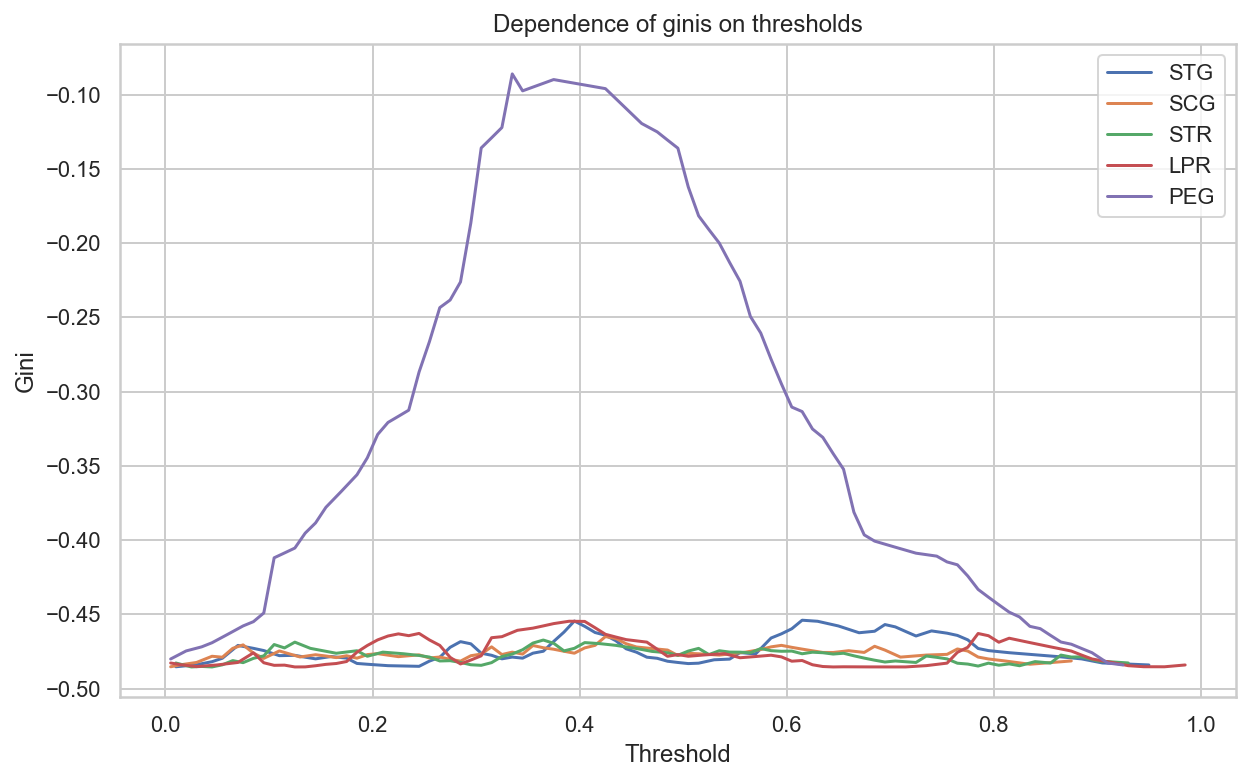

In [17]:
plt.figure(figsize=(10, 6))
for column in X.columns.to_list():
    threshold = find_best_split(df[column], y)[0]
    gini = find_best_split(df[column], y)[1]
    plt.plot(threshold, gini)
plt.legend(X.columns.to_list())
plt.xlabel('Threshold')
plt.ylabel('Gini')
plt.title('Dependence of ginis on thresholds')
plt.show()

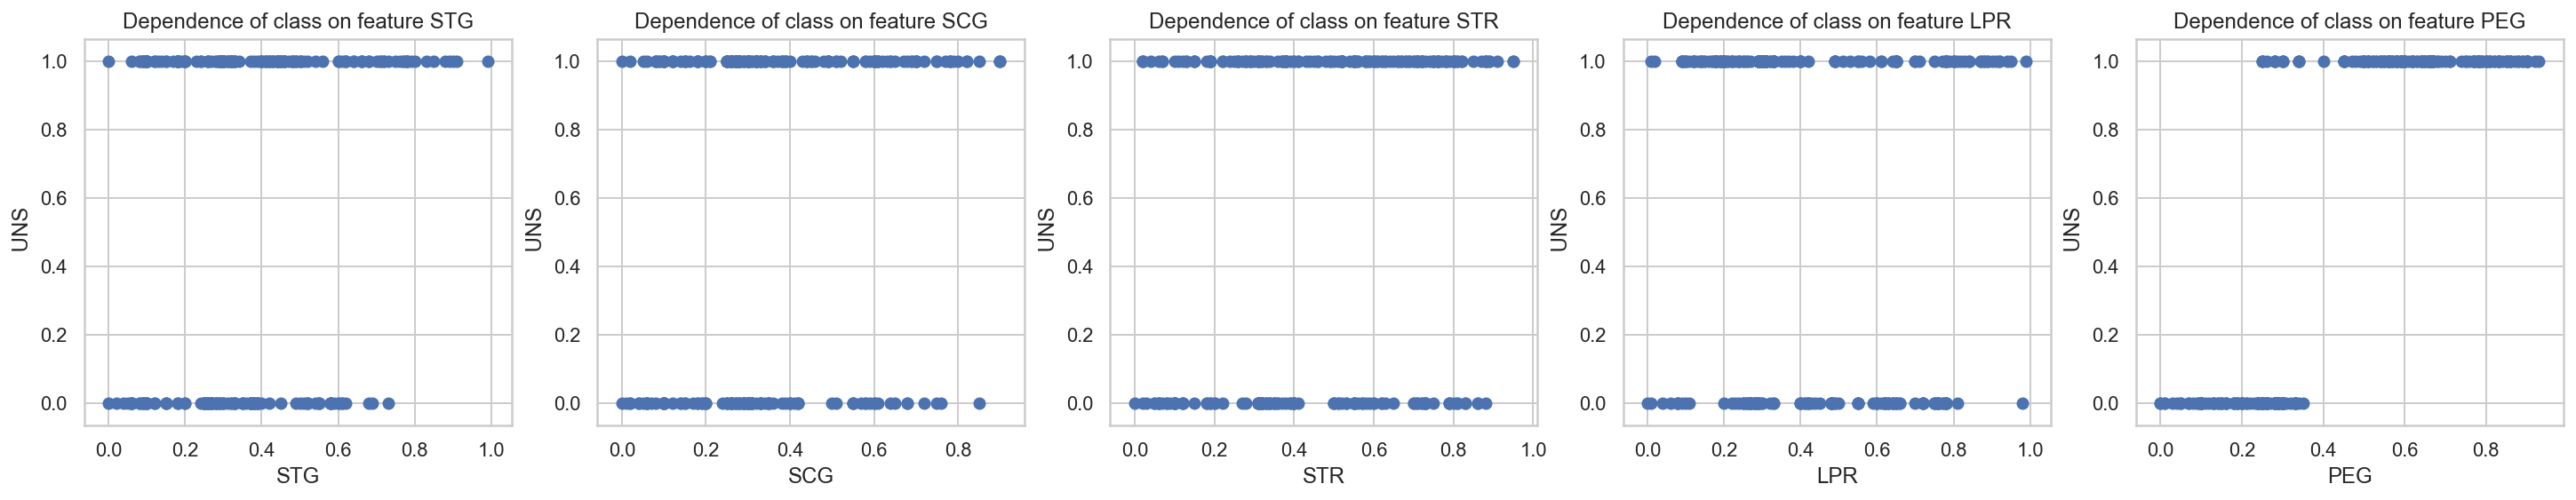

In [19]:
plt.figure(figsize=(25, 4))
for i, column in enumerate(X.columns.to_list()):
    plt.subplot2grid((1, 5), (0, i))
    plt.scatter(X[column], y)
    plt.xlabel(column)
    plt.ylabel(' UNS')
    plt.title('Dependence of class on feature ' + str(column))

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** нужно производить деление по признаку PEG, так как gini по этому признаку принимает гораздо большие значения. Результат согласуется с scatter-графиком, можно заметить, что значения признака более четко разделены: до некоторого значения признака (порога) большинство ответов 0, а после -  1, что нельзя сказать о других. При "хороших" признаках кривая Джини достигает значение 0 или близкое к нему, это значит, что при разделении в обоих подмножествах частоты доминирующего класса около 1. При "плохих" признаках кривая Джини функция принимает значения близкие к -1. 

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [20]:
mushrooms = pd.read_csv('agaricus-lepiota.data', header = None)

In [21]:
mushrooms.iloc[:, 0] = mushrooms.iloc[:, 0].replace({'e': 0, 'p': 1})

In [22]:
X_mushrooms = mushrooms.iloc[:,1:]
y_mushrooms = mushrooms.iloc[:, 0]

In [23]:
from sklearn.preprocessing import LabelEncoder
X_mushrooms = X_mushrooms.apply(LabelEncoder().fit_transform)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_mushrooms, y_mushrooms, test_size=0.5, random_state=42)

In [25]:
from sklearn.metrics import accuracy_score
tree = DecisionTree(['categorical'] * X_train.shape[1])
tree.fit(np.array(X_train), np.array(y_train))
print('Accuracy score:',  accuracy_score(y_test, tree.predict(np.array(X_test))))

Accuracy score: 1.0


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [31]:
from sklearn.model_selection import KFold, cross_val_score
cv = KFold(shuffle=True, random_state=220)


In [32]:
tic_tac = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data', header=None)
tic_tac.iloc[:, -1] = tic_tac.iloc[:, -1].replace({'negative': 0, 'positive': 1})
X_tic_tac = tic_tac.iloc[:, :-1]
y_tic_tac = tic_tac.iloc[:, -1]
X_tic_tac = X_tic_tac.apply(LabelEncoder().fit_transform)


In [33]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(DecisionTree(['categorical'] * X_tic_tac.shape[1]),
                  param_grid={
                      'max_depth': [ 2, 4, 8, 10, 20, 50],
                      'min_samples_leaf': [1, 4, 8, 20],
                      'min_samples_split': [2, 6, 20, 22]
                  },
                  cv=cv,
                  scoring=make_scorer(acc))
gs.fit(np.array(X_tic_tac), np.array(y_tic_tac))

GridSearchCV(cv=KFold(n_splits=3, random_state=220, shuffle=True),
             error_score='raise-deprecating',
             estimator=<hw5code.DecisionTree object at 0x7f2da6ddae10>,
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 4, 8, 10, 20, 50],
                         'min_samples_leaf': [1, 4, 8, 20],
                         'min_samples_split': [2, 6, 20, 22]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(accuracy_score), verbose=0)

In [34]:
gs_df = pd.DataFrame(gs.cv_results_['params'])
gs_df['accuracy'] = gs.cv_results_['mean_test_score']

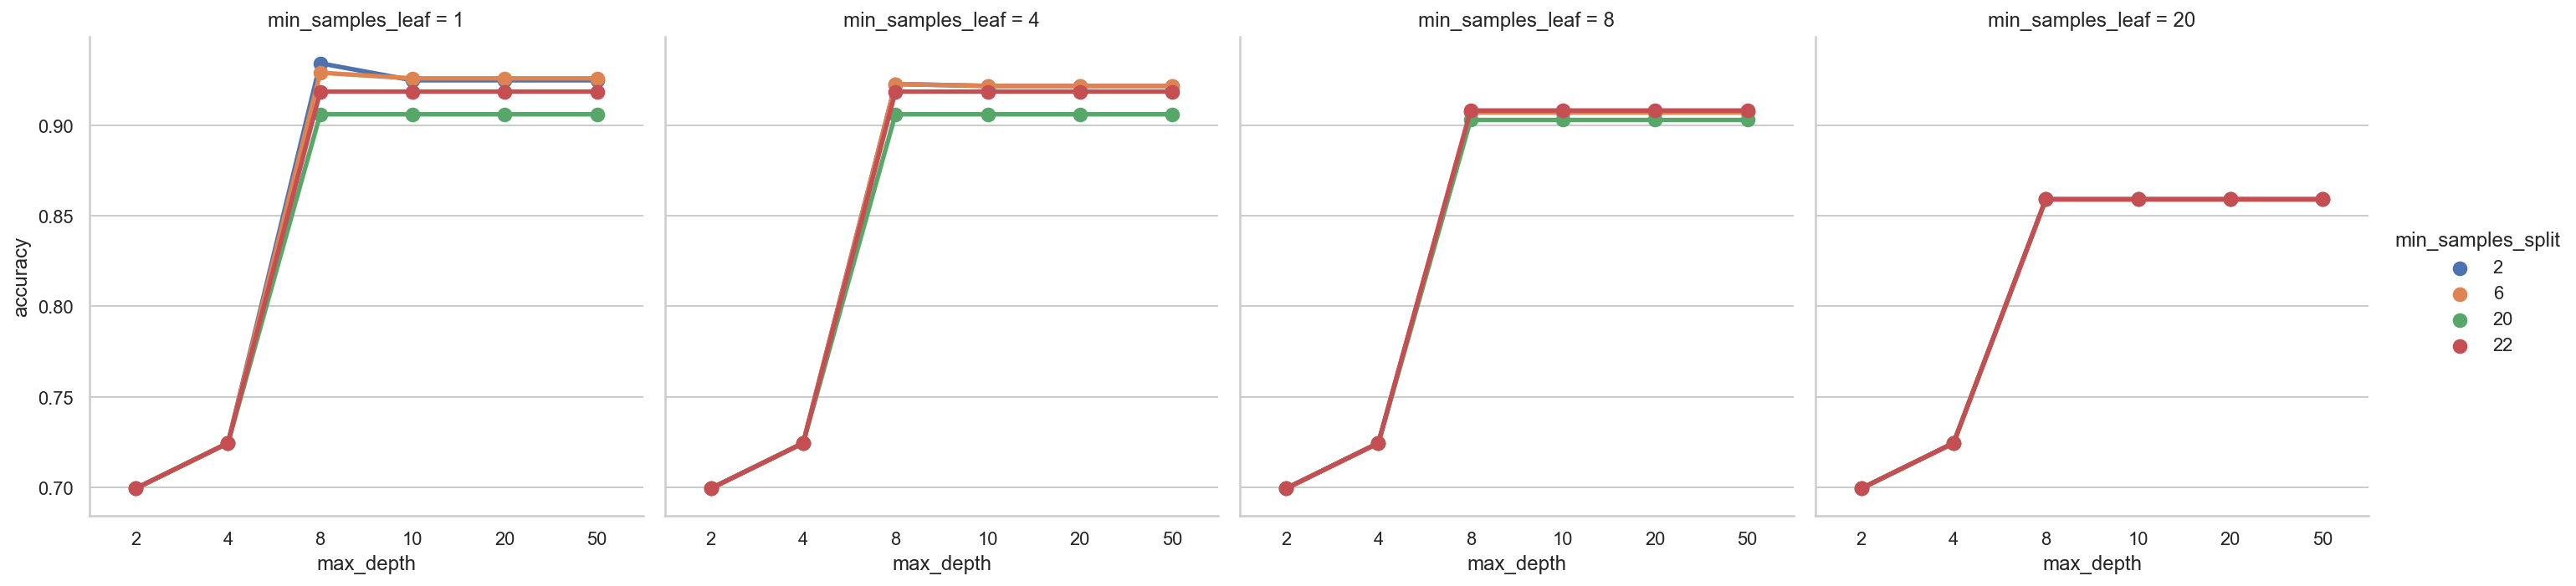

In [36]:
%config InlineBackend.figure_format = 'retina'
sns.catplot(x='max_depth', y='accuracy', data=gs_df,
            col='min_samples_leaf', hue='min_samples_split',
            kind='point')

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [37]:
tic_tac = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data', header=None)
cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', header=None)
nursery = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data', header=None)

In [38]:
tic_tac.iloc[:, -1] = tic_tac.iloc[:, -1].replace({'negative': 0, 'positive': 1})
cars.iloc[:, -1] = cars.iloc[:, -1].replace({'unacc':0, 'acc': 0, 'good':1, 'vgood': 1})
nursery.iloc[:, -1] = nursery.iloc[:, -1].replace({'not_recom':0, 'recommend': 0, 'very_recom':1, 'priority': 1, 'spec_prior': 1})

In [39]:
X_tic_tac = tic_tac.iloc[:, :-1]
y_tic_tac = tic_tac.iloc[:, -1]
X_cars = cars.iloc[:, :-1]
y_cars = cars.iloc[:, -1]
X_nursery = nursery.iloc[:, :-1]
y_nursery = nursery.iloc[:, -1]

In [40]:
X_tic_tac = X_tic_tac.apply(LabelEncoder().fit_transform)
X_cars = X_cars.apply(LabelEncoder().fit_transform)
X_nursery = X_nursery.apply(LabelEncoder().fit_transform)

* DecisionTree, считающий все признаки вещественными

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
def acc_score_real(X, y):
    model = DecisionTree(X.shape[1] * ['real'])
    acc_score_real = cross_val_score(model, np.array(X), np.array(y), scoring=make_scorer(accuracy_score), cv=10).mean()
    return acc_score_real
acc_real = np.array([acc_score_real(X_mushrooms, y_mushrooms),
                    acc_score_real(X_tic_tac, y_tic_tac),
                    acc_score_real(X_cars, y_cars),
                    acc_score_real(X_nursery, y_nursery)
                    ])

In [43]:
acc_real

array([0.99926108, 0.47069079, 0.93973988, 0.99969136])

* DecisionTree, считающий все признаки категориальными

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
def acc_score_cat(X, y):
    model = DecisionTree(X.shape[1] * ['categorical'])
    acc_score_cat = cross_val_score(model, np.array(X), np.array(y), scoring=make_scorer(accuracy_score), cv=10).mean()
    return acc_score_cat
acc_cat = np.array([acc_score_cat(X_mushrooms, y_mushrooms),
                    acc_score_cat(X_tic_tac, y_tic_tac),
                    acc_score_cat(X_cars, y_cars),
                    acc_score_cat(X_nursery, y_nursery)
                    ])

In [45]:
acc_score_cat(X_nursery, y_nursery)

0.9998456790123458

* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков

In [46]:
from sklearn.preprocessing import OneHotEncoder
def acc_score_ohe(X, y):
    X = OneHotEncoder(sparse=False).fit_transform(X)
    model = DecisionTree(X.shape[1] * ['real'])
    acc_score_ohe = cross_val_score(model, X, np.array(y), scoring=make_scorer(accuracy_score), cv=10).mean()
    return acc_score_ohe
acc_ohe = np.array([acc_score_ohe(X_mushrooms, y_mushrooms),
                    acc_score_ohe(X_tic_tac, y_tic_tac),
                    acc_score_ohe(X_cars, y_cars),
                    acc_score_ohe(X_nursery, y_nursery)
                    ])

In [47]:
acc_ohe

array([0.99963054, 0.54357456, 0.91949523, 0.99953704])

* DecisionTreeClassifier из sklearn. 

In [48]:
def acc_score_skl(X, y):
    acc_score_skl = cross_val_score(DecisionTreeClassifier(), X, y, scoring=make_scorer(accuracy_score), cv=10).mean()
    return acc_score_skl
acc_skl = np.array([acc_score_skl(X_mushrooms, y_mushrooms),
                    acc_score_skl(X_tic_tac, y_tic_tac),
                    acc_score_skl(X_cars, y_cars),
                    acc_score_skl(X_nursery, y_nursery)
                    ])
acc_skl

array([0.96259307, 0.76768719, 0.94097167, 0.99969148])

* DecisionTreeClassifier из sklearn + ohe

In [50]:
from sklearn.preprocessing import OneHotEncoder
def acc_score_skl_ohe(X, y):
    X = OneHotEncoder(sparse=False).fit_transform(X)
    model = DecisionTree(X.shape[1] * ['real'])
    acc_score_skl_ohe = cross_val_score(DecisionTreeClassifier(), X, y, scoring=make_scorer(accuracy_score), cv=10).mean()
    return acc_score_skl_ohe
acc_skl_ohe = np.array([acc_score_skl_ohe(X_mushrooms, y_mushrooms),
                    acc_score_skl_ohe(X_tic_tac, y_tic_tac),
                    acc_score_skl_ohe(X_cars, y_cars),
                    acc_score_skl_ohe(X_nursery, y_nursery)
                    ])

In [51]:
acc_skl_ohe

array([0.96826568, 0.81764514, 0.82576851, 0.99969148])

In [52]:
index = ['mushrooms', 'tik-tac-toe', 'cars', 'nursery']
pd.options.display.float_format = '{:,.2f}'.format
results = pd.DataFrame({'Real': acc_real, 'Categorical' : acc_cat, 'Real + ohe' : acc_ohe, 'Skl Classifier': acc_skl,'Skl Classifier + ohe': acc_skl_ohe  }, index = index)
results

,Real,Categorical,Real + ohe,Skl Classifier,Skl Classifier + ohe
mushrooms,1.00,1.00,1.00,0.96,0.97
tik-tac-toe,0.47,0.54,0.54,0.77,0.82
cars,0.94,0.97,0.92,0.94,0.83
nursery,1.00,1.00,1.00,1.00,1.00


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

In [351]:
cars

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,0
1,vhigh,vhigh,2,2,small,med,0
2,vhigh,vhigh,2,2,small,high,0
3,vhigh,vhigh,2,2,med,low,0
4,vhigh,vhigh,2,2,med,med,0
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,1
1724,low,low,5more,more,med,high,1
1725,low,low,5more,more,big,low,0
1726,low,low,5more,more,big,med,1


**Ответ:** Абсолютно на всех наборах данных DecisionTree, считающий все признаки категориальными, давал лучший результат чем DecisionTree на веществественных признаках. Заметим, что на tic-tac-toe очень низкое accuracy, это показывает, что деревья легко переобучаются, не могут понимать логику (обобщать) и применять ее на новых данных, например, логику игры tic-tac-toe. Признаки в этом наборе данных категориальные (по смыслу), поэтому sklearn Classifier и OHE хорошо поднимают качество. Тогда как в cars признаки имееют смысл порядковых и ohe только портит качество.




В датафрейме nursery сразу брасались в глаза 2 последних столбца, очень схожие и явно скоррелированы, так что этот признак хорошо разбивается на подмножества и вкладывается в высокое значение accuracy.

В результатах присутствует случайность. Запуская несколько раз sklearn DecisionTreeClassifier на одних и тех же данных, получала не всегда схожие значения. Можно контролировать переобучение, меняя параметры max_depth, min_samples_leaf, min_samples_split.

In [55]:
cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', header=None)
cars

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [60]:
nursery = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data', header=None)
nursery.iloc[:, -2:].head(40)

,7,8
0,recommended,recommend
1,priority,priority
2,not_recom,not_recom
3,recommended,recommend
4,priority,priority
5,not_recom,not_recom
6,recommended,priority
7,priority,priority
8,not_recom,not_recom
9,recommended,very_recom


Вставьте что угодно, описывающее ваши впечатления от этого задания:

хочу соц бонус